In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.68


In [3]:
import torch
from gcpds_cv_pykit.segmentation.datasets import SeedGermination
from gcpds_cv_pykit.segmentation.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.segmentation.visuals import random_sample_visualization
from gcpds_cv_pykit.segmentation.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.segmentation.baseline.models import UNet
from gcpds_cv_pykit.segmentation.baseline import PerformanceModels

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
SeedGermination('lucasiturriago/seeds/versions/1')

Path to downloaded dataset files: /kaggle/input/seeds
Original dataset folder '/kaggle/input/seeds' is read-only. Using it directly.


'/kaggle/input/seeds'

In [6]:
!mkdir -p /kaggle/working/datasets/seeds/
!cp -r /kaggle/input/seeds/ /kaggle/working/datasets/

In [7]:
config = {"Dir of dataset":"./datasets/seeds","Batch size": 36,"Image size":(256,256),"Epochs":61,
          "Input size":(3,256,256),"Number of classes":3,"Single class train":None,"Single class test":None,
          "Single class valid":None,"Images folder":"images","Data augmentation":True,"Device":"cuda:0",
          "AMixPre":True,"Model":"UNet","Pretrained":True,"Save results":True,"Train phases":True}

In [8]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 2458


Organizing masks: 100%|██████████| 2458/2458 [00:00<00:00, 86824.26it/s]


In [9]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 231


Organizing masks: 100%|██████████| 231/231 [00:00<00:00, 75066.57it/s]


In [10]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 118


Organizing masks: 100%|██████████| 118/118 [00:00<00:00, 77284.18it/s]


Images: torch.Size([36, 3, 256, 256]), Masks: torch.Size([36, 3, 256, 256])


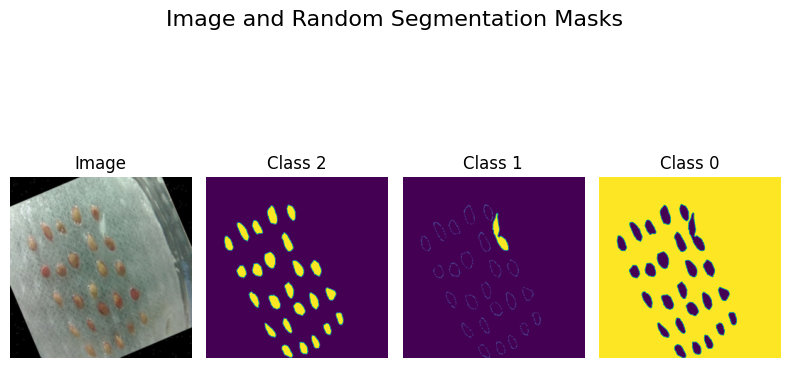

In [11]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

## ResNet34 backbone

### DICE Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "DICE"
config["Backbone"] = "resnet34"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-UNet-ResNet34-DICE"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 222MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_162533-phvcoudo
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-UNet-ResNet34-DICE
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/phvcoudo



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


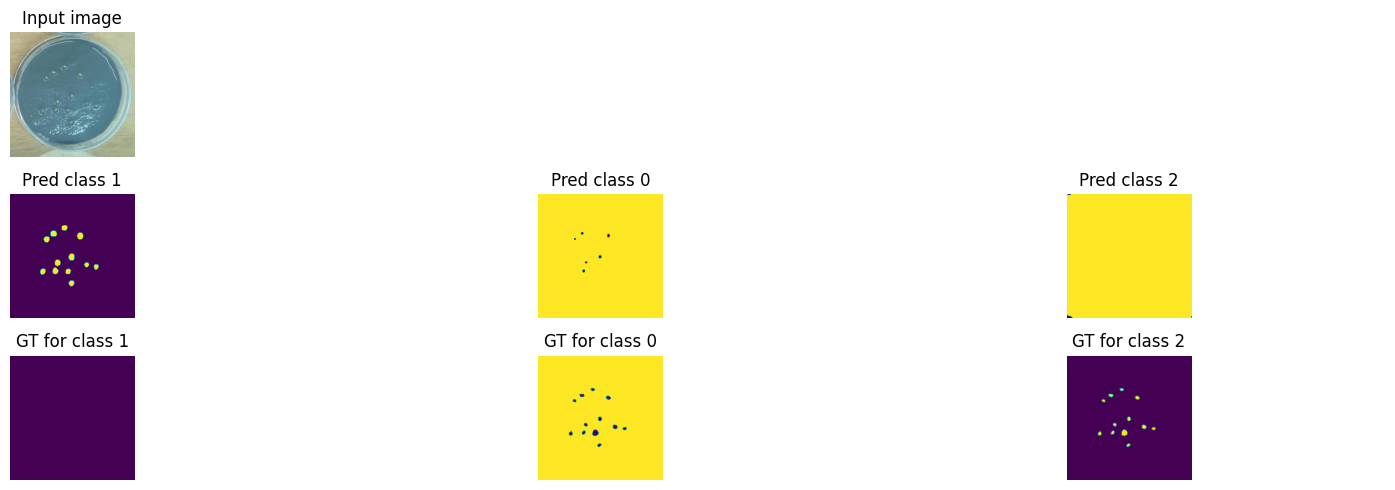

Train loss: 0.69072 | Time: 0m 58s | Val loss: 0.64517
Train_DICE_avg: 0.41672 | Train_Jaccard_avg: 0.35813 | Train_Sensitivity_avg: 0.40491 | Train_Specificity_avg: 0.80935 
Class 0 - Train_DICE: 0.90872 | Train_Jaccard: 0.85158 | Train_Sensitivity: 0.98891 | Train_Specificity: 0.43185 
Class 1 - Train_DICE: 0.06870 | Train_Jaccard: 0.03855 | Train_Sensitivity: 0.03990 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.27274 | Train_Jaccard: 0.18426 | Train_Sensitivity: 0.18593 | Train_Specificity: 0.99838 
Val_DICE_avg: 0.46072 | Val_Jaccard_avg: 0.42167 | Val_Sensitivity_avg: 0.43238 | Val_Specificity_avg: 0.86630 
Class 0 - Val_DICE: 0.98432 | Val_Jaccard: 0.96938 | Val_Sensitivity: 0.99648 | Val_Specificity: 0.60449 
Class 1 - Val_DICE: 0.10161 | Val_Jaccard: 0.06195 | Val_Sensitivity: 0.06620 | Val_Specificity: 0.99814 
Class 2 - Val_DICE: 0.29623 | Val_Jaccard: 0.23368 | Val_Sensitivity: 0.23445 | Val_Specificity: 0.99627 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.64356 | Time: 1m 55s | Val loss: 0.62031
Train_DICE_avg: 0.46437 | Train_Jaccard_avg: 0.42084 | Train_Sensitivity_avg: 0.43921 | Train_Specificity_avg: 0.86470 
Class 0 - Train_DICE: 0.97121 | Train_Jaccard: 0.94510 | Train_Sensitivity: 0.99306 | Train_Specificity: 0.59649 
Class 1 - Train_DICE: 0.09456 | Train_Jaccard: 0.05518 | Train_Sensitivity: 0.05766 | Train_Specificity: 0.99853 
Class 2 - Train_DICE: 0.32734 | Train_Jaccard: 0.26225 | Train_Sensitivity: 0.26691 | Train_Specificity: 0.99907 
Val_DICE_avg: 0.47847 | Val_Jaccard_avg: 0.44581 | Val_Sensitivity_avg: 0.45849 | Val_Specificity_avg: 0.87183 
Class 0 - Val_DICE: 0.98854 | Val_Jaccard: 0.97747 | Val_Sensitivity: 0.99695 | Val_Specificity: 0.62240 
Class 1 - Val_DICE: 0.10760 | Val_Jaccard: 0.06691 | Val_Sensitivity: 0.07287 | Val_Specificity: 0.99819 
Class 2 - Val_DICE: 0.33927 | Val_Jaccard: 0.29306 | Val_Sensitivity: 0.30566 | Val_Specificity: 0.99490 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.62104 | Time: 2m 52s | Val loss: 0.60633
Train_DICE_avg: 0.48265 | Train_Jaccard_avg: 0.43983 | Train_Sensitivity_avg: 0.45553 | Train_Specificity_avg: 0.88187 
Class 0 - Train_DICE: 0.97819 | Train_Jaccard: 0.95774 | Train_Sensitivity: 0.99425 | Train_Specificity: 0.64803 
Class 1 - Train_DICE: 0.11879 | Train_Jaccard: 0.07104 | Train_Sensitivity: 0.07385 | Train_Specificity: 0.99881 
Class 2 - Train_DICE: 0.35095 | Train_Jaccard: 0.29071 | Train_Sensitivity: 0.29850 | Train_Specificity: 0.99877 
Val_DICE_avg: 0.48935 | Val_Jaccard_avg: 0.45554 | Val_Sensitivity_avg: 0.46371 | Val_Specificity_avg: 0.89759 
Class 0 - Val_DICE: 0.99152 | Val_Jaccard: 0.98323 | Val_Sensitivity: 0.99753 | Val_Specificity: 0.69607 
Class 1 - Val_DICE: 0.13297 | Val_Jaccard: 0.08393 | Val_Sensitivity: 0.08768 | Val_Specificity: 0.99885 
Class 2 - Val_DICE: 0.34356 | Val_Jaccard: 0.29947 | Val_Sensitivity: 0.30591 | Val_Specificity: 0.99784 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.60083 | Time: 3m 48s | Val loss: 0.59397
Train_DICE_avg: 0.49771 | Train_Jaccard_avg: 0.45412 | Train_Sensitivity_avg: 0.46784 | Train_Specificity_avg: 0.89589 
Class 0 - Train_DICE: 0.98296 | Train_Jaccard: 0.96668 | Train_Sensitivity: 0.99530 | Train_Specificity: 0.68973 
Class 1 - Train_DICE: 0.14153 | Train_Jaccard: 0.08578 | Train_Sensitivity: 0.08784 | Train_Specificity: 0.99925 
Class 2 - Train_DICE: 0.36862 | Train_Jaccard: 0.30992 | Train_Sensitivity: 0.32038 | Train_Specificity: 0.99867 
Val_DICE_avg: 0.49431 | Val_Jaccard_avg: 0.45947 | Val_Sensitivity_avg: 0.47091 | Val_Specificity_avg: 0.89917 
Class 0 - Val_DICE: 0.99119 | Val_Jaccard: 0.98265 | Val_Sensitivity: 0.99845 | Val_Specificity: 0.70025 
Class 1 - Val_DICE: 0.14256 | Val_Jaccard: 0.09036 | Val_Sensitivity: 0.09248 | Val_Specificity: 0.99937 
Class 2 - Val_DICE: 0.34917 | Val_Jaccard: 0.30539 | Val_Sensitivity: 0.32181 | Val_Specificity: 0.99788 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.58090 | Time: 4m 45s | Val loss: 0.57727
Train_DICE_avg: 0.51438 | Train_Jaccard_avg: 0.46887 | Train_Sensitivity_avg: 0.48242 | Train_Specificity_avg: 0.90573 
Class 0 - Train_DICE: 0.98490 | Train_Jaccard: 0.97040 | Train_Sensitivity: 0.99520 | Train_Specificity: 0.71928 
Class 1 - Train_DICE: 0.15662 | Train_Jaccard: 0.09604 | Train_Sensitivity: 0.09835 | Train_Specificity: 0.99930 
Class 2 - Train_DICE: 0.40161 | Train_Jaccard: 0.34016 | Train_Sensitivity: 0.35369 | Train_Specificity: 0.99861 
Val_DICE_avg: 0.51033 | Val_Jaccard_avg: 0.47065 | Val_Sensitivity_avg: 0.47846 | Val_Specificity_avg: 0.89389 
Class 0 - Val_DICE: 0.99035 | Val_Jaccard: 0.98098 | Val_Sensitivity: 0.99861 | Val_Specificity: 0.68613 
Class 1 - Val_DICE: 0.15766 | Val_Jaccard: 0.10118 | Val_Sensitivity: 0.10390 | Val_Specificity: 0.99931 
Class 2 - Val_DICE: 0.38298 | Val_Jaccard: 0.32979 | Val_Sensitivity: 0.33285 | Val_Specificity: 0.99623 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


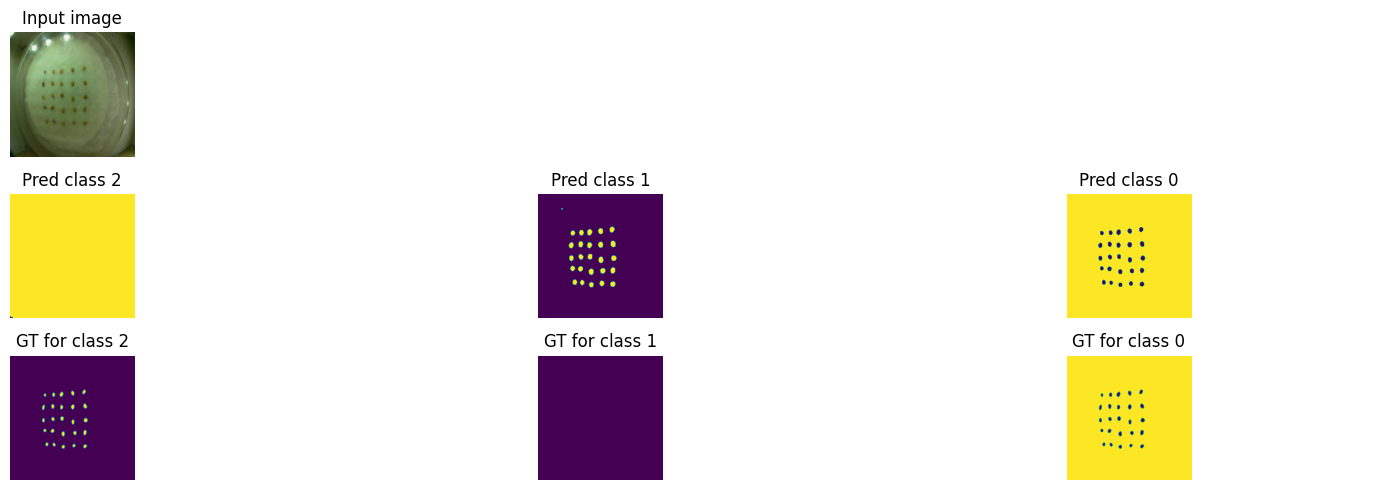

Train loss: 0.56127 | Time: 5m 43s | Val loss: 0.55270
Train_DICE_avg: 0.52387 | Train_Jaccard_avg: 0.47859 | Train_Sensitivity_avg: 0.49188 | Train_Specificity_avg: 0.91474 
Class 0 - Train_DICE: 0.98675 | Train_Jaccard: 0.97394 | Train_Sensitivity: 0.99469 | Train_Specificity: 0.74657 
Class 1 - Train_DICE: 0.16392 | Train_Jaccard: 0.10153 | Train_Sensitivity: 0.10428 | Train_Specificity: 0.99923 
Class 2 - Train_DICE: 0.42096 | Train_Jaccard: 0.36031 | Train_Sensitivity: 0.37667 | Train_Specificity: 0.99843 
Val_DICE_avg: 0.52627 | Val_Jaccard_avg: 0.48706 | Val_Sensitivity_avg: 0.49854 | Val_Specificity_avg: 0.90660 
Class 0 - Val_DICE: 0.99271 | Val_Jaccard: 0.98559 | Val_Sensitivity: 0.99848 | Val_Specificity: 0.72279 
Class 1 - Val_DICE: 0.16796 | Val_Jaccard: 0.10918 | Val_Sensitivity: 0.11431 | Val_Specificity: 0.99896 
Class 2 - Val_DICE: 0.41815 | Val_Jaccard: 0.36641 | Val_Sensitivity: 0.38285 | Val_Specificity: 0.99805 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.54379 | Time: 6m 40s | Val loss: 0.53341
Train_DICE_avg: 0.53569 | Train_Jaccard_avg: 0.48978 | Train_Sensitivity_avg: 0.50365 | Train_Specificity_avg: 0.92195 
Class 0 - Train_DICE: 0.98805 | Train_Jaccard: 0.97646 | Train_Sensitivity: 0.99406 | Train_Specificity: 0.76837 
Class 1 - Train_DICE: 0.17603 | Train_Jaccard: 0.11056 | Train_Sensitivity: 0.11492 | Train_Specificity: 0.99912 
Class 2 - Train_DICE: 0.44301 | Train_Jaccard: 0.38233 | Train_Sensitivity: 0.40195 | Train_Specificity: 0.99838 
Val_DICE_avg: 0.54362 | Val_Jaccard_avg: 0.50325 | Val_Sensitivity_avg: 0.52061 | Val_Specificity_avg: 0.90812 
Class 0 - Val_DICE: 0.99249 | Val_Jaccard: 0.98518 | Val_Sensitivity: 0.99847 | Val_Specificity: 0.72754 
Class 1 - Val_DICE: 0.19979 | Val_Jaccard: 0.13503 | Val_Sensitivity: 0.14296 | Val_Specificity: 0.99886 
Class 2 - Val_DICE: 0.43857 | Val_Jaccard: 0.38953 | Val_Sensitivity: 0.42039 | Val_Specificity: 0.99795 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.52768 | Time: 7m 37s | Val loss: 0.52498
Train_DICE_avg: 0.55071 | Train_Jaccard_avg: 0.50301 | Train_Sensitivity_avg: 0.51974 | Train_Specificity_avg: 0.92560 
Class 0 - Train_DICE: 0.98831 | Train_Jaccard: 0.97698 | Train_Sensitivity: 0.99305 | Train_Specificity: 0.77978 
Class 1 - Train_DICE: 0.21027 | Train_Jaccard: 0.14009 | Train_Sensitivity: 0.15262 | Train_Specificity: 0.99879 
Class 2 - Train_DICE: 0.45356 | Train_Jaccard: 0.39197 | Train_Sensitivity: 0.41356 | Train_Specificity: 0.99824 
Val_DICE_avg: 0.54138 | Val_Jaccard_avg: 0.50232 | Val_Sensitivity_avg: 0.51550 | Val_Specificity_avg: 0.91245 
Class 0 - Val_DICE: 0.99363 | Val_Jaccard: 0.98737 | Val_Sensitivity: 0.99789 | Val_Specificity: 0.74009 
Class 1 - Val_DICE: 0.18932 | Val_Jaccard: 0.12645 | Val_Sensitivity: 0.13412 | Val_Specificity: 0.99881 
Class 2 - Val_DICE: 0.44118 | Val_Jaccard: 0.39313 | Val_Sensitivity: 0.41449 | Val_Specificity: 0.99844 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.50986 | Time: 8m 34s | Val loss: 0.51099
Train_DICE_avg: 0.56639 | Train_Jaccard_avg: 0.51762 | Train_Sensitivity_avg: 0.53653 | Train_Specificity_avg: 0.93178 
Class 0 - Train_DICE: 0.98910 | Train_Jaccard: 0.97852 | Train_Sensitivity: 0.99226 | Train_Specificity: 0.79861 
Class 1 - Train_DICE: 0.23716 | Train_Jaccard: 0.16459 | Train_Sensitivity: 0.18295 | Train_Specificity: 0.99860 
Class 2 - Train_DICE: 0.47290 | Train_Jaccard: 0.40974 | Train_Sensitivity: 0.43437 | Train_Specificity: 0.99813 
Val_DICE_avg: 0.56047 | Val_Jaccard_avg: 0.52062 | Val_Sensitivity_avg: 0.53605 | Val_Specificity_avg: 0.93353 
Class 0 - Val_DICE: 0.99478 | Val_Jaccard: 0.98964 | Val_Sensitivity: 0.99754 | Val_Specificity: 0.80368 
Class 1 - Val_DICE: 0.22531 | Val_Jaccard: 0.16249 | Val_Sensitivity: 0.17828 | Val_Specificity: 0.99859 
Class 2 - Val_DICE: 0.46133 | Val_Jaccard: 0.40974 | Val_Sensitivity: 0.43232 | Val_Specificity: 0.99832 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.49323 | Time: 9m 32s | Val loss: 0.50440
Train_DICE_avg: 0.59213 | Train_Jaccard_avg: 0.53910 | Train_Sensitivity_avg: 0.55969 | Train_Specificity_avg: 0.93745 
Class 0 - Train_DICE: 0.98960 | Train_Jaccard: 0.97948 | Train_Sensitivity: 0.99139 | Train_Specificity: 0.81637 
Class 1 - Train_DICE: 0.26129 | Train_Jaccard: 0.18580 | Train_Sensitivity: 0.20885 | Train_Specificity: 0.99847 
Class 2 - Train_DICE: 0.52550 | Train_Jaccard: 0.45200 | Train_Sensitivity: 0.47885 | Train_Specificity: 0.99750 
Val_DICE_avg: 0.57444 | Val_Jaccard_avg: 0.53146 | Val_Sensitivity_avg: 0.55081 | Val_Specificity_avg: 0.91592 
Class 0 - Val_DICE: 0.99404 | Val_Jaccard: 0.98818 | Val_Sensitivity: 0.99780 | Val_Specificity: 0.75118 
Class 1 - Val_DICE: 0.24351 | Val_Jaccard: 0.18066 | Val_Sensitivity: 0.21700 | Val_Specificity: 0.99787 
Class 2 - Val_DICE: 0.48578 | Val_Jaccard: 0.42555 | Val_Sensitivity: 0.43763 | Val_Specificity: 0.99871 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


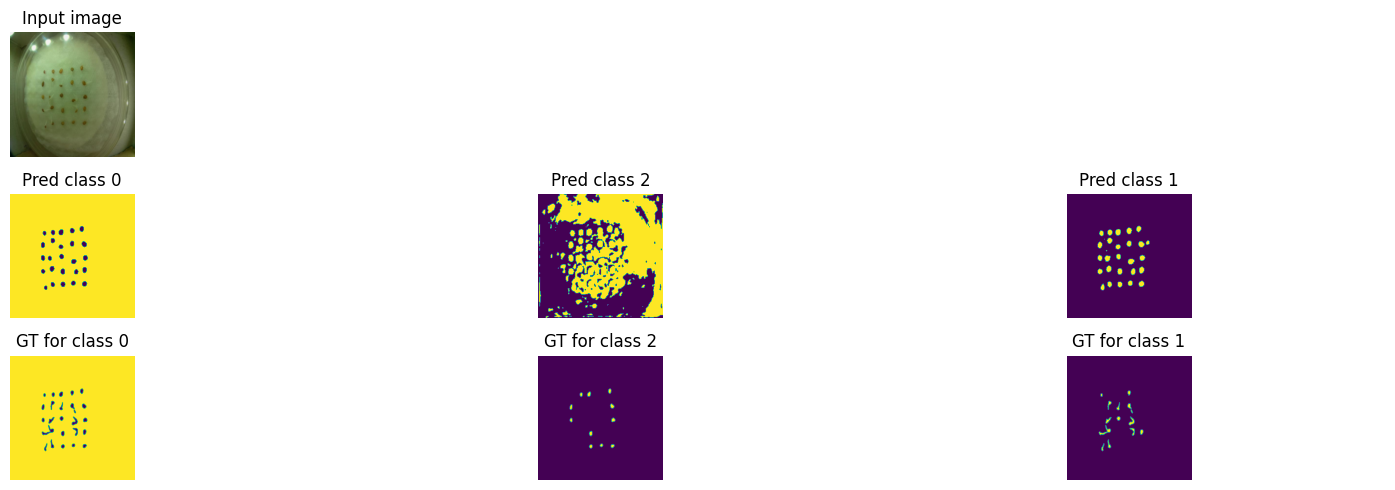

Train loss: 0.47444 | Time: 10m 32s | Val loss: 0.48228
Train_DICE_avg: 0.62369 | Train_Jaccard_avg: 0.56627 | Train_Sensitivity_avg: 0.58795 | Train_Specificity_avg: 0.94044 
Class 0 - Train_DICE: 0.98988 | Train_Jaccard: 0.98005 | Train_Sensitivity: 0.99084 | Train_Specificity: 0.82494 
Class 1 - Train_DICE: 0.28377 | Train_Jaccard: 0.20721 | Train_Sensitivity: 0.23320 | Train_Specificity: 0.99839 
Class 2 - Train_DICE: 0.59742 | Train_Jaccard: 0.51154 | Train_Sensitivity: 0.53981 | Train_Specificity: 0.99797 
Val_DICE_avg: 0.61509 | Val_Jaccard_avg: 0.56472 | Val_Sensitivity_avg: 0.58110 | Val_Specificity_avg: 0.91105 
Class 0 - Val_DICE: 0.99382 | Val_Jaccard: 0.98774 | Val_Sensitivity: 0.99798 | Val_Specificity: 0.73844 
Class 1 - Val_DICE: 0.24258 | Val_Jaccard: 0.17797 | Val_Sensitivity: 0.19455 | Val_Specificity: 0.99867 
Class 2 - Val_DICE: 0.60887 | Val_Jaccard: 0.52844 | Val_Sensitivity: 0.55078 | Val_Specificity: 0.99606 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.45338 | Time: 11m 33s | Val loss: 0.46304
Train_DICE_avg: 0.64747 | Train_Jaccard_avg: 0.58785 | Train_Sensitivity_avg: 0.61164 | Train_Specificity_avg: 0.94697 
Class 0 - Train_DICE: 0.99057 | Train_Jaccard: 0.98138 | Train_Sensitivity: 0.99049 | Train_Specificity: 0.84487 
Class 1 - Train_DICE: 0.30336 | Train_Jaccard: 0.22465 | Train_Sensitivity: 0.25523 | Train_Specificity: 0.99830 
Class 2 - Train_DICE: 0.64848 | Train_Jaccard: 0.55752 | Train_Sensitivity: 0.58921 | Train_Specificity: 0.99775 
Val_DICE_avg: 0.63311 | Val_Jaccard_avg: 0.58161 | Val_Sensitivity_avg: 0.60074 | Val_Specificity_avg: 0.92267 
Class 0 - Val_DICE: 0.99471 | Val_Jaccard: 0.98949 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.77225 
Class 1 - Val_DICE: 0.25890 | Val_Jaccard: 0.19405 | Val_Sensitivity: 0.21931 | Val_Specificity: 0.99844 
Class 2 - Val_DICE: 0.64573 | Val_Jaccard: 0.56129 | Val_Sensitivity: 0.58533 | Val_Specificity: 0.99732 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.43785 | Time: 12m 33s | Val loss: 0.44477
Train_DICE_avg: 0.66026 | Train_Jaccard_avg: 0.60027 | Train_Sensitivity_avg: 0.62692 | Train_Specificity_avg: 0.95044 
Class 0 - Train_DICE: 0.99045 | Train_Jaccard: 0.98116 | Train_Sensitivity: 0.98896 | Train_Specificity: 0.85542 
Class 1 - Train_DICE: 0.31503 | Train_Jaccard: 0.23637 | Train_Sensitivity: 0.27396 | Train_Specificity: 0.99819 
Class 2 - Train_DICE: 0.67529 | Train_Jaccard: 0.58326 | Train_Sensitivity: 0.61784 | Train_Specificity: 0.99770 
Val_DICE_avg: 0.65864 | Val_Jaccard_avg: 0.60720 | Val_Sensitivity_avg: 0.63362 | Val_Specificity_avg: 0.94429 
Class 0 - Val_DICE: 0.99567 | Val_Jaccard: 0.99140 | Val_Sensitivity: 0.99599 | Val_Specificity: 0.83803 
Class 1 - Val_DICE: 0.29251 | Val_Jaccard: 0.22439 | Val_Sensitivity: 0.25813 | Val_Specificity: 0.99805 
Class 2 - Val_DICE: 0.68775 | Val_Jaccard: 0.60580 | Val_Sensitivity: 0.64675 | Val_Specificity: 0.99678 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.42149 | Time: 13m 33s | Val loss: 0.42849
Train_DICE_avg: 0.67590 | Train_Jaccard_avg: 0.61548 | Train_Sensitivity_avg: 0.64338 | Train_Specificity_avg: 0.95606 
Class 0 - Train_DICE: 0.99052 | Train_Jaccard: 0.98129 | Train_Sensitivity: 0.98804 | Train_Specificity: 0.87255 
Class 1 - Train_DICE: 0.32861 | Train_Jaccard: 0.24819 | Train_Sensitivity: 0.28823 | Train_Specificity: 0.99810 
Class 2 - Train_DICE: 0.70856 | Train_Jaccard: 0.61694 | Train_Sensitivity: 0.65386 | Train_Specificity: 0.99753 
Val_DICE_avg: 0.67014 | Val_Jaccard_avg: 0.61978 | Val_Sensitivity_avg: 0.64396 | Val_Specificity_avg: 0.94257 
Class 0 - Val_DICE: 0.99558 | Val_Jaccard: 0.99122 | Val_Sensitivity: 0.99641 | Val_Specificity: 0.83197 
Class 1 - Val_DICE: 0.30196 | Val_Jaccard: 0.23308 | Val_Sensitivity: 0.27427 | Val_Specificity: 0.99783 
Class 2 - Val_DICE: 0.71287 | Val_Jaccard: 0.63504 | Val_Sensitivity: 0.66119 | Val_Specificity: 0.99792 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.40472 | Time: 14m 34s | Val loss: 0.42504
Train_DICE_avg: 0.68743 | Train_Jaccard_avg: 0.62745 | Train_Sensitivity_avg: 0.65744 | Train_Specificity_avg: 0.95711 
Class 0 - Train_DICE: 0.99073 | Train_Jaccard: 0.98170 | Train_Sensitivity: 0.98809 | Train_Specificity: 0.87587 
Class 1 - Train_DICE: 0.34256 | Train_Jaccard: 0.26151 | Train_Sensitivity: 0.30508 | Train_Specificity: 0.99807 
Class 2 - Train_DICE: 0.72899 | Train_Jaccard: 0.63914 | Train_Sensitivity: 0.67915 | Train_Specificity: 0.99739 
Val_DICE_avg: 0.67134 | Val_Jaccard_avg: 0.62185 | Val_Sensitivity_avg: 0.64785 | Val_Specificity_avg: 0.92885 
Class 0 - Val_DICE: 0.99494 | Val_Jaccard: 0.98995 | Val_Sensitivity: 0.99659 | Val_Specificity: 0.79035 
Class 1 - Val_DICE: 0.29395 | Val_Jaccard: 0.22983 | Val_Sensitivity: 0.27079 | Val_Specificity: 0.99819 
Class 2 - Val_DICE: 0.72513 | Val_Jaccard: 0.64576 | Val_Sensitivity: 0.67617 | Val_Specificity: 0.99803 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


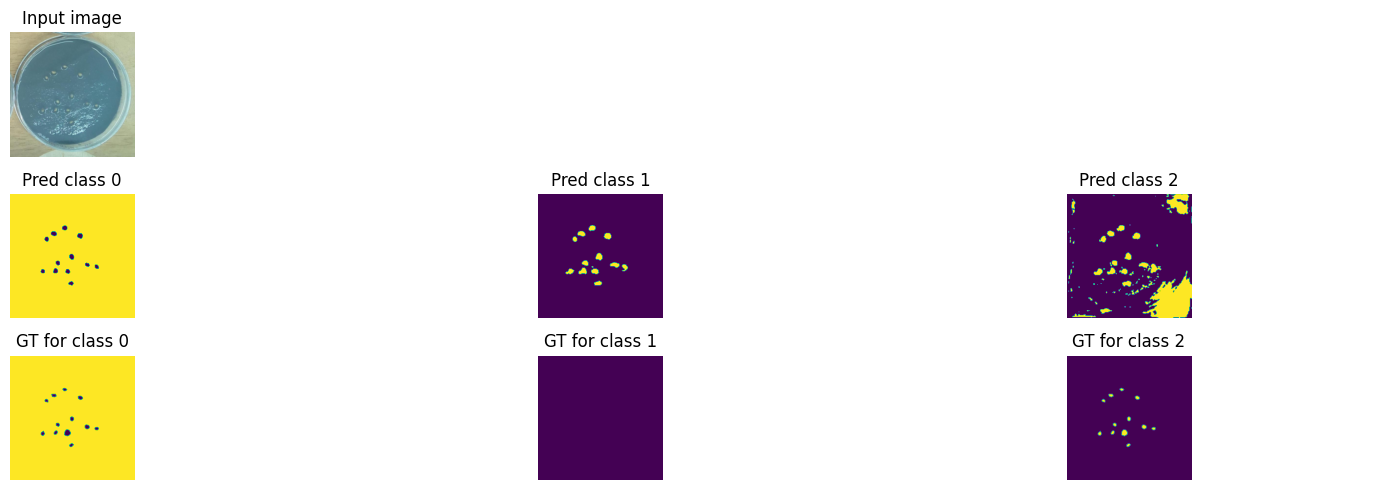

Train loss: 0.39078 | Time: 15m 35s | Val loss: 0.40096
Train_DICE_avg: 0.69492 | Train_Jaccard_avg: 0.63483 | Train_Sensitivity_avg: 0.66789 | Train_Specificity_avg: 0.95851 
Class 0 - Train_DICE: 0.99100 | Train_Jaccard: 0.98222 | Train_Sensitivity: 0.98833 | Train_Specificity: 0.88021 
Class 1 - Train_DICE: 0.34736 | Train_Jaccard: 0.26607 | Train_Sensitivity: 0.31695 | Train_Specificity: 0.99797 
Class 2 - Train_DICE: 0.74641 | Train_Jaccard: 0.65620 | Train_Sensitivity: 0.69840 | Train_Specificity: 0.99736 
Val_DICE_avg: 0.68036 | Val_Jaccard_avg: 0.63122 | Val_Sensitivity_avg: 0.65100 | Val_Specificity_avg: 0.92763 
Class 0 - Val_DICE: 0.99508 | Val_Jaccard: 0.99023 | Val_Sensitivity: 0.99730 | Val_Specificity: 0.78672 
Class 1 - Val_DICE: 0.30926 | Val_Jaccard: 0.24191 | Val_Sensitivity: 0.26305 | Val_Specificity: 0.99864 
Class 2 - Val_DICE: 0.73673 | Val_Jaccard: 0.66152 | Val_Sensitivity: 0.69264 | Val_Specificity: 0.99753 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.37592 | Time: 16m 35s | Val loss: 0.39327
Train_DICE_avg: 0.70668 | Train_Jaccard_avg: 0.64659 | Train_Sensitivity_avg: 0.68150 | Train_Specificity_avg: 0.95958 
Class 0 - Train_DICE: 0.99117 | Train_Jaccard: 0.98255 | Train_Sensitivity: 0.98837 | Train_Specificity: 0.88355 
Class 1 - Train_DICE: 0.35773 | Train_Jaccard: 0.27658 | Train_Sensitivity: 0.33014 | Train_Specificity: 0.99796 
Class 2 - Train_DICE: 0.77114 | Train_Jaccard: 0.68064 | Train_Sensitivity: 0.72599 | Train_Specificity: 0.99722 
Val_DICE_avg: 0.68762 | Val_Jaccard_avg: 0.63917 | Val_Sensitivity_avg: 0.66133 | Val_Specificity_avg: 0.93826 
Class 0 - Val_DICE: 0.99570 | Val_Jaccard: 0.99146 | Val_Sensitivity: 0.99700 | Val_Specificity: 0.81868 
Class 1 - Val_DICE: 0.30783 | Val_Jaccard: 0.23885 | Val_Sensitivity: 0.26299 | Val_Specificity: 0.99851 
Class 2 - Val_DICE: 0.75933 | Val_Jaccard: 0.68720 | Val_Sensitivity: 0.72399 | Val_Specificity: 0.99758 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.36461 | Time: 17m 35s | Val loss: 0.38260
Train_DICE_avg: 0.71066 | Train_Jaccard_avg: 0.65071 | Train_Sensitivity_avg: 0.68809 | Train_Specificity_avg: 0.96120 
Class 0 - Train_DICE: 0.99138 | Train_Jaccard: 0.98298 | Train_Sensitivity: 0.98848 | Train_Specificity: 0.88859 
Class 1 - Train_DICE: 0.35956 | Train_Jaccard: 0.27763 | Train_Sensitivity: 0.33573 | Train_Specificity: 0.99784 
Class 2 - Train_DICE: 0.78104 | Train_Jaccard: 0.69151 | Train_Sensitivity: 0.74006 | Train_Specificity: 0.99716 
Val_DICE_avg: 0.69078 | Val_Jaccard_avg: 0.63997 | Val_Sensitivity_avg: 0.66525 | Val_Specificity_avg: 0.93047 
Class 0 - Val_DICE: 0.99531 | Val_Jaccard: 0.99069 | Val_Sensitivity: 0.99716 | Val_Specificity: 0.79494 
Class 1 - Val_DICE: 0.33585 | Val_Jaccard: 0.26838 | Val_Sensitivity: 0.31230 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.74118 | Val_Jaccard: 0.66083 | Val_Sensitivity: 0.68630 | Val_Specificity: 0.99842 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.35165 | Time: 18m 34s | Val loss: 0.37298
Train_DICE_avg: 0.71977 | Train_Jaccard_avg: 0.65914 | Train_Sensitivity_avg: 0.69863 | Train_Specificity_avg: 0.96183 
Class 0 - Train_DICE: 0.99164 | Train_Jaccard: 0.98349 | Train_Sensitivity: 0.98904 | Train_Specificity: 0.89057 
Class 1 - Train_DICE: 0.37200 | Train_Jaccard: 0.28952 | Train_Sensitivity: 0.34976 | Train_Specificity: 0.99789 
Class 2 - Train_DICE: 0.79567 | Train_Jaccard: 0.70441 | Train_Sensitivity: 0.75709 | Train_Specificity: 0.99703 
Val_DICE_avg: 0.71343 | Val_Jaccard_avg: 0.65956 | Val_Sensitivity_avg: 0.68472 | Val_Specificity_avg: 0.94046 
Class 0 - Val_DICE: 0.99591 | Val_Jaccard: 0.99187 | Val_Sensitivity: 0.99715 | Val_Specificity: 0.82492 
Class 1 - Val_DICE: 0.33936 | Val_Jaccard: 0.26972 | Val_Sensitivity: 0.31307 | Val_Specificity: 0.99820 
Class 2 - Val_DICE: 0.80501 | Val_Jaccard: 0.71710 | Val_Sensitivity: 0.74394 | Val_Specificity: 0.99827 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.34090 | Time: 19m 34s | Val loss: 0.35137
Train_DICE_avg: 0.72535 | Train_Jaccard_avg: 0.66398 | Train_Sensitivity_avg: 0.70448 | Train_Specificity_avg: 0.96230 
Class 0 - Train_DICE: 0.99147 | Train_Jaccard: 0.98314 | Train_Sensitivity: 0.98849 | Train_Specificity: 0.89206 
Class 1 - Train_DICE: 0.37792 | Train_Jaccard: 0.29604 | Train_Sensitivity: 0.35787 | Train_Specificity: 0.99785 
Class 2 - Train_DICE: 0.80665 | Train_Jaccard: 0.71276 | Train_Sensitivity: 0.76709 | Train_Specificity: 0.99697 
Val_DICE_avg: 0.72239 | Val_Jaccard_avg: 0.66877 | Val_Sensitivity_avg: 0.69993 | Val_Specificity_avg: 0.94028 
Class 0 - Val_DICE: 0.99595 | Val_Jaccard: 0.99195 | Val_Sensitivity: 0.99737 | Val_Specificity: 0.82485 
Class 1 - Val_DICE: 0.33701 | Val_Jaccard: 0.26698 | Val_Sensitivity: 0.30183 | Val_Specificity: 0.99849 
Class 2 - Val_DICE: 0.83422 | Val_Jaccard: 0.74739 | Val_Sensitivity: 0.80059 | Val_Specificity: 0.99749 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


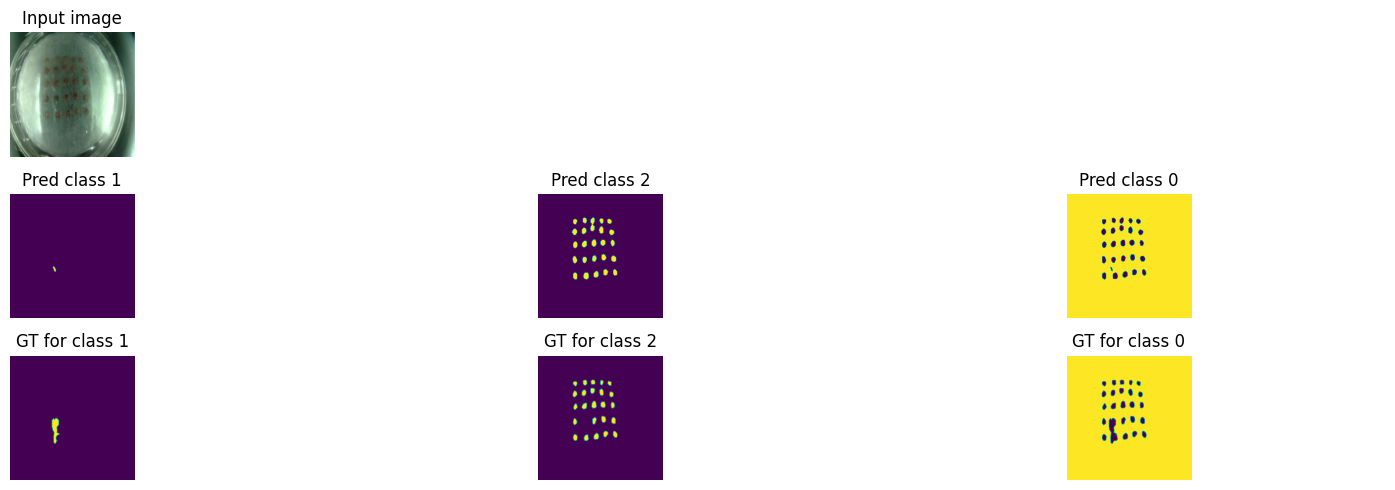

Train loss: 0.32684 | Time: 20m 36s | Val loss: 0.32351
Train_DICE_avg: 0.73313 | Train_Jaccard_avg: 0.67142 | Train_Sensitivity_avg: 0.71507 | Train_Specificity_avg: 0.96581 
Class 0 - Train_DICE: 0.99161 | Train_Jaccard: 0.98342 | Train_Sensitivity: 0.98806 | Train_Specificity: 0.90277 
Class 1 - Train_DICE: 0.38373 | Train_Jaccard: 0.30056 | Train_Sensitivity: 0.36923 | Train_Specificity: 0.99779 
Class 2 - Train_DICE: 0.82405 | Train_Jaccard: 0.73029 | Train_Sensitivity: 0.78793 | Train_Specificity: 0.99687 
Val_DICE_avg: 0.73950 | Val_Jaccard_avg: 0.68611 | Val_Sensitivity_avg: 0.72240 | Val_Specificity_avg: 0.95630 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99291 | Val_Sensitivity: 0.99647 | Val_Specificity: 0.87332 
Class 1 - Val_DICE: 0.35808 | Val_Jaccard: 0.28587 | Val_Sensitivity: 0.34072 | Val_Specificity: 0.99808 
Class 2 - Val_DICE: 0.86400 | Val_Jaccard: 0.77955 | Val_Sensitivity: 0.83001 | Val_Specificity: 0.99749 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.30849 | Time: 21m 36s | Val loss: 0.31082
Train_DICE_avg: 0.74662 | Train_Jaccard_avg: 0.68414 | Train_Sensitivity_avg: 0.73166 | Train_Specificity_avg: 0.96816 
Class 0 - Train_DICE: 0.99145 | Train_Jaccard: 0.98311 | Train_Sensitivity: 0.98767 | Train_Specificity: 0.90989 
Class 1 - Train_DICE: 0.39477 | Train_Jaccard: 0.31153 | Train_Sensitivity: 0.38252 | Train_Specificity: 0.99781 
Class 2 - Train_DICE: 0.85364 | Train_Jaccard: 0.75779 | Train_Sensitivity: 0.82480 | Train_Specificity: 0.99679 
Val_DICE_avg: 0.74791 | Val_Jaccard_avg: 0.69566 | Val_Sensitivity_avg: 0.75637 | Val_Specificity_avg: 0.97231 
Class 0 - Val_DICE: 0.99654 | Val_Jaccard: 0.99312 | Val_Sensitivity: 0.99553 | Val_Specificity: 0.92256 
Class 1 - Val_DICE: 0.37580 | Val_Jaccard: 0.30926 | Val_Sensitivity: 0.37225 | Val_Specificity: 0.99785 
Class 2 - Val_DICE: 0.87140 | Val_Jaccard: 0.78460 | Val_Sensitivity: 0.90133 | Val_Specificity: 0.99651 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.29510 | Time: 22m 37s | Val loss: 0.30879
Train_DICE_avg: 0.75192 | Train_Jaccard_avg: 0.69005 | Train_Sensitivity_avg: 0.73965 | Train_Specificity_avg: 0.96841 
Class 0 - Train_DICE: 0.99157 | Train_Jaccard: 0.98335 | Train_Sensitivity: 0.98795 | Train_Specificity: 0.91073 
Class 1 - Train_DICE: 0.40148 | Train_Jaccard: 0.31794 | Train_Sensitivity: 0.39105 | Train_Specificity: 0.99777 
Class 2 - Train_DICE: 0.86271 | Train_Jaccard: 0.76886 | Train_Sensitivity: 0.83995 | Train_Specificity: 0.99674 
Val_DICE_avg: 0.74135 | Val_Jaccard_avg: 0.68911 | Val_Sensitivity_avg: 0.75417 | Val_Specificity_avg: 0.96148 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99303 | Val_Sensitivity: 0.99610 | Val_Specificity: 0.89020 
Class 1 - Val_DICE: 0.36040 | Val_Jaccard: 0.29399 | Val_Sensitivity: 0.35622 | Val_Specificity: 0.99814 
Class 2 - Val_DICE: 0.86717 | Val_Jaccard: 0.78032 | Val_Sensitivity: 0.91019 | Val_Specificity: 0.99609 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.28823 | Time: 23m 38s | Val loss: 0.29378
Train_DICE_avg: 0.75196 | Train_Jaccard_avg: 0.69027 | Train_Sensitivity_avg: 0.74355 | Train_Specificity_avg: 0.96987 
Class 0 - Train_DICE: 0.99139 | Train_Jaccard: 0.98301 | Train_Sensitivity: 0.98747 | Train_Specificity: 0.91531 
Class 1 - Train_DICE: 0.40050 | Train_Jaccard: 0.31704 | Train_Sensitivity: 0.39527 | Train_Specificity: 0.99774 
Class 2 - Train_DICE: 0.86398 | Train_Jaccard: 0.77075 | Train_Sensitivity: 0.84792 | Train_Specificity: 0.99657 
Val_DICE_avg: 0.74845 | Val_Jaccard_avg: 0.69666 | Val_Sensitivity_avg: 0.74245 | Val_Specificity_avg: 0.95946 
Class 0 - Val_DICE: 0.99650 | Val_Jaccard: 0.99305 | Val_Sensitivity: 0.99666 | Val_Specificity: 0.88324 
Class 1 - Val_DICE: 0.36594 | Val_Jaccard: 0.29546 | Val_Sensitivity: 0.35642 | Val_Specificity: 0.99802 
Class 2 - Val_DICE: 0.88290 | Val_Jaccard: 0.80146 | Val_Sensitivity: 0.87427 | Val_Specificity: 0.99713 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.28086 | Time: 24m 39s | Val loss: 0.28948
Train_DICE_avg: 0.75691 | Train_Jaccard_avg: 0.69603 | Train_Sensitivity_avg: 0.75047 | Train_Specificity_avg: 0.96948 
Class 0 - Train_DICE: 0.99196 | Train_Jaccard: 0.98410 | Train_Sensitivity: 0.98877 | Train_Specificity: 0.91407 
Class 1 - Train_DICE: 0.41129 | Train_Jaccard: 0.32877 | Train_Sensitivity: 0.41142 | Train_Specificity: 0.99776 
Class 2 - Train_DICE: 0.86749 | Train_Jaccard: 0.77523 | Train_Sensitivity: 0.85122 | Train_Specificity: 0.99661 
Val_DICE_avg: 0.75348 | Val_Jaccard_avg: 0.70289 | Val_Sensitivity_avg: 0.74744 | Val_Specificity_avg: 0.95312 
Class 0 - Val_DICE: 0.99615 | Val_Jaccard: 0.99234 | Val_Sensitivity: 0.99687 | Val_Specificity: 0.86382 
Class 1 - Val_DICE: 0.37871 | Val_Jaccard: 0.31091 | Val_Sensitivity: 0.37708 | Val_Specificity: 0.99793 
Class 2 - Val_DICE: 0.88558 | Val_Jaccard: 0.80543 | Val_Sensitivity: 0.86835 | Val_Specificity: 0.99761 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


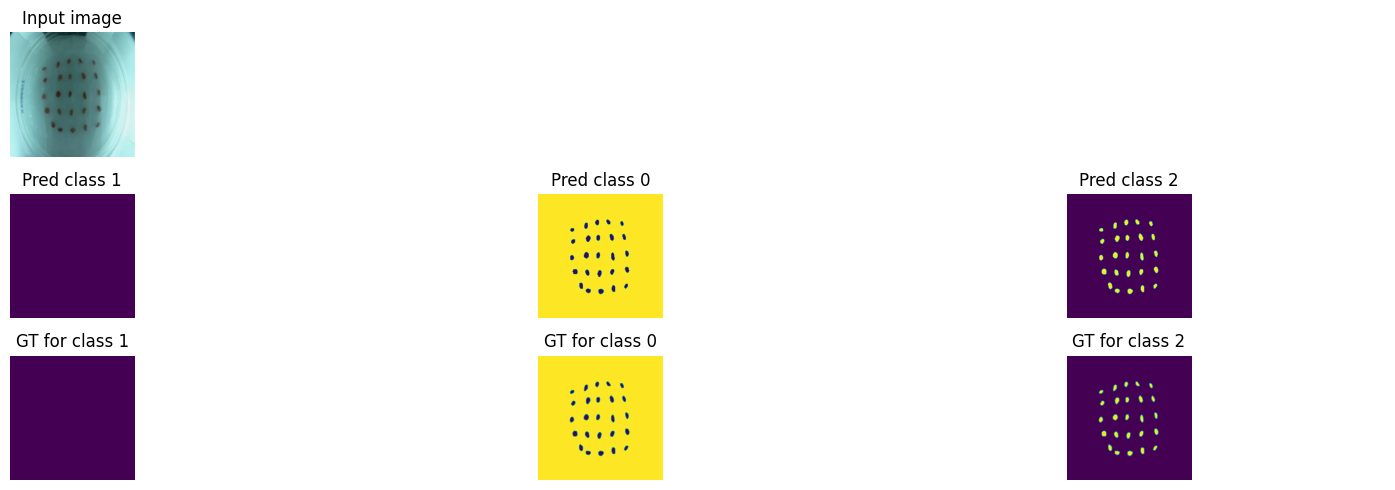

Train loss: 0.27556 | Time: 25m 40s | Val loss: 0.28606
Train_DICE_avg: 0.75890 | Train_Jaccard_avg: 0.69764 | Train_Sensitivity_avg: 0.75221 | Train_Specificity_avg: 0.96873 
Class 0 - Train_DICE: 0.99188 | Train_Jaccard: 0.98396 | Train_Sensitivity: 0.98882 | Train_Specificity: 0.91185 
Class 1 - Train_DICE: 0.41704 | Train_Jaccard: 0.33306 | Train_Sensitivity: 0.41509 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.86777 | Train_Jaccard: 0.77588 | Train_Sensitivity: 0.85272 | Train_Specificity: 0.99660 
Val_DICE_avg: 0.78834 | Val_Jaccard_avg: 0.73773 | Val_Sensitivity_avg: 0.79444 | Val_Specificity_avg: 0.96294 
Class 0 - Val_DICE: 0.99653 | Val_Jaccard: 0.99310 | Val_Sensitivity: 0.99675 | Val_Specificity: 0.89354 
Class 1 - Val_DICE: 0.48303 | Val_Jaccard: 0.41549 | Val_Sensitivity: 0.51874 | Val_Specificity: 0.99771 
Class 2 - Val_DICE: 0.88545 | Val_Jaccard: 0.80460 | Val_Sensitivity: 0.86784 | Val_Specificity: 0.99758 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.27069 | Time: 26m 41s | Val loss: 0.28097
Train_DICE_avg: 0.76232 | Train_Jaccard_avg: 0.70180 | Train_Sensitivity_avg: 0.75904 | Train_Specificity_avg: 0.96791 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98418 | Train_Sensitivity: 0.98910 | Train_Specificity: 0.90949 
Class 1 - Train_DICE: 0.42540 | Train_Jaccard: 0.34254 | Train_Sensitivity: 0.43090 | Train_Specificity: 0.99770 
Class 2 - Train_DICE: 0.86958 | Train_Jaccard: 0.77867 | Train_Sensitivity: 0.85712 | Train_Specificity: 0.99654 
Val_DICE_avg: 0.75166 | Val_Jaccard_avg: 0.70068 | Val_Sensitivity_avg: 0.74097 | Val_Specificity_avg: 0.94942 
Class 0 - Val_DICE: 0.99622 | Val_Jaccard: 0.99249 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.85233 
Class 1 - Val_DICE: 0.37466 | Val_Jaccard: 0.30760 | Val_Sensitivity: 0.36878 | Val_Specificity: 0.99813 
Class 2 - Val_DICE: 0.88410 | Val_Jaccard: 0.80195 | Val_Sensitivity: 0.85653 | Val_Specificity: 0.99780 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.26692 | Time: 27m 42s | Val loss: 0.28169
Train_DICE_avg: 0.76638 | Train_Jaccard_avg: 0.70589 | Train_Sensitivity_avg: 0.76313 | Train_Specificity_avg: 0.96741 
Class 0 - Train_DICE: 0.99235 | Train_Jaccard: 0.98488 | Train_Sensitivity: 0.98993 | Train_Specificity: 0.90798 
Class 1 - Train_DICE: 0.43690 | Train_Jaccard: 0.35369 | Train_Sensitivity: 0.44131 | Train_Specificity: 0.99772 
Class 2 - Train_DICE: 0.86990 | Train_Jaccard: 0.77909 | Train_Sensitivity: 0.85816 | Train_Specificity: 0.99653 
Val_DICE_avg: 0.78263 | Val_Jaccard_avg: 0.73132 | Val_Sensitivity_avg: 0.79049 | Val_Specificity_avg: 0.95646 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99299 | Val_Sensitivity: 0.99695 | Val_Specificity: 0.87438 
Class 1 - Val_DICE: 0.47339 | Val_Jaccard: 0.40508 | Val_Sensitivity: 0.47775 | Val_Specificity: 0.99802 
Class 2 - Val_DICE: 0.87804 | Val_Jaccard: 0.79588 | Val_Sensitivity: 0.89676 | Val_Specificity: 0.99698 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.26531 | Time: 28m 43s | Val loss: 0.27267
Train_DICE_avg: 0.76485 | Train_Jaccard_avg: 0.70389 | Train_Sensitivity_avg: 0.76192 | Train_Specificity_avg: 0.96814 
Class 0 - Train_DICE: 0.99202 | Train_Jaccard: 0.98423 | Train_Sensitivity: 0.98939 | Train_Specificity: 0.91023 
Class 1 - Train_DICE: 0.43356 | Train_Jaccard: 0.35011 | Train_Sensitivity: 0.43760 | Train_Specificity: 0.99771 
Class 2 - Train_DICE: 0.86896 | Train_Jaccard: 0.77735 | Train_Sensitivity: 0.85877 | Train_Specificity: 0.99646 
Val_DICE_avg: 0.77031 | Val_Jaccard_avg: 0.71970 | Val_Sensitivity_avg: 0.76366 | Val_Specificity_avg: 0.95555 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99291 | Val_Sensitivity: 0.99752 | Val_Specificity: 0.87121 
Class 1 - Val_DICE: 0.42542 | Val_Jaccard: 0.35606 | Val_Sensitivity: 0.41233 | Val_Specificity: 0.99836 
Class 2 - Val_DICE: 0.88909 | Val_Jaccard: 0.81013 | Val_Sensitivity: 0.88113 | Val_Specificity: 0.99708 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.26011 | Time: 29m 44s | Val loss: 0.26628
Train_DICE_avg: 0.76834 | Train_Jaccard_avg: 0.70813 | Train_Sensitivity_avg: 0.76597 | Train_Specificity_avg: 0.96734 
Class 0 - Train_DICE: 0.99239 | Train_Jaccard: 0.98496 | Train_Sensitivity: 0.99033 | Train_Specificity: 0.90772 
Class 1 - Train_DICE: 0.43945 | Train_Jaccard: 0.35581 | Train_Sensitivity: 0.44494 | Train_Specificity: 0.99774 
Class 2 - Train_DICE: 0.87318 | Train_Jaccard: 0.78363 | Train_Sensitivity: 0.86265 | Train_Specificity: 0.99655 
Val_DICE_avg: 0.77338 | Val_Jaccard_avg: 0.72366 | Val_Sensitivity_avg: 0.77707 | Val_Specificity_avg: 0.95309 
Class 0 - Val_DICE: 0.99638 | Val_Jaccard: 0.99281 | Val_Sensitivity: 0.99719 | Val_Specificity: 0.86404 
Class 1 - Val_DICE: 0.43011 | Val_Jaccard: 0.36104 | Val_Sensitivity: 0.45609 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.89366 | Val_Jaccard: 0.81713 | Val_Sensitivity: 0.87793 | Val_Specificity: 0.99758 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


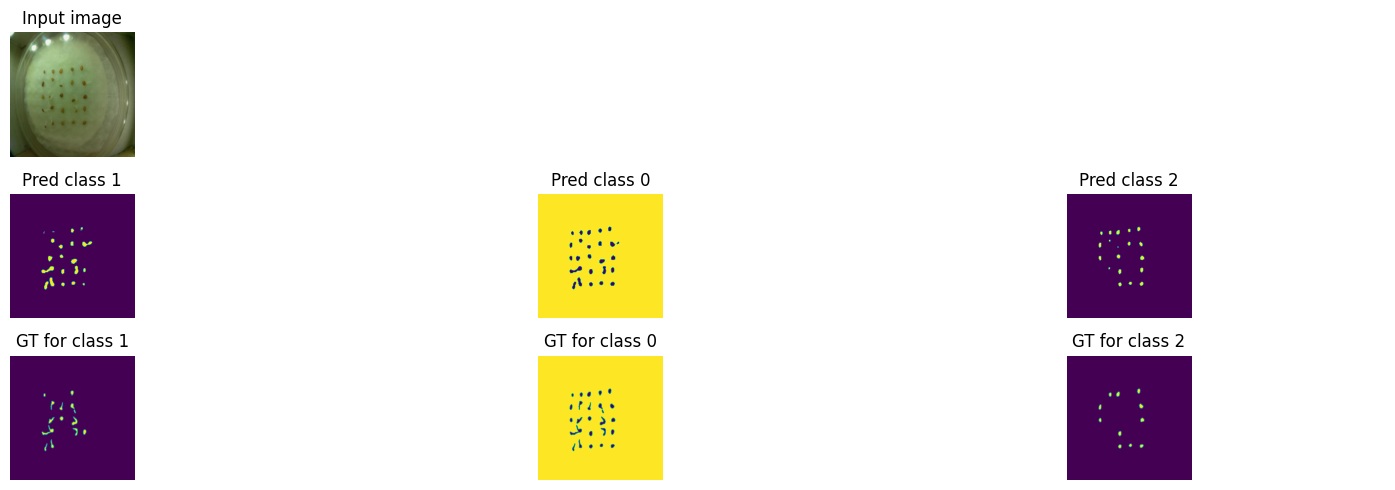

Train loss: 0.25820 | Time: 30m 46s | Val loss: 0.26611
Train_DICE_avg: 0.76756 | Train_Jaccard_avg: 0.70755 | Train_Sensitivity_avg: 0.76715 | Train_Specificity_avg: 0.96708 
Class 0 - Train_DICE: 0.99253 | Train_Jaccard: 0.98524 | Train_Sensitivity: 0.99039 | Train_Specificity: 0.90704 
Class 1 - Train_DICE: 0.43731 | Train_Jaccard: 0.35422 | Train_Sensitivity: 0.44665 | Train_Specificity: 0.99771 
Class 2 - Train_DICE: 0.87284 | Train_Jaccard: 0.78320 | Train_Sensitivity: 0.86440 | Train_Specificity: 0.99648 
Val_DICE_avg: 0.75758 | Val_Jaccard_avg: 0.70689 | Val_Sensitivity_avg: 0.74706 | Val_Specificity_avg: 0.94935 
Class 0 - Val_DICE: 0.99614 | Val_Jaccard: 0.99233 | Val_Sensitivity: 0.99796 | Val_Specificity: 0.85209 
Class 1 - Val_DICE: 0.38438 | Val_Jaccard: 0.31350 | Val_Sensitivity: 0.36440 | Val_Specificity: 0.99836 
Class 2 - Val_DICE: 0.89221 | Val_Jaccard: 0.81484 | Val_Sensitivity: 0.87883 | Val_Specificity: 0.99760 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.25473 | Time: 31m 47s | Val loss: 0.25973
Train_DICE_avg: 0.77360 | Train_Jaccard_avg: 0.71418 | Train_Sensitivity_avg: 0.77296 | Train_Specificity_avg: 0.96720 
Class 0 - Train_DICE: 0.99276 | Train_Jaccard: 0.98568 | Train_Sensitivity: 0.99095 | Train_Specificity: 0.90727 
Class 1 - Train_DICE: 0.45288 | Train_Jaccard: 0.37031 | Train_Sensitivity: 0.46156 | Train_Specificity: 0.99778 
Class 2 - Train_DICE: 0.87516 | Train_Jaccard: 0.78656 | Train_Sensitivity: 0.86638 | Train_Specificity: 0.99657 
Val_DICE_avg: 0.80577 | Val_Jaccard_avg: 0.75659 | Val_Sensitivity_avg: 0.81747 | Val_Specificity_avg: 0.96393 
Class 0 - Val_DICE: 0.99662 | Val_Jaccard: 0.99329 | Val_Sensitivity: 0.99688 | Val_Specificity: 0.89679 
Class 1 - Val_DICE: 0.52504 | Val_Jaccard: 0.45623 | Val_Sensitivity: 0.56330 | Val_Specificity: 0.99761 
Class 2 - Val_DICE: 0.89564 | Val_Jaccard: 0.82025 | Val_Sensitivity: 0.89223 | Val_Specificity: 0.99739 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.25100 | Time: 32m 49s | Val loss: 0.25728
Train_DICE_avg: 0.78004 | Train_Jaccard_avg: 0.72092 | Train_Sensitivity_avg: 0.78204 | Train_Specificity_avg: 0.96679 
Class 0 - Train_DICE: 0.99258 | Train_Jaccard: 0.98532 | Train_Sensitivity: 0.99084 | Train_Specificity: 0.90612 
Class 1 - Train_DICE: 0.47134 | Train_Jaccard: 0.38926 | Train_Sensitivity: 0.48572 | Train_Specificity: 0.99775 
Class 2 - Train_DICE: 0.87619 | Train_Jaccard: 0.78818 | Train_Sensitivity: 0.86958 | Train_Specificity: 0.99652 
Val_DICE_avg: 0.81989 | Val_Jaccard_avg: 0.77146 | Val_Sensitivity_avg: 0.82896 | Val_Specificity_avg: 0.96277 
Class 0 - Val_DICE: 0.99668 | Val_Jaccard: 0.99339 | Val_Sensitivity: 0.99726 | Val_Specificity: 0.89298 
Class 1 - Val_DICE: 0.56750 | Val_Jaccard: 0.50081 | Val_Sensitivity: 0.59055 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.89549 | Val_Jaccard: 0.82017 | Val_Sensitivity: 0.89906 | Val_Specificity: 0.99728 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.24925 | Time: 33m 50s | Val loss: 0.25244
Train_DICE_avg: 0.78552 | Train_Jaccard_avg: 0.72663 | Train_Sensitivity_avg: 0.78881 | Train_Specificity_avg: 0.96787 
Class 0 - Train_DICE: 0.99271 | Train_Jaccard: 0.98557 | Train_Sensitivity: 0.99080 | Train_Specificity: 0.90939 
Class 1 - Train_DICE: 0.48791 | Train_Jaccard: 0.40612 | Train_Sensitivity: 0.50675 | Train_Specificity: 0.99771 
Class 2 - Train_DICE: 0.87594 | Train_Jaccard: 0.78819 | Train_Sensitivity: 0.86890 | Train_Specificity: 0.99651 
Val_DICE_avg: 0.84228 | Val_Jaccard_avg: 0.79473 | Val_Sensitivity_avg: 0.85683 | Val_Specificity_avg: 0.96072 
Class 0 - Val_DICE: 0.99662 | Val_Jaccard: 0.99329 | Val_Sensitivity: 0.99731 | Val_Specificity: 0.88688 
Class 1 - Val_DICE: 0.63338 | Val_Jaccard: 0.56838 | Val_Sensitivity: 0.67412 | Val_Specificity: 0.99805 
Class 2 - Val_DICE: 0.89684 | Val_Jaccard: 0.82253 | Val_Sensitivity: 0.89905 | Val_Specificity: 0.99722 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.24451 | Time: 34m 52s | Val loss: 0.20702
Train_DICE_avg: 0.80196 | Train_Jaccard_avg: 0.74308 | Train_Sensitivity_avg: 0.80863 | Train_Specificity_avg: 0.96744 
Class 0 - Train_DICE: 0.99271 | Train_Jaccard: 0.98558 | Train_Sensitivity: 0.99087 | Train_Specificity: 0.90818 
Class 1 - Train_DICE: 0.53876 | Train_Jaccard: 0.45792 | Train_Sensitivity: 0.56575 | Train_Specificity: 0.99771 
Class 2 - Train_DICE: 0.87440 | Train_Jaccard: 0.78575 | Train_Sensitivity: 0.86927 | Train_Specificity: 0.99643 
Val_DICE_avg: 0.82890 | Val_Jaccard_avg: 0.78143 | Val_Sensitivity_avg: 0.84581 | Val_Specificity_avg: 0.95884 
Class 0 - Val_DICE: 0.99655 | Val_Jaccard: 0.99314 | Val_Sensitivity: 0.99703 | Val_Specificity: 0.88148 
Class 1 - Val_DICE: 0.59407 | Val_Jaccard: 0.53017 | Val_Sensitivity: 0.64891 | Val_Specificity: 0.99772 
Class 2 - Val_DICE: 0.89608 | Val_Jaccard: 0.82099 | Val_Sensitivity: 0.89149 | Val_Specificity: 0.99731 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


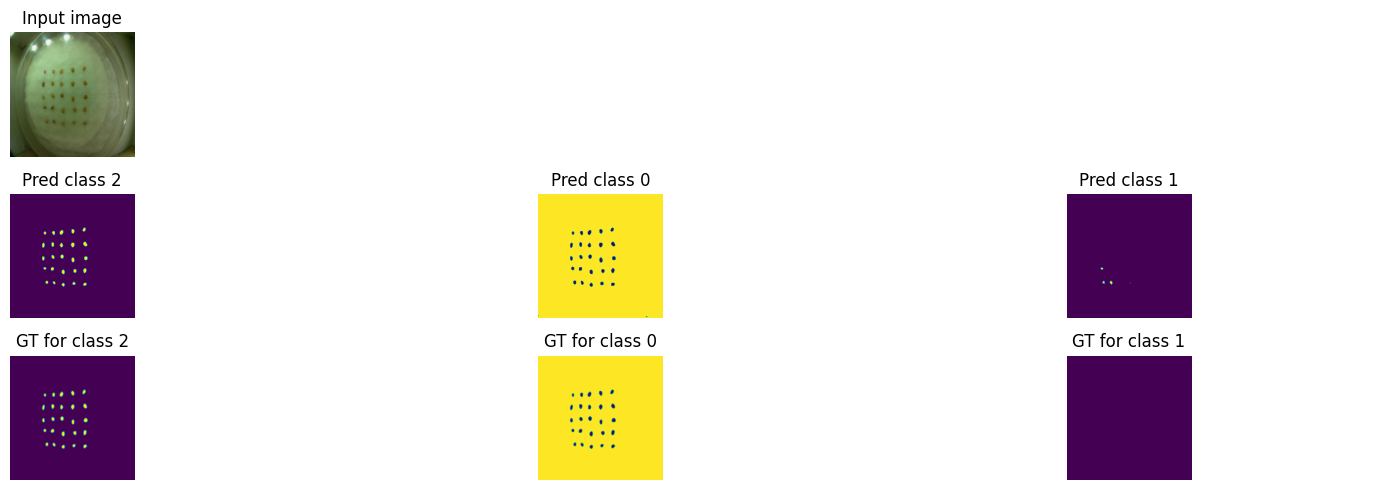

Train loss: 0.22849 | Time: 35m 54s | Val loss: 0.21049
Train_DICE_avg: 0.81578 | Train_Jaccard_avg: 0.75771 | Train_Sensitivity_avg: 0.82851 | Train_Specificity_avg: 0.96875 
Class 0 - Train_DICE: 0.99225 | Train_Jaccard: 0.98469 | Train_Sensitivity: 0.98995 | Train_Specificity: 0.91201 
Class 1 - Train_DICE: 0.57910 | Train_Jaccard: 0.50058 | Train_Sensitivity: 0.62639 | Train_Specificity: 0.99771 
Class 2 - Train_DICE: 0.87598 | Train_Jaccard: 0.78786 | Train_Sensitivity: 0.86919 | Train_Specificity: 0.99655 
Val_DICE_avg: 0.82239 | Val_Jaccard_avg: 0.77573 | Val_Sensitivity_avg: 0.84423 | Val_Specificity_avg: 0.96320 
Class 0 - Val_DICE: 0.99670 | Val_Jaccard: 0.99344 | Val_Sensitivity: 0.99696 | Val_Specificity: 0.89487 
Class 1 - Val_DICE: 0.57684 | Val_Jaccard: 0.51671 | Val_Sensitivity: 0.63268 | Val_Specificity: 0.99803 
Class 2 - Val_DICE: 0.89364 | Val_Jaccard: 0.81705 | Val_Sensitivity: 0.90304 | Val_Specificity: 0.99671 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.22039 | Time: 36m 54s | Val loss: 0.19480
Train_DICE_avg: 0.82210 | Train_Jaccard_avg: 0.76430 | Train_Sensitivity_avg: 0.83811 | Train_Specificity_avg: 0.96649 
Class 0 - Train_DICE: 0.99231 | Train_Jaccard: 0.98481 | Train_Sensitivity: 0.99037 | Train_Specificity: 0.90529 
Class 1 - Train_DICE: 0.59923 | Train_Jaccard: 0.52177 | Train_Sensitivity: 0.65673 | Train_Specificity: 0.99764 
Class 2 - Train_DICE: 0.87475 | Train_Jaccard: 0.78633 | Train_Sensitivity: 0.86722 | Train_Specificity: 0.99654 
Val_DICE_avg: 0.83621 | Val_Jaccard_avg: 0.78968 | Val_Sensitivity_avg: 0.85679 | Val_Specificity_avg: 0.96205 
Class 0 - Val_DICE: 0.99658 | Val_Jaccard: 0.99321 | Val_Sensitivity: 0.99724 | Val_Specificity: 0.89126 
Class 1 - Val_DICE: 0.61769 | Val_Jaccard: 0.55694 | Val_Sensitivity: 0.66525 | Val_Specificity: 0.99800 
Class 2 - Val_DICE: 0.89434 | Val_Jaccard: 0.81889 | Val_Sensitivity: 0.90788 | Val_Specificity: 0.99689 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.21215 | Time: 37m 56s | Val loss: 0.18972
Train_DICE_avg: 0.82617 | Train_Jaccard_avg: 0.76988 | Train_Sensitivity_avg: 0.84653 | Train_Specificity_avg: 0.96660 
Class 0 - Train_DICE: 0.99246 | Train_Jaccard: 0.98509 | Train_Sensitivity: 0.99069 | Train_Specificity: 0.90556 
Class 1 - Train_DICE: 0.60856 | Train_Jaccard: 0.53433 | Train_Sensitivity: 0.67714 | Train_Specificity: 0.99771 
Class 2 - Train_DICE: 0.87748 | Train_Jaccard: 0.79021 | Train_Sensitivity: 0.87175 | Train_Specificity: 0.99653 
Val_DICE_avg: 0.84130 | Val_Jaccard_avg: 0.79484 | Val_Sensitivity_avg: 0.86254 | Val_Specificity_avg: 0.96082 
Class 0 - Val_DICE: 0.99655 | Val_Jaccard: 0.99315 | Val_Sensitivity: 0.99743 | Val_Specificity: 0.88748 
Class 1 - Val_DICE: 0.63462 | Val_Jaccard: 0.57474 | Val_Sensitivity: 0.68312 | Val_Specificity: 0.99813 
Class 2 - Val_DICE: 0.89272 | Val_Jaccard: 0.81664 | Val_Sensitivity: 0.90708 | Val_Specificity: 0.99686 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.20745 | Time: 38m 57s | Val loss: 0.19212
Train_DICE_avg: 0.82904 | Train_Jaccard_avg: 0.77235 | Train_Sensitivity_avg: 0.84894 | Train_Specificity_avg: 0.96778 
Class 0 - Train_DICE: 0.99255 | Train_Jaccard: 0.98526 | Train_Sensitivity: 0.99074 | Train_Specificity: 0.90914 
Class 1 - Train_DICE: 0.61578 | Train_Jaccard: 0.53947 | Train_Sensitivity: 0.68223 | Train_Specificity: 0.99769 
Class 2 - Train_DICE: 0.87879 | Train_Jaccard: 0.79230 | Train_Sensitivity: 0.87386 | Train_Specificity: 0.99652 
Val_DICE_avg: 0.83859 | Val_Jaccard_avg: 0.79217 | Val_Sensitivity_avg: 0.86068 | Val_Specificity_avg: 0.95963 
Class 0 - Val_DICE: 0.99652 | Val_Jaccard: 0.99309 | Val_Sensitivity: 0.99737 | Val_Specificity: 0.88407 
Class 1 - Val_DICE: 0.62680 | Val_Jaccard: 0.56719 | Val_Sensitivity: 0.68658 | Val_Specificity: 0.99781 
Class 2 - Val_DICE: 0.89243 | Val_Jaccard: 0.81622 | Val_Sensitivity: 0.89808 | Val_Specificity: 0.99701 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.20604 | Time: 39m 58s | Val loss: 0.18567
Train_DICE_avg: 0.83092 | Train_Jaccard_avg: 0.77507 | Train_Sensitivity_avg: 0.85076 | Train_Specificity_avg: 0.96718 
Class 0 - Train_DICE: 0.99272 | Train_Jaccard: 0.98560 | Train_Sensitivity: 0.99129 | Train_Specificity: 0.90724 
Class 1 - Train_DICE: 0.62030 | Train_Jaccard: 0.54595 | Train_Sensitivity: 0.68617 | Train_Specificity: 0.99772 
Class 2 - Train_DICE: 0.87973 | Train_Jaccard: 0.79365 | Train_Sensitivity: 0.87482 | Train_Specificity: 0.99659 
Val_DICE_avg: 0.84114 | Val_Jaccard_avg: 0.79384 | Val_Sensitivity_avg: 0.85042 | Val_Specificity_avg: 0.95805 
Class 0 - Val_DICE: 0.99658 | Val_Jaccard: 0.99320 | Val_Sensitivity: 0.99752 | Val_Specificity: 0.87907 
Class 1 - Val_DICE: 0.63071 | Val_Jaccard: 0.56692 | Val_Sensitivity: 0.64827 | Val_Specificity: 0.99819 
Class 2 - Val_DICE: 0.89613 | Val_Jaccard: 0.82141 | Val_Sensitivity: 0.90546 | Val_Specificity: 0.99690 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


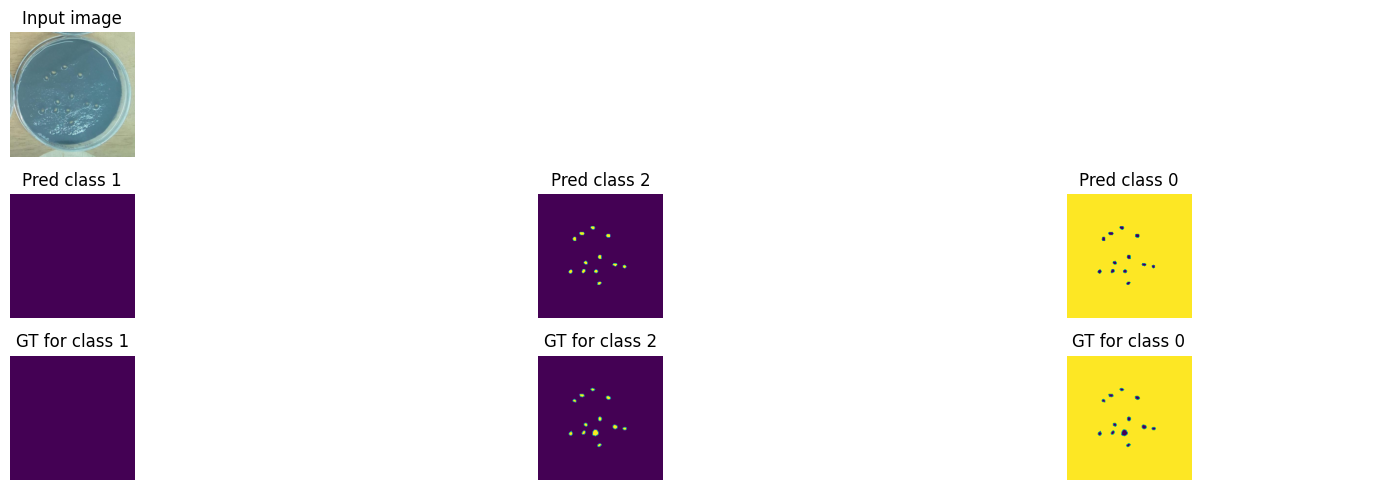

Train loss: 0.20084 | Time: 40m 59s | Val loss: 0.17994
Train_DICE_avg: 0.83622 | Train_Jaccard_avg: 0.78025 | Train_Sensitivity_avg: 0.85416 | Train_Specificity_avg: 0.96747 
Class 0 - Train_DICE: 0.99273 | Train_Jaccard: 0.98561 | Train_Sensitivity: 0.99123 | Train_Specificity: 0.90808 
Class 1 - Train_DICE: 0.63517 | Train_Jaccard: 0.55976 | Train_Sensitivity: 0.69630 | Train_Specificity: 0.99774 
Class 2 - Train_DICE: 0.88076 | Train_Jaccard: 0.79536 | Train_Sensitivity: 0.87496 | Train_Specificity: 0.99660 
Val_DICE_avg: 0.84345 | Val_Jaccard_avg: 0.79728 | Val_Sensitivity_avg: 0.86082 | Val_Specificity_avg: 0.96014 
Class 0 - Val_DICE: 0.99665 | Val_Jaccard: 0.99334 | Val_Sensitivity: 0.99742 | Val_Specificity: 0.88546 
Class 1 - Val_DICE: 0.63514 | Val_Jaccard: 0.57351 | Val_Sensitivity: 0.68536 | Val_Specificity: 0.99785 
Class 2 - Val_DICE: 0.89856 | Val_Jaccard: 0.82498 | Val_Sensitivity: 0.89969 | Val_Specificity: 0.99713 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.20104 | Time: 42m 1s | Val loss: 0.17833
Train_DICE_avg: 0.83432 | Train_Jaccard_avg: 0.77830 | Train_Sensitivity_avg: 0.85273 | Train_Specificity_avg: 0.96677 
Class 0 - Train_DICE: 0.99272 | Train_Jaccard: 0.98561 | Train_Sensitivity: 0.99144 | Train_Specificity: 0.90603 
Class 1 - Train_DICE: 0.62957 | Train_Jaccard: 0.55396 | Train_Sensitivity: 0.69099 | Train_Specificity: 0.99770 
Class 2 - Train_DICE: 0.88067 | Train_Jaccard: 0.79533 | Train_Sensitivity: 0.87576 | Train_Specificity: 0.99658 
Val_DICE_avg: 0.84635 | Val_Jaccard_avg: 0.80076 | Val_Sensitivity_avg: 0.86469 | Val_Specificity_avg: 0.96011 
Class 0 - Val_DICE: 0.99664 | Val_Jaccard: 0.99333 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.88510 
Class 1 - Val_DICE: 0.64274 | Val_Jaccard: 0.58179 | Val_Sensitivity: 0.68608 | Val_Specificity: 0.99815 
Class 2 - Val_DICE: 0.89965 | Val_Jaccard: 0.82717 | Val_Sensitivity: 0.91039 | Val_Specificity: 0.99709 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.19623 | Time: 43m 3s | Val loss: 0.17560
Train_DICE_avg: 0.83810 | Train_Jaccard_avg: 0.78272 | Train_Sensitivity_avg: 0.85542 | Train_Specificity_avg: 0.96771 
Class 0 - Train_DICE: 0.99272 | Train_Jaccard: 0.98561 | Train_Sensitivity: 0.99126 | Train_Specificity: 0.90872 
Class 1 - Train_DICE: 0.63830 | Train_Jaccard: 0.56351 | Train_Sensitivity: 0.69502 | Train_Specificity: 0.99780 
Class 2 - Train_DICE: 0.88328 | Train_Jaccard: 0.79905 | Train_Sensitivity: 0.87997 | Train_Specificity: 0.99659 
Val_DICE_avg: 0.85104 | Val_Jaccard_avg: 0.80482 | Val_Sensitivity_avg: 0.86318 | Val_Specificity_avg: 0.95798 
Class 0 - Val_DICE: 0.99653 | Val_Jaccard: 0.99310 | Val_Sensitivity: 0.99780 | Val_Specificity: 0.87843 
Class 1 - Val_DICE: 0.65604 | Val_Jaccard: 0.59282 | Val_Sensitivity: 0.68422 | Val_Specificity: 0.99819 
Class 2 - Val_DICE: 0.90054 | Val_Jaccard: 0.82853 | Val_Sensitivity: 0.90751 | Val_Specificity: 0.99731 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.19925 | Time: 44m 5s | Val loss: 0.18199
Train_DICE_avg: 0.83583 | Train_Jaccard_avg: 0.78000 | Train_Sensitivity_avg: 0.85437 | Train_Specificity_avg: 0.96629 
Class 0 - Train_DICE: 0.99282 | Train_Jaccard: 0.98579 | Train_Sensitivity: 0.99171 | Train_Specificity: 0.90450 
Class 1 - Train_DICE: 0.63228 | Train_Jaccard: 0.55652 | Train_Sensitivity: 0.69469 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.88238 | Train_Jaccard: 0.79770 | Train_Sensitivity: 0.87671 | Train_Specificity: 0.99663 
Val_DICE_avg: 0.84603 | Val_Jaccard_avg: 0.80114 | Val_Sensitivity_avg: 0.87305 | Val_Specificity_avg: 0.95931 
Class 0 - Val_DICE: 0.99656 | Val_Jaccard: 0.99317 | Val_Sensitivity: 0.99763 | Val_Specificity: 0.88265 
Class 1 - Val_DICE: 0.64604 | Val_Jaccard: 0.58889 | Val_Sensitivity: 0.72767 | Val_Specificity: 0.99786 
Class 2 - Val_DICE: 0.89547 | Val_Jaccard: 0.82136 | Val_Sensitivity: 0.89386 | Val_Specificity: 0.99742 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.19535 | Time: 45m 6s | Val loss: 0.17711
Train_DICE_avg: 0.84021 | Train_Jaccard_avg: 0.78464 | Train_Sensitivity_avg: 0.86345 | Train_Specificity_avg: 0.96814 
Class 0 - Train_DICE: 0.99268 | Train_Jaccard: 0.98551 | Train_Sensitivity: 0.99117 | Train_Specificity: 0.91018 
Class 1 - Train_DICE: 0.64838 | Train_Jaccard: 0.57455 | Train_Sensitivity: 0.72376 | Train_Specificity: 0.99762 
Class 2 - Train_DICE: 0.87957 | Train_Jaccard: 0.79385 | Train_Sensitivity: 0.87543 | Train_Specificity: 0.99661 
Val_DICE_avg: 0.85027 | Val_Jaccard_avg: 0.80488 | Val_Sensitivity_avg: 0.87244 | Val_Specificity_avg: 0.95469 
Class 0 - Val_DICE: 0.99641 | Val_Jaccard: 0.99286 | Val_Sensitivity: 0.99760 | Val_Specificity: 0.86881 
Class 1 - Val_DICE: 0.65668 | Val_Jaccard: 0.59769 | Val_Sensitivity: 0.73078 | Val_Specificity: 0.99772 
Class 2 - Val_DICE: 0.89772 | Val_Jaccard: 0.82409 | Val_Sensitivity: 0.88896 | Val_Specificity: 0.99754 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


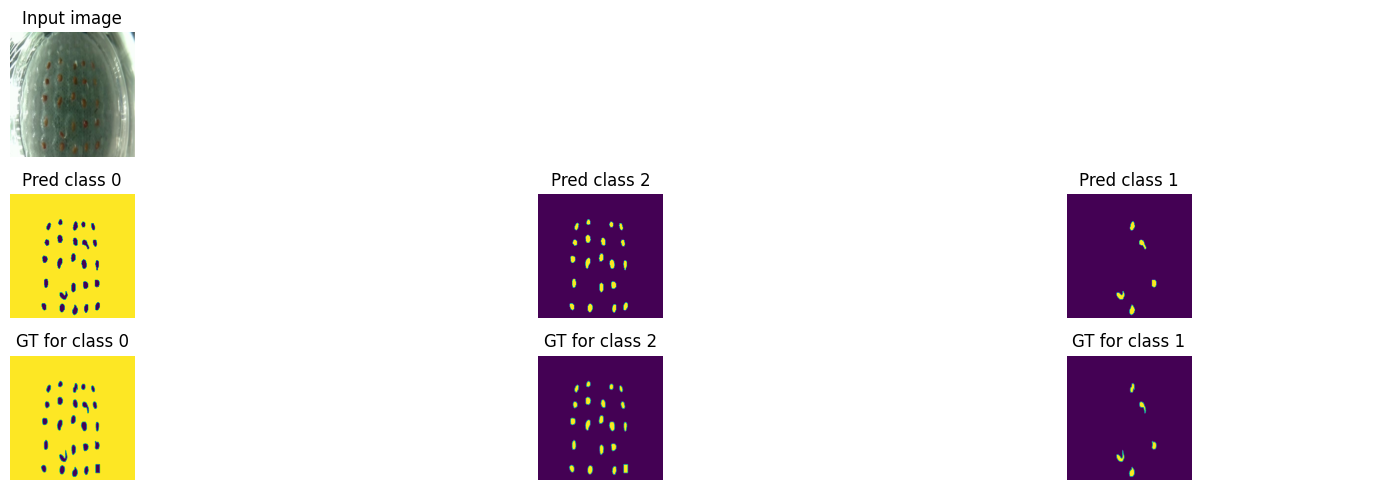

Train loss: 0.19498 | Time: 46m 8s | Val loss: 0.17082
Train_DICE_avg: 0.83979 | Train_Jaccard_avg: 0.78416 | Train_Sensitivity_avg: 0.86280 | Train_Specificity_avg: 0.96702 
Class 0 - Train_DICE: 0.99285 | Train_Jaccard: 0.98584 | Train_Sensitivity: 0.99151 | Train_Specificity: 0.90686 
Class 1 - Train_DICE: 0.64612 | Train_Jaccard: 0.57189 | Train_Sensitivity: 0.72082 | Train_Specificity: 0.99760 
Class 2 - Train_DICE: 0.88042 | Train_Jaccard: 0.79475 | Train_Sensitivity: 0.87606 | Train_Specificity: 0.99659 
Val_DICE_avg: 0.85401 | Val_Jaccard_avg: 0.80897 | Val_Sensitivity_avg: 0.87604 | Val_Specificity_avg: 0.95957 
Class 0 - Val_DICE: 0.99656 | Val_Jaccard: 0.99316 | Val_Sensitivity: 0.99767 | Val_Specificity: 0.88352 
Class 1 - Val_DICE: 0.66661 | Val_Jaccard: 0.60792 | Val_Sensitivity: 0.72351 | Val_Specificity: 0.99806 
Class 2 - Val_DICE: 0.89885 | Val_Jaccard: 0.82584 | Val_Sensitivity: 0.90693 | Val_Specificity: 0.99713 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.19334 | Time: 47m 9s | Val loss: 0.17243
Train_DICE_avg: 0.83844 | Train_Jaccard_avg: 0.78321 | Train_Sensitivity_avg: 0.85896 | Train_Specificity_avg: 0.96698 
Class 0 - Train_DICE: 0.99287 | Train_Jaccard: 0.98589 | Train_Sensitivity: 0.99170 | Train_Specificity: 0.90661 
Class 1 - Train_DICE: 0.63953 | Train_Jaccard: 0.56520 | Train_Sensitivity: 0.70614 | Train_Specificity: 0.99774 
Class 2 - Train_DICE: 0.88290 | Train_Jaccard: 0.79854 | Train_Sensitivity: 0.87905 | Train_Specificity: 0.99659 
Val_DICE_avg: 0.85131 | Val_Jaccard_avg: 0.80575 | Val_Sensitivity_avg: 0.87618 | Val_Specificity_avg: 0.95996 
Class 0 - Val_DICE: 0.99657 | Val_Jaccard: 0.99318 | Val_Sensitivity: 0.99760 | Val_Specificity: 0.88469 
Class 1 - Val_DICE: 0.65829 | Val_Jaccard: 0.59747 | Val_Sensitivity: 0.73016 | Val_Specificity: 0.99779 
Class 2 - Val_DICE: 0.89907 | Val_Jaccard: 0.82661 | Val_Sensitivity: 0.90077 | Val_Specificity: 0.99742 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.19204 | Time: 48m 10s | Val loss: 0.16798
Train_DICE_avg: 0.84132 | Train_Jaccard_avg: 0.78555 | Train_Sensitivity_avg: 0.86194 | Train_Specificity_avg: 0.96760 
Class 0 - Train_DICE: 0.99294 | Train_Jaccard: 0.98602 | Train_Sensitivity: 0.99163 | Train_Specificity: 0.90849 
Class 1 - Train_DICE: 0.64872 | Train_Jaccard: 0.57346 | Train_Sensitivity: 0.71586 | Train_Specificity: 0.99775 
Class 2 - Train_DICE: 0.88231 | Train_Jaccard: 0.79716 | Train_Sensitivity: 0.87833 | Train_Specificity: 0.99655 
Val_DICE_avg: 0.85507 | Val_Jaccard_avg: 0.81015 | Val_Sensitivity_avg: 0.87800 | Val_Specificity_avg: 0.95945 
Class 0 - Val_DICE: 0.99662 | Val_Jaccard: 0.99327 | Val_Sensitivity: 0.99761 | Val_Specificity: 0.88319 
Class 1 - Val_DICE: 0.66716 | Val_Jaccard: 0.60727 | Val_Sensitivity: 0.72386 | Val_Specificity: 0.99809 
Class 2 - Val_DICE: 0.90144 | Val_Jaccard: 0.82990 | Val_Sensitivity: 0.91254 | Val_Specificity: 0.99707 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.18531 | Time: 49m 11s | Val loss: 0.16647
Train_DICE_avg: 0.84886 | Train_Jaccard_avg: 0.79448 | Train_Sensitivity_avg: 0.87259 | Train_Specificity_avg: 0.96772 
Class 0 - Train_DICE: 0.99288 | Train_Jaccard: 0.98592 | Train_Sensitivity: 0.99167 | Train_Specificity: 0.90873 
Class 1 - Train_DICE: 0.66908 | Train_Jaccard: 0.59627 | Train_Sensitivity: 0.74558 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.88461 | Train_Jaccard: 0.80125 | Train_Sensitivity: 0.88053 | Train_Specificity: 0.99670 
Val_DICE_avg: 0.85829 | Val_Jaccard_avg: 0.81254 | Val_Sensitivity_avg: 0.87576 | Val_Specificity_avg: 0.95618 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99299 | Val_Sensitivity: 0.99781 | Val_Specificity: 0.87304 
Class 1 - Val_DICE: 0.67823 | Val_Jaccard: 0.61650 | Val_Sensitivity: 0.72596 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.90016 | Val_Jaccard: 0.82813 | Val_Sensitivity: 0.90351 | Val_Specificity: 0.99746 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.18680 | Time: 50m 14s | Val loss: 0.16640
Train_DICE_avg: 0.84623 | Train_Jaccard_avg: 0.79183 | Train_Sensitivity_avg: 0.86769 | Train_Specificity_avg: 0.96685 
Class 0 - Train_DICE: 0.99299 | Train_Jaccard: 0.98613 | Train_Sensitivity: 0.99183 | Train_Specificity: 0.90622 
Class 1 - Train_DICE: 0.66079 | Train_Jaccard: 0.58807 | Train_Sensitivity: 0.72829 | Train_Specificity: 0.99779 
Class 2 - Train_DICE: 0.88491 | Train_Jaccard: 0.80129 | Train_Sensitivity: 0.88295 | Train_Specificity: 0.99655 
Val_DICE_avg: 0.86071 | Val_Jaccard_avg: 0.81573 | Val_Sensitivity_avg: 0.87804 | Val_Specificity_avg: 0.95743 
Class 0 - Val_DICE: 0.99651 | Val_Jaccard: 0.99307 | Val_Sensitivity: 0.99776 | Val_Specificity: 0.87669 
Class 1 - Val_DICE: 0.68391 | Val_Jaccard: 0.62377 | Val_Sensitivity: 0.73531 | Val_Specificity: 0.99801 
Class 2 - Val_DICE: 0.90170 | Val_Jaccard: 0.83036 | Val_Sensitivity: 0.90105 | Val_Specificity: 0.99760 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


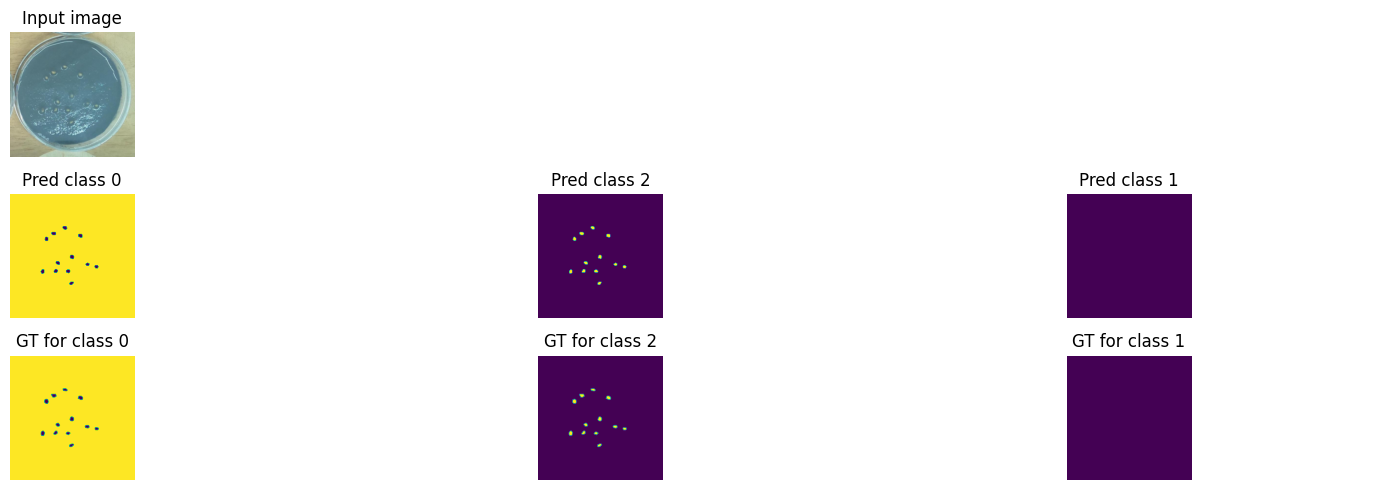

Train loss: 0.18355 | Time: 51m 16s | Val loss: 0.17085
Train_DICE_avg: 0.85349 | Train_Jaccard_avg: 0.79916 | Train_Sensitivity_avg: 0.87868 | Train_Specificity_avg: 0.96748 
Class 0 - Train_DICE: 0.99308 | Train_Jaccard: 0.98631 | Train_Sensitivity: 0.99195 | Train_Specificity: 0.90803 
Class 1 - Train_DICE: 0.68255 | Train_Jaccard: 0.60966 | Train_Sensitivity: 0.76502 | Train_Specificity: 0.99767 
Class 2 - Train_DICE: 0.88483 | Train_Jaccard: 0.80151 | Train_Sensitivity: 0.87906 | Train_Specificity: 0.99674 
Val_DICE_avg: 0.84954 | Val_Jaccard_avg: 0.80424 | Val_Sensitivity_avg: 0.87333 | Val_Specificity_avg: 0.95894 
Class 0 - Val_DICE: 0.99662 | Val_Jaccard: 0.99328 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.88172 
Class 1 - Val_DICE: 0.65298 | Val_Jaccard: 0.59294 | Val_Sensitivity: 0.71335 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.89902 | Val_Jaccard: 0.82652 | Val_Sensitivity: 0.90902 | Val_Specificity: 0.99707 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.18356 | Time: 52m 18s | Val loss: 0.16666
Train_DICE_avg: 0.84804 | Train_Jaccard_avg: 0.79400 | Train_Sensitivity_avg: 0.87213 | Train_Specificity_avg: 0.96715 
Class 0 - Train_DICE: 0.99303 | Train_Jaccard: 0.98620 | Train_Sensitivity: 0.99209 | Train_Specificity: 0.90700 
Class 1 - Train_DICE: 0.66584 | Train_Jaccard: 0.59363 | Train_Sensitivity: 0.74283 | Train_Specificity: 0.99777 
Class 2 - Train_DICE: 0.88526 | Train_Jaccard: 0.80215 | Train_Sensitivity: 0.88148 | Train_Specificity: 0.99669 
Val_DICE_avg: 0.85319 | Val_Jaccard_avg: 0.80789 | Val_Sensitivity_avg: 0.87061 | Val_Specificity_avg: 0.95718 
Class 0 - Val_DICE: 0.99661 | Val_Jaccard: 0.99327 | Val_Sensitivity: 0.99771 | Val_Specificity: 0.87624 
Class 1 - Val_DICE: 0.66157 | Val_Jaccard: 0.60006 | Val_Sensitivity: 0.70321 | Val_Specificity: 0.99815 
Class 2 - Val_DICE: 0.90140 | Val_Jaccard: 0.83035 | Val_Sensitivity: 0.91091 | Val_Specificity: 0.99715 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.18243 | Time: 53m 19s | Val loss: 0.16437
Train_DICE_avg: 0.85410 | Train_Jaccard_avg: 0.80022 | Train_Sensitivity_avg: 0.88133 | Train_Specificity_avg: 0.96759 
Class 0 - Train_DICE: 0.99319 | Train_Jaccard: 0.98652 | Train_Sensitivity: 0.99212 | Train_Specificity: 0.90837 
Class 1 - Train_DICE: 0.68273 | Train_Jaccard: 0.61044 | Train_Sensitivity: 0.76960 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.88639 | Train_Jaccard: 0.80370 | Train_Sensitivity: 0.88226 | Train_Specificity: 0.99671 
Val_DICE_avg: 0.85879 | Val_Jaccard_avg: 0.81367 | Val_Sensitivity_avg: 0.87510 | Val_Specificity_avg: 0.95617 
Class 0 - Val_DICE: 0.99653 | Val_Jaccard: 0.99310 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.87307 
Class 1 - Val_DICE: 0.67765 | Val_Jaccard: 0.61668 | Val_Sensitivity: 0.71693 | Val_Specificity: 0.99827 
Class 2 - Val_DICE: 0.90220 | Val_Jaccard: 0.83124 | Val_Sensitivity: 0.91053 | Val_Specificity: 0.99718 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.18263 | Time: 54m 21s | Val loss: 0.16303
Train_DICE_avg: 0.85191 | Train_Jaccard_avg: 0.79784 | Train_Sensitivity_avg: 0.87781 | Train_Specificity_avg: 0.96828 
Class 0 - Train_DICE: 0.99313 | Train_Jaccard: 0.98640 | Train_Sensitivity: 0.99197 | Train_Specificity: 0.91049 
Class 1 - Train_DICE: 0.67651 | Train_Jaccard: 0.60393 | Train_Sensitivity: 0.76058 | Train_Specificity: 0.99765 
Class 2 - Train_DICE: 0.88610 | Train_Jaccard: 0.80320 | Train_Sensitivity: 0.88088 | Train_Specificity: 0.99670 
Val_DICE_avg: 0.85794 | Val_Jaccard_avg: 0.81301 | Val_Sensitivity_avg: 0.88171 | Val_Specificity_avg: 0.96068 
Class 0 - Val_DICE: 0.99669 | Val_Jaccard: 0.99341 | Val_Sensitivity: 0.99760 | Val_Specificity: 0.88683 
Class 1 - Val_DICE: 0.67529 | Val_Jaccard: 0.61497 | Val_Sensitivity: 0.73209 | Val_Specificity: 0.99800 
Class 2 - Val_DICE: 0.90183 | Val_Jaccard: 0.83066 | Val_Sensitivity: 0.91543 | Val_Specificity: 0.99721 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.17667 | Time: 55m 22s | Val loss: 0.12390
Train_DICE_avg: 0.86059 | Train_Jaccard_avg: 0.80661 | Train_Sensitivity_avg: 0.88279 | Train_Specificity_avg: 0.96904 
Class 0 - Train_DICE: 0.99310 | Train_Jaccard: 0.98634 | Train_Sensitivity: 0.99160 | Train_Specificity: 0.91270 
Class 1 - Train_DICE: 0.70260 | Train_Jaccard: 0.62999 | Train_Sensitivity: 0.77325 | Train_Specificity: 0.99776 
Class 2 - Train_DICE: 0.88608 | Train_Jaccard: 0.80351 | Train_Sensitivity: 0.88352 | Train_Specificity: 0.99667 
Val_DICE_avg: 0.90272 | Val_Jaccard_avg: 0.85713 | Val_Sensitivity_avg: 0.92618 | Val_Specificity_avg: 0.96123 
Class 0 - Val_DICE: 0.99670 | Val_Jaccard: 0.99345 | Val_Sensitivity: 0.99750 | Val_Specificity: 0.88851 
Class 1 - Val_DICE: 0.80920 | Val_Jaccard: 0.74658 | Val_Sensitivity: 0.86983 | Val_Specificity: 0.99785 
Class 2 - Val_DICE: 0.90227 | Val_Jaccard: 0.83137 | Val_Sensitivity: 0.91121 | Val_Specificity: 0.99733 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


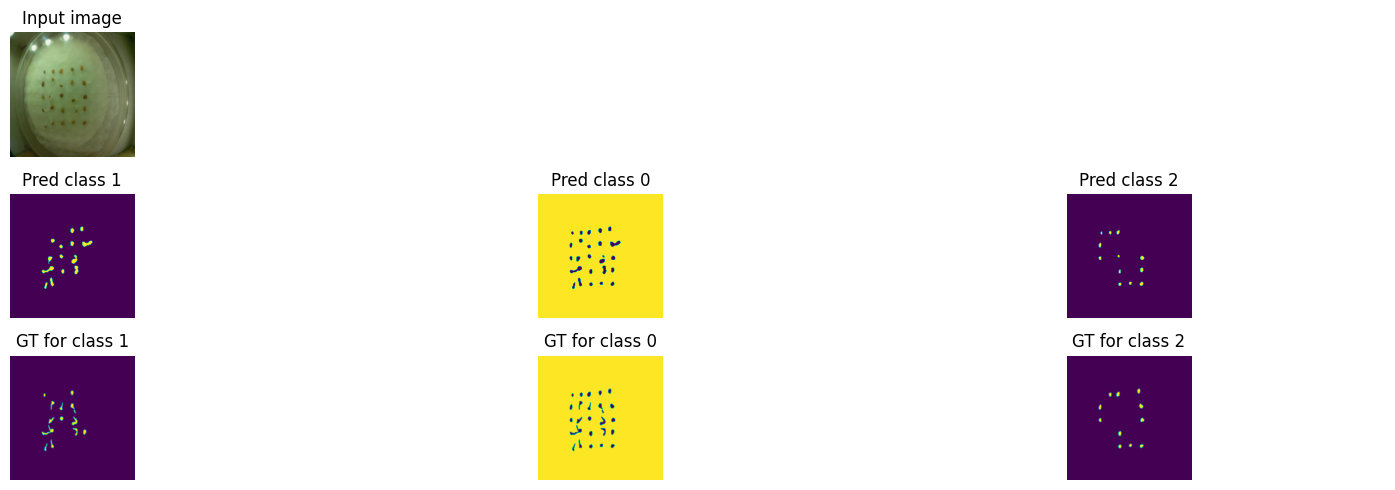

Train loss: 0.17330 | Time: 56m 25s | Val loss: 0.12481
Train_DICE_avg: 0.86753 | Train_Jaccard_avg: 0.81304 | Train_Sensitivity_avg: 0.89048 | Train_Specificity_avg: 0.96843 
Class 0 - Train_DICE: 0.99321 | Train_Jaccard: 0.98656 | Train_Sensitivity: 0.99201 | Train_Specificity: 0.91083 
Class 1 - Train_DICE: 0.72307 | Train_Jaccard: 0.64905 | Train_Sensitivity: 0.79703 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.88631 | Train_Jaccard: 0.80352 | Train_Sensitivity: 0.88241 | Train_Specificity: 0.99674 
Val_DICE_avg: 0.90093 | Val_Jaccard_avg: 0.85417 | Val_Sensitivity_avg: 0.92291 | Val_Specificity_avg: 0.96105 
Class 0 - Val_DICE: 0.99672 | Val_Jaccard: 0.99347 | Val_Sensitivity: 0.99746 | Val_Specificity: 0.88824 
Class 1 - Val_DICE: 0.80669 | Val_Jaccard: 0.74182 | Val_Sensitivity: 0.85394 | Val_Specificity: 0.99793 
Class 2 - Val_DICE: 0.89937 | Val_Jaccard: 0.82720 | Val_Sensitivity: 0.91734 | Val_Specificity: 0.99698 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.17176 | Time: 57m 28s | Val loss: 0.12212
Train_DICE_avg: 0.86774 | Train_Jaccard_avg: 0.81326 | Train_Sensitivity_avg: 0.89227 | Train_Specificity_avg: 0.96816 
Class 0 - Train_DICE: 0.99308 | Train_Jaccard: 0.98630 | Train_Sensitivity: 0.99192 | Train_Specificity: 0.91008 
Class 1 - Train_DICE: 0.72413 | Train_Jaccard: 0.65023 | Train_Sensitivity: 0.80171 | Train_Specificity: 0.99770 
Class 2 - Train_DICE: 0.88601 | Train_Jaccard: 0.80326 | Train_Sensitivity: 0.88317 | Train_Specificity: 0.99669 
Val_DICE_avg: 0.90309 | Val_Jaccard_avg: 0.85776 | Val_Sensitivity_avg: 0.92671 | Val_Specificity_avg: 0.96016 
Class 0 - Val_DICE: 0.99669 | Val_Jaccard: 0.99343 | Val_Sensitivity: 0.99756 | Val_Specificity: 0.88538 
Class 1 - Val_DICE: 0.81071 | Val_Jaccard: 0.74906 | Val_Sensitivity: 0.87179 | Val_Specificity: 0.99786 
Class 2 - Val_DICE: 0.90186 | Val_Jaccard: 0.83079 | Val_Sensitivity: 0.91077 | Val_Specificity: 0.99726 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.16642 | Time: 58m 32s | Val loss: 0.12040
Train_DICE_avg: 0.87503 | Train_Jaccard_avg: 0.82104 | Train_Sensitivity_avg: 0.89978 | Train_Specificity_avg: 0.96833 
Class 0 - Train_DICE: 0.99309 | Train_Jaccard: 0.98633 | Train_Sensitivity: 0.99195 | Train_Specificity: 0.91055 
Class 1 - Train_DICE: 0.74450 | Train_Jaccard: 0.67146 | Train_Sensitivity: 0.82345 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.88749 | Train_Jaccard: 0.80533 | Train_Sensitivity: 0.88395 | Train_Specificity: 0.99671 
Val_DICE_avg: 0.90460 | Val_Jaccard_avg: 0.85817 | Val_Sensitivity_avg: 0.92169 | Val_Specificity_avg: 0.95766 
Class 0 - Val_DICE: 0.99661 | Val_Jaccard: 0.99325 | Val_Sensitivity: 0.99775 | Val_Specificity: 0.87772 
Class 1 - Val_DICE: 0.81754 | Val_Jaccard: 0.75332 | Val_Sensitivity: 0.85172 | Val_Specificity: 0.99815 
Class 2 - Val_DICE: 0.89965 | Val_Jaccard: 0.82795 | Val_Sensitivity: 0.91560 | Val_Specificity: 0.99710 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.16981 | Time: 59m 35s | Val loss: 0.12094
Train_DICE_avg: 0.87150 | Train_Jaccard_avg: 0.81714 | Train_Sensitivity_avg: 0.89498 | Train_Specificity_avg: 0.96885 
Class 0 - Train_DICE: 0.99297 | Train_Jaccard: 0.98609 | Train_Sensitivity: 0.99162 | Train_Specificity: 0.91220 
Class 1 - Train_DICE: 0.73530 | Train_Jaccard: 0.66161 | Train_Sensitivity: 0.81070 | Train_Specificity: 0.99764 
Class 2 - Train_DICE: 0.88623 | Train_Jaccard: 0.80371 | Train_Sensitivity: 0.88262 | Train_Specificity: 0.99672 
Val_DICE_avg: 0.90209 | Val_Jaccard_avg: 0.85623 | Val_Sensitivity_avg: 0.92293 | Val_Specificity_avg: 0.95953 
Class 0 - Val_DICE: 0.99670 | Val_Jaccard: 0.99344 | Val_Sensitivity: 0.99760 | Val_Specificity: 0.88349 
Class 1 - Val_DICE: 0.80815 | Val_Jaccard: 0.74487 | Val_Sensitivity: 0.86085 | Val_Specificity: 0.99801 
Class 2 - Val_DICE: 0.90142 | Val_Jaccard: 0.83038 | Val_Sensitivity: 0.91034 | Val_Specificity: 0.99709 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.16863 | Time: 60m 38s | Val loss: 0.11776
Train_DICE_avg: 0.87368 | Train_Jaccard_avg: 0.81999 | Train_Sensitivity_avg: 0.89981 | Train_Specificity_avg: 0.96845 
Class 0 - Train_DICE: 0.99320 | Train_Jaccard: 0.98655 | Train_Sensitivity: 0.99201 | Train_Specificity: 0.91092 
Class 1 - Train_DICE: 0.74028 | Train_Jaccard: 0.66777 | Train_Sensitivity: 0.82411 | Train_Specificity: 0.99771 
Class 2 - Train_DICE: 0.88754 | Train_Jaccard: 0.80566 | Train_Sensitivity: 0.88331 | Train_Specificity: 0.99673 
Val_DICE_avg: 0.90634 | Val_Jaccard_avg: 0.86051 | Val_Sensitivity_avg: 0.92767 | Val_Specificity_avg: 0.96083 
Class 0 - Val_DICE: 0.99675 | Val_Jaccard: 0.99355 | Val_Sensitivity: 0.99751 | Val_Specificity: 0.88743 
Class 1 - Val_DICE: 0.81865 | Val_Jaccard: 0.75461 | Val_Sensitivity: 0.87294 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.90362 | Val_Jaccard: 0.83336 | Val_Sensitivity: 0.91256 | Val_Specificity: 0.99717 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


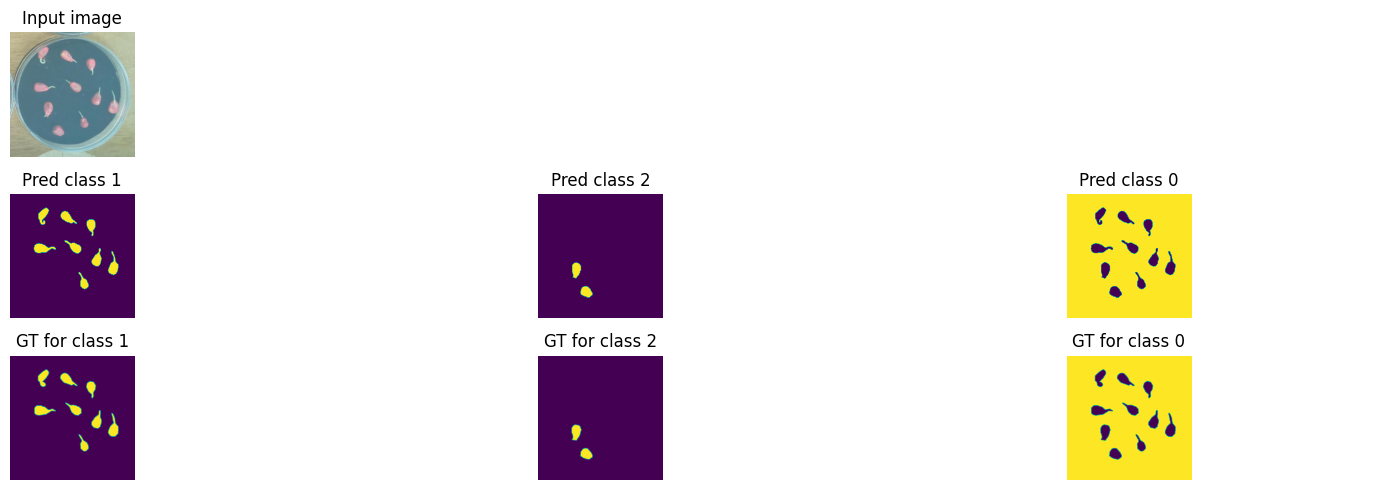

Train loss: 0.16586 | Time: 61m 41s | Val loss: 0.11794
Train_DICE_avg: 0.87405 | Train_Jaccard_avg: 0.81978 | Train_Sensitivity_avg: 0.89957 | Train_Specificity_avg: 0.96670 
Class 0 - Train_DICE: 0.99307 | Train_Jaccard: 0.98628 | Train_Sensitivity: 0.99211 | Train_Specificity: 0.90568 
Class 1 - Train_DICE: 0.74214 | Train_Jaccard: 0.66825 | Train_Sensitivity: 0.82376 | Train_Specificity: 0.99768 
Class 2 - Train_DICE: 0.88694 | Train_Jaccard: 0.80480 | Train_Sensitivity: 0.88285 | Train_Specificity: 0.99675 
Val_DICE_avg: 0.90472 | Val_Jaccard_avg: 0.85943 | Val_Sensitivity_avg: 0.92571 | Val_Specificity_avg: 0.95768 
Class 0 - Val_DICE: 0.99662 | Val_Jaccard: 0.99328 | Val_Sensitivity: 0.99772 | Val_Specificity: 0.87780 
Class 1 - Val_DICE: 0.81434 | Val_Jaccard: 0.75229 | Val_Sensitivity: 0.87210 | Val_Specificity: 0.99789 
Class 2 - Val_DICE: 0.90320 | Val_Jaccard: 0.83272 | Val_Sensitivity: 0.90732 | Val_Specificity: 0.99736 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▂▂▂▃▃▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇██████████
wandb:       Training Jaccard ▁▂▂▂▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇████████
wandb:          Training Loss ██▇▇▇▆▆▅▅▅▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▁▁▂▂▂▂▃▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇█████████
wandb:   Training Specificity ▁▂▃▄▄▅▅▆▆▇▇▇▇▇▇█████████████████████████
wandb:        Validation DICE ▁▁▂▂▂▂▃▃▄▄▄▄▄▄▅▅▅▅▆▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇█████
wandb:     Validation Jaccard ▁▁▁▂▂▂▃▃▄▄▄▄▅▅▅▅▅▆▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇████
wandb:        Validation Loss █▇▇▇▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb: Validation Sensitivity ▁▁▁▁▂▂▂▂▃▃▄▄▄▄▅▅▅▅▆▅▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████
wandb: Validation Specificity ▁▃▃▃▄▅▄▆▆▅▆▅▆█▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.87405
wandb:       Training Jaccard 0.81978
wandb:          Training Loss 0.16


Training complete!


In [13]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = UNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]



Global Performance Metrics:
Loss mean: 0.13392, std: 0.00849
Dice Coefficient mean: 0.87313, std: 0.10585
Jaccard Index mean: 0.81520, std: 0.12227
Sensitivity mean: 0.89193, std: 0.09523
Specificity mean: 0.96325, std: 0.02474

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99593, std: 0.00205
Jaccard mean: 0.99189, std: 0.00405
Sensitivity mean: 0.99558, std: 0.00219
Specificity mean: 0.89546, std: 0.07438

Class 1:
Dice mean: 0.75358, std: 0.29120
Jaccard mean: 0.67659, std: 0.31301
Sensitivity mean: 0.79309, std: 0.26993
Specificity mean: 0.99808, std: 0.00329

Class 2:
Dice mean: 0.86987, std: 0.07611
Jaccard mean: 0.77713, std: 0.10851
Sensitivity mean: 0.88711, std: 0.09050
Specificity mean: 0.99620, std: 0.00260


### Cross-Entropy Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Backbone"] = "resnet34"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-UNet-ResNet34-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.18 GB
GPU Memory - Reserved: 1.84 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_172728-jpxsn36w
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-UNet-ResNet34-CrossEntropy
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/jpxsn36w



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


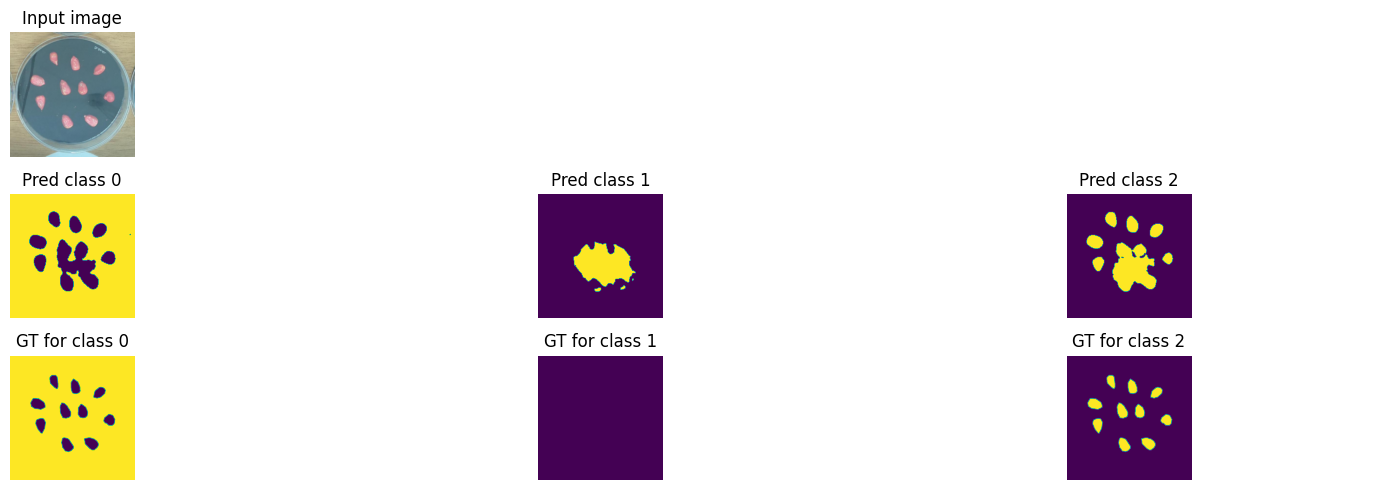

Train loss: 0.59427 | Time: 0m 59s | Val loss: 0.64357
Train_DICE_avg: 0.30415 | Train_Jaccard_avg: 0.23725 | Train_Sensitivity_avg: 0.81990 | Train_Specificity_avg: 0.68532 
Class 0 - Train_DICE: 0.37168 | Train_Jaccard: 0.26510 | Train_Sensitivity: 0.99631 | Train_Specificity: 0.09559 
Class 1 - Train_DICE: 0.20406 | Train_Jaccard: 0.20210 | Train_Sensitivity: 0.76261 | Train_Specificity: 0.98584 
Class 2 - Train_DICE: 0.33670 | Train_Jaccard: 0.24456 | Train_Sensitivity: 0.70077 | Train_Specificity: 0.97451 
Val_DICE_avg: 0.50585 | Val_Jaccard_avg: 0.41583 | Val_Sensitivity_avg: 0.80665 | Val_Specificity_avg: 0.68210 
Class 0 - Val_DICE: 0.67198 | Val_Jaccard: 0.52601 | Val_Sensitivity: 0.99864 | Val_Specificity: 0.07506 
Class 1 - Val_DICE: 0.32029 | Val_Jaccard: 0.31930 | Val_Sensitivity: 0.69099 | Val_Specificity: 0.98823 
Class 2 - Val_DICE: 0.52527 | Val_Jaccard: 0.40219 | Val_Sensitivity: 0.73031 | Val_Specificity: 0.98300 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.48094 | Time: 2m 0s | Val loss: 0.47740
Train_DICE_avg: 0.56562 | Train_Jaccard_avg: 0.48435 | Train_Sensitivity_avg: 0.89995 | Train_Specificity_avg: 0.72145 
Class 0 - Train_DICE: 0.76732 | Train_Jaccard: 0.64698 | Train_Sensitivity: 0.99848 | Train_Specificity: 0.18896 
Class 1 - Train_DICE: 0.25859 | Train_Jaccard: 0.25810 | Train_Sensitivity: 0.91530 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.67096 | Train_Jaccard: 0.54797 | Train_Sensitivity: 0.78608 | Train_Specificity: 0.98966 
Val_DICE_avg: 0.63494 | Val_Jaccard_avg: 0.57590 | Val_Sensitivity_avg: 0.84234 | Val_Specificity_avg: 0.73349 
Class 0 - Val_DICE: 0.93532 | Val_Jaccard: 0.88088 | Val_Sensitivity: 0.99868 | Val_Specificity: 0.22502 
Class 1 - Val_DICE: 0.36485 | Val_Jaccard: 0.36418 | Val_Sensitivity: 0.76755 | Val_Specificity: 0.98827 
Class 2 - Val_DICE: 0.60467 | Val_Jaccard: 0.48264 | Val_Sensitivity: 0.76078 | Val_Specificity: 0.98719 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.42158 | Time: 2m 59s | Val loss: 0.39310
Train_DICE_avg: 0.62561 | Train_Jaccard_avg: 0.56537 | Train_Sensitivity_avg: 0.91681 | Train_Specificity_avg: 0.77621 
Class 0 - Train_DICE: 0.93497 | Train_Jaccard: 0.87982 | Train_Sensitivity: 0.99747 | Train_Specificity: 0.35459 
Class 1 - Train_DICE: 0.26145 | Train_Jaccard: 0.26102 | Train_Sensitivity: 0.93683 | Train_Specificity: 0.98571 
Class 2 - Train_DICE: 0.68040 | Train_Jaccard: 0.55526 | Train_Sensitivity: 0.81613 | Train_Specificity: 0.98834 
Val_DICE_avg: 0.63693 | Val_Jaccard_avg: 0.58469 | Val_Sensitivity_avg: 0.86864 | Val_Specificity_avg: 0.77075 
Class 0 - Val_DICE: 0.97120 | Val_Jaccard: 0.94438 | Val_Sensitivity: 0.99814 | Val_Specificity: 0.34200 
Class 1 - Val_DICE: 0.36820 | Val_Jaccard: 0.36784 | Val_Sensitivity: 0.79651 | Val_Specificity: 0.98832 
Class 2 - Val_DICE: 0.57140 | Val_Jaccard: 0.44185 | Val_Sensitivity: 0.81126 | Val_Specificity: 0.98193 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.37655 | Time: 3m 58s | Val loss: 0.35280
Train_DICE_avg: 0.63556 | Train_Jaccard_avg: 0.58101 | Train_Sensitivity_avg: 0.92797 | Train_Specificity_avg: 0.80581 
Class 0 - Train_DICE: 0.96195 | Train_Jaccard: 0.92713 | Train_Sensitivity: 0.99711 | Train_Specificity: 0.44510 
Class 1 - Train_DICE: 0.26716 | Train_Jaccard: 0.26708 | Train_Sensitivity: 0.95322 | Train_Specificity: 0.98556 
Class 2 - Train_DICE: 0.67757 | Train_Jaccard: 0.54884 | Train_Sensitivity: 0.83358 | Train_Specificity: 0.98677 
Val_DICE_avg: 0.64941 | Val_Jaccard_avg: 0.59526 | Val_Sensitivity_avg: 0.86234 | Val_Specificity_avg: 0.77750 
Class 0 - Val_DICE: 0.97504 | Val_Jaccard: 0.95156 | Val_Sensitivity: 0.99822 | Val_Specificity: 0.36109 
Class 1 - Val_DICE: 0.36820 | Val_Jaccard: 0.36784 | Val_Sensitivity: 0.79653 | Val_Specificity: 0.98830 
Class 2 - Val_DICE: 0.60499 | Val_Jaccard: 0.46639 | Val_Sensitivity: 0.79227 | Val_Specificity: 0.98312 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.33808 | Time: 4m 57s | Val loss: 0.32027
Train_DICE_avg: 0.64089 | Train_Jaccard_avg: 0.58787 | Train_Sensitivity_avg: 0.93395 | Train_Specificity_avg: 0.82758 
Class 0 - Train_DICE: 0.97173 | Train_Jaccard: 0.94525 | Train_Sensitivity: 0.99702 | Train_Specificity: 0.51054 
Class 1 - Train_DICE: 0.26595 | Train_Jaccard: 0.26587 | Train_Sensitivity: 0.95948 | Train_Specificity: 0.98568 
Class 2 - Train_DICE: 0.68499 | Train_Jaccard: 0.55249 | Train_Sensitivity: 0.84537 | Train_Specificity: 0.98651 
Val_DICE_avg: 0.65541 | Val_Jaccard_avg: 0.60027 | Val_Sensitivity_avg: 0.86837 | Val_Specificity_avg: 0.79056 
Class 0 - Val_DICE: 0.97989 | Val_Jaccard: 0.96074 | Val_Sensitivity: 0.99821 | Val_Specificity: 0.40104 
Class 1 - Val_DICE: 0.36431 | Val_Jaccard: 0.36391 | Val_Sensitivity: 0.78306 | Val_Specificity: 0.98828 
Class 2 - Val_DICE: 0.62203 | Val_Jaccard: 0.47615 | Val_Sensitivity: 0.82384 | Val_Specificity: 0.98236 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


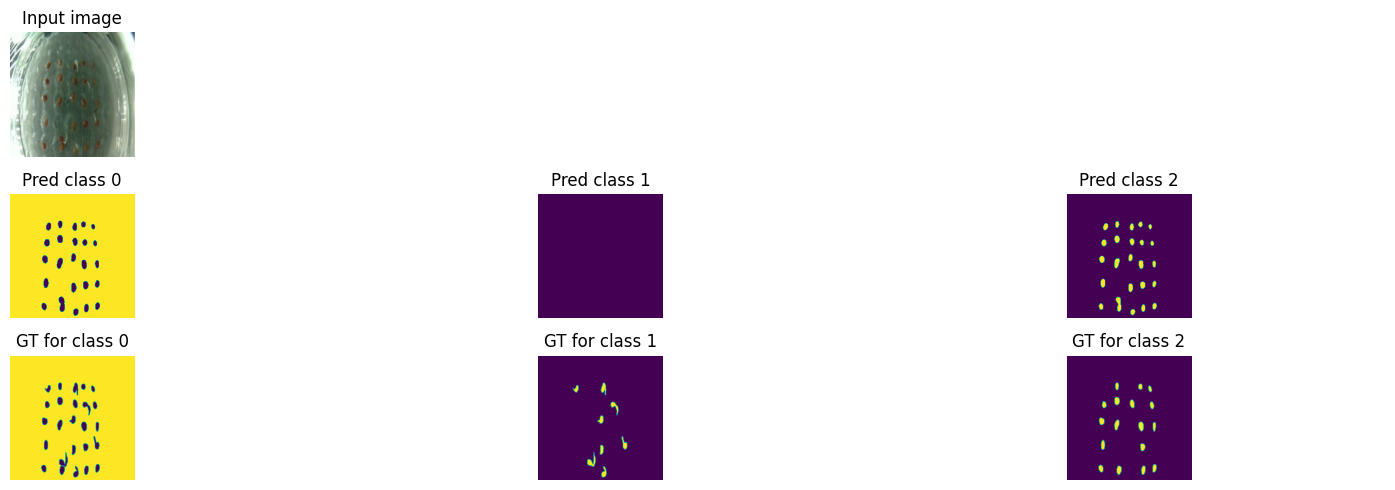

Train loss: 0.30463 | Time: 5m 57s | Val loss: 0.27998
Train_DICE_avg: 0.64454 | Train_Jaccard_avg: 0.59200 | Train_Sensitivity_avg: 0.93921 | Train_Specificity_avg: 0.84165 
Class 0 - Train_DICE: 0.97710 | Train_Jaccard: 0.95537 | Train_Sensitivity: 0.99686 | Train_Specificity: 0.55363 
Class 1 - Train_DICE: 0.27206 | Train_Jaccard: 0.27206 | Train_Sensitivity: 0.96377 | Train_Specificity: 0.98562 
Class 2 - Train_DICE: 0.68447 | Train_Jaccard: 0.54858 | Train_Sensitivity: 0.85699 | Train_Specificity: 0.98570 
Val_DICE_avg: 0.66355 | Val_Jaccard_avg: 0.60859 | Val_Sensitivity_avg: 0.89056 | Val_Specificity_avg: 0.80133 
Class 0 - Val_DICE: 0.98323 | Val_Jaccard: 0.96712 | Val_Sensitivity: 0.99827 | Val_Specificity: 0.43412 
Class 1 - Val_DICE: 0.36749 | Val_Jaccard: 0.36747 | Val_Sensitivity: 0.80002 | Val_Specificity: 0.98831 
Class 2 - Val_DICE: 0.63993 | Val_Jaccard: 0.49117 | Val_Sensitivity: 0.87338 | Val_Specificity: 0.98155 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.27440 | Time: 6m 56s | Val loss: 0.25173
Train_DICE_avg: 0.64607 | Train_Jaccard_avg: 0.59463 | Train_Sensitivity_avg: 0.94666 | Train_Specificity_avg: 0.85477 
Class 0 - Train_DICE: 0.98026 | Train_Jaccard: 0.96141 | Train_Sensitivity: 0.99666 | Train_Specificity: 0.59293 
Class 1 - Train_DICE: 0.27594 | Train_Jaccard: 0.27593 | Train_Sensitivity: 0.97625 | Train_Specificity: 0.98577 
Class 2 - Train_DICE: 0.68201 | Train_Jaccard: 0.54655 | Train_Sensitivity: 0.86706 | Train_Specificity: 0.98561 
Val_DICE_avg: 0.70201 | Val_Jaccard_avg: 0.64793 | Val_Sensitivity_avg: 0.96174 | Val_Specificity_avg: 0.80059 
Class 0 - Val_DICE: 0.98238 | Val_Jaccard: 0.96551 | Val_Sensitivity: 0.99843 | Val_Specificity: 0.43121 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.65540 | Val_Jaccard: 0.51002 | Val_Sensitivity: 0.88678 | Val_Specificity: 0.98223 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.24558 | Time: 7m 55s | Val loss: 0.21933
Train_DICE_avg: 0.65056 | Train_Jaccard_avg: 0.59946 | Train_Sensitivity_avg: 0.95470 | Train_Specificity_avg: 0.86415 
Class 0 - Train_DICE: 0.98287 | Train_Jaccard: 0.96642 | Train_Sensitivity: 0.99655 | Train_Specificity: 0.62149 
Class 1 - Train_DICE: 0.27890 | Train_Jaccard: 0.27890 | Train_Sensitivity: 0.99436 | Train_Specificity: 0.98548 
Class 2 - Train_DICE: 0.68991 | Train_Jaccard: 0.55307 | Train_Sensitivity: 0.87318 | Train_Specificity: 0.98548 
Val_DICE_avg: 0.69672 | Val_Jaccard_avg: 0.64327 | Val_Sensitivity_avg: 0.97135 | Val_Specificity_avg: 0.83061 
Class 0 - Val_DICE: 0.98774 | Val_Jaccard: 0.97591 | Val_Sensitivity: 0.99861 | Val_Specificity: 0.52244 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.63415 | Val_Jaccard: 0.48564 | Val_Sensitivity: 0.91544 | Val_Specificity: 0.98105 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.21901 | Time: 8m 55s | Val loss: 0.19804
Train_DICE_avg: 0.65337 | Train_Jaccard_avg: 0.60321 | Train_Sensitivity_avg: 0.95800 | Train_Specificity_avg: 0.87277 
Class 0 - Train_DICE: 0.98465 | Train_Jaccard: 0.96985 | Train_Sensitivity: 0.99652 | Train_Specificity: 0.64680 
Class 1 - Train_DICE: 0.27319 | Train_Jaccard: 0.27319 | Train_Sensitivity: 0.99718 | Train_Specificity: 0.98566 
Class 2 - Train_DICE: 0.70227 | Train_Jaccard: 0.56659 | Train_Sensitivity: 0.88031 | Train_Specificity: 0.98584 
Val_DICE_avg: 0.71033 | Val_Jaccard_avg: 0.65729 | Val_Sensitivity_avg: 0.97437 | Val_Specificity_avg: 0.81926 
Class 0 - Val_DICE: 0.98628 | Val_Jaccard: 0.97303 | Val_Sensitivity: 0.99896 | Val_Specificity: 0.48734 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.67647 | Val_Jaccard: 0.53057 | Val_Sensitivity: 0.92415 | Val_Specificity: 0.98210 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.19482 | Time: 9m 54s | Val loss: 0.17468
Train_DICE_avg: 0.65617 | Train_Jaccard_avg: 0.60640 | Train_Sensitivity_avg: 0.96040 | Train_Specificity_avg: 0.88057 
Class 0 - Train_DICE: 0.98617 | Train_Jaccard: 0.97278 | Train_Sensitivity: 0.99655 | Train_Specificity: 0.66988 
Class 1 - Train_DICE: 0.27866 | Train_Jaccard: 0.27866 | Train_Sensitivity: 0.99477 | Train_Specificity: 0.98592 
Class 2 - Train_DICE: 0.70367 | Train_Jaccard: 0.56774 | Train_Sensitivity: 0.88989 | Train_Specificity: 0.98592 
Val_DICE_avg: 0.71925 | Val_Jaccard_avg: 0.66732 | Val_Sensitivity_avg: 0.97244 | Val_Specificity_avg: 0.82670 
Class 0 - Val_DICE: 0.98769 | Val_Jaccard: 0.97575 | Val_Sensitivity: 0.99904 | Val_Specificity: 0.50852 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.70180 | Val_Jaccard: 0.55797 | Val_Sensitivity: 0.91830 | Val_Specificity: 0.98323 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


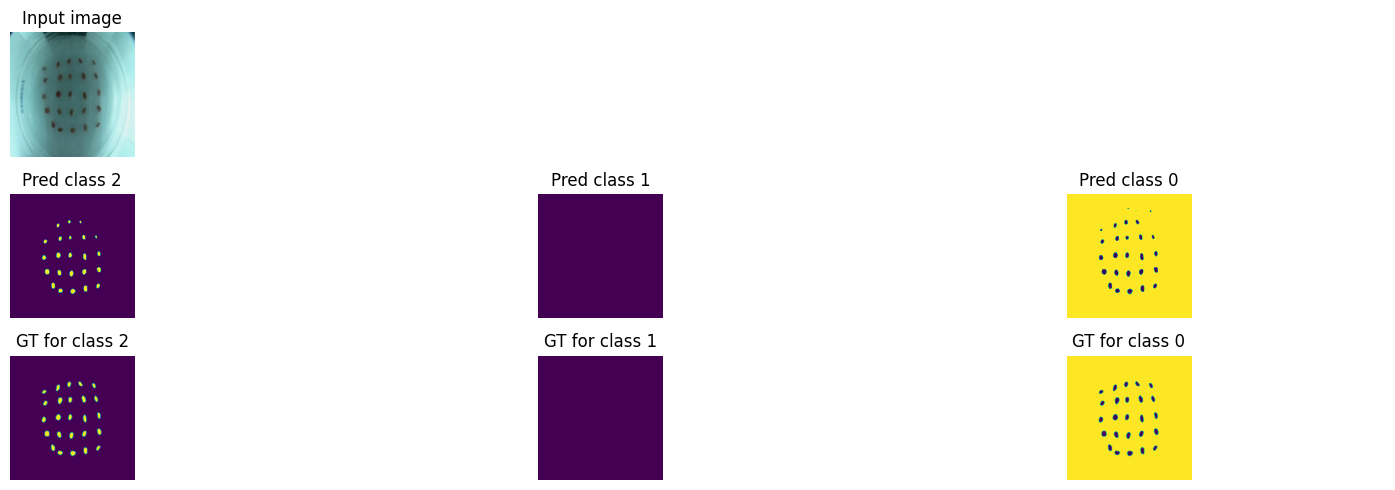

Train loss: 0.17142 | Time: 10m 58s | Val loss: 0.15342
Train_DICE_avg: 0.66072 | Train_Jaccard_avg: 0.61115 | Train_Sensitivity_avg: 0.96157 | Train_Specificity_avg: 0.88535 
Class 0 - Train_DICE: 0.98714 | Train_Jaccard: 0.97467 | Train_Sensitivity: 0.99628 | Train_Specificity: 0.68429 
Class 1 - Train_DICE: 0.28076 | Train_Jaccard: 0.28076 | Train_Sensitivity: 0.99718 | Train_Specificity: 0.98573 
Class 2 - Train_DICE: 0.71427 | Train_Jaccard: 0.57802 | Train_Sensitivity: 0.89124 | Train_Specificity: 0.98602 
Val_DICE_avg: 0.69152 | Val_Jaccard_avg: 0.63824 | Val_Sensitivity_avg: 0.98101 | Val_Specificity_avg: 0.84719 
Class 0 - Val_DICE: 0.99033 | Val_Jaccard: 0.98091 | Val_Sensitivity: 0.99874 | Val_Specificity: 0.57378 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61599 | Val_Jaccard: 0.46555 | Val_Sensitivity: 0.94430 | Val_Specificity: 0.97945 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.14684 | Time: 12m 1s | Val loss: 0.13104
Train_DICE_avg: 0.65800 | Train_Jaccard_avg: 0.60857 | Train_Sensitivity_avg: 0.96696 | Train_Specificity_avg: 0.88827 
Class 0 - Train_DICE: 0.98801 | Train_Jaccard: 0.97635 | Train_Sensitivity: 0.99644 | Train_Specificity: 0.69366 
Class 1 - Train_DICE: 0.27101 | Train_Jaccard: 0.27101 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98556 
Class 2 - Train_DICE: 0.71497 | Train_Jaccard: 0.57833 | Train_Sensitivity: 0.90444 | Train_Specificity: 0.98559 
Val_DICE_avg: 0.68540 | Val_Jaccard_avg: 0.63256 | Val_Sensitivity_avg: 0.98419 | Val_Specificity_avg: 0.84329 
Class 0 - Val_DICE: 0.98994 | Val_Jaccard: 0.98014 | Val_Sensitivity: 0.99914 | Val_Specificity: 0.56269 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.59801 | Val_Jaccard: 0.44930 | Val_Sensitivity: 0.95345 | Val_Specificity: 0.97883 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.12658 | Time: 13m 3s | Val loss: 0.11598
Train_DICE_avg: 0.66437 | Train_Jaccard_avg: 0.61570 | Train_Sensitivity_avg: 0.96903 | Train_Specificity_avg: 0.89372 
Class 0 - Train_DICE: 0.98875 | Train_Jaccard: 0.97781 | Train_Sensitivity: 0.99658 | Train_Specificity: 0.70971 
Class 1 - Train_DICE: 0.28269 | Train_Jaccard: 0.28269 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98561 
Class 2 - Train_DICE: 0.72168 | Train_Jaccard: 0.58660 | Train_Sensitivity: 0.91050 | Train_Specificity: 0.98584 
Val_DICE_avg: 0.70204 | Val_Jaccard_avg: 0.64933 | Val_Sensitivity_avg: 0.98524 | Val_Specificity_avg: 0.82697 
Class 0 - Val_DICE: 0.98642 | Val_Jaccard: 0.97335 | Val_Sensitivity: 0.99899 | Val_Specificity: 0.51176 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.65145 | Val_Jaccard: 0.50638 | Val_Sensitivity: 0.95674 | Val_Specificity: 0.98083 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.11027 | Time: 14m 5s | Val loss: 0.10118
Train_DICE_avg: 0.66847 | Train_Jaccard_avg: 0.62033 | Train_Sensitivity_avg: 0.96856 | Train_Specificity_avg: 0.89873 
Class 0 - Train_DICE: 0.98931 | Train_Jaccard: 0.97889 | Train_Sensitivity: 0.99623 | Train_Specificity: 0.72398 
Class 1 - Train_DICE: 0.27882 | Train_Jaccard: 0.27882 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.73726 | Train_Jaccard: 0.60327 | Train_Sensitivity: 0.90946 | Train_Specificity: 0.98646 
Val_DICE_avg: 0.66207 | Val_Jaccard_avg: 0.61410 | Val_Sensitivity_avg: 0.98961 | Val_Specificity_avg: 0.84496 
Class 0 - Val_DICE: 0.98980 | Val_Jaccard: 0.97990 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.56946 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.52815 | Val_Jaccard: 0.39414 | Val_Sensitivity: 0.96958 | Val_Specificity: 0.97708 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.09596 | Time: 15m 8s | Val loss: 0.08539
Train_DICE_avg: 0.66814 | Train_Jaccard_avg: 0.62095 | Train_Sensitivity_avg: 0.97099 | Train_Specificity_avg: 0.90203 
Class 0 - Train_DICE: 0.98999 | Train_Jaccard: 0.98023 | Train_Sensitivity: 0.99642 | Train_Specificity: 0.73380 
Class 1 - Train_DICE: 0.27496 | Train_Jaccard: 0.27496 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98556 
Class 2 - Train_DICE: 0.73947 | Train_Jaccard: 0.60765 | Train_Sensitivity: 0.91655 | Train_Specificity: 0.98674 
Val_DICE_avg: 0.71195 | Val_Jaccard_avg: 0.66099 | Val_Sensitivity_avg: 0.98406 | Val_Specificity_avg: 0.85380 
Class 0 - Val_DICE: 0.99060 | Val_Jaccard: 0.98147 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.59059 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.67700 | Val_Jaccard: 0.53326 | Val_Sensitivity: 0.95288 | Val_Specificity: 0.98248 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


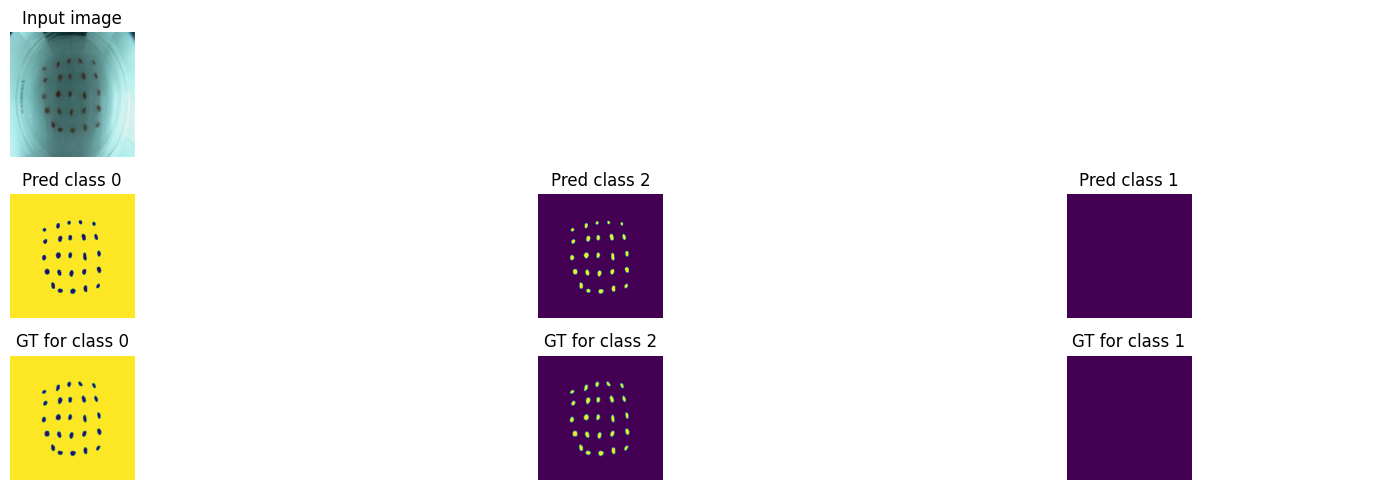

Train loss: 0.08460 | Time: 16m 11s | Val loss: 0.07562
Train_DICE_avg: 0.68647 | Train_Jaccard_avg: 0.63255 | Train_Sensitivity_avg: 0.96374 | Train_Specificity_avg: 0.90228 
Class 0 - Train_DICE: 0.99018 | Train_Jaccard: 0.98059 | Train_Sensitivity: 0.99662 | Train_Specificity: 0.73393 
Class 1 - Train_DICE: 0.32487 | Train_Jaccard: 0.30441 | Train_Sensitivity: 0.97370 | Train_Specificity: 0.98629 
Class 2 - Train_DICE: 0.74435 | Train_Jaccard: 0.61265 | Train_Sensitivity: 0.92090 | Train_Specificity: 0.98663 
Val_DICE_avg: 0.72033 | Val_Jaccard_avg: 0.65710 | Val_Sensitivity_avg: 0.96611 | Val_Specificity_avg: 0.85076 
Class 0 - Val_DICE: 0.99082 | Val_Jaccard: 0.98185 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.58105 
Class 1 - Val_DICE: 0.51394 | Val_Jaccard: 0.48220 | Val_Sensitivity: 0.93103 | Val_Specificity: 0.99052 
Class 2 - Val_DICE: 0.65624 | Val_Jaccard: 0.50723 | Val_Sensitivity: 0.96798 | Val_Specificity: 0.98072 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train loss: 0.07539 | Time: 17m 14s | Val loss: 0.06699
Train_DICE_avg: 0.69675 | Train_Jaccard_avg: 0.64080 | Train_Sensitivity_avg: 0.95903 | Train_Specificity_avg: 0.90630 
Class 0 - Train_DICE: 0.99056 | Train_Jaccard: 0.98134 | Train_Sensitivity: 0.99642 | Train_Specificity: 0.74459 
Class 1 - Train_DICE: 0.34488 | Train_Jaccard: 0.31631 | Train_Sensitivity: 0.96066 | Train_Specificity: 0.98704 
Class 2 - Train_DICE: 0.75480 | Train_Jaccard: 0.62475 | Train_Sensitivity: 0.92000 | Train_Specificity: 0.98727 
Val_DICE_avg: 0.74144 | Val_Jaccard_avg: 0.68033 | Val_Sensitivity_avg: 0.97685 | Val_Specificity_avg: 0.85996 
Class 0 - Val_DICE: 0.99148 | Val_Jaccard: 0.98316 | Val_Sensitivity: 0.99911 | Val_Specificity: 0.60689 
Class 1 - Val_DICE: 0.54333 | Val_Jaccard: 0.51399 | Val_Sensitivity: 0.97814 | Val_Specificity: 0.99018 
Class 2 - Val_DICE: 0.68950 | Val_Jaccard: 0.54383 | Val_Sensitivity: 0.95329 | Val_Specificity: 0.98282 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.06831 | Time: 18m 17s | Val loss: 0.06061
Train_DICE_avg: 0.69441 | Train_Jaccard_avg: 0.63780 | Train_Sensitivity_avg: 0.96227 | Train_Specificity_avg: 0.90421 
Class 0 - Train_DICE: 0.99070 | Train_Jaccard: 0.98160 | Train_Sensitivity: 0.99657 | Train_Specificity: 0.73920 
Class 1 - Train_DICE: 0.34050 | Train_Jaccard: 0.31023 | Train_Sensitivity: 0.96543 | Train_Specificity: 0.98647 
Class 2 - Train_DICE: 0.75202 | Train_Jaccard: 0.62157 | Train_Sensitivity: 0.92480 | Train_Specificity: 0.98696 
Val_DICE_avg: 0.75347 | Val_Jaccard_avg: 0.68886 | Val_Sensitivity_avg: 0.97798 | Val_Specificity_avg: 0.85615 
Class 0 - Val_DICE: 0.99159 | Val_Jaccard: 0.98336 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.59508 
Class 1 - Val_DICE: 0.57047 | Val_Jaccard: 0.53093 | Val_Sensitivity: 0.96912 | Val_Specificity: 0.99073 
Class 2 - Val_DICE: 0.69835 | Val_Jaccard: 0.55230 | Val_Sensitivity: 0.96563 | Val_Specificity: 0.98263 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.06206 | Time: 19m 21s | Val loss: 0.05487
Train_DICE_avg: 0.71224 | Train_Jaccard_avg: 0.65282 | Train_Sensitivity_avg: 0.96004 | Train_Specificity_avg: 0.90690 
Class 0 - Train_DICE: 0.99098 | Train_Jaccard: 0.98216 | Train_Sensitivity: 0.99658 | Train_Specificity: 0.74614 
Class 1 - Train_DICE: 0.38367 | Train_Jaccard: 0.34322 | Train_Sensitivity: 0.95755 | Train_Specificity: 0.98715 
Class 2 - Train_DICE: 0.76208 | Train_Jaccard: 0.63307 | Train_Sensitivity: 0.92597 | Train_Specificity: 0.98740 
Val_DICE_avg: 0.76982 | Val_Jaccard_avg: 0.70107 | Val_Sensitivity_avg: 0.97502 | Val_Specificity_avg: 0.85796 
Class 0 - Val_DICE: 0.99143 | Val_Jaccard: 0.98307 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.59967 
Class 1 - Val_DICE: 0.62447 | Val_Jaccard: 0.57327 | Val_Sensitivity: 0.95930 | Val_Specificity: 0.99185 
Class 2 - Val_DICE: 0.69357 | Val_Jaccard: 0.54687 | Val_Sensitivity: 0.96642 | Val_Specificity: 0.98237 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.05672 | Time: 20m 24s | Val loss: 0.04941
Train_DICE_avg: 0.72327 | Train_Jaccard_avg: 0.66192 | Train_Sensitivity_avg: 0.95804 | Train_Specificity_avg: 0.90974 
Class 0 - Train_DICE: 0.99119 | Train_Jaccard: 0.98256 | Train_Sensitivity: 0.99660 | Train_Specificity: 0.75398 
Class 1 - Train_DICE: 0.41145 | Train_Jaccard: 0.36388 | Train_Sensitivity: 0.94707 | Train_Specificity: 0.98770 
Class 2 - Train_DICE: 0.76717 | Train_Jaccard: 0.63931 | Train_Sensitivity: 0.93044 | Train_Specificity: 0.98755 
Val_DICE_avg: 0.78168 | Val_Jaccard_avg: 0.71498 | Val_Sensitivity_avg: 0.97471 | Val_Specificity_avg: 0.85619 
Class 0 - Val_DICE: 0.99125 | Val_Jaccard: 0.98270 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.59224 
Class 1 - Val_DICE: 0.62508 | Val_Jaccard: 0.57431 | Val_Sensitivity: 0.96142 | Val_Specificity: 0.99191 
Class 2 - Val_DICE: 0.72870 | Val_Jaccard: 0.58792 | Val_Sensitivity: 0.96343 | Val_Specificity: 0.98442 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


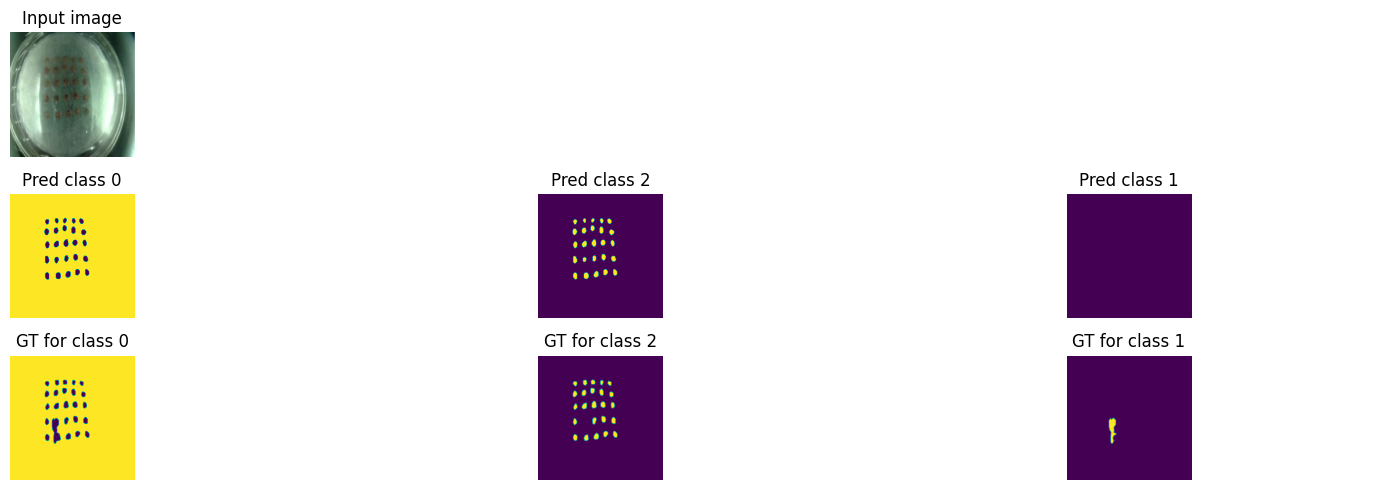

Train loss: 0.05128 | Time: 21m 28s | Val loss: 0.04303
Train_DICE_avg: 0.72673 | Train_Jaccard_avg: 0.66490 | Train_Sensitivity_avg: 0.95477 | Train_Specificity_avg: 0.91136 
Class 0 - Train_DICE: 0.99128 | Train_Jaccard: 0.98275 | Train_Sensitivity: 0.99660 | Train_Specificity: 0.75860 
Class 1 - Train_DICE: 0.42172 | Train_Jaccard: 0.37212 | Train_Sensitivity: 0.94046 | Train_Specificity: 0.98786 
Class 2 - Train_DICE: 0.76719 | Train_Jaccard: 0.63984 | Train_Sensitivity: 0.92725 | Train_Specificity: 0.98761 
Val_DICE_avg: 0.78445 | Val_Jaccard_avg: 0.71705 | Val_Sensitivity_avg: 0.97040 | Val_Specificity_avg: 0.85773 
Class 0 - Val_DICE: 0.99146 | Val_Jaccard: 0.98310 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.59678 
Class 1 - Val_DICE: 0.62774 | Val_Jaccard: 0.57547 | Val_Sensitivity: 0.95557 | Val_Specificity: 0.99201 
Class 2 - Val_DICE: 0.73415 | Val_Jaccard: 0.59256 | Val_Sensitivity: 0.95633 | Val_Specificity: 0.98440 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.04483 | Time: 22m 31s | Val loss: 0.03716
Train_DICE_avg: 0.74399 | Train_Jaccard_avg: 0.67946 | Train_Sensitivity_avg: 0.94644 | Train_Specificity_avg: 0.91376 
Class 0 - Train_DICE: 0.99158 | Train_Jaccard: 0.98333 | Train_Sensitivity: 0.99653 | Train_Specificity: 0.76450 
Class 1 - Train_DICE: 0.46448 | Train_Jaccard: 0.40514 | Train_Sensitivity: 0.91405 | Train_Specificity: 0.98879 
Class 2 - Train_DICE: 0.77592 | Train_Jaccard: 0.64991 | Train_Sensitivity: 0.92874 | Train_Specificity: 0.98801 
Val_DICE_avg: 0.79240 | Val_Jaccard_avg: 0.72305 | Val_Sensitivity_avg: 0.97053 | Val_Specificity_avg: 0.86192 
Class 0 - Val_DICE: 0.99188 | Val_Jaccard: 0.98393 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.60876 
Class 1 - Val_DICE: 0.65681 | Val_Jaccard: 0.59873 | Val_Sensitivity: 0.95244 | Val_Specificity: 0.99270 
Class 2 - Val_DICE: 0.72850 | Val_Jaccard: 0.58649 | Val_Sensitivity: 0.95993 | Val_Specificity: 0.98430 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.04024 | Time: 23m 34s | Val loss: 0.03608
Train_DICE_avg: 0.74596 | Train_Jaccard_avg: 0.68085 | Train_Sensitivity_avg: 0.94360 | Train_Specificity_avg: 0.91228 
Class 0 - Train_DICE: 0.99161 | Train_Jaccard: 0.98339 | Train_Sensitivity: 0.99670 | Train_Specificity: 0.75994 
Class 1 - Train_DICE: 0.46817 | Train_Jaccard: 0.40640 | Train_Sensitivity: 0.90271 | Train_Specificity: 0.98882 
Class 2 - Train_DICE: 0.77809 | Train_Jaccard: 0.65276 | Train_Sensitivity: 0.93140 | Train_Specificity: 0.98807 
Val_DICE_avg: 0.77438 | Val_Jaccard_avg: 0.70322 | Val_Sensitivity_avg: 0.93590 | Val_Specificity_avg: 0.84911 
Class 0 - Val_DICE: 0.99050 | Val_Jaccard: 0.98122 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.56967 
Class 1 - Val_DICE: 0.59043 | Val_Jaccard: 0.52704 | Val_Sensitivity: 0.84074 | Val_Specificity: 0.99317 
Class 2 - Val_DICE: 0.74222 | Val_Jaccard: 0.60140 | Val_Sensitivity: 0.96769 | Val_Specificity: 0.98447 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.03683 | Time: 24m 36s | Val loss: 0.03535
Train_DICE_avg: 0.75051 | Train_Jaccard_avg: 0.68496 | Train_Sensitivity_avg: 0.93947 | Train_Specificity_avg: 0.91361 
Class 0 - Train_DICE: 0.99173 | Train_Jaccard: 0.98362 | Train_Sensitivity: 0.99662 | Train_Specificity: 0.76356 
Class 1 - Train_DICE: 0.48095 | Train_Jaccard: 0.41713 | Train_Sensitivity: 0.89134 | Train_Specificity: 0.98918 
Class 2 - Train_DICE: 0.77884 | Train_Jaccard: 0.65414 | Train_Sensitivity: 0.93045 | Train_Specificity: 0.98810 
Val_DICE_avg: 0.78395 | Val_Jaccard_avg: 0.71175 | Val_Sensitivity_avg: 0.96388 | Val_Specificity_avg: 0.84666 
Class 0 - Val_DICE: 0.98903 | Val_Jaccard: 0.97842 | Val_Sensitivity: 0.99923 | Val_Specificity: 0.56382 
Class 1 - Val_DICE: 0.65520 | Val_Jaccard: 0.59387 | Val_Sensitivity: 0.94475 | Val_Specificity: 0.99259 
Class 2 - Val_DICE: 0.70760 | Val_Jaccard: 0.56296 | Val_Sensitivity: 0.94766 | Val_Specificity: 0.98357 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.03424 | Time: 25m 40s | Val loss: 0.02878
Train_DICE_avg: 0.75238 | Train_Jaccard_avg: 0.68698 | Train_Sensitivity_avg: 0.93926 | Train_Specificity_avg: 0.91651 
Class 0 - Train_DICE: 0.99186 | Train_Jaccard: 0.98389 | Train_Sensitivity: 0.99658 | Train_Specificity: 0.77194 
Class 1 - Train_DICE: 0.48080 | Train_Jaccard: 0.41618 | Train_Sensitivity: 0.89019 | Train_Specificity: 0.98930 
Class 2 - Train_DICE: 0.78449 | Train_Jaccard: 0.66086 | Train_Sensitivity: 0.93103 | Train_Specificity: 0.98830 
Val_DICE_avg: 0.79566 | Val_Jaccard_avg: 0.72342 | Val_Sensitivity_avg: 0.96036 | Val_Specificity_avg: 0.86251 
Class 0 - Val_DICE: 0.99157 | Val_Jaccard: 0.98334 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61014 
Class 1 - Val_DICE: 0.68727 | Val_Jaccard: 0.62343 | Val_Sensitivity: 0.90424 | Val_Specificity: 0.99421 
Class 2 - Val_DICE: 0.70815 | Val_Jaccard: 0.56350 | Val_Sensitivity: 0.97748 | Val_Specificity: 0.98319 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


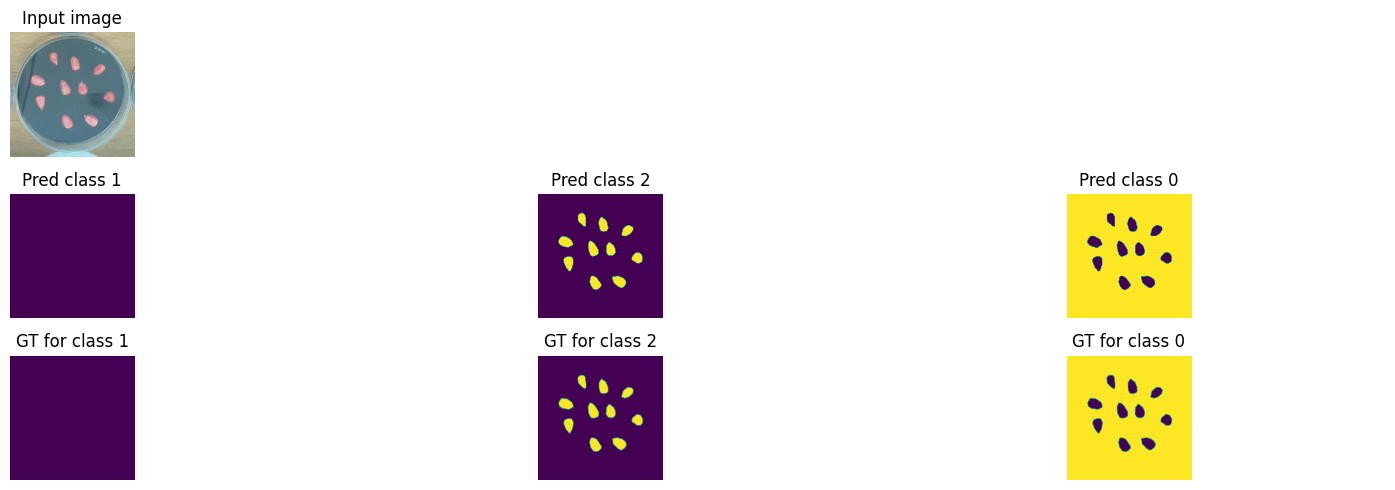

Train loss: 0.03169 | Time: 26m 43s | Val loss: 0.03613
Train_DICE_avg: 0.75875 | Train_Jaccard_avg: 0.69304 | Train_Sensitivity_avg: 0.94189 | Train_Specificity_avg: 0.91284 
Class 0 - Train_DICE: 0.99185 | Train_Jaccard: 0.98387 | Train_Sensitivity: 0.99684 | Train_Specificity: 0.76061 
Class 1 - Train_DICE: 0.49715 | Train_Jaccard: 0.43090 | Train_Sensitivity: 0.89681 | Train_Specificity: 0.98947 
Class 2 - Train_DICE: 0.78725 | Train_Jaccard: 0.66436 | Train_Sensitivity: 0.93204 | Train_Specificity: 0.98843 
Val_DICE_avg: 0.80027 | Val_Jaccard_avg: 0.72704 | Val_Sensitivity_avg: 0.96873 | Val_Specificity_avg: 0.83958 
Class 0 - Val_DICE: 0.98595 | Val_Jaccard: 0.97260 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.54161 
Class 1 - Val_DICE: 0.69442 | Val_Jaccard: 0.63299 | Val_Sensitivity: 0.94089 | Val_Specificity: 0.99349 
Class 2 - Val_DICE: 0.72043 | Val_Jaccard: 0.57553 | Val_Sensitivity: 0.96597 | Val_Specificity: 0.98365 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train loss: 0.03028 | Time: 27m 46s | Val loss: 0.02684
Train_DICE_avg: 0.75839 | Train_Jaccard_avg: 0.69294 | Train_Sensitivity_avg: 0.93909 | Train_Specificity_avg: 0.91646 
Class 0 - Train_DICE: 0.99195 | Train_Jaccard: 0.98407 | Train_Sensitivity: 0.99664 | Train_Specificity: 0.77104 
Class 1 - Train_DICE: 0.49557 | Train_Jaccard: 0.42960 | Train_Sensitivity: 0.88852 | Train_Specificity: 0.98978 
Class 2 - Train_DICE: 0.78763 | Train_Jaccard: 0.66514 | Train_Sensitivity: 0.93210 | Train_Specificity: 0.98857 
Val_DICE_avg: 0.79958 | Val_Jaccard_avg: 0.72883 | Val_Sensitivity_avg: 0.95605 | Val_Specificity_avg: 0.84969 
Class 0 - Val_DICE: 0.99029 | Val_Jaccard: 0.98083 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.57033 
Class 1 - Val_DICE: 0.66240 | Val_Jaccard: 0.59777 | Val_Sensitivity: 0.89823 | Val_Specificity: 0.99384 
Class 2 - Val_DICE: 0.74604 | Val_Jaccard: 0.60788 | Val_Sensitivity: 0.97055 | Val_Specificity: 0.98491 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.02868 | Time: 28m 49s | Val loss: 0.02342
Train_DICE_avg: 0.75932 | Train_Jaccard_avg: 0.69365 | Train_Sensitivity_avg: 0.93960 | Train_Specificity_avg: 0.91808 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98447 | Train_Sensitivity: 0.99683 | Train_Specificity: 0.77613 
Class 1 - Train_DICE: 0.49572 | Train_Jaccard: 0.42862 | Train_Sensitivity: 0.88943 | Train_Specificity: 0.98959 
Class 2 - Train_DICE: 0.79009 | Train_Jaccard: 0.66786 | Train_Sensitivity: 0.93254 | Train_Specificity: 0.98852 
Val_DICE_avg: 0.81103 | Val_Jaccard_avg: 0.74117 | Val_Sensitivity_avg: 0.96823 | Val_Specificity_avg: 0.86316 
Class 0 - Val_DICE: 0.99184 | Val_Jaccard: 0.98386 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61059 
Class 1 - Val_DICE: 0.69899 | Val_Jaccard: 0.63469 | Val_Sensitivity: 0.93384 | Val_Specificity: 0.99373 
Class 2 - Val_DICE: 0.74226 | Val_Jaccard: 0.60496 | Val_Sensitivity: 0.97151 | Val_Specificity: 0.98516 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.02720 | Time: 29m 51s | Val loss: 0.02244
Train_DICE_avg: 0.76525 | Train_Jaccard_avg: 0.69935 | Train_Sensitivity_avg: 0.94471 | Train_Specificity_avg: 0.91518 
Class 0 - Train_DICE: 0.99220 | Train_Jaccard: 0.98454 | Train_Sensitivity: 0.99701 | Train_Specificity: 0.76730 
Class 1 - Train_DICE: 0.51090 | Train_Jaccard: 0.44245 | Train_Sensitivity: 0.90083 | Train_Specificity: 0.98964 
Class 2 - Train_DICE: 0.79265 | Train_Jaccard: 0.67105 | Train_Sensitivity: 0.93628 | Train_Specificity: 0.98860 
Val_DICE_avg: 0.80949 | Val_Jaccard_avg: 0.73957 | Val_Sensitivity_avg: 0.95996 | Val_Specificity_avg: 0.86377 
Class 0 - Val_DICE: 0.99190 | Val_Jaccard: 0.98398 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.61242 
Class 1 - Val_DICE: 0.69043 | Val_Jaccard: 0.62709 | Val_Sensitivity: 0.91178 | Val_Specificity: 0.99395 
Class 2 - Val_DICE: 0.74613 | Val_Jaccard: 0.60764 | Val_Sensitivity: 0.96870 | Val_Specificity: 0.98493 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.02606 | Time: 30m 54s | Val loss: 0.02190
Train_DICE_avg: 0.76953 | Train_Jaccard_avg: 0.70440 | Train_Sensitivity_avg: 0.94536 | Train_Specificity_avg: 0.91930 
Class 0 - Train_DICE: 0.99233 | Train_Jaccard: 0.98480 | Train_Sensitivity: 0.99694 | Train_Specificity: 0.77897 
Class 1 - Train_DICE: 0.51821 | Train_Jaccard: 0.44993 | Train_Sensitivity: 0.90290 | Train_Specificity: 0.98993 
Class 2 - Train_DICE: 0.79805 | Train_Jaccard: 0.67849 | Train_Sensitivity: 0.93624 | Train_Specificity: 0.98899 
Val_DICE_avg: 0.78985 | Val_Jaccard_avg: 0.71670 | Val_Sensitivity_avg: 0.94733 | Val_Specificity_avg: 0.86578 
Class 0 - Val_DICE: 0.99235 | Val_Jaccard: 0.98486 | Val_Sensitivity: 0.99928 | Val_Specificity: 0.61983 
Class 1 - Val_DICE: 0.65624 | Val_Jaccard: 0.58552 | Val_Sensitivity: 0.86306 | Val_Specificity: 0.99382 
Class 2 - Val_DICE: 0.72095 | Val_Jaccard: 0.57972 | Val_Sensitivity: 0.97966 | Val_Specificity: 0.98370 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


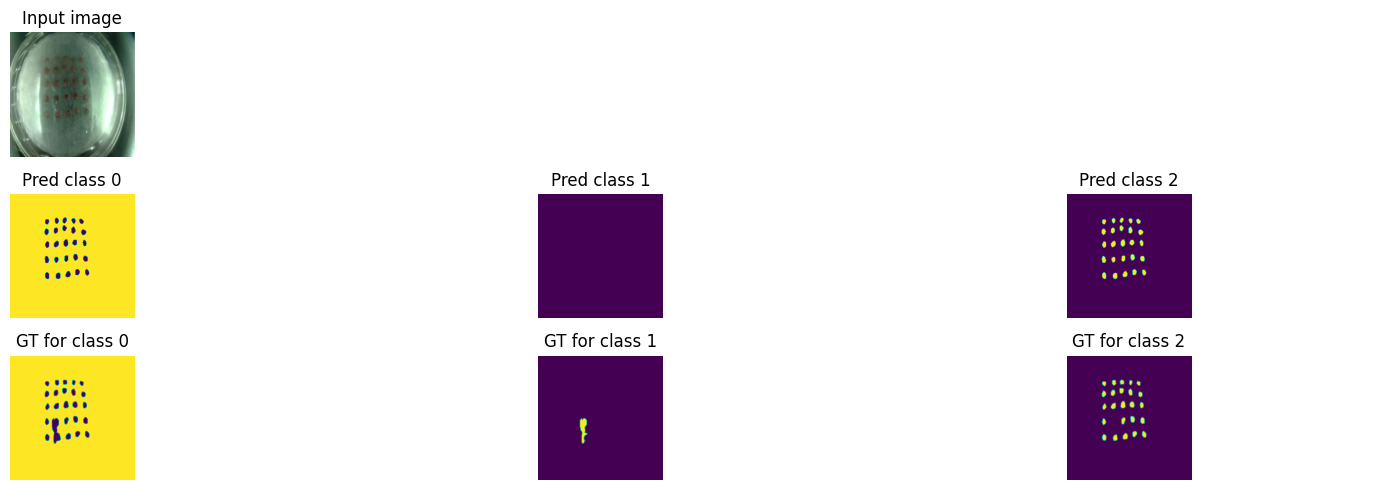

Train loss: 0.02544 | Time: 31m 58s | Val loss: 0.02078
Train_DICE_avg: 0.76749 | Train_Jaccard_avg: 0.70193 | Train_Sensitivity_avg: 0.94103 | Train_Specificity_avg: 0.91907 
Class 0 - Train_DICE: 0.99229 | Train_Jaccard: 0.98474 | Train_Sensitivity: 0.99692 | Train_Specificity: 0.77825 
Class 1 - Train_DICE: 0.51320 | Train_Jaccard: 0.44385 | Train_Sensitivity: 0.89225 | Train_Specificity: 0.98994 
Class 2 - Train_DICE: 0.79697 | Train_Jaccard: 0.67719 | Train_Sensitivity: 0.93394 | Train_Specificity: 0.98903 
Val_DICE_avg: 0.81141 | Val_Jaccard_avg: 0.73978 | Val_Sensitivity_avg: 0.96740 | Val_Specificity_avg: 0.86768 
Class 0 - Val_DICE: 0.99253 | Val_Jaccard: 0.98520 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62488 
Class 1 - Val_DICE: 0.70202 | Val_Jaccard: 0.63555 | Val_Sensitivity: 0.93581 | Val_Specificity: 0.99367 
Class 2 - Val_DICE: 0.73968 | Val_Jaccard: 0.59857 | Val_Sensitivity: 0.96705 | Val_Specificity: 0.98448 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.02399 | Time: 33m 2s | Val loss: 0.01937
Train_DICE_avg: 0.77005 | Train_Jaccard_avg: 0.70494 | Train_Sensitivity_avg: 0.94265 | Train_Specificity_avg: 0.91860 
Class 0 - Train_DICE: 0.99237 | Train_Jaccard: 0.98489 | Train_Sensitivity: 0.99689 | Train_Specificity: 0.77654 
Class 1 - Train_DICE: 0.52159 | Train_Jaccard: 0.45229 | Train_Sensitivity: 0.89538 | Train_Specificity: 0.99018 
Class 2 - Train_DICE: 0.79620 | Train_Jaccard: 0.67762 | Train_Sensitivity: 0.93569 | Train_Specificity: 0.98908 
Val_DICE_avg: 0.81859 | Val_Jaccard_avg: 0.74822 | Val_Sensitivity_avg: 0.96470 | Val_Specificity_avg: 0.86150 
Class 0 - Val_DICE: 0.99174 | Val_Jaccard: 0.98366 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60488 
Class 1 - Val_DICE: 0.70545 | Val_Jaccard: 0.63755 | Val_Sensitivity: 0.92283 | Val_Specificity: 0.99396 
Class 2 - Val_DICE: 0.75859 | Val_Jaccard: 0.62344 | Val_Sensitivity: 0.97188 | Val_Specificity: 0.98565 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.02292 | Time: 34m 5s | Val loss: 0.01861
Train_DICE_avg: 0.78001 | Train_Jaccard_avg: 0.71449 | Train_Sensitivity_avg: 0.94757 | Train_Specificity_avg: 0.91843 
Class 0 - Train_DICE: 0.99228 | Train_Jaccard: 0.98470 | Train_Sensitivity: 0.99703 | Train_Specificity: 0.77594 
Class 1 - Train_DICE: 0.54467 | Train_Jaccard: 0.47352 | Train_Sensitivity: 0.90650 | Train_Specificity: 0.99022 
Class 2 - Train_DICE: 0.80308 | Train_Jaccard: 0.68526 | Train_Sensitivity: 0.93917 | Train_Specificity: 0.98912 
Val_DICE_avg: 0.81640 | Val_Jaccard_avg: 0.74526 | Val_Sensitivity_avg: 0.96251 | Val_Specificity_avg: 0.86384 
Class 0 - Val_DICE: 0.99194 | Val_Jaccard: 0.98404 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.61234 
Class 1 - Val_DICE: 0.70617 | Val_Jaccard: 0.63807 | Val_Sensitivity: 0.91347 | Val_Specificity: 0.99421 
Class 2 - Val_DICE: 0.75111 | Val_Jaccard: 0.61368 | Val_Sensitivity: 0.97467 | Val_Specificity: 0.98497 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.02187 | Time: 35m 8s | Val loss: 0.01862
Train_DICE_avg: 0.78052 | Train_Jaccard_avg: 0.71522 | Train_Sensitivity_avg: 0.94544 | Train_Specificity_avg: 0.91931 
Class 0 - Train_DICE: 0.99256 | Train_Jaccard: 0.98526 | Train_Sensitivity: 0.99715 | Train_Specificity: 0.77799 
Class 1 - Train_DICE: 0.54335 | Train_Jaccard: 0.47190 | Train_Sensitivity: 0.90080 | Train_Specificity: 0.99064 
Class 2 - Train_DICE: 0.80566 | Train_Jaccard: 0.68850 | Train_Sensitivity: 0.93838 | Train_Specificity: 0.98930 
Val_DICE_avg: 0.82341 | Val_Jaccard_avg: 0.75062 | Val_Sensitivity_avg: 0.96573 | Val_Specificity_avg: 0.86231 
Class 0 - Val_DICE: 0.99178 | Val_Jaccard: 0.98374 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60768 
Class 1 - Val_DICE: 0.74274 | Val_Jaccard: 0.67171 | Val_Sensitivity: 0.91860 | Val_Specificity: 0.99478 
Class 2 - Val_DICE: 0.73570 | Val_Jaccard: 0.59641 | Val_Sensitivity: 0.97911 | Val_Specificity: 0.98446 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.02136 | Time: 36m 12s | Val loss: 0.01789
Train_DICE_avg: 0.77750 | Train_Jaccard_avg: 0.71227 | Train_Sensitivity_avg: 0.94715 | Train_Specificity_avg: 0.91873 
Class 0 - Train_DICE: 0.99264 | Train_Jaccard: 0.98541 | Train_Sensitivity: 0.99728 | Train_Specificity: 0.77676 
Class 1 - Train_DICE: 0.53480 | Train_Jaccard: 0.46369 | Train_Sensitivity: 0.90391 | Train_Specificity: 0.99024 
Class 2 - Train_DICE: 0.80506 | Train_Jaccard: 0.68770 | Train_Sensitivity: 0.94025 | Train_Specificity: 0.98918 
Val_DICE_avg: 0.81990 | Val_Jaccard_avg: 0.75050 | Val_Sensitivity_avg: 0.96547 | Val_Specificity_avg: 0.86323 
Class 0 - Val_DICE: 0.99161 | Val_Jaccard: 0.98340 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.60957 
Class 1 - Val_DICE: 0.70919 | Val_Jaccard: 0.64320 | Val_Sensitivity: 0.92357 | Val_Specificity: 0.99424 
Class 2 - Val_DICE: 0.75890 | Val_Jaccard: 0.62488 | Val_Sensitivity: 0.97342 | Val_Specificity: 0.98588 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


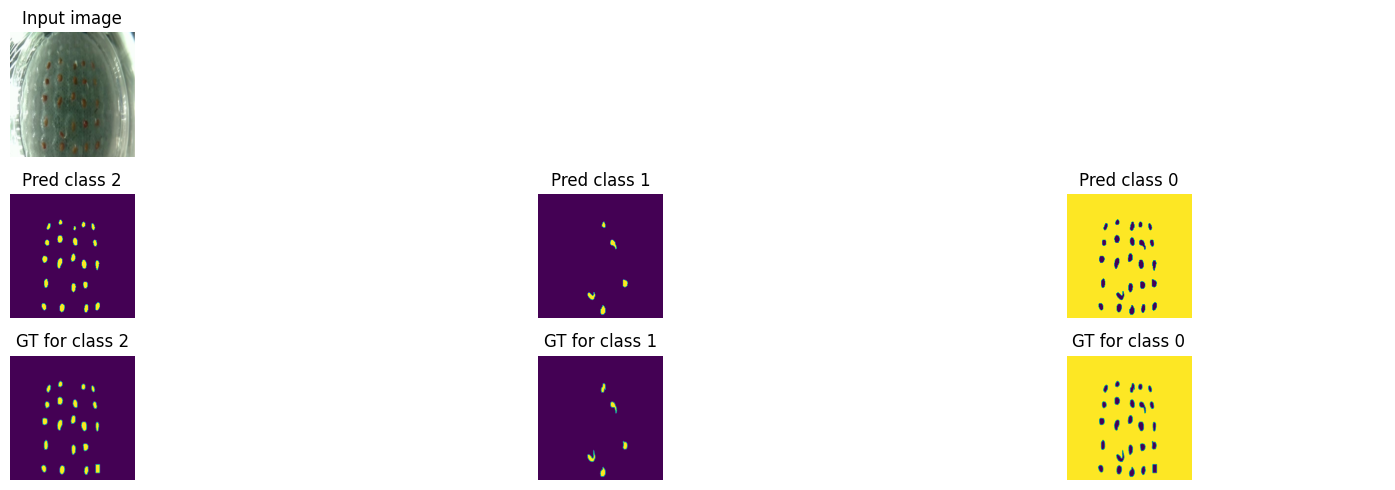

Train loss: 0.02096 | Time: 37m 15s | Val loss: 0.01820
Train_DICE_avg: 0.77981 | Train_Jaccard_avg: 0.71495 | Train_Sensitivity_avg: 0.94766 | Train_Specificity_avg: 0.91871 
Class 0 - Train_DICE: 0.99264 | Train_Jaccard: 0.98542 | Train_Sensitivity: 0.99733 | Train_Specificity: 0.77683 
Class 1 - Train_DICE: 0.54082 | Train_Jaccard: 0.47037 | Train_Sensitivity: 0.90325 | Train_Specificity: 0.99010 
Class 2 - Train_DICE: 0.80596 | Train_Jaccard: 0.68905 | Train_Sensitivity: 0.94239 | Train_Specificity: 0.98920 
Val_DICE_avg: 0.81742 | Val_Jaccard_avg: 0.74568 | Val_Sensitivity_avg: 0.96572 | Val_Specificity_avg: 0.86118 
Class 0 - Val_DICE: 0.99148 | Val_Jaccard: 0.98315 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.60413 
Class 1 - Val_DICE: 0.71762 | Val_Jaccard: 0.64753 | Val_Sensitivity: 0.92089 | Val_Specificity: 0.99418 
Class 2 - Val_DICE: 0.74314 | Val_Jaccard: 0.60634 | Val_Sensitivity: 0.97688 | Val_Specificity: 0.98522 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.02065 | Time: 38m 19s | Val loss: 0.01719
Train_DICE_avg: 0.78439 | Train_Jaccard_avg: 0.71899 | Train_Sensitivity_avg: 0.94838 | Train_Specificity_avg: 0.91664 
Class 0 - Train_DICE: 0.99248 | Train_Jaccard: 0.98510 | Train_Sensitivity: 0.99735 | Train_Specificity: 0.77044 
Class 1 - Train_DICE: 0.55454 | Train_Jaccard: 0.48282 | Train_Sensitivity: 0.90463 | Train_Specificity: 0.99034 
Class 2 - Train_DICE: 0.80617 | Train_Jaccard: 0.68905 | Train_Sensitivity: 0.94315 | Train_Specificity: 0.98914 
Val_DICE_avg: 0.81975 | Val_Jaccard_avg: 0.74844 | Val_Sensitivity_avg: 0.96461 | Val_Specificity_avg: 0.86561 
Class 0 - Val_DICE: 0.99202 | Val_Jaccard: 0.98420 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.61729 
Class 1 - Val_DICE: 0.72418 | Val_Jaccard: 0.65452 | Val_Sensitivity: 0.91613 | Val_Specificity: 0.99429 
Class 2 - Val_DICE: 0.74305 | Val_Jaccard: 0.60660 | Val_Sensitivity: 0.97831 | Val_Specificity: 0.98525 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.02018 | Time: 39m 23s | Val loss: 0.01699
Train_DICE_avg: 0.78674 | Train_Jaccard_avg: 0.72186 | Train_Sensitivity_avg: 0.95055 | Train_Specificity_avg: 0.91942 
Class 0 - Train_DICE: 0.99273 | Train_Jaccard: 0.98559 | Train_Sensitivity: 0.99734 | Train_Specificity: 0.77838 
Class 1 - Train_DICE: 0.55744 | Train_Jaccard: 0.48572 | Train_Sensitivity: 0.91060 | Train_Specificity: 0.99043 
Class 2 - Train_DICE: 0.81006 | Train_Jaccard: 0.69426 | Train_Sensitivity: 0.94372 | Train_Specificity: 0.98946 
Val_DICE_avg: 0.82641 | Val_Jaccard_avg: 0.75625 | Val_Sensitivity_avg: 0.96581 | Val_Specificity_avg: 0.85899 
Class 0 - Val_DICE: 0.99157 | Val_Jaccard: 0.98332 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.59668 
Class 1 - Val_DICE: 0.72609 | Val_Jaccard: 0.65658 | Val_Sensitivity: 0.92139 | Val_Specificity: 0.99432 
Class 2 - Val_DICE: 0.76157 | Val_Jaccard: 0.62885 | Val_Sensitivity: 0.97657 | Val_Specificity: 0.98595 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.01999 | Time: 40m 26s | Val loss: 0.01687
Train_DICE_avg: 0.78734 | Train_Jaccard_avg: 0.72280 | Train_Sensitivity_avg: 0.95066 | Train_Specificity_avg: 0.92021 
Class 0 - Train_DICE: 0.99271 | Train_Jaccard: 0.98556 | Train_Sensitivity: 0.99737 | Train_Specificity: 0.78046 
Class 1 - Train_DICE: 0.55960 | Train_Jaccard: 0.48827 | Train_Sensitivity: 0.91151 | Train_Specificity: 0.99062 
Class 2 - Train_DICE: 0.80970 | Train_Jaccard: 0.69458 | Train_Sensitivity: 0.94309 | Train_Specificity: 0.98955 
Val_DICE_avg: 0.83207 | Val_Jaccard_avg: 0.76176 | Val_Sensitivity_avg: 0.96446 | Val_Specificity_avg: 0.85842 
Class 0 - Val_DICE: 0.99141 | Val_Jaccard: 0.98300 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.59444 
Class 1 - Val_DICE: 0.74342 | Val_Jaccard: 0.67269 | Val_Sensitivity: 0.91538 | Val_Specificity: 0.99481 
Class 2 - Val_DICE: 0.76139 | Val_Jaccard: 0.62960 | Val_Sensitivity: 0.97853 | Val_Specificity: 0.98600 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.01955 | Time: 41m 30s | Val loss: 0.01634
Train_DICE_avg: 0.78983 | Train_Jaccard_avg: 0.72520 | Train_Sensitivity_avg: 0.95017 | Train_Specificity_avg: 0.92064 
Class 0 - Train_DICE: 0.99277 | Train_Jaccard: 0.98567 | Train_Sensitivity: 0.99741 | Train_Specificity: 0.78170 
Class 1 - Train_DICE: 0.56485 | Train_Jaccard: 0.49237 | Train_Sensitivity: 0.90803 | Train_Specificity: 0.99068 
Class 2 - Train_DICE: 0.81185 | Train_Jaccard: 0.69757 | Train_Sensitivity: 0.94507 | Train_Specificity: 0.98953 
Val_DICE_avg: 0.82357 | Val_Jaccard_avg: 0.75345 | Val_Sensitivity_avg: 0.96798 | Val_Specificity_avg: 0.86571 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98436 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.61717 
Class 1 - Val_DICE: 0.71876 | Val_Jaccard: 0.65138 | Val_Sensitivity: 0.92878 | Val_Specificity: 0.99440 
Class 2 - Val_DICE: 0.75984 | Val_Jaccard: 0.62462 | Val_Sensitivity: 0.97574 | Val_Specificity: 0.98555 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


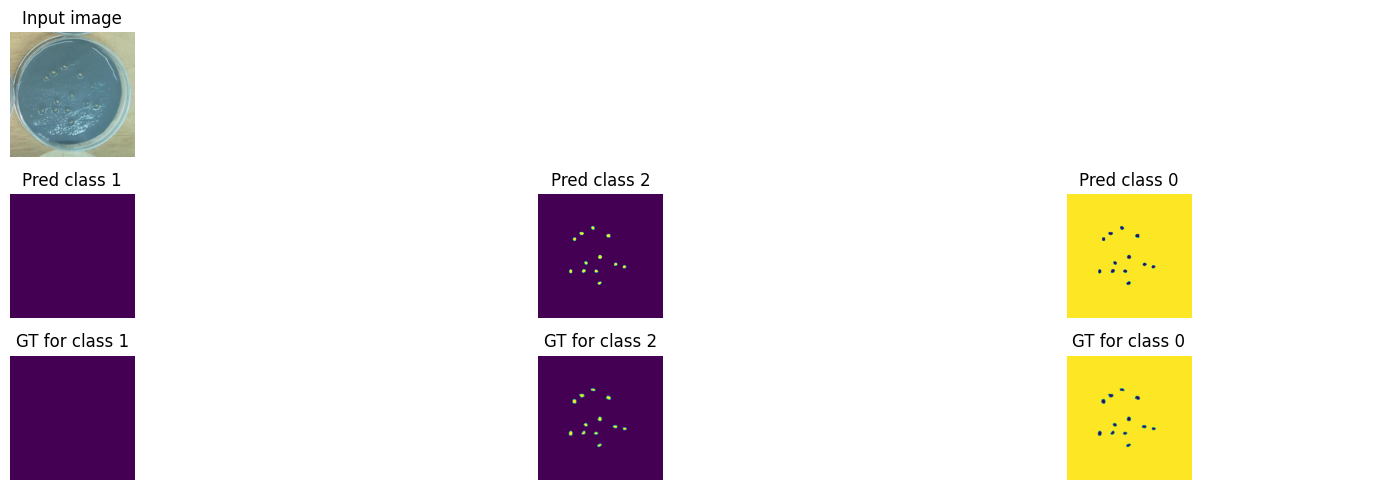

Train loss: 0.01935 | Time: 42m 34s | Val loss: 0.02253
Train_DICE_avg: 0.78626 | Train_Jaccard_avg: 0.72173 | Train_Sensitivity_avg: 0.95124 | Train_Specificity_avg: 0.91896 
Class 0 - Train_DICE: 0.99279 | Train_Jaccard: 0.98571 | Train_Sensitivity: 0.99750 | Train_Specificity: 0.77657 
Class 1 - Train_DICE: 0.55481 | Train_Jaccard: 0.48263 | Train_Sensitivity: 0.91123 | Train_Specificity: 0.99065 
Class 2 - Train_DICE: 0.81118 | Train_Jaccard: 0.69683 | Train_Sensitivity: 0.94499 | Train_Specificity: 0.98966 
Val_DICE_avg: 0.82339 | Val_Jaccard_avg: 0.75056 | Val_Sensitivity_avg: 0.96834 | Val_Specificity_avg: 0.83539 
Class 0 - Val_DICE: 0.98735 | Val_Jaccard: 0.97514 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.52650 
Class 1 - Val_DICE: 0.73007 | Val_Jaccard: 0.66083 | Val_Sensitivity: 0.93039 | Val_Specificity: 0.99435 
Class 2 - Val_DICE: 0.75275 | Val_Jaccard: 0.61570 | Val_Sensitivity: 0.97516 | Val_Specificity: 0.98533 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.01934 | Time: 43m 38s | Val loss: 0.01668
Train_DICE_avg: 0.78881 | Train_Jaccard_avg: 0.72386 | Train_Sensitivity_avg: 0.95266 | Train_Specificity_avg: 0.91985 
Class 0 - Train_DICE: 0.99277 | Train_Jaccard: 0.98567 | Train_Sensitivity: 0.99745 | Train_Specificity: 0.77981 
Class 1 - Train_DICE: 0.56177 | Train_Jaccard: 0.48942 | Train_Sensitivity: 0.91524 | Train_Specificity: 0.99033 
Class 2 - Train_DICE: 0.81189 | Train_Jaccard: 0.69650 | Train_Sensitivity: 0.94528 | Train_Specificity: 0.98942 
Val_DICE_avg: 0.82716 | Val_Jaccard_avg: 0.75755 | Val_Sensitivity_avg: 0.97550 | Val_Specificity_avg: 0.86007 
Class 0 - Val_DICE: 0.99156 | Val_Jaccard: 0.98330 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.60018 
Class 1 - Val_DICE: 0.72750 | Val_Jaccard: 0.66205 | Val_Sensitivity: 0.95318 | Val_Specificity: 0.99440 
Class 2 - Val_DICE: 0.76241 | Val_Jaccard: 0.62731 | Val_Sensitivity: 0.97382 | Val_Specificity: 0.98564 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01893 | Time: 44m 41s | Val loss: 0.01598
Train_DICE_avg: 0.79030 | Train_Jaccard_avg: 0.72506 | Train_Sensitivity_avg: 0.95313 | Train_Specificity_avg: 0.91921 
Class 0 - Train_DICE: 0.99285 | Train_Jaccard: 0.98583 | Train_Sensitivity: 0.99755 | Train_Specificity: 0.77768 
Class 1 - Train_DICE: 0.56705 | Train_Jaccard: 0.49380 | Train_Sensitivity: 0.91323 | Train_Specificity: 0.99059 
Class 2 - Train_DICE: 0.81098 | Train_Jaccard: 0.69555 | Train_Sensitivity: 0.94862 | Train_Specificity: 0.98936 
Val_DICE_avg: 0.82456 | Val_Jaccard_avg: 0.75496 | Val_Sensitivity_avg: 0.96805 | Val_Specificity_avg: 0.86309 
Class 0 - Val_DICE: 0.99184 | Val_Jaccard: 0.98386 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.60892 
Class 1 - Val_DICE: 0.71645 | Val_Jaccard: 0.64870 | Val_Sensitivity: 0.93195 | Val_Specificity: 0.99437 
Class 2 - Val_DICE: 0.76540 | Val_Jaccard: 0.63233 | Val_Sensitivity: 0.97274 | Val_Specificity: 0.98599 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.01878 | Time: 45m 44s | Val loss: 0.01589
Train_DICE_avg: 0.79262 | Train_Jaccard_avg: 0.72801 | Train_Sensitivity_avg: 0.95173 | Train_Specificity_avg: 0.91959 
Class 0 - Train_DICE: 0.99281 | Train_Jaccard: 0.98575 | Train_Sensitivity: 0.99753 | Train_Specificity: 0.77847 
Class 1 - Train_DICE: 0.57041 | Train_Jaccard: 0.49772 | Train_Sensitivity: 0.91102 | Train_Specificity: 0.99069 
Class 2 - Train_DICE: 0.81463 | Train_Jaccard: 0.70057 | Train_Sensitivity: 0.94663 | Train_Specificity: 0.98962 
Val_DICE_avg: 0.82894 | Val_Jaccard_avg: 0.75697 | Val_Sensitivity_avg: 0.96730 | Val_Specificity_avg: 0.86494 
Class 0 - Val_DICE: 0.99202 | Val_Jaccard: 0.98420 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.61479 
Class 1 - Val_DICE: 0.74038 | Val_Jaccard: 0.66747 | Val_Sensitivity: 0.92256 | Val_Specificity: 0.99458 
Class 2 - Val_DICE: 0.75441 | Val_Jaccard: 0.61924 | Val_Sensitivity: 0.97989 | Val_Specificity: 0.98545 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01871 | Time: 46m 48s | Val loss: 0.01598
Train_DICE_avg: 0.79525 | Train_Jaccard_avg: 0.73057 | Train_Sensitivity_avg: 0.95301 | Train_Specificity_avg: 0.92081 
Class 0 - Train_DICE: 0.99288 | Train_Jaccard: 0.98588 | Train_Sensitivity: 0.99756 | Train_Specificity: 0.78196 
Class 1 - Train_DICE: 0.57740 | Train_Jaccard: 0.50408 | Train_Sensitivity: 0.91560 | Train_Specificity: 0.99087 
Class 2 - Train_DICE: 0.81547 | Train_Jaccard: 0.70176 | Train_Sensitivity: 0.94587 | Train_Specificity: 0.98961 
Val_DICE_avg: 0.82593 | Val_Jaccard_avg: 0.75494 | Val_Sensitivity_avg: 0.96864 | Val_Specificity_avg: 0.86422 
Class 0 - Val_DICE: 0.99213 | Val_Jaccard: 0.98442 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.61278 
Class 1 - Val_DICE: 0.73441 | Val_Jaccard: 0.66427 | Val_Sensitivity: 0.92809 | Val_Specificity: 0.99438 
Class 2 - Val_DICE: 0.75123 | Val_Jaccard: 0.61612 | Val_Sensitivity: 0.97838 | Val_Specificity: 0.98551 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


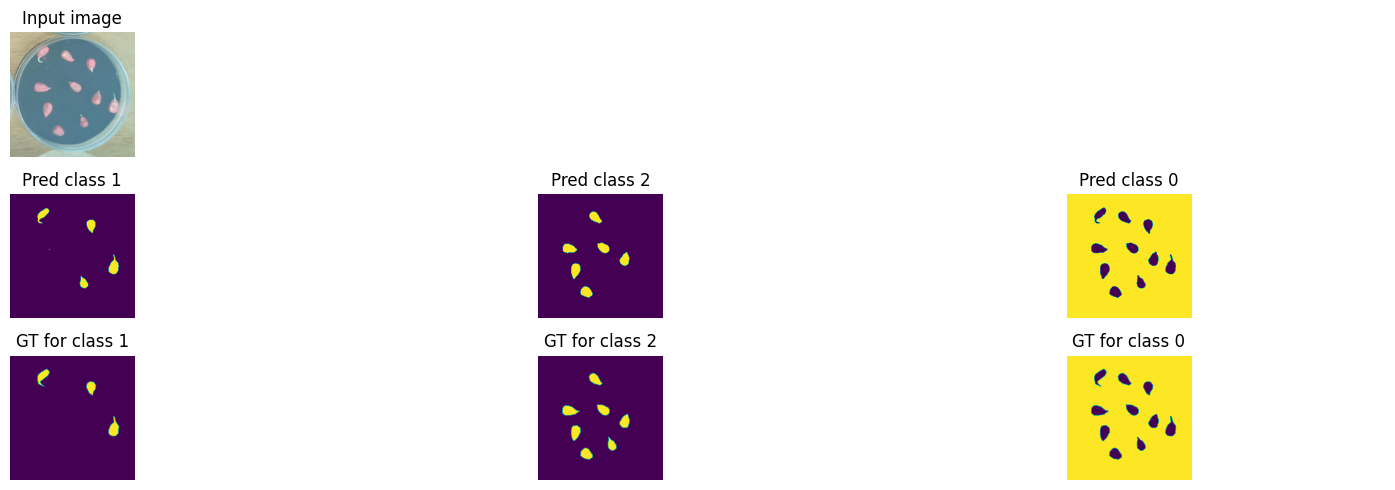

Train loss: 0.01859 | Time: 47m 52s | Val loss: 0.01566
Train_DICE_avg: 0.79147 | Train_Jaccard_avg: 0.72679 | Train_Sensitivity_avg: 0.95157 | Train_Specificity_avg: 0.92124 
Class 0 - Train_DICE: 0.99291 | Train_Jaccard: 0.98595 | Train_Sensitivity: 0.99759 | Train_Specificity: 0.78328 
Class 1 - Train_DICE: 0.56718 | Train_Jaccard: 0.49351 | Train_Sensitivity: 0.91197 | Train_Specificity: 0.99077 
Class 2 - Train_DICE: 0.81433 | Train_Jaccard: 0.70091 | Train_Sensitivity: 0.94514 | Train_Specificity: 0.98967 
Val_DICE_avg: 0.83082 | Val_Jaccard_avg: 0.75956 | Val_Sensitivity_avg: 0.97005 | Val_Specificity_avg: 0.86598 
Class 0 - Val_DICE: 0.99201 | Val_Jaccard: 0.98420 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61776 
Class 1 - Val_DICE: 0.74798 | Val_Jaccard: 0.67718 | Val_Sensitivity: 0.92888 | Val_Specificity: 0.99474 
Class 2 - Val_DICE: 0.75247 | Val_Jaccard: 0.61731 | Val_Sensitivity: 0.98180 | Val_Specificity: 0.98543 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01842 | Time: 48m 54s | Val loss: 0.01563
Train_DICE_avg: 0.79297 | Train_Jaccard_avg: 0.72759 | Train_Sensitivity_avg: 0.95231 | Train_Specificity_avg: 0.92015 
Class 0 - Train_DICE: 0.99292 | Train_Jaccard: 0.98596 | Train_Sensitivity: 0.99758 | Train_Specificity: 0.78005 
Class 1 - Train_DICE: 0.57280 | Train_Jaccard: 0.49753 | Train_Sensitivity: 0.90954 | Train_Specificity: 0.99088 
Class 2 - Train_DICE: 0.81321 | Train_Jaccard: 0.69928 | Train_Sensitivity: 0.94980 | Train_Specificity: 0.98951 
Val_DICE_avg: 0.83147 | Val_Jaccard_avg: 0.76113 | Val_Sensitivity_avg: 0.96976 | Val_Specificity_avg: 0.86511 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98399 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.61483 
Class 1 - Val_DICE: 0.73982 | Val_Jaccard: 0.66933 | Val_Sensitivity: 0.93327 | Val_Specificity: 0.99454 
Class 2 - Val_DICE: 0.76270 | Val_Jaccard: 0.63005 | Val_Sensitivity: 0.97656 | Val_Specificity: 0.98597 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.01825 | Time: 49m 56s | Val loss: 0.01566
Train_DICE_avg: 0.79695 | Train_Jaccard_avg: 0.73243 | Train_Sensitivity_avg: 0.95463 | Train_Specificity_avg: 0.92094 
Class 0 - Train_DICE: 0.99293 | Train_Jaccard: 0.98599 | Train_Sensitivity: 0.99757 | Train_Specificity: 0.78222 
Class 1 - Train_DICE: 0.57913 | Train_Jaccard: 0.50519 | Train_Sensitivity: 0.91846 | Train_Specificity: 0.99085 
Class 2 - Train_DICE: 0.81879 | Train_Jaccard: 0.70610 | Train_Sensitivity: 0.94787 | Train_Specificity: 0.98974 
Val_DICE_avg: 0.83248 | Val_Jaccard_avg: 0.76038 | Val_Sensitivity_avg: 0.96809 | Val_Specificity_avg: 0.86717 
Class 0 - Val_DICE: 0.99239 | Val_Jaccard: 0.98494 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.62172 
Class 1 - Val_DICE: 0.74911 | Val_Jaccard: 0.67571 | Val_Sensitivity: 0.92281 | Val_Specificity: 0.99466 
Class 2 - Val_DICE: 0.75594 | Val_Jaccard: 0.62049 | Val_Sensitivity: 0.98199 | Val_Specificity: 0.98514 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01810 | Time: 50m 58s | Val loss: 0.01567
Train_DICE_avg: 0.79458 | Train_Jaccard_avg: 0.72971 | Train_Sensitivity_avg: 0.95270 | Train_Specificity_avg: 0.92055 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98602 | Train_Sensitivity: 0.99765 | Train_Specificity: 0.78127 
Class 1 - Train_DICE: 0.57417 | Train_Jaccard: 0.49961 | Train_Sensitivity: 0.90975 | Train_Specificity: 0.99071 
Class 2 - Train_DICE: 0.81664 | Train_Jaccard: 0.70348 | Train_Sensitivity: 0.95072 | Train_Specificity: 0.98968 
Val_DICE_avg: 0.83176 | Val_Jaccard_avg: 0.76024 | Val_Sensitivity_avg: 0.96834 | Val_Specificity_avg: 0.86472 
Class 0 - Val_DICE: 0.99205 | Val_Jaccard: 0.98426 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.61397 
Class 1 - Val_DICE: 0.74541 | Val_Jaccard: 0.67338 | Val_Sensitivity: 0.92513 | Val_Specificity: 0.99467 
Class 2 - Val_DICE: 0.75781 | Val_Jaccard: 0.62309 | Val_Sensitivity: 0.98041 | Val_Specificity: 0.98552 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.01810 | Time: 51m 59s | Val loss: 0.01541
Train_DICE_avg: 0.79636 | Train_Jaccard_avg: 0.73171 | Train_Sensitivity_avg: 0.95405 | Train_Specificity_avg: 0.92001 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98604 | Train_Sensitivity: 0.99768 | Train_Specificity: 0.78004 
Class 1 - Train_DICE: 0.58023 | Train_Jaccard: 0.50647 | Train_Sensitivity: 0.91389 | Train_Specificity: 0.99046 
Class 2 - Train_DICE: 0.81589 | Train_Jaccard: 0.70261 | Train_Sensitivity: 0.95058 | Train_Specificity: 0.98952 
Val_DICE_avg: 0.83066 | Val_Jaccard_avg: 0.75852 | Val_Sensitivity_avg: 0.96670 | Val_Specificity_avg: 0.86653 
Class 0 - Val_DICE: 0.99205 | Val_Jaccard: 0.98426 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61944 
Class 1 - Val_DICE: 0.75154 | Val_Jaccard: 0.67937 | Val_Sensitivity: 0.91694 | Val_Specificity: 0.99497 
Class 2 - Val_DICE: 0.74838 | Val_Jaccard: 0.61192 | Val_Sensitivity: 0.98368 | Val_Specificity: 0.98518 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


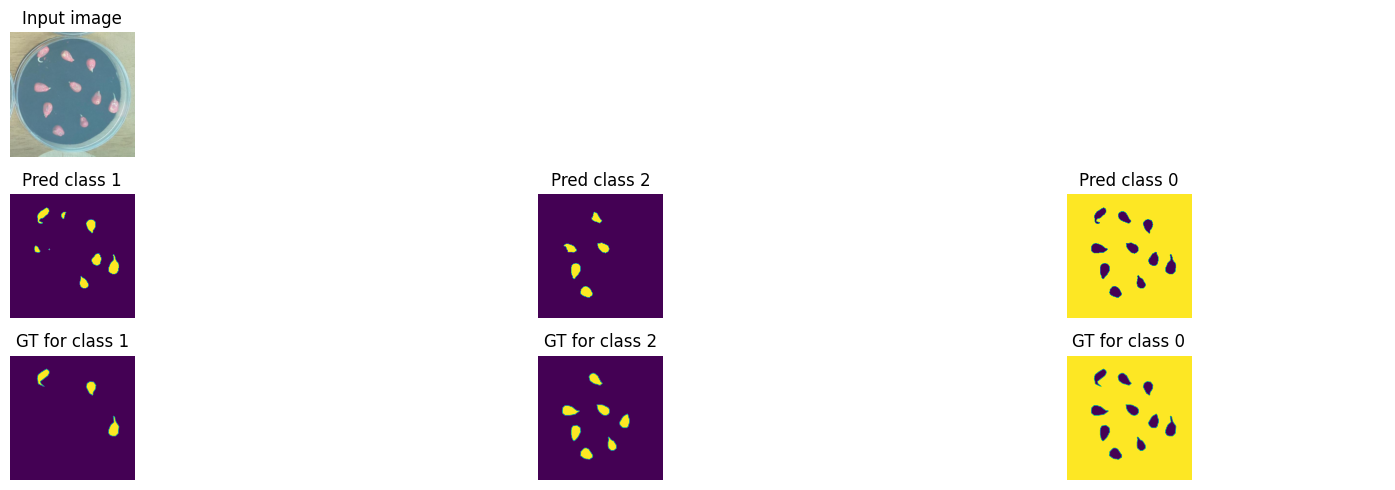

Train loss: 0.01799 | Time: 53m 1s | Val loss: 0.01550
Train_DICE_avg: 0.79599 | Train_Jaccard_avg: 0.73151 | Train_Sensitivity_avg: 0.95589 | Train_Specificity_avg: 0.91910 
Class 0 - Train_DICE: 0.99289 | Train_Jaccard: 0.98590 | Train_Sensitivity: 0.99771 | Train_Specificity: 0.77697 
Class 1 - Train_DICE: 0.57747 | Train_Jaccard: 0.50402 | Train_Sensitivity: 0.92015 | Train_Specificity: 0.99073 
Class 2 - Train_DICE: 0.81762 | Train_Jaccard: 0.70462 | Train_Sensitivity: 0.94980 | Train_Specificity: 0.98958 
Val_DICE_avg: 0.83670 | Val_Jaccard_avg: 0.76583 | Val_Sensitivity_avg: 0.96933 | Val_Specificity_avg: 0.86308 
Class 0 - Val_DICE: 0.99177 | Val_Jaccard: 0.98372 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.60852 
Class 1 - Val_DICE: 0.75434 | Val_Jaccard: 0.68342 | Val_Sensitivity: 0.92783 | Val_Specificity: 0.99496 
Class 2 - Val_DICE: 0.76398 | Val_Jaccard: 0.63036 | Val_Sensitivity: 0.98067 | Val_Specificity: 0.98577 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.01792 | Time: 54m 4s | Val loss: 0.01538
Train_DICE_avg: 0.79631 | Train_Jaccard_avg: 0.73193 | Train_Sensitivity_avg: 0.95411 | Train_Specificity_avg: 0.92146 
Class 0 - Train_DICE: 0.99297 | Train_Jaccard: 0.98607 | Train_Sensitivity: 0.99758 | Train_Specificity: 0.78368 
Class 1 - Train_DICE: 0.57703 | Train_Jaccard: 0.50342 | Train_Sensitivity: 0.91549 | Train_Specificity: 0.99092 
Class 2 - Train_DICE: 0.81894 | Train_Jaccard: 0.70631 | Train_Sensitivity: 0.94926 | Train_Specificity: 0.98977 
Val_DICE_avg: 0.83785 | Val_Jaccard_avg: 0.76827 | Val_Sensitivity_avg: 0.97056 | Val_Specificity_avg: 0.86353 
Class 0 - Val_DICE: 0.99185 | Val_Jaccard: 0.98388 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60953 
Class 1 - Val_DICE: 0.75433 | Val_Jaccard: 0.68458 | Val_Sensitivity: 0.93136 | Val_Specificity: 0.99487 
Class 2 - Val_DICE: 0.76737 | Val_Jaccard: 0.63635 | Val_Sensitivity: 0.98085 | Val_Specificity: 0.98619 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.01778 | Time: 55m 5s | Val loss: 0.01526
Train_DICE_avg: 0.79955 | Train_Jaccard_avg: 0.73476 | Train_Sensitivity_avg: 0.95700 | Train_Specificity_avg: 0.92124 
Class 0 - Train_DICE: 0.99298 | Train_Jaccard: 0.98609 | Train_Sensitivity: 0.99769 | Train_Specificity: 0.78315 
Class 1 - Train_DICE: 0.58742 | Train_Jaccard: 0.51233 | Train_Sensitivity: 0.92245 | Train_Specificity: 0.99086 
Class 2 - Train_DICE: 0.81823 | Train_Jaccard: 0.70586 | Train_Sensitivity: 0.95086 | Train_Specificity: 0.98973 
Val_DICE_avg: 0.83697 | Val_Jaccard_avg: 0.76684 | Val_Sensitivity_avg: 0.97354 | Val_Specificity_avg: 0.86292 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98375 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.60806 
Class 1 - Val_DICE: 0.75627 | Val_Jaccard: 0.68746 | Val_Sensitivity: 0.94173 | Val_Specificity: 0.99487 
Class 2 - Val_DICE: 0.76284 | Val_Jaccard: 0.62932 | Val_Sensitivity: 0.97939 | Val_Specificity: 0.98584 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.01769 | Time: 56m 7s | Val loss: 0.01528
Train_DICE_avg: 0.79925 | Train_Jaccard_avg: 0.73478 | Train_Sensitivity_avg: 0.95679 | Train_Specificity_avg: 0.92048 
Class 0 - Train_DICE: 0.99294 | Train_Jaccard: 0.98600 | Train_Sensitivity: 0.99768 | Train_Specificity: 0.78075 
Class 1 - Train_DICE: 0.58586 | Train_Jaccard: 0.51151 | Train_Sensitivity: 0.92156 | Train_Specificity: 0.99096 
Class 2 - Train_DICE: 0.81894 | Train_Jaccard: 0.70683 | Train_Sensitivity: 0.95112 | Train_Specificity: 0.98973 
Val_DICE_avg: 0.83611 | Val_Jaccard_avg: 0.76372 | Val_Sensitivity_avg: 0.96634 | Val_Specificity_avg: 0.86439 
Class 0 - Val_DICE: 0.99193 | Val_Jaccard: 0.98403 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61294 
Class 1 - Val_DICE: 0.76208 | Val_Jaccard: 0.68840 | Val_Sensitivity: 0.91792 | Val_Specificity: 0.99494 
Class 2 - Val_DICE: 0.75432 | Val_Jaccard: 0.61873 | Val_Sensitivity: 0.98163 | Val_Specificity: 0.98529 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.01757 | Time: 57m 8s | Val loss: 0.01529
Train_DICE_avg: 0.79995 | Train_Jaccard_avg: 0.73567 | Train_Sensitivity_avg: 0.95521 | Train_Specificity_avg: 0.92064 
Class 0 - Train_DICE: 0.99305 | Train_Jaccard: 0.98622 | Train_Sensitivity: 0.99768 | Train_Specificity: 0.78107 
Class 1 - Train_DICE: 0.58778 | Train_Jaccard: 0.51359 | Train_Sensitivity: 0.91685 | Train_Specificity: 0.99103 
Class 2 - Train_DICE: 0.81904 | Train_Jaccard: 0.70719 | Train_Sensitivity: 0.95110 | Train_Specificity: 0.98984 
Val_DICE_avg: 0.83290 | Val_Jaccard_avg: 0.76056 | Val_Sensitivity_avg: 0.96441 | Val_Specificity_avg: 0.86678 
Class 0 - Val_DICE: 0.99222 | Val_Jaccard: 0.98460 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.62033 
Class 1 - Val_DICE: 0.75089 | Val_Jaccard: 0.67781 | Val_Sensitivity: 0.91231 | Val_Specificity: 0.99482 
Class 2 - Val_DICE: 0.75558 | Val_Jaccard: 0.61925 | Val_Sensitivity: 0.98146 | Val_Specificity: 0.98520 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


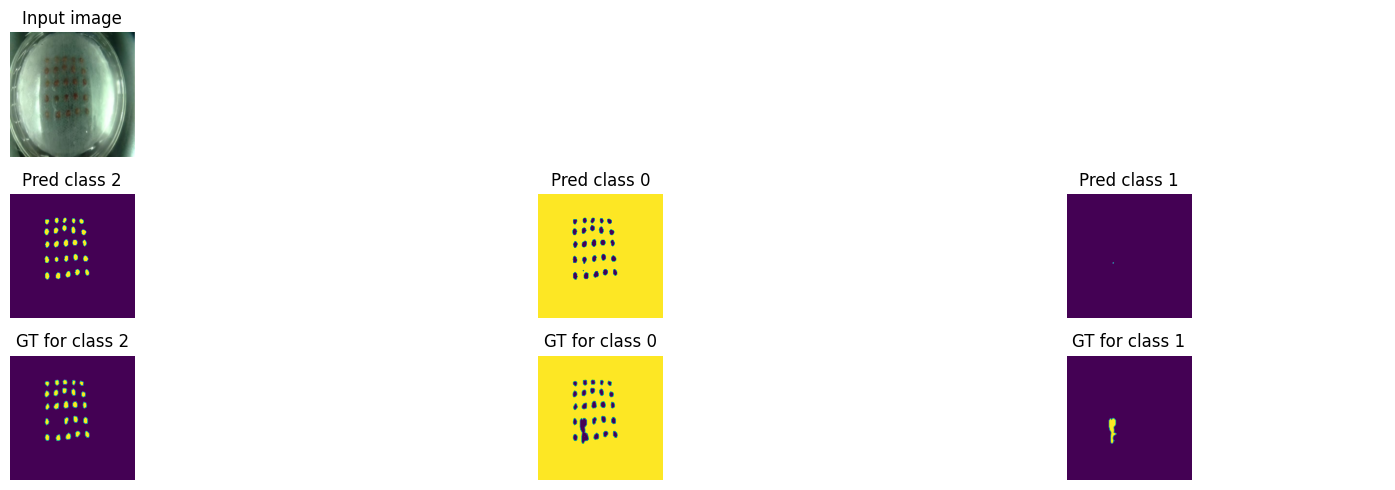

Train loss: 0.01742 | Time: 58m 10s | Val loss: 0.01518
Train_DICE_avg: 0.80287 | Train_Jaccard_avg: 0.73845 | Train_Sensitivity_avg: 0.95710 | Train_Specificity_avg: 0.92236 
Class 0 - Train_DICE: 0.99316 | Train_Jaccard: 0.98644 | Train_Sensitivity: 0.99766 | Train_Specificity: 0.78586 
Class 1 - Train_DICE: 0.59453 | Train_Jaccard: 0.51935 | Train_Sensitivity: 0.92199 | Train_Specificity: 0.99118 
Class 2 - Train_DICE: 0.82093 | Train_Jaccard: 0.70957 | Train_Sensitivity: 0.95164 | Train_Specificity: 0.99003 
Val_DICE_avg: 0.83327 | Val_Jaccard_avg: 0.76305 | Val_Sensitivity_avg: 0.96700 | Val_Specificity_avg: 0.86661 
Class 0 - Val_DICE: 0.99211 | Val_Jaccard: 0.98438 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.61925 
Class 1 - Val_DICE: 0.74082 | Val_Jaccard: 0.67110 | Val_Sensitivity: 0.92877 | Val_Specificity: 0.99457 
Class 2 - Val_DICE: 0.76688 | Val_Jaccard: 0.63368 | Val_Sensitivity: 0.97277 | Val_Specificity: 0.98601 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.01736 | Time: 59m 12s | Val loss: 0.01533
Train_DICE_avg: 0.80187 | Train_Jaccard_avg: 0.73747 | Train_Sensitivity_avg: 0.95659 | Train_Specificity_avg: 0.91893 
Class 0 - Train_DICE: 0.99297 | Train_Jaccard: 0.98606 | Train_Sensitivity: 0.99782 | Train_Specificity: 0.77608 
Class 1 - Train_DICE: 0.59344 | Train_Jaccard: 0.51932 | Train_Sensitivity: 0.92014 | Train_Specificity: 0.99097 
Class 2 - Train_DICE: 0.81921 | Train_Jaccard: 0.70704 | Train_Sensitivity: 0.95182 | Train_Specificity: 0.98975 
Val_DICE_avg: 0.83776 | Val_Jaccard_avg: 0.76734 | Val_Sensitivity_avg: 0.96399 | Val_Specificity_avg: 0.86281 
Class 0 - Val_DICE: 0.99170 | Val_Jaccard: 0.98359 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.60746 
Class 1 - Val_DICE: 0.75397 | Val_Jaccard: 0.68337 | Val_Sensitivity: 0.91511 | Val_Specificity: 0.99498 
Class 2 - Val_DICE: 0.76760 | Val_Jaccard: 0.63507 | Val_Sensitivity: 0.97736 | Val_Specificity: 0.98598 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.01741 | Time: 60m 14s | Val loss: 0.01518
Train_DICE_avg: 0.80131 | Train_Jaccard_avg: 0.73691 | Train_Sensitivity_avg: 0.95646 | Train_Specificity_avg: 0.92099 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98612 | Train_Sensitivity: 0.99762 | Train_Specificity: 0.78207 
Class 1 - Train_DICE: 0.58865 | Train_Jaccard: 0.51378 | Train_Sensitivity: 0.91981 | Train_Specificity: 0.99100 
Class 2 - Train_DICE: 0.82227 | Train_Jaccard: 0.71084 | Train_Sensitivity: 0.95194 | Train_Specificity: 0.98990 
Val_DICE_avg: 0.83668 | Val_Jaccard_avg: 0.76531 | Val_Sensitivity_avg: 0.96920 | Val_Specificity_avg: 0.86541 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98412 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.61562 
Class 1 - Val_DICE: 0.75597 | Val_Jaccard: 0.68311 | Val_Sensitivity: 0.92608 | Val_Specificity: 0.99477 
Class 2 - Val_DICE: 0.76210 | Val_Jaccard: 0.62870 | Val_Sensitivity: 0.98206 | Val_Specificity: 0.98584 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01735 | Time: 61m 16s | Val loss: 0.01518
Train_DICE_avg: 0.80025 | Train_Jaccard_avg: 0.73562 | Train_Sensitivity_avg: 0.95787 | Train_Specificity_avg: 0.91914 
Class 0 - Train_DICE: 0.99298 | Train_Jaccard: 0.98609 | Train_Sensitivity: 0.99775 | Train_Specificity: 0.77722 
Class 1 - Train_DICE: 0.58912 | Train_Jaccard: 0.51460 | Train_Sensitivity: 0.92244 | Train_Specificity: 0.99072 
Class 2 - Train_DICE: 0.81865 | Train_Jaccard: 0.70619 | Train_Sensitivity: 0.95341 | Train_Specificity: 0.98949 
Val_DICE_avg: 0.83569 | Val_Jaccard_avg: 0.76519 | Val_Sensitivity_avg: 0.96915 | Val_Specificity_avg: 0.86284 
Class 0 - Val_DICE: 0.99171 | Val_Jaccard: 0.98361 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.60780 
Class 1 - Val_DICE: 0.74725 | Val_Jaccard: 0.67627 | Val_Sensitivity: 0.92853 | Val_Specificity: 0.99467 
Class 2 - Val_DICE: 0.76811 | Val_Jaccard: 0.63570 | Val_Sensitivity: 0.97943 | Val_Specificity: 0.98605 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.01732 | Time: 62m 18s | Val loss: 0.01509
Train_DICE_avg: 0.80400 | Train_Jaccard_avg: 0.73949 | Train_Sensitivity_avg: 0.95463 | Train_Specificity_avg: 0.92211 
Class 0 - Train_DICE: 0.99305 | Train_Jaccard: 0.98621 | Train_Sensitivity: 0.99764 | Train_Specificity: 0.78513 
Class 1 - Train_DICE: 0.59715 | Train_Jaccard: 0.52141 | Train_Sensitivity: 0.91475 | Train_Specificity: 0.99124 
Class 2 - Train_DICE: 0.82180 | Train_Jaccard: 0.71086 | Train_Sensitivity: 0.95150 | Train_Specificity: 0.98996 
Val_DICE_avg: 0.83765 | Val_Jaccard_avg: 0.76790 | Val_Sensitivity_avg: 0.97117 | Val_Specificity_avg: 0.86437 
Class 0 - Val_DICE: 0.99186 | Val_Jaccard: 0.98390 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61204 
Class 1 - Val_DICE: 0.75033 | Val_Jaccard: 0.68066 | Val_Sensitivity: 0.93850 | Val_Specificity: 0.99476 
Class 2 - Val_DICE: 0.77074 | Val_Jaccard: 0.63912 | Val_Sensitivity: 0.97553 | Val_Specificity: 0.98631 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


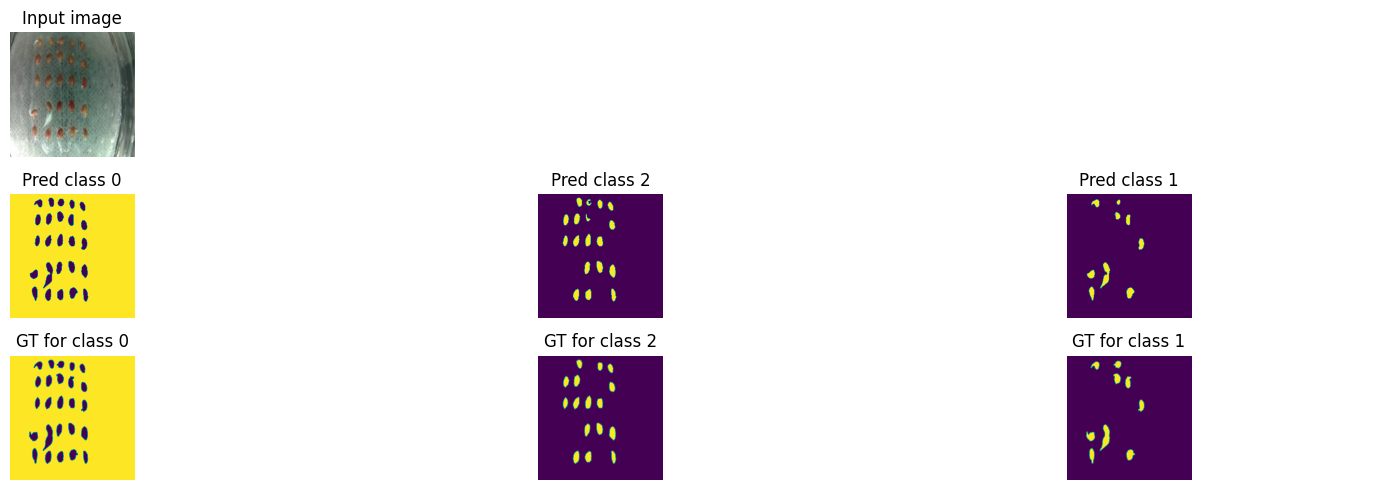

Train loss: 0.01731 | Time: 63m 20s | Val loss: 0.01527
Train_DICE_avg: 0.79991 | Train_Jaccard_avg: 0.73557 | Train_Sensitivity_avg: 0.95838 | Train_Specificity_avg: 0.91979 
Class 0 - Train_DICE: 0.99301 | Train_Jaccard: 0.98614 | Train_Sensitivity: 0.99774 | Train_Specificity: 0.77884 
Class 1 - Train_DICE: 0.58662 | Train_Jaccard: 0.51224 | Train_Sensitivity: 0.92492 | Train_Specificity: 0.99082 
Class 2 - Train_DICE: 0.82009 | Train_Jaccard: 0.70834 | Train_Sensitivity: 0.95247 | Train_Specificity: 0.98970 
Val_DICE_avg: 0.83522 | Val_Jaccard_avg: 0.76518 | Val_Sensitivity_avg: 0.97164 | Val_Specificity_avg: 0.86423 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98376 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.61187 
Class 1 - Val_DICE: 0.74874 | Val_Jaccard: 0.67960 | Val_Sensitivity: 0.93741 | Val_Specificity: 0.99481 
Class 2 - Val_DICE: 0.76513 | Val_Jaccard: 0.63218 | Val_Sensitivity: 0.97804 | Val_Specificity: 0.98601 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▃▃▃▃▄▄▄▄▄▄▄▅▅▆▆▇▇▇▇▇▇▇▇▇███████████████
wandb:       Training Jaccard ▁▃▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇████████████████
wandb:          Training Loss █▇▇▆▅▄▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▃▄▄▅▇▇██▇▇▇▇▆▅▅▅▅▅▆▅▆▆▆▆▆▆▆▆▆▆▇▆▆▆▇▇▇▇▇
wandb:   Training Specificity ▁▃▄▅▅▆▆▇▇▇▇▇▇███████████████████████████
wandb:        Validation DICE ▁▁▂▃▄▃▃▂▄▄▆▆▆▆▇▇▇▇▆▇▇█▇▇▇███████████████
wandb:     Validation Jaccard ▁▁▂▂▂▄▃▄▄▄▆▆▆▆▆▇▆▇▇▇▇▇██▇███████████████
wandb:        Validation Loss █▇▇▆▅▄▄▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▂▂▃▇▇████▇▇▇▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
wandb: Validation Specificity ▁▁▂▃▅▇▆▅▆▇▇▇▇█▇█▆████████▇▆▇████████████
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.79991
wandb:       Training Jaccard 0.73557
wandb:          Training Loss 0.01


Training complete!


In [17]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [18]:
model = UNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [19]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]



Global Performance Metrics:
Loss mean: 0.01534, std: 0.00136
Dice Coefficient mean: 0.87135, std: 0.10855
Jaccard Index mean: 0.81446, std: 0.12569
Sensitivity mean: 0.87917, std: 0.10586
Specificity mean: 0.96079, std: 0.02432

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99605, std: 0.00212
Jaccard mean: 0.99215, std: 0.00418
Sensitivity mean: 0.99595, std: 0.00292
Specificity mean: 0.88766, std: 0.07394

Class 1:
Dice mean: 0.74941, std: 0.29597
Jaccard mean: 0.67411, std: 0.31922
Sensitivity mean: 0.77592, std: 0.28516
Specificity mean: 0.99809, std: 0.00374

Class 2:
Dice mean: 0.86859, std: 0.08762
Jaccard mean: 0.77711, std: 0.12033
Sensitivity mean: 0.86563, std: 0.12079
Specificity mean: 0.99661, std: 0.00254


### Focal Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Backbone"] = "resnet34"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-UNet-ResNet34-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.28 GB
GPU Memory - Reserved: 1.85 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_183103-oqguudh7
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-UNet-ResNet34-Focal
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/oqguudh7



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


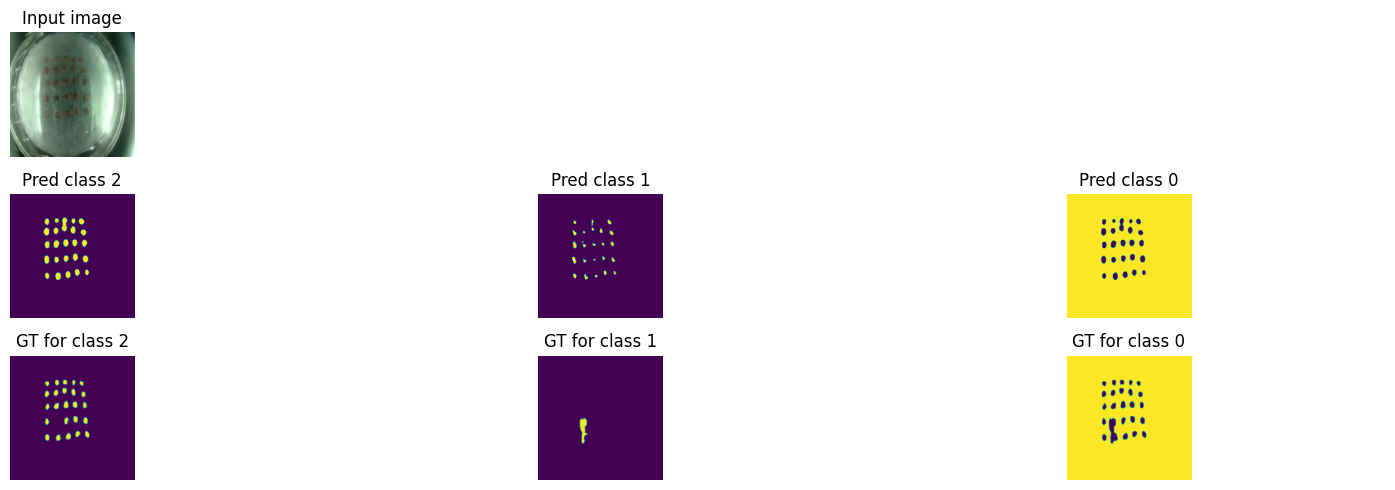

Train loss: 0.04647 | Time: 0m 56s | Val loss: 0.03147
Train_DICE_avg: 0.38881 | Train_Jaccard_avg: 0.31086 | Train_Sensitivity_avg: 0.77866 | Train_Specificity_avg: 0.69623 
Class 0 - Train_DICE: 0.48794 | Train_Jaccard: 0.38716 | Train_Sensitivity: 0.99466 | Train_Specificity: 0.12265 
Class 1 - Train_DICE: 0.17339 | Train_Jaccard: 0.16654 | Train_Sensitivity: 0.62713 | Train_Specificity: 0.98618 
Class 2 - Train_DICE: 0.50509 | Train_Jaccard: 0.37888 | Train_Sensitivity: 0.71417 | Train_Specificity: 0.97985 
Val_DICE_avg: 0.62533 | Val_Jaccard_avg: 0.55268 | Val_Sensitivity_avg: 0.91541 | Val_Specificity_avg: 0.69928 
Class 0 - Val_DICE: 0.89169 | Val_Jaccard: 0.80664 | Val_Sensitivity: 0.99849 | Val_Specificity: 0.12955 
Class 1 - Val_DICE: 0.41563 | Val_Jaccard: 0.41175 | Val_Sensitivity: 0.86370 | Val_Specificity: 0.98875 
Class 2 - Val_DICE: 0.56867 | Val_Jaccard: 0.43964 | Val_Sensitivity: 0.88404 | Val_Specificity: 0.97955 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.02575 | Time: 1m 52s | Val loss: 0.02164
Train_DICE_avg: 0.62223 | Train_Jaccard_avg: 0.55915 | Train_Sensitivity_avg: 0.92969 | Train_Specificity_avg: 0.78715 
Class 0 - Train_DICE: 0.94416 | Train_Jaccard: 0.89628 | Train_Sensitivity: 0.99659 | Train_Specificity: 0.39079 
Class 1 - Train_DICE: 0.25946 | Train_Jaccard: 0.25878 | Train_Sensitivity: 0.95327 | Train_Specificity: 0.98580 
Class 2 - Train_DICE: 0.66307 | Train_Jaccard: 0.52238 | Train_Sensitivity: 0.83921 | Train_Specificity: 0.98486 
Val_DICE_avg: 0.67804 | Val_Jaccard_avg: 0.62378 | Val_Sensitivity_avg: 0.96053 | Val_Specificity_avg: 0.79680 
Class 0 - Val_DICE: 0.98258 | Val_Jaccard: 0.96585 | Val_Sensitivity: 0.99808 | Val_Specificity: 0.42263 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.58330 | Val_Jaccard: 0.43722 | Val_Sensitivity: 0.88351 | Val_Specificity: 0.97943 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.01978 | Time: 2m 48s | Val loss: 0.01741
Train_DICE_avg: 0.64110 | Train_Jaccard_avg: 0.58679 | Train_Sensitivity_avg: 0.93310 | Train_Specificity_avg: 0.84380 
Class 0 - Train_DICE: 0.97689 | Train_Jaccard: 0.95505 | Train_Sensitivity: 0.99569 | Train_Specificity: 0.56047 
Class 1 - Train_DICE: 0.26847 | Train_Jaccard: 0.26795 | Train_Sensitivity: 0.95933 | Train_Specificity: 0.98570 
Class 2 - Train_DICE: 0.67795 | Train_Jaccard: 0.53739 | Train_Sensitivity: 0.84429 | Train_Specificity: 0.98523 
Val_DICE_avg: 0.69680 | Val_Jaccard_avg: 0.64242 | Val_Sensitivity_avg: 0.95764 | Val_Specificity_avg: 0.81270 
Class 0 - Val_DICE: 0.98568 | Val_Jaccard: 0.97183 | Val_Sensitivity: 0.99816 | Val_Specificity: 0.46821 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.63646 | Val_Jaccard: 0.48718 | Val_Sensitivity: 0.87477 | Val_Specificity: 0.98156 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.01587 | Time: 3m 44s | Val loss: 0.01410
Train_DICE_avg: 0.64345 | Train_Jaccard_avg: 0.59086 | Train_Sensitivity_avg: 0.93509 | Train_Specificity_avg: 0.87060 
Class 0 - Train_DICE: 0.98350 | Train_Jaccard: 0.96764 | Train_Sensitivity: 0.99497 | Train_Specificity: 0.64108 
Class 1 - Train_DICE: 0.26980 | Train_Jaccard: 0.26950 | Train_Sensitivity: 0.96361 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.67705 | Train_Jaccard: 0.53544 | Train_Sensitivity: 0.84670 | Train_Specificity: 0.98499 
Val_DICE_avg: 0.67640 | Val_Jaccard_avg: 0.62100 | Val_Sensitivity_avg: 0.93490 | Val_Specificity_avg: 0.82495 
Class 0 - Val_DICE: 0.98752 | Val_Jaccard: 0.97540 | Val_Sensitivity: 0.99815 | Val_Specificity: 0.50571 
Class 1 - Val_DICE: 0.42157 | Val_Jaccard: 0.41743 | Val_Sensitivity: 0.93262 | Val_Specificity: 0.98852 
Class 2 - Val_DICE: 0.62013 | Val_Jaccard: 0.47018 | Val_Sensitivity: 0.87392 | Val_Specificity: 0.98063 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01322 | Time: 4m 40s | Val loss: 0.01179
Train_DICE_avg: 0.64479 | Train_Jaccard_avg: 0.59432 | Train_Sensitivity_avg: 0.93780 | Train_Specificity_avg: 0.88162 
Class 0 - Train_DICE: 0.98558 | Train_Jaccard: 0.97165 | Train_Sensitivity: 0.99471 | Train_Specificity: 0.67330 
Class 1 - Train_DICE: 0.27277 | Train_Jaccard: 0.27240 | Train_Sensitivity: 0.96918 | Train_Specificity: 0.98625 
Class 2 - Train_DICE: 0.67603 | Train_Jaccard: 0.53890 | Train_Sensitivity: 0.84951 | Train_Specificity: 0.98532 
Val_DICE_avg: 0.68455 | Val_Jaccard_avg: 0.62978 | Val_Sensitivity_avg: 0.94251 | Val_Specificity_avg: 0.82823 
Class 0 - Val_DICE: 0.98785 | Val_Jaccard: 0.97607 | Val_Sensitivity: 0.99844 | Val_Specificity: 0.51517 
Class 1 - Val_DICE: 0.44210 | Val_Jaccard: 0.43782 | Val_Sensitivity: 0.95484 | Val_Specificity: 0.98852 
Class 2 - Val_DICE: 0.62370 | Val_Jaccard: 0.47546 | Val_Sensitivity: 0.87426 | Val_Specificity: 0.98099 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


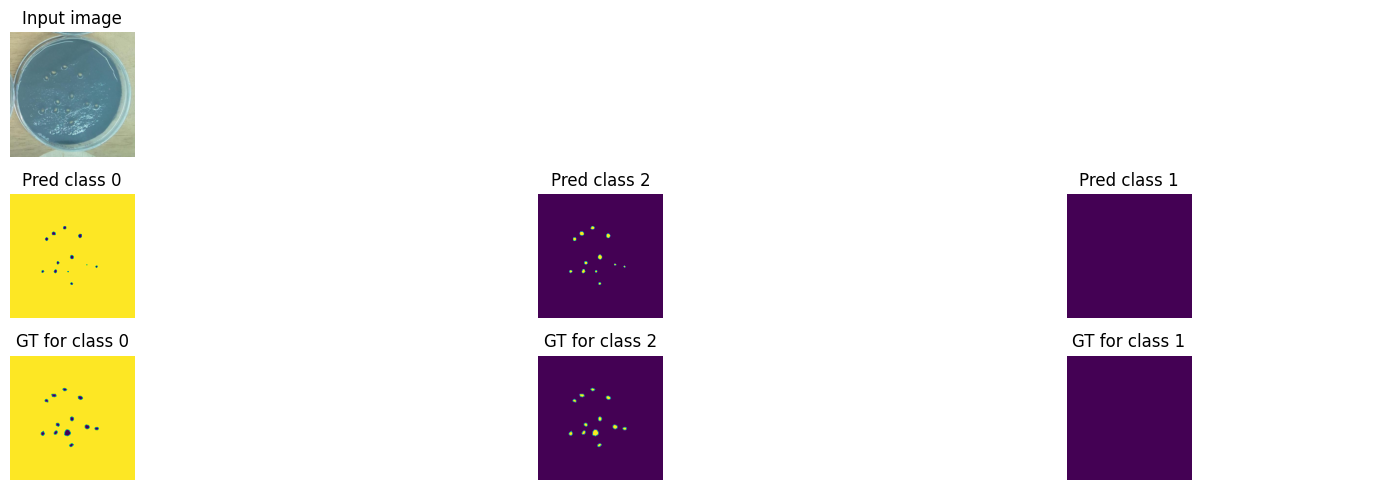

Train loss: 0.01103 | Time: 5m 37s | Val loss: 0.00953
Train_DICE_avg: 0.64957 | Train_Jaccard_avg: 0.59965 | Train_Sensitivity_avg: 0.94254 | Train_Specificity_avg: 0.88810 
Class 0 - Train_DICE: 0.98719 | Train_Jaccard: 0.97478 | Train_Sensitivity: 0.99494 | Train_Specificity: 0.69303 
Class 1 - Train_DICE: 0.27426 | Train_Jaccard: 0.27387 | Train_Sensitivity: 0.97254 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.68727 | Train_Jaccard: 0.55030 | Train_Sensitivity: 0.86013 | Train_Specificity: 0.98552 
Val_DICE_avg: 0.69194 | Val_Jaccard_avg: 0.63799 | Val_Sensitivity_avg: 0.95625 | Val_Specificity_avg: 0.84993 
Class 0 - Val_DICE: 0.99090 | Val_Jaccard: 0.98200 | Val_Sensitivity: 0.99850 | Val_Specificity: 0.58090 
Class 1 - Val_DICE: 0.46483 | Val_Jaccard: 0.46134 | Val_Sensitivity: 0.98338 | Val_Specificity: 0.98846 
Class 2 - Val_DICE: 0.62011 | Val_Jaccard: 0.47063 | Val_Sensitivity: 0.88688 | Val_Specificity: 0.98043 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.00948 | Time: 6m 33s | Val loss: 0.00834
Train_DICE_avg: 0.65429 | Train_Jaccard_avg: 0.60373 | Train_Sensitivity_avg: 0.94133 | Train_Specificity_avg: 0.89206 
Class 0 - Train_DICE: 0.98831 | Train_Jaccard: 0.97694 | Train_Sensitivity: 0.99520 | Train_Specificity: 0.70473 
Class 1 - Train_DICE: 0.26922 | Train_Jaccard: 0.26574 | Train_Sensitivity: 0.95343 | Train_Specificity: 0.98561 
Class 2 - Train_DICE: 0.70533 | Train_Jaccard: 0.56852 | Train_Sensitivity: 0.87536 | Train_Specificity: 0.98585 
Val_DICE_avg: 0.67881 | Val_Jaccard_avg: 0.62085 | Val_Sensitivity_avg: 0.94191 | Val_Specificity_avg: 0.85591 
Class 0 - Val_DICE: 0.99134 | Val_Jaccard: 0.98288 | Val_Sensitivity: 0.99864 | Val_Specificity: 0.59965 
Class 1 - Val_DICE: 0.43045 | Val_Jaccard: 0.42004 | Val_Sensitivity: 0.91722 | Val_Specificity: 0.98892 
Class 2 - Val_DICE: 0.61463 | Val_Jaccard: 0.45962 | Val_Sensitivity: 0.90986 | Val_Specificity: 0.97915 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00858 | Time: 7m 29s | Val loss: 0.00734
Train_DICE_avg: 0.66288 | Train_Jaccard_avg: 0.60969 | Train_Sensitivity_avg: 0.93279 | Train_Specificity_avg: 0.89495 
Class 0 - Train_DICE: 0.98832 | Train_Jaccard: 0.97697 | Train_Sensitivity: 0.99463 | Train_Specificity: 0.71253 
Class 1 - Train_DICE: 0.29782 | Train_Jaccard: 0.28363 | Train_Sensitivity: 0.92792 | Train_Specificity: 0.98617 
Class 2 - Train_DICE: 0.70250 | Train_Jaccard: 0.56845 | Train_Sensitivity: 0.87581 | Train_Specificity: 0.98614 
Val_DICE_avg: 0.73244 | Val_Jaccard_avg: 0.66981 | Val_Sensitivity_avg: 0.95419 | Val_Specificity_avg: 0.83864 
Class 0 - Val_DICE: 0.98955 | Val_Jaccard: 0.97936 | Val_Sensitivity: 0.99895 | Val_Specificity: 0.54343 
Class 1 - Val_DICE: 0.51632 | Val_Jaccard: 0.48687 | Val_Sensitivity: 0.93645 | Val_Specificity: 0.98995 
Class 2 - Val_DICE: 0.69145 | Val_Jaccard: 0.54322 | Val_Sensitivity: 0.92717 | Val_Specificity: 0.98253 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00727 | Time: 8m 25s | Val loss: 0.00641
Train_DICE_avg: 0.67907 | Train_Jaccard_avg: 0.62247 | Train_Sensitivity_avg: 0.93329 | Train_Specificity_avg: 0.90208 
Class 0 - Train_DICE: 0.98957 | Train_Jaccard: 0.97939 | Train_Sensitivity: 0.99522 | Train_Specificity: 0.73306 
Class 1 - Train_DICE: 0.32613 | Train_Jaccard: 0.30106 | Train_Sensitivity: 0.91314 | Train_Specificity: 0.98670 
Class 2 - Train_DICE: 0.72153 | Train_Jaccard: 0.58697 | Train_Sensitivity: 0.89151 | Train_Specificity: 0.98649 
Val_DICE_avg: 0.73085 | Val_Jaccard_avg: 0.66821 | Val_Sensitivity_avg: 0.96760 | Val_Specificity_avg: 0.84726 
Class 0 - Val_DICE: 0.99021 | Val_Jaccard: 0.98066 | Val_Sensitivity: 0.99910 | Val_Specificity: 0.56927 
Class 1 - Val_DICE: 0.56671 | Val_Jaccard: 0.52826 | Val_Sensitivity: 0.96089 | Val_Specificity: 0.99080 
Class 2 - Val_DICE: 0.63564 | Val_Jaccard: 0.49571 | Val_Sensitivity: 0.94280 | Val_Specificity: 0.98172 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00647 | Time: 9m 21s | Val loss: 0.00554
Train_DICE_avg: 0.69043 | Train_Jaccard_avg: 0.63152 | Train_Sensitivity_avg: 0.93395 | Train_Specificity_avg: 0.90481 
Class 0 - Train_DICE: 0.99003 | Train_Jaccard: 0.98031 | Train_Sensitivity: 0.99535 | Train_Specificity: 0.74052 
Class 1 - Train_DICE: 0.35090 | Train_Jaccard: 0.31621 | Train_Sensitivity: 0.90967 | Train_Specificity: 0.98712 
Class 2 - Train_DICE: 0.73036 | Train_Jaccard: 0.59805 | Train_Sensitivity: 0.89683 | Train_Specificity: 0.98679 
Val_DICE_avg: 0.74173 | Val_Jaccard_avg: 0.67676 | Val_Sensitivity_avg: 0.96181 | Val_Specificity_avg: 0.85710 
Class 0 - Val_DICE: 0.99145 | Val_Jaccard: 0.98309 | Val_Sensitivity: 0.99894 | Val_Specificity: 0.59800 
Class 1 - Val_DICE: 0.55418 | Val_Jaccard: 0.51591 | Val_Sensitivity: 0.94849 | Val_Specificity: 0.99075 
Class 2 - Val_DICE: 0.67955 | Val_Jaccard: 0.53129 | Val_Sensitivity: 0.93799 | Val_Specificity: 0.98254 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


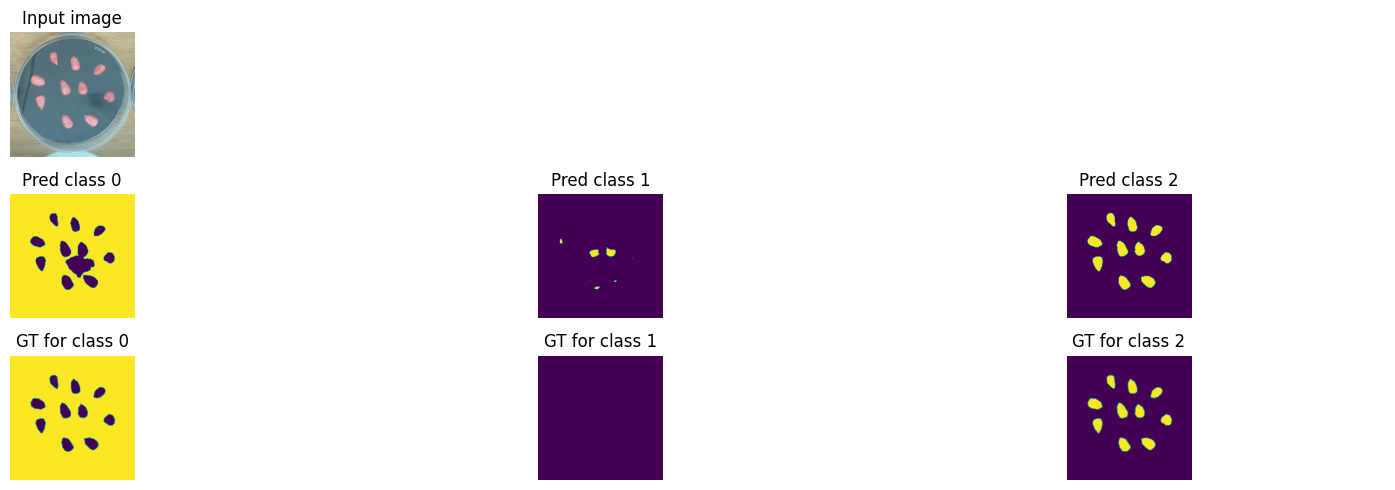

Train loss: 0.00559 | Time: 10m 21s | Val loss: 0.00483
Train_DICE_avg: 0.69053 | Train_Jaccard_avg: 0.63113 | Train_Sensitivity_avg: 0.92629 | Train_Specificity_avg: 0.90780 
Class 0 - Train_DICE: 0.99021 | Train_Jaccard: 0.98065 | Train_Sensitivity: 0.99492 | Train_Specificity: 0.74916 
Class 1 - Train_DICE: 0.35306 | Train_Jaccard: 0.31528 | Train_Sensitivity: 0.89138 | Train_Specificity: 0.98730 
Class 2 - Train_DICE: 0.72834 | Train_Jaccard: 0.59744 | Train_Sensitivity: 0.89257 | Train_Specificity: 0.98693 
Val_DICE_avg: 0.71881 | Val_Jaccard_avg: 0.64827 | Val_Sensitivity_avg: 0.92187 | Val_Specificity_avg: 0.84247 
Class 0 - Val_DICE: 0.98807 | Val_Jaccard: 0.97661 | Val_Sensitivity: 0.99914 | Val_Specificity: 0.55395 
Class 1 - Val_DICE: 0.52361 | Val_Jaccard: 0.46986 | Val_Sensitivity: 0.80994 | Val_Specificity: 0.99260 
Class 2 - Val_DICE: 0.64476 | Val_Jaccard: 0.49833 | Val_Sensitivity: 0.95654 | Val_Specificity: 0.98086 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.00459 | Time: 11m 21s | Val loss: 0.00355
Train_DICE_avg: 0.70830 | Train_Jaccard_avg: 0.64627 | Train_Sensitivity_avg: 0.92464 | Train_Specificity_avg: 0.91384 
Class 0 - Train_DICE: 0.99080 | Train_Jaccard: 0.98180 | Train_Sensitivity: 0.99483 | Train_Specificity: 0.76577 
Class 1 - Train_DICE: 0.38815 | Train_Jaccard: 0.34059 | Train_Sensitivity: 0.87998 | Train_Specificity: 0.98815 
Class 2 - Train_DICE: 0.74594 | Train_Jaccard: 0.61641 | Train_Sensitivity: 0.89911 | Train_Specificity: 0.98760 
Val_DICE_avg: 0.74233 | Val_Jaccard_avg: 0.67612 | Val_Sensitivity_avg: 0.95049 | Val_Specificity_avg: 0.87426 
Class 0 - Val_DICE: 0.99251 | Val_Jaccard: 0.98518 | Val_Sensitivity: 0.99882 | Val_Specificity: 0.64894 
Class 1 - Val_DICE: 0.59559 | Val_Jaccard: 0.54380 | Val_Sensitivity: 0.89992 | Val_Specificity: 0.99207 
Class 2 - Val_DICE: 0.63888 | Val_Jaccard: 0.49937 | Val_Sensitivity: 0.95272 | Val_Specificity: 0.98178 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.00397 | Time: 12m 20s | Val loss: 0.00312
Train_DICE_avg: 0.71852 | Train_Jaccard_avg: 0.65441 | Train_Sensitivity_avg: 0.91785 | Train_Specificity_avg: 0.91454 
Class 0 - Train_DICE: 0.99109 | Train_Jaccard: 0.98237 | Train_Sensitivity: 0.99504 | Train_Specificity: 0.76749 
Class 1 - Train_DICE: 0.41266 | Train_Jaccard: 0.35724 | Train_Sensitivity: 0.85558 | Train_Specificity: 0.98840 
Class 2 - Train_DICE: 0.75180 | Train_Jaccard: 0.62363 | Train_Sensitivity: 0.90294 | Train_Specificity: 0.98773 
Val_DICE_avg: 0.77204 | Val_Jaccard_avg: 0.70603 | Val_Sensitivity_avg: 0.95929 | Val_Specificity_avg: 0.85706 
Class 0 - Val_DICE: 0.99133 | Val_Jaccard: 0.98286 | Val_Sensitivity: 0.99917 | Val_Specificity: 0.59454 
Class 1 - Val_DICE: 0.62527 | Val_Jaccard: 0.57107 | Val_Sensitivity: 0.92670 | Val_Specificity: 0.99223 
Class 2 - Val_DICE: 0.69951 | Val_Jaccard: 0.56415 | Val_Sensitivity: 0.95201 | Val_Specificity: 0.98441 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00358 | Time: 13m 19s | Val loss: 0.00297
Train_DICE_avg: 0.72900 | Train_Jaccard_avg: 0.66450 | Train_Sensitivity_avg: 0.91697 | Train_Specificity_avg: 0.91648 
Class 0 - Train_DICE: 0.99137 | Train_Jaccard: 0.98293 | Train_Sensitivity: 0.99519 | Train_Specificity: 0.77229 
Class 1 - Train_DICE: 0.42955 | Train_Jaccard: 0.37081 | Train_Sensitivity: 0.85212 | Train_Specificity: 0.98874 
Class 2 - Train_DICE: 0.76607 | Train_Jaccard: 0.63977 | Train_Sensitivity: 0.90360 | Train_Specificity: 0.98840 
Val_DICE_avg: 0.78266 | Val_Jaccard_avg: 0.71481 | Val_Sensitivity_avg: 0.95609 | Val_Specificity_avg: 0.86118 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98375 | Val_Sensitivity: 0.99910 | Val_Specificity: 0.60659 
Class 1 - Val_DICE: 0.64463 | Val_Jaccard: 0.58704 | Val_Sensitivity: 0.92922 | Val_Specificity: 0.99202 
Class 2 - Val_DICE: 0.71157 | Val_Jaccard: 0.57362 | Val_Sensitivity: 0.93995 | Val_Specificity: 0.98495 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.00326 | Time: 14m 19s | Val loss: 0.00259
Train_DICE_avg: 0.73475 | Train_Jaccard_avg: 0.67010 | Train_Sensitivity_avg: 0.91940 | Train_Specificity_avg: 0.91683 
Class 0 - Train_DICE: 0.99170 | Train_Jaccard: 0.98357 | Train_Sensitivity: 0.99554 | Train_Specificity: 0.77318 
Class 1 - Train_DICE: 0.44733 | Train_Jaccard: 0.38659 | Train_Sensitivity: 0.85182 | Train_Specificity: 0.98900 
Class 2 - Train_DICE: 0.76523 | Train_Jaccard: 0.64013 | Train_Sensitivity: 0.91085 | Train_Specificity: 0.98832 
Val_DICE_avg: 0.78594 | Val_Jaccard_avg: 0.71690 | Val_Sensitivity_avg: 0.94137 | Val_Specificity_avg: 0.85705 
Class 0 - Val_DICE: 0.99149 | Val_Jaccard: 0.98316 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.59275 
Class 1 - Val_DICE: 0.61782 | Val_Jaccard: 0.55713 | Val_Sensitivity: 0.87214 | Val_Specificity: 0.99322 
Class 2 - Val_DICE: 0.74850 | Val_Jaccard: 0.61042 | Val_Sensitivity: 0.95272 | Val_Specificity: 0.98518 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


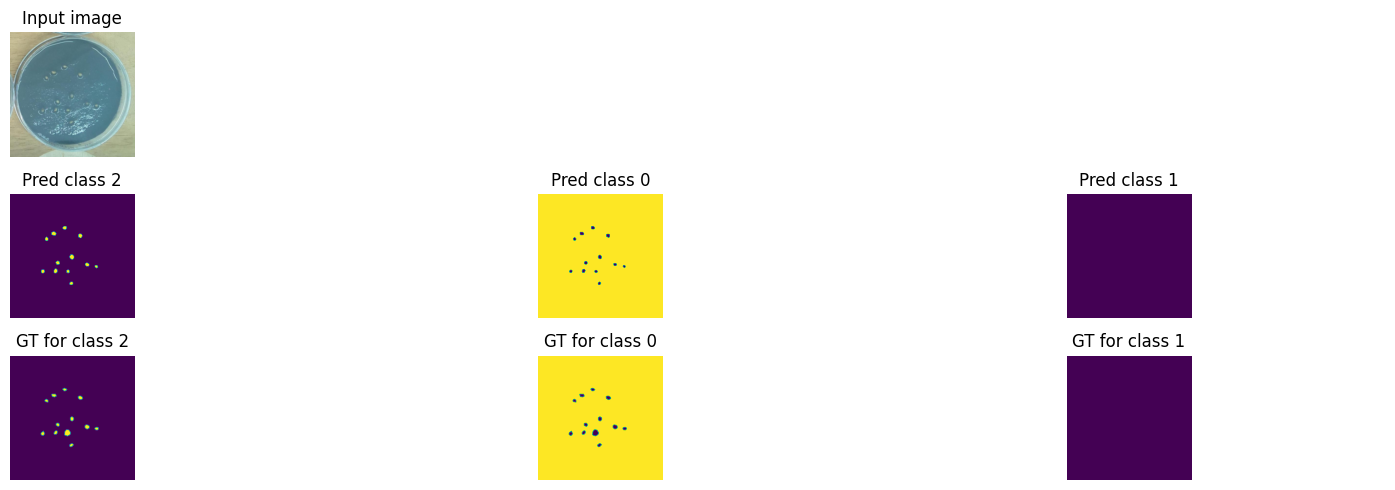

Train loss: 0.00308 | Time: 15m 20s | Val loss: 0.00241
Train_DICE_avg: 0.73329 | Train_Jaccard_avg: 0.66880 | Train_Sensitivity_avg: 0.91760 | Train_Specificity_avg: 0.91772 
Class 0 - Train_DICE: 0.99183 | Train_Jaccard: 0.98381 | Train_Sensitivity: 0.99572 | Train_Specificity: 0.77567 
Class 1 - Train_DICE: 0.43341 | Train_Jaccard: 0.37286 | Train_Sensitivity: 0.84862 | Train_Specificity: 0.98892 
Class 2 - Train_DICE: 0.77462 | Train_Jaccard: 0.64973 | Train_Sensitivity: 0.90844 | Train_Specificity: 0.98857 
Val_DICE_avg: 0.78312 | Val_Jaccard_avg: 0.71181 | Val_Sensitivity_avg: 0.95106 | Val_Specificity_avg: 0.86729 
Class 0 - Val_DICE: 0.99245 | Val_Jaccard: 0.98505 | Val_Sensitivity: 0.99910 | Val_Specificity: 0.62554 
Class 1 - Val_DICE: 0.65933 | Val_Jaccard: 0.59525 | Val_Sensitivity: 0.89687 | Val_Specificity: 0.99300 
Class 2 - Val_DICE: 0.69757 | Val_Jaccard: 0.55512 | Val_Sensitivity: 0.95720 | Val_Specificity: 0.98332 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.00293 | Time: 16m 20s | Val loss: 0.00299
Train_DICE_avg: 0.74108 | Train_Jaccard_avg: 0.67615 | Train_Sensitivity_avg: 0.91901 | Train_Specificity_avg: 0.92080 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98418 | Train_Sensitivity: 0.99567 | Train_Specificity: 0.78464 
Class 1 - Train_DICE: 0.44945 | Train_Jaccard: 0.38624 | Train_Sensitivity: 0.84851 | Train_Specificity: 0.98918 
Class 2 - Train_DICE: 0.78178 | Train_Jaccard: 0.65801 | Train_Sensitivity: 0.91286 | Train_Specificity: 0.98859 
Val_DICE_avg: 0.70101 | Val_Jaccard_avg: 0.63094 | Val_Sensitivity_avg: 0.88930 | Val_Specificity_avg: 0.86965 
Class 0 - Val_DICE: 0.99287 | Val_Jaccard: 0.98588 | Val_Sensitivity: 0.99894 | Val_Specificity: 0.63556 
Class 1 - Val_DICE: 0.46409 | Val_Jaccard: 0.40327 | Val_Sensitivity: 0.70772 | Val_Specificity: 0.99289 
Class 2 - Val_DICE: 0.64606 | Val_Jaccard: 0.50367 | Val_Sensitivity: 0.96122 | Val_Specificity: 0.98049 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.00285 | Time: 17m 20s | Val loss: 0.00239
Train_DICE_avg: 0.74404 | Train_Jaccard_avg: 0.67943 | Train_Sensitivity_avg: 0.92086 | Train_Specificity_avg: 0.91912 
Class 0 - Train_DICE: 0.99198 | Train_Jaccard: 0.98412 | Train_Sensitivity: 0.99574 | Train_Specificity: 0.77916 
Class 1 - Train_DICE: 0.45513 | Train_Jaccard: 0.39194 | Train_Sensitivity: 0.85536 | Train_Specificity: 0.98918 
Class 2 - Train_DICE: 0.78500 | Train_Jaccard: 0.66223 | Train_Sensitivity: 0.91148 | Train_Specificity: 0.98902 
Val_DICE_avg: 0.79702 | Val_Jaccard_avg: 0.72161 | Val_Sensitivity_avg: 0.94324 | Val_Specificity_avg: 0.86356 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98376 | Val_Sensitivity: 0.99904 | Val_Specificity: 0.61363 
Class 1 - Val_DICE: 0.70069 | Val_Jaccard: 0.62688 | Val_Sensitivity: 0.85925 | Val_Specificity: 0.99420 
Class 2 - Val_DICE: 0.69857 | Val_Jaccard: 0.55418 | Val_Sensitivity: 0.97144 | Val_Specificity: 0.98286 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.00271 | Time: 18m 19s | Val loss: 0.00203
Train_DICE_avg: 0.75134 | Train_Jaccard_avg: 0.68640 | Train_Sensitivity_avg: 0.92137 | Train_Specificity_avg: 0.92074 
Class 0 - Train_DICE: 0.99215 | Train_Jaccard: 0.98445 | Train_Sensitivity: 0.99587 | Train_Specificity: 0.78373 
Class 1 - Train_DICE: 0.47489 | Train_Jaccard: 0.40977 | Train_Sensitivity: 0.85405 | Train_Specificity: 0.98947 
Class 2 - Train_DICE: 0.78699 | Train_Jaccard: 0.66496 | Train_Sensitivity: 0.91419 | Train_Specificity: 0.98902 
Val_DICE_avg: 0.80721 | Val_Jaccard_avg: 0.73919 | Val_Sensitivity_avg: 0.95945 | Val_Specificity_avg: 0.86483 
Class 0 - Val_DICE: 0.99200 | Val_Jaccard: 0.98415 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.61462 
Class 1 - Val_DICE: 0.66265 | Val_Jaccard: 0.59894 | Val_Sensitivity: 0.92401 | Val_Specificity: 0.99334 
Class 2 - Val_DICE: 0.76698 | Val_Jaccard: 0.63447 | Val_Sensitivity: 0.95511 | Val_Specificity: 0.98652 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.00260 | Time: 19m 19s | Val loss: 0.00212
Train_DICE_avg: 0.75900 | Train_Jaccard_avg: 0.69350 | Train_Sensitivity_avg: 0.92374 | Train_Specificity_avg: 0.92045 
Class 0 - Train_DICE: 0.99227 | Train_Jaccard: 0.98469 | Train_Sensitivity: 0.99611 | Train_Specificity: 0.78232 
Class 1 - Train_DICE: 0.49071 | Train_Jaccard: 0.42288 | Train_Sensitivity: 0.86024 | Train_Specificity: 0.98983 
Class 2 - Train_DICE: 0.79403 | Train_Jaccard: 0.67293 | Train_Sensitivity: 0.91486 | Train_Specificity: 0.98921 
Val_DICE_avg: 0.77809 | Val_Jaccard_avg: 0.70778 | Val_Sensitivity_avg: 0.92639 | Val_Specificity_avg: 0.86112 
Class 0 - Val_DICE: 0.99186 | Val_Jaccard: 0.98388 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.60473 
Class 1 - Val_DICE: 0.58901 | Val_Jaccard: 0.52414 | Val_Sensitivity: 0.82053 | Val_Specificity: 0.99372 
Class 2 - Val_DICE: 0.75341 | Val_Jaccard: 0.61532 | Val_Sensitivity: 0.95937 | Val_Specificity: 0.98490 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


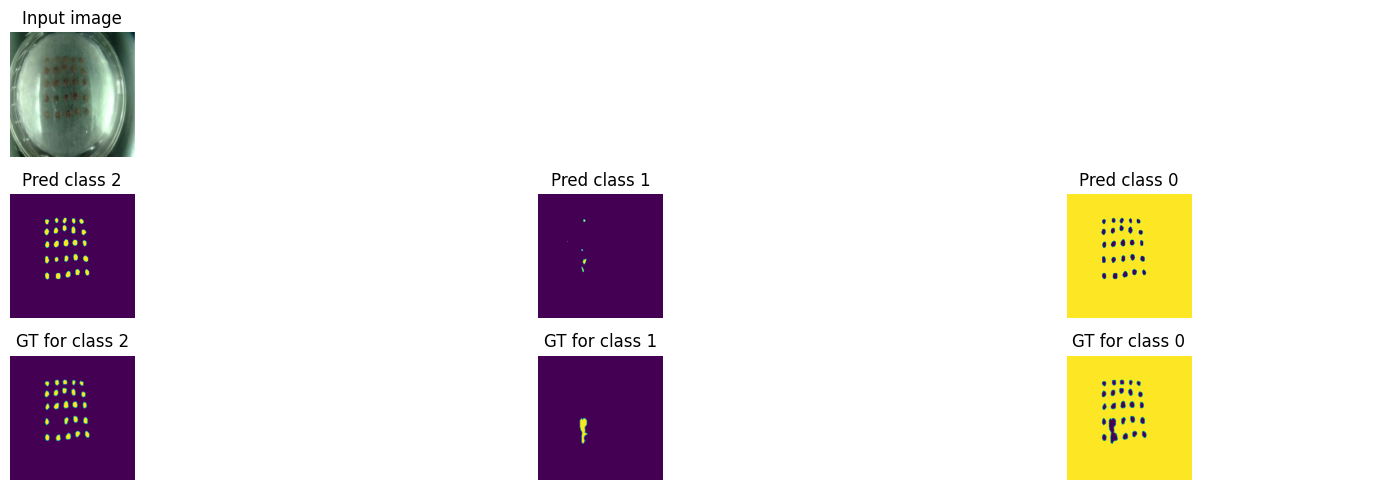

Train loss: 0.00259 | Time: 20m 19s | Val loss: 0.00202
Train_DICE_avg: 0.75595 | Train_Jaccard_avg: 0.69062 | Train_Sensitivity_avg: 0.92278 | Train_Specificity_avg: 0.92128 
Class 0 - Train_DICE: 0.99227 | Train_Jaccard: 0.98468 | Train_Sensitivity: 0.99589 | Train_Specificity: 0.78503 
Class 1 - Train_DICE: 0.48398 | Train_Jaccard: 0.41647 | Train_Sensitivity: 0.85926 | Train_Specificity: 0.98959 
Class 2 - Train_DICE: 0.79160 | Train_Jaccard: 0.67070 | Train_Sensitivity: 0.91320 | Train_Specificity: 0.98921 
Val_DICE_avg: 0.76357 | Val_Jaccard_avg: 0.68835 | Val_Sensitivity_avg: 0.91505 | Val_Specificity_avg: 0.86886 
Class 0 - Val_DICE: 0.99247 | Val_Jaccard: 0.98509 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.62980 
Class 1 - Val_DICE: 0.59842 | Val_Jaccard: 0.52743 | Val_Sensitivity: 0.77264 | Val_Specificity: 0.99422 
Class 2 - Val_DICE: 0.69982 | Val_Jaccard: 0.55252 | Val_Sensitivity: 0.97318 | Val_Specificity: 0.98256 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.00249 | Time: 21m 20s | Val loss: 0.00191
Train_DICE_avg: 0.75824 | Train_Jaccard_avg: 0.69283 | Train_Sensitivity_avg: 0.92113 | Train_Specificity_avg: 0.92014 
Class 0 - Train_DICE: 0.99223 | Train_Jaccard: 0.98460 | Train_Sensitivity: 0.99611 | Train_Specificity: 0.78164 
Class 1 - Train_DICE: 0.48750 | Train_Jaccard: 0.41950 | Train_Sensitivity: 0.85072 | Train_Specificity: 0.98961 
Class 2 - Train_DICE: 0.79499 | Train_Jaccard: 0.67438 | Train_Sensitivity: 0.91658 | Train_Specificity: 0.98917 
Val_DICE_avg: 0.79566 | Val_Jaccard_avg: 0.72156 | Val_Sensitivity_avg: 0.95261 | Val_Specificity_avg: 0.87619 
Class 0 - Val_DICE: 0.99335 | Val_Jaccard: 0.98681 | Val_Sensitivity: 0.99913 | Val_Specificity: 0.65210 
Class 1 - Val_DICE: 0.67124 | Val_Jaccard: 0.60336 | Val_Sensitivity: 0.89769 | Val_Specificity: 0.99343 
Class 2 - Val_DICE: 0.72239 | Val_Jaccard: 0.57452 | Val_Sensitivity: 0.96101 | Val_Specificity: 0.98305 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00243 | Time: 22m 19s | Val loss: 0.00183
Train_DICE_avg: 0.75558 | Train_Jaccard_avg: 0.69019 | Train_Sensitivity_avg: 0.92300 | Train_Specificity_avg: 0.92124 
Class 0 - Train_DICE: 0.99249 | Train_Jaccard: 0.98511 | Train_Sensitivity: 0.99614 | Train_Specificity: 0.78507 
Class 1 - Train_DICE: 0.48214 | Train_Jaccard: 0.41403 | Train_Sensitivity: 0.85578 | Train_Specificity: 0.98950 
Class 2 - Train_DICE: 0.79210 | Train_Jaccard: 0.67142 | Train_Sensitivity: 0.91708 | Train_Specificity: 0.98916 
Val_DICE_avg: 0.80633 | Val_Jaccard_avg: 0.73778 | Val_Sensitivity_avg: 0.95511 | Val_Specificity_avg: 0.86504 
Class 0 - Val_DICE: 0.99190 | Val_Jaccard: 0.98397 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61530 
Class 1 - Val_DICE: 0.67604 | Val_Jaccard: 0.61311 | Val_Sensitivity: 0.90358 | Val_Specificity: 0.99390 
Class 2 - Val_DICE: 0.75105 | Val_Jaccard: 0.61626 | Val_Sensitivity: 0.96239 | Val_Specificity: 0.98594 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.00234 | Time: 23m 19s | Val loss: 0.00174
Train_DICE_avg: 0.76625 | Train_Jaccard_avg: 0.70056 | Train_Sensitivity_avg: 0.92650 | Train_Specificity_avg: 0.92165 
Class 0 - Train_DICE: 0.99249 | Train_Jaccard: 0.98512 | Train_Sensitivity: 0.99629 | Train_Specificity: 0.78562 
Class 1 - Train_DICE: 0.50604 | Train_Jaccard: 0.43551 | Train_Sensitivity: 0.86316 | Train_Specificity: 0.98993 
Class 2 - Train_DICE: 0.80022 | Train_Jaccard: 0.68105 | Train_Sensitivity: 0.92005 | Train_Specificity: 0.98941 
Val_DICE_avg: 0.81615 | Val_Jaccard_avg: 0.74369 | Val_Sensitivity_avg: 0.95549 | Val_Specificity_avg: 0.86753 
Class 0 - Val_DICE: 0.99244 | Val_Jaccard: 0.98503 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.62366 
Class 1 - Val_DICE: 0.71036 | Val_Jaccard: 0.63971 | Val_Sensitivity: 0.89933 | Val_Specificity: 0.99411 
Class 2 - Val_DICE: 0.74566 | Val_Jaccard: 0.60634 | Val_Sensitivity: 0.96793 | Val_Specificity: 0.98483 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.00231 | Time: 24m 19s | Val loss: 0.00178
Train_DICE_avg: 0.76543 | Train_Jaccard_avg: 0.70055 | Train_Sensitivity_avg: 0.92644 | Train_Specificity_avg: 0.92095 
Class 0 - Train_DICE: 0.99259 | Train_Jaccard: 0.98533 | Train_Sensitivity: 0.99642 | Train_Specificity: 0.78341 
Class 1 - Train_DICE: 0.50326 | Train_Jaccard: 0.43427 | Train_Sensitivity: 0.86255 | Train_Specificity: 0.98989 
Class 2 - Train_DICE: 0.80045 | Train_Jaccard: 0.68204 | Train_Sensitivity: 0.92035 | Train_Specificity: 0.98956 
Val_DICE_avg: 0.81398 | Val_Jaccard_avg: 0.74554 | Val_Sensitivity_avg: 0.96483 | Val_Specificity_avg: 0.86659 
Class 0 - Val_DICE: 0.99232 | Val_Jaccard: 0.98479 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.62009 
Class 1 - Val_DICE: 0.68245 | Val_Jaccard: 0.61801 | Val_Sensitivity: 0.93644 | Val_Specificity: 0.99339 
Class 2 - Val_DICE: 0.76719 | Val_Jaccard: 0.63382 | Val_Sensitivity: 0.95883 | Val_Specificity: 0.98630 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


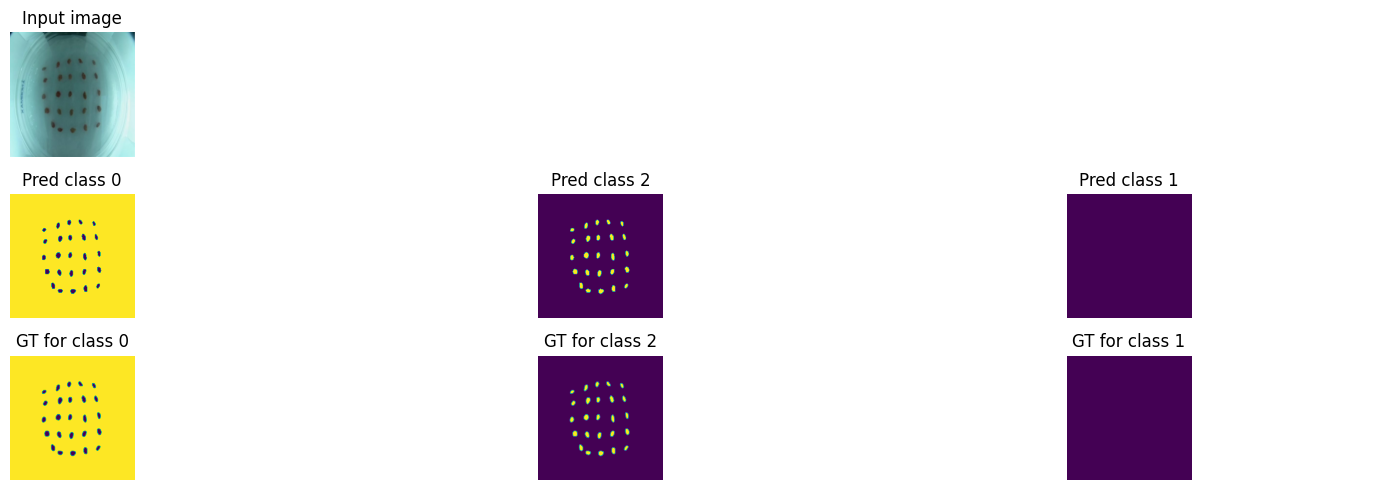

Train loss: 0.00227 | Time: 25m 18s | Val loss: 0.00176
Train_DICE_avg: 0.76889 | Train_Jaccard_avg: 0.70315 | Train_Sensitivity_avg: 0.92280 | Train_Specificity_avg: 0.92237 
Class 0 - Train_DICE: 0.99265 | Train_Jaccard: 0.98544 | Train_Sensitivity: 0.99629 | Train_Specificity: 0.78720 
Class 1 - Train_DICE: 0.51234 | Train_Jaccard: 0.44044 | Train_Sensitivity: 0.85285 | Train_Specificity: 0.99037 
Class 2 - Train_DICE: 0.80166 | Train_Jaccard: 0.68357 | Train_Sensitivity: 0.91925 | Train_Specificity: 0.98953 
Val_DICE_avg: 0.81162 | Val_Jaccard_avg: 0.74090 | Val_Sensitivity_avg: 0.95888 | Val_Specificity_avg: 0.87210 
Class 0 - Val_DICE: 0.99253 | Val_Jaccard: 0.98521 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.63706 
Class 1 - Val_DICE: 0.70067 | Val_Jaccard: 0.63350 | Val_Sensitivity: 0.92216 | Val_Specificity: 0.99375 
Class 2 - Val_DICE: 0.74166 | Val_Jaccard: 0.60397 | Val_Sensitivity: 0.95517 | Val_Specificity: 0.98550 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00224 | Time: 26m 17s | Val loss: 0.00172
Train_DICE_avg: 0.77207 | Train_Jaccard_avg: 0.70750 | Train_Sensitivity_avg: 0.92642 | Train_Specificity_avg: 0.92474 
Class 0 - Train_DICE: 0.99276 | Train_Jaccard: 0.98566 | Train_Sensitivity: 0.99638 | Train_Specificity: 0.79389 
Class 1 - Train_DICE: 0.51565 | Train_Jaccard: 0.44487 | Train_Sensitivity: 0.86109 | Train_Specificity: 0.99036 
Class 2 - Train_DICE: 0.80778 | Train_Jaccard: 0.69196 | Train_Sensitivity: 0.92179 | Train_Specificity: 0.98995 
Val_DICE_avg: 0.80722 | Val_Jaccard_avg: 0.73372 | Val_Sensitivity_avg: 0.95182 | Val_Specificity_avg: 0.87624 
Class 0 - Val_DICE: 0.99316 | Val_Jaccard: 0.98645 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.65031 
Class 1 - Val_DICE: 0.68753 | Val_Jaccard: 0.61560 | Val_Sensitivity: 0.88695 | Val_Specificity: 0.99402 
Class 2 - Val_DICE: 0.74098 | Val_Jaccard: 0.59910 | Val_Sensitivity: 0.96926 | Val_Specificity: 0.98440 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00218 | Time: 27m 17s | Val loss: 0.00175
Train_DICE_avg: 0.77676 | Train_Jaccard_avg: 0.71160 | Train_Sensitivity_avg: 0.92741 | Train_Specificity_avg: 0.92429 
Class 0 - Train_DICE: 0.99283 | Train_Jaccard: 0.98579 | Train_Sensitivity: 0.99655 | Train_Specificity: 0.79286 
Class 1 - Train_DICE: 0.52827 | Train_Jaccard: 0.45621 | Train_Sensitivity: 0.86141 | Train_Specificity: 0.99036 
Class 2 - Train_DICE: 0.80917 | Train_Jaccard: 0.69280 | Train_Sensitivity: 0.92427 | Train_Specificity: 0.98964 
Val_DICE_avg: 0.81235 | Val_Jaccard_avg: 0.74475 | Val_Sensitivity_avg: 0.96727 | Val_Specificity_avg: 0.87054 
Class 0 - Val_DICE: 0.99259 | Val_Jaccard: 0.98532 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.63158 
Class 1 - Val_DICE: 0.67588 | Val_Jaccard: 0.61219 | Val_Sensitivity: 0.94767 | Val_Specificity: 0.99323 
Class 2 - Val_DICE: 0.76859 | Val_Jaccard: 0.63673 | Val_Sensitivity: 0.95485 | Val_Specificity: 0.98680 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00216 | Time: 28m 16s | Val loss: 0.00169
Train_DICE_avg: 0.77385 | Train_Jaccard_avg: 0.70877 | Train_Sensitivity_avg: 0.92545 | Train_Specificity_avg: 0.92308 
Class 0 - Train_DICE: 0.99283 | Train_Jaccard: 0.98578 | Train_Sensitivity: 0.99652 | Train_Specificity: 0.78913 
Class 1 - Train_DICE: 0.52070 | Train_Jaccard: 0.44873 | Train_Sensitivity: 0.85531 | Train_Specificity: 0.99024 
Class 2 - Train_DICE: 0.80803 | Train_Jaccard: 0.69180 | Train_Sensitivity: 0.92453 | Train_Specificity: 0.98986 
Val_DICE_avg: 0.80229 | Val_Jaccard_avg: 0.73067 | Val_Sensitivity_avg: 0.95485 | Val_Specificity_avg: 0.87379 
Class 0 - Val_DICE: 0.99293 | Val_Jaccard: 0.98599 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.64289 
Class 1 - Val_DICE: 0.67897 | Val_Jaccard: 0.61274 | Val_Sensitivity: 0.89544 | Val_Specificity: 0.99410 
Class 2 - Val_DICE: 0.73498 | Val_Jaccard: 0.59329 | Val_Sensitivity: 0.96980 | Val_Specificity: 0.98438 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00215 | Time: 29m 15s | Val loss: 0.00183
Train_DICE_avg: 0.78072 | Train_Jaccard_avg: 0.71556 | Train_Sensitivity_avg: 0.92877 | Train_Specificity_avg: 0.92460 
Class 0 - Train_DICE: 0.99285 | Train_Jaccard: 0.98582 | Train_Sensitivity: 0.99647 | Train_Specificity: 0.79324 
Class 1 - Train_DICE: 0.53804 | Train_Jaccard: 0.46494 | Train_Sensitivity: 0.86486 | Train_Specificity: 0.99058 
Class 2 - Train_DICE: 0.81129 | Train_Jaccard: 0.69593 | Train_Sensitivity: 0.92497 | Train_Specificity: 0.98999 
Val_DICE_avg: 0.76520 | Val_Jaccard_avg: 0.68870 | Val_Sensitivity_avg: 0.90830 | Val_Specificity_avg: 0.87388 
Class 0 - Val_DICE: 0.99311 | Val_Jaccard: 0.98635 | Val_Sensitivity: 0.99920 | Val_Specificity: 0.64475 
Class 1 - Val_DICE: 0.60070 | Val_Jaccard: 0.52488 | Val_Sensitivity: 0.74482 | Val_Specificity: 0.99453 
Class 2 - Val_DICE: 0.70178 | Val_Jaccard: 0.55486 | Val_Sensitivity: 0.98089 | Val_Specificity: 0.98238 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


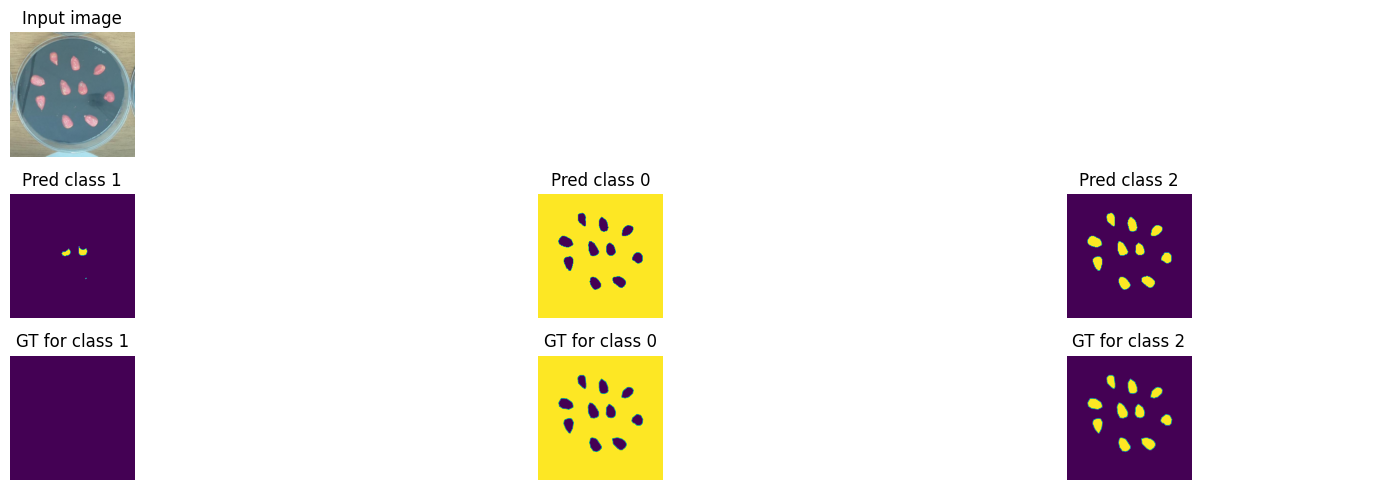

Train loss: 0.00213 | Time: 30m 16s | Val loss: 0.00181
Train_DICE_avg: 0.77657 | Train_Jaccard_avg: 0.71117 | Train_Sensitivity_avg: 0.92839 | Train_Specificity_avg: 0.92211 
Class 0 - Train_DICE: 0.99284 | Train_Jaccard: 0.98581 | Train_Sensitivity: 0.99663 | Train_Specificity: 0.78634 
Class 1 - Train_DICE: 0.52879 | Train_Jaccard: 0.45581 | Train_Sensitivity: 0.86248 | Train_Specificity: 0.99026 
Class 2 - Train_DICE: 0.80806 | Train_Jaccard: 0.69189 | Train_Sensitivity: 0.92606 | Train_Specificity: 0.98973 
Val_DICE_avg: 0.75102 | Val_Jaccard_avg: 0.67673 | Val_Sensitivity_avg: 0.90505 | Val_Specificity_avg: 0.87720 
Class 0 - Val_DICE: 0.99291 | Val_Jaccard: 0.98595 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.65438 
Class 1 - Val_DICE: 0.58042 | Val_Jaccard: 0.50550 | Val_Sensitivity: 0.73727 | Val_Specificity: 0.99465 
Class 2 - Val_DICE: 0.67974 | Val_Jaccard: 0.53875 | Val_Sensitivity: 0.97861 | Val_Specificity: 0.98256 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00209 | Time: 31m 16s | Val loss: 0.00172
Train_DICE_avg: 0.77946 | Train_Jaccard_avg: 0.71460 | Train_Sensitivity_avg: 0.92925 | Train_Specificity_avg: 0.92579 
Class 0 - Train_DICE: 0.99302 | Train_Jaccard: 0.98616 | Train_Sensitivity: 0.99666 | Train_Specificity: 0.79669 
Class 1 - Train_DICE: 0.53313 | Train_Jaccard: 0.45981 | Train_Sensitivity: 0.86595 | Train_Specificity: 0.99058 
Class 2 - Train_DICE: 0.81224 | Train_Jaccard: 0.69782 | Train_Sensitivity: 0.92512 | Train_Specificity: 0.99011 
Val_DICE_avg: 0.82414 | Val_Jaccard_avg: 0.75529 | Val_Sensitivity_avg: 0.95304 | Val_Specificity_avg: 0.86439 
Class 0 - Val_DICE: 0.99204 | Val_Jaccard: 0.98424 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.61257 
Class 1 - Val_DICE: 0.70768 | Val_Jaccard: 0.63973 | Val_Sensitivity: 0.89888 | Val_Specificity: 0.99429 
Class 2 - Val_DICE: 0.77270 | Val_Jaccard: 0.64188 | Val_Sensitivity: 0.96090 | Val_Specificity: 0.98632 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00207 | Time: 32m 16s | Val loss: 0.00164
Train_DICE_avg: 0.78571 | Train_Jaccard_avg: 0.72081 | Train_Sensitivity_avg: 0.93149 | Train_Specificity_avg: 0.92557 
Class 0 - Train_DICE: 0.99302 | Train_Jaccard: 0.98617 | Train_Sensitivity: 0.99670 | Train_Specificity: 0.79571 
Class 1 - Train_DICE: 0.54997 | Train_Jaccard: 0.47590 | Train_Sensitivity: 0.86953 | Train_Specificity: 0.99086 
Class 2 - Train_DICE: 0.81413 | Train_Jaccard: 0.70037 | Train_Sensitivity: 0.92825 | Train_Specificity: 0.99014 
Val_DICE_avg: 0.81234 | Val_Jaccard_avg: 0.73955 | Val_Sensitivity_avg: 0.96210 | Val_Specificity_avg: 0.87874 
Class 0 - Val_DICE: 0.99345 | Val_Jaccard: 0.98700 | Val_Sensitivity: 0.99923 | Val_Specificity: 0.65812 
Class 1 - Val_DICE: 0.70957 | Val_Jaccard: 0.63956 | Val_Sensitivity: 0.92082 | Val_Specificity: 0.99390 
Class 2 - Val_DICE: 0.73400 | Val_Jaccard: 0.59208 | Val_Sensitivity: 0.96623 | Val_Specificity: 0.98419 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00201 | Time: 33m 16s | Val loss: 0.00170
Train_DICE_avg: 0.78553 | Train_Jaccard_avg: 0.72078 | Train_Sensitivity_avg: 0.93148 | Train_Specificity_avg: 0.92475 
Class 0 - Train_DICE: 0.99313 | Train_Jaccard: 0.98639 | Train_Sensitivity: 0.99681 | Train_Specificity: 0.79340 
Class 1 - Train_DICE: 0.54795 | Train_Jaccard: 0.47430 | Train_Sensitivity: 0.86668 | Train_Specificity: 0.99075 
Class 2 - Train_DICE: 0.81551 | Train_Jaccard: 0.70167 | Train_Sensitivity: 0.93095 | Train_Specificity: 0.99008 
Val_DICE_avg: 0.79865 | Val_Jaccard_avg: 0.72513 | Val_Sensitivity_avg: 0.92419 | Val_Specificity_avg: 0.86595 
Class 0 - Val_DICE: 0.99217 | Val_Jaccard: 0.98451 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.61867 
Class 1 - Val_DICE: 0.67218 | Val_Jaccard: 0.59971 | Val_Sensitivity: 0.79358 | Val_Specificity: 0.99521 
Class 2 - Val_DICE: 0.73160 | Val_Jaccard: 0.59118 | Val_Sensitivity: 0.97957 | Val_Specificity: 0.98396 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00201 | Time: 34m 16s | Val loss: 0.00162
Train_DICE_avg: 0.78343 | Train_Jaccard_avg: 0.71850 | Train_Sensitivity_avg: 0.93077 | Train_Specificity_avg: 0.92333 
Class 0 - Train_DICE: 0.99303 | Train_Jaccard: 0.98619 | Train_Sensitivity: 0.99692 | Train_Specificity: 0.78946 
Class 1 - Train_DICE: 0.54209 | Train_Jaccard: 0.46788 | Train_Sensitivity: 0.86479 | Train_Specificity: 0.99067 
Class 2 - Train_DICE: 0.81516 | Train_Jaccard: 0.70143 | Train_Sensitivity: 0.93060 | Train_Specificity: 0.98988 
Val_DICE_avg: 0.78921 | Val_Jaccard_avg: 0.71531 | Val_Sensitivity_avg: 0.92867 | Val_Specificity_avg: 0.88054 
Class 0 - Val_DICE: 0.99364 | Val_Jaccard: 0.98740 | Val_Sensitivity: 0.99923 | Val_Specificity: 0.66339 
Class 1 - Val_DICE: 0.66128 | Val_Jaccard: 0.58752 | Val_Sensitivity: 0.80695 | Val_Specificity: 0.99453 
Class 2 - Val_DICE: 0.71272 | Val_Jaccard: 0.57101 | Val_Sensitivity: 0.97983 | Val_Specificity: 0.98372 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


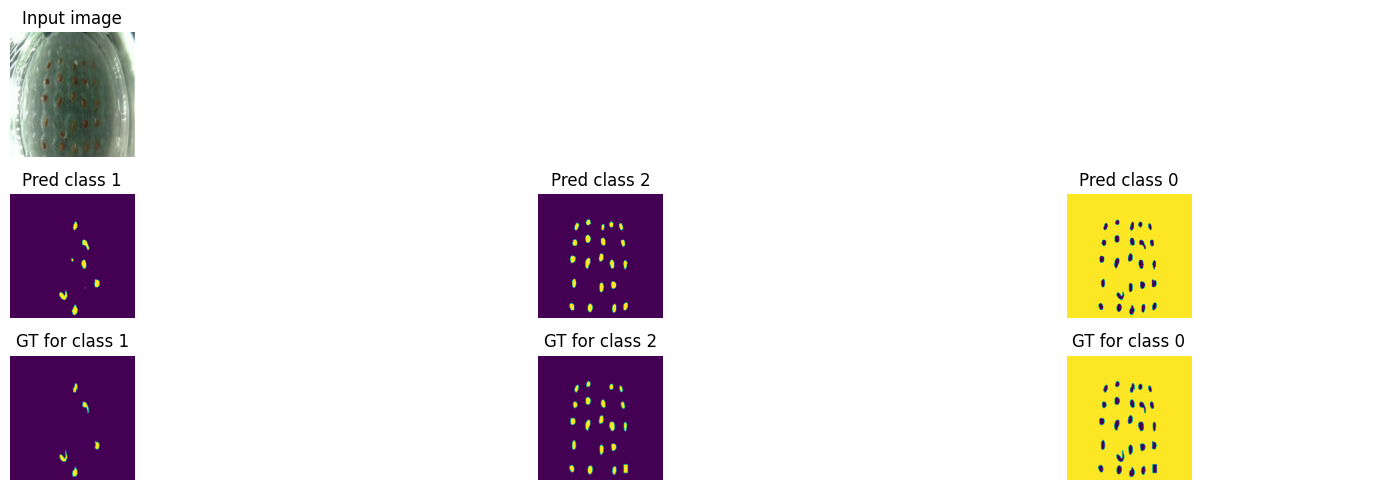

Train loss: 0.00200 | Time: 35m 17s | Val loss: 0.00162
Train_DICE_avg: 0.78078 | Train_Jaccard_avg: 0.71546 | Train_Sensitivity_avg: 0.93468 | Train_Specificity_avg: 0.92347 
Class 0 - Train_DICE: 0.99310 | Train_Jaccard: 0.98631 | Train_Sensitivity: 0.99684 | Train_Specificity: 0.79017 
Class 1 - Train_DICE: 0.53762 | Train_Jaccard: 0.46345 | Train_Sensitivity: 0.87528 | Train_Specificity: 0.99045 
Class 2 - Train_DICE: 0.81163 | Train_Jaccard: 0.69661 | Train_Sensitivity: 0.93192 | Train_Specificity: 0.98980 
Val_DICE_avg: 0.82192 | Val_Jaccard_avg: 0.74974 | Val_Sensitivity_avg: 0.95588 | Val_Specificity_avg: 0.86718 
Class 0 - Val_DICE: 0.99209 | Val_Jaccard: 0.98435 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.62148 
Class 1 - Val_DICE: 0.73303 | Val_Jaccard: 0.66051 | Val_Sensitivity: 0.89278 | Val_Specificity: 0.99492 
Class 2 - Val_DICE: 0.74064 | Val_Jaccard: 0.60434 | Val_Sensitivity: 0.97545 | Val_Specificity: 0.98514 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.00195 | Time: 36m 16s | Val loss: 0.00164
Train_DICE_avg: 0.79012 | Train_Jaccard_avg: 0.72552 | Train_Sensitivity_avg: 0.93580 | Train_Specificity_avg: 0.92498 
Class 0 - Train_DICE: 0.99314 | Train_Jaccard: 0.98640 | Train_Sensitivity: 0.99683 | Train_Specificity: 0.79390 
Class 1 - Train_DICE: 0.55880 | Train_Jaccard: 0.48419 | Train_Sensitivity: 0.87672 | Train_Specificity: 0.99085 
Class 2 - Train_DICE: 0.81841 | Train_Jaccard: 0.70598 | Train_Sensitivity: 0.93384 | Train_Specificity: 0.99018 
Val_DICE_avg: 0.79519 | Val_Jaccard_avg: 0.72297 | Val_Sensitivity_avg: 0.92430 | Val_Specificity_avg: 0.86696 
Class 0 - Val_DICE: 0.99223 | Val_Jaccard: 0.98462 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62119 
Class 1 - Val_DICE: 0.64434 | Val_Jaccard: 0.57369 | Val_Sensitivity: 0.80261 | Val_Specificity: 0.99469 
Class 2 - Val_DICE: 0.74901 | Val_Jaccard: 0.61060 | Val_Sensitivity: 0.97092 | Val_Specificity: 0.98500 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.00193 | Time: 37m 16s | Val loss: 0.00162
Train_DICE_avg: 0.78808 | Train_Jaccard_avg: 0.72348 | Train_Sensitivity_avg: 0.93291 | Train_Specificity_avg: 0.92380 
Class 0 - Train_DICE: 0.99316 | Train_Jaccard: 0.98643 | Train_Sensitivity: 0.99706 | Train_Specificity: 0.79054 
Class 1 - Train_DICE: 0.55199 | Train_Jaccard: 0.47728 | Train_Sensitivity: 0.86909 | Train_Specificity: 0.99066 
Class 2 - Train_DICE: 0.81910 | Train_Jaccard: 0.70673 | Train_Sensitivity: 0.93257 | Train_Specificity: 0.99021 
Val_DICE_avg: 0.82160 | Val_Jaccard_avg: 0.74971 | Val_Sensitivity_avg: 0.95231 | Val_Specificity_avg: 0.87215 
Class 0 - Val_DICE: 0.99269 | Val_Jaccard: 0.98551 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.63647 
Class 1 - Val_DICE: 0.71448 | Val_Jaccard: 0.64196 | Val_Sensitivity: 0.88657 | Val_Specificity: 0.99450 
Class 2 - Val_DICE: 0.75764 | Val_Jaccard: 0.62167 | Val_Sensitivity: 0.97100 | Val_Specificity: 0.98547 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00189 | Time: 38m 16s | Val loss: 0.00164
Train_DICE_avg: 0.78882 | Train_Jaccard_avg: 0.72387 | Train_Sensitivity_avg: 0.93844 | Train_Specificity_avg: 0.92266 
Class 0 - Train_DICE: 0.99313 | Train_Jaccard: 0.98638 | Train_Sensitivity: 0.99699 | Train_Specificity: 0.78760 
Class 1 - Train_DICE: 0.55655 | Train_Jaccard: 0.48149 | Train_Sensitivity: 0.88105 | Train_Specificity: 0.99056 
Class 2 - Train_DICE: 0.81679 | Train_Jaccard: 0.70373 | Train_Sensitivity: 0.93729 | Train_Specificity: 0.98983 
Val_DICE_avg: 0.83811 | Val_Jaccard_avg: 0.76854 | Val_Sensitivity_avg: 0.96414 | Val_Specificity_avg: 0.86493 
Class 0 - Val_DICE: 0.99206 | Val_Jaccard: 0.98429 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.61342 
Class 1 - Val_DICE: 0.74510 | Val_Jaccard: 0.67406 | Val_Sensitivity: 0.92687 | Val_Specificity: 0.99474 
Class 2 - Val_DICE: 0.77717 | Val_Jaccard: 0.64726 | Val_Sensitivity: 0.96612 | Val_Specificity: 0.98663 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00190 | Time: 39m 16s | Val loss: 0.00156
Train_DICE_avg: 0.79564 | Train_Jaccard_avg: 0.73117 | Train_Sensitivity_avg: 0.93573 | Train_Specificity_avg: 0.92499 
Class 0 - Train_DICE: 0.99326 | Train_Jaccard: 0.98663 | Train_Sensitivity: 0.99706 | Train_Specificity: 0.79380 
Class 1 - Train_DICE: 0.57037 | Train_Jaccard: 0.49448 | Train_Sensitivity: 0.87609 | Train_Specificity: 0.99077 
Class 2 - Train_DICE: 0.82331 | Train_Jaccard: 0.71239 | Train_Sensitivity: 0.93404 | Train_Specificity: 0.99041 
Val_DICE_avg: 0.82387 | Val_Jaccard_avg: 0.75286 | Val_Sensitivity_avg: 0.94904 | Val_Specificity_avg: 0.86730 
Class 0 - Val_DICE: 0.99224 | Val_Jaccard: 0.98464 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.62121 
Class 1 - Val_DICE: 0.71512 | Val_Jaccard: 0.64331 | Val_Sensitivity: 0.87245 | Val_Specificity: 0.99500 
Class 2 - Val_DICE: 0.76424 | Val_Jaccard: 0.63064 | Val_Sensitivity: 0.97528 | Val_Specificity: 0.98569 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


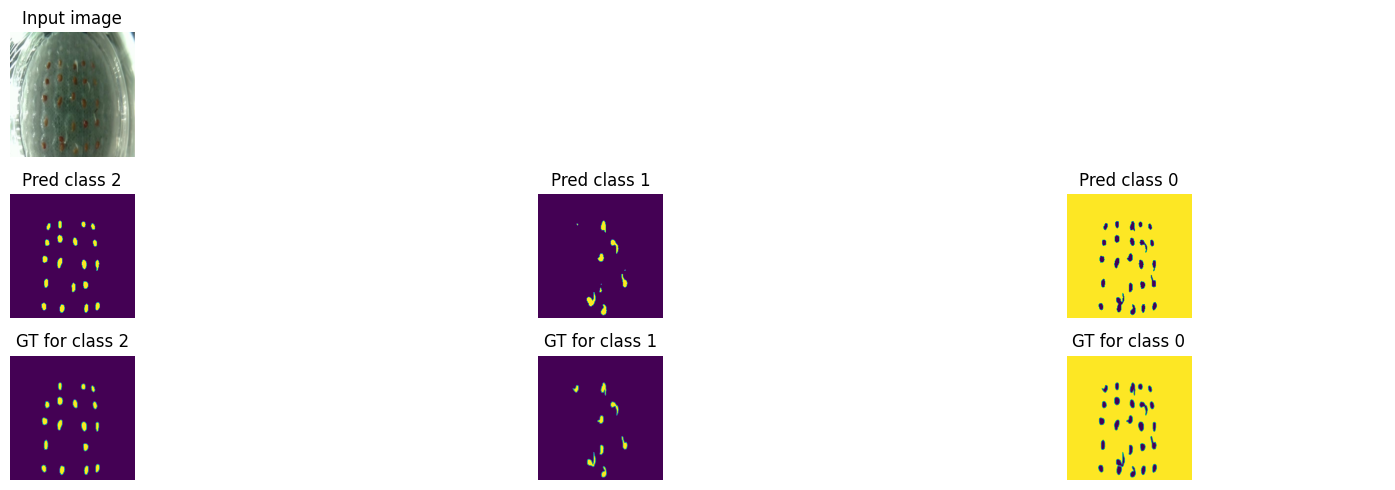

Train loss: 0.00184 | Time: 40m 16s | Val loss: 0.00154
Train_DICE_avg: 0.79664 | Train_Jaccard_avg: 0.73156 | Train_Sensitivity_avg: 0.93985 | Train_Specificity_avg: 0.92300 
Class 0 - Train_DICE: 0.99317 | Train_Jaccard: 0.98646 | Train_Sensitivity: 0.99716 | Train_Specificity: 0.78822 
Class 1 - Train_DICE: 0.57683 | Train_Jaccard: 0.50076 | Train_Sensitivity: 0.88394 | Train_Specificity: 0.99079 
Class 2 - Train_DICE: 0.81991 | Train_Jaccard: 0.70746 | Train_Sensitivity: 0.93847 | Train_Specificity: 0.98998 
Val_DICE_avg: 0.82965 | Val_Jaccard_avg: 0.75971 | Val_Sensitivity_avg: 0.96242 | Val_Specificity_avg: 0.86633 
Class 0 - Val_DICE: 0.99209 | Val_Jaccard: 0.98434 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61804 
Class 1 - Val_DICE: 0.72848 | Val_Jaccard: 0.65850 | Val_Sensitivity: 0.91847 | Val_Specificity: 0.99465 
Class 2 - Val_DICE: 0.76840 | Val_Jaccard: 0.63629 | Val_Sensitivity: 0.96942 | Val_Specificity: 0.98631 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.00186 | Time: 41m 16s | Val loss: 0.00149
Train_DICE_avg: 0.79467 | Train_Jaccard_avg: 0.73020 | Train_Sensitivity_avg: 0.93770 | Train_Specificity_avg: 0.92446 
Class 0 - Train_DICE: 0.99319 | Train_Jaccard: 0.98650 | Train_Sensitivity: 0.99704 | Train_Specificity: 0.79237 
Class 1 - Train_DICE: 0.56818 | Train_Jaccard: 0.49303 | Train_Sensitivity: 0.88018 | Train_Specificity: 0.99085 
Class 2 - Train_DICE: 0.82265 | Train_Jaccard: 0.71107 | Train_Sensitivity: 0.93589 | Train_Specificity: 0.99017 
Val_DICE_avg: 0.83565 | Val_Jaccard_avg: 0.76597 | Val_Sensitivity_avg: 0.95683 | Val_Specificity_avg: 0.86418 
Class 0 - Val_DICE: 0.99187 | Val_Jaccard: 0.98391 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.61116 
Class 1 - Val_DICE: 0.73942 | Val_Jaccard: 0.66910 | Val_Sensitivity: 0.89945 | Val_Specificity: 0.99502 
Class 2 - Val_DICE: 0.77565 | Val_Jaccard: 0.64491 | Val_Sensitivity: 0.97162 | Val_Specificity: 0.98637 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00183 | Time: 42m 16s | Val loss: 0.00149
Train_DICE_avg: 0.79713 | Train_Jaccard_avg: 0.73274 | Train_Sensitivity_avg: 0.93683 | Train_Specificity_avg: 0.92521 
Class 0 - Train_DICE: 0.99326 | Train_Jaccard: 0.98663 | Train_Sensitivity: 0.99705 | Train_Specificity: 0.79425 
Class 1 - Train_DICE: 0.57411 | Train_Jaccard: 0.49825 | Train_Sensitivity: 0.87577 | Train_Specificity: 0.99118 
Class 2 - Train_DICE: 0.82402 | Train_Jaccard: 0.71332 | Train_Sensitivity: 0.93768 | Train_Specificity: 0.99021 
Val_DICE_avg: 0.83578 | Val_Jaccard_avg: 0.76537 | Val_Sensitivity_avg: 0.96327 | Val_Specificity_avg: 0.86770 
Class 0 - Val_DICE: 0.99228 | Val_Jaccard: 0.98472 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62235 
Class 1 - Val_DICE: 0.75096 | Val_Jaccard: 0.68076 | Val_Sensitivity: 0.91569 | Val_Specificity: 0.99495 
Class 2 - Val_DICE: 0.76408 | Val_Jaccard: 0.63062 | Val_Sensitivity: 0.97472 | Val_Specificity: 0.98581 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00180 | Time: 43m 16s | Val loss: 0.00165
Train_DICE_avg: 0.80078 | Train_Jaccard_avg: 0.73657 | Train_Sensitivity_avg: 0.93786 | Train_Specificity_avg: 0.92651 
Class 0 - Train_DICE: 0.99337 | Train_Jaccard: 0.98684 | Train_Sensitivity: 0.99712 | Train_Specificity: 0.79790 
Class 1 - Train_DICE: 0.58472 | Train_Jaccard: 0.50875 | Train_Sensitivity: 0.87844 | Train_Specificity: 0.99120 
Class 2 - Train_DICE: 0.82426 | Train_Jaccard: 0.71412 | Train_Sensitivity: 0.93802 | Train_Specificity: 0.99042 
Val_DICE_avg: 0.82409 | Val_Jaccard_avg: 0.75228 | Val_Sensitivity_avg: 0.95127 | Val_Specificity_avg: 0.87299 
Class 0 - Val_DICE: 0.99276 | Val_Jaccard: 0.98566 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.63877 
Class 1 - Val_DICE: 0.72519 | Val_Jaccard: 0.65170 | Val_Sensitivity: 0.88391 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.75432 | Val_Jaccard: 0.61947 | Val_Sensitivity: 0.97051 | Val_Specificity: 0.98547 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00182 | Time: 44m 16s | Val loss: 0.00155
Train_DICE_avg: 0.79526 | Train_Jaccard_avg: 0.73108 | Train_Sensitivity_avg: 0.93965 | Train_Specificity_avg: 0.92638 
Class 0 - Train_DICE: 0.99335 | Train_Jaccard: 0.98682 | Train_Sensitivity: 0.99706 | Train_Specificity: 0.79787 
Class 1 - Train_DICE: 0.56957 | Train_Jaccard: 0.49429 | Train_Sensitivity: 0.88468 | Train_Specificity: 0.99101 
Class 2 - Train_DICE: 0.82285 | Train_Jaccard: 0.71213 | Train_Sensitivity: 0.93721 | Train_Specificity: 0.99027 
Val_DICE_avg: 0.84541 | Val_Jaccard_avg: 0.77797 | Val_Sensitivity_avg: 0.95559 | Val_Specificity_avg: 0.86112 
Class 0 - Val_DICE: 0.99152 | Val_Jaccard: 0.98322 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60056 
Class 1 - Val_DICE: 0.75204 | Val_Jaccard: 0.68340 | Val_Sensitivity: 0.89958 | Val_Specificity: 0.99540 
Class 2 - Val_DICE: 0.79268 | Val_Jaccard: 0.66730 | Val_Sensitivity: 0.96770 | Val_Specificity: 0.98740 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


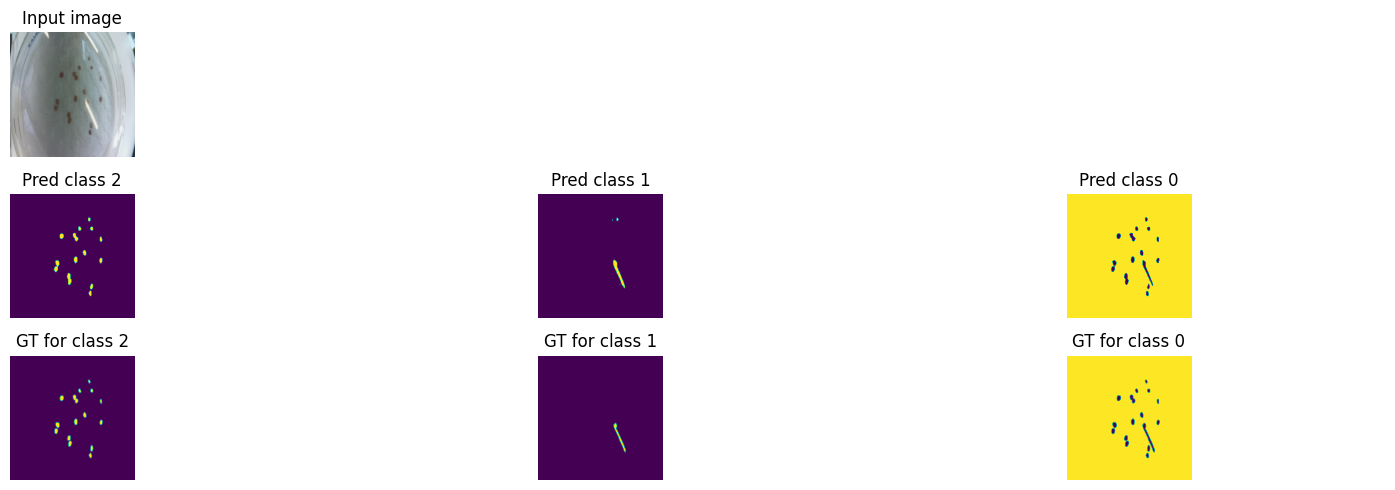

Train loss: 0.00180 | Time: 45m 16s | Val loss: 0.00149
Train_DICE_avg: 0.79836 | Train_Jaccard_avg: 0.73432 | Train_Sensitivity_avg: 0.94012 | Train_Specificity_avg: 0.92452 
Class 0 - Train_DICE: 0.99330 | Train_Jaccard: 0.98672 | Train_Sensitivity: 0.99713 | Train_Specificity: 0.79231 
Class 1 - Train_DICE: 0.57691 | Train_Jaccard: 0.50180 | Train_Sensitivity: 0.88420 | Train_Specificity: 0.99095 
Class 2 - Train_DICE: 0.82487 | Train_Jaccard: 0.71445 | Train_Sensitivity: 0.93903 | Train_Specificity: 0.99028 
Val_DICE_avg: 0.83286 | Val_Jaccard_avg: 0.76216 | Val_Sensitivity_avg: 0.96068 | Val_Specificity_avg: 0.87194 
Class 0 - Val_DICE: 0.99254 | Val_Jaccard: 0.98523 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.63505 
Class 1 - Val_DICE: 0.74577 | Val_Jaccard: 0.67549 | Val_Sensitivity: 0.91111 | Val_Specificity: 0.99501 
Class 2 - Val_DICE: 0.76027 | Val_Jaccard: 0.62575 | Val_Sensitivity: 0.97153 | Val_Specificity: 0.98575 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00178 | Time: 46m 16s | Val loss: 0.00148
Train_DICE_avg: 0.80213 | Train_Jaccard_avg: 0.73812 | Train_Sensitivity_avg: 0.94047 | Train_Specificity_avg: 0.92561 
Class 0 - Train_DICE: 0.99336 | Train_Jaccard: 0.98684 | Train_Sensitivity: 0.99713 | Train_Specificity: 0.79519 
Class 1 - Train_DICE: 0.58719 | Train_Jaccard: 0.51175 | Train_Sensitivity: 0.88547 | Train_Specificity: 0.99123 
Class 2 - Train_DICE: 0.82582 | Train_Jaccard: 0.71576 | Train_Sensitivity: 0.93881 | Train_Specificity: 0.99040 
Val_DICE_avg: 0.82485 | Val_Jaccard_avg: 0.75398 | Val_Sensitivity_avg: 0.95673 | Val_Specificity_avg: 0.87536 
Class 0 - Val_DICE: 0.99276 | Val_Jaccard: 0.98566 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.64571 
Class 1 - Val_DICE: 0.73233 | Val_Jaccard: 0.66294 | Val_Sensitivity: 0.89677 | Val_Specificity: 0.99493 
Class 2 - Val_DICE: 0.74945 | Val_Jaccard: 0.61334 | Val_Sensitivity: 0.97404 | Val_Specificity: 0.98543 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00176 | Time: 47m 16s | Val loss: 0.00150
Train_DICE_avg: 0.79998 | Train_Jaccard_avg: 0.73540 | Train_Sensitivity_avg: 0.94068 | Train_Specificity_avg: 0.92455 
Class 0 - Train_DICE: 0.99337 | Train_Jaccard: 0.98684 | Train_Sensitivity: 0.99726 | Train_Specificity: 0.79223 
Class 1 - Train_DICE: 0.58078 | Train_Jaccard: 0.50361 | Train_Sensitivity: 0.88511 | Train_Specificity: 0.99103 
Class 2 - Train_DICE: 0.82578 | Train_Jaccard: 0.71576 | Train_Sensitivity: 0.93967 | Train_Specificity: 0.99039 
Val_DICE_avg: 0.83400 | Val_Jaccard_avg: 0.76337 | Val_Sensitivity_avg: 0.96401 | Val_Specificity_avg: 0.86941 
Class 0 - Val_DICE: 0.99238 | Val_Jaccard: 0.98492 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.62728 
Class 1 - Val_DICE: 0.74448 | Val_Jaccard: 0.67362 | Val_Sensitivity: 0.92336 | Val_Specificity: 0.99478 
Class 2 - Val_DICE: 0.76513 | Val_Jaccard: 0.63158 | Val_Sensitivity: 0.96925 | Val_Specificity: 0.98619 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.00175 | Time: 48m 16s | Val loss: 0.00148
Train_DICE_avg: 0.79995 | Train_Jaccard_avg: 0.73583 | Train_Sensitivity_avg: 0.94284 | Train_Specificity_avg: 0.92428 
Class 0 - Train_DICE: 0.99341 | Train_Jaccard: 0.98694 | Train_Sensitivity: 0.99718 | Train_Specificity: 0.79139 
Class 1 - Train_DICE: 0.58284 | Train_Jaccard: 0.50751 | Train_Sensitivity: 0.89049 | Train_Specificity: 0.99113 
Class 2 - Train_DICE: 0.82360 | Train_Jaccard: 0.71304 | Train_Sensitivity: 0.94086 | Train_Specificity: 0.99032 
Val_DICE_avg: 0.83199 | Val_Jaccard_avg: 0.76053 | Val_Sensitivity_avg: 0.96483 | Val_Specificity_avg: 0.87701 
Class 0 - Val_DICE: 0.99311 | Val_Jaccard: 0.98635 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.65064 
Class 1 - Val_DICE: 0.74301 | Val_Jaccard: 0.67021 | Val_Sensitivity: 0.92285 | Val_Specificity: 0.99464 
Class 2 - Val_DICE: 0.75986 | Val_Jaccard: 0.62503 | Val_Sensitivity: 0.97231 | Val_Specificity: 0.98577 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.00176 | Time: 49m 16s | Val loss: 0.00148
Train_DICE_avg: 0.80230 | Train_Jaccard_avg: 0.73913 | Train_Sensitivity_avg: 0.93783 | Train_Specificity_avg: 0.92704 
Class 0 - Train_DICE: 0.99350 | Train_Jaccard: 0.98710 | Train_Sensitivity: 0.99712 | Train_Specificity: 0.79906 
Class 1 - Train_DICE: 0.58501 | Train_Jaccard: 0.51020 | Train_Sensitivity: 0.87605 | Train_Specificity: 0.99138 
Class 2 - Train_DICE: 0.82840 | Train_Jaccard: 0.72009 | Train_Sensitivity: 0.94032 | Train_Specificity: 0.99069 
Val_DICE_avg: 0.83319 | Val_Jaccard_avg: 0.76194 | Val_Sensitivity_avg: 0.95820 | Val_Specificity_avg: 0.87266 
Class 0 - Val_DICE: 0.99272 | Val_Jaccard: 0.98557 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.63702 
Class 1 - Val_DICE: 0.74179 | Val_Jaccard: 0.66840 | Val_Sensitivity: 0.89932 | Val_Specificity: 0.99492 
Class 2 - Val_DICE: 0.76508 | Val_Jaccard: 0.63185 | Val_Sensitivity: 0.97590 | Val_Specificity: 0.98605 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


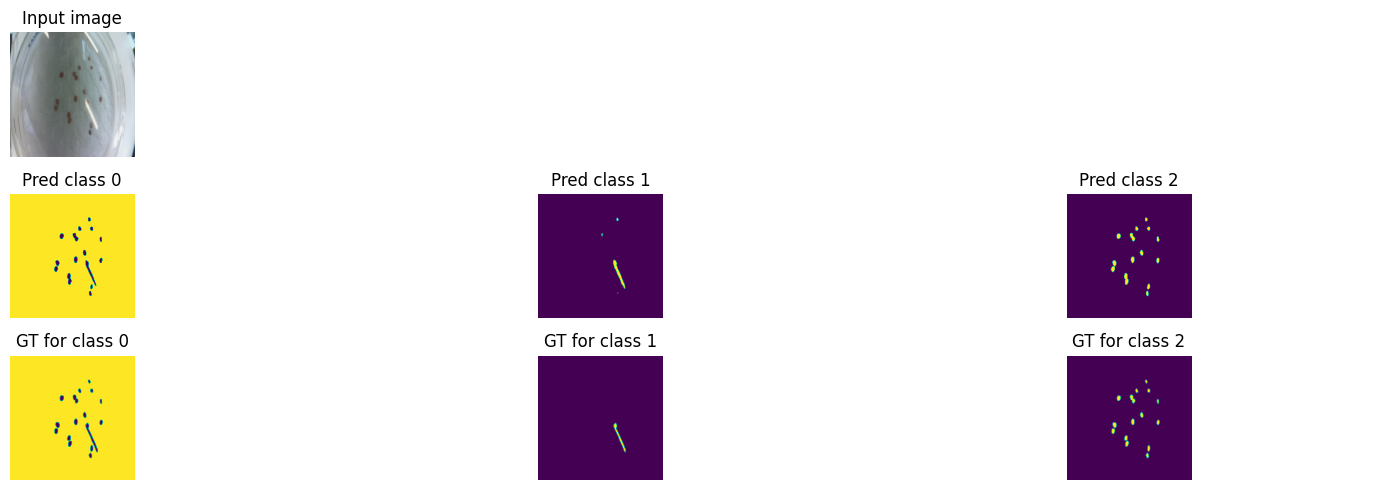

Train loss: 0.00174 | Time: 50m 16s | Val loss: 0.00146
Train_DICE_avg: 0.80063 | Train_Jaccard_avg: 0.73645 | Train_Sensitivity_avg: 0.94160 | Train_Specificity_avg: 0.92299 
Class 0 - Train_DICE: 0.99334 | Train_Jaccard: 0.98679 | Train_Sensitivity: 0.99731 | Train_Specificity: 0.78770 
Class 1 - Train_DICE: 0.58240 | Train_Jaccard: 0.50626 | Train_Sensitivity: 0.88631 | Train_Specificity: 0.99099 
Class 2 - Train_DICE: 0.82613 | Train_Jaccard: 0.71631 | Train_Sensitivity: 0.94119 | Train_Specificity: 0.99028 
Val_DICE_avg: 0.83655 | Val_Jaccard_avg: 0.76545 | Val_Sensitivity_avg: 0.96069 | Val_Specificity_avg: 0.87131 
Class 0 - Val_DICE: 0.99255 | Val_Jaccard: 0.98524 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.63291 
Class 1 - Val_DICE: 0.75279 | Val_Jaccard: 0.67979 | Val_Sensitivity: 0.90665 | Val_Specificity: 0.99508 
Class 2 - Val_DICE: 0.76432 | Val_Jaccard: 0.63131 | Val_Sensitivity: 0.97601 | Val_Specificity: 0.98594 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00174 | Time: 51m 16s | Val loss: 0.00144
Train_DICE_avg: 0.80368 | Train_Jaccard_avg: 0.74033 | Train_Sensitivity_avg: 0.94303 | Train_Specificity_avg: 0.92599 
Class 0 - Train_DICE: 0.99347 | Train_Jaccard: 0.98705 | Train_Sensitivity: 0.99717 | Train_Specificity: 0.79608 
Class 1 - Train_DICE: 0.58959 | Train_Jaccard: 0.51457 | Train_Sensitivity: 0.89063 | Train_Specificity: 0.99131 
Class 2 - Train_DICE: 0.82799 | Train_Jaccard: 0.71937 | Train_Sensitivity: 0.94127 | Train_Specificity: 0.99059 
Val_DICE_avg: 0.83785 | Val_Jaccard_avg: 0.76703 | Val_Sensitivity_avg: 0.96550 | Val_Specificity_avg: 0.87152 
Class 0 - Val_DICE: 0.99269 | Val_Jaccard: 0.98552 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.63363 
Class 1 - Val_DICE: 0.75044 | Val_Jaccard: 0.67733 | Val_Sensitivity: 0.92434 | Val_Specificity: 0.99479 
Class 2 - Val_DICE: 0.77041 | Val_Jaccard: 0.63823 | Val_Sensitivity: 0.97281 | Val_Specificity: 0.98614 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.00173 | Time: 52m 16s | Val loss: 0.00145
Train_DICE_avg: 0.79938 | Train_Jaccard_avg: 0.73568 | Train_Sensitivity_avg: 0.94358 | Train_Specificity_avg: 0.92473 
Class 0 - Train_DICE: 0.99346 | Train_Jaccard: 0.98704 | Train_Sensitivity: 0.99725 | Train_Specificity: 0.79284 
Class 1 - Train_DICE: 0.57860 | Train_Jaccard: 0.50352 | Train_Sensitivity: 0.89256 | Train_Specificity: 0.99099 
Class 2 - Train_DICE: 0.82607 | Train_Jaccard: 0.71649 | Train_Sensitivity: 0.94094 | Train_Specificity: 0.99036 
Val_DICE_avg: 0.83456 | Val_Jaccard_avg: 0.76342 | Val_Sensitivity_avg: 0.95828 | Val_Specificity_avg: 0.87030 
Class 0 - Val_DICE: 0.99247 | Val_Jaccard: 0.98508 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62984 
Class 1 - Val_DICE: 0.74425 | Val_Jaccard: 0.67030 | Val_Sensitivity: 0.89996 | Val_Specificity: 0.99503 
Class 2 - Val_DICE: 0.76698 | Val_Jaccard: 0.63488 | Val_Sensitivity: 0.97546 | Val_Specificity: 0.98603 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.00171 | Time: 53m 16s | Val loss: 0.00142
Train_DICE_avg: 0.80082 | Train_Jaccard_avg: 0.73688 | Train_Sensitivity_avg: 0.94281 | Train_Specificity_avg: 0.92364 
Class 0 - Train_DICE: 0.99338 | Train_Jaccard: 0.98687 | Train_Sensitivity: 0.99735 | Train_Specificity: 0.78962 
Class 1 - Train_DICE: 0.58181 | Train_Jaccard: 0.50610 | Train_Sensitivity: 0.88866 | Train_Specificity: 0.99096 
Class 2 - Train_DICE: 0.82727 | Train_Jaccard: 0.71768 | Train_Sensitivity: 0.94243 | Train_Specificity: 0.99035 
Val_DICE_avg: 0.83645 | Val_Jaccard_avg: 0.76547 | Val_Sensitivity_avg: 0.96478 | Val_Specificity_avg: 0.87212 
Class 0 - Val_DICE: 0.99268 | Val_Jaccard: 0.98550 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.63553 
Class 1 - Val_DICE: 0.75122 | Val_Jaccard: 0.67864 | Val_Sensitivity: 0.92002 | Val_Specificity: 0.99484 
Class 2 - Val_DICE: 0.76546 | Val_Jaccard: 0.63226 | Val_Sensitivity: 0.97491 | Val_Specificity: 0.98598 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.00172 | Time: 54m 16s | Val loss: 0.00145
Train_DICE_avg: 0.80383 | Train_Jaccard_avg: 0.73947 | Train_Sensitivity_avg: 0.94215 | Train_Specificity_avg: 0.92444 
Class 0 - Train_DICE: 0.99334 | Train_Jaccard: 0.98679 | Train_Sensitivity: 0.99720 | Train_Specificity: 0.79195 
Class 1 - Train_DICE: 0.59139 | Train_Jaccard: 0.51419 | Train_Sensitivity: 0.88591 | Train_Specificity: 0.99114 
Class 2 - Train_DICE: 0.82677 | Train_Jaccard: 0.71744 | Train_Sensitivity: 0.94335 | Train_Specificity: 0.99025 
Val_DICE_avg: 0.83723 | Val_Jaccard_avg: 0.76700 | Val_Sensitivity_avg: 0.96550 | Val_Specificity_avg: 0.87071 
Class 0 - Val_DICE: 0.99263 | Val_Jaccard: 0.98539 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.63117 
Class 1 - Val_DICE: 0.74637 | Val_Jaccard: 0.67464 | Val_Sensitivity: 0.92400 | Val_Specificity: 0.99485 
Class 2 - Val_DICE: 0.77271 | Val_Jaccard: 0.64098 | Val_Sensitivity: 0.97310 | Val_Specificity: 0.98612 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


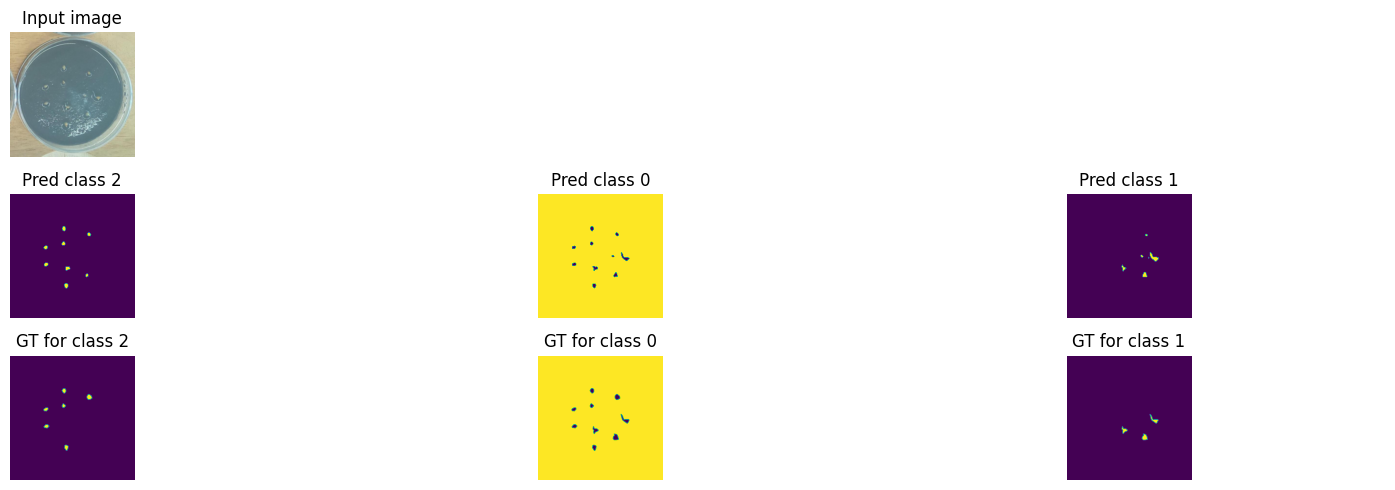

Train loss: 0.00170 | Time: 55m 18s | Val loss: 0.00145
Train_DICE_avg: 0.80203 | Train_Jaccard_avg: 0.73808 | Train_Sensitivity_avg: 0.94299 | Train_Specificity_avg: 0.92519 
Class 0 - Train_DICE: 0.99346 | Train_Jaccard: 0.98702 | Train_Sensitivity: 0.99726 | Train_Specificity: 0.79391 
Class 1 - Train_DICE: 0.58418 | Train_Jaccard: 0.50830 | Train_Sensitivity: 0.89058 | Train_Specificity: 0.99119 
Class 2 - Train_DICE: 0.82844 | Train_Jaccard: 0.71890 | Train_Sensitivity: 0.94114 | Train_Specificity: 0.99048 
Val_DICE_avg: 0.83341 | Val_Jaccard_avg: 0.76291 | Val_Sensitivity_avg: 0.95802 | Val_Specificity_avg: 0.87071 
Class 0 - Val_DICE: 0.99252 | Val_Jaccard: 0.98519 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.63097 
Class 1 - Val_DICE: 0.74485 | Val_Jaccard: 0.67312 | Val_Sensitivity: 0.89683 | Val_Specificity: 0.99521 
Class 2 - Val_DICE: 0.76286 | Val_Jaccard: 0.63043 | Val_Sensitivity: 0.97782 | Val_Specificity: 0.98593 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.00169 | Time: 56m 20s | Val loss: 0.00140
Train_DICE_avg: 0.80552 | Train_Jaccard_avg: 0.74162 | Train_Sensitivity_avg: 0.94349 | Train_Specificity_avg: 0.92545 
Class 0 - Train_DICE: 0.99352 | Train_Jaccard: 0.98714 | Train_Sensitivity: 0.99735 | Train_Specificity: 0.79474 
Class 1 - Train_DICE: 0.59274 | Train_Jaccard: 0.51568 | Train_Sensitivity: 0.89051 | Train_Specificity: 0.99114 
Class 2 - Train_DICE: 0.83029 | Train_Jaccard: 0.72205 | Train_Sensitivity: 0.94259 | Train_Specificity: 0.99048 
Val_DICE_avg: 0.84160 | Val_Jaccard_avg: 0.77082 | Val_Sensitivity_avg: 0.96547 | Val_Specificity_avg: 0.87049 
Class 0 - Val_DICE: 0.99248 | Val_Jaccard: 0.98511 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.63021 
Class 1 - Val_DICE: 0.76565 | Val_Jaccard: 0.69246 | Val_Sensitivity: 0.91882 | Val_Specificity: 0.99510 
Class 2 - Val_DICE: 0.76667 | Val_Jaccard: 0.63488 | Val_Sensitivity: 0.97817 | Val_Specificity: 0.98617 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.00169 | Time: 57m 22s | Val loss: 0.00143
Train_DICE_avg: 0.80562 | Train_Jaccard_avg: 0.74187 | Train_Sensitivity_avg: 0.94115 | Train_Specificity_avg: 0.92773 
Class 0 - Train_DICE: 0.99351 | Train_Jaccard: 0.98713 | Train_Sensitivity: 0.99727 | Train_Specificity: 0.80112 
Class 1 - Train_DICE: 0.59226 | Train_Jaccard: 0.51486 | Train_Sensitivity: 0.88443 | Train_Specificity: 0.99141 
Class 2 - Train_DICE: 0.83110 | Train_Jaccard: 0.72362 | Train_Sensitivity: 0.94174 | Train_Specificity: 0.99067 
Val_DICE_avg: 0.83374 | Val_Jaccard_avg: 0.76206 | Val_Sensitivity_avg: 0.95602 | Val_Specificity_avg: 0.87113 
Class 0 - Val_DICE: 0.99255 | Val_Jaccard: 0.98525 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.63238 
Class 1 - Val_DICE: 0.74663 | Val_Jaccard: 0.67204 | Val_Sensitivity: 0.89030 | Val_Specificity: 0.99518 
Class 2 - Val_DICE: 0.76205 | Val_Jaccard: 0.62889 | Val_Sensitivity: 0.97836 | Val_Specificity: 0.98583 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.00167 | Time: 58m 23s | Val loss: 0.00142
Train_DICE_avg: 0.80569 | Train_Jaccard_avg: 0.74168 | Train_Sensitivity_avg: 0.94588 | Train_Specificity_avg: 0.92347 
Class 0 - Train_DICE: 0.99348 | Train_Jaccard: 0.98707 | Train_Sensitivity: 0.99739 | Train_Specificity: 0.78902 
Class 1 - Train_DICE: 0.59682 | Train_Jaccard: 0.52043 | Train_Sensitivity: 0.89611 | Train_Specificity: 0.99104 
Class 2 - Train_DICE: 0.82678 | Train_Jaccard: 0.71753 | Train_Sensitivity: 0.94414 | Train_Specificity: 0.99035 
Val_DICE_avg: 0.83923 | Val_Jaccard_avg: 0.76817 | Val_Sensitivity_avg: 0.96675 | Val_Specificity_avg: 0.87087 
Class 0 - Val_DICE: 0.99249 | Val_Jaccard: 0.98514 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.63153 
Class 1 - Val_DICE: 0.75801 | Val_Jaccard: 0.68411 | Val_Sensitivity: 0.92522 | Val_Specificity: 0.99487 
Class 2 - Val_DICE: 0.76718 | Val_Jaccard: 0.63527 | Val_Sensitivity: 0.97562 | Val_Specificity: 0.98621 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.00168 | Time: 59m 25s | Val loss: 0.00141
Train_DICE_avg: 0.81047 | Train_Jaccard_avg: 0.74705 | Train_Sensitivity_avg: 0.94000 | Train_Specificity_avg: 0.92816 
Class 0 - Train_DICE: 0.99351 | Train_Jaccard: 0.98713 | Train_Sensitivity: 0.99718 | Train_Specificity: 0.80202 
Class 1 - Train_DICE: 0.60578 | Train_Jaccard: 0.52916 | Train_Sensitivity: 0.88164 | Train_Specificity: 0.99173 
Class 2 - Train_DICE: 0.83211 | Train_Jaccard: 0.72486 | Train_Sensitivity: 0.94117 | Train_Specificity: 0.99073 
Val_DICE_avg: 0.84271 | Val_Jaccard_avg: 0.77089 | Val_Sensitivity_avg: 0.96286 | Val_Specificity_avg: 0.87141 
Class 0 - Val_DICE: 0.99252 | Val_Jaccard: 0.98519 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.63317 
Class 1 - Val_DICE: 0.77378 | Val_Jaccard: 0.69961 | Val_Sensitivity: 0.91239 | Val_Specificity: 0.99531 
Class 2 - Val_DICE: 0.76184 | Val_Jaccard: 0.62787 | Val_Sensitivity: 0.97675 | Val_Specificity: 0.98575 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


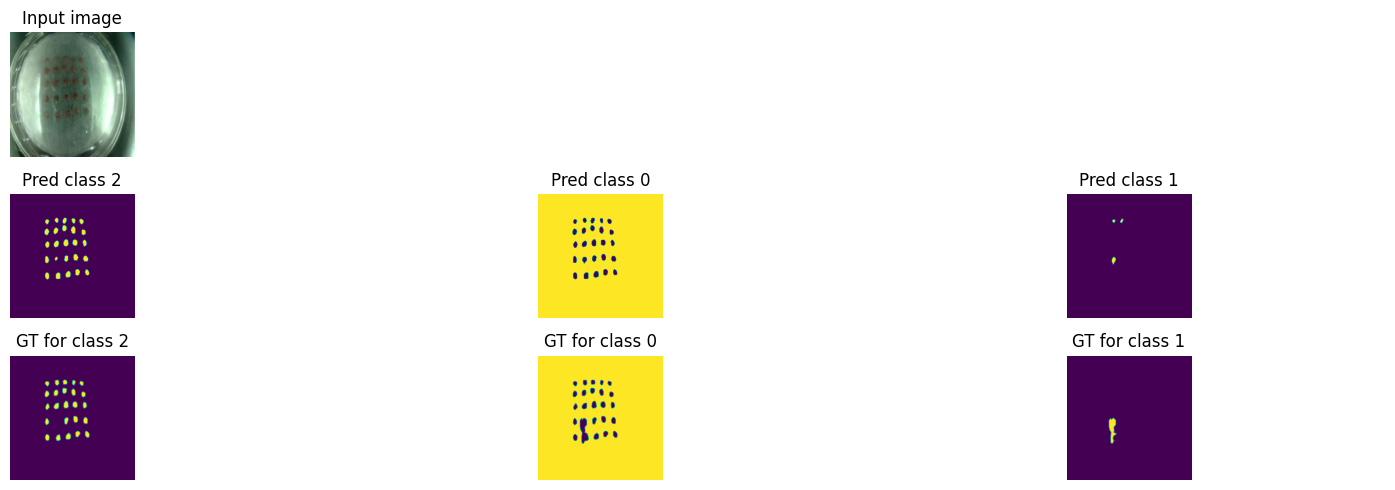

Train loss: 0.00169 | Time: 60m 27s | Val loss: 0.00142
Train_DICE_avg: 0.80557 | Train_Jaccard_avg: 0.74170 | Train_Sensitivity_avg: 0.94245 | Train_Specificity_avg: 0.92493 
Class 0 - Train_DICE: 0.99343 | Train_Jaccard: 0.98696 | Train_Sensitivity: 0.99737 | Train_Specificity: 0.79344 
Class 1 - Train_DICE: 0.59445 | Train_Jaccard: 0.51822 | Train_Sensitivity: 0.88695 | Train_Specificity: 0.99105 
Class 2 - Train_DICE: 0.82884 | Train_Jaccard: 0.71993 | Train_Sensitivity: 0.94303 | Train_Specificity: 0.99029 
Val_DICE_avg: 0.83833 | Val_Jaccard_avg: 0.76627 | Val_Sensitivity_avg: 0.96119 | Val_Specificity_avg: 0.87202 
Class 0 - Val_DICE: 0.99266 | Val_Jaccard: 0.98547 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.63530 
Class 1 - Val_DICE: 0.76324 | Val_Jaccard: 0.68844 | Val_Sensitivity: 0.90485 | Val_Specificity: 0.99516 
Class 2 - Val_DICE: 0.75909 | Val_Jaccard: 0.62492 | Val_Sensitivity: 0.97930 | Val_Specificity: 0.98559 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▁▂▃▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█████████████
wandb:       Training Jaccard ▁▁▂▂▂▃▄▄▄▅▆▆▆▆▆▆▇▆▇▇▇▇▇▇▇██▇████████████
wandb:          Training Loss █▅▄▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▄▅▇▅▅▁▁▁▂▂▂▂▃▃▃▃▄▄▄▅▄▅▆▅▆▇▆▆▆▇▇▆▇▇▇▇▇▇█▇
wandb:   Training Specificity ▁▄▅▆▆▇▇▇▇███████████████████████████████
wandb:        Validation DICE ▁▁▂▁▃▄▃▄▅▅▅▂▆▅▅▇▇▇▇▆▄▇▆▆█▇█▇█▇█▇▇███████
wandb:     Validation Jaccard ▁▂▁▂▁▄▂▅▅▁▇▅▆▆▇▆▆▄▄▇▆▅▇▆▇▇▇██▇██████████
wandb:        Validation Loss █▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▇▇▅▆▇▇█▄▆▇▁▇▃▇▇▇▇▂▇█▇▄▇█▆▇█▇▇▇█▇▇█▇▇█▇█▇
wandb: Validation Specificity ▁▂▃▄▅▄▅▆▅▇▆▇▇▆▇▇▇▇▇▇▇█▇█▇▇▇▇▇▇▆▇▇█▇▇▇▇▇▇
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.80557
wandb:       Training Jaccard 0.7417
wandb:          Training Loss 0.001


Training complete!


In [21]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [22]:
model = UNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [23]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]



Global Performance Metrics:
Loss mean: 0.00149, std: 0.00019
Dice Coefficient mean: 0.86479, std: 0.10338
Jaccard Index mean: 0.80304, std: 0.11901
Sensitivity mean: 0.93239, std: 0.07537
Specificity mean: 0.94885, std: 0.03680

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99606, std: 0.00199
Jaccard mean: 0.99216, std: 0.00393
Sensitivity mean: 0.99692, std: 0.00205
Specificity mean: 0.85680, std: 0.11024

Class 1:
Dice mean: 0.74022, std: 0.28642
Jaccard mean: 0.65713, std: 0.30846
Sensitivity mean: 0.87180, std: 0.21450
Specificity mean: 0.99586, std: 0.00704

Class 2:
Dice mean: 0.85808, std: 0.08231
Jaccard mean: 0.75983, std: 0.11519
Sensitivity mean: 0.92846, std: 0.07531
Specificity mean: 0.99389, std: 0.00353


### Tversky Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Backbone"] = "resnet34"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-UNet-ResNet34-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.37 GB
GPU Memory - Reserved: 1.86 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: creating run
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_193148-csci6dmy
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-UNet-ResNet34-Tversky
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/csci6dmy



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


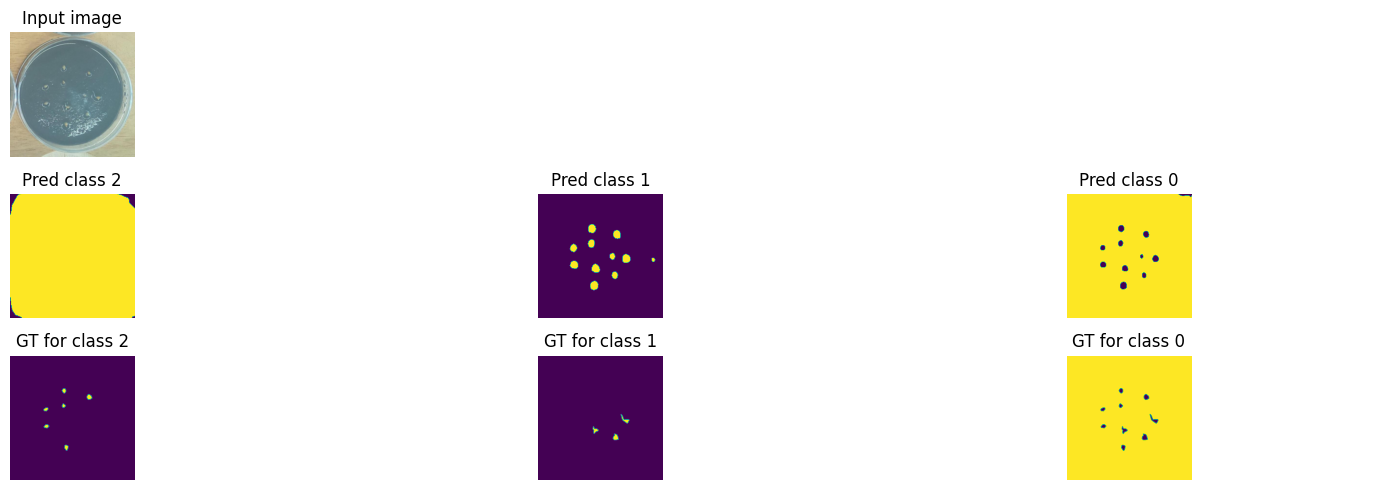

Train loss: 0.67226 | Time: 0m 58s | Val loss: 0.62291
Train_DICE_avg: 0.42175 | Train_Jaccard_avg: 0.36220 | Train_Sensitivity_avg: 0.41630 | Train_Specificity_avg: 0.78325 
Class 0 - Train_DICE: 0.90657 | Train_Jaccard: 0.83927 | Train_Sensitivity: 0.99397 | Train_Specificity: 0.35463 
Class 1 - Train_DICE: 0.08656 | Train_Jaccard: 0.04954 | Train_Sensitivity: 0.05225 | Train_Specificity: 0.99724 
Class 2 - Train_DICE: 0.27213 | Train_Jaccard: 0.19780 | Train_Sensitivity: 0.20270 | Train_Specificity: 0.99789 
Val_DICE_avg: 0.48133 | Val_Jaccard_avg: 0.44296 | Val_Sensitivity_avg: 0.45897 | Val_Specificity_avg: 0.83304 
Class 0 - Val_DICE: 0.98143 | Val_Jaccard: 0.96364 | Val_Sensitivity: 0.99717 | Val_Specificity: 0.50540 
Class 1 - Val_DICE: 0.12824 | Val_Jaccard: 0.07858 | Val_Sensitivity: 0.08586 | Val_Specificity: 0.99750 
Class 2 - Val_DICE: 0.33432 | Val_Jaccard: 0.28667 | Val_Sensitivity: 0.29389 | Val_Specificity: 0.99622 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.62805 | Time: 1m 56s | Val loss: 0.61170
Train_DICE_avg: 0.47620 | Train_Jaccard_avg: 0.43170 | Train_Sensitivity_avg: 0.45468 | Train_Specificity_avg: 0.85237 
Class 0 - Train_DICE: 0.97177 | Train_Jaccard: 0.94542 | Train_Sensitivity: 0.99577 | Train_Specificity: 0.56074 
Class 1 - Train_DICE: 0.12657 | Train_Jaccard: 0.07502 | Train_Sensitivity: 0.07935 | Train_Specificity: 0.99814 
Class 2 - Train_DICE: 0.33027 | Train_Jaccard: 0.27468 | Train_Sensitivity: 0.28893 | Train_Specificity: 0.99822 
Val_DICE_avg: 0.48731 | Val_Jaccard_avg: 0.45109 | Val_Sensitivity_avg: 0.46608 | Val_Specificity_avg: 0.86294 
Class 0 - Val_DICE: 0.98669 | Val_Jaccard: 0.97379 | Val_Sensitivity: 0.99715 | Val_Specificity: 0.59556 
Class 1 - Val_DICE: 0.13361 | Val_Jaccard: 0.08257 | Val_Sensitivity: 0.08943 | Val_Specificity: 0.99775 
Class 2 - Val_DICE: 0.34162 | Val_Jaccard: 0.29690 | Val_Sensitivity: 0.31165 | Val_Specificity: 0.99551 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.61041 | Time: 2m 54s | Val loss: 0.59925
Train_DICE_avg: 0.48498 | Train_Jaccard_avg: 0.44238 | Train_Sensitivity_avg: 0.46263 | Train_Specificity_avg: 0.87259 
Class 0 - Train_DICE: 0.97796 | Train_Jaccard: 0.95707 | Train_Sensitivity: 0.99589 | Train_Specificity: 0.62126 
Class 1 - Train_DICE: 0.13121 | Train_Jaccard: 0.07817 | Train_Sensitivity: 0.08178 | Train_Specificity: 0.99845 
Class 2 - Train_DICE: 0.34578 | Train_Jaccard: 0.29189 | Train_Sensitivity: 0.31023 | Train_Specificity: 0.99807 
Val_DICE_avg: 0.48840 | Val_Jaccard_avg: 0.45254 | Val_Sensitivity_avg: 0.46776 | Val_Specificity_avg: 0.86267 
Class 0 - Val_DICE: 0.98758 | Val_Jaccard: 0.97552 | Val_Sensitivity: 0.99801 | Val_Specificity: 0.59505 
Class 1 - Val_DICE: 0.13566 | Val_Jaccard: 0.08442 | Val_Sensitivity: 0.08947 | Val_Specificity: 0.99843 
Class 2 - Val_DICE: 0.34197 | Val_Jaccard: 0.29768 | Val_Sensitivity: 0.31581 | Val_Specificity: 0.99453 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.59631 | Time: 3m 51s | Val loss: 0.58895
Train_DICE_avg: 0.49378 | Train_Jaccard_avg: 0.45066 | Train_Sensitivity_avg: 0.46977 | Train_Specificity_avg: 0.88321 
Class 0 - Train_DICE: 0.98096 | Train_Jaccard: 0.96279 | Train_Sensitivity: 0.99637 | Train_Specificity: 0.65282 
Class 1 - Train_DICE: 0.14048 | Train_Jaccard: 0.08446 | Train_Sensitivity: 0.08679 | Train_Specificity: 0.99905 
Class 2 - Train_DICE: 0.35991 | Train_Jaccard: 0.30472 | Train_Sensitivity: 0.32616 | Train_Specificity: 0.99777 
Val_DICE_avg: 0.49325 | Val_Jaccard_avg: 0.45743 | Val_Sensitivity_avg: 0.46874 | Val_Specificity_avg: 0.86447 
Class 0 - Val_DICE: 0.98797 | Val_Jaccard: 0.97630 | Val_Sensitivity: 0.99860 | Val_Specificity: 0.59861 
Class 1 - Val_DICE: 0.14106 | Val_Jaccard: 0.08918 | Val_Sensitivity: 0.09202 | Val_Specificity: 0.99916 
Class 2 - Val_DICE: 0.35071 | Val_Jaccard: 0.30680 | Val_Sensitivity: 0.31560 | Val_Specificity: 0.99565 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.58124 | Time: 4m 49s | Val loss: 0.57785
Train_DICE_avg: 0.50492 | Train_Jaccard_avg: 0.46122 | Train_Sensitivity_avg: 0.47985 | Train_Specificity_avg: 0.89389 
Class 0 - Train_DICE: 0.98387 | Train_Jaccard: 0.96837 | Train_Sensitivity: 0.99633 | Train_Specificity: 0.68486 
Class 1 - Train_DICE: 0.14985 | Train_Jaccard: 0.09128 | Train_Sensitivity: 0.09344 | Train_Specificity: 0.99927 
Class 2 - Train_DICE: 0.38103 | Train_Jaccard: 0.32402 | Train_Sensitivity: 0.34978 | Train_Specificity: 0.99752 
Val_DICE_avg: 0.50013 | Val_Jaccard_avg: 0.46232 | Val_Sensitivity_avg: 0.48029 | Val_Specificity_avg: 0.86837 
Class 0 - Val_DICE: 0.98880 | Val_Jaccard: 0.97789 | Val_Sensitivity: 0.99886 | Val_Specificity: 0.61172 
Class 1 - Val_DICE: 0.15266 | Val_Jaccard: 0.09791 | Val_Sensitivity: 0.10057 | Val_Specificity: 0.99928 
Class 2 - Val_DICE: 0.35892 | Val_Jaccard: 0.31117 | Val_Sensitivity: 0.34145 | Val_Specificity: 0.99413 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


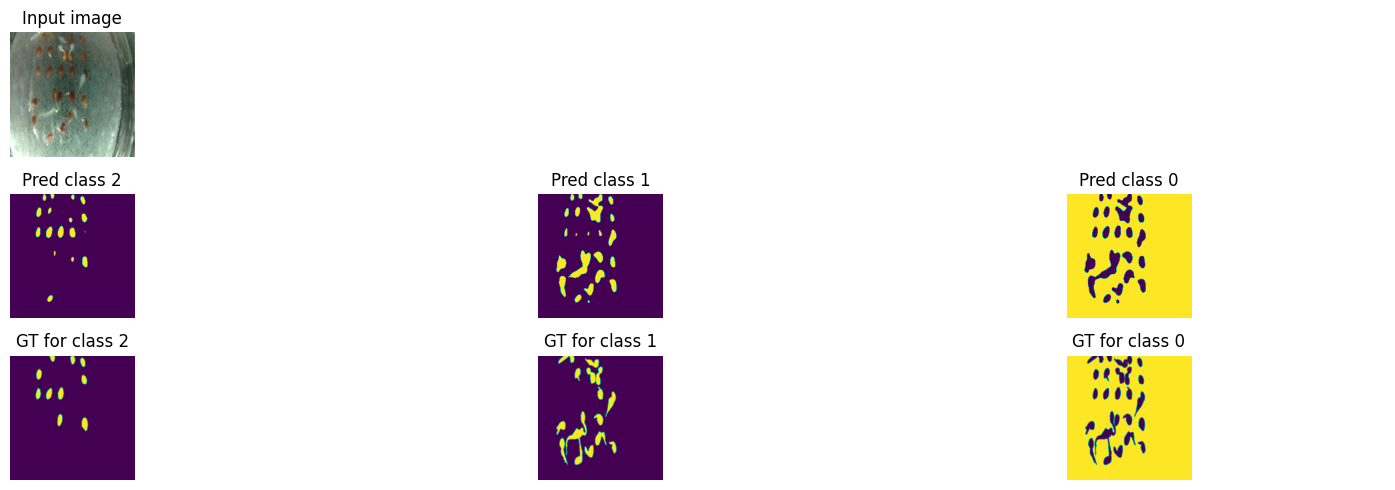

Train loss: 0.56430 | Time: 5m 45s | Val loss: 0.55234
Train_DICE_avg: 0.52392 | Train_Jaccard_avg: 0.47871 | Train_Sensitivity_avg: 0.49830 | Train_Specificity_avg: 0.90250 
Class 0 - Train_DICE: 0.98541 | Train_Jaccard: 0.97135 | Train_Sensitivity: 0.99583 | Train_Specificity: 0.71090 
Class 1 - Train_DICE: 0.15764 | Train_Jaccard: 0.09719 | Train_Sensitivity: 0.10019 | Train_Specificity: 0.99917 
Class 2 - Train_DICE: 0.42871 | Train_Jaccard: 0.36759 | Train_Sensitivity: 0.39887 | Train_Specificity: 0.99742 
Val_DICE_avg: 0.52438 | Val_Jaccard_avg: 0.48539 | Val_Sensitivity_avg: 0.50229 | Val_Specificity_avg: 0.87838 
Class 0 - Val_DICE: 0.99018 | Val_Jaccard: 0.98059 | Val_Sensitivity: 0.99872 | Val_Specificity: 0.63926 
Class 1 - Val_DICE: 0.16176 | Val_Jaccard: 0.10535 | Val_Sensitivity: 0.11064 | Val_Specificity: 0.99899 
Class 2 - Val_DICE: 0.42121 | Val_Jaccard: 0.37021 | Val_Sensitivity: 0.39750 | Val_Specificity: 0.99690 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.54757 | Time: 6m 42s | Val loss: 0.55019
Train_DICE_avg: 0.53855 | Train_Jaccard_avg: 0.49197 | Train_Sensitivity_avg: 0.51431 | Train_Specificity_avg: 0.90745 
Class 0 - Train_DICE: 0.98655 | Train_Jaccard: 0.97354 | Train_Sensitivity: 0.99556 | Train_Specificity: 0.72656 
Class 1 - Train_DICE: 0.18672 | Train_Jaccard: 0.12029 | Train_Sensitivity: 0.12796 | Train_Specificity: 0.99892 
Class 2 - Train_DICE: 0.44239 | Train_Jaccard: 0.38207 | Train_Sensitivity: 0.41942 | Train_Specificity: 0.99686 
Val_DICE_avg: 0.53481 | Val_Jaccard_avg: 0.49553 | Val_Sensitivity_avg: 0.51874 | Val_Specificity_avg: 0.89403 
Class 0 - Val_DICE: 0.99194 | Val_Jaccard: 0.98404 | Val_Sensitivity: 0.99820 | Val_Specificity: 0.68621 
Class 1 - Val_DICE: 0.18628 | Val_Jaccard: 0.12660 | Val_Sensitivity: 0.14130 | Val_Specificity: 0.99855 
Class 2 - Val_DICE: 0.42620 | Val_Jaccard: 0.37594 | Val_Sensitivity: 0.41671 | Val_Specificity: 0.99734 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.53184 | Time: 7m 38s | Val loss: 0.51556
Train_DICE_avg: 0.55323 | Train_Jaccard_avg: 0.50590 | Train_Sensitivity_avg: 0.53278 | Train_Specificity_avg: 0.91302 
Class 0 - Train_DICE: 0.98729 | Train_Jaccard: 0.97499 | Train_Sensitivity: 0.99510 | Train_Specificity: 0.74345 
Class 1 - Train_DICE: 0.21627 | Train_Jaccard: 0.14709 | Train_Sensitivity: 0.16408 | Train_Specificity: 0.99862 
Class 2 - Train_DICE: 0.45612 | Train_Jaccard: 0.39561 | Train_Sensitivity: 0.43916 | Train_Specificity: 0.99698 
Val_DICE_avg: 0.55239 | Val_Jaccard_avg: 0.51185 | Val_Sensitivity_avg: 0.54810 | Val_Specificity_avg: 0.87317 
Class 0 - Val_DICE: 0.98927 | Val_Jaccard: 0.97885 | Val_Sensitivity: 0.99866 | Val_Specificity: 0.62500 
Class 1 - Val_DICE: 0.22450 | Val_Jaccard: 0.16881 | Val_Sensitivity: 0.19322 | Val_Specificity: 0.99842 
Class 2 - Val_DICE: 0.44340 | Val_Jaccard: 0.38789 | Val_Sensitivity: 0.45243 | Val_Specificity: 0.99609 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.51558 | Time: 8m 34s | Val loss: 0.50987
Train_DICE_avg: 0.57346 | Train_Jaccard_avg: 0.52290 | Train_Sensitivity_avg: 0.55302 | Train_Specificity_avg: 0.91714 
Class 0 - Train_DICE: 0.98813 | Train_Jaccard: 0.97662 | Train_Sensitivity: 0.99468 | Train_Specificity: 0.75638 
Class 1 - Train_DICE: 0.23962 | Train_Jaccard: 0.16910 | Train_Sensitivity: 0.19430 | Train_Specificity: 0.99836 
Class 2 - Train_DICE: 0.49263 | Train_Jaccard: 0.42300 | Train_Sensitivity: 0.47009 | Train_Specificity: 0.99667 
Val_DICE_avg: 0.56884 | Val_Jaccard_avg: 0.52167 | Val_Sensitivity_avg: 0.55622 | Val_Specificity_avg: 0.88976 
Class 0 - Val_DICE: 0.99151 | Val_Jaccard: 0.98321 | Val_Sensitivity: 0.99781 | Val_Specificity: 0.67510 
Class 1 - Val_DICE: 0.21587 | Val_Jaccard: 0.15523 | Val_Sensitivity: 0.18007 | Val_Specificity: 0.99802 
Class 2 - Val_DICE: 0.49915 | Val_Jaccard: 0.42658 | Val_Sensitivity: 0.49078 | Val_Specificity: 0.99617 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.49928 | Time: 9m 30s | Val loss: 0.49868
Train_DICE_avg: 0.60392 | Train_Jaccard_avg: 0.54733 | Train_Sensitivity_avg: 0.58072 | Train_Specificity_avg: 0.92189 
Class 0 - Train_DICE: 0.98873 | Train_Jaccard: 0.97777 | Train_Sensitivity: 0.99429 | Train_Specificity: 0.77088 
Class 1 - Train_DICE: 0.26259 | Train_Jaccard: 0.19021 | Train_Sensitivity: 0.22275 | Train_Specificity: 0.99824 
Class 2 - Train_DICE: 0.56044 | Train_Jaccard: 0.47403 | Train_Sensitivity: 0.52513 | Train_Specificity: 0.99654 
Val_DICE_avg: 0.61391 | Val_Jaccard_avg: 0.56234 | Val_Sensitivity_avg: 0.59207 | Val_Specificity_avg: 0.91576 
Class 0 - Val_DICE: 0.99404 | Val_Jaccard: 0.98819 | Val_Sensitivity: 0.99781 | Val_Specificity: 0.75188 
Class 1 - Val_DICE: 0.25899 | Val_Jaccard: 0.19219 | Val_Sensitivity: 0.24260 | Val_Specificity: 0.99738 
Class 2 - Val_DICE: 0.58868 | Val_Jaccard: 0.50663 | Val_Sensitivity: 0.53582 | Val_Specificity: 0.99801 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


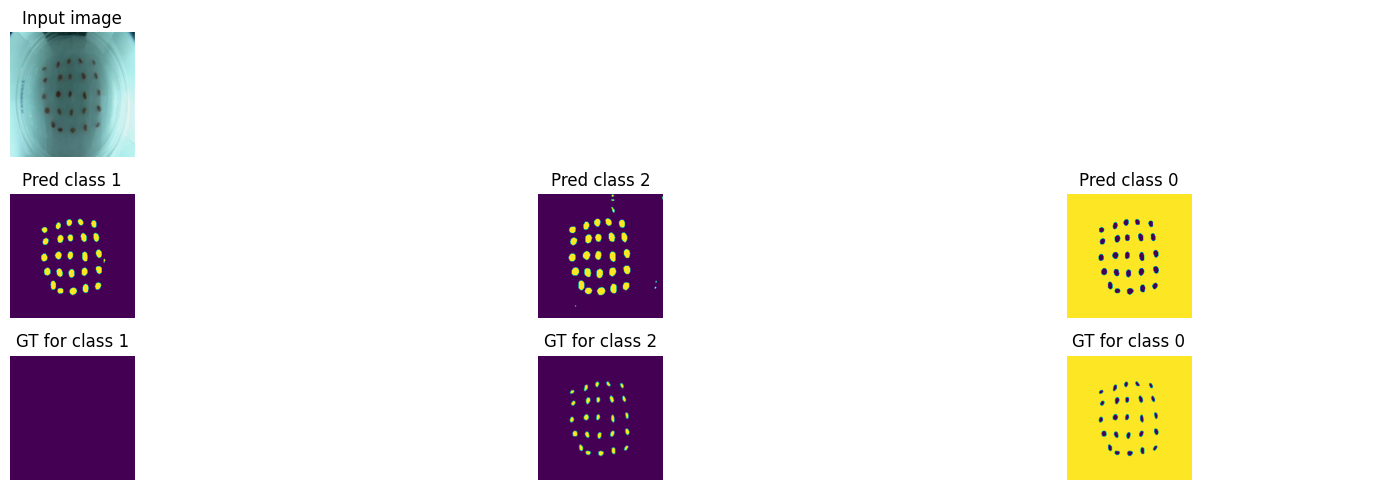

Train loss: 0.48252 | Time: 10m 29s | Val loss: 0.47997
Train_DICE_avg: 0.62330 | Train_Jaccard_avg: 0.56411 | Train_Sensitivity_avg: 0.60016 | Train_Specificity_avg: 0.92634 
Class 0 - Train_DICE: 0.98931 | Train_Jaccard: 0.97891 | Train_Sensitivity: 0.99394 | Train_Specificity: 0.78441 
Class 1 - Train_DICE: 0.28138 | Train_Jaccard: 0.20668 | Train_Sensitivity: 0.24529 | Train_Specificity: 0.99809 
Class 2 - Train_DICE: 0.59922 | Train_Jaccard: 0.50675 | Train_Sensitivity: 0.56125 | Train_Specificity: 0.99652 
Val_DICE_avg: 0.61782 | Val_Jaccard_avg: 0.56715 | Val_Sensitivity_avg: 0.60073 | Val_Specificity_avg: 0.90307 
Class 0 - Val_DICE: 0.99315 | Val_Jaccard: 0.98642 | Val_Sensitivity: 0.99799 | Val_Specificity: 0.71431 
Class 1 - Val_DICE: 0.26774 | Val_Jaccard: 0.20303 | Val_Sensitivity: 0.24079 | Val_Specificity: 0.99787 
Class 2 - Val_DICE: 0.59257 | Val_Jaccard: 0.51198 | Val_Sensitivity: 0.56340 | Val_Specificity: 0.99704 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.46715 | Time: 11m 28s | Val loss: 0.48438
Train_DICE_avg: 0.64000 | Train_Jaccard_avg: 0.58007 | Train_Sensitivity_avg: 0.61831 | Train_Specificity_avg: 0.93164 
Class 0 - Train_DICE: 0.98991 | Train_Jaccard: 0.98008 | Train_Sensitivity: 0.99375 | Train_Specificity: 0.80062 
Class 1 - Train_DICE: 0.30285 | Train_Jaccard: 0.22659 | Train_Sensitivity: 0.26849 | Train_Specificity: 0.99800 
Class 2 - Train_DICE: 0.62723 | Train_Jaccard: 0.53354 | Train_Sensitivity: 0.59270 | Train_Specificity: 0.99631 
Val_DICE_avg: 0.62007 | Val_Jaccard_avg: 0.57094 | Val_Sensitivity_avg: 0.59669 | Val_Specificity_avg: 0.91528 
Class 0 - Val_DICE: 0.99417 | Val_Jaccard: 0.98843 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.74999 
Class 1 - Val_DICE: 0.27639 | Val_Jaccard: 0.20972 | Val_Sensitivity: 0.23962 | Val_Specificity: 0.99815 
Class 2 - Val_DICE: 0.58965 | Val_Jaccard: 0.51468 | Val_Sensitivity: 0.55236 | Val_Specificity: 0.99768 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.45270 | Time: 12m 27s | Val loss: 0.47769
Train_DICE_avg: 0.65161 | Train_Jaccard_avg: 0.59088 | Train_Sensitivity_avg: 0.63288 | Train_Specificity_avg: 0.93209 
Class 0 - Train_DICE: 0.99006 | Train_Jaccard: 0.98037 | Train_Sensitivity: 0.99353 | Train_Specificity: 0.80242 
Class 1 - Train_DICE: 0.31531 | Train_Jaccard: 0.23769 | Train_Sensitivity: 0.28845 | Train_Specificity: 0.99780 
Class 2 - Train_DICE: 0.64947 | Train_Jaccard: 0.55457 | Train_Sensitivity: 0.61664 | Train_Specificity: 0.99605 
Val_DICE_avg: 0.60764 | Val_Jaccard_avg: 0.56136 | Val_Sensitivity_avg: 0.59145 | Val_Specificity_avg: 0.89392 
Class 0 - Val_DICE: 0.99221 | Val_Jaccard: 0.98458 | Val_Sensitivity: 0.99830 | Val_Specificity: 0.68627 
Class 1 - Val_DICE: 0.28252 | Val_Jaccard: 0.21723 | Val_Sensitivity: 0.24606 | Val_Specificity: 0.99822 
Class 2 - Val_DICE: 0.54819 | Val_Jaccard: 0.48228 | Val_Sensitivity: 0.53000 | Val_Specificity: 0.99726 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.43490 | Time: 13m 26s | Val loss: 0.44304
Train_DICE_avg: 0.66679 | Train_Jaccard_avg: 0.60561 | Train_Sensitivity_avg: 0.65255 | Train_Specificity_avg: 0.93381 
Class 0 - Train_DICE: 0.99009 | Train_Jaccard: 0.98042 | Train_Sensitivity: 0.99348 | Train_Specificity: 0.80779 
Class 1 - Train_DICE: 0.33100 | Train_Jaccard: 0.25215 | Train_Sensitivity: 0.31033 | Train_Specificity: 0.99770 
Class 2 - Train_DICE: 0.67927 | Train_Jaccard: 0.58427 | Train_Sensitivity: 0.65382 | Train_Specificity: 0.99594 
Val_DICE_avg: 0.65452 | Val_Jaccard_avg: 0.60191 | Val_Sensitivity_avg: 0.63688 | Val_Specificity_avg: 0.91220 
Class 0 - Val_DICE: 0.99408 | Val_Jaccard: 0.98825 | Val_Sensitivity: 0.99797 | Val_Specificity: 0.74204 
Class 1 - Val_DICE: 0.29072 | Val_Jaccard: 0.22638 | Val_Sensitivity: 0.25714 | Val_Specificity: 0.99822 
Class 2 - Val_DICE: 0.67875 | Val_Jaccard: 0.59108 | Val_Sensitivity: 0.65555 | Val_Specificity: 0.99635 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.41665 | Time: 14m 25s | Val loss: 0.43079
Train_DICE_avg: 0.67843 | Train_Jaccard_avg: 0.61701 | Train_Sensitivity_avg: 0.66920 | Train_Specificity_avg: 0.93525 
Class 0 - Train_DICE: 0.99057 | Train_Jaccard: 0.98138 | Train_Sensitivity: 0.99353 | Train_Specificity: 0.81243 
Class 1 - Train_DICE: 0.34078 | Train_Jaccard: 0.26167 | Train_Sensitivity: 0.33113 | Train_Specificity: 0.99756 
Class 2 - Train_DICE: 0.70393 | Train_Jaccard: 0.60797 | Train_Sensitivity: 0.68294 | Train_Specificity: 0.99577 
Val_DICE_avg: 0.67699 | Val_Jaccard_avg: 0.62234 | Val_Sensitivity_avg: 0.65895 | Val_Specificity_avg: 0.92736 
Class 0 - Val_DICE: 0.99501 | Val_Jaccard: 0.99009 | Val_Sensitivity: 0.99787 | Val_Specificity: 0.78748 
Class 1 - Val_DICE: 0.31453 | Val_Jaccard: 0.24610 | Val_Sensitivity: 0.29201 | Val_Specificity: 0.99783 
Class 2 - Val_DICE: 0.72142 | Val_Jaccard: 0.63084 | Val_Sensitivity: 0.68699 | Val_Specificity: 0.99677 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


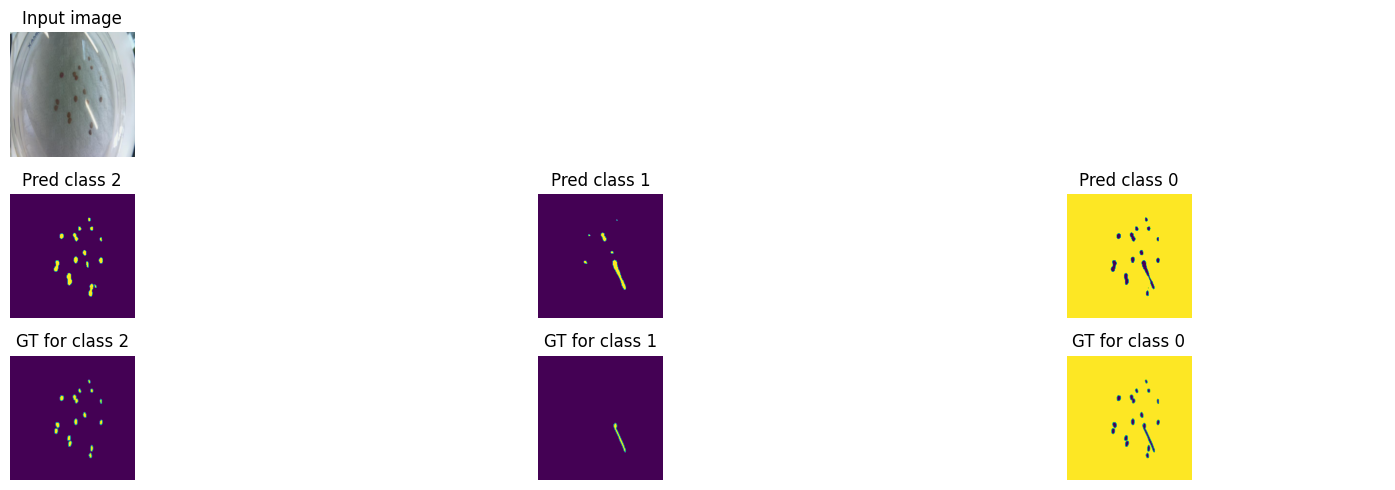

Train loss: 0.40214 | Time: 15m 24s | Val loss: 0.43197
Train_DICE_avg: 0.68847 | Train_Jaccard_avg: 0.62657 | Train_Sensitivity_avg: 0.68259 | Train_Specificity_avg: 0.93776 
Class 0 - Train_DICE: 0.99067 | Train_Jaccard: 0.98158 | Train_Sensitivity: 0.99317 | Train_Specificity: 0.82017 
Class 1 - Train_DICE: 0.34721 | Train_Jaccard: 0.26717 | Train_Sensitivity: 0.34626 | Train_Specificity: 0.99741 
Class 2 - Train_DICE: 0.72754 | Train_Jaccard: 0.63095 | Train_Sensitivity: 0.70833 | Train_Specificity: 0.99571 
Val_DICE_avg: 0.67404 | Val_Jaccard_avg: 0.61912 | Val_Sensitivity_avg: 0.65929 | Val_Specificity_avg: 0.93124 
Class 0 - Val_DICE: 0.99533 | Val_Jaccard: 0.99073 | Val_Sensitivity: 0.99736 | Val_Specificity: 0.79985 
Class 1 - Val_DICE: 0.30551 | Val_Jaccard: 0.23696 | Val_Sensitivity: 0.28146 | Val_Specificity: 0.99775 
Class 2 - Val_DICE: 0.72128 | Val_Jaccard: 0.62966 | Val_Sensitivity: 0.69904 | Val_Specificity: 0.99612 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.38636 | Time: 16m 23s | Val loss: 0.40684
Train_DICE_avg: 0.70036 | Train_Jaccard_avg: 0.64006 | Train_Sensitivity_avg: 0.69831 | Train_Specificity_avg: 0.93966 
Class 0 - Train_DICE: 0.99095 | Train_Jaccard: 0.98212 | Train_Sensitivity: 0.99343 | Train_Specificity: 0.82585 
Class 1 - Train_DICE: 0.35750 | Train_Jaccard: 0.27678 | Train_Sensitivity: 0.35975 | Train_Specificity: 0.99741 
Class 2 - Train_DICE: 0.75265 | Train_Jaccard: 0.66128 | Train_Sensitivity: 0.74173 | Train_Specificity: 0.99573 
Val_DICE_avg: 0.67848 | Val_Jaccard_avg: 0.62823 | Val_Sensitivity_avg: 0.66931 | Val_Specificity_avg: 0.91522 
Class 0 - Val_DICE: 0.99430 | Val_Jaccard: 0.98870 | Val_Sensitivity: 0.99776 | Val_Specificity: 0.75112 
Class 1 - Val_DICE: 0.30318 | Val_Jaccard: 0.23518 | Val_Sensitivity: 0.29043 | Val_Specificity: 0.99784 
Class 2 - Val_DICE: 0.73795 | Val_Jaccard: 0.66083 | Val_Sensitivity: 0.71973 | Val_Specificity: 0.99671 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.37144 | Time: 17m 22s | Val loss: 0.39031
Train_DICE_avg: 0.70742 | Train_Jaccard_avg: 0.64708 | Train_Sensitivity_avg: 0.71045 | Train_Specificity_avg: 0.94331 
Class 0 - Train_DICE: 0.99103 | Train_Jaccard: 0.98230 | Train_Sensitivity: 0.99281 | Train_Specificity: 0.83740 
Class 1 - Train_DICE: 0.36478 | Train_Jaccard: 0.28306 | Train_Sensitivity: 0.37289 | Train_Specificity: 0.99729 
Class 2 - Train_DICE: 0.76645 | Train_Jaccard: 0.67589 | Train_Sensitivity: 0.76564 | Train_Specificity: 0.99525 
Val_DICE_avg: 0.69444 | Val_Jaccard_avg: 0.64274 | Val_Sensitivity_avg: 0.68759 | Val_Specificity_avg: 0.92042 
Class 0 - Val_DICE: 0.99458 | Val_Jaccard: 0.98926 | Val_Sensitivity: 0.99766 | Val_Specificity: 0.76721 
Class 1 - Val_DICE: 0.32423 | Val_Jaccard: 0.25590 | Val_Sensitivity: 0.31122 | Val_Specificity: 0.99782 
Class 2 - Val_DICE: 0.76450 | Val_Jaccard: 0.68306 | Val_Sensitivity: 0.75387 | Val_Specificity: 0.99622 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.35693 | Time: 18m 21s | Val loss: 0.36387
Train_DICE_avg: 0.71449 | Train_Jaccard_avg: 0.65459 | Train_Sensitivity_avg: 0.72115 | Train_Specificity_avg: 0.94425 
Class 0 - Train_DICE: 0.99128 | Train_Jaccard: 0.98277 | Train_Sensitivity: 0.99310 | Train_Specificity: 0.84023 
Class 1 - Train_DICE: 0.37379 | Train_Jaccard: 0.29193 | Train_Sensitivity: 0.38760 | Train_Specificity: 0.99731 
Class 2 - Train_DICE: 0.77839 | Train_Jaccard: 0.68907 | Train_Sensitivity: 0.78275 | Train_Specificity: 0.99523 
Val_DICE_avg: 0.72096 | Val_Jaccard_avg: 0.66976 | Val_Sensitivity_avg: 0.73064 | Val_Specificity_avg: 0.94562 
Class 0 - Val_DICE: 0.99596 | Val_Jaccard: 0.99198 | Val_Sensitivity: 0.99719 | Val_Specificity: 0.84373 
Class 1 - Val_DICE: 0.36854 | Val_Jaccard: 0.29418 | Val_Sensitivity: 0.39851 | Val_Specificity: 0.99684 
Class 2 - Val_DICE: 0.79839 | Val_Jaccard: 0.72313 | Val_Sensitivity: 0.79621 | Val_Specificity: 0.99629 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.34661 | Time: 19m 21s | Val loss: 0.36223
Train_DICE_avg: 0.72245 | Train_Jaccard_avg: 0.66125 | Train_Sensitivity_avg: 0.73088 | Train_Specificity_avg: 0.94688 
Class 0 - Train_DICE: 0.99142 | Train_Jaccard: 0.98304 | Train_Sensitivity: 0.99282 | Train_Specificity: 0.84830 
Class 1 - Train_DICE: 0.37713 | Train_Jaccard: 0.29488 | Train_Sensitivity: 0.39683 | Train_Specificity: 0.99721 
Class 2 - Train_DICE: 0.79882 | Train_Jaccard: 0.70582 | Train_Sensitivity: 0.80298 | Train_Specificity: 0.99514 
Val_DICE_avg: 0.70448 | Val_Jaccard_avg: 0.65303 | Val_Sensitivity_avg: 0.70708 | Val_Specificity_avg: 0.93458 
Class 0 - Val_DICE: 0.99555 | Val_Jaccard: 0.99116 | Val_Sensitivity: 0.99746 | Val_Specificity: 0.81098 
Class 1 - Val_DICE: 0.35305 | Val_Jaccard: 0.28120 | Val_Sensitivity: 0.34507 | Val_Specificity: 0.99769 
Class 2 - Val_DICE: 0.76483 | Val_Jaccard: 0.68674 | Val_Sensitivity: 0.77871 | Val_Specificity: 0.99507 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


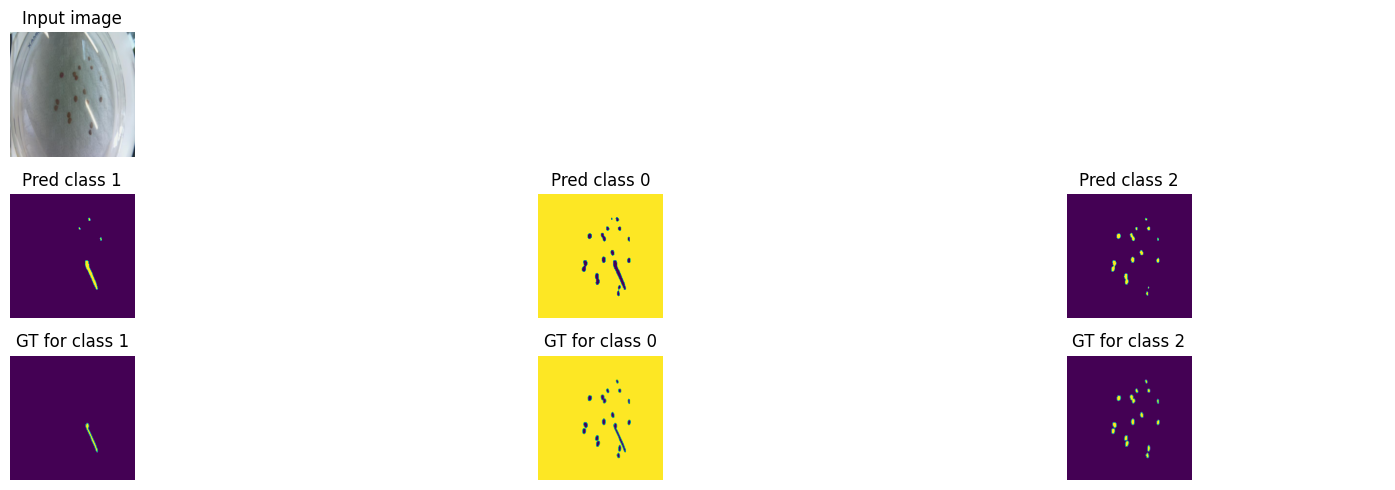

Train loss: 0.33466 | Time: 20m 21s | Val loss: 0.34800
Train_DICE_avg: 0.72908 | Train_Jaccard_avg: 0.66760 | Train_Sensitivity_avg: 0.73907 | Train_Specificity_avg: 0.94762 
Class 0 - Train_DICE: 0.99148 | Train_Jaccard: 0.98316 | Train_Sensitivity: 0.99272 | Train_Specificity: 0.85062 
Class 1 - Train_DICE: 0.38495 | Train_Jaccard: 0.30346 | Train_Sensitivity: 0.40718 | Train_Specificity: 0.99721 
Class 2 - Train_DICE: 0.81082 | Train_Jaccard: 0.71617 | Train_Sensitivity: 0.81731 | Train_Specificity: 0.99503 
Val_DICE_avg: 0.72383 | Val_Jaccard_avg: 0.66797 | Val_Sensitivity_avg: 0.73445 | Val_Specificity_avg: 0.94705 
Class 0 - Val_DICE: 0.99606 | Val_Jaccard: 0.99218 | Val_Sensitivity: 0.99649 | Val_Specificity: 0.84894 
Class 1 - Val_DICE: 0.34307 | Val_Jaccard: 0.27087 | Val_Sensitivity: 0.36565 | Val_Specificity: 0.99703 
Class 2 - Val_DICE: 0.83236 | Val_Jaccard: 0.74085 | Val_Sensitivity: 0.84120 | Val_Specificity: 0.99518 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.32042 | Time: 21m 20s | Val loss: 0.32954
Train_DICE_avg: 0.74083 | Train_Jaccard_avg: 0.67825 | Train_Sensitivity_avg: 0.75421 | Train_Specificity_avg: 0.95029 
Class 0 - Train_DICE: 0.99183 | Train_Jaccard: 0.98385 | Train_Sensitivity: 0.99267 | Train_Specificity: 0.85885 
Class 1 - Train_DICE: 0.39509 | Train_Jaccard: 0.31242 | Train_Sensitivity: 0.42667 | Train_Specificity: 0.99705 
Class 2 - Train_DICE: 0.83558 | Train_Jaccard: 0.73849 | Train_Sensitivity: 0.84328 | Train_Specificity: 0.99497 
Val_DICE_avg: 0.74051 | Val_Jaccard_avg: 0.68547 | Val_Sensitivity_avg: 0.74840 | Val_Specificity_avg: 0.94012 
Class 0 - Val_DICE: 0.99592 | Val_Jaccard: 0.99188 | Val_Sensitivity: 0.99739 | Val_Specificity: 0.82777 
Class 1 - Val_DICE: 0.36650 | Val_Jaccard: 0.29599 | Val_Sensitivity: 0.37585 | Val_Specificity: 0.99759 
Class 2 - Val_DICE: 0.85911 | Val_Jaccard: 0.76855 | Val_Sensitivity: 0.87196 | Val_Specificity: 0.99500 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.30533 | Time: 22m 20s | Val loss: 0.30893
Train_DICE_avg: 0.74880 | Train_Jaccard_avg: 0.68591 | Train_Sensitivity_avg: 0.76526 | Train_Specificity_avg: 0.95092 
Class 0 - Train_DICE: 0.99180 | Train_Jaccard: 0.98380 | Train_Sensitivity: 0.99271 | Train_Specificity: 0.86079 
Class 1 - Train_DICE: 0.40141 | Train_Jaccard: 0.31800 | Train_Sensitivity: 0.42994 | Train_Specificity: 0.99716 
Class 2 - Train_DICE: 0.85320 | Train_Jaccard: 0.75592 | Train_Sensitivity: 0.87311 | Train_Specificity: 0.99480 
Val_DICE_avg: 0.74669 | Val_Jaccard_avg: 0.69313 | Val_Sensitivity_avg: 0.76839 | Val_Specificity_avg: 0.95104 
Class 0 - Val_DICE: 0.99616 | Val_Jaccard: 0.99237 | Val_Sensitivity: 0.99723 | Val_Specificity: 0.86038 
Class 1 - Val_DICE: 0.36728 | Val_Jaccard: 0.29646 | Val_Sensitivity: 0.38992 | Val_Specificity: 0.99732 
Class 2 - Val_DICE: 0.87662 | Val_Jaccard: 0.79055 | Val_Sensitivity: 0.91802 | Val_Specificity: 0.99542 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.29307 | Time: 23m 19s | Val loss: 0.29114
Train_DICE_avg: 0.75076 | Train_Jaccard_avg: 0.68793 | Train_Sensitivity_avg: 0.77409 | Train_Specificity_avg: 0.95352 
Class 0 - Train_DICE: 0.99184 | Train_Jaccard: 0.98387 | Train_Sensitivity: 0.99230 | Train_Specificity: 0.86891 
Class 1 - Train_DICE: 0.40313 | Train_Jaccard: 0.32003 | Train_Sensitivity: 0.44094 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.85732 | Train_Jaccard: 0.75989 | Train_Sensitivity: 0.88904 | Train_Specificity: 0.99458 
Val_DICE_avg: 0.75824 | Val_Jaccard_avg: 0.70497 | Val_Sensitivity_avg: 0.77989 | Val_Specificity_avg: 0.94543 
Class 0 - Val_DICE: 0.99592 | Val_Jaccard: 0.99191 | Val_Sensitivity: 0.99736 | Val_Specificity: 0.84325 
Class 1 - Val_DICE: 0.39949 | Val_Jaccard: 0.32852 | Val_Sensitivity: 0.42951 | Val_Specificity: 0.99734 
Class 2 - Val_DICE: 0.87930 | Val_Jaccard: 0.79450 | Val_Sensitivity: 0.91279 | Val_Specificity: 0.99571 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.28102 | Time: 24m 19s | Val loss: 0.29349
Train_DICE_avg: 0.75683 | Train_Jaccard_avg: 0.69346 | Train_Sensitivity_avg: 0.78382 | Train_Specificity_avg: 0.95487 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98420 | Train_Sensitivity: 0.99219 | Train_Specificity: 0.87311 
Class 1 - Train_DICE: 0.42207 | Train_Jaccard: 0.33724 | Train_Sensitivity: 0.46555 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.85641 | Train_Jaccard: 0.75895 | Train_Sensitivity: 0.89372 | Train_Specificity: 0.99455 
Val_DICE_avg: 0.73625 | Val_Jaccard_avg: 0.68003 | Val_Sensitivity_avg: 0.75883 | Val_Specificity_avg: 0.94336 
Class 0 - Val_DICE: 0.99592 | Val_Jaccard: 0.99189 | Val_Sensitivity: 0.99718 | Val_Specificity: 0.83797 
Class 1 - Val_DICE: 0.35384 | Val_Jaccard: 0.28173 | Val_Sensitivity: 0.34170 | Val_Specificity: 0.99776 
Class 2 - Val_DICE: 0.85900 | Val_Jaccard: 0.76647 | Val_Sensitivity: 0.93761 | Val_Specificity: 0.99434 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


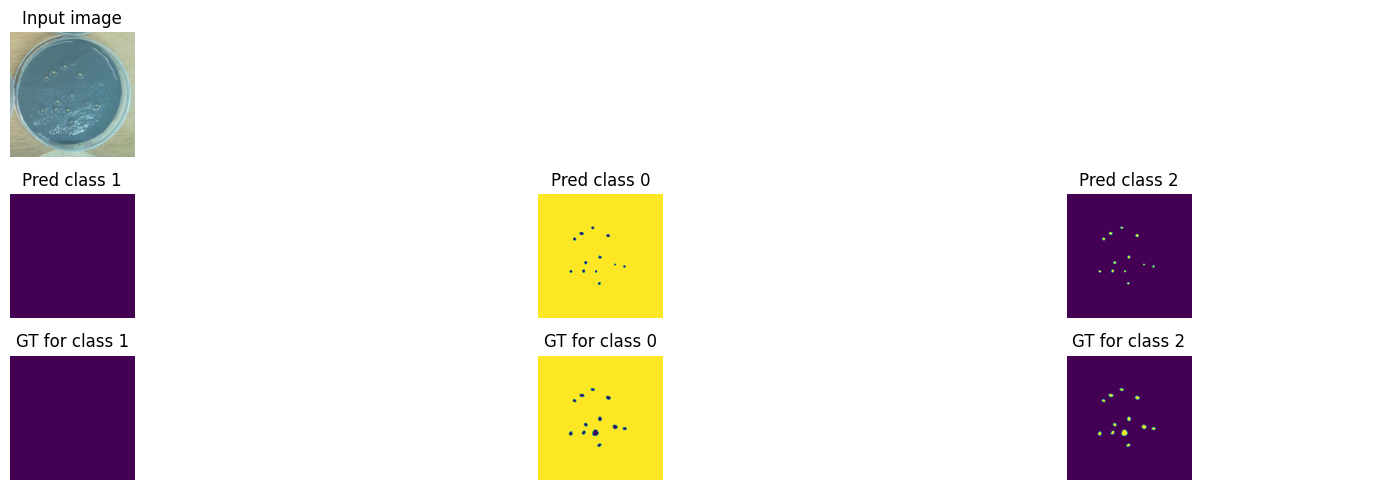

Train loss: 0.27422 | Time: 25m 19s | Val loss: 0.27672
Train_DICE_avg: 0.75915 | Train_Jaccard_avg: 0.69625 | Train_Sensitivity_avg: 0.78964 | Train_Specificity_avg: 0.95375 
Class 0 - Train_DICE: 0.99186 | Train_Jaccard: 0.98391 | Train_Sensitivity: 0.99233 | Train_Specificity: 0.86977 
Class 1 - Train_DICE: 0.42743 | Train_Jaccard: 0.34389 | Train_Sensitivity: 0.47822 | Train_Specificity: 0.99700 
Class 2 - Train_DICE: 0.85816 | Train_Jaccard: 0.76094 | Train_Sensitivity: 0.89836 | Train_Specificity: 0.99449 
Val_DICE_avg: 0.77016 | Val_Jaccard_avg: 0.71207 | Val_Sensitivity_avg: 0.81873 | Val_Specificity_avg: 0.96761 
Class 0 - Val_DICE: 0.99652 | Val_Jaccard: 0.99308 | Val_Sensitivity: 0.99614 | Val_Specificity: 0.91192 
Class 1 - Val_DICE: 0.46403 | Val_Jaccard: 0.39187 | Val_Sensitivity: 0.51402 | Val_Specificity: 0.99713 
Class 2 - Val_DICE: 0.84992 | Val_Jaccard: 0.75125 | Val_Sensitivity: 0.94604 | Val_Specificity: 0.99377 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.26735 | Time: 26m 19s | Val loss: 0.26182
Train_DICE_avg: 0.77176 | Train_Jaccard_avg: 0.70869 | Train_Sensitivity_avg: 0.80586 | Train_Specificity_avg: 0.95484 
Class 0 - Train_DICE: 0.99207 | Train_Jaccard: 0.98432 | Train_Sensitivity: 0.99240 | Train_Specificity: 0.87313 
Class 1 - Train_DICE: 0.46607 | Train_Jaccard: 0.38213 | Train_Sensitivity: 0.52278 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.85715 | Train_Jaccard: 0.75961 | Train_Sensitivity: 0.90241 | Train_Specificity: 0.99435 
Val_DICE_avg: 0.78773 | Val_Jaccard_avg: 0.73478 | Val_Sensitivity_avg: 0.81691 | Val_Specificity_avg: 0.95289 
Class 0 - Val_DICE: 0.99635 | Val_Jaccard: 0.99275 | Val_Sensitivity: 0.99705 | Val_Specificity: 0.86624 
Class 1 - Val_DICE: 0.48213 | Val_Jaccard: 0.40975 | Val_Sensitivity: 0.53886 | Val_Specificity: 0.99693 
Class 2 - Val_DICE: 0.88472 | Val_Jaccard: 0.80184 | Val_Sensitivity: 0.91483 | Val_Specificity: 0.99549 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.26108 | Time: 27m 19s | Val loss: 0.25186
Train_DICE_avg: 0.77331 | Train_Jaccard_avg: 0.71079 | Train_Sensitivity_avg: 0.80924 | Train_Specificity_avg: 0.95547 
Class 0 - Train_DICE: 0.99208 | Train_Jaccard: 0.98434 | Train_Sensitivity: 0.99247 | Train_Specificity: 0.87510 
Class 1 - Train_DICE: 0.46986 | Train_Jaccard: 0.38716 | Train_Sensitivity: 0.53074 | Train_Specificity: 0.99699 
Class 2 - Train_DICE: 0.85798 | Train_Jaccard: 0.76088 | Train_Sensitivity: 0.90450 | Train_Specificity: 0.99434 
Val_DICE_avg: 0.77576 | Val_Jaccard_avg: 0.72163 | Val_Sensitivity_avg: 0.79908 | Val_Specificity_avg: 0.94453 
Class 0 - Val_DICE: 0.99601 | Val_Jaccard: 0.99207 | Val_Sensitivity: 0.99771 | Val_Specificity: 0.84131 
Class 1 - Val_DICE: 0.46133 | Val_Jaccard: 0.39244 | Val_Sensitivity: 0.46883 | Val_Specificity: 0.99797 
Class 2 - Val_DICE: 0.86993 | Val_Jaccard: 0.78036 | Val_Sensitivity: 0.93068 | Val_Specificity: 0.99430 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.25286 | Time: 28m 18s | Val loss: 0.24006
Train_DICE_avg: 0.77874 | Train_Jaccard_avg: 0.71666 | Train_Sensitivity_avg: 0.81543 | Train_Specificity_avg: 0.95505 
Class 0 - Train_DICE: 0.99212 | Train_Jaccard: 0.98442 | Train_Sensitivity: 0.99280 | Train_Specificity: 0.87371 
Class 1 - Train_DICE: 0.48409 | Train_Jaccard: 0.40167 | Train_Sensitivity: 0.54716 | Train_Specificity: 0.99704 
Class 2 - Train_DICE: 0.86003 | Train_Jaccard: 0.76389 | Train_Sensitivity: 0.90634 | Train_Specificity: 0.99441 
Val_DICE_avg: 0.78084 | Val_Jaccard_avg: 0.72674 | Val_Sensitivity_avg: 0.81995 | Val_Specificity_avg: 0.95179 
Class 0 - Val_DICE: 0.99609 | Val_Jaccard: 0.99222 | Val_Sensitivity: 0.99746 | Val_Specificity: 0.86288 
Class 1 - Val_DICE: 0.47006 | Val_Jaccard: 0.39769 | Val_Sensitivity: 0.53432 | Val_Specificity: 0.99697 
Class 2 - Val_DICE: 0.87636 | Val_Jaccard: 0.79031 | Val_Sensitivity: 0.92807 | Val_Specificity: 0.99550 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.25279 | Time: 29m 17s | Val loss: 0.24677
Train_DICE_avg: 0.77809 | Train_Jaccard_avg: 0.71549 | Train_Sensitivity_avg: 0.81895 | Train_Specificity_avg: 0.95518 
Class 0 - Train_DICE: 0.99198 | Train_Jaccard: 0.98414 | Train_Sensitivity: 0.99258 | Train_Specificity: 0.87439 
Class 1 - Train_DICE: 0.48671 | Train_Jaccard: 0.40493 | Train_Sensitivity: 0.56057 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.85559 | Train_Jaccard: 0.75739 | Train_Sensitivity: 0.90371 | Train_Specificity: 0.99420 
Val_DICE_avg: 0.83097 | Val_Jaccard_avg: 0.77803 | Val_Sensitivity_avg: 0.87855 | Val_Specificity_avg: 0.96090 
Class 0 - Val_DICE: 0.99633 | Val_Jaccard: 0.99272 | Val_Sensitivity: 0.99684 | Val_Specificity: 0.89033 
Class 1 - Val_DICE: 0.62391 | Val_Jaccard: 0.55450 | Val_Sensitivity: 0.71782 | Val_Specificity: 0.99681 
Class 2 - Val_DICE: 0.87266 | Val_Jaccard: 0.78688 | Val_Sensitivity: 0.92098 | Val_Specificity: 0.99557 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


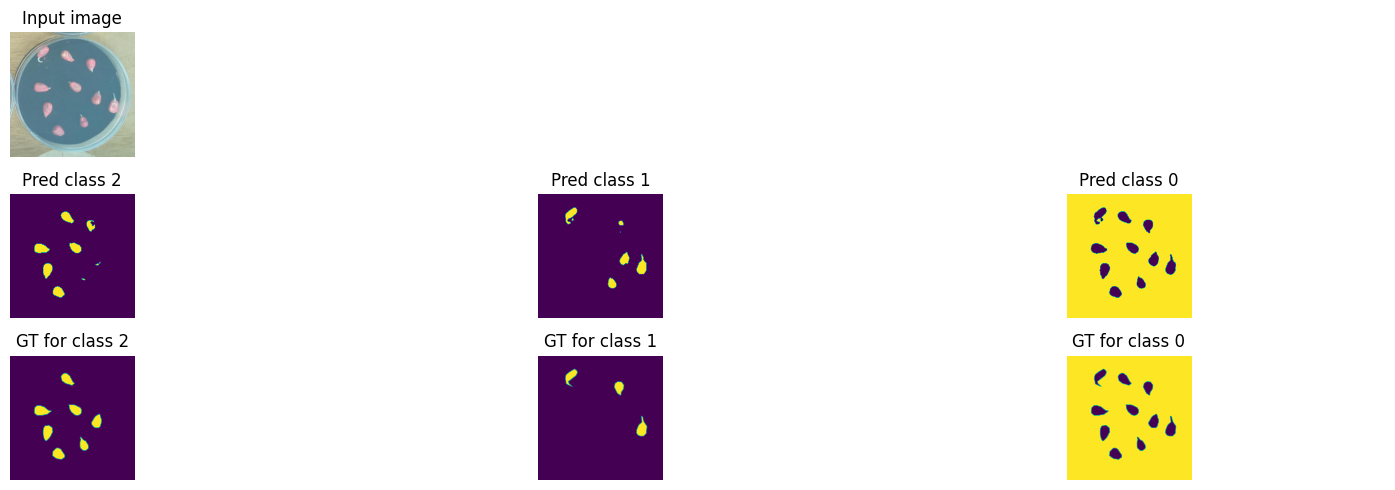

Train loss: 0.24237 | Time: 30m 18s | Val loss: 0.20193
Train_DICE_avg: 0.79017 | Train_Jaccard_avg: 0.72782 | Train_Sensitivity_avg: 0.83198 | Train_Specificity_avg: 0.95441 
Class 0 - Train_DICE: 0.99217 | Train_Jaccard: 0.98452 | Train_Sensitivity: 0.99298 | Train_Specificity: 0.87194 
Class 1 - Train_DICE: 0.51935 | Train_Jaccard: 0.43699 | Train_Sensitivity: 0.59551 | Train_Specificity: 0.99699 
Class 2 - Train_DICE: 0.85899 | Train_Jaccard: 0.76195 | Train_Sensitivity: 0.90743 | Train_Specificity: 0.99431 
Val_DICE_avg: 0.83258 | Val_Jaccard_avg: 0.78169 | Val_Sensitivity_avg: 0.87197 | Val_Specificity_avg: 0.94521 
Class 0 - Val_DICE: 0.99583 | Val_Jaccard: 0.99172 | Val_Sensitivity: 0.99792 | Val_Specificity: 0.84301 
Class 1 - Val_DICE: 0.62487 | Val_Jaccard: 0.56292 | Val_Sensitivity: 0.69201 | Val_Specificity: 0.99743 
Class 2 - Val_DICE: 0.87704 | Val_Jaccard: 0.79042 | Val_Sensitivity: 0.92597 | Val_Specificity: 0.99520 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.23171 | Time: 31m 18s | Val loss: 0.20080
Train_DICE_avg: 0.80185 | Train_Jaccard_avg: 0.74055 | Train_Sensitivity_avg: 0.85052 | Train_Specificity_avg: 0.95327 
Class 0 - Train_DICE: 0.99191 | Train_Jaccard: 0.98401 | Train_Sensitivity: 0.99292 | Train_Specificity: 0.86865 
Class 1 - Train_DICE: 0.55576 | Train_Jaccard: 0.47692 | Train_Sensitivity: 0.65239 | Train_Specificity: 0.99692 
Class 2 - Train_DICE: 0.85788 | Train_Jaccard: 0.76070 | Train_Sensitivity: 0.90624 | Train_Specificity: 0.99423 
Val_DICE_avg: 0.81992 | Val_Jaccard_avg: 0.76936 | Val_Sensitivity_avg: 0.88052 | Val_Specificity_avg: 0.94879 
Class 0 - Val_DICE: 0.99615 | Val_Jaccard: 0.99234 | Val_Sensitivity: 0.99737 | Val_Specificity: 0.85492 
Class 1 - Val_DICE: 0.59319 | Val_Jaccard: 0.53563 | Val_Sensitivity: 0.71005 | Val_Specificity: 0.99700 
Class 2 - Val_DICE: 0.87041 | Val_Jaccard: 0.78010 | Val_Sensitivity: 0.93413 | Val_Specificity: 0.99444 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.22511 | Time: 32m 18s | Val loss: 0.19581
Train_DICE_avg: 0.80589 | Train_Jaccard_avg: 0.74500 | Train_Sensitivity_avg: 0.85827 | Train_Specificity_avg: 0.95273 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98420 | Train_Sensitivity: 0.99316 | Train_Specificity: 0.86716 
Class 1 - Train_DICE: 0.56855 | Train_Jaccard: 0.49183 | Train_Sensitivity: 0.67263 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.85711 | Train_Jaccard: 0.75895 | Train_Sensitivity: 0.90901 | Train_Specificity: 0.99409 
Val_DICE_avg: 0.82216 | Val_Jaccard_avg: 0.77165 | Val_Sensitivity_avg: 0.86730 | Val_Specificity_avg: 0.94155 
Class 0 - Val_DICE: 0.99553 | Val_Jaccard: 0.99113 | Val_Sensitivity: 0.99810 | Val_Specificity: 0.83159 
Class 1 - Val_DICE: 0.59171 | Val_Jaccard: 0.52892 | Val_Sensitivity: 0.68190 | Val_Specificity: 0.99714 
Class 2 - Val_DICE: 0.87924 | Val_Jaccard: 0.79489 | Val_Sensitivity: 0.92191 | Val_Specificity: 0.99591 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.21742 | Time: 33m 18s | Val loss: 0.19226
Train_DICE_avg: 0.81380 | Train_Jaccard_avg: 0.75336 | Train_Sensitivity_avg: 0.86821 | Train_Specificity_avg: 0.95279 
Class 0 - Train_DICE: 0.99202 | Train_Jaccard: 0.98422 | Train_Sensitivity: 0.99338 | Train_Specificity: 0.86714 
Class 1 - Train_DICE: 0.58965 | Train_Jaccard: 0.51272 | Train_Sensitivity: 0.69976 | Train_Specificity: 0.99694 
Class 2 - Train_DICE: 0.85972 | Train_Jaccard: 0.76315 | Train_Sensitivity: 0.91148 | Train_Specificity: 0.99427 
Val_DICE_avg: 0.82370 | Val_Jaccard_avg: 0.77075 | Val_Sensitivity_avg: 0.87067 | Val_Specificity_avg: 0.94653 
Class 0 - Val_DICE: 0.99606 | Val_Jaccard: 0.99217 | Val_Sensitivity: 0.99782 | Val_Specificity: 0.84782 
Class 1 - Val_DICE: 0.60887 | Val_Jaccard: 0.54653 | Val_Sensitivity: 0.67124 | Val_Specificity: 0.99754 
Class 2 - Val_DICE: 0.86616 | Val_Jaccard: 0.77355 | Val_Sensitivity: 0.94297 | Val_Specificity: 0.99424 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.21042 | Time: 34m 17s | Val loss: 0.18233
Train_DICE_avg: 0.82232 | Train_Jaccard_avg: 0.76191 | Train_Sensitivity_avg: 0.87644 | Train_Specificity_avg: 0.95214 
Class 0 - Train_DICE: 0.99220 | Train_Jaccard: 0.98457 | Train_Sensitivity: 0.99349 | Train_Specificity: 0.86525 
Class 1 - Train_DICE: 0.61416 | Train_Jaccard: 0.53726 | Train_Sensitivity: 0.72373 | Train_Specificity: 0.99699 
Class 2 - Train_DICE: 0.86061 | Train_Jaccard: 0.76389 | Train_Sensitivity: 0.91212 | Train_Specificity: 0.99417 
Val_DICE_avg: 0.83022 | Val_Jaccard_avg: 0.77819 | Val_Sensitivity_avg: 0.87693 | Val_Specificity_avg: 0.94270 
Class 0 - Val_DICE: 0.99584 | Val_Jaccard: 0.99173 | Val_Sensitivity: 0.99779 | Val_Specificity: 0.83600 
Class 1 - Val_DICE: 0.62000 | Val_Jaccard: 0.55416 | Val_Sensitivity: 0.69188 | Val_Specificity: 0.99717 
Class 2 - Val_DICE: 0.87482 | Val_Jaccard: 0.78866 | Val_Sensitivity: 0.94111 | Val_Specificity: 0.99494 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


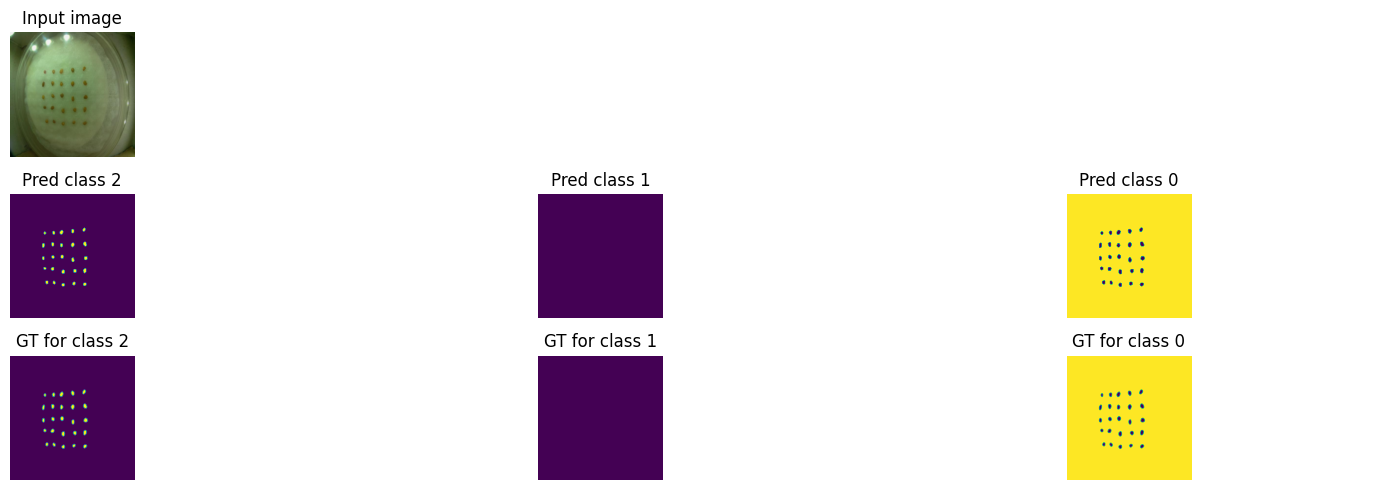

Train loss: 0.20486 | Time: 35m 18s | Val loss: 0.18888
Train_DICE_avg: 0.82396 | Train_Jaccard_avg: 0.76353 | Train_Sensitivity_avg: 0.87937 | Train_Specificity_avg: 0.95277 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98470 | Train_Sensitivity: 0.99358 | Train_Specificity: 0.86716 
Class 1 - Train_DICE: 0.61910 | Train_Jaccard: 0.54195 | Train_Sensitivity: 0.73205 | Train_Specificity: 0.99694 
Class 2 - Train_DICE: 0.86051 | Train_Jaccard: 0.76396 | Train_Sensitivity: 0.91248 | Train_Specificity: 0.99420 
Val_DICE_avg: 0.83031 | Val_Jaccard_avg: 0.78105 | Val_Sensitivity_avg: 0.88041 | Val_Specificity_avg: 0.94493 
Class 0 - Val_DICE: 0.99595 | Val_Jaccard: 0.99196 | Val_Sensitivity: 0.99799 | Val_Specificity: 0.84206 
Class 1 - Val_DICE: 0.61472 | Val_Jaccard: 0.55498 | Val_Sensitivity: 0.70895 | Val_Specificity: 0.99734 
Class 2 - Val_DICE: 0.88027 | Val_Jaccard: 0.79622 | Val_Sensitivity: 0.93430 | Val_Specificity: 0.99541 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.20233 | Time: 36m 18s | Val loss: 0.18088
Train_DICE_avg: 0.82783 | Train_Jaccard_avg: 0.76854 | Train_Sensitivity_avg: 0.88745 | Train_Specificity_avg: 0.95119 
Class 0 - Train_DICE: 0.99213 | Train_Jaccard: 0.98444 | Train_Sensitivity: 0.99392 | Train_Specificity: 0.86239 
Class 1 - Train_DICE: 0.62932 | Train_Jaccard: 0.55487 | Train_Sensitivity: 0.75447 | Train_Specificity: 0.99694 
Class 2 - Train_DICE: 0.86204 | Train_Jaccard: 0.76631 | Train_Sensitivity: 0.91397 | Train_Specificity: 0.99425 
Val_DICE_avg: 0.83225 | Val_Jaccard_avg: 0.78129 | Val_Sensitivity_avg: 0.87790 | Val_Specificity_avg: 0.93880 
Class 0 - Val_DICE: 0.99576 | Val_Jaccard: 0.99158 | Val_Sensitivity: 0.99799 | Val_Specificity: 0.82415 
Class 1 - Val_DICE: 0.62282 | Val_Jaccard: 0.56012 | Val_Sensitivity: 0.69522 | Val_Specificity: 0.99746 
Class 2 - Val_DICE: 0.87816 | Val_Jaccard: 0.79217 | Val_Sensitivity: 0.94049 | Val_Specificity: 0.99480 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.19831 | Time: 37m 18s | Val loss: 0.17552
Train_DICE_avg: 0.83231 | Train_Jaccard_avg: 0.77262 | Train_Sensitivity_avg: 0.88999 | Train_Specificity_avg: 0.95053 
Class 0 - Train_DICE: 0.99213 | Train_Jaccard: 0.98444 | Train_Sensitivity: 0.99392 | Train_Specificity: 0.86035 
Class 1 - Train_DICE: 0.64196 | Train_Jaccard: 0.56607 | Train_Sensitivity: 0.76180 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.86283 | Train_Jaccard: 0.76735 | Train_Sensitivity: 0.91424 | Train_Specificity: 0.99427 
Val_DICE_avg: 0.85379 | Val_Jaccard_avg: 0.80100 | Val_Sensitivity_avg: 0.90357 | Val_Specificity_avg: 0.94706 
Class 0 - Val_DICE: 0.99606 | Val_Jaccard: 0.99217 | Val_Sensitivity: 0.99788 | Val_Specificity: 0.84922 
Class 1 - Val_DICE: 0.69376 | Val_Jaccard: 0.62952 | Val_Sensitivity: 0.77019 | Val_Specificity: 0.99753 
Class 2 - Val_DICE: 0.87156 | Val_Jaccard: 0.78129 | Val_Sensitivity: 0.94265 | Val_Specificity: 0.99444 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.19668 | Time: 38m 19s | Val loss: 0.18133
Train_DICE_avg: 0.83334 | Train_Jaccard_avg: 0.77336 | Train_Sensitivity_avg: 0.89243 | Train_Specificity_avg: 0.95015 
Class 0 - Train_DICE: 0.99213 | Train_Jaccard: 0.98444 | Train_Sensitivity: 0.99406 | Train_Specificity: 0.85942 
Class 1 - Train_DICE: 0.64616 | Train_Jaccard: 0.56993 | Train_Sensitivity: 0.76903 | Train_Specificity: 0.99691 
Class 2 - Train_DICE: 0.86172 | Train_Jaccard: 0.76570 | Train_Sensitivity: 0.91420 | Train_Specificity: 0.99412 
Val_DICE_avg: 0.83404 | Val_Jaccard_avg: 0.78213 | Val_Sensitivity_avg: 0.87970 | Val_Specificity_avg: 0.93183 
Class 0 - Val_DICE: 0.99540 | Val_Jaccard: 0.99085 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.80356 
Class 1 - Val_DICE: 0.64136 | Val_Jaccard: 0.57653 | Val_Sensitivity: 0.69731 | Val_Specificity: 0.99760 
Class 2 - Val_DICE: 0.86537 | Val_Jaccard: 0.77902 | Val_Sensitivity: 0.94371 | Val_Specificity: 0.99434 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.18695 | Time: 39m 21s | Val loss: 0.13685
Train_DICE_avg: 0.84401 | Train_Jaccard_avg: 0.78437 | Train_Sensitivity_avg: 0.90369 | Train_Specificity_avg: 0.95201 
Class 0 - Train_DICE: 0.99214 | Train_Jaccard: 0.98446 | Train_Sensitivity: 0.99375 | Train_Specificity: 0.86490 
Class 1 - Train_DICE: 0.67570 | Train_Jaccard: 0.59943 | Train_Sensitivity: 0.80037 | Train_Specificity: 0.99687 
Class 2 - Train_DICE: 0.86417 | Train_Jaccard: 0.76922 | Train_Sensitivity: 0.91694 | Train_Specificity: 0.99426 
Val_DICE_avg: 0.87617 | Val_Jaccard_avg: 0.82129 | Val_Sensitivity_avg: 0.94178 | Val_Specificity_avg: 0.95074 
Class 0 - Val_DICE: 0.99627 | Val_Jaccard: 0.99260 | Val_Sensitivity: 0.99765 | Val_Specificity: 0.86122 
Class 1 - Val_DICE: 0.77562 | Val_Jaccard: 0.71209 | Val_Sensitivity: 0.88042 | Val_Specificity: 0.99717 
Class 2 - Val_DICE: 0.85661 | Val_Jaccard: 0.75918 | Val_Sensitivity: 0.94727 | Val_Specificity: 0.99383 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


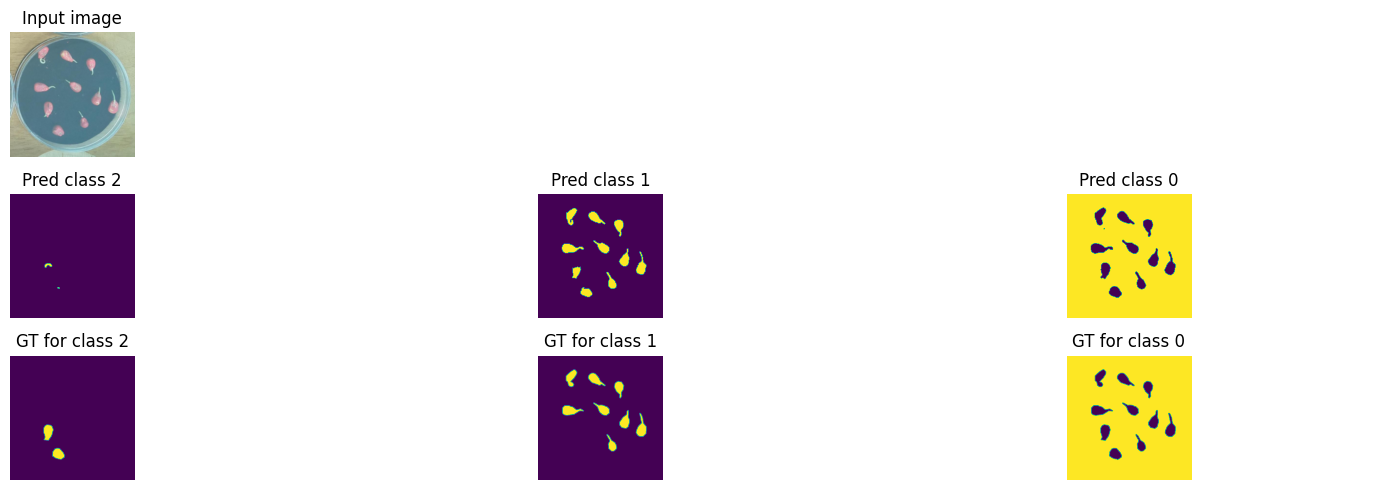

Train loss: 0.18061 | Time: 40m 24s | Val loss: 0.17375
Train_DICE_avg: 0.84955 | Train_Jaccard_avg: 0.79064 | Train_Sensitivity_avg: 0.91149 | Train_Specificity_avg: 0.95124 
Class 0 - Train_DICE: 0.99213 | Train_Jaccard: 0.98445 | Train_Sensitivity: 0.99382 | Train_Specificity: 0.86244 
Class 1 - Train_DICE: 0.69215 | Train_Jaccard: 0.61763 | Train_Sensitivity: 0.82478 | Train_Specificity: 0.99687 
Class 2 - Train_DICE: 0.86436 | Train_Jaccard: 0.76985 | Train_Sensitivity: 0.91586 | Train_Specificity: 0.99439 
Val_DICE_avg: 0.84328 | Val_Jaccard_avg: 0.78935 | Val_Sensitivity_avg: 0.90169 | Val_Specificity_avg: 0.94913 
Class 0 - Val_DICE: 0.99616 | Val_Jaccard: 0.99237 | Val_Sensitivity: 0.99777 | Val_Specificity: 0.85629 
Class 1 - Val_DICE: 0.67877 | Val_Jaccard: 0.61363 | Val_Sensitivity: 0.75609 | Val_Specificity: 0.99744 
Class 2 - Val_DICE: 0.85491 | Val_Jaccard: 0.76206 | Val_Sensitivity: 0.95121 | Val_Specificity: 0.99366 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]


Train loss: 0.17708 | Time: 41m 27s | Val loss: 0.14973
Train_DICE_avg: 0.85253 | Train_Jaccard_avg: 0.79329 | Train_Sensitivity_avg: 0.91583 | Train_Specificity_avg: 0.95058 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98449 | Train_Sensitivity: 0.99418 | Train_Specificity: 0.86053 
Class 1 - Train_DICE: 0.70027 | Train_Jaccard: 0.62466 | Train_Sensitivity: 0.83573 | Train_Specificity: 0.99686 
Class 2 - Train_DICE: 0.86515 | Train_Jaccard: 0.77071 | Train_Sensitivity: 0.91757 | Train_Specificity: 0.99435 
Val_DICE_avg: 0.86596 | Val_Jaccard_avg: 0.81340 | Val_Sensitivity_avg: 0.92128 | Val_Specificity_avg: 0.94157 
Class 0 - Val_DICE: 0.99579 | Val_Jaccard: 0.99163 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.83269 
Class 1 - Val_DICE: 0.72834 | Val_Jaccard: 0.66328 | Val_Sensitivity: 0.82164 | Val_Specificity: 0.99720 
Class 2 - Val_DICE: 0.87374 | Val_Jaccard: 0.78527 | Val_Sensitivity: 0.94412 | Val_Specificity: 0.99482 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


Train loss: 0.17972 | Time: 42m 29s | Val loss: 0.15033
Train_DICE_avg: 0.84908 | Train_Jaccard_avg: 0.79001 | Train_Sensitivity_avg: 0.91383 | Train_Specificity_avg: 0.95052 
Class 0 - Train_DICE: 0.99209 | Train_Jaccard: 0.98435 | Train_Sensitivity: 0.99387 | Train_Specificity: 0.86044 
Class 1 - Train_DICE: 0.69061 | Train_Jaccard: 0.61596 | Train_Sensitivity: 0.83276 | Train_Specificity: 0.99673 
Class 2 - Train_DICE: 0.86454 | Train_Jaccard: 0.76972 | Train_Sensitivity: 0.91486 | Train_Specificity: 0.99439 
Val_DICE_avg: 0.86716 | Val_Jaccard_avg: 0.81480 | Val_Sensitivity_avg: 0.91658 | Val_Specificity_avg: 0.94027 
Class 0 - Val_DICE: 0.99568 | Val_Jaccard: 0.99143 | Val_Sensitivity: 0.99812 | Val_Specificity: 0.82858 
Class 1 - Val_DICE: 0.72971 | Val_Jaccard: 0.66281 | Val_Sensitivity: 0.81224 | Val_Specificity: 0.99733 
Class 2 - Val_DICE: 0.87610 | Val_Jaccard: 0.79015 | Val_Sensitivity: 0.93937 | Val_Specificity: 0.99491 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train loss: 0.17581 | Time: 43m 31s | Val loss: 0.13510
Train_DICE_avg: 0.85397 | Train_Jaccard_avg: 0.79525 | Train_Sensitivity_avg: 0.91802 | Train_Specificity_avg: 0.95117 
Class 0 - Train_DICE: 0.99238 | Train_Jaccard: 0.98494 | Train_Sensitivity: 0.99429 | Train_Specificity: 0.86232 
Class 1 - Train_DICE: 0.70435 | Train_Jaccard: 0.63005 | Train_Sensitivity: 0.84450 | Train_Specificity: 0.99676 
Class 2 - Train_DICE: 0.86518 | Train_Jaccard: 0.77075 | Train_Sensitivity: 0.91528 | Train_Specificity: 0.99444 
Val_DICE_avg: 0.88151 | Val_Jaccard_avg: 0.83099 | Val_Sensitivity_avg: 0.94458 | Val_Specificity_avg: 0.94220 
Class 0 - Val_DICE: 0.99581 | Val_Jaccard: 0.99168 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.83474 
Class 1 - Val_DICE: 0.76712 | Val_Jaccard: 0.70347 | Val_Sensitivity: 0.90599 | Val_Specificity: 0.99638 
Class 2 - Val_DICE: 0.88160 | Val_Jaccard: 0.79783 | Val_Sensitivity: 0.92989 | Val_Specificity: 0.99549 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


Train loss: 0.17467 | Time: 44m 33s | Val loss: 0.12983
Train_DICE_avg: 0.85211 | Train_Jaccard_avg: 0.79321 | Train_Sensitivity_avg: 0.91778 | Train_Specificity_avg: 0.94964 
Class 0 - Train_DICE: 0.99215 | Train_Jaccard: 0.98448 | Train_Sensitivity: 0.99421 | Train_Specificity: 0.85782 
Class 1 - Train_DICE: 0.69883 | Train_Jaccard: 0.62423 | Train_Sensitivity: 0.84470 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.86535 | Train_Jaccard: 0.77090 | Train_Sensitivity: 0.91444 | Train_Specificity: 0.99443 
Val_DICE_avg: 0.88470 | Val_Jaccard_avg: 0.83314 | Val_Sensitivity_avg: 0.94079 | Val_Specificity_avg: 0.94060 
Class 0 - Val_DICE: 0.99578 | Val_Jaccard: 0.99163 | Val_Sensitivity: 0.99801 | Val_Specificity: 0.82993 
Class 1 - Val_DICE: 0.77769 | Val_Jaccard: 0.71188 | Val_Sensitivity: 0.88851 | Val_Specificity: 0.99664 
Class 2 - Val_DICE: 0.88061 | Val_Jaccard: 0.79591 | Val_Sensitivity: 0.93583 | Val_Specificity: 0.99523 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


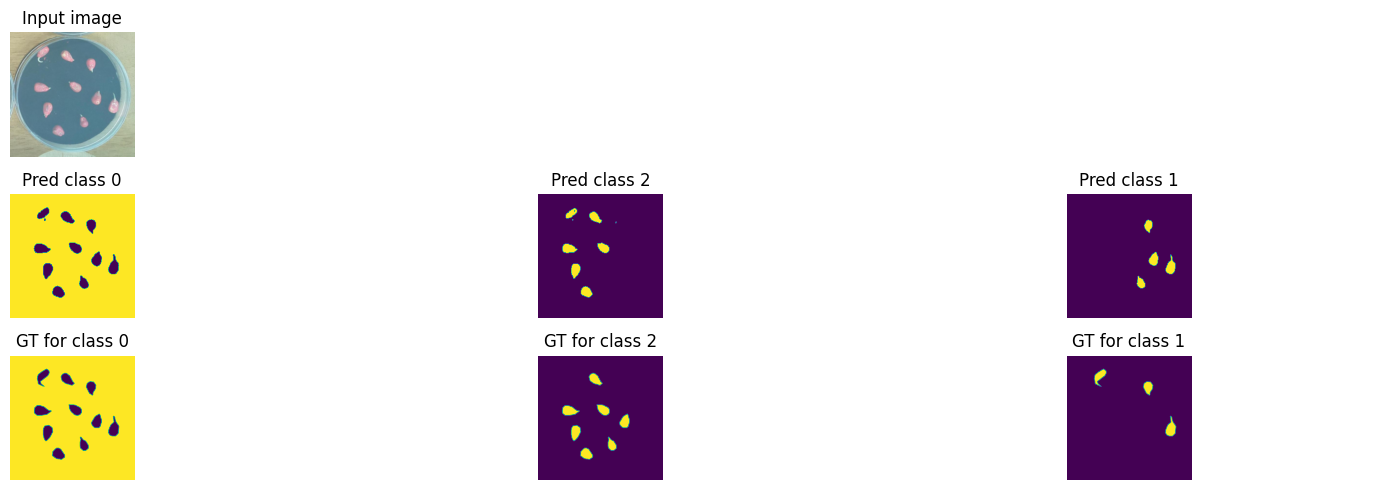

Train loss: 0.17201 | Time: 45m 35s | Val loss: 0.12123
Train_DICE_avg: 0.85599 | Train_Jaccard_avg: 0.79769 | Train_Sensitivity_avg: 0.91796 | Train_Specificity_avg: 0.95097 
Class 0 - Train_DICE: 0.99233 | Train_Jaccard: 0.98483 | Train_Sensitivity: 0.99437 | Train_Specificity: 0.86152 
Class 1 - Train_DICE: 0.70857 | Train_Jaccard: 0.63413 | Train_Sensitivity: 0.84194 | Train_Specificity: 0.99689 
Class 2 - Train_DICE: 0.86706 | Train_Jaccard: 0.77411 | Train_Sensitivity: 0.91757 | Train_Specificity: 0.99449 
Val_DICE_avg: 0.89137 | Val_Jaccard_avg: 0.83998 | Val_Sensitivity_avg: 0.93886 | Val_Specificity_avg: 0.94073 
Class 0 - Val_DICE: 0.99583 | Val_Jaccard: 0.99171 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.82995 
Class 1 - Val_DICE: 0.79846 | Val_Jaccard: 0.73328 | Val_Sensitivity: 0.87053 | Val_Specificity: 0.99725 
Class 2 - Val_DICE: 0.87982 | Val_Jaccard: 0.79495 | Val_Sensitivity: 0.94795 | Val_Specificity: 0.99500 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.16919 | Time: 46m 37s | Val loss: 0.12156
Train_DICE_avg: 0.85482 | Train_Jaccard_avg: 0.79599 | Train_Sensitivity_avg: 0.91438 | Train_Specificity_avg: 0.95136 
Class 0 - Train_DICE: 0.99230 | Train_Jaccard: 0.98477 | Train_Sensitivity: 0.99435 | Train_Specificity: 0.86260 
Class 1 - Train_DICE: 0.70371 | Train_Jaccard: 0.62757 | Train_Sensitivity: 0.83024 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.86843 | Train_Jaccard: 0.77564 | Train_Sensitivity: 0.91853 | Train_Specificity: 0.99449 
Val_DICE_avg: 0.88812 | Val_Jaccard_avg: 0.83623 | Val_Sensitivity_avg: 0.94420 | Val_Specificity_avg: 0.94535 
Class 0 - Val_DICE: 0.99605 | Val_Jaccard: 0.99215 | Val_Sensitivity: 0.99789 | Val_Specificity: 0.84416 
Class 1 - Val_DICE: 0.79012 | Val_Jaccard: 0.72478 | Val_Sensitivity: 0.89124 | Val_Specificity: 0.99698 
Class 2 - Val_DICE: 0.87820 | Val_Jaccard: 0.79176 | Val_Sensitivity: 0.94347 | Val_Specificity: 0.99492 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.17302 | Time: 47m 39s | Val loss: 0.12118
Train_DICE_avg: 0.85367 | Train_Jaccard_avg: 0.79442 | Train_Sensitivity_avg: 0.91559 | Train_Specificity_avg: 0.94983 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98488 | Train_Sensitivity: 0.99463 | Train_Specificity: 0.85815 
Class 1 - Train_DICE: 0.70144 | Train_Jaccard: 0.62495 | Train_Sensitivity: 0.83536 | Train_Specificity: 0.99688 
Class 2 - Train_DICE: 0.86721 | Train_Jaccard: 0.77344 | Train_Sensitivity: 0.91678 | Train_Specificity: 0.99446 
Val_DICE_avg: 0.89342 | Val_Jaccard_avg: 0.84187 | Val_Sensitivity_avg: 0.93919 | Val_Specificity_avg: 0.93939 
Class 0 - Val_DICE: 0.99578 | Val_Jaccard: 0.99161 | Val_Sensitivity: 0.99815 | Val_Specificity: 0.82574 
Class 1 - Val_DICE: 0.80191 | Val_Jaccard: 0.73559 | Val_Sensitivity: 0.87540 | Val_Specificity: 0.99741 
Class 2 - Val_DICE: 0.88257 | Val_Jaccard: 0.79842 | Val_Sensitivity: 0.94401 | Val_Specificity: 0.99501 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.16602 | Time: 48m 41s | Val loss: 0.11923
Train_DICE_avg: 0.86017 | Train_Jaccard_avg: 0.80168 | Train_Sensitivity_avg: 0.92126 | Train_Specificity_avg: 0.94962 
Class 0 - Train_DICE: 0.99233 | Train_Jaccard: 0.98482 | Train_Sensitivity: 0.99469 | Train_Specificity: 0.85735 
Class 1 - Train_DICE: 0.71966 | Train_Jaccard: 0.64422 | Train_Sensitivity: 0.84872 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86852 | Train_Jaccard: 0.77599 | Train_Sensitivity: 0.92036 | Train_Specificity: 0.99450 
Val_DICE_avg: 0.88678 | Val_Jaccard_avg: 0.83328 | Val_Sensitivity_avg: 0.94217 | Val_Specificity_avg: 0.94477 
Class 0 - Val_DICE: 0.99609 | Val_Jaccard: 0.99223 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.84278 
Class 1 - Val_DICE: 0.79239 | Val_Jaccard: 0.72594 | Val_Sensitivity: 0.87727 | Val_Specificity: 0.99714 
Class 2 - Val_DICE: 0.87186 | Val_Jaccard: 0.78166 | Val_Sensitivity: 0.95139 | Val_Specificity: 0.99438 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.16288 | Time: 49m 43s | Val loss: 0.11900
Train_DICE_avg: 0.86072 | Train_Jaccard_avg: 0.80210 | Train_Sensitivity_avg: 0.92039 | Train_Specificity_avg: 0.95140 
Class 0 - Train_DICE: 0.99233 | Train_Jaccard: 0.98484 | Train_Sensitivity: 0.99436 | Train_Specificity: 0.86276 
Class 1 - Train_DICE: 0.72176 | Train_Jaccard: 0.64613 | Train_Sensitivity: 0.84932 | Train_Specificity: 0.99693 
Class 2 - Train_DICE: 0.86806 | Train_Jaccard: 0.77535 | Train_Sensitivity: 0.91748 | Train_Specificity: 0.99452 
Val_DICE_avg: 0.88899 | Val_Jaccard_avg: 0.83649 | Val_Sensitivity_avg: 0.94172 | Val_Specificity_avg: 0.94517 
Class 0 - Val_DICE: 0.99599 | Val_Jaccard: 0.99204 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.84349 
Class 1 - Val_DICE: 0.79876 | Val_Jaccard: 0.73465 | Val_Sensitivity: 0.87347 | Val_Specificity: 0.99743 
Class 2 - Val_DICE: 0.87223 | Val_Jaccard: 0.78280 | Val_Sensitivity: 0.95362 | Val_Specificity: 0.99458 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


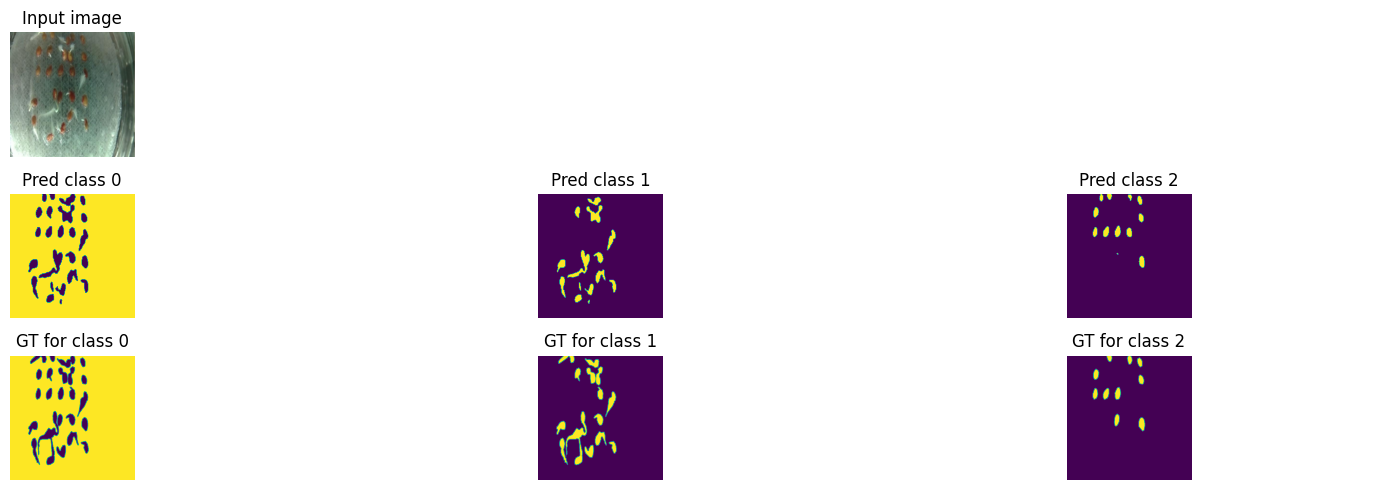

Train loss: 0.16358 | Time: 50m 46s | Val loss: 0.12267
Train_DICE_avg: 0.86121 | Train_Jaccard_avg: 0.80287 | Train_Sensitivity_avg: 0.92169 | Train_Specificity_avg: 0.95034 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98489 | Train_Sensitivity: 0.99472 | Train_Specificity: 0.85949 
Class 1 - Train_DICE: 0.72218 | Train_Jaccard: 0.64714 | Train_Sensitivity: 0.84971 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.86908 | Train_Jaccard: 0.77658 | Train_Sensitivity: 0.92064 | Train_Specificity: 0.99451 
Val_DICE_avg: 0.88434 | Val_Jaccard_avg: 0.83376 | Val_Sensitivity_avg: 0.93569 | Val_Specificity_avg: 0.93882 
Class 0 - Val_DICE: 0.99570 | Val_Jaccard: 0.99147 | Val_Sensitivity: 0.99819 | Val_Specificity: 0.82401 
Class 1 - Val_DICE: 0.77377 | Val_Jaccard: 0.70943 | Val_Sensitivity: 0.86655 | Val_Specificity: 0.99720 
Class 2 - Val_DICE: 0.88355 | Val_Jaccard: 0.80037 | Val_Sensitivity: 0.94233 | Val_Specificity: 0.99524 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.16148 | Time: 51m 47s | Val loss: 0.12021
Train_DICE_avg: 0.86275 | Train_Jaccard_avg: 0.80503 | Train_Sensitivity_avg: 0.92576 | Train_Specificity_avg: 0.94963 
Class 0 - Train_DICE: 0.99241 | Train_Jaccard: 0.98499 | Train_Sensitivity: 0.99471 | Train_Specificity: 0.85727 
Class 1 - Train_DICE: 0.72540 | Train_Jaccard: 0.65124 | Train_Sensitivity: 0.86329 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.87044 | Train_Jaccard: 0.77884 | Train_Sensitivity: 0.91929 | Train_Specificity: 0.99467 
Val_DICE_avg: 0.88844 | Val_Jaccard_avg: 0.83742 | Val_Sensitivity_avg: 0.94300 | Val_Specificity_avg: 0.94179 
Class 0 - Val_DICE: 0.99587 | Val_Jaccard: 0.99179 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.83324 
Class 1 - Val_DICE: 0.78868 | Val_Jaccard: 0.72498 | Val_Sensitivity: 0.88668 | Val_Specificity: 0.99723 
Class 2 - Val_DICE: 0.88078 | Val_Jaccard: 0.79547 | Val_Sensitivity: 0.94415 | Val_Specificity: 0.99492 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.15921 | Time: 52m 50s | Val loss: 0.11757
Train_DICE_avg: 0.86340 | Train_Jaccard_avg: 0.80496 | Train_Sensitivity_avg: 0.92320 | Train_Specificity_avg: 0.95032 
Class 0 - Train_DICE: 0.99234 | Train_Jaccard: 0.98485 | Train_Sensitivity: 0.99450 | Train_Specificity: 0.85939 
Class 1 - Train_DICE: 0.72708 | Train_Jaccard: 0.65095 | Train_Sensitivity: 0.85497 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.87078 | Train_Jaccard: 0.77907 | Train_Sensitivity: 0.92013 | Train_Specificity: 0.99461 
Val_DICE_avg: 0.88989 | Val_Jaccard_avg: 0.83863 | Val_Sensitivity_avg: 0.94299 | Val_Specificity_avg: 0.93924 
Class 0 - Val_DICE: 0.99577 | Val_Jaccard: 0.99159 | Val_Sensitivity: 0.99820 | Val_Specificity: 0.82553 
Class 1 - Val_DICE: 0.79554 | Val_Jaccard: 0.73185 | Val_Sensitivity: 0.88200 | Val_Specificity: 0.99727 
Class 2 - Val_DICE: 0.87837 | Val_Jaccard: 0.79244 | Val_Sensitivity: 0.94876 | Val_Specificity: 0.99491 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.16070 | Time: 53m 51s | Val loss: 0.11330
Train_DICE_avg: 0.86039 | Train_Jaccard_avg: 0.80191 | Train_Sensitivity_avg: 0.91880 | Train_Specificity_avg: 0.95110 
Class 0 - Train_DICE: 0.99227 | Train_Jaccard: 0.98472 | Train_Sensitivity: 0.99453 | Train_Specificity: 0.86178 
Class 1 - Train_DICE: 0.71952 | Train_Jaccard: 0.64380 | Train_Sensitivity: 0.84121 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86939 | Train_Jaccard: 0.77723 | Train_Sensitivity: 0.92067 | Train_Specificity: 0.99451 
Val_DICE_avg: 0.89710 | Val_Jaccard_avg: 0.84798 | Val_Sensitivity_avg: 0.94450 | Val_Specificity_avg: 0.93453 
Class 0 - Val_DICE: 0.99552 | Val_Jaccard: 0.99110 | Val_Sensitivity: 0.99828 | Val_Specificity: 0.81072 
Class 1 - Val_DICE: 0.80498 | Val_Jaccard: 0.74053 | Val_Sensitivity: 0.89816 | Val_Specificity: 0.99721 
Class 2 - Val_DICE: 0.89081 | Val_Jaccard: 0.81232 | Val_Sensitivity: 0.93706 | Val_Specificity: 0.99567 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.16125 | Time: 54m 53s | Val loss: 0.11293
Train_DICE_avg: 0.86426 | Train_Jaccard_avg: 0.80643 | Train_Sensitivity_avg: 0.92318 | Train_Specificity_avg: 0.94795 
Class 0 - Train_DICE: 0.99234 | Train_Jaccard: 0.98485 | Train_Sensitivity: 0.99509 | Train_Specificity: 0.85221 
Class 1 - Train_DICE: 0.72854 | Train_Jaccard: 0.65347 | Train_Sensitivity: 0.85310 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.87190 | Train_Jaccard: 0.78098 | Train_Sensitivity: 0.92135 | Train_Specificity: 0.99461 
Val_DICE_avg: 0.89402 | Val_Jaccard_avg: 0.84361 | Val_Sensitivity_avg: 0.94548 | Val_Specificity_avg: 0.93782 
Class 0 - Val_DICE: 0.99573 | Val_Jaccard: 0.99151 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.82096 
Class 1 - Val_DICE: 0.80115 | Val_Jaccard: 0.73614 | Val_Sensitivity: 0.89557 | Val_Specificity: 0.99714 
Class 2 - Val_DICE: 0.88520 | Val_Jaccard: 0.80316 | Val_Sensitivity: 0.94271 | Val_Specificity: 0.99537 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


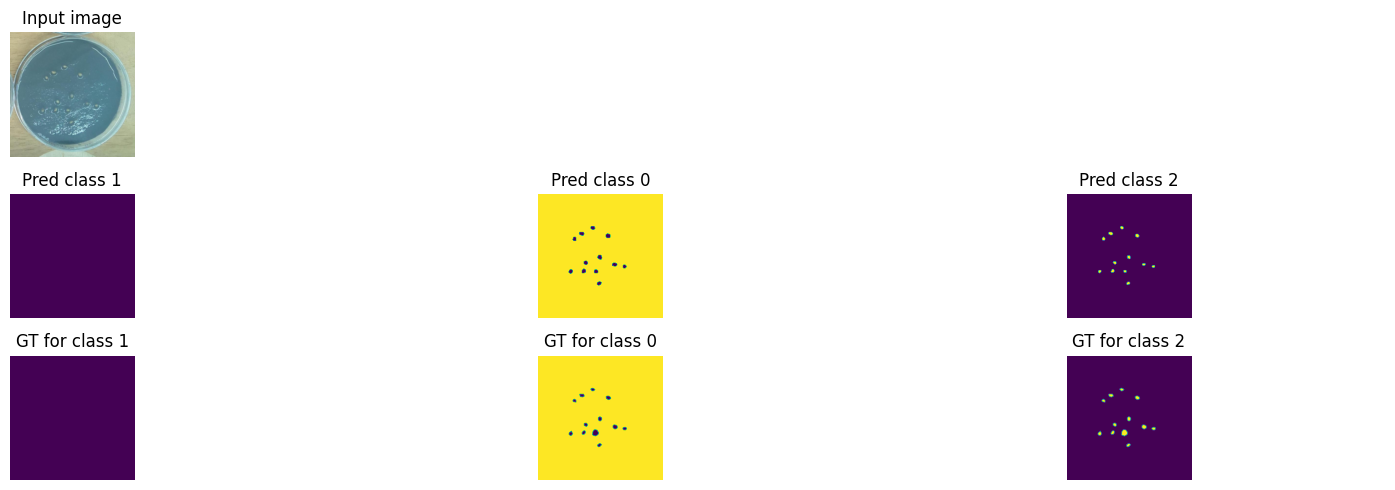

Train loss: 0.15929 | Time: 55m 55s | Val loss: 0.11555
Train_DICE_avg: 0.86392 | Train_Jaccard_avg: 0.80588 | Train_Sensitivity_avg: 0.92324 | Train_Specificity_avg: 0.95088 
Class 0 - Train_DICE: 0.99250 | Train_Jaccard: 0.98516 | Train_Sensitivity: 0.99493 | Train_Specificity: 0.86106 
Class 1 - Train_DICE: 0.72866 | Train_Jaccard: 0.65347 | Train_Sensitivity: 0.85422 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.87059 | Train_Jaccard: 0.77900 | Train_Sensitivity: 0.92056 | Train_Specificity: 0.99461 
Val_DICE_avg: 0.89107 | Val_Jaccard_avg: 0.84010 | Val_Sensitivity_avg: 0.94573 | Val_Specificity_avg: 0.94013 
Class 0 - Val_DICE: 0.99585 | Val_Jaccard: 0.99175 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.82820 
Class 1 - Val_DICE: 0.79685 | Val_Jaccard: 0.73275 | Val_Sensitivity: 0.89320 | Val_Specificity: 0.99717 
Class 2 - Val_DICE: 0.88050 | Val_Jaccard: 0.79579 | Val_Sensitivity: 0.94582 | Val_Specificity: 0.99501 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.15513 | Time: 56m 57s | Val loss: 0.11188
Train_DICE_avg: 0.86532 | Train_Jaccard_avg: 0.80700 | Train_Sensitivity_avg: 0.92226 | Train_Specificity_avg: 0.95013 
Class 0 - Train_DICE: 0.99240 | Train_Jaccard: 0.98496 | Train_Sensitivity: 0.99483 | Train_Specificity: 0.85873 
Class 1 - Train_DICE: 0.73241 | Train_Jaccard: 0.65621 | Train_Sensitivity: 0.84992 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.87115 | Train_Jaccard: 0.77985 | Train_Sensitivity: 0.92203 | Train_Specificity: 0.99458 
Val_DICE_avg: 0.89429 | Val_Jaccard_avg: 0.84367 | Val_Sensitivity_avg: 0.94442 | Val_Specificity_avg: 0.93988 
Class 0 - Val_DICE: 0.99587 | Val_Jaccard: 0.99180 | Val_Sensitivity: 0.99818 | Val_Specificity: 0.82720 
Class 1 - Val_DICE: 0.80291 | Val_Jaccard: 0.73786 | Val_Sensitivity: 0.89049 | Val_Specificity: 0.99730 
Class 2 - Val_DICE: 0.88409 | Val_Jaccard: 0.80134 | Val_Sensitivity: 0.94458 | Val_Specificity: 0.99515 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.15908 | Time: 57m 59s | Val loss: 0.11146
Train_DICE_avg: 0.86648 | Train_Jaccard_avg: 0.80869 | Train_Sensitivity_avg: 0.92709 | Train_Specificity_avg: 0.95117 
Class 0 - Train_DICE: 0.99249 | Train_Jaccard: 0.98514 | Train_Sensitivity: 0.99481 | Train_Specificity: 0.86184 
Class 1 - Train_DICE: 0.73366 | Train_Jaccard: 0.65815 | Train_Sensitivity: 0.86483 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.87330 | Train_Jaccard: 0.78277 | Train_Sensitivity: 0.92162 | Train_Specificity: 0.99471 
Val_DICE_avg: 0.89485 | Val_Jaccard_avg: 0.84401 | Val_Sensitivity_avg: 0.94559 | Val_Specificity_avg: 0.93895 
Class 0 - Val_DICE: 0.99579 | Val_Jaccard: 0.99164 | Val_Sensitivity: 0.99816 | Val_Specificity: 0.82443 
Class 1 - Val_DICE: 0.80448 | Val_Jaccard: 0.73874 | Val_Sensitivity: 0.89354 | Val_Specificity: 0.99727 
Class 2 - Val_DICE: 0.88427 | Val_Jaccard: 0.80164 | Val_Sensitivity: 0.94506 | Val_Specificity: 0.99516 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.15659 | Time: 59m 0s | Val loss: 0.11270
Train_DICE_avg: 0.86957 | Train_Jaccard_avg: 0.81208 | Train_Sensitivity_avg: 0.92785 | Train_Specificity_avg: 0.94852 
Class 0 - Train_DICE: 0.99243 | Train_Jaccard: 0.98502 | Train_Sensitivity: 0.99508 | Train_Specificity: 0.85376 
Class 1 - Train_DICE: 0.74236 | Train_Jaccard: 0.66736 | Train_Sensitivity: 0.86772 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.87393 | Train_Jaccard: 0.78384 | Train_Sensitivity: 0.92074 | Train_Specificity: 0.99473 
Val_DICE_avg: 0.89507 | Val_Jaccard_avg: 0.84494 | Val_Sensitivity_avg: 0.94902 | Val_Specificity_avg: 0.93713 
Class 0 - Val_DICE: 0.99567 | Val_Jaccard: 0.99141 | Val_Sensitivity: 0.99826 | Val_Specificity: 0.81885 
Class 1 - Val_DICE: 0.80470 | Val_Jaccard: 0.74082 | Val_Sensitivity: 0.90841 | Val_Specificity: 0.99716 
Class 2 - Val_DICE: 0.88484 | Val_Jaccard: 0.80259 | Val_Sensitivity: 0.94038 | Val_Specificity: 0.99538 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.15661 | Time: 60m 2s | Val loss: 0.11236
Train_DICE_avg: 0.86575 | Train_Jaccard_avg: 0.80817 | Train_Sensitivity_avg: 0.92840 | Train_Specificity_avg: 0.95028 
Class 0 - Train_DICE: 0.99244 | Train_Jaccard: 0.98505 | Train_Sensitivity: 0.99481 | Train_Specificity: 0.85915 
Class 1 - Train_DICE: 0.73259 | Train_Jaccard: 0.65823 | Train_Sensitivity: 0.86880 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.87221 | Train_Jaccard: 0.78122 | Train_Sensitivity: 0.92158 | Train_Specificity: 0.99467 
Val_DICE_avg: 0.89318 | Val_Jaccard_avg: 0.84237 | Val_Sensitivity_avg: 0.94680 | Val_Specificity_avg: 0.94048 
Class 0 - Val_DICE: 0.99586 | Val_Jaccard: 0.99178 | Val_Sensitivity: 0.99820 | Val_Specificity: 0.82911 
Class 1 - Val_DICE: 0.80464 | Val_Jaccard: 0.74154 | Val_Sensitivity: 0.89154 | Val_Specificity: 0.99738 
Class 2 - Val_DICE: 0.87903 | Val_Jaccard: 0.79381 | Val_Sensitivity: 0.95067 | Val_Specificity: 0.99495 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


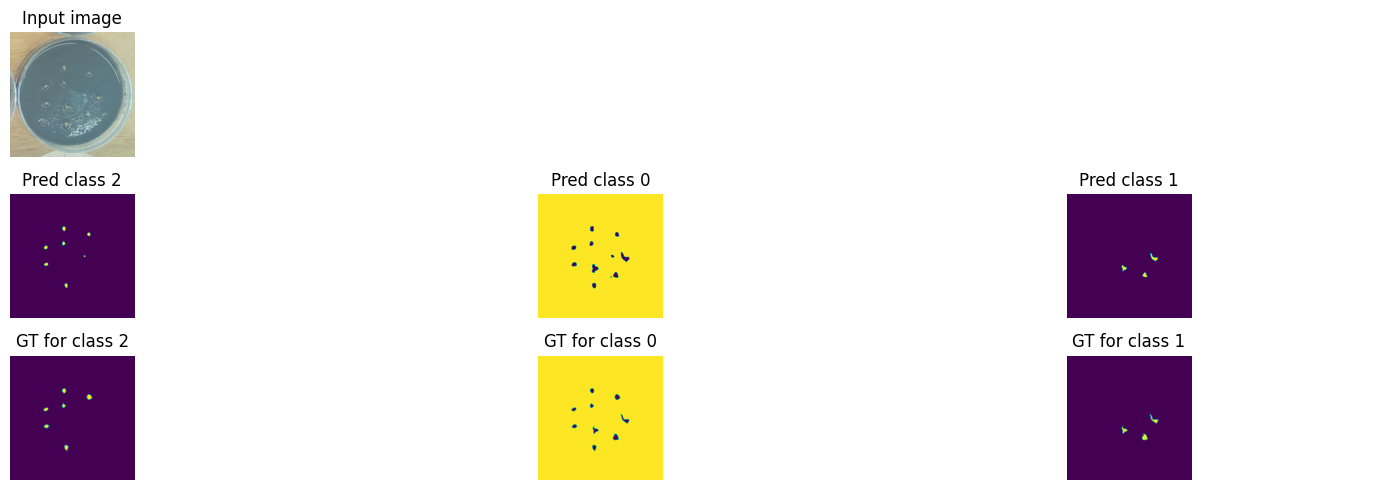

Train loss: 0.15752 | Time: 61m 5s | Val loss: 0.11341
Train_DICE_avg: 0.86798 | Train_Jaccard_avg: 0.81033 | Train_Sensitivity_avg: 0.92892 | Train_Specificity_avg: 0.95033 
Class 0 - Train_DICE: 0.99249 | Train_Jaccard: 0.98515 | Train_Sensitivity: 0.99490 | Train_Specificity: 0.85928 
Class 1 - Train_DICE: 0.73887 | Train_Jaccard: 0.66389 | Train_Sensitivity: 0.87003 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.87258 | Train_Jaccard: 0.78195 | Train_Sensitivity: 0.92182 | Train_Specificity: 0.99469 
Val_DICE_avg: 0.89224 | Val_Jaccard_avg: 0.84198 | Val_Sensitivity_avg: 0.94423 | Val_Specificity_avg: 0.93789 
Class 0 - Val_DICE: 0.99578 | Val_Jaccard: 0.99161 | Val_Sensitivity: 0.99821 | Val_Specificity: 0.82125 
Class 1 - Val_DICE: 0.79776 | Val_Jaccard: 0.73394 | Val_Sensitivity: 0.88992 | Val_Specificity: 0.99731 
Class 2 - Val_DICE: 0.88319 | Val_Jaccard: 0.80040 | Val_Sensitivity: 0.94456 | Val_Specificity: 0.99510 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▂▂▂▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██████████████
wandb:       Training Jaccard ▁▁▂▂▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇███████████████
wandb:          Training Loss ███▇▇▇▆▆▆▆▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▁▁▁▂▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇████████████
wandb:   Training Specificity ▁▄▄▅▅▆▆▇▇▇▇▇████████████████████████████
wandb:        Validation DICE ▁▁▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇█▇█████████████
wandb:     Validation Jaccard ▁▁▁▂▂▃▃▃▃▄▄▄▅▅▅▆▅▆▆▇▇▇▇▇▇▇█▇████████████
wandb:        Validation Loss █▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▁▁▁▂▂▃▃▃▄▅▅▆▅▆▆▆▇▇▇▇▇▇▇▇▇██████████████
wandb: Validation Specificity ▁▁▂▂▃▄▅▃▅▆▅▅▇▆▇▇▇▇▇█▇▇▇▆▇▇▇▇▇▇▇▇▆▇▆▇▇▆▆▆
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.86798
wandb:       Training Jaccard 0.81033
wandb:          Training Loss 0.15


Training complete!


In [25]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [26]:
model = UNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [27]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]



Global Performance Metrics:
Loss mean: 0.12125, std: 0.01450
Dice Coefficient mean: 0.87056, std: 0.11006
Jaccard Index mean: 0.81243, std: 0.12663
Sensitivity mean: 0.86403, std: 0.10547
Specificity mean: 0.97595, std: 0.02065

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99511, std: 0.00231
Jaccard mean: 0.99027, std: 0.00456
Sensitivity mean: 0.99271, std: 0.00315
Specificity mean: 0.93169, std: 0.06167

Class 1:
Dice mean: 0.75290, std: 0.29873
Jaccard mean: 0.67902, std: 0.31916
Sensitivity mean: 0.75434, std: 0.28867
Specificity mean: 0.99876, std: 0.00239

Class 2:
Dice mean: 0.86368, std: 0.07957
Jaccard mean: 0.76801, std: 0.11183
Sensitivity mean: 0.84504, std: 0.09991
Specificity mean: 0.99739, std: 0.00220


## MobileNetV3 backbone

### DICE Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "DICE"
config["Backbone"] = "mobilenetv3"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-UNet-MobileNetV3-DICE"]

Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.46 GB
GPU Memory - Reserved: 1.86 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


100%|██████████| 21.1M/21.1M [00:00<00:00, 160MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_203315-ca4t7g5t
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-UNet-MobileNetV3-DICE
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/ca4t7g5t



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


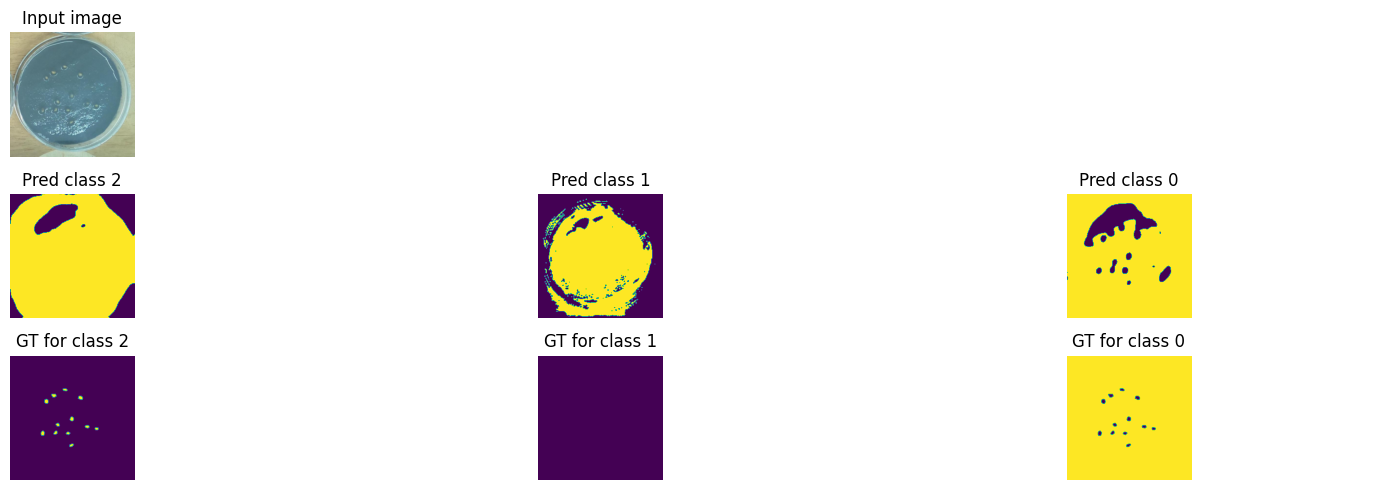

Train loss: 0.70839 | Time: 0m 59s | Val loss: 0.68269
Train_DICE_avg: 0.36999 | Train_Jaccard_avg: 0.30877 | Train_Sensitivity_avg: 0.39656 | Train_Specificity_avg: 0.76263 
Class 0 - Train_DICE: 0.81652 | Train_Jaccard: 0.73185 | Train_Sensitivity: 0.99424 | Train_Specificity: 0.29014 
Class 1 - Train_DICE: 0.04535 | Train_Jaccard: 0.02525 | Train_Sensitivity: 0.02560 | Train_Specificity: 0.99853 
Class 2 - Train_DICE: 0.24809 | Train_Jaccard: 0.16922 | Train_Sensitivity: 0.16983 | Train_Specificity: 0.99922 
Val_DICE_avg: 0.42380 | Val_Jaccard_avg: 0.38528 | Val_Sensitivity_avg: 0.41614 | Val_Specificity_avg: 0.78173 
Class 0 - Val_DICE: 0.95250 | Val_Jaccard: 0.91122 | Val_Sensitivity: 0.99417 | Val_Specificity: 0.34849 
Class 1 - Val_DICE: 0.06286 | Val_Jaccard: 0.03843 | Val_Sensitivity: 0.04025 | Val_Specificity: 0.99849 
Class 2 - Val_DICE: 0.25606 | Val_Jaccard: 0.20621 | Val_Sensitivity: 0.21400 | Val_Specificity: 0.99821 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.66005 | Time: 1m 58s | Val loss: 0.64865
Train_DICE_avg: 0.45361 | Train_Jaccard_avg: 0.41095 | Train_Sensitivity_avg: 0.43065 | Train_Specificity_avg: 0.84407 
Class 0 - Train_DICE: 0.96852 | Train_Jaccard: 0.93939 | Train_Sensitivity: 0.99432 | Train_Specificity: 0.53350 
Class 1 - Train_DICE: 0.07491 | Train_Jaccard: 0.04362 | Train_Sensitivity: 0.04452 | Train_Specificity: 0.99927 
Class 2 - Train_DICE: 0.31740 | Train_Jaccard: 0.24985 | Train_Sensitivity: 0.25312 | Train_Specificity: 0.99943 
Val_DICE_avg: 0.47100 | Val_Jaccard_avg: 0.43333 | Val_Sensitivity_avg: 0.44716 | Val_Specificity_avg: 0.84432 
Class 0 - Val_DICE: 0.98233 | Val_Jaccard: 0.96547 | Val_Sensitivity: 0.99573 | Val_Specificity: 0.53547 
Class 1 - Val_DICE: 0.10219 | Val_Jaccard: 0.06292 | Val_Sensitivity: 0.06661 | Val_Specificity: 0.99856 
Class 2 - Val_DICE: 0.32847 | Val_Jaccard: 0.27159 | Val_Sensitivity: 0.27913 | Val_Specificity: 0.99894 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.63955 | Time: 2m 57s | Val loss: 0.63528
Train_DICE_avg: 0.47351 | Train_Jaccard_avg: 0.43161 | Train_Sensitivity_avg: 0.44608 | Train_Specificity_avg: 0.87618 
Class 0 - Train_DICE: 0.97795 | Train_Jaccard: 0.95710 | Train_Sensitivity: 0.99436 | Train_Specificity: 0.62978 
Class 1 - Train_DICE: 0.09973 | Train_Jaccard: 0.05835 | Train_Sensitivity: 0.05918 | Train_Specificity: 0.99944 
Class 2 - Train_DICE: 0.34283 | Train_Jaccard: 0.27937 | Train_Sensitivity: 0.28469 | Train_Specificity: 0.99933 
Val_DICE_avg: 0.48251 | Val_Jaccard_avg: 0.44377 | Val_Sensitivity_avg: 0.45769 | Val_Specificity_avg: 0.89321 
Class 0 - Val_DICE: 0.99100 | Val_Jaccard: 0.98220 | Val_Sensitivity: 0.99624 | Val_Specificity: 0.68307 
Class 1 - Val_DICE: 0.12513 | Val_Jaccard: 0.07846 | Val_Sensitivity: 0.08089 | Val_Specificity: 0.99909 
Class 2 - Val_DICE: 0.33140 | Val_Jaccard: 0.27065 | Val_Sensitivity: 0.29593 | Val_Specificity: 0.99746 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.62127 | Time: 3m 56s | Val loss: 0.60795
Train_DICE_avg: 0.48899 | Train_Jaccard_avg: 0.44629 | Train_Sensitivity_avg: 0.45967 | Train_Specificity_avg: 0.89015 
Class 0 - Train_DICE: 0.98120 | Train_Jaccard: 0.96329 | Train_Sensitivity: 0.99455 | Train_Specificity: 0.67181 
Class 1 - Train_DICE: 0.11599 | Train_Jaccard: 0.06839 | Train_Sensitivity: 0.06903 | Train_Specificity: 0.99960 
Class 2 - Train_DICE: 0.36978 | Train_Jaccard: 0.30720 | Train_Sensitivity: 0.31543 | Train_Specificity: 0.99903 
Val_DICE_avg: 0.50665 | Val_Jaccard_avg: 0.46946 | Val_Sensitivity_avg: 0.47968 | Val_Specificity_avg: 0.90451 
Class 0 - Val_DICE: 0.99232 | Val_Jaccard: 0.98479 | Val_Sensitivity: 0.99667 | Val_Specificity: 0.71587 
Class 1 - Val_DICE: 0.13009 | Val_Jaccard: 0.08263 | Val_Sensitivity: 0.08506 | Val_Specificity: 0.99924 
Class 2 - Val_DICE: 0.39755 | Val_Jaccard: 0.34096 | Val_Sensitivity: 0.35730 | Val_Specificity: 0.99841 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.60392 | Time: 4m 55s | Val loss: 0.58609
Train_DICE_avg: 0.49890 | Train_Jaccard_avg: 0.45593 | Train_Sensitivity_avg: 0.46910 | Train_Specificity_avg: 0.89780 
Class 0 - Train_DICE: 0.98314 | Train_Jaccard: 0.96699 | Train_Sensitivity: 0.99464 | Train_Specificity: 0.69495 
Class 1 - Train_DICE: 0.12781 | Train_Jaccard: 0.07622 | Train_Sensitivity: 0.07703 | Train_Specificity: 0.99957 
Class 2 - Train_DICE: 0.38577 | Train_Jaccard: 0.32457 | Train_Sensitivity: 0.33564 | Train_Specificity: 0.99888 
Val_DICE_avg: 0.51754 | Val_Jaccard_avg: 0.48005 | Val_Sensitivity_avg: 0.49488 | Val_Specificity_avg: 0.90346 
Class 0 - Val_DICE: 0.99259 | Val_Jaccard: 0.98533 | Val_Sensitivity: 0.99741 | Val_Specificity: 0.71329 
Class 1 - Val_DICE: 0.13697 | Val_Jaccard: 0.08614 | Val_Sensitivity: 0.08730 | Val_Specificity: 0.99957 
Class 2 - Val_DICE: 0.42308 | Val_Jaccard: 0.36869 | Val_Sensitivity: 0.39993 | Val_Specificity: 0.99753 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


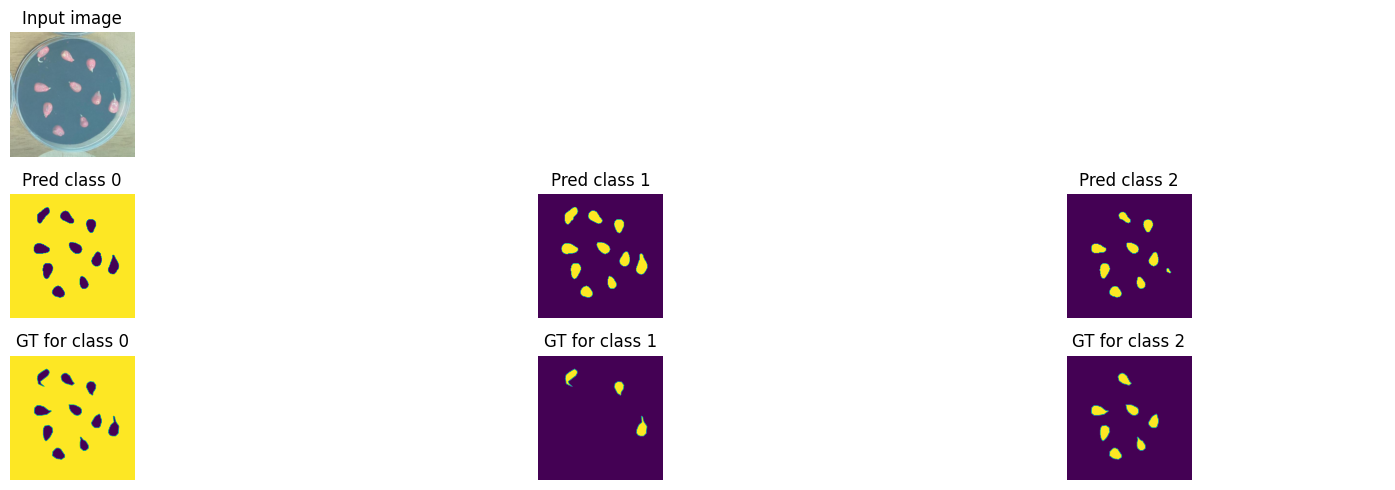

Train loss: 0.58621 | Time: 5m 54s | Val loss: 0.57143
Train_DICE_avg: 0.51071 | Train_Jaccard_avg: 0.46756 | Train_Sensitivity_avg: 0.48044 | Train_Specificity_avg: 0.90803 
Class 0 - Train_DICE: 0.98534 | Train_Jaccard: 0.97124 | Train_Sensitivity: 0.99436 | Train_Specificity: 0.72586 
Class 1 - Train_DICE: 0.13876 | Train_Jaccard: 0.08369 | Train_Sensitivity: 0.08467 | Train_Specificity: 0.99957 
Class 2 - Train_DICE: 0.40803 | Train_Jaccard: 0.34774 | Train_Sensitivity: 0.36229 | Train_Specificity: 0.99865 
Val_DICE_avg: 0.52350 | Val_Jaccard_avg: 0.48712 | Val_Sensitivity_avg: 0.49877 | Val_Specificity_avg: 0.91555 
Class 0 - Val_DICE: 0.99295 | Val_Jaccard: 0.98604 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.74866 
Class 1 - Val_DICE: 0.14237 | Val_Jaccard: 0.09009 | Val_Sensitivity: 0.09096 | Val_Specificity: 0.99964 
Class 2 - Val_DICE: 0.43519 | Val_Jaccard: 0.38524 | Val_Sensitivity: 0.40775 | Val_Specificity: 0.99835 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.56869 | Time: 6m 53s | Val loss: 0.55819
Train_DICE_avg: 0.51951 | Train_Jaccard_avg: 0.47603 | Train_Sensitivity_avg: 0.48903 | Train_Specificity_avg: 0.91682 
Class 0 - Train_DICE: 0.98681 | Train_Jaccard: 0.97407 | Train_Sensitivity: 0.99390 | Train_Specificity: 0.75251 
Class 1 - Train_DICE: 0.14937 | Train_Jaccard: 0.09169 | Train_Sensitivity: 0.09321 | Train_Specificity: 0.99948 
Class 2 - Train_DICE: 0.42233 | Train_Jaccard: 0.36233 | Train_Sensitivity: 0.37997 | Train_Specificity: 0.99846 
Val_DICE_avg: 0.52482 | Val_Jaccard_avg: 0.48826 | Val_Sensitivity_avg: 0.49647 | Val_Specificity_avg: 0.90802 
Class 0 - Val_DICE: 0.99235 | Val_Jaccard: 0.98485 | Val_Sensitivity: 0.99786 | Val_Specificity: 0.72537 
Class 1 - Val_DICE: 0.14055 | Val_Jaccard: 0.09072 | Val_Sensitivity: 0.09221 | Val_Specificity: 0.99950 
Class 2 - Val_DICE: 0.44155 | Val_Jaccard: 0.38919 | Val_Sensitivity: 0.39933 | Val_Specificity: 0.99920 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.55273 | Time: 7m 53s | Val loss: 0.54513
Train_DICE_avg: 0.53097 | Train_Jaccard_avg: 0.48578 | Train_Sensitivity_avg: 0.49892 | Train_Specificity_avg: 0.92279 
Class 0 - Train_DICE: 0.98764 | Train_Jaccard: 0.97567 | Train_Sensitivity: 0.99310 | Train_Specificity: 0.77065 
Class 1 - Train_DICE: 0.16397 | Train_Jaccard: 0.10243 | Train_Sensitivity: 0.10472 | Train_Specificity: 0.99938 
Class 2 - Train_DICE: 0.44131 | Train_Jaccard: 0.37924 | Train_Sensitivity: 0.39893 | Train_Specificity: 0.99835 
Val_DICE_avg: 0.53657 | Val_Jaccard_avg: 0.49884 | Val_Sensitivity_avg: 0.52117 | Val_Specificity_avg: 0.91790 
Class 0 - Val_DICE: 0.99399 | Val_Jaccard: 0.98808 | Val_Sensitivity: 0.99705 | Val_Specificity: 0.75825 
Class 1 - Val_DICE: 0.17804 | Val_Jaccard: 0.12362 | Val_Sensitivity: 0.13367 | Val_Specificity: 0.99865 
Class 2 - Val_DICE: 0.43769 | Val_Jaccard: 0.38481 | Val_Sensitivity: 0.43279 | Val_Specificity: 0.99680 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.53332 | Time: 8m 52s | Val loss: 0.52495
Train_DICE_avg: 0.55129 | Train_Jaccard_avg: 0.50385 | Train_Sensitivity_avg: 0.51931 | Train_Specificity_avg: 0.92817 
Class 0 - Train_DICE: 0.98837 | Train_Jaccard: 0.97709 | Train_Sensitivity: 0.99216 | Train_Specificity: 0.78731 
Class 1 - Train_DICE: 0.20478 | Train_Jaccard: 0.13616 | Train_Sensitivity: 0.14452 | Train_Specificity: 0.99899 
Class 2 - Train_DICE: 0.46071 | Train_Jaccard: 0.39830 | Train_Sensitivity: 0.42125 | Train_Specificity: 0.99822 
Val_DICE_avg: 0.54815 | Val_Jaccard_avg: 0.51010 | Val_Sensitivity_avg: 0.53084 | Val_Specificity_avg: 0.93400 
Class 0 - Val_DICE: 0.99483 | Val_Jaccard: 0.98974 | Val_Sensitivity: 0.99677 | Val_Specificity: 0.80983 
Class 1 - Val_DICE: 0.20161 | Val_Jaccard: 0.14067 | Val_Sensitivity: 0.15191 | Val_Specificity: 0.99874 
Class 2 - Val_DICE: 0.44802 | Val_Jaccard: 0.39990 | Val_Sensitivity: 0.44384 | Val_Specificity: 0.99343 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.51324 | Time: 9m 52s | Val loss: 0.51344
Train_DICE_avg: 0.56940 | Train_Jaccard_avg: 0.52048 | Train_Sensitivity_avg: 0.53909 | Train_Specificity_avg: 0.93245 
Class 0 - Train_DICE: 0.98895 | Train_Jaccard: 0.97821 | Train_Sensitivity: 0.99138 | Train_Specificity: 0.80055 
Class 1 - Train_DICE: 0.24151 | Train_Jaccard: 0.16903 | Train_Sensitivity: 0.18717 | Train_Specificity: 0.99869 
Class 2 - Train_DICE: 0.47773 | Train_Jaccard: 0.41419 | Train_Sensitivity: 0.43871 | Train_Specificity: 0.99813 
Val_DICE_avg: 0.56528 | Val_Jaccard_avg: 0.52528 | Val_Sensitivity_avg: 0.53831 | Val_Specificity_avg: 0.91813 
Class 0 - Val_DICE: 0.99348 | Val_Jaccard: 0.98707 | Val_Sensitivity: 0.99741 | Val_Specificity: 0.75647 
Class 1 - Val_DICE: 0.22180 | Val_Jaccard: 0.16511 | Val_Sensitivity: 0.18457 | Val_Specificity: 0.99859 
Class 2 - Val_DICE: 0.48055 | Val_Jaccard: 0.42366 | Val_Sensitivity: 0.43294 | Val_Specificity: 0.99932 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


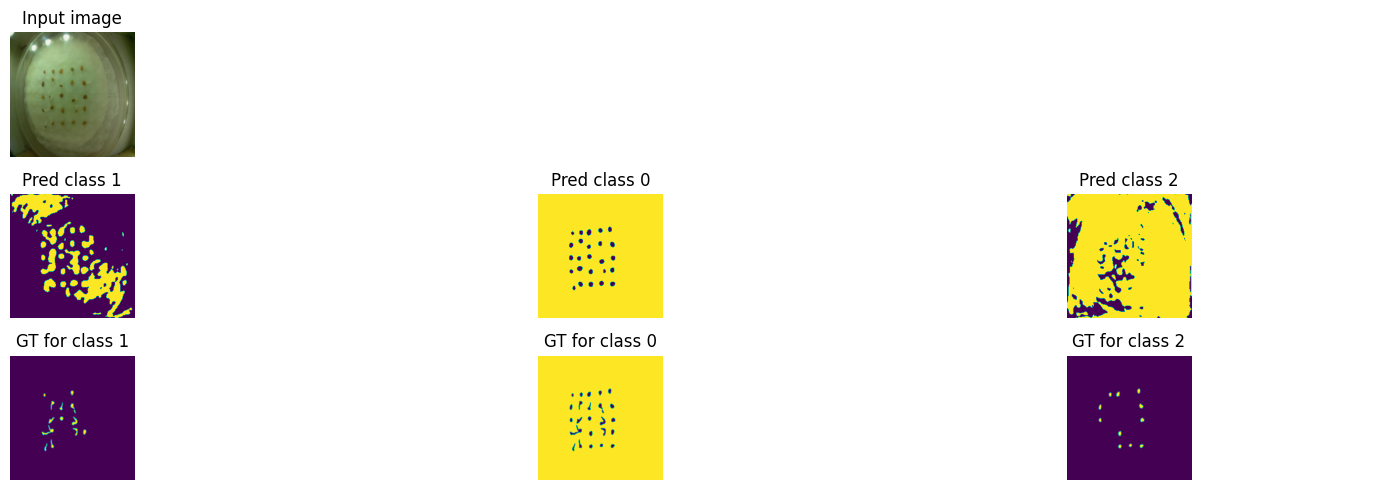

Train loss: 0.49294 | Time: 10m 53s | Val loss: 0.48978
Train_DICE_avg: 0.59396 | Train_Jaccard_avg: 0.54386 | Train_Sensitivity_avg: 0.56295 | Train_Specificity_avg: 0.93996 
Class 0 - Train_DICE: 0.98970 | Train_Jaccard: 0.97968 | Train_Sensitivity: 0.99051 | Train_Specificity: 0.82315 
Class 1 - Train_DICE: 0.26956 | Train_Jaccard: 0.19648 | Train_Sensitivity: 0.21698 | Train_Specificity: 0.99860 
Class 2 - Train_DICE: 0.52264 | Train_Jaccard: 0.45541 | Train_Sensitivity: 0.48134 | Train_Specificity: 0.99813 
Val_DICE_avg: 0.57896 | Val_Jaccard_avg: 0.54058 | Val_Sensitivity_avg: 0.56651 | Val_Specificity_avg: 0.92599 
Class 0 - Val_DICE: 0.99470 | Val_Jaccard: 0.98948 | Val_Sensitivity: 0.99646 | Val_Specificity: 0.78219 
Class 1 - Val_DICE: 0.24910 | Val_Jaccard: 0.18922 | Val_Sensitivity: 0.22763 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.49308 | Val_Jaccard: 0.44305 | Val_Sensitivity: 0.47543 | Val_Specificity: 0.99787 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.47447 | Time: 11m 54s | Val loss: 0.48273
Train_DICE_avg: 0.60668 | Train_Jaccard_avg: 0.55571 | Train_Sensitivity_avg: 0.57720 | Train_Specificity_avg: 0.94512 
Class 0 - Train_DICE: 0.98973 | Train_Jaccard: 0.97975 | Train_Sensitivity: 0.98932 | Train_Specificity: 0.83918 
Class 1 - Train_DICE: 0.28818 | Train_Jaccard: 0.21417 | Train_Sensitivity: 0.24020 | Train_Specificity: 0.99843 
Class 2 - Train_DICE: 0.54214 | Train_Jaccard: 0.47320 | Train_Sensitivity: 0.50208 | Train_Specificity: 0.99774 
Val_DICE_avg: 0.58370 | Val_Jaccard_avg: 0.54759 | Val_Sensitivity_avg: 0.57058 | Val_Specificity_avg: 0.93489 
Class 0 - Val_DICE: 0.99514 | Val_Jaccard: 0.99035 | Val_Sensitivity: 0.99632 | Val_Specificity: 0.80830 
Class 1 - Val_DICE: 0.25086 | Val_Jaccard: 0.19409 | Val_Sensitivity: 0.22024 | Val_Specificity: 0.99851 
Class 2 - Val_DICE: 0.50511 | Val_Jaccard: 0.45835 | Val_Sensitivity: 0.49520 | Val_Specificity: 0.99786 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.45897 | Time: 12m 55s | Val loss: 0.48116
Train_DICE_avg: 0.62767 | Train_Jaccard_avg: 0.57357 | Train_Sensitivity_avg: 0.59661 | Train_Specificity_avg: 0.94824 
Class 0 - Train_DICE: 0.98998 | Train_Jaccard: 0.98024 | Train_Sensitivity: 0.98858 | Train_Specificity: 0.84843 
Class 1 - Train_DICE: 0.29875 | Train_Jaccard: 0.22399 | Train_Sensitivity: 0.25465 | Train_Specificity: 0.99839 
Class 2 - Train_DICE: 0.59427 | Train_Jaccard: 0.51647 | Train_Sensitivity: 0.54661 | Train_Specificity: 0.99788 
Val_DICE_avg: 0.59291 | Val_Jaccard_avg: 0.55385 | Val_Sensitivity_avg: 0.56879 | Val_Specificity_avg: 0.93611 
Class 0 - Val_DICE: 0.99533 | Val_Jaccard: 0.99073 | Val_Sensitivity: 0.99714 | Val_Specificity: 0.81078 
Class 1 - Val_DICE: 0.24504 | Val_Jaccard: 0.19197 | Val_Sensitivity: 0.20893 | Val_Specificity: 0.99891 
Class 2 - Val_DICE: 0.53837 | Val_Jaccard: 0.47886 | Val_Sensitivity: 0.50028 | Val_Specificity: 0.99865 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.44079 | Time: 13m 56s | Val loss: 0.45375
Train_DICE_avg: 0.65122 | Train_Jaccard_avg: 0.59324 | Train_Sensitivity_avg: 0.61841 | Train_Specificity_avg: 0.95195 
Class 0 - Train_DICE: 0.98997 | Train_Jaccard: 0.98023 | Train_Sensitivity: 0.98801 | Train_Specificity: 0.85981 
Class 1 - Train_DICE: 0.31158 | Train_Jaccard: 0.23601 | Train_Sensitivity: 0.26947 | Train_Specificity: 0.99832 
Class 2 - Train_DICE: 0.65211 | Train_Jaccard: 0.56347 | Train_Sensitivity: 0.59773 | Train_Specificity: 0.99771 
Val_DICE_avg: 0.63790 | Val_Jaccard_avg: 0.58754 | Val_Sensitivity_avg: 0.60444 | Val_Specificity_avg: 0.94088 
Class 0 - Val_DICE: 0.99531 | Val_Jaccard: 0.99069 | Val_Sensitivity: 0.99693 | Val_Specificity: 0.82540 
Class 1 - Val_DICE: 0.27261 | Val_Jaccard: 0.21278 | Val_Sensitivity: 0.23639 | Val_Specificity: 0.99860 
Class 2 - Val_DICE: 0.64577 | Val_Jaccard: 0.55915 | Val_Sensitivity: 0.58001 | Val_Specificity: 0.99863 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.42260 | Time: 14m 58s | Val loss: 0.44711
Train_DICE_avg: 0.66624 | Train_Jaccard_avg: 0.60664 | Train_Sensitivity_avg: 0.63576 | Train_Specificity_avg: 0.95470 
Class 0 - Train_DICE: 0.98999 | Train_Jaccard: 0.98027 | Train_Sensitivity: 0.98731 | Train_Specificity: 0.86836 
Class 1 - Train_DICE: 0.32584 | Train_Jaccard: 0.24973 | Train_Sensitivity: 0.29110 | Train_Specificity: 0.99820 
Class 2 - Train_DICE: 0.68287 | Train_Jaccard: 0.58992 | Train_Sensitivity: 0.62887 | Train_Specificity: 0.99754 
Val_DICE_avg: 0.64133 | Val_Jaccard_avg: 0.59236 | Val_Sensitivity_avg: 0.62049 | Val_Specificity_avg: 0.93801 
Class 0 - Val_DICE: 0.99543 | Val_Jaccard: 0.99091 | Val_Sensitivity: 0.99636 | Val_Specificity: 0.81842 
Class 1 - Val_DICE: 0.26582 | Val_Jaccard: 0.20570 | Val_Sensitivity: 0.22667 | Val_Specificity: 0.99875 
Class 2 - Val_DICE: 0.66274 | Val_Jaccard: 0.58047 | Val_Sensitivity: 0.63845 | Val_Specificity: 0.99687 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


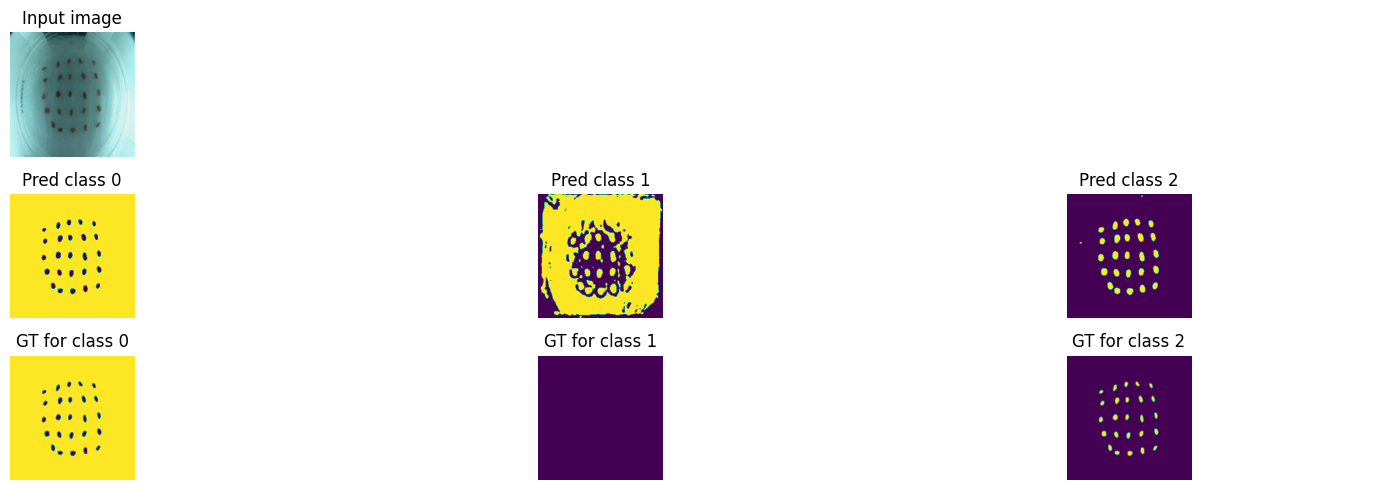

Train loss: 0.40985 | Time: 16m 0s | Val loss: 0.43892
Train_DICE_avg: 0.67808 | Train_Jaccard_avg: 0.61835 | Train_Sensitivity_avg: 0.64873 | Train_Specificity_avg: 0.95555 
Class 0 - Train_DICE: 0.99020 | Train_Jaccard: 0.98068 | Train_Sensitivity: 0.98756 | Train_Specificity: 0.87103 
Class 1 - Train_DICE: 0.33407 | Train_Jaccard: 0.25723 | Train_Sensitivity: 0.30086 | Train_Specificity: 0.99816 
Class 2 - Train_DICE: 0.70996 | Train_Jaccard: 0.61714 | Train_Sensitivity: 0.65778 | Train_Specificity: 0.99747 
Val_DICE_avg: 0.64786 | Val_Jaccard_avg: 0.59863 | Val_Sensitivity_avg: 0.62005 | Val_Specificity_avg: 0.94838 
Class 0 - Val_DICE: 0.99531 | Val_Jaccard: 0.99068 | Val_Sensitivity: 0.99642 | Val_Specificity: 0.84815 
Class 1 - Val_DICE: 0.28157 | Val_Jaccard: 0.22408 | Val_Sensitivity: 0.26508 | Val_Specificity: 0.99822 
Class 2 - Val_DICE: 0.66671 | Val_Jaccard: 0.58113 | Val_Sensitivity: 0.59866 | Val_Specificity: 0.99877 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.39300 | Time: 17m 1s | Val loss: 0.41363
Train_DICE_avg: 0.69312 | Train_Jaccard_avg: 0.63404 | Train_Sensitivity_avg: 0.66632 | Train_Specificity_avg: 0.95587 
Class 0 - Train_DICE: 0.99032 | Train_Jaccard: 0.98091 | Train_Sensitivity: 0.98751 | Train_Specificity: 0.87216 
Class 1 - Train_DICE: 0.34521 | Train_Jaccard: 0.26775 | Train_Sensitivity: 0.31496 | Train_Specificity: 0.99811 
Class 2 - Train_DICE: 0.74384 | Train_Jaccard: 0.65346 | Train_Sensitivity: 0.69650 | Train_Specificity: 0.99735 
Val_DICE_avg: 0.66328 | Val_Jaccard_avg: 0.61647 | Val_Sensitivity_avg: 0.63623 | Val_Specificity_avg: 0.93150 
Class 0 - Val_DICE: 0.99507 | Val_Jaccard: 0.99021 | Val_Sensitivity: 0.99708 | Val_Specificity: 0.79760 
Class 1 - Val_DICE: 0.29057 | Val_Jaccard: 0.23125 | Val_Sensitivity: 0.25852 | Val_Specificity: 0.99852 
Class 2 - Val_DICE: 0.70421 | Val_Jaccard: 0.62795 | Val_Sensitivity: 0.65309 | Val_Specificity: 0.99837 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.37611 | Time: 18m 2s | Val loss: 0.38512
Train_DICE_avg: 0.70018 | Train_Jaccard_avg: 0.64196 | Train_Sensitivity_avg: 0.67664 | Train_Specificity_avg: 0.95869 
Class 0 - Train_DICE: 0.99047 | Train_Jaccard: 0.98121 | Train_Sensitivity: 0.98715 | Train_Specificity: 0.88073 
Class 1 - Train_DICE: 0.35146 | Train_Jaccard: 0.27401 | Train_Sensitivity: 0.32465 | Train_Specificity: 0.99809 
Class 2 - Train_DICE: 0.75860 | Train_Jaccard: 0.67065 | Train_Sensitivity: 0.71811 | Train_Specificity: 0.99724 
Val_DICE_avg: 0.68958 | Val_Jaccard_avg: 0.64304 | Val_Sensitivity_avg: 0.67038 | Val_Specificity_avg: 0.94369 
Class 0 - Val_DICE: 0.99567 | Val_Jaccard: 0.99140 | Val_Sensitivity: 0.99637 | Val_Specificity: 0.83492 
Class 1 - Val_DICE: 0.30564 | Val_Jaccard: 0.24504 | Val_Sensitivity: 0.28558 | Val_Specificity: 0.99818 
Class 2 - Val_DICE: 0.76743 | Val_Jaccard: 0.69269 | Val_Sensitivity: 0.72920 | Val_Specificity: 0.99798 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.36277 | Time: 19m 4s | Val loss: 0.38096
Train_DICE_avg: 0.70932 | Train_Jaccard_avg: 0.65081 | Train_Sensitivity_avg: 0.68694 | Train_Specificity_avg: 0.96060 
Class 0 - Train_DICE: 0.99047 | Train_Jaccard: 0.98122 | Train_Sensitivity: 0.98699 | Train_Specificity: 0.88660 
Class 1 - Train_DICE: 0.36166 | Train_Jaccard: 0.28253 | Train_Sensitivity: 0.33667 | Train_Specificity: 0.99802 
Class 2 - Train_DICE: 0.77584 | Train_Jaccard: 0.68867 | Train_Sensitivity: 0.73715 | Train_Specificity: 0.99717 
Val_DICE_avg: 0.69295 | Val_Jaccard_avg: 0.64716 | Val_Sensitivity_avg: 0.67223 | Val_Specificity_avg: 0.94244 
Class 0 - Val_DICE: 0.99586 | Val_Jaccard: 0.99178 | Val_Sensitivity: 0.99704 | Val_Specificity: 0.83108 
Class 1 - Val_DICE: 0.31440 | Val_Jaccard: 0.24912 | Val_Sensitivity: 0.27754 | Val_Specificity: 0.99856 
Class 2 - Val_DICE: 0.76859 | Val_Jaccard: 0.70059 | Val_Sensitivity: 0.74212 | Val_Specificity: 0.99768 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.35104 | Time: 20m 5s | Val loss: 0.36725
Train_DICE_avg: 0.71439 | Train_Jaccard_avg: 0.65559 | Train_Sensitivity_avg: 0.69402 | Train_Specificity_avg: 0.96175 
Class 0 - Train_DICE: 0.99044 | Train_Jaccard: 0.98114 | Train_Sensitivity: 0.98681 | Train_Specificity: 0.89028 
Class 1 - Train_DICE: 0.36774 | Train_Jaccard: 0.28715 | Train_Sensitivity: 0.34432 | Train_Specificity: 0.99798 
Class 2 - Train_DICE: 0.78501 | Train_Jaccard: 0.69848 | Train_Sensitivity: 0.75094 | Train_Specificity: 0.99699 
Val_DICE_avg: 0.71949 | Val_Jaccard_avg: 0.66701 | Val_Sensitivity_avg: 0.69637 | Val_Specificity_avg: 0.95402 
Class 0 - Val_DICE: 0.99622 | Val_Jaccard: 0.99250 | Val_Sensitivity: 0.99693 | Val_Specificity: 0.86603 
Class 1 - Val_DICE: 0.33728 | Val_Jaccard: 0.26753 | Val_Sensitivity: 0.30410 | Val_Specificity: 0.99859 
Class 2 - Val_DICE: 0.82498 | Val_Jaccard: 0.74102 | Val_Sensitivity: 0.78808 | Val_Specificity: 0.99745 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


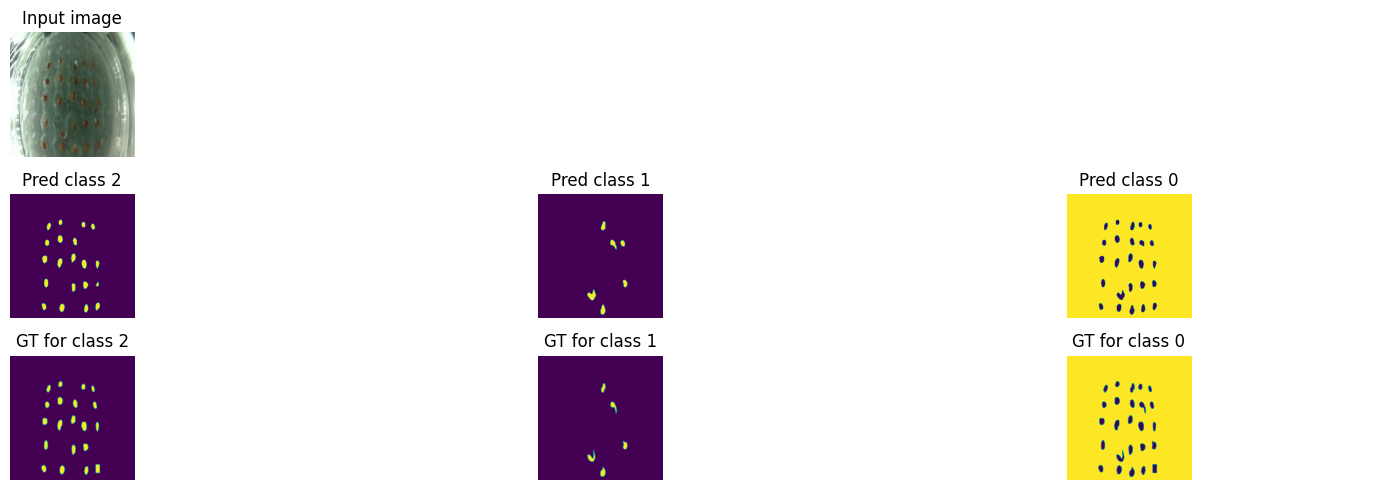

Train loss: 0.34067 | Time: 21m 7s | Val loss: 0.35056
Train_DICE_avg: 0.72478 | Train_Jaccard_avg: 0.66442 | Train_Sensitivity_avg: 0.70565 | Train_Specificity_avg: 0.96432 
Class 0 - Train_DICE: 0.99069 | Train_Jaccard: 0.98164 | Train_Sensitivity: 0.98679 | Train_Specificity: 0.89802 
Class 1 - Train_DICE: 0.37914 | Train_Jaccard: 0.29763 | Train_Sensitivity: 0.36274 | Train_Specificity: 0.99795 
Class 2 - Train_DICE: 0.80449 | Train_Jaccard: 0.71398 | Train_Sensitivity: 0.76742 | Train_Specificity: 0.99700 
Val_DICE_avg: 0.72675 | Val_Jaccard_avg: 0.67435 | Val_Sensitivity_avg: 0.70915 | Val_Specificity_avg: 0.95719 
Class 0 - Val_DICE: 0.99634 | Val_Jaccard: 0.99272 | Val_Sensitivity: 0.99625 | Val_Specificity: 0.87635 
Class 1 - Val_DICE: 0.33544 | Val_Jaccard: 0.26917 | Val_Sensitivity: 0.30113 | Val_Specificity: 0.99854 
Class 2 - Val_DICE: 0.84847 | Val_Jaccard: 0.76118 | Val_Sensitivity: 0.83006 | Val_Specificity: 0.99669 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.32705 | Time: 22m 9s | Val loss: 0.33465
Train_DICE_avg: 0.73808 | Train_Jaccard_avg: 0.67616 | Train_Sensitivity_avg: 0.71875 | Train_Specificity_avg: 0.96612 
Class 0 - Train_DICE: 0.99088 | Train_Jaccard: 0.98202 | Train_Sensitivity: 0.98710 | Train_Specificity: 0.90352 
Class 1 - Train_DICE: 0.38910 | Train_Jaccard: 0.30724 | Train_Sensitivity: 0.37314 | Train_Specificity: 0.99790 
Class 2 - Train_DICE: 0.83424 | Train_Jaccard: 0.73924 | Train_Sensitivity: 0.79602 | Train_Specificity: 0.99695 
Val_DICE_avg: 0.73400 | Val_Jaccard_avg: 0.68170 | Val_Sensitivity_avg: 0.71402 | Val_Specificity_avg: 0.95290 
Class 0 - Val_DICE: 0.99622 | Val_Jaccard: 0.99249 | Val_Sensitivity: 0.99639 | Val_Specificity: 0.86302 
Class 1 - Val_DICE: 0.34630 | Val_Jaccard: 0.27976 | Val_Sensitivity: 0.31230 | Val_Specificity: 0.99861 
Class 2 - Val_DICE: 0.85948 | Val_Jaccard: 0.77284 | Val_Sensitivity: 0.83335 | Val_Specificity: 0.99708 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.31349 | Time: 23m 11s | Val loss: 0.31995
Train_DICE_avg: 0.74678 | Train_Jaccard_avg: 0.68441 | Train_Sensitivity_avg: 0.72937 | Train_Specificity_avg: 0.96596 
Class 0 - Train_DICE: 0.99070 | Train_Jaccard: 0.98166 | Train_Sensitivity: 0.98690 | Train_Specificity: 0.90314 
Class 1 - Train_DICE: 0.39516 | Train_Jaccard: 0.31309 | Train_Sensitivity: 0.37922 | Train_Specificity: 0.99795 
Class 2 - Train_DICE: 0.85447 | Train_Jaccard: 0.75848 | Train_Sensitivity: 0.82199 | Train_Specificity: 0.99680 
Val_DICE_avg: 0.74239 | Val_Jaccard_avg: 0.68958 | Val_Sensitivity_avg: 0.72200 | Val_Specificity_avg: 0.95461 
Class 0 - Val_DICE: 0.99617 | Val_Jaccard: 0.99239 | Val_Sensitivity: 0.99680 | Val_Specificity: 0.86772 
Class 1 - Val_DICE: 0.35466 | Val_Jaccard: 0.28515 | Val_Sensitivity: 0.32070 | Val_Specificity: 0.99846 
Class 2 - Val_DICE: 0.87635 | Val_Jaccard: 0.79119 | Val_Sensitivity: 0.84849 | Val_Specificity: 0.99763 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.30127 | Time: 24m 12s | Val loss: 0.30530
Train_DICE_avg: 0.75051 | Train_Jaccard_avg: 0.68876 | Train_Sensitivity_avg: 0.73703 | Train_Specificity_avg: 0.96466 
Class 0 - Train_DICE: 0.99078 | Train_Jaccard: 0.98181 | Train_Sensitivity: 0.98726 | Train_Specificity: 0.89934 
Class 1 - Train_DICE: 0.39869 | Train_Jaccard: 0.31694 | Train_Sensitivity: 0.38801 | Train_Specificity: 0.99787 
Class 2 - Train_DICE: 0.86207 | Train_Jaccard: 0.76752 | Train_Sensitivity: 0.83582 | Train_Specificity: 0.99677 
Val_DICE_avg: 0.74845 | Val_Jaccard_avg: 0.69803 | Val_Sensitivity_avg: 0.73998 | Val_Specificity_avg: 0.95892 
Class 0 - Val_DICE: 0.99641 | Val_Jaccard: 0.99287 | Val_Sensitivity: 0.99662 | Val_Specificity: 0.88105 
Class 1 - Val_DICE: 0.36649 | Val_Jaccard: 0.29992 | Val_Sensitivity: 0.34859 | Val_Specificity: 0.99819 
Class 2 - Val_DICE: 0.88244 | Val_Jaccard: 0.80129 | Val_Sensitivity: 0.87472 | Val_Specificity: 0.99751 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.29104 | Time: 25m 14s | Val loss: 0.29652
Train_DICE_avg: 0.75310 | Train_Jaccard_avg: 0.69158 | Train_Sensitivity_avg: 0.74250 | Train_Specificity_avg: 0.96769 
Class 0 - Train_DICE: 0.99069 | Train_Jaccard: 0.98165 | Train_Sensitivity: 0.98665 | Train_Specificity: 0.90861 
Class 1 - Train_DICE: 0.40415 | Train_Jaccard: 0.32204 | Train_Sensitivity: 0.39531 | Train_Specificity: 0.99785 
Class 2 - Train_DICE: 0.86444 | Train_Jaccard: 0.77106 | Train_Sensitivity: 0.84553 | Train_Specificity: 0.99660 
Val_DICE_avg: 0.75136 | Val_Jaccard_avg: 0.70061 | Val_Sensitivity_avg: 0.74236 | Val_Specificity_avg: 0.96165 
Class 0 - Val_DICE: 0.99652 | Val_Jaccard: 0.99308 | Val_Sensitivity: 0.99675 | Val_Specificity: 0.88924 
Class 1 - Val_DICE: 0.37405 | Val_Jaccard: 0.30656 | Val_Sensitivity: 0.36626 | Val_Specificity: 0.99823 
Class 2 - Val_DICE: 0.88350 | Val_Jaccard: 0.80219 | Val_Sensitivity: 0.86406 | Val_Specificity: 0.99748 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


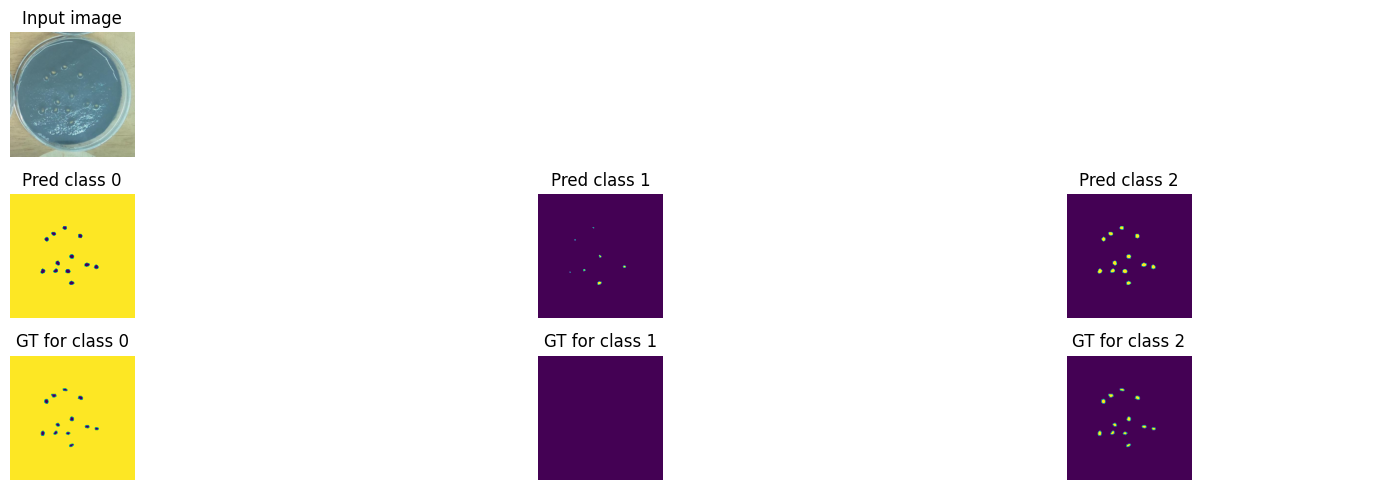

Train loss: 0.28250 | Time: 26m 17s | Val loss: 0.28744
Train_DICE_avg: 0.75510 | Train_Jaccard_avg: 0.69365 | Train_Sensitivity_avg: 0.74503 | Train_Specificity_avg: 0.96957 
Class 0 - Train_DICE: 0.99066 | Train_Jaccard: 0.98159 | Train_Sensitivity: 0.98627 | Train_Specificity: 0.91438 
Class 1 - Train_DICE: 0.40873 | Train_Jaccard: 0.32640 | Train_Sensitivity: 0.39797 | Train_Specificity: 0.99791 
Class 2 - Train_DICE: 0.86591 | Train_Jaccard: 0.77297 | Train_Sensitivity: 0.85086 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.75216 | Val_Jaccard_avg: 0.70058 | Val_Sensitivity_avg: 0.74647 | Val_Specificity_avg: 0.95922 
Class 0 - Val_DICE: 0.99638 | Val_Jaccard: 0.99281 | Val_Sensitivity: 0.99635 | Val_Specificity: 0.88224 
Class 1 - Val_DICE: 0.37852 | Val_Jaccard: 0.31003 | Val_Sensitivity: 0.37733 | Val_Specificity: 0.99814 
Class 2 - Val_DICE: 0.88156 | Val_Jaccard: 0.79892 | Val_Sensitivity: 0.86574 | Val_Specificity: 0.99728 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.27686 | Time: 27m 19s | Val loss: 0.28522
Train_DICE_avg: 0.75661 | Train_Jaccard_avg: 0.69529 | Train_Sensitivity_avg: 0.74891 | Train_Specificity_avg: 0.96952 
Class 0 - Train_DICE: 0.99101 | Train_Jaccard: 0.98226 | Train_Sensitivity: 0.98695 | Train_Specificity: 0.91419 
Class 1 - Train_DICE: 0.41112 | Train_Jaccard: 0.32851 | Train_Sensitivity: 0.40443 | Train_Specificity: 0.99787 
Class 2 - Train_DICE: 0.86771 | Train_Jaccard: 0.77511 | Train_Sensitivity: 0.85536 | Train_Specificity: 0.99649 
Val_DICE_avg: 0.74853 | Val_Jaccard_avg: 0.69633 | Val_Sensitivity_avg: 0.72723 | Val_Specificity_avg: 0.94667 
Class 0 - Val_DICE: 0.99585 | Val_Jaccard: 0.99176 | Val_Sensitivity: 0.99774 | Val_Specificity: 0.84347 
Class 1 - Val_DICE: 0.36845 | Val_Jaccard: 0.29943 | Val_Sensitivity: 0.33257 | Val_Specificity: 0.99869 
Class 2 - Val_DICE: 0.88128 | Val_Jaccard: 0.79780 | Val_Sensitivity: 0.85137 | Val_Specificity: 0.99785 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.27037 | Time: 28m 21s | Val loss: 0.27744
Train_DICE_avg: 0.76106 | Train_Jaccard_avg: 0.70015 | Train_Sensitivity_avg: 0.75385 | Train_Specificity_avg: 0.96781 
Class 0 - Train_DICE: 0.99118 | Train_Jaccard: 0.98260 | Train_Sensitivity: 0.98768 | Train_Specificity: 0.90893 
Class 1 - Train_DICE: 0.42148 | Train_Jaccard: 0.33852 | Train_Sensitivity: 0.41793 | Train_Specificity: 0.99785 
Class 2 - Train_DICE: 0.87052 | Train_Jaccard: 0.77932 | Train_Sensitivity: 0.85592 | Train_Specificity: 0.99664 
Val_DICE_avg: 0.76332 | Val_Jaccard_avg: 0.71347 | Val_Sensitivity_avg: 0.76450 | Val_Specificity_avg: 0.96601 
Class 0 - Val_DICE: 0.99654 | Val_Jaccard: 0.99312 | Val_Sensitivity: 0.99638 | Val_Specificity: 0.90288 
Class 1 - Val_DICE: 0.40284 | Val_Jaccard: 0.33459 | Val_Sensitivity: 0.40351 | Val_Specificity: 0.99799 
Class 2 - Val_DICE: 0.89056 | Val_Jaccard: 0.81268 | Val_Sensitivity: 0.89360 | Val_Specificity: 0.99715 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.26628 | Time: 29m 24s | Val loss: 0.27631
Train_DICE_avg: 0.76417 | Train_Jaccard_avg: 0.70363 | Train_Sensitivity_avg: 0.75927 | Train_Specificity_avg: 0.96760 
Class 0 - Train_DICE: 0.99131 | Train_Jaccard: 0.98286 | Train_Sensitivity: 0.98797 | Train_Specificity: 0.90837 
Class 1 - Train_DICE: 0.42827 | Train_Jaccard: 0.34522 | Train_Sensitivity: 0.42918 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.87294 | Train_Jaccard: 0.78282 | Train_Sensitivity: 0.86067 | Train_Specificity: 0.99661 
Val_DICE_avg: 0.75571 | Val_Jaccard_avg: 0.70543 | Val_Sensitivity_avg: 0.74425 | Val_Specificity_avg: 0.95384 
Class 0 - Val_DICE: 0.99640 | Val_Jaccard: 0.99284 | Val_Sensitivity: 0.99736 | Val_Specificity: 0.86560 
Class 1 - Val_DICE: 0.38078 | Val_Jaccard: 0.31187 | Val_Sensitivity: 0.35689 | Val_Specificity: 0.99854 
Class 2 - Val_DICE: 0.88995 | Val_Jaccard: 0.81159 | Val_Sensitivity: 0.87848 | Val_Specificity: 0.99739 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.26318 | Time: 30m 26s | Val loss: 0.27197
Train_DICE_avg: 0.76459 | Train_Jaccard_avg: 0.70441 | Train_Sensitivity_avg: 0.76030 | Train_Specificity_avg: 0.96872 
Class 0 - Train_DICE: 0.99137 | Train_Jaccard: 0.98297 | Train_Sensitivity: 0.98793 | Train_Specificity: 0.91178 
Class 1 - Train_DICE: 0.42968 | Train_Jaccard: 0.34769 | Train_Sensitivity: 0.43010 | Train_Specificity: 0.99787 
Class 2 - Train_DICE: 0.87273 | Train_Jaccard: 0.78258 | Train_Sensitivity: 0.86287 | Train_Specificity: 0.99651 
Val_DICE_avg: 0.76649 | Val_Jaccard_avg: 0.71690 | Val_Sensitivity_avg: 0.76888 | Val_Specificity_avg: 0.96637 
Class 0 - Val_DICE: 0.99672 | Val_Jaccard: 0.99348 | Val_Sensitivity: 0.99661 | Val_Specificity: 0.90402 
Class 1 - Val_DICE: 0.40943 | Val_Jaccard: 0.34050 | Val_Sensitivity: 0.41057 | Val_Specificity: 0.99823 
Class 2 - Val_DICE: 0.89331 | Val_Jaccard: 0.81672 | Val_Sensitivity: 0.89947 | Val_Specificity: 0.99687 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


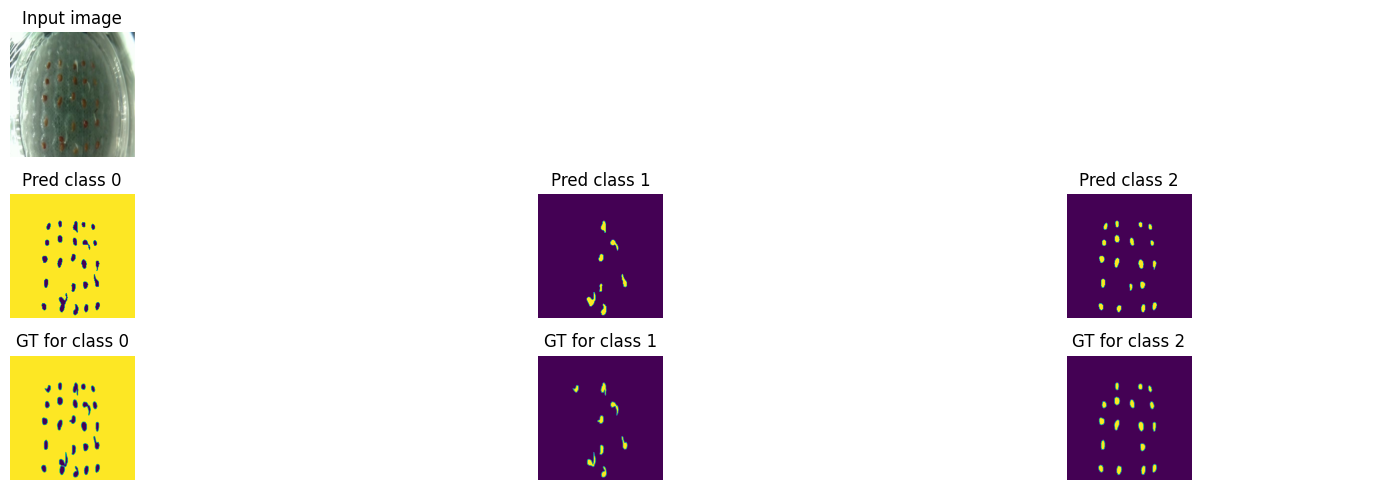

Train loss: 0.26033 | Time: 31m 30s | Val loss: 0.27163
Train_DICE_avg: 0.76592 | Train_Jaccard_avg: 0.70554 | Train_Sensitivity_avg: 0.76240 | Train_Specificity_avg: 0.96737 
Class 0 - Train_DICE: 0.99135 | Train_Jaccard: 0.98292 | Train_Sensitivity: 0.98828 | Train_Specificity: 0.90774 
Class 1 - Train_DICE: 0.43357 | Train_Jaccard: 0.35111 | Train_Sensitivity: 0.43473 | Train_Specificity: 0.99787 
Class 2 - Train_DICE: 0.87286 | Train_Jaccard: 0.78260 | Train_Sensitivity: 0.86420 | Train_Specificity: 0.99649 
Val_DICE_avg: 0.75642 | Val_Jaccard_avg: 0.70592 | Val_Sensitivity_avg: 0.75798 | Val_Specificity_avg: 0.95586 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99291 | Val_Sensitivity: 0.99687 | Val_Specificity: 0.87245 
Class 1 - Val_DICE: 0.38567 | Val_Jaccard: 0.31671 | Val_Sensitivity: 0.38771 | Val_Specificity: 0.99826 
Class 2 - Val_DICE: 0.88717 | Val_Jaccard: 0.80813 | Val_Sensitivity: 0.88937 | Val_Specificity: 0.99687 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.25606 | Time: 32m 33s | Val loss: 0.26387
Train_DICE_avg: 0.76953 | Train_Jaccard_avg: 0.70967 | Train_Sensitivity_avg: 0.76711 | Train_Specificity_avg: 0.96794 
Class 0 - Train_DICE: 0.99160 | Train_Jaccard: 0.98342 | Train_Sensitivity: 0.98868 | Train_Specificity: 0.90948 
Class 1 - Train_DICE: 0.44226 | Train_Jaccard: 0.36009 | Train_Sensitivity: 0.44546 | Train_Specificity: 0.99789 
Class 2 - Train_DICE: 0.87474 | Train_Jaccard: 0.78549 | Train_Sensitivity: 0.86719 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.75990 | Val_Jaccard_avg: 0.71084 | Val_Sensitivity_avg: 0.76529 | Val_Specificity_avg: 0.96437 
Class 0 - Val_DICE: 0.99668 | Val_Jaccard: 0.99341 | Val_Sensitivity: 0.99668 | Val_Specificity: 0.89824 
Class 1 - Val_DICE: 0.38894 | Val_Jaccard: 0.32101 | Val_Sensitivity: 0.38492 | Val_Specificity: 0.99823 
Class 2 - Val_DICE: 0.89409 | Val_Jaccard: 0.81810 | Val_Sensitivity: 0.91428 | Val_Specificity: 0.99665 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.25271 | Time: 33m 36s | Val loss: 0.26340
Train_DICE_avg: 0.77084 | Train_Jaccard_avg: 0.71147 | Train_Sensitivity_avg: 0.76896 | Train_Specificity_avg: 0.96494 
Class 0 - Train_DICE: 0.99175 | Train_Jaccard: 0.98370 | Train_Sensitivity: 0.98957 | Train_Specificity: 0.90042 
Class 1 - Train_DICE: 0.44359 | Train_Jaccard: 0.36161 | Train_Sensitivity: 0.44770 | Train_Specificity: 0.99786 
Class 2 - Train_DICE: 0.87718 | Train_Jaccard: 0.78910 | Train_Sensitivity: 0.86962 | Train_Specificity: 0.99654 
Val_DICE_avg: 0.76237 | Val_Jaccard_avg: 0.71382 | Val_Sensitivity_avg: 0.75861 | Val_Specificity_avg: 0.95264 
Class 0 - Val_DICE: 0.99628 | Val_Jaccard: 0.99260 | Val_Sensitivity: 0.99772 | Val_Specificity: 0.86204 
Class 1 - Val_DICE: 0.39670 | Val_Jaccard: 0.33064 | Val_Sensitivity: 0.38379 | Val_Specificity: 0.99848 
Class 2 - Val_DICE: 0.89415 | Val_Jaccard: 0.81821 | Val_Sensitivity: 0.89432 | Val_Specificity: 0.99741 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.24872 | Time: 34m 37s | Val loss: 0.25915
Train_DICE_avg: 0.77191 | Train_Jaccard_avg: 0.71295 | Train_Sensitivity_avg: 0.77038 | Train_Specificity_avg: 0.96706 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98375 | Train_Sensitivity: 0.98925 | Train_Specificity: 0.90680 
Class 1 - Train_DICE: 0.44538 | Train_Jaccard: 0.36406 | Train_Sensitivity: 0.44851 | Train_Specificity: 0.99793 
Class 2 - Train_DICE: 0.87859 | Train_Jaccard: 0.79105 | Train_Sensitivity: 0.87336 | Train_Specificity: 0.99645 
Val_DICE_avg: 0.77360 | Val_Jaccard_avg: 0.72558 | Val_Sensitivity_avg: 0.77349 | Val_Specificity_avg: 0.95487 
Class 0 - Val_DICE: 0.99631 | Val_Jaccard: 0.99267 | Val_Sensitivity: 0.99766 | Val_Specificity: 0.86868 
Class 1 - Val_DICE: 0.42934 | Val_Jaccard: 0.36425 | Val_Sensitivity: 0.42532 | Val_Specificity: 0.99845 
Class 2 - Val_DICE: 0.89516 | Val_Jaccard: 0.81983 | Val_Sensitivity: 0.89748 | Val_Specificity: 0.99747 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.24790 | Time: 35m 38s | Val loss: 0.25934
Train_DICE_avg: 0.77561 | Train_Jaccard_avg: 0.71681 | Train_Sensitivity_avg: 0.77555 | Train_Specificity_avg: 0.96599 
Class 0 - Train_DICE: 0.99196 | Train_Jaccard: 0.98412 | Train_Sensitivity: 0.98974 | Train_Specificity: 0.90359 
Class 1 - Train_DICE: 0.45648 | Train_Jaccard: 0.37515 | Train_Sensitivity: 0.46432 | Train_Specificity: 0.99787 
Class 2 - Train_DICE: 0.87839 | Train_Jaccard: 0.79116 | Train_Sensitivity: 0.87260 | Train_Specificity: 0.99652 
Val_DICE_avg: 0.78650 | Val_Jaccard_avg: 0.73739 | Val_Sensitivity_avg: 0.78837 | Val_Specificity_avg: 0.95131 
Class 0 - Val_DICE: 0.99625 | Val_Jaccard: 0.99254 | Val_Sensitivity: 0.99739 | Val_Specificity: 0.85849 
Class 1 - Val_DICE: 0.47316 | Val_Jaccard: 0.40772 | Val_Sensitivity: 0.48294 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.89008 | Val_Jaccard: 0.81191 | Val_Sensitivity: 0.88477 | Val_Specificity: 0.99740 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


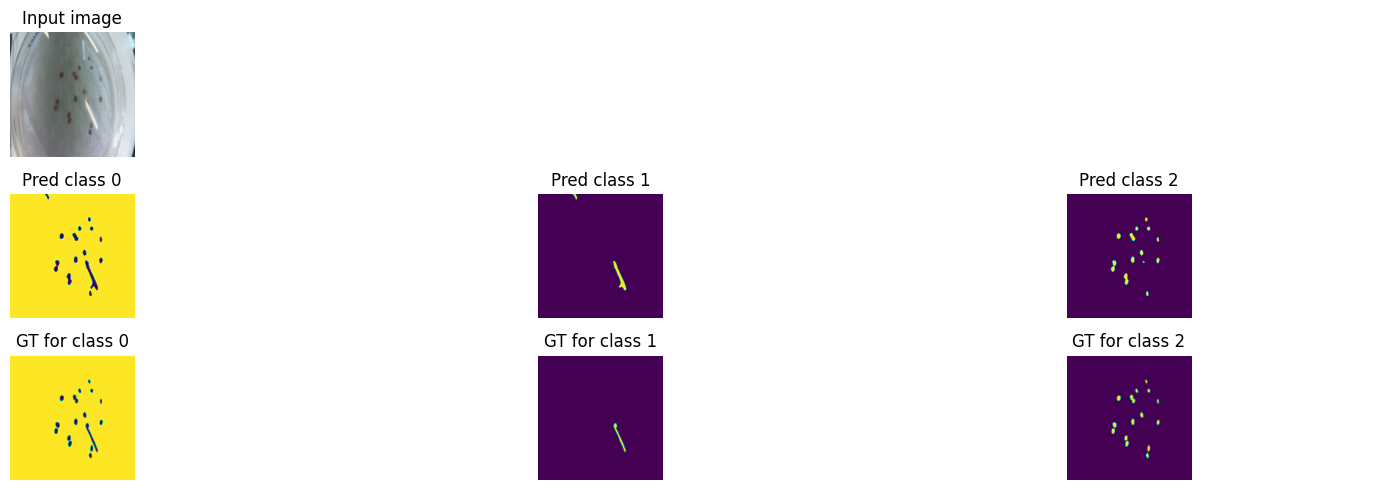

Train loss: 0.24243 | Time: 36m 40s | Val loss: 0.23670
Train_DICE_avg: 0.78928 | Train_Jaccard_avg: 0.73099 | Train_Sensitivity_avg: 0.79281 | Train_Specificity_avg: 0.96567 
Class 0 - Train_DICE: 0.99189 | Train_Jaccard: 0.98398 | Train_Sensitivity: 0.98978 | Train_Specificity: 0.90261 
Class 1 - Train_DICE: 0.49814 | Train_Jaccard: 0.41838 | Train_Sensitivity: 0.51662 | Train_Specificity: 0.99785 
Class 2 - Train_DICE: 0.87780 | Train_Jaccard: 0.79061 | Train_Sensitivity: 0.87203 | Train_Specificity: 0.99655 
Val_DICE_avg: 0.81038 | Val_Jaccard_avg: 0.76172 | Val_Sensitivity_avg: 0.81732 | Val_Specificity_avg: 0.95939 
Class 0 - Val_DICE: 0.99663 | Val_Jaccard: 0.99330 | Val_Sensitivity: 0.99727 | Val_Specificity: 0.88326 
Class 1 - Val_DICE: 0.54312 | Val_Jaccard: 0.47794 | Val_Sensitivity: 0.54936 | Val_Specificity: 0.99835 
Class 2 - Val_DICE: 0.89139 | Val_Jaccard: 0.81393 | Val_Sensitivity: 0.90533 | Val_Specificity: 0.99655 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.23781 | Time: 37m 40s | Val loss: 0.23350
Train_DICE_avg: 0.78807 | Train_Jaccard_avg: 0.72959 | Train_Sensitivity_avg: 0.79111 | Train_Specificity_avg: 0.96679 
Class 0 - Train_DICE: 0.99182 | Train_Jaccard: 0.98385 | Train_Sensitivity: 0.98949 | Train_Specificity: 0.90605 
Class 1 - Train_DICE: 0.49442 | Train_Jaccard: 0.41359 | Train_Sensitivity: 0.50969 | Train_Specificity: 0.99787 
Class 2 - Train_DICE: 0.87797 | Train_Jaccard: 0.79133 | Train_Sensitivity: 0.87415 | Train_Specificity: 0.99645 
Val_DICE_avg: 0.81153 | Val_Jaccard_avg: 0.76244 | Val_Sensitivity_avg: 0.81695 | Val_Specificity_avg: 0.96167 
Class 0 - Val_DICE: 0.99667 | Val_Jaccard: 0.99338 | Val_Sensitivity: 0.99724 | Val_Specificity: 0.89029 
Class 1 - Val_DICE: 0.54622 | Val_Jaccard: 0.47986 | Val_Sensitivity: 0.53291 | Val_Specificity: 0.99851 
Class 2 - Val_DICE: 0.89169 | Val_Jaccard: 0.81408 | Val_Sensitivity: 0.92070 | Val_Specificity: 0.99620 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.23538 | Time: 38m 41s | Val loss: 0.22563
Train_DICE_avg: 0.79499 | Train_Jaccard_avg: 0.73728 | Train_Sensitivity_avg: 0.79918 | Train_Specificity_avg: 0.96659 
Class 0 - Train_DICE: 0.99205 | Train_Jaccard: 0.98429 | Train_Sensitivity: 0.99002 | Train_Specificity: 0.90532 
Class 1 - Train_DICE: 0.51285 | Train_Jaccard: 0.43350 | Train_Sensitivity: 0.53227 | Train_Specificity: 0.99789 
Class 2 - Train_DICE: 0.88007 | Train_Jaccard: 0.79404 | Train_Sensitivity: 0.87523 | Train_Specificity: 0.99656 
Val_DICE_avg: 0.82347 | Val_Jaccard_avg: 0.77548 | Val_Sensitivity_avg: 0.83274 | Val_Specificity_avg: 0.95552 
Class 0 - Val_DICE: 0.99632 | Val_Jaccard: 0.99268 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.87092 
Class 1 - Val_DICE: 0.58187 | Val_Jaccard: 0.51823 | Val_Sensitivity: 0.61349 | Val_Specificity: 0.99812 
Class 2 - Val_DICE: 0.89221 | Val_Jaccard: 0.81555 | Val_Sensitivity: 0.88712 | Val_Specificity: 0.99752 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.22684 | Time: 39m 42s | Val loss: 0.19676
Train_DICE_avg: 0.81500 | Train_Jaccard_avg: 0.75805 | Train_Sensitivity_avg: 0.82546 | Train_Specificity_avg: 0.96664 
Class 0 - Train_DICE: 0.99223 | Train_Jaccard: 0.98466 | Train_Sensitivity: 0.99036 | Train_Specificity: 0.90546 
Class 1 - Train_DICE: 0.57259 | Train_Jaccard: 0.49580 | Train_Sensitivity: 0.61110 | Train_Specificity: 0.99792 
Class 2 - Train_DICE: 0.88018 | Train_Jaccard: 0.79369 | Train_Sensitivity: 0.87491 | Train_Specificity: 0.99655 
Val_DICE_avg: 0.82892 | Val_Jaccard_avg: 0.78243 | Val_Sensitivity_avg: 0.85520 | Val_Specificity_avg: 0.96506 
Class 0 - Val_DICE: 0.99662 | Val_Jaccard: 0.99329 | Val_Sensitivity: 0.99675 | Val_Specificity: 0.90076 
Class 1 - Val_DICE: 0.59983 | Val_Jaccard: 0.54218 | Val_Sensitivity: 0.66039 | Val_Specificity: 0.99803 
Class 2 - Val_DICE: 0.89031 | Val_Jaccard: 0.81181 | Val_Sensitivity: 0.90846 | Val_Specificity: 0.99641 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.21437 | Time: 40m 42s | Val loss: 0.19436
Train_DICE_avg: 0.82250 | Train_Jaccard_avg: 0.76558 | Train_Sensitivity_avg: 0.83638 | Train_Specificity_avg: 0.96830 
Class 0 - Train_DICE: 0.99190 | Train_Jaccard: 0.98399 | Train_Sensitivity: 0.98947 | Train_Specificity: 0.91061 
Class 1 - Train_DICE: 0.59539 | Train_Jaccard: 0.51887 | Train_Sensitivity: 0.64218 | Train_Specificity: 0.99785 
Class 2 - Train_DICE: 0.88023 | Train_Jaccard: 0.79388 | Train_Sensitivity: 0.87748 | Train_Specificity: 0.99644 
Val_DICE_avg: 0.83167 | Val_Jaccard_avg: 0.78343 | Val_Sensitivity_avg: 0.83613 | Val_Specificity_avg: 0.95466 
Class 0 - Val_DICE: 0.99633 | Val_Jaccard: 0.99271 | Val_Sensitivity: 0.99770 | Val_Specificity: 0.86841 
Class 1 - Val_DICE: 0.60497 | Val_Jaccard: 0.54017 | Val_Sensitivity: 0.61411 | Val_Specificity: 0.99840 
Class 2 - Val_DICE: 0.89372 | Val_Jaccard: 0.81742 | Val_Sensitivity: 0.89656 | Val_Specificity: 0.99718 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


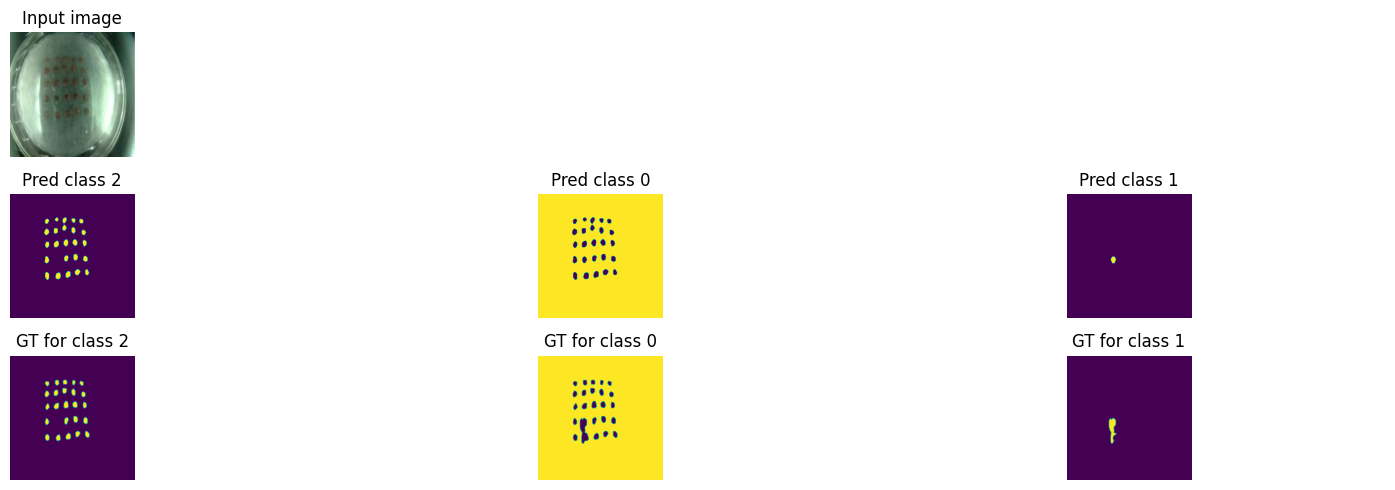

Train loss: 0.21216 | Time: 41m 43s | Val loss: 0.19121
Train_DICE_avg: 0.82738 | Train_Jaccard_avg: 0.77100 | Train_Sensitivity_avg: 0.84260 | Train_Specificity_avg: 0.96658 
Class 0 - Train_DICE: 0.99222 | Train_Jaccard: 0.98463 | Train_Sensitivity: 0.99036 | Train_Specificity: 0.90530 
Class 1 - Train_DICE: 0.60898 | Train_Jaccard: 0.53310 | Train_Sensitivity: 0.66242 | Train_Specificity: 0.99785 
Class 2 - Train_DICE: 0.88095 | Train_Jaccard: 0.79528 | Train_Sensitivity: 0.87502 | Train_Specificity: 0.99658 
Val_DICE_avg: 0.83225 | Val_Jaccard_avg: 0.78425 | Val_Sensitivity_avg: 0.84714 | Val_Specificity_avg: 0.95777 
Class 0 - Val_DICE: 0.99657 | Val_Jaccard: 0.99318 | Val_Sensitivity: 0.99749 | Val_Specificity: 0.87853 
Class 1 - Val_DICE: 0.61037 | Val_Jaccard: 0.54789 | Val_Sensitivity: 0.62586 | Val_Specificity: 0.99854 
Class 2 - Val_DICE: 0.88981 | Val_Jaccard: 0.81169 | Val_Sensitivity: 0.91809 | Val_Specificity: 0.99623 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.20675 | Time: 42m 44s | Val loss: 0.18563
Train_DICE_avg: 0.83495 | Train_Jaccard_avg: 0.77865 | Train_Sensitivity_avg: 0.85119 | Train_Specificity_avg: 0.96673 
Class 0 - Train_DICE: 0.99212 | Train_Jaccard: 0.98443 | Train_Sensitivity: 0.99013 | Train_Specificity: 0.90583 
Class 1 - Train_DICE: 0.63190 | Train_Jaccard: 0.55656 | Train_Sensitivity: 0.68572 | Train_Specificity: 0.99786 
Class 2 - Train_DICE: 0.88084 | Train_Jaccard: 0.79498 | Train_Sensitivity: 0.87774 | Train_Specificity: 0.99650 
Val_DICE_avg: 0.84029 | Val_Jaccard_avg: 0.79355 | Val_Sensitivity_avg: 0.84724 | Val_Specificity_avg: 0.95478 
Class 0 - Val_DICE: 0.99645 | Val_Jaccard: 0.99295 | Val_Sensitivity: 0.99761 | Val_Specificity: 0.86887 
Class 1 - Val_DICE: 0.63033 | Val_Jaccard: 0.56828 | Val_Sensitivity: 0.64053 | Val_Specificity: 0.99848 
Class 2 - Val_DICE: 0.89408 | Val_Jaccard: 0.81943 | Val_Sensitivity: 0.90359 | Val_Specificity: 0.99699 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.20363 | Time: 43m 45s | Val loss: 0.18701
Train_DICE_avg: 0.83692 | Train_Jaccard_avg: 0.78108 | Train_Sensitivity_avg: 0.85706 | Train_Specificity_avg: 0.96650 
Class 0 - Train_DICE: 0.99184 | Train_Jaccard: 0.98388 | Train_Sensitivity: 0.98966 | Train_Specificity: 0.90524 
Class 1 - Train_DICE: 0.63952 | Train_Jaccard: 0.56626 | Train_Sensitivity: 0.70645 | Train_Specificity: 0.99783 
Class 2 - Train_DICE: 0.87942 | Train_Jaccard: 0.79309 | Train_Sensitivity: 0.87505 | Train_Specificity: 0.99645 
Val_DICE_avg: 0.84028 | Val_Jaccard_avg: 0.79468 | Val_Sensitivity_avg: 0.85422 | Val_Specificity_avg: 0.95300 
Class 0 - Val_DICE: 0.99640 | Val_Jaccard: 0.99285 | Val_Sensitivity: 0.99757 | Val_Specificity: 0.86343 
Class 1 - Val_DICE: 0.62998 | Val_Jaccard: 0.57154 | Val_Sensitivity: 0.67570 | Val_Specificity: 0.99818 
Class 2 - Val_DICE: 0.89446 | Val_Jaccard: 0.81965 | Val_Sensitivity: 0.88939 | Val_Specificity: 0.99738 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.20068 | Time: 44m 46s | Val loss: 0.18210
Train_DICE_avg: 0.83763 | Train_Jaccard_avg: 0.78185 | Train_Sensitivity_avg: 0.85810 | Train_Specificity_avg: 0.96579 
Class 0 - Train_DICE: 0.99217 | Train_Jaccard: 0.98452 | Train_Sensitivity: 0.99046 | Train_Specificity: 0.90307 
Class 1 - Train_DICE: 0.64021 | Train_Jaccard: 0.56675 | Train_Sensitivity: 0.70696 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.88051 | Train_Jaccard: 0.79428 | Train_Sensitivity: 0.87687 | Train_Specificity: 0.99648 
Val_DICE_avg: 0.84571 | Val_Jaccard_avg: 0.79976 | Val_Sensitivity_avg: 0.85595 | Val_Specificity_avg: 0.95134 
Class 0 - Val_DICE: 0.99624 | Val_Jaccard: 0.99254 | Val_Sensitivity: 0.99789 | Val_Specificity: 0.85820 
Class 1 - Val_DICE: 0.64467 | Val_Jaccard: 0.58477 | Val_Sensitivity: 0.67741 | Val_Specificity: 0.99835 
Class 2 - Val_DICE: 0.89621 | Val_Jaccard: 0.82199 | Val_Sensitivity: 0.89254 | Val_Specificity: 0.99747 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.20160 | Time: 45m 47s | Val loss: 0.18103
Train_DICE_avg: 0.83437 | Train_Jaccard_avg: 0.77865 | Train_Sensitivity_avg: 0.85569 | Train_Specificity_avg: 0.96547 
Class 0 - Train_DICE: 0.99224 | Train_Jaccard: 0.98466 | Train_Sensitivity: 0.99069 | Train_Specificity: 0.90208 
Class 1 - Train_DICE: 0.62973 | Train_Jaccard: 0.55593 | Train_Sensitivity: 0.69903 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.88113 | Train_Jaccard: 0.79535 | Train_Sensitivity: 0.87736 | Train_Specificity: 0.99650 
Val_DICE_avg: 0.84254 | Val_Jaccard_avg: 0.79578 | Val_Sensitivity_avg: 0.85049 | Val_Specificity_avg: 0.94870 
Class 0 - Val_DICE: 0.99613 | Val_Jaccard: 0.99230 | Val_Sensitivity: 0.99778 | Val_Specificity: 0.85037 
Class 1 - Val_DICE: 0.63691 | Val_Jaccard: 0.57544 | Val_Sensitivity: 0.66266 | Val_Specificity: 0.99834 
Class 2 - Val_DICE: 0.89459 | Val_Jaccard: 0.81961 | Val_Sensitivity: 0.89102 | Val_Specificity: 0.99740 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


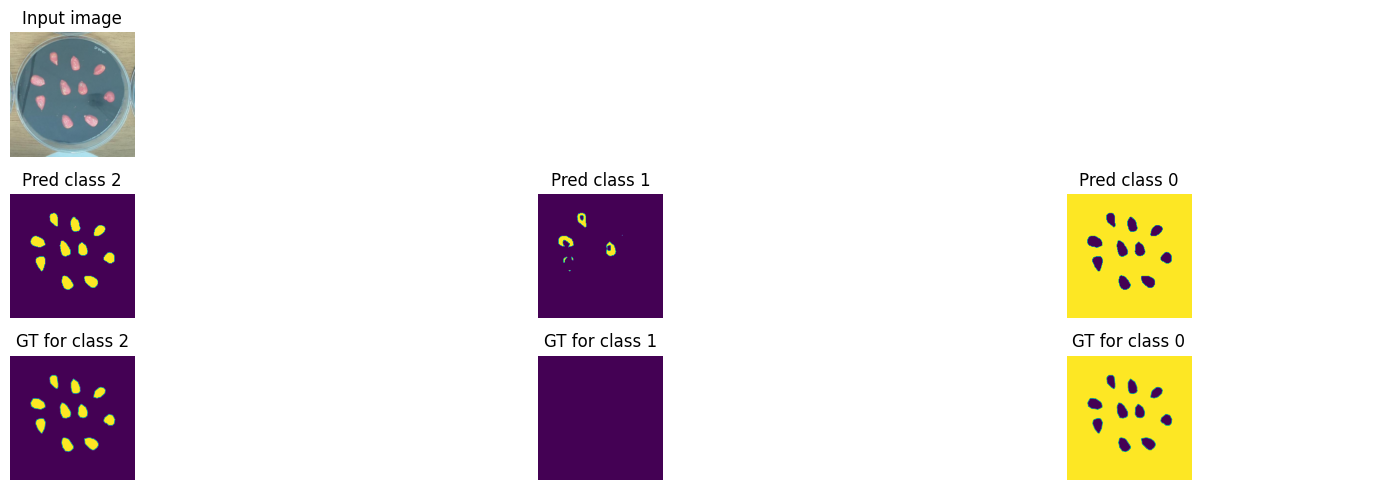

Train loss: 0.19664 | Time: 46m 48s | Val loss: 0.18034
Train_DICE_avg: 0.84022 | Train_Jaccard_avg: 0.78481 | Train_Sensitivity_avg: 0.85953 | Train_Specificity_avg: 0.96580 
Class 0 - Train_DICE: 0.99224 | Train_Jaccard: 0.98467 | Train_Sensitivity: 0.99053 | Train_Specificity: 0.90300 
Class 1 - Train_DICE: 0.64526 | Train_Jaccard: 0.57118 | Train_Sensitivity: 0.70894 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.88316 | Train_Jaccard: 0.79858 | Train_Sensitivity: 0.87912 | Train_Specificity: 0.99658 
Val_DICE_avg: 0.84563 | Val_Jaccard_avg: 0.80028 | Val_Sensitivity_avg: 0.86512 | Val_Specificity_avg: 0.95570 
Class 0 - Val_DICE: 0.99651 | Val_Jaccard: 0.99305 | Val_Sensitivity: 0.99739 | Val_Specificity: 0.87202 
Class 1 - Val_DICE: 0.64392 | Val_Jaccard: 0.58487 | Val_Sensitivity: 0.68509 | Val_Specificity: 0.99831 
Class 2 - Val_DICE: 0.89647 | Val_Jaccard: 0.82292 | Val_Sensitivity: 0.91287 | Val_Specificity: 0.99677 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.19594 | Time: 47m 50s | Val loss: 0.17552
Train_DICE_avg: 0.84061 | Train_Jaccard_avg: 0.78511 | Train_Sensitivity_avg: 0.86197 | Train_Specificity_avg: 0.96498 
Class 0 - Train_DICE: 0.99202 | Train_Jaccard: 0.98424 | Train_Sensitivity: 0.99030 | Train_Specificity: 0.90055 
Class 1 - Train_DICE: 0.64709 | Train_Jaccard: 0.57333 | Train_Sensitivity: 0.71861 | Train_Specificity: 0.99778 
Class 2 - Train_DICE: 0.88271 | Train_Jaccard: 0.79776 | Train_Sensitivity: 0.87699 | Train_Specificity: 0.99662 
Val_DICE_avg: 0.84789 | Val_Jaccard_avg: 0.80200 | Val_Sensitivity_avg: 0.86215 | Val_Specificity_avg: 0.95547 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99303 | Val_Sensitivity: 0.99761 | Val_Specificity: 0.87126 
Class 1 - Val_DICE: 0.64964 | Val_Jaccard: 0.58861 | Val_Sensitivity: 0.67081 | Val_Specificity: 0.99847 
Class 2 - Val_DICE: 0.89754 | Val_Jaccard: 0.82437 | Val_Sensitivity: 0.91801 | Val_Specificity: 0.99670 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.19320 | Time: 48m 51s | Val loss: 0.17716
Train_DICE_avg: 0.84231 | Train_Jaccard_avg: 0.78697 | Train_Sensitivity_avg: 0.86240 | Train_Specificity_avg: 0.96607 
Class 0 - Train_DICE: 0.99234 | Train_Jaccard: 0.98487 | Train_Sensitivity: 0.99091 | Train_Specificity: 0.90373 
Class 1 - Train_DICE: 0.65017 | Train_Jaccard: 0.57567 | Train_Sensitivity: 0.71394 | Train_Specificity: 0.99794 
Class 2 - Train_DICE: 0.88442 | Train_Jaccard: 0.80036 | Train_Sensitivity: 0.88235 | Train_Specificity: 0.99655 
Val_DICE_avg: 0.84714 | Val_Jaccard_avg: 0.80133 | Val_Sensitivity_avg: 0.85789 | Val_Specificity_avg: 0.95317 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99293 | Val_Sensitivity: 0.99765 | Val_Specificity: 0.86417 
Class 1 - Val_DICE: 0.64721 | Val_Jaccard: 0.58582 | Val_Sensitivity: 0.66176 | Val_Specificity: 0.99844 
Class 2 - Val_DICE: 0.89776 | Val_Jaccard: 0.82525 | Val_Sensitivity: 0.91426 | Val_Specificity: 0.99688 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.19217 | Time: 49m 52s | Val loss: 0.17727
Train_DICE_avg: 0.84473 | Train_Jaccard_avg: 0.78984 | Train_Sensitivity_avg: 0.86292 | Train_Specificity_avg: 0.96570 
Class 0 - Train_DICE: 0.99233 | Train_Jaccard: 0.98484 | Train_Sensitivity: 0.99064 | Train_Specificity: 0.90262 
Class 1 - Train_DICE: 0.65701 | Train_Jaccard: 0.58363 | Train_Sensitivity: 0.71681 | Train_Specificity: 0.99790 
Class 2 - Train_DICE: 0.88485 | Train_Jaccard: 0.80106 | Train_Sensitivity: 0.88131 | Train_Specificity: 0.99659 
Val_DICE_avg: 0.84726 | Val_Jaccard_avg: 0.80113 | Val_Sensitivity_avg: 0.85975 | Val_Specificity_avg: 0.95530 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99299 | Val_Sensitivity: 0.99754 | Val_Specificity: 0.87057 
Class 1 - Val_DICE: 0.64626 | Val_Jaccard: 0.58439 | Val_Sensitivity: 0.67629 | Val_Specificity: 0.99830 
Class 2 - Val_DICE: 0.89903 | Val_Jaccard: 0.82602 | Val_Sensitivity: 0.90542 | Val_Specificity: 0.99704 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.19201 | Time: 50m 53s | Val loss: 0.17647
Train_DICE_avg: 0.84796 | Train_Jaccard_avg: 0.79325 | Train_Sensitivity_avg: 0.86873 | Train_Specificity_avg: 0.96580 
Class 0 - Train_DICE: 0.99244 | Train_Jaccard: 0.98505 | Train_Sensitivity: 0.99076 | Train_Specificity: 0.90290 
Class 1 - Train_DICE: 0.66687 | Train_Jaccard: 0.59396 | Train_Sensitivity: 0.73521 | Train_Specificity: 0.99789 
Class 2 - Train_DICE: 0.88458 | Train_Jaccard: 0.80074 | Train_Sensitivity: 0.88024 | Train_Specificity: 0.99661 
Val_DICE_avg: 0.84618 | Val_Jaccard_avg: 0.79968 | Val_Sensitivity_avg: 0.86379 | Val_Specificity_avg: 0.95629 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99291 | Val_Sensitivity: 0.99717 | Val_Specificity: 0.87398 
Class 1 - Val_DICE: 0.64513 | Val_Jaccard: 0.58365 | Val_Sensitivity: 0.68564 | Val_Specificity: 0.99807 
Class 2 - Val_DICE: 0.89696 | Val_Jaccard: 0.82248 | Val_Sensitivity: 0.90856 | Val_Specificity: 0.99681 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


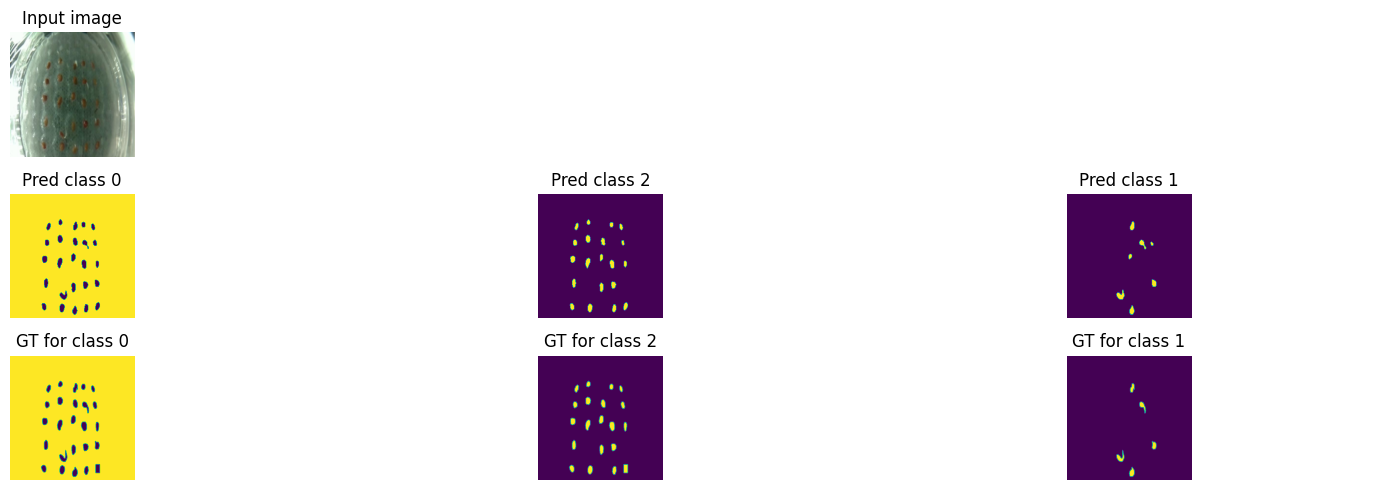

Train loss: 0.19017 | Time: 51m 55s | Val loss: 0.17330
Train_DICE_avg: 0.84691 | Train_Jaccard_avg: 0.79149 | Train_Sensitivity_avg: 0.86257 | Train_Specificity_avg: 0.96469 
Class 0 - Train_DICE: 0.99228 | Train_Jaccard: 0.98475 | Train_Sensitivity: 0.99085 | Train_Specificity: 0.89956 
Class 1 - Train_DICE: 0.66342 | Train_Jaccard: 0.58851 | Train_Sensitivity: 0.71502 | Train_Specificity: 0.99792 
Class 2 - Train_DICE: 0.88503 | Train_Jaccard: 0.80122 | Train_Sensitivity: 0.88184 | Train_Specificity: 0.99660 
Val_DICE_avg: 0.84762 | Val_Jaccard_avg: 0.80141 | Val_Sensitivity_avg: 0.86198 | Val_Specificity_avg: 0.95833 
Class 0 - Val_DICE: 0.99663 | Val_Jaccard: 0.99330 | Val_Sensitivity: 0.99731 | Val_Specificity: 0.88011 
Class 1 - Val_DICE: 0.64880 | Val_Jaccard: 0.58732 | Val_Sensitivity: 0.66542 | Val_Specificity: 0.99837 
Class 2 - Val_DICE: 0.89742 | Val_Jaccard: 0.82360 | Val_Sensitivity: 0.92322 | Val_Specificity: 0.99650 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.18861 | Time: 52m 57s | Val loss: 0.16875
Train_DICE_avg: 0.85167 | Train_Jaccard_avg: 0.79668 | Train_Sensitivity_avg: 0.87134 | Train_Specificity_avg: 0.96746 
Class 0 - Train_DICE: 0.99233 | Train_Jaccard: 0.98485 | Train_Sensitivity: 0.99039 | Train_Specificity: 0.90797 
Class 1 - Train_DICE: 0.67731 | Train_Jaccard: 0.60322 | Train_Sensitivity: 0.73951 | Train_Specificity: 0.99784 
Class 2 - Train_DICE: 0.88536 | Train_Jaccard: 0.80197 | Train_Sensitivity: 0.88411 | Train_Specificity: 0.99656 
Val_DICE_avg: 0.85097 | Val_Jaccard_avg: 0.80511 | Val_Sensitivity_avg: 0.85576 | Val_Specificity_avg: 0.95131 
Class 0 - Val_DICE: 0.99633 | Val_Jaccard: 0.99270 | Val_Sensitivity: 0.99786 | Val_Specificity: 0.85813 
Class 1 - Val_DICE: 0.65710 | Val_Jaccard: 0.59533 | Val_Sensitivity: 0.66714 | Val_Specificity: 0.99852 
Class 2 - Val_DICE: 0.89948 | Val_Jaccard: 0.82730 | Val_Sensitivity: 0.90226 | Val_Specificity: 0.99729 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.18543 | Time: 53m 58s | Val loss: 0.16378
Train_DICE_avg: 0.85689 | Train_Jaccard_avg: 0.80188 | Train_Sensitivity_avg: 0.87442 | Train_Specificity_avg: 0.96606 
Class 0 - Train_DICE: 0.99230 | Train_Jaccard: 0.98478 | Train_Sensitivity: 0.99069 | Train_Specificity: 0.90367 
Class 1 - Train_DICE: 0.69255 | Train_Jaccard: 0.61824 | Train_Sensitivity: 0.75144 | Train_Specificity: 0.99787 
Class 2 - Train_DICE: 0.88583 | Train_Jaccard: 0.80262 | Train_Sensitivity: 0.88113 | Train_Specificity: 0.99664 
Val_DICE_avg: 0.89498 | Val_Jaccard_avg: 0.84877 | Val_Sensitivity_avg: 0.91020 | Val_Specificity_avg: 0.95823 
Class 0 - Val_DICE: 0.99662 | Val_Jaccard: 0.99327 | Val_Sensitivity: 0.99747 | Val_Specificity: 0.87960 
Class 1 - Val_DICE: 0.78843 | Val_Jaccard: 0.72588 | Val_Sensitivity: 0.81708 | Val_Specificity: 0.99823 
Class 2 - Val_DICE: 0.89988 | Val_Jaccard: 0.82715 | Val_Sensitivity: 0.91604 | Val_Specificity: 0.99686 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.17794 | Time: 55m 0s | Val loss: 0.12892
Train_DICE_avg: 0.86736 | Train_Jaccard_avg: 0.81245 | Train_Sensitivity_avg: 0.88942 | Train_Specificity_avg: 0.96568 
Class 0 - Train_DICE: 0.99227 | Train_Jaccard: 0.98473 | Train_Sensitivity: 0.99060 | Train_Specificity: 0.90266 
Class 1 - Train_DICE: 0.72377 | Train_Jaccard: 0.64964 | Train_Sensitivity: 0.79260 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.88603 | Train_Jaccard: 0.80297 | Train_Sensitivity: 0.88507 | Train_Specificity: 0.99657 
Val_DICE_avg: 0.89779 | Val_Jaccard_avg: 0.85123 | Val_Sensitivity_avg: 0.91306 | Val_Specificity_avg: 0.95617 
Class 0 - Val_DICE: 0.99652 | Val_Jaccard: 0.99308 | Val_Sensitivity: 0.99747 | Val_Specificity: 0.87337 
Class 1 - Val_DICE: 0.79515 | Val_Jaccard: 0.73078 | Val_Sensitivity: 0.83089 | Val_Specificity: 0.99807 
Class 2 - Val_DICE: 0.90171 | Val_Jaccard: 0.82983 | Val_Sensitivity: 0.91084 | Val_Specificity: 0.99708 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


Train loss: 0.17416 | Time: 56m 2s | Val loss: 0.13319
Train_DICE_avg: 0.87171 | Train_Jaccard_avg: 0.81679 | Train_Sensitivity_avg: 0.89552 | Train_Specificity_avg: 0.96495 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98471 | Train_Sensitivity: 0.99075 | Train_Specificity: 0.90044 
Class 1 - Train_DICE: 0.73757 | Train_Jaccard: 0.66393 | Train_Sensitivity: 0.81552 | Train_Specificity: 0.99776 
Class 2 - Train_DICE: 0.88530 | Train_Jaccard: 0.80174 | Train_Sensitivity: 0.88030 | Train_Specificity: 0.99665 
Val_DICE_avg: 0.89043 | Val_Jaccard_avg: 0.84319 | Val_Sensitivity_avg: 0.90587 | Val_Specificity_avg: 0.95639 
Class 0 - Val_DICE: 0.99659 | Val_Jaccard: 0.99321 | Val_Sensitivity: 0.99749 | Val_Specificity: 0.87423 
Class 1 - Val_DICE: 0.77610 | Val_Jaccard: 0.71113 | Val_Sensitivity: 0.80980 | Val_Specificity: 0.99809 
Class 2 - Val_DICE: 0.89861 | Val_Jaccard: 0.82523 | Val_Sensitivity: 0.91032 | Val_Specificity: 0.99686 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


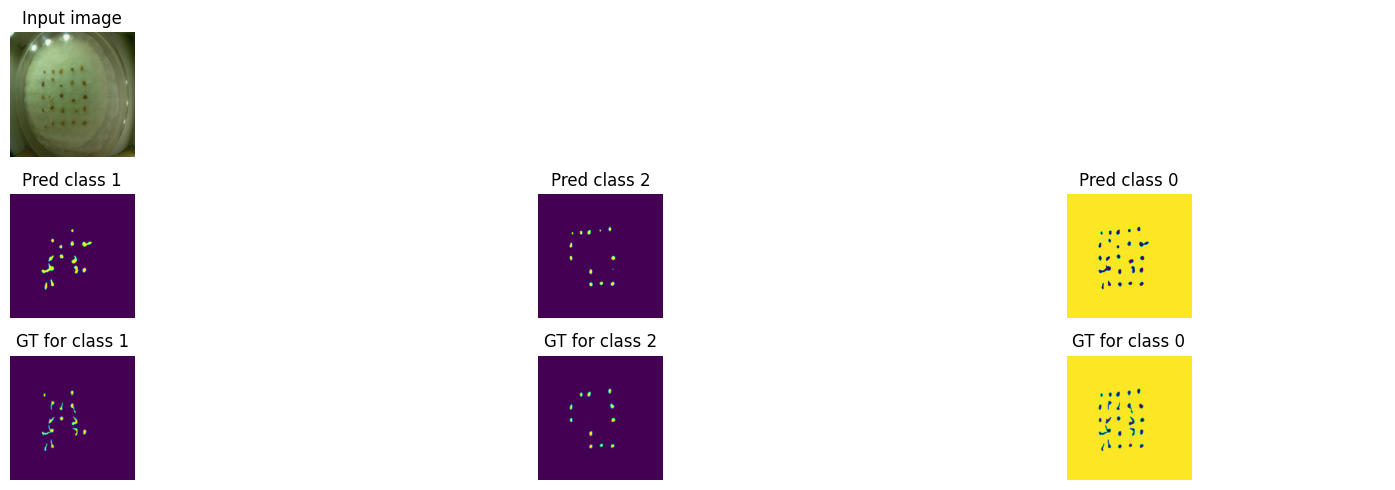

Train loss: 0.17097 | Time: 57m 3s | Val loss: 0.13143
Train_DICE_avg: 0.86963 | Train_Jaccard_avg: 0.81445 | Train_Sensitivity_avg: 0.89060 | Train_Specificity_avg: 0.96575 
Class 0 - Train_DICE: 0.99215 | Train_Jaccard: 0.98448 | Train_Sensitivity: 0.99058 | Train_Specificity: 0.90282 
Class 1 - Train_DICE: 0.73082 | Train_Jaccard: 0.65634 | Train_Sensitivity: 0.79734 | Train_Specificity: 0.99786 
Class 2 - Train_DICE: 0.88594 | Train_Jaccard: 0.80253 | Train_Sensitivity: 0.88388 | Train_Specificity: 0.99657 
Val_DICE_avg: 0.89142 | Val_Jaccard_avg: 0.84525 | Val_Sensitivity_avg: 0.91415 | Val_Specificity_avg: 0.95805 
Class 0 - Val_DICE: 0.99662 | Val_Jaccard: 0.99328 | Val_Sensitivity: 0.99754 | Val_Specificity: 0.87919 
Class 1 - Val_DICE: 0.77835 | Val_Jaccard: 0.71635 | Val_Sensitivity: 0.83196 | Val_Specificity: 0.99809 
Class 2 - Val_DICE: 0.89928 | Val_Jaccard: 0.82612 | Val_Sensitivity: 0.91296 | Val_Specificity: 0.99686 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.17181 | Time: 58m 4s | Val loss: 0.12847
Train_DICE_avg: 0.87067 | Train_Jaccard_avg: 0.81590 | Train_Sensitivity_avg: 0.89197 | Train_Specificity_avg: 0.96526 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98471 | Train_Sensitivity: 0.99072 | Train_Specificity: 0.90129 
Class 1 - Train_DICE: 0.73262 | Train_Jaccard: 0.65864 | Train_Sensitivity: 0.79997 | Train_Specificity: 0.99788 
Class 2 - Train_DICE: 0.88713 | Train_Jaccard: 0.80433 | Train_Sensitivity: 0.88523 | Train_Specificity: 0.99660 
Val_DICE_avg: 0.89446 | Val_Jaccard_avg: 0.84778 | Val_Sensitivity_avg: 0.91724 | Val_Specificity_avg: 0.95795 
Class 0 - Val_DICE: 0.99663 | Val_Jaccard: 0.99330 | Val_Sensitivity: 0.99734 | Val_Specificity: 0.87900 
Class 1 - Val_DICE: 0.78596 | Val_Jaccard: 0.72180 | Val_Sensitivity: 0.84227 | Val_Specificity: 0.99788 
Class 2 - Val_DICE: 0.90079 | Val_Jaccard: 0.82823 | Val_Sensitivity: 0.91210 | Val_Specificity: 0.99696 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.16987 | Time: 59m 5s | Val loss: 0.12832
Train_DICE_avg: 0.87254 | Train_Jaccard_avg: 0.81803 | Train_Sensitivity_avg: 0.89474 | Train_Specificity_avg: 0.96487 
Class 0 - Train_DICE: 0.99229 | Train_Jaccard: 0.98477 | Train_Sensitivity: 0.99091 | Train_Specificity: 0.90016 
Class 1 - Train_DICE: 0.73768 | Train_Jaccard: 0.66415 | Train_Sensitivity: 0.80898 | Train_Specificity: 0.99781 
Class 2 - Train_DICE: 0.88763 | Train_Jaccard: 0.80516 | Train_Sensitivity: 0.88434 | Train_Specificity: 0.99664 
Val_DICE_avg: 0.89355 | Val_Jaccard_avg: 0.84633 | Val_Sensitivity_avg: 0.90778 | Val_Specificity_avg: 0.95360 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99292 | Val_Sensitivity: 0.99763 | Val_Specificity: 0.86571 
Class 1 - Val_DICE: 0.78615 | Val_Jaccard: 0.72140 | Val_Sensitivity: 0.81691 | Val_Specificity: 0.99811 
Class 2 - Val_DICE: 0.89808 | Val_Jaccard: 0.82466 | Val_Sensitivity: 0.90881 | Val_Specificity: 0.99696 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.16969 | Time: 60m 5s | Val loss: 0.12465
Train_DICE_avg: 0.87324 | Train_Jaccard_avg: 0.81883 | Train_Sensitivity_avg: 0.89587 | Train_Specificity_avg: 0.96523 
Class 0 - Train_DICE: 0.99237 | Train_Jaccard: 0.98492 | Train_Sensitivity: 0.99079 | Train_Specificity: 0.90116 
Class 1 - Train_DICE: 0.73984 | Train_Jaccard: 0.66649 | Train_Sensitivity: 0.81347 | Train_Specificity: 0.99780 
Class 2 - Train_DICE: 0.88752 | Train_Jaccard: 0.80507 | Train_Sensitivity: 0.88336 | Train_Specificity: 0.99672 
Val_DICE_avg: 0.89685 | Val_Jaccard_avg: 0.85004 | Val_Sensitivity_avg: 0.90806 | Val_Specificity_avg: 0.95351 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99290 | Val_Sensitivity: 0.99776 | Val_Specificity: 0.86509 
Class 1 - Val_DICE: 0.79338 | Val_Jaccard: 0.72873 | Val_Sensitivity: 0.81972 | Val_Specificity: 0.99823 
Class 2 - Val_DICE: 0.90073 | Val_Jaccard: 0.82848 | Val_Sensitivity: 0.90671 | Val_Specificity: 0.99722 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.17087 | Time: 61m 5s | Val loss: 0.12616
Train_DICE_avg: 0.87323 | Train_Jaccard_avg: 0.81918 | Train_Sensitivity_avg: 0.89417 | Train_Specificity_avg: 0.96626 
Class 0 - Train_DICE: 0.99246 | Train_Jaccard: 0.98511 | Train_Sensitivity: 0.99089 | Train_Specificity: 0.90423 
Class 1 - Train_DICE: 0.73890 | Train_Jaccard: 0.66615 | Train_Sensitivity: 0.80681 | Train_Specificity: 0.99788 
Class 2 - Train_DICE: 0.88833 | Train_Jaccard: 0.80627 | Train_Sensitivity: 0.88480 | Train_Specificity: 0.99666 
Val_DICE_avg: 0.89647 | Val_Jaccard_avg: 0.84937 | Val_Sensitivity_avg: 0.91214 | Val_Specificity_avg: 0.95503 
Class 0 - Val_DICE: 0.99652 | Val_Jaccard: 0.99309 | Val_Sensitivity: 0.99754 | Val_Specificity: 0.86999 
Class 1 - Val_DICE: 0.79296 | Val_Jaccard: 0.72794 | Val_Sensitivity: 0.83141 | Val_Specificity: 0.99810 
Class 2 - Val_DICE: 0.89995 | Val_Jaccard: 0.82707 | Val_Sensitivity: 0.90748 | Val_Specificity: 0.99701 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


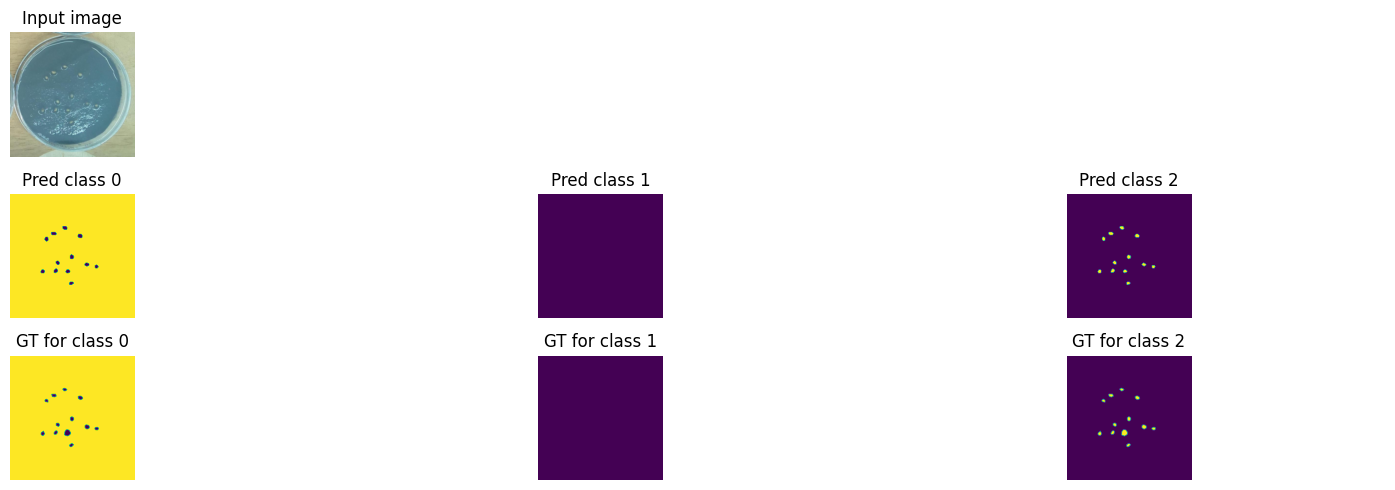

Train loss: 0.16640 | Time: 62m 6s | Val loss: 0.12800
Train_DICE_avg: 0.87706 | Train_Jaccard_avg: 0.82301 | Train_Sensitivity_avg: 0.89963 | Train_Specificity_avg: 0.96534 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98490 | Train_Sensitivity: 0.99088 | Train_Specificity: 0.90154 
Class 1 - Train_DICE: 0.75039 | Train_Jaccard: 0.67751 | Train_Sensitivity: 0.82222 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.88843 | Train_Jaccard: 0.80663 | Train_Sensitivity: 0.88580 | Train_Specificity: 0.99667 
Val_DICE_avg: 0.89301 | Val_Jaccard_avg: 0.84634 | Val_Sensitivity_avg: 0.90921 | Val_Specificity_avg: 0.95450 
Class 0 - Val_DICE: 0.99650 | Val_Jaccard: 0.99303 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.86830 
Class 1 - Val_DICE: 0.78180 | Val_Jaccard: 0.71742 | Val_Sensitivity: 0.81929 | Val_Specificity: 0.99818 
Class 2 - Val_DICE: 0.90074 | Val_Jaccard: 0.82856 | Val_Sensitivity: 0.91076 | Val_Specificity: 0.99703 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▂▂▂▂▃▃▄▄▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇████████
wandb:       Training Jaccard ▁▁▂▂▂▂▃▃▃▃▄▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇██████
wandb:          Training Loss █▇▇▇▇▆▆▆▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▁▁▂▂▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇███████
wandb:   Training Specificity ▁▃▄▅▅▆▇▇▇▇██████████████████████████████
wandb:        Validation DICE ▁▁▂▂▂▂▂▃▃▄▄▄▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇██████
wandb:     Validation Jaccard ▁▁▂▂▂▃▃▃▃▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████
wandb:        Validation Loss ██▇▇▇▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb: Validation Sensitivity ▁▁▁▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇███████
wandb: Validation Specificity ▁▄▄▄▅▅▆▆▇▆▇▇▇▇▇██▇█▇▇█▇▇█▇█▇▇▇▇▇▇▇█▇▇██▇
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.87706
wandb:       Training Jaccard 0.82301
wandb:          Training Loss 0.16


Training complete!


In [29]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [30]:
model = UNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [31]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]



Global Performance Metrics:
Loss mean: 0.14022, std: 0.00309
Dice Coefficient mean: 0.87249, std: 0.10491
Jaccard Index mean: 0.81396, std: 0.12055
Sensitivity mean: 0.89681, std: 0.08937
Specificity mean: 0.96238, std: 0.03022

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99576, std: 0.00209
Jaccard mean: 0.99157, std: 0.00412
Sensitivity mean: 0.99530, std: 0.00243
Specificity mean: 0.89302, std: 0.09090

Class 1:
Dice mean: 0.74996, std: 0.29042
Jaccard mean: 0.67138, std: 0.31236
Sensitivity mean: 0.80940, std: 0.24622
Specificity mean: 0.99788, std: 0.00331

Class 2:
Dice mean: 0.87175, std: 0.06972
Jaccard mean: 0.77893, std: 0.09988
Sensitivity mean: 0.88572, std: 0.08595
Specificity mean: 0.99626, std: 0.00241


### Cross-Entropy Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Backbone"] = "mobilenetv3"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-UNet-MobileNetV3-CrossEntropy"]

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.42 GB
GPU Memory - Reserved: 1.91 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_213541-4rttogts
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-UNet-MobileNetV3-CrossEntropy
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/4rttogts



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


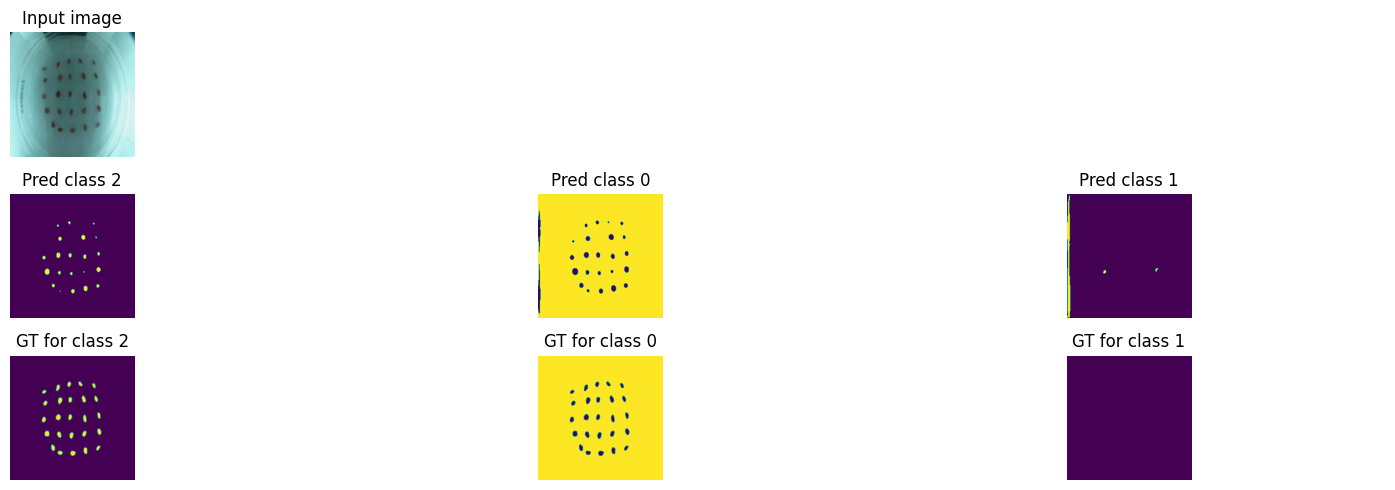

Train loss: 0.56395 | Time: 0m 57s | Val loss: 0.44898
Train_DICE_avg: 0.38508 | Train_Jaccard_avg: 0.30744 | Train_Sensitivity_avg: 0.61878 | Train_Specificity_avg: 0.70532 
Class 0 - Train_DICE: 0.53109 | Train_Jaccard: 0.43782 | Train_Sensitivity: 0.99336 | Train_Specificity: 0.14525 
Class 1 - Train_DICE: 0.07188 | Train_Jaccard: 0.05246 | Train_Sensitivity: 0.15136 | Train_Specificity: 0.98665 
Class 2 - Train_DICE: 0.55227 | Train_Jaccard: 0.43205 | Train_Sensitivity: 0.71163 | Train_Specificity: 0.98405 
Val_DICE_avg: 0.53693 | Val_Jaccard_avg: 0.49043 | Val_Sensitivity_avg: 0.91276 | Val_Specificity_avg: 0.72281 
Class 0 - Val_DICE: 0.94522 | Val_Jaccard: 0.89713 | Val_Sensitivity: 0.99643 | Val_Specificity: 0.20885 
Class 1 - Val_DICE: 0.34805 | Val_Jaccard: 0.34115 | Val_Sensitivity: 0.81727 | Val_Specificity: 0.98877 
Class 2 - Val_DICE: 0.31751 | Val_Jaccard: 0.23302 | Val_Sensitivity: 0.92460 | Val_Specificity: 0.97082 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.42841 | Time: 1m 54s | Val loss: 0.39011
Train_DICE_avg: 0.61797 | Train_Jaccard_avg: 0.55519 | Train_Sensitivity_avg: 0.92160 | Train_Specificity_avg: 0.77180 
Class 0 - Train_DICE: 0.93535 | Train_Jaccard: 0.87970 | Train_Sensitivity: 0.99722 | Train_Specificity: 0.34312 
Class 1 - Train_DICE: 0.25359 | Train_Jaccard: 0.25219 | Train_Sensitivity: 0.92175 | Train_Specificity: 0.98546 
Class 2 - Train_DICE: 0.66497 | Train_Jaccard: 0.53368 | Train_Sensitivity: 0.84583 | Train_Specificity: 0.98683 
Val_DICE_avg: 0.63611 | Val_Jaccard_avg: 0.58428 | Val_Sensitivity_avg: 0.96753 | Val_Specificity_avg: 0.77576 
Class 0 - Val_DICE: 0.97259 | Val_Jaccard: 0.94730 | Val_Sensitivity: 0.99706 | Val_Specificity: 0.36444 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.46749 | Val_Jaccard: 0.33728 | Val_Sensitivity: 0.90553 | Val_Specificity: 0.97450 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.37643 | Time: 2m 51s | Val loss: 0.34812
Train_DICE_avg: 0.64723 | Train_Jaccard_avg: 0.59139 | Train_Sensitivity_avg: 0.95056 | Train_Specificity_avg: 0.80491 
Class 0 - Train_DICE: 0.96070 | Train_Jaccard: 0.92484 | Train_Sensitivity: 0.99688 | Train_Specificity: 0.44101 
Class 1 - Train_DICE: 0.27997 | Train_Jaccard: 0.27987 | Train_Sensitivity: 0.99436 | Train_Specificity: 0.98596 
Class 2 - Train_DICE: 0.70102 | Train_Jaccard: 0.56948 | Train_Sensitivity: 0.86043 | Train_Specificity: 0.98777 
Val_DICE_avg: 0.65174 | Val_Jaccard_avg: 0.60396 | Val_Sensitivity_avg: 0.97267 | Val_Specificity_avg: 0.81523 
Class 0 - Val_DICE: 0.98518 | Val_Jaccard: 0.97092 | Val_Sensitivity: 0.99766 | Val_Specificity: 0.48069 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.50180 | Val_Jaccard: 0.37270 | Val_Sensitivity: 0.92036 | Val_Specificity: 0.97667 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.33439 | Time: 3m 49s | Val loss: 0.31305
Train_DICE_avg: 0.65531 | Train_Jaccard_avg: 0.60253 | Train_Sensitivity_avg: 0.95644 | Train_Specificity_avg: 0.82914 
Class 0 - Train_DICE: 0.97234 | Train_Jaccard: 0.94644 | Train_Sensitivity: 0.99716 | Train_Specificity: 0.51417 
Class 1 - Train_DICE: 0.27807 | Train_Jaccard: 0.27738 | Train_Sensitivity: 0.99332 | Train_Specificity: 0.98576 
Class 2 - Train_DICE: 0.71551 | Train_Jaccard: 0.58378 | Train_Sensitivity: 0.87884 | Train_Specificity: 0.98747 
Val_DICE_avg: 0.68184 | Val_Jaccard_avg: 0.62970 | Val_Sensitivity_avg: 0.97577 | Val_Specificity_avg: 0.81507 
Class 0 - Val_DICE: 0.98555 | Val_Jaccard: 0.97163 | Val_Sensitivity: 0.99873 | Val_Specificity: 0.47749 
Class 1 - Val_DICE: 0.47029 | Val_Jaccard: 0.46930 | Val_Sensitivity: 0.99970 | Val_Specificity: 0.98840 
Class 2 - Val_DICE: 0.58969 | Val_Jaccard: 0.44818 | Val_Sensitivity: 0.92887 | Val_Specificity: 0.97933 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.29797 | Time: 4m 46s | Val loss: 0.27333
Train_DICE_avg: 0.65939 | Train_Jaccard_avg: 0.60583 | Train_Sensitivity_avg: 0.96117 | Train_Specificity_avg: 0.84114 
Class 0 - Train_DICE: 0.97691 | Train_Jaccard: 0.95506 | Train_Sensitivity: 0.99699 | Train_Specificity: 0.55129 
Class 1 - Train_DICE: 0.28864 | Train_Jaccard: 0.28290 | Train_Sensitivity: 0.99059 | Train_Specificity: 0.98567 
Class 2 - Train_DICE: 0.71261 | Train_Jaccard: 0.57953 | Train_Sensitivity: 0.89594 | Train_Specificity: 0.98647 
Val_DICE_avg: 0.69011 | Val_Jaccard_avg: 0.63178 | Val_Sensitivity_avg: 0.97759 | Val_Specificity_avg: 0.82919 
Class 0 - Val_DICE: 0.98645 | Val_Jaccard: 0.97353 | Val_Sensitivity: 0.99892 | Val_Specificity: 0.51903 
Class 1 - Val_DICE: 0.52082 | Val_Jaccard: 0.49813 | Val_Sensitivity: 0.97296 | Val_Specificity: 0.99020 
Class 2 - Val_DICE: 0.56307 | Val_Jaccard: 0.42367 | Val_Sensitivity: 0.96088 | Val_Specificity: 0.97835 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


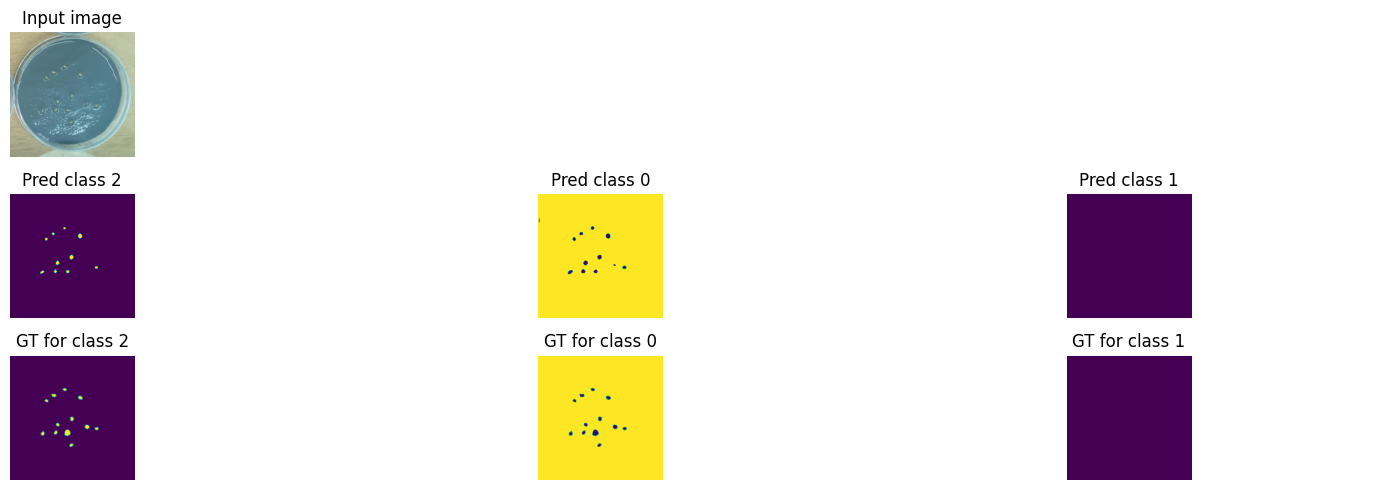

Train loss: 0.26246 | Time: 5m 44s | Val loss: 0.24390
Train_DICE_avg: 0.67654 | Train_Jaccard_avg: 0.62014 | Train_Sensitivity_avg: 0.95587 | Train_Specificity_avg: 0.85589 
Class 0 - Train_DICE: 0.98061 | Train_Jaccard: 0.96209 | Train_Sensitivity: 0.99684 | Train_Specificity: 0.59409 
Class 1 - Train_DICE: 0.32578 | Train_Jaccard: 0.30805 | Train_Sensitivity: 0.96753 | Train_Specificity: 0.98680 
Class 2 - Train_DICE: 0.72324 | Train_Jaccard: 0.59027 | Train_Sensitivity: 0.90322 | Train_Specificity: 0.98679 
Val_DICE_avg: 0.72433 | Val_Jaccard_avg: 0.66164 | Val_Sensitivity_avg: 0.97221 | Val_Specificity_avg: 0.82094 
Class 0 - Val_DICE: 0.98705 | Val_Jaccard: 0.97451 | Val_Sensitivity: 0.99909 | Val_Specificity: 0.49120 
Class 1 - Val_DICE: 0.54732 | Val_Jaccard: 0.51650 | Val_Sensitivity: 0.95635 | Val_Specificity: 0.99064 
Class 2 - Val_DICE: 0.63862 | Val_Jaccard: 0.49392 | Val_Sensitivity: 0.96121 | Val_Specificity: 0.98097 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.23121 | Time: 6m 42s | Val loss: 0.21194
Train_DICE_avg: 0.68717 | Train_Jaccard_avg: 0.62715 | Train_Sensitivity_avg: 0.95014 | Train_Specificity_avg: 0.86534 
Class 0 - Train_DICE: 0.98274 | Train_Jaccard: 0.96616 | Train_Sensitivity: 0.99636 | Train_Specificity: 0.62252 
Class 1 - Train_DICE: 0.35283 | Train_Jaccard: 0.32365 | Train_Sensitivity: 0.94693 | Train_Specificity: 0.98705 
Class 2 - Train_DICE: 0.72595 | Train_Jaccard: 0.59165 | Train_Sensitivity: 0.90712 | Train_Specificity: 0.98646 
Val_DICE_avg: 0.73817 | Val_Jaccard_avg: 0.67309 | Val_Sensitivity_avg: 0.97122 | Val_Specificity_avg: 0.83392 
Class 0 - Val_DICE: 0.98877 | Val_Jaccard: 0.97785 | Val_Sensitivity: 0.99904 | Val_Specificity: 0.52936 
Class 1 - Val_DICE: 0.57289 | Val_Jaccard: 0.53547 | Val_Sensitivity: 0.95894 | Val_Specificity: 0.99099 
Class 2 - Val_DICE: 0.65285 | Val_Jaccard: 0.50594 | Val_Sensitivity: 0.95567 | Val_Specificity: 0.98142 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.20450 | Time: 7m 40s | Val loss: 0.19240
Train_DICE_avg: 0.70043 | Train_Jaccard_avg: 0.63797 | Train_Sensitivity_avg: 0.94660 | Train_Specificity_avg: 0.87349 
Class 0 - Train_DICE: 0.98452 | Train_Jaccard: 0.96959 | Train_Sensitivity: 0.99632 | Train_Specificity: 0.64625 
Class 1 - Train_DICE: 0.38485 | Train_Jaccard: 0.34673 | Train_Sensitivity: 0.93152 | Train_Specificity: 0.98769 
Class 2 - Train_DICE: 0.73191 | Train_Jaccard: 0.59760 | Train_Sensitivity: 0.91196 | Train_Specificity: 0.98655 
Val_DICE_avg: 0.78337 | Val_Jaccard_avg: 0.71687 | Val_Sensitivity_avg: 0.96016 | Val_Specificity_avg: 0.80302 
Class 0 - Val_DICE: 0.98290 | Val_Jaccard: 0.96650 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.43097 
Class 1 - Val_DICE: 0.62497 | Val_Jaccard: 0.57717 | Val_Sensitivity: 0.93460 | Val_Specificity: 0.99261 
Class 2 - Val_DICE: 0.74224 | Val_Jaccard: 0.60695 | Val_Sensitivity: 0.94643 | Val_Specificity: 0.98547 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.18166 | Time: 8m 37s | Val loss: 0.16691
Train_DICE_avg: 0.70626 | Train_Jaccard_avg: 0.64245 | Train_Sensitivity_avg: 0.94613 | Train_Specificity_avg: 0.87825 
Class 0 - Train_DICE: 0.98520 | Train_Jaccard: 0.97093 | Train_Sensitivity: 0.99576 | Train_Specificity: 0.66030 
Class 1 - Train_DICE: 0.40269 | Train_Jaccard: 0.36002 | Train_Sensitivity: 0.92782 | Train_Specificity: 0.98795 
Class 2 - Train_DICE: 0.73089 | Train_Jaccard: 0.59639 | Train_Sensitivity: 0.91481 | Train_Specificity: 0.98649 
Val_DICE_avg: 0.74620 | Val_Jaccard_avg: 0.67890 | Val_Sensitivity_avg: 0.96420 | Val_Specificity_avg: 0.83330 
Class 0 - Val_DICE: 0.98851 | Val_Jaccard: 0.97735 | Val_Sensitivity: 0.99916 | Val_Specificity: 0.52586 
Class 1 - Val_DICE: 0.59408 | Val_Jaccard: 0.54639 | Val_Sensitivity: 0.92878 | Val_Specificity: 0.99206 
Class 2 - Val_DICE: 0.65602 | Val_Jaccard: 0.51297 | Val_Sensitivity: 0.96467 | Val_Specificity: 0.98200 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.16047 | Time: 9m 34s | Val loss: 0.14788
Train_DICE_avg: 0.71381 | Train_Jaccard_avg: 0.64836 | Train_Sensitivity_avg: 0.94546 | Train_Specificity_avg: 0.88369 
Class 0 - Train_DICE: 0.98670 | Train_Jaccard: 0.97381 | Train_Sensitivity: 0.99608 | Train_Specificity: 0.67687 
Class 1 - Train_DICE: 0.42149 | Train_Jaccard: 0.37283 | Train_Sensitivity: 0.91818 | Train_Specificity: 0.98798 
Class 2 - Train_DICE: 0.73326 | Train_Jaccard: 0.59843 | Train_Sensitivity: 0.92211 | Train_Specificity: 0.98622 
Val_DICE_avg: 0.74978 | Val_Jaccard_avg: 0.67950 | Val_Sensitivity_avg: 0.94956 | Val_Specificity_avg: 0.83745 
Class 0 - Val_DICE: 0.98894 | Val_Jaccard: 0.97819 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.53784 
Class 1 - Val_DICE: 0.59960 | Val_Jaccard: 0.54578 | Val_Sensitivity: 0.87903 | Val_Specificity: 0.99302 
Class 2 - Val_DICE: 0.66079 | Val_Jaccard: 0.51453 | Val_Sensitivity: 0.97047 | Val_Specificity: 0.98149 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


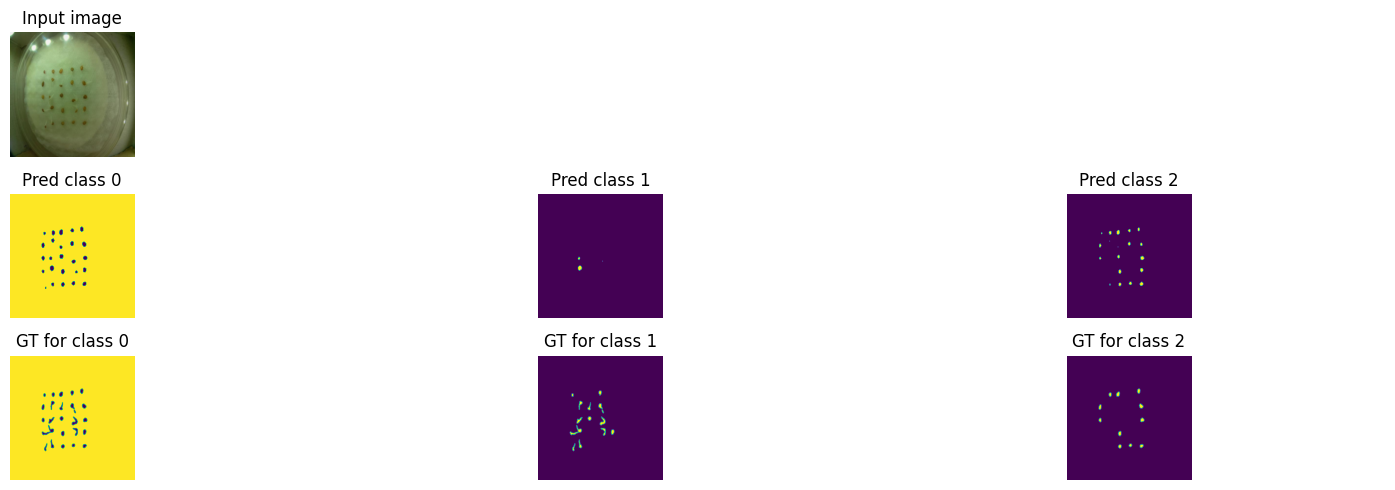

Train loss: 0.14046 | Time: 10m 35s | Val loss: 0.12554
Train_DICE_avg: 0.71603 | Train_Jaccard_avg: 0.65023 | Train_Sensitivity_avg: 0.94694 | Train_Specificity_avg: 0.88902 
Class 0 - Train_DICE: 0.98724 | Train_Jaccard: 0.97487 | Train_Sensitivity: 0.99570 | Train_Specificity: 0.69239 
Class 1 - Train_DICE: 0.42888 | Train_Jaccard: 0.37884 | Train_Sensitivity: 0.92254 | Train_Specificity: 0.98845 
Class 2 - Train_DICE: 0.73197 | Train_Jaccard: 0.59700 | Train_Sensitivity: 0.92258 | Train_Specificity: 0.98622 
Val_DICE_avg: 0.76394 | Val_Jaccard_avg: 0.69854 | Val_Sensitivity_avg: 0.97036 | Val_Specificity_avg: 0.84019 
Class 0 - Val_DICE: 0.98868 | Val_Jaccard: 0.97771 | Val_Sensitivity: 0.99917 | Val_Specificity: 0.54467 
Class 1 - Val_DICE: 0.61131 | Val_Jaccard: 0.56570 | Val_Sensitivity: 0.95459 | Val_Specificity: 0.99186 
Class 2 - Val_DICE: 0.69182 | Val_Jaccard: 0.55221 | Val_Sensitivity: 0.95731 | Val_Specificity: 0.98403 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.12001 | Time: 11m 35s | Val loss: 0.10630
Train_DICE_avg: 0.72193 | Train_Jaccard_avg: 0.65642 | Train_Sensitivity_avg: 0.94909 | Train_Specificity_avg: 0.89308 
Class 0 - Train_DICE: 0.98804 | Train_Jaccard: 0.97642 | Train_Sensitivity: 0.99577 | Train_Specificity: 0.70419 
Class 1 - Train_DICE: 0.43643 | Train_Jaccard: 0.38558 | Train_Sensitivity: 0.92737 | Train_Specificity: 0.98854 
Class 2 - Train_DICE: 0.74131 | Train_Jaccard: 0.60727 | Train_Sensitivity: 0.92413 | Train_Specificity: 0.98651 
Val_DICE_avg: 0.75844 | Val_Jaccard_avg: 0.68660 | Val_Sensitivity_avg: 0.95572 | Val_Specificity_avg: 0.84794 
Class 0 - Val_DICE: 0.99065 | Val_Jaccard: 0.98152 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.57019 
Class 1 - Val_DICE: 0.61989 | Val_Jaccard: 0.56492 | Val_Sensitivity: 0.89837 | Val_Specificity: 0.99296 
Class 2 - Val_DICE: 0.66477 | Val_Jaccard: 0.51337 | Val_Sensitivity: 0.96956 | Val_Specificity: 0.98068 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.10390 | Time: 12m 35s | Val loss: 0.09305
Train_DICE_avg: 0.72085 | Train_Jaccard_avg: 0.65519 | Train_Sensitivity_avg: 0.94817 | Train_Specificity_avg: 0.89390 
Class 0 - Train_DICE: 0.98869 | Train_Jaccard: 0.97769 | Train_Sensitivity: 0.99600 | Train_Specificity: 0.70737 
Class 1 - Train_DICE: 0.43333 | Train_Jaccard: 0.38116 | Train_Sensitivity: 0.92076 | Train_Specificity: 0.98805 
Class 2 - Train_DICE: 0.74052 | Train_Jaccard: 0.60673 | Train_Sensitivity: 0.92774 | Train_Specificity: 0.98627 
Val_DICE_avg: 0.77213 | Val_Jaccard_avg: 0.70452 | Val_Sensitivity_avg: 0.97313 | Val_Specificity_avg: 0.84061 
Class 0 - Val_DICE: 0.98939 | Val_Jaccard: 0.97905 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.54568 
Class 1 - Val_DICE: 0.62190 | Val_Jaccard: 0.57104 | Val_Sensitivity: 0.95428 | Val_Specificity: 0.99229 
Class 2 - Val_DICE: 0.70511 | Val_Jaccard: 0.56348 | Val_Sensitivity: 0.96585 | Val_Specificity: 0.98386 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.09088 | Time: 13m 35s | Val loss: 0.08056
Train_DICE_avg: 0.73201 | Train_Jaccard_avg: 0.66564 | Train_Sensitivity_avg: 0.95013 | Train_Specificity_avg: 0.90010 
Class 0 - Train_DICE: 0.98919 | Train_Jaccard: 0.97866 | Train_Sensitivity: 0.99595 | Train_Specificity: 0.72460 
Class 1 - Train_DICE: 0.45823 | Train_Jaccard: 0.40101 | Train_Sensitivity: 0.92579 | Train_Specificity: 0.98877 
Class 2 - Train_DICE: 0.74861 | Train_Jaccard: 0.61727 | Train_Sensitivity: 0.92866 | Train_Specificity: 0.98693 
Val_DICE_avg: 0.77101 | Val_Jaccard_avg: 0.70472 | Val_Sensitivity_avg: 0.96488 | Val_Specificity_avg: 0.84889 
Class 0 - Val_DICE: 0.99057 | Val_Jaccard: 0.98135 | Val_Sensitivity: 0.99914 | Val_Specificity: 0.57065 
Class 1 - Val_DICE: 0.59357 | Val_Jaccard: 0.54589 | Val_Sensitivity: 0.93458 | Val_Specificity: 0.99186 
Class 2 - Val_DICE: 0.72890 | Val_Jaccard: 0.58691 | Val_Sensitivity: 0.96091 | Val_Specificity: 0.98417 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.08036 | Time: 14m 34s | Val loss: 0.07185
Train_DICE_avg: 0.73639 | Train_Jaccard_avg: 0.67066 | Train_Sensitivity_avg: 0.95092 | Train_Specificity_avg: 0.90033 
Class 0 - Train_DICE: 0.98959 | Train_Jaccard: 0.97944 | Train_Sensitivity: 0.99593 | Train_Specificity: 0.72499 
Class 1 - Train_DICE: 0.45766 | Train_Jaccard: 0.40105 | Train_Sensitivity: 0.92664 | Train_Specificity: 0.98869 
Class 2 - Train_DICE: 0.76190 | Train_Jaccard: 0.63150 | Train_Sensitivity: 0.93019 | Train_Specificity: 0.98730 
Val_DICE_avg: 0.77113 | Val_Jaccard_avg: 0.70144 | Val_Sensitivity_avg: 0.96716 | Val_Specificity_avg: 0.85671 
Class 0 - Val_DICE: 0.99128 | Val_Jaccard: 0.98275 | Val_Sensitivity: 0.99920 | Val_Specificity: 0.59523 
Class 1 - Val_DICE: 0.63061 | Val_Jaccard: 0.57619 | Val_Sensitivity: 0.93090 | Val_Specificity: 0.99229 
Class 2 - Val_DICE: 0.69151 | Val_Jaccard: 0.54537 | Val_Sensitivity: 0.97138 | Val_Specificity: 0.98261 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


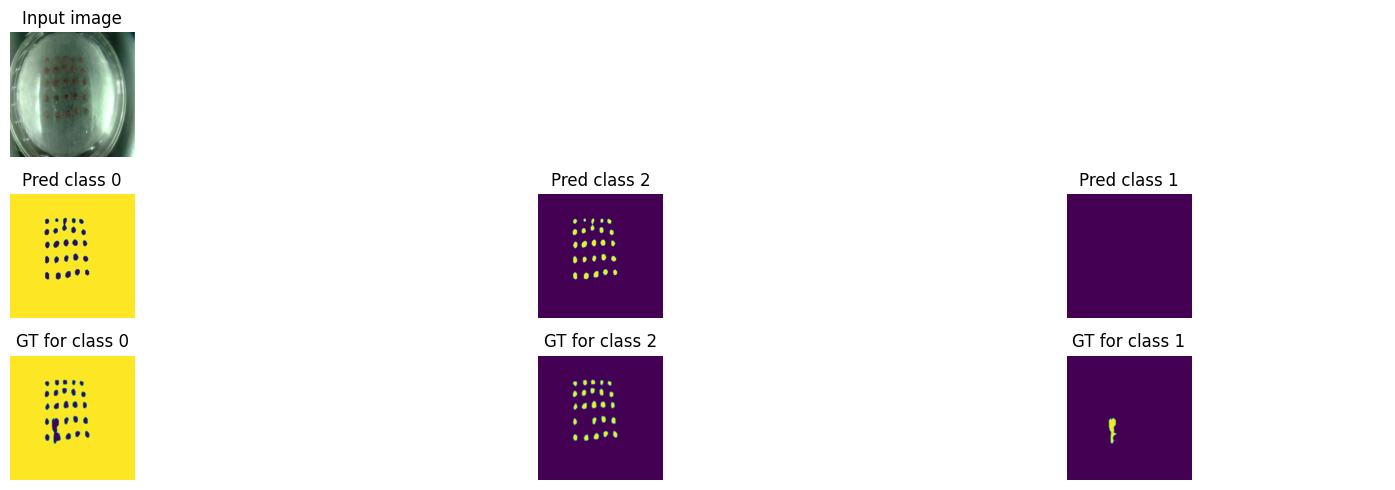

Train loss: 0.07172 | Time: 15m 35s | Val loss: 0.06319
Train_DICE_avg: 0.73654 | Train_Jaccard_avg: 0.67162 | Train_Sensitivity_avg: 0.95205 | Train_Specificity_avg: 0.90424 
Class 0 - Train_DICE: 0.98996 | Train_Jaccard: 0.98017 | Train_Sensitivity: 0.99591 | Train_Specificity: 0.73640 
Class 1 - Train_DICE: 0.45258 | Train_Jaccard: 0.39567 | Train_Sensitivity: 0.93127 | Train_Specificity: 0.98867 
Class 2 - Train_DICE: 0.76708 | Train_Jaccard: 0.63903 | Train_Sensitivity: 0.92898 | Train_Specificity: 0.98764 
Val_DICE_avg: 0.78824 | Val_Jaccard_avg: 0.71665 | Val_Sensitivity_avg: 0.97136 | Val_Specificity_avg: 0.85418 
Class 0 - Val_DICE: 0.99087 | Val_Jaccard: 0.98196 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.58622 
Class 1 - Val_DICE: 0.67281 | Val_Jaccard: 0.61182 | Val_Sensitivity: 0.94039 | Val_Specificity: 0.99327 
Class 2 - Val_DICE: 0.70104 | Val_Jaccard: 0.55617 | Val_Sensitivity: 0.97432 | Val_Specificity: 0.98305 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.06491 | Time: 16m 35s | Val loss: 0.05752
Train_DICE_avg: 0.74156 | Train_Jaccard_avg: 0.67592 | Train_Sensitivity_avg: 0.95046 | Train_Specificity_avg: 0.90572 
Class 0 - Train_DICE: 0.99007 | Train_Jaccard: 0.98039 | Train_Sensitivity: 0.99579 | Train_Specificity: 0.74081 
Class 1 - Train_DICE: 0.46313 | Train_Jaccard: 0.40342 | Train_Sensitivity: 0.92542 | Train_Specificity: 0.98860 
Class 2 - Train_DICE: 0.77149 | Train_Jaccard: 0.64395 | Train_Sensitivity: 0.93019 | Train_Specificity: 0.98774 
Val_DICE_avg: 0.78285 | Val_Jaccard_avg: 0.71153 | Val_Sensitivity_avg: 0.96865 | Val_Specificity_avg: 0.85033 
Class 0 - Val_DICE: 0.99077 | Val_Jaccard: 0.98175 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.57505 
Class 1 - Val_DICE: 0.66178 | Val_Jaccard: 0.60103 | Val_Sensitivity: 0.93266 | Val_Specificity: 0.99323 
Class 2 - Val_DICE: 0.69601 | Val_Jaccard: 0.55181 | Val_Sensitivity: 0.97397 | Val_Specificity: 0.98273 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.05896 | Time: 17m 35s | Val loss: 0.05148
Train_DICE_avg: 0.74714 | Train_Jaccard_avg: 0.68118 | Train_Sensitivity_avg: 0.94876 | Train_Specificity_avg: 0.90647 
Class 0 - Train_DICE: 0.99034 | Train_Jaccard: 0.98091 | Train_Sensitivity: 0.99594 | Train_Specificity: 0.74240 
Class 1 - Train_DICE: 0.47591 | Train_Jaccard: 0.41371 | Train_Sensitivity: 0.91881 | Train_Specificity: 0.98899 
Class 2 - Train_DICE: 0.77518 | Train_Jaccard: 0.64893 | Train_Sensitivity: 0.93152 | Train_Specificity: 0.98803 
Val_DICE_avg: 0.78873 | Val_Jaccard_avg: 0.71880 | Val_Sensitivity_avg: 0.96386 | Val_Specificity_avg: 0.85877 
Class 0 - Val_DICE: 0.99130 | Val_Jaccard: 0.98280 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.59973 
Class 1 - Val_DICE: 0.65581 | Val_Jaccard: 0.59995 | Val_Sensitivity: 0.92764 | Val_Specificity: 0.99319 
Class 2 - Val_DICE: 0.71908 | Val_Jaccard: 0.57365 | Val_Sensitivity: 0.96460 | Val_Specificity: 0.98339 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.05388 | Time: 18m 34s | Val loss: 0.04693
Train_DICE_avg: 0.75274 | Train_Jaccard_avg: 0.68679 | Train_Sensitivity_avg: 0.94991 | Train_Specificity_avg: 0.90708 
Class 0 - Train_DICE: 0.99047 | Train_Jaccard: 0.98117 | Train_Sensitivity: 0.99598 | Train_Specificity: 0.74401 
Class 1 - Train_DICE: 0.48926 | Train_Jaccard: 0.42650 | Train_Sensitivity: 0.92109 | Train_Specificity: 0.98926 
Class 2 - Train_DICE: 0.77849 | Train_Jaccard: 0.65269 | Train_Sensitivity: 0.93265 | Train_Specificity: 0.98798 
Val_DICE_avg: 0.79165 | Val_Jaccard_avg: 0.72060 | Val_Sensitivity_avg: 0.96732 | Val_Specificity_avg: 0.85723 
Class 0 - Val_DICE: 0.99146 | Val_Jaccard: 0.98311 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.59477 
Class 1 - Val_DICE: 0.65319 | Val_Jaccard: 0.59158 | Val_Sensitivity: 0.93302 | Val_Specificity: 0.99296 
Class 2 - Val_DICE: 0.73030 | Val_Jaccard: 0.58711 | Val_Sensitivity: 0.96966 | Val_Specificity: 0.98395 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.04941 | Time: 19m 34s | Val loss: 0.04365
Train_DICE_avg: 0.75639 | Train_Jaccard_avg: 0.68984 | Train_Sensitivity_avg: 0.94958 | Train_Specificity_avg: 0.90917 
Class 0 - Train_DICE: 0.99074 | Train_Jaccard: 0.98169 | Train_Sensitivity: 0.99609 | Train_Specificity: 0.75006 
Class 1 - Train_DICE: 0.49645 | Train_Jaccard: 0.43117 | Train_Sensitivity: 0.91957 | Train_Specificity: 0.98923 
Class 2 - Train_DICE: 0.78199 | Train_Jaccard: 0.65664 | Train_Sensitivity: 0.93307 | Train_Specificity: 0.98822 
Val_DICE_avg: 0.80309 | Val_Jaccard_avg: 0.73213 | Val_Sensitivity_avg: 0.96199 | Val_Specificity_avg: 0.85266 
Class 0 - Val_DICE: 0.99068 | Val_Jaccard: 0.98160 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.57993 
Class 1 - Val_DICE: 0.69327 | Val_Jaccard: 0.63249 | Val_Sensitivity: 0.91353 | Val_Specificity: 0.99428 
Class 2 - Val_DICE: 0.72533 | Val_Jaccard: 0.58229 | Val_Sensitivity: 0.97300 | Val_Specificity: 0.98376 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


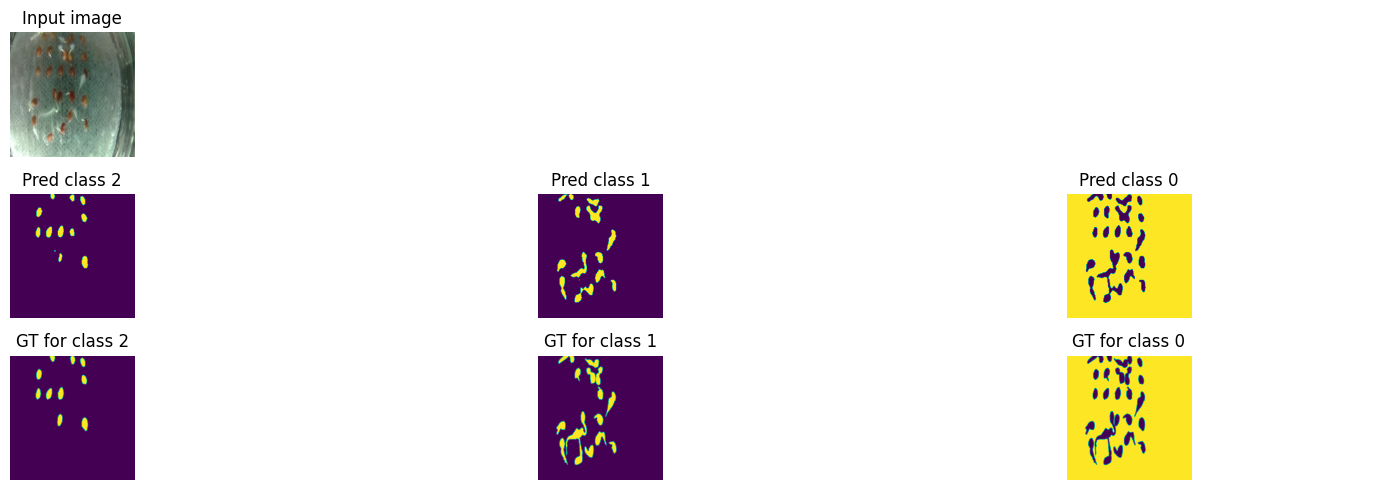

Train loss: 0.04483 | Time: 20m 35s | Val loss: 0.03687
Train_DICE_avg: 0.75162 | Train_Jaccard_avg: 0.68564 | Train_Sensitivity_avg: 0.94819 | Train_Specificity_avg: 0.91101 
Class 0 - Train_DICE: 0.99085 | Train_Jaccard: 0.98190 | Train_Sensitivity: 0.99595 | Train_Specificity: 0.75552 
Class 1 - Train_DICE: 0.48080 | Train_Jaccard: 0.41594 | Train_Sensitivity: 0.91844 | Train_Specificity: 0.98909 
Class 2 - Train_DICE: 0.78321 | Train_Jaccard: 0.65907 | Train_Sensitivity: 0.93019 | Train_Specificity: 0.98843 
Val_DICE_avg: 0.80165 | Val_Jaccard_avg: 0.72975 | Val_Sensitivity_avg: 0.96466 | Val_Specificity_avg: 0.85329 
Class 0 - Val_DICE: 0.99088 | Val_Jaccard: 0.98196 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.58218 
Class 1 - Val_DICE: 0.69237 | Val_Jaccard: 0.62611 | Val_Sensitivity: 0.91689 | Val_Specificity: 0.99361 
Class 2 - Val_DICE: 0.72169 | Val_Jaccard: 0.58117 | Val_Sensitivity: 0.97768 | Val_Specificity: 0.98409 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.03947 | Time: 21m 35s | Val loss: 0.03268
Train_DICE_avg: 0.75461 | Train_Jaccard_avg: 0.68753 | Train_Sensitivity_avg: 0.94936 | Train_Specificity_avg: 0.90984 
Class 0 - Train_DICE: 0.99100 | Train_Jaccard: 0.98221 | Train_Sensitivity: 0.99624 | Train_Specificity: 0.75232 
Class 1 - Train_DICE: 0.48869 | Train_Jaccard: 0.42131 | Train_Sensitivity: 0.91505 | Train_Specificity: 0.98911 
Class 2 - Train_DICE: 0.78413 | Train_Jaccard: 0.65907 | Train_Sensitivity: 0.93677 | Train_Specificity: 0.98809 
Val_DICE_avg: 0.79355 | Val_Jaccard_avg: 0.72455 | Val_Sensitivity_avg: 0.97083 | Val_Specificity_avg: 0.86133 
Class 0 - Val_DICE: 0.99167 | Val_Jaccard: 0.98352 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60651 
Class 1 - Val_DICE: 0.66486 | Val_Jaccard: 0.60693 | Val_Sensitivity: 0.94209 | Val_Specificity: 0.99327 
Class 2 - Val_DICE: 0.72412 | Val_Jaccard: 0.58320 | Val_Sensitivity: 0.97105 | Val_Specificity: 0.98423 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.03566 | Time: 22m 35s | Val loss: 0.02955
Train_DICE_avg: 0.76121 | Train_Jaccard_avg: 0.69494 | Train_Sensitivity_avg: 0.94930 | Train_Specificity_avg: 0.91205 
Class 0 - Train_DICE: 0.99126 | Train_Jaccard: 0.98271 | Train_Sensitivity: 0.99626 | Train_Specificity: 0.75825 
Class 1 - Train_DICE: 0.50408 | Train_Jaccard: 0.43706 | Train_Sensitivity: 0.91566 | Train_Specificity: 0.98942 
Class 2 - Train_DICE: 0.78829 | Train_Jaccard: 0.66504 | Train_Sensitivity: 0.93597 | Train_Specificity: 0.98847 
Val_DICE_avg: 0.79515 | Val_Jaccard_avg: 0.72445 | Val_Sensitivity_avg: 0.96974 | Val_Specificity_avg: 0.86291 
Class 0 - Val_DICE: 0.99190 | Val_Jaccard: 0.98397 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.61147 
Class 1 - Val_DICE: 0.66624 | Val_Jaccard: 0.60444 | Val_Sensitivity: 0.93499 | Val_Specificity: 0.99331 
Class 2 - Val_DICE: 0.72730 | Val_Jaccard: 0.58494 | Val_Sensitivity: 0.97492 | Val_Specificity: 0.98396 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.03295 | Time: 23m 36s | Val loss: 0.02772
Train_DICE_avg: 0.76638 | Train_Jaccard_avg: 0.69984 | Train_Sensitivity_avg: 0.94815 | Train_Specificity_avg: 0.91317 
Class 0 - Train_DICE: 0.99126 | Train_Jaccard: 0.98271 | Train_Sensitivity: 0.99630 | Train_Specificity: 0.76107 
Class 1 - Train_DICE: 0.51440 | Train_Jaccard: 0.44478 | Train_Sensitivity: 0.90950 | Train_Specificity: 0.98971 
Class 2 - Train_DICE: 0.79348 | Train_Jaccard: 0.67201 | Train_Sensitivity: 0.93865 | Train_Specificity: 0.98872 
Val_DICE_avg: 0.81011 | Val_Jaccard_avg: 0.73895 | Val_Sensitivity_avg: 0.95314 | Val_Specificity_avg: 0.85008 
Class 0 - Val_DICE: 0.99024 | Val_Jaccard: 0.98074 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.57064 
Class 1 - Val_DICE: 0.69466 | Val_Jaccard: 0.62719 | Val_Sensitivity: 0.88117 | Val_Specificity: 0.99456 
Class 2 - Val_DICE: 0.74543 | Val_Jaccard: 0.60893 | Val_Sensitivity: 0.97883 | Val_Specificity: 0.98505 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.03115 | Time: 24m 38s | Val loss: 0.02609
Train_DICE_avg: 0.77109 | Train_Jaccard_avg: 0.70469 | Train_Sensitivity_avg: 0.94656 | Train_Specificity_avg: 0.91390 
Class 0 - Train_DICE: 0.99132 | Train_Jaccard: 0.98283 | Train_Sensitivity: 0.99614 | Train_Specificity: 0.76314 
Class 1 - Train_DICE: 0.52898 | Train_Jaccard: 0.45981 | Train_Sensitivity: 0.90769 | Train_Specificity: 0.98982 
Class 2 - Train_DICE: 0.79296 | Train_Jaccard: 0.67143 | Train_Sensitivity: 0.93585 | Train_Specificity: 0.98875 
Val_DICE_avg: 0.79957 | Val_Jaccard_avg: 0.72481 | Val_Sensitivity_avg: 0.95550 | Val_Specificity_avg: 0.86458 
Class 0 - Val_DICE: 0.99201 | Val_Jaccard: 0.98419 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.61654 
Class 1 - Val_DICE: 0.71917 | Val_Jaccard: 0.64806 | Val_Sensitivity: 0.88303 | Val_Specificity: 0.99487 
Class 2 - Val_DICE: 0.68754 | Val_Jaccard: 0.54218 | Val_Sensitivity: 0.98407 | Val_Specificity: 0.98233 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


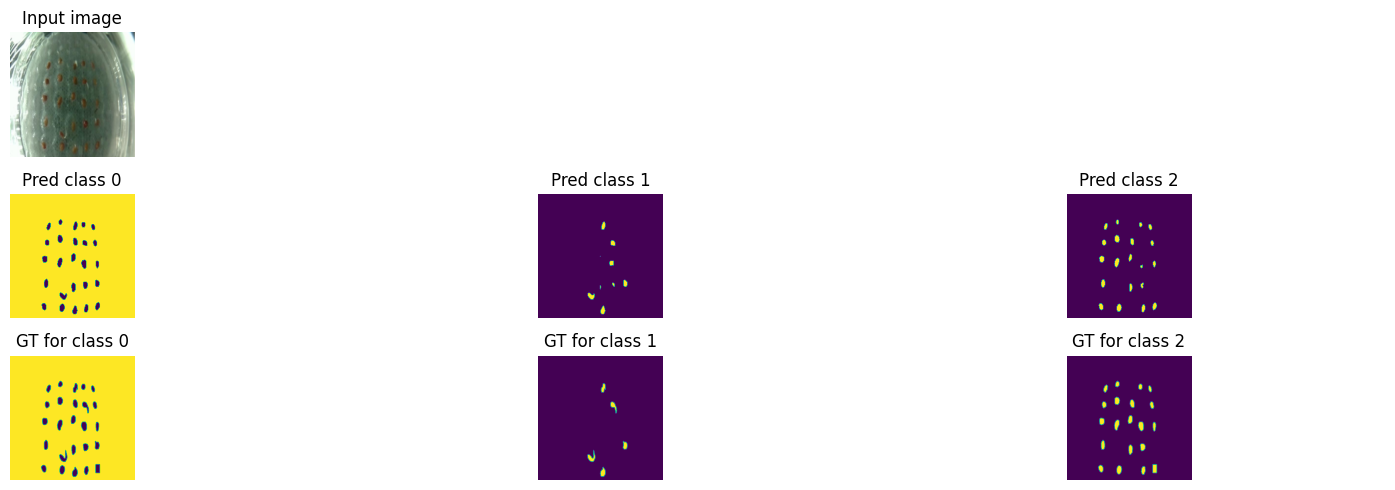

Train loss: 0.02899 | Time: 25m 39s | Val loss: 0.02392
Train_DICE_avg: 0.77126 | Train_Jaccard_avg: 0.70500 | Train_Sensitivity_avg: 0.94507 | Train_Specificity_avg: 0.91383 
Class 0 - Train_DICE: 0.99164 | Train_Jaccard: 0.98346 | Train_Sensitivity: 0.99653 | Train_Specificity: 0.76267 
Class 1 - Train_DICE: 0.52586 | Train_Jaccard: 0.45624 | Train_Sensitivity: 0.90183 | Train_Specificity: 0.99000 
Class 2 - Train_DICE: 0.79629 | Train_Jaccard: 0.67531 | Train_Sensitivity: 0.93686 | Train_Specificity: 0.98881 
Val_DICE_avg: 0.79681 | Val_Jaccard_avg: 0.72396 | Val_Sensitivity_avg: 0.96025 | Val_Specificity_avg: 0.86200 
Class 0 - Val_DICE: 0.99198 | Val_Jaccard: 0.98412 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.60850 
Class 1 - Val_DICE: 0.68539 | Val_Jaccard: 0.61676 | Val_Sensitivity: 0.89992 | Val_Specificity: 0.99395 
Class 2 - Val_DICE: 0.71306 | Val_Jaccard: 0.57099 | Val_Sensitivity: 0.98148 | Val_Specificity: 0.98354 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.02781 | Time: 26m 41s | Val loss: 0.02339
Train_DICE_avg: 0.77238 | Train_Jaccard_avg: 0.70548 | Train_Sensitivity_avg: 0.94574 | Train_Specificity_avg: 0.91288 
Class 0 - Train_DICE: 0.99153 | Train_Jaccard: 0.98324 | Train_Sensitivity: 0.99649 | Train_Specificity: 0.76003 
Class 1 - Train_DICE: 0.53276 | Train_Jaccard: 0.46174 | Train_Sensitivity: 0.90220 | Train_Specificity: 0.98999 
Class 2 - Train_DICE: 0.79284 | Train_Jaccard: 0.67147 | Train_Sensitivity: 0.93853 | Train_Specificity: 0.98861 
Val_DICE_avg: 0.82398 | Val_Jaccard_avg: 0.75481 | Val_Sensitivity_avg: 0.96318 | Val_Specificity_avg: 0.85135 
Class 0 - Val_DICE: 0.99037 | Val_Jaccard: 0.98099 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.57310 
Class 1 - Val_DICE: 0.71414 | Val_Jaccard: 0.64573 | Val_Sensitivity: 0.91872 | Val_Specificity: 0.99423 
Class 2 - Val_DICE: 0.76744 | Val_Jaccard: 0.63772 | Val_Sensitivity: 0.97140 | Val_Specificity: 0.98673 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.02681 | Time: 27m 42s | Val loss: 0.02185
Train_DICE_avg: 0.77539 | Train_Jaccard_avg: 0.70866 | Train_Sensitivity_avg: 0.94531 | Train_Specificity_avg: 0.91456 
Class 0 - Train_DICE: 0.99163 | Train_Jaccard: 0.98344 | Train_Sensitivity: 0.99646 | Train_Specificity: 0.76467 
Class 1 - Train_DICE: 0.53624 | Train_Jaccard: 0.46472 | Train_Sensitivity: 0.90160 | Train_Specificity: 0.99011 
Class 2 - Train_DICE: 0.79830 | Train_Jaccard: 0.67783 | Train_Sensitivity: 0.93788 | Train_Specificity: 0.98889 
Val_DICE_avg: 0.79820 | Val_Jaccard_avg: 0.72831 | Val_Sensitivity_avg: 0.96336 | Val_Specificity_avg: 0.87393 
Class 0 - Val_DICE: 0.99293 | Val_Jaccard: 0.98599 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.64422 
Class 1 - Val_DICE: 0.67313 | Val_Jaccard: 0.61321 | Val_Sensitivity: 0.92213 | Val_Specificity: 0.99347 
Class 2 - Val_DICE: 0.72855 | Val_Jaccard: 0.58574 | Val_Sensitivity: 0.96871 | Val_Specificity: 0.98410 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.02602 | Time: 28m 44s | Val loss: 0.02056
Train_DICE_avg: 0.77487 | Train_Jaccard_avg: 0.70869 | Train_Sensitivity_avg: 0.94308 | Train_Specificity_avg: 0.91496 
Class 0 - Train_DICE: 0.99158 | Train_Jaccard: 0.98334 | Train_Sensitivity: 0.99655 | Train_Specificity: 0.76549 
Class 1 - Train_DICE: 0.53375 | Train_Jaccard: 0.46250 | Train_Sensitivity: 0.89497 | Train_Specificity: 0.99033 
Class 2 - Train_DICE: 0.79929 | Train_Jaccard: 0.68023 | Train_Sensitivity: 0.93773 | Train_Specificity: 0.98906 
Val_DICE_avg: 0.81633 | Val_Jaccard_avg: 0.74515 | Val_Sensitivity_avg: 0.96552 | Val_Specificity_avg: 0.86382 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98436 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.61242 
Class 1 - Val_DICE: 0.70064 | Val_Jaccard: 0.63148 | Val_Sensitivity: 0.92505 | Val_Specificity: 0.99366 
Class 2 - Val_DICE: 0.75624 | Val_Jaccard: 0.61959 | Val_Sensitivity: 0.97218 | Val_Specificity: 0.98538 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.02502 | Time: 29m 45s | Val loss: 0.01986
Train_DICE_avg: 0.77767 | Train_Jaccard_avg: 0.71093 | Train_Sensitivity_avg: 0.94587 | Train_Specificity_avg: 0.91450 
Class 0 - Train_DICE: 0.99170 | Train_Jaccard: 0.98358 | Train_Sensitivity: 0.99660 | Train_Specificity: 0.76458 
Class 1 - Train_DICE: 0.54041 | Train_Jaccard: 0.46805 | Train_Sensitivity: 0.90092 | Train_Specificity: 0.99018 
Class 2 - Train_DICE: 0.80091 | Train_Jaccard: 0.68115 | Train_Sensitivity: 0.94008 | Train_Specificity: 0.98876 
Val_DICE_avg: 0.82087 | Val_Jaccard_avg: 0.75074 | Val_Sensitivity_avg: 0.96789 | Val_Specificity_avg: 0.85983 
Class 0 - Val_DICE: 0.99149 | Val_Jaccard: 0.98318 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.59983 
Class 1 - Val_DICE: 0.71164 | Val_Jaccard: 0.64505 | Val_Sensitivity: 0.93263 | Val_Specificity: 0.99415 
Class 2 - Val_DICE: 0.75948 | Val_Jaccard: 0.62398 | Val_Sensitivity: 0.97164 | Val_Specificity: 0.98551 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


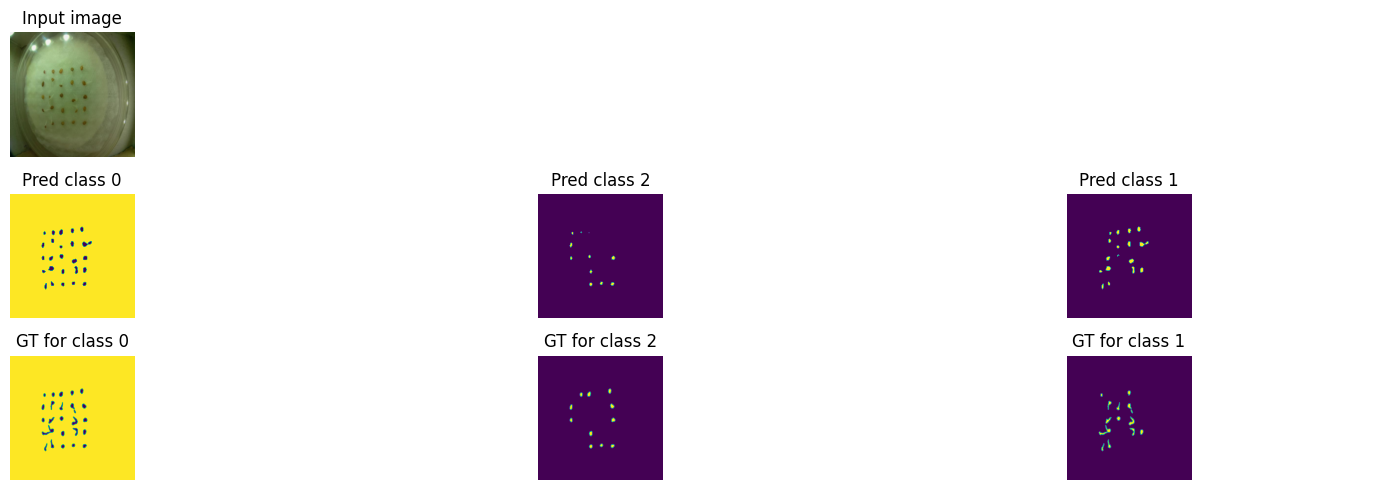

Train loss: 0.02426 | Time: 30m 48s | Val loss: 0.01911
Train_DICE_avg: 0.78035 | Train_Jaccard_avg: 0.71391 | Train_Sensitivity_avg: 0.94453 | Train_Specificity_avg: 0.91642 
Class 0 - Train_DICE: 0.99183 | Train_Jaccard: 0.98384 | Train_Sensitivity: 0.99661 | Train_Specificity: 0.77003 
Class 1 - Train_DICE: 0.54629 | Train_Jaccard: 0.47366 | Train_Sensitivity: 0.89782 | Train_Specificity: 0.99022 
Class 2 - Train_DICE: 0.80291 | Train_Jaccard: 0.68424 | Train_Sensitivity: 0.93917 | Train_Specificity: 0.98901 
Val_DICE_avg: 0.81740 | Val_Jaccard_avg: 0.74506 | Val_Sensitivity_avg: 0.96372 | Val_Specificity_avg: 0.86392 
Class 0 - Val_DICE: 0.99189 | Val_Jaccard: 0.98395 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.61270 
Class 1 - Val_DICE: 0.72231 | Val_Jaccard: 0.65348 | Val_Sensitivity: 0.91577 | Val_Specificity: 0.99449 
Class 2 - Val_DICE: 0.73799 | Val_Jaccard: 0.59775 | Val_Sensitivity: 0.97596 | Val_Specificity: 0.98458 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.02325 | Time: 31m 49s | Val loss: 0.01883
Train_DICE_avg: 0.77825 | Train_Jaccard_avg: 0.71188 | Train_Sensitivity_avg: 0.94549 | Train_Specificity_avg: 0.91441 
Class 0 - Train_DICE: 0.99187 | Train_Jaccard: 0.98392 | Train_Sensitivity: 0.99676 | Train_Specificity: 0.76409 
Class 1 - Train_DICE: 0.53999 | Train_Jaccard: 0.46750 | Train_Sensitivity: 0.89879 | Train_Specificity: 0.99006 
Class 2 - Train_DICE: 0.80289 | Train_Jaccard: 0.68421 | Train_Sensitivity: 0.94092 | Train_Specificity: 0.98909 
Val_DICE_avg: 0.81024 | Val_Jaccard_avg: 0.73836 | Val_Sensitivity_avg: 0.95779 | Val_Specificity_avg: 0.86459 
Class 0 - Val_DICE: 0.99198 | Val_Jaccard: 0.98413 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.61505 
Class 1 - Val_DICE: 0.69770 | Val_Jaccard: 0.62926 | Val_Sensitivity: 0.89933 | Val_Specificity: 0.99402 
Class 2 - Val_DICE: 0.74105 | Val_Jaccard: 0.60168 | Val_Sensitivity: 0.97472 | Val_Specificity: 0.98469 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.02236 | Time: 32m 50s | Val loss: 0.01793
Train_DICE_avg: 0.78169 | Train_Jaccard_avg: 0.71539 | Train_Sensitivity_avg: 0.94516 | Train_Specificity_avg: 0.91738 
Class 0 - Train_DICE: 0.99205 | Train_Jaccard: 0.98426 | Train_Sensitivity: 0.99670 | Train_Specificity: 0.77231 
Class 1 - Train_DICE: 0.54857 | Train_Jaccard: 0.47513 | Train_Sensitivity: 0.89880 | Train_Specificity: 0.99052 
Class 2 - Train_DICE: 0.80445 | Train_Jaccard: 0.68678 | Train_Sensitivity: 0.93999 | Train_Specificity: 0.98929 
Val_DICE_avg: 0.81667 | Val_Jaccard_avg: 0.74548 | Val_Sensitivity_avg: 0.96322 | Val_Specificity_avg: 0.86786 
Class 0 - Val_DICE: 0.99215 | Val_Jaccard: 0.98448 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.62409 
Class 1 - Val_DICE: 0.70742 | Val_Jaccard: 0.63944 | Val_Sensitivity: 0.91979 | Val_Specificity: 0.99422 
Class 2 - Val_DICE: 0.75042 | Val_Jaccard: 0.61250 | Val_Sensitivity: 0.97045 | Val_Specificity: 0.98527 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.02188 | Time: 33m 51s | Val loss: 0.01745
Train_DICE_avg: 0.78303 | Train_Jaccard_avg: 0.71727 | Train_Sensitivity_avg: 0.94578 | Train_Specificity_avg: 0.91657 
Class 0 - Train_DICE: 0.99191 | Train_Jaccard: 0.98398 | Train_Sensitivity: 0.99685 | Train_Specificity: 0.76958 
Class 1 - Train_DICE: 0.54777 | Train_Jaccard: 0.47416 | Train_Sensitivity: 0.90071 | Train_Specificity: 0.99050 
Class 2 - Train_DICE: 0.80942 | Train_Jaccard: 0.69365 | Train_Sensitivity: 0.93978 | Train_Specificity: 0.98963 
Val_DICE_avg: 0.81777 | Val_Jaccard_avg: 0.74518 | Val_Sensitivity_avg: 0.96683 | Val_Specificity_avg: 0.86901 
Class 0 - Val_DICE: 0.99261 | Val_Jaccard: 0.98536 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.62826 
Class 1 - Val_DICE: 0.71920 | Val_Jaccard: 0.64807 | Val_Sensitivity: 0.92552 | Val_Specificity: 0.99422 
Class 2 - Val_DICE: 0.74149 | Val_Jaccard: 0.60210 | Val_Sensitivity: 0.97560 | Val_Specificity: 0.98454 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.02129 | Time: 34m 52s | Val loss: 0.01773
Train_DICE_avg: 0.78346 | Train_Jaccard_avg: 0.71723 | Train_Sensitivity_avg: 0.94808 | Train_Specificity_avg: 0.91386 
Class 0 - Train_DICE: 0.99202 | Train_Jaccard: 0.98421 | Train_Sensitivity: 0.99694 | Train_Specificity: 0.76218 
Class 1 - Train_DICE: 0.55105 | Train_Jaccard: 0.47737 | Train_Sensitivity: 0.90269 | Train_Specificity: 0.99023 
Class 2 - Train_DICE: 0.80733 | Train_Jaccard: 0.69011 | Train_Sensitivity: 0.94463 | Train_Specificity: 0.98917 
Val_DICE_avg: 0.83411 | Val_Jaccard_avg: 0.76503 | Val_Sensitivity_avg: 0.96846 | Val_Specificity_avg: 0.85273 
Class 0 - Val_DICE: 0.99069 | Val_Jaccard: 0.98160 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.57681 
Class 1 - Val_DICE: 0.74006 | Val_Jaccard: 0.67020 | Val_Sensitivity: 0.93051 | Val_Specificity: 0.99456 
Class 2 - Val_DICE: 0.77158 | Val_Jaccard: 0.64329 | Val_Sensitivity: 0.97539 | Val_Specificity: 0.98683 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


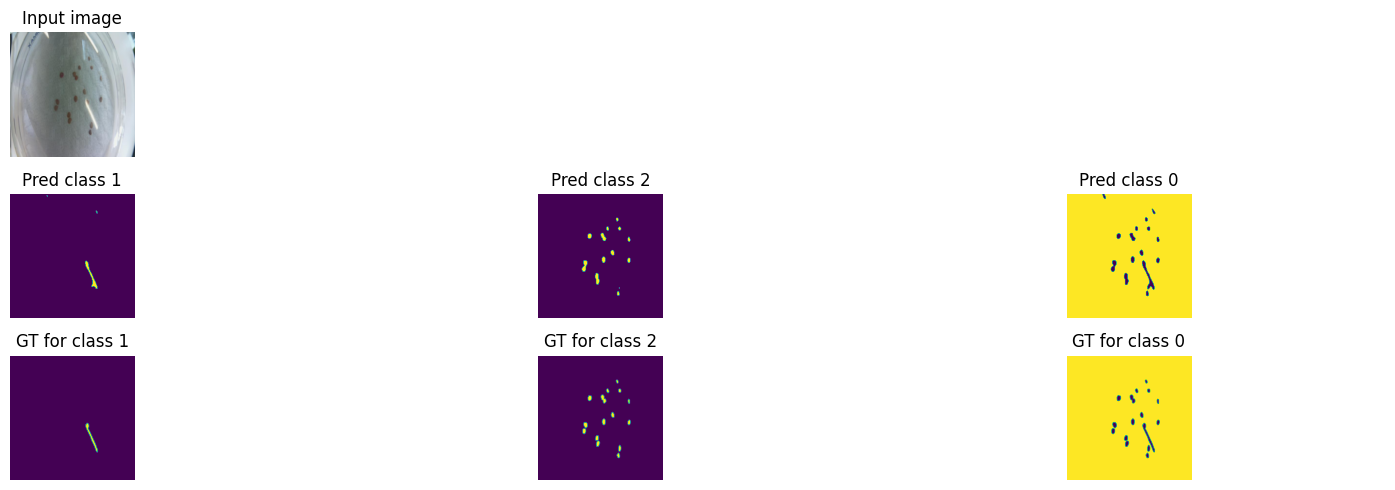

Train loss: 0.02086 | Time: 35m 53s | Val loss: 0.01677
Train_DICE_avg: 0.78865 | Train_Jaccard_avg: 0.72238 | Train_Sensitivity_avg: 0.95018 | Train_Specificity_avg: 0.91597 
Class 0 - Train_DICE: 0.99207 | Train_Jaccard: 0.98431 | Train_Sensitivity: 0.99695 | Train_Specificity: 0.76778 
Class 1 - Train_DICE: 0.56414 | Train_Jaccard: 0.48968 | Train_Sensitivity: 0.90983 | Train_Specificity: 0.99073 
Class 2 - Train_DICE: 0.80974 | Train_Jaccard: 0.69316 | Train_Sensitivity: 0.94377 | Train_Specificity: 0.98940 
Val_DICE_avg: 0.82178 | Val_Jaccard_avg: 0.74980 | Val_Sensitivity_avg: 0.96601 | Val_Specificity_avg: 0.86482 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98454 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.61513 
Class 1 - Val_DICE: 0.72069 | Val_Jaccard: 0.64963 | Val_Sensitivity: 0.92506 | Val_Specificity: 0.99422 
Class 2 - Val_DICE: 0.75247 | Val_Jaccard: 0.61525 | Val_Sensitivity: 0.97355 | Val_Specificity: 0.98510 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


Train loss: 0.02062 | Time: 36m 54s | Val loss: 0.01687
Train_DICE_avg: 0.78968 | Train_Jaccard_avg: 0.72352 | Train_Sensitivity_avg: 0.95021 | Train_Specificity_avg: 0.91743 
Class 0 - Train_DICE: 0.99217 | Train_Jaccard: 0.98450 | Train_Sensitivity: 0.99695 | Train_Specificity: 0.77227 
Class 1 - Train_DICE: 0.56543 | Train_Jaccard: 0.49070 | Train_Sensitivity: 0.90916 | Train_Specificity: 0.99073 
Class 2 - Train_DICE: 0.81145 | Train_Jaccard: 0.69536 | Train_Sensitivity: 0.94452 | Train_Specificity: 0.98928 
Val_DICE_avg: 0.82416 | Val_Jaccard_avg: 0.75196 | Val_Sensitivity_avg: 0.95933 | Val_Specificity_avg: 0.86055 
Class 0 - Val_DICE: 0.99136 | Val_Jaccard: 0.98291 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.60177 
Class 1 - Val_DICE: 0.73863 | Val_Jaccard: 0.66719 | Val_Sensitivity: 0.89708 | Val_Specificity: 0.99507 
Class 2 - Val_DICE: 0.74248 | Val_Jaccard: 0.60579 | Val_Sensitivity: 0.98142 | Val_Specificity: 0.98482 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.02005 | Time: 37m 55s | Val loss: 0.01645
Train_DICE_avg: 0.78839 | Train_Jaccard_avg: 0.72202 | Train_Sensitivity_avg: 0.94858 | Train_Specificity_avg: 0.91533 
Class 0 - Train_DICE: 0.99222 | Train_Jaccard: 0.98459 | Train_Sensitivity: 0.99719 | Train_Specificity: 0.76596 
Class 1 - Train_DICE: 0.56226 | Train_Jaccard: 0.48703 | Train_Sensitivity: 0.90406 | Train_Specificity: 0.99063 
Class 2 - Train_DICE: 0.81070 | Train_Jaccard: 0.69443 | Train_Sensitivity: 0.94450 | Train_Specificity: 0.98941 
Val_DICE_avg: 0.83108 | Val_Jaccard_avg: 0.75954 | Val_Sensitivity_avg: 0.96277 | Val_Specificity_avg: 0.86032 
Class 0 - Val_DICE: 0.99146 | Val_Jaccard: 0.98311 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.60057 
Class 1 - Val_DICE: 0.74898 | Val_Jaccard: 0.67749 | Val_Sensitivity: 0.91039 | Val_Specificity: 0.99503 
Class 2 - Val_DICE: 0.75280 | Val_Jaccard: 0.61802 | Val_Sensitivity: 0.97843 | Val_Specificity: 0.98535 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.01974 | Time: 38m 56s | Val loss: 0.01634
Train_DICE_avg: 0.79015 | Train_Jaccard_avg: 0.72446 | Train_Sensitivity_avg: 0.94719 | Train_Specificity_avg: 0.91817 
Class 0 - Train_DICE: 0.99239 | Train_Jaccard: 0.98493 | Train_Sensitivity: 0.99713 | Train_Specificity: 0.77414 
Class 1 - Train_DICE: 0.56470 | Train_Jaccard: 0.49016 | Train_Sensitivity: 0.89842 | Train_Specificity: 0.99086 
Class 2 - Train_DICE: 0.81337 | Train_Jaccard: 0.69828 | Train_Sensitivity: 0.94601 | Train_Specificity: 0.98950 
Val_DICE_avg: 0.83427 | Val_Jaccard_avg: 0.76461 | Val_Sensitivity_avg: 0.96435 | Val_Specificity_avg: 0.85603 
Class 0 - Val_DICE: 0.99103 | Val_Jaccard: 0.98227 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.58684 
Class 1 - Val_DICE: 0.73579 | Val_Jaccard: 0.66601 | Val_Sensitivity: 0.91930 | Val_Specificity: 0.99484 
Class 2 - Val_DICE: 0.77600 | Val_Jaccard: 0.64556 | Val_Sensitivity: 0.97424 | Val_Specificity: 0.98642 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.01943 | Time: 39m 57s | Val loss: 0.01630
Train_DICE_avg: 0.79171 | Train_Jaccard_avg: 0.72589 | Train_Sensitivity_avg: 0.95284 | Train_Specificity_avg: 0.91623 
Class 0 - Train_DICE: 0.99240 | Train_Jaccard: 0.98495 | Train_Sensitivity: 0.99734 | Train_Specificity: 0.76880 
Class 1 - Train_DICE: 0.57023 | Train_Jaccard: 0.49520 | Train_Sensitivity: 0.91332 | Train_Specificity: 0.99045 
Class 2 - Train_DICE: 0.81251 | Train_Jaccard: 0.69753 | Train_Sensitivity: 0.94785 | Train_Specificity: 0.98943 
Val_DICE_avg: 0.83411 | Val_Jaccard_avg: 0.76391 | Val_Sensitivity_avg: 0.96562 | Val_Specificity_avg: 0.85815 
Class 0 - Val_DICE: 0.99124 | Val_Jaccard: 0.98268 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.59346 
Class 1 - Val_DICE: 0.74235 | Val_Jaccard: 0.67235 | Val_Sensitivity: 0.91963 | Val_Specificity: 0.99484 
Class 2 - Val_DICE: 0.76873 | Val_Jaccard: 0.63670 | Val_Sensitivity: 0.97776 | Val_Specificity: 0.98615 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


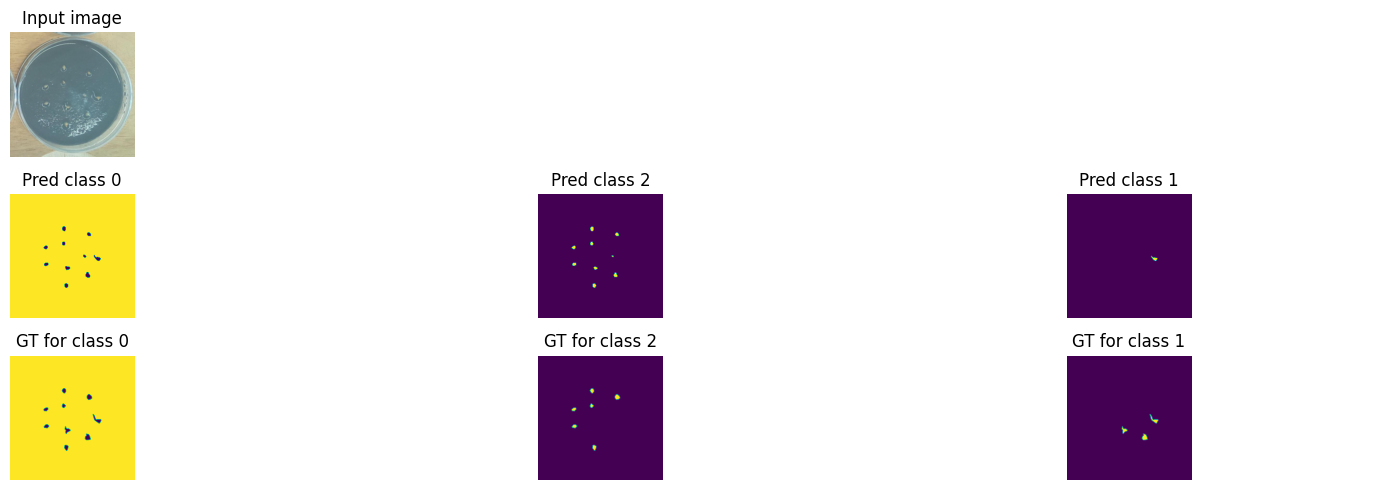

Train loss: 0.01940 | Time: 40m 58s | Val loss: 0.01609
Train_DICE_avg: 0.79470 | Train_Jaccard_avg: 0.72970 | Train_Sensitivity_avg: 0.95082 | Train_Specificity_avg: 0.91964 
Class 0 - Train_DICE: 0.99244 | Train_Jaccard: 0.98502 | Train_Sensitivity: 0.99719 | Train_Specificity: 0.77833 
Class 1 - Train_DICE: 0.57460 | Train_Jaccard: 0.50048 | Train_Sensitivity: 0.90937 | Train_Specificity: 0.99084 
Class 2 - Train_DICE: 0.81706 | Train_Jaccard: 0.70360 | Train_Sensitivity: 0.94590 | Train_Specificity: 0.98974 
Val_DICE_avg: 0.82470 | Val_Jaccard_avg: 0.75178 | Val_Sensitivity_avg: 0.96503 | Val_Specificity_avg: 0.86712 
Class 0 - Val_DICE: 0.99225 | Val_Jaccard: 0.98467 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.62206 
Class 1 - Val_DICE: 0.73951 | Val_Jaccard: 0.66831 | Val_Sensitivity: 0.91937 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.74234 | Val_Jaccard: 0.60235 | Val_Sensitivity: 0.97625 | Val_Specificity: 0.98456 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.01934 | Time: 41m 58s | Val loss: 0.01579
Train_DICE_avg: 0.79546 | Train_Jaccard_avg: 0.73003 | Train_Sensitivity_avg: 0.95063 | Train_Specificity_avg: 0.91744 
Class 0 - Train_DICE: 0.99236 | Train_Jaccard: 0.98487 | Train_Sensitivity: 0.99717 | Train_Specificity: 0.77204 
Class 1 - Train_DICE: 0.57852 | Train_Jaccard: 0.50419 | Train_Sensitivity: 0.90668 | Train_Specificity: 0.99079 
Class 2 - Train_DICE: 0.81551 | Train_Jaccard: 0.70102 | Train_Sensitivity: 0.94806 | Train_Specificity: 0.98950 
Val_DICE_avg: 0.82713 | Val_Jaccard_avg: 0.75597 | Val_Sensitivity_avg: 0.96728 | Val_Specificity_avg: 0.86488 
Class 0 - Val_DICE: 0.99184 | Val_Jaccard: 0.98385 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.61452 
Class 1 - Val_DICE: 0.73316 | Val_Jaccard: 0.66345 | Val_Sensitivity: 0.92694 | Val_Specificity: 0.99458 
Class 2 - Val_DICE: 0.75640 | Val_Jaccard: 0.62062 | Val_Sensitivity: 0.97543 | Val_Specificity: 0.98554 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.01908 | Time: 42m 59s | Val loss: 0.01584
Train_DICE_avg: 0.79575 | Train_Jaccard_avg: 0.73056 | Train_Sensitivity_avg: 0.94939 | Train_Specificity_avg: 0.91745 
Class 0 - Train_DICE: 0.99241 | Train_Jaccard: 0.98496 | Train_Sensitivity: 0.99726 | Train_Specificity: 0.77177 
Class 1 - Train_DICE: 0.57796 | Train_Jaccard: 0.50338 | Train_Sensitivity: 0.90276 | Train_Specificity: 0.99088 
Class 2 - Train_DICE: 0.81687 | Train_Jaccard: 0.70335 | Train_Sensitivity: 0.94816 | Train_Specificity: 0.98970 
Val_DICE_avg: 0.82124 | Val_Jaccard_avg: 0.74828 | Val_Sensitivity_avg: 0.96496 | Val_Specificity_avg: 0.86860 
Class 0 - Val_DICE: 0.99220 | Val_Jaccard: 0.98456 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.62651 
Class 1 - Val_DICE: 0.73460 | Val_Jaccard: 0.66245 | Val_Sensitivity: 0.91384 | Val_Specificity: 0.99479 
Class 2 - Val_DICE: 0.73693 | Val_Jaccard: 0.59783 | Val_Sensitivity: 0.98160 | Val_Specificity: 0.98450 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.01883 | Time: 44m 0s | Val loss: 0.01516
Train_DICE_avg: 0.79888 | Train_Jaccard_avg: 0.73372 | Train_Sensitivity_avg: 0.95184 | Train_Specificity_avg: 0.91976 
Class 0 - Train_DICE: 0.99256 | Train_Jaccard: 0.98526 | Train_Sensitivity: 0.99726 | Train_Specificity: 0.77850 
Class 1 - Train_DICE: 0.58643 | Train_Jaccard: 0.51120 | Train_Sensitivity: 0.90985 | Train_Specificity: 0.99102 
Class 2 - Train_DICE: 0.81764 | Train_Jaccard: 0.70470 | Train_Sensitivity: 0.94842 | Train_Specificity: 0.98975 
Val_DICE_avg: 0.83442 | Val_Jaccard_avg: 0.76184 | Val_Sensitivity_avg: 0.96749 | Val_Specificity_avg: 0.86374 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98411 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.61110 
Class 1 - Val_DICE: 0.75099 | Val_Jaccard: 0.67654 | Val_Sensitivity: 0.92181 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.76029 | Val_Jaccard: 0.62488 | Val_Sensitivity: 0.98120 | Val_Specificity: 0.98539 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.01873 | Time: 45m 1s | Val loss: 0.01538
Train_DICE_avg: 0.79607 | Train_Jaccard_avg: 0.73110 | Train_Sensitivity_avg: 0.95105 | Train_Specificity_avg: 0.91987 
Class 0 - Train_DICE: 0.99255 | Train_Jaccard: 0.98523 | Train_Sensitivity: 0.99735 | Train_Specificity: 0.77899 
Class 1 - Train_DICE: 0.57567 | Train_Jaccard: 0.50079 | Train_Sensitivity: 0.90818 | Train_Specificity: 0.99077 
Class 2 - Train_DICE: 0.81998 | Train_Jaccard: 0.70728 | Train_Sensitivity: 0.94761 | Train_Specificity: 0.98983 
Val_DICE_avg: 0.83273 | Val_Jaccard_avg: 0.76039 | Val_Sensitivity_avg: 0.96473 | Val_Specificity_avg: 0.86446 
Class 0 - Val_DICE: 0.99195 | Val_Jaccard: 0.98407 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61321 
Class 1 - Val_DICE: 0.75239 | Val_Jaccard: 0.67823 | Val_Sensitivity: 0.91211 | Val_Specificity: 0.99496 
Class 2 - Val_DICE: 0.75385 | Val_Jaccard: 0.61887 | Val_Sensitivity: 0.98259 | Val_Specificity: 0.98521 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


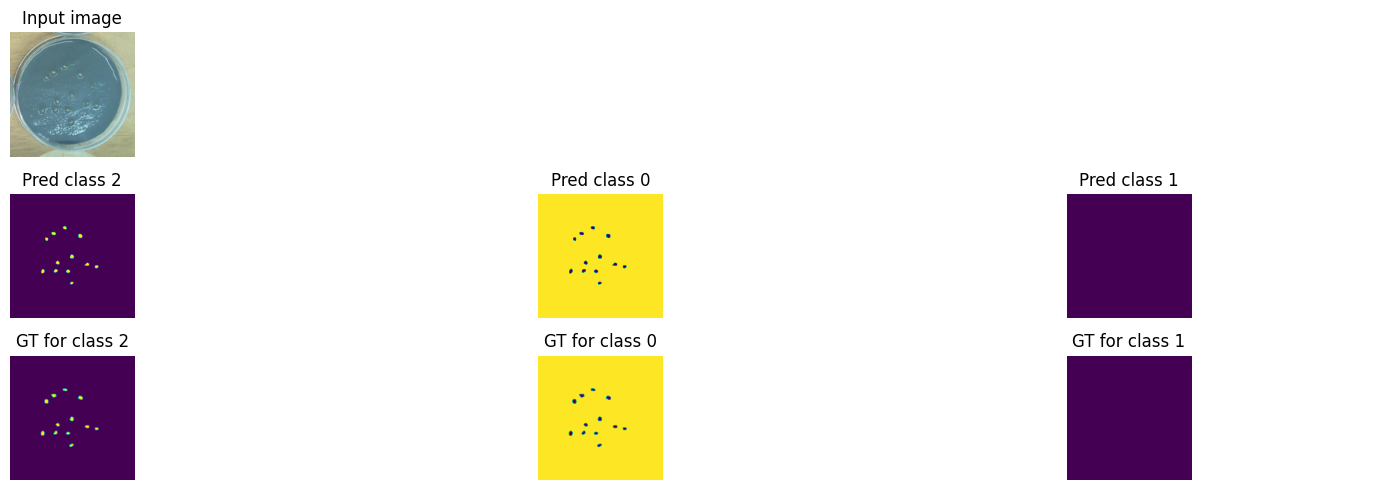

Train loss: 0.01890 | Time: 46m 3s | Val loss: 0.01531
Train_DICE_avg: 0.79891 | Train_Jaccard_avg: 0.73324 | Train_Sensitivity_avg: 0.95416 | Train_Specificity_avg: 0.91900 
Class 0 - Train_DICE: 0.99237 | Train_Jaccard: 0.98489 | Train_Sensitivity: 0.99723 | Train_Specificity: 0.77675 
Class 1 - Train_DICE: 0.58547 | Train_Jaccard: 0.50949 | Train_Sensitivity: 0.91588 | Train_Specificity: 0.99068 
Class 2 - Train_DICE: 0.81889 | Train_Jaccard: 0.70534 | Train_Sensitivity: 0.94936 | Train_Specificity: 0.98958 
Val_DICE_avg: 0.84267 | Val_Jaccard_avg: 0.77229 | Val_Sensitivity_avg: 0.96825 | Val_Specificity_avg: 0.85811 
Class 0 - Val_DICE: 0.99123 | Val_Jaccard: 0.98267 | Val_Sensitivity: 0.99951 | Val_Specificity: 0.59288 
Class 1 - Val_DICE: 0.76082 | Val_Jaccard: 0.68848 | Val_Sensitivity: 0.92759 | Val_Specificity: 0.99504 
Class 2 - Val_DICE: 0.77597 | Val_Jaccard: 0.64573 | Val_Sensitivity: 0.97764 | Val_Specificity: 0.98641 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.01858 | Time: 47m 3s | Val loss: 0.01513
Train_DICE_avg: 0.79855 | Train_Jaccard_avg: 0.73322 | Train_Sensitivity_avg: 0.95467 | Train_Specificity_avg: 0.91822 
Class 0 - Train_DICE: 0.99254 | Train_Jaccard: 0.98522 | Train_Sensitivity: 0.99741 | Train_Specificity: 0.77423 
Class 1 - Train_DICE: 0.58534 | Train_Jaccard: 0.50979 | Train_Sensitivity: 0.91750 | Train_Specificity: 0.99076 
Class 2 - Train_DICE: 0.81777 | Train_Jaccard: 0.70466 | Train_Sensitivity: 0.94910 | Train_Specificity: 0.98967 
Val_DICE_avg: 0.82976 | Val_Jaccard_avg: 0.75797 | Val_Sensitivity_avg: 0.96950 | Val_Specificity_avg: 0.86589 
Class 0 - Val_DICE: 0.99213 | Val_Jaccard: 0.98442 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.61785 
Class 1 - Val_DICE: 0.73806 | Val_Jaccard: 0.66564 | Val_Sensitivity: 0.93021 | Val_Specificity: 0.99433 
Class 2 - Val_DICE: 0.75910 | Val_Jaccard: 0.62385 | Val_Sensitivity: 0.97885 | Val_Specificity: 0.98549 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.01845 | Time: 48m 4s | Val loss: 0.01526
Train_DICE_avg: 0.80018 | Train_Jaccard_avg: 0.73497 | Train_Sensitivity_avg: 0.95425 | Train_Specificity_avg: 0.91777 
Class 0 - Train_DICE: 0.99250 | Train_Jaccard: 0.98514 | Train_Sensitivity: 0.99734 | Train_Specificity: 0.77270 
Class 1 - Train_DICE: 0.58872 | Train_Jaccard: 0.51360 | Train_Sensitivity: 0.91515 | Train_Specificity: 0.99096 
Class 2 - Train_DICE: 0.81934 | Train_Jaccard: 0.70615 | Train_Sensitivity: 0.95024 | Train_Specificity: 0.98964 
Val_DICE_avg: 0.82343 | Val_Jaccard_avg: 0.74975 | Val_Sensitivity_avg: 0.96130 | Val_Specificity_avg: 0.86940 
Class 0 - Val_DICE: 0.99245 | Val_Jaccard: 0.98505 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.62901 
Class 1 - Val_DICE: 0.73758 | Val_Jaccard: 0.66298 | Val_Sensitivity: 0.89962 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.74027 | Val_Jaccard: 0.60121 | Val_Sensitivity: 0.98486 | Val_Specificity: 0.98447 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.01838 | Time: 49m 6s | Val loss: 0.01503
Train_DICE_avg: 0.79953 | Train_Jaccard_avg: 0.73402 | Train_Sensitivity_avg: 0.95324 | Train_Specificity_avg: 0.91905 
Class 0 - Train_DICE: 0.99250 | Train_Jaccard: 0.98515 | Train_Sensitivity: 0.99730 | Train_Specificity: 0.77645 
Class 1 - Train_DICE: 0.58742 | Train_Jaccard: 0.51112 | Train_Sensitivity: 0.91244 | Train_Specificity: 0.99103 
Class 2 - Train_DICE: 0.81868 | Train_Jaccard: 0.70579 | Train_Sensitivity: 0.94998 | Train_Specificity: 0.98967 
Val_DICE_avg: 0.83377 | Val_Jaccard_avg: 0.76270 | Val_Sensitivity_avg: 0.96686 | Val_Specificity_avg: 0.86310 
Class 0 - Val_DICE: 0.99185 | Val_Jaccard: 0.98388 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60886 
Class 1 - Val_DICE: 0.74292 | Val_Jaccard: 0.67106 | Val_Sensitivity: 0.92211 | Val_Specificity: 0.99466 
Class 2 - Val_DICE: 0.76654 | Val_Jaccard: 0.63314 | Val_Sensitivity: 0.97901 | Val_Specificity: 0.98578 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.01825 | Time: 50m 8s | Val loss: 0.01521
Train_DICE_avg: 0.79994 | Train_Jaccard_avg: 0.73490 | Train_Sensitivity_avg: 0.95465 | Train_Specificity_avg: 0.91841 
Class 0 - Train_DICE: 0.99255 | Train_Jaccard: 0.98525 | Train_Sensitivity: 0.99744 | Train_Specificity: 0.77464 
Class 1 - Train_DICE: 0.58665 | Train_Jaccard: 0.51134 | Train_Sensitivity: 0.91675 | Train_Specificity: 0.99079 
Class 2 - Train_DICE: 0.82062 | Train_Jaccard: 0.70812 | Train_Sensitivity: 0.94976 | Train_Specificity: 0.98981 
Val_DICE_avg: 0.82867 | Val_Jaccard_avg: 0.75666 | Val_Sensitivity_avg: 0.97359 | Val_Specificity_avg: 0.86854 
Class 0 - Val_DICE: 0.99246 | Val_Jaccard: 0.98507 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.62603 
Class 1 - Val_DICE: 0.74117 | Val_Jaccard: 0.66880 | Val_Sensitivity: 0.94037 | Val_Specificity: 0.99445 
Class 2 - Val_DICE: 0.75236 | Val_Jaccard: 0.61610 | Val_Sensitivity: 0.98094 | Val_Specificity: 0.98513 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


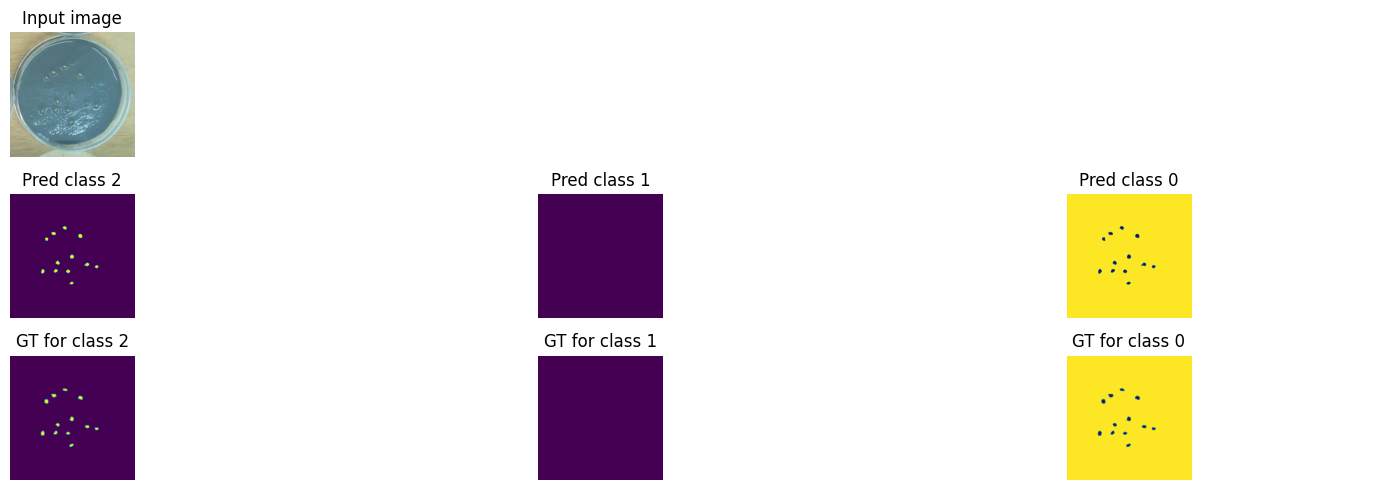

Train loss: 0.01831 | Time: 51m 11s | Val loss: 0.01513
Train_DICE_avg: 0.79953 | Train_Jaccard_avg: 0.73409 | Train_Sensitivity_avg: 0.95344 | Train_Specificity_avg: 0.91725 
Class 0 - Train_DICE: 0.99255 | Train_Jaccard: 0.98523 | Train_Sensitivity: 0.99740 | Train_Specificity: 0.77122 
Class 1 - Train_DICE: 0.58719 | Train_Jaccard: 0.51115 | Train_Sensitivity: 0.91174 | Train_Specificity: 0.99086 
Class 2 - Train_DICE: 0.81884 | Train_Jaccard: 0.70588 | Train_Sensitivity: 0.95119 | Train_Specificity: 0.98968 
Val_DICE_avg: 0.84225 | Val_Jaccard_avg: 0.77238 | Val_Sensitivity_avg: 0.97109 | Val_Specificity_avg: 0.86066 
Class 0 - Val_DICE: 0.99138 | Val_Jaccard: 0.98296 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.60038 
Class 1 - Val_DICE: 0.75943 | Val_Jaccard: 0.68809 | Val_Sensitivity: 0.93535 | Val_Specificity: 0.99504 
Class 2 - Val_DICE: 0.77593 | Val_Jaccard: 0.64610 | Val_Sensitivity: 0.97842 | Val_Specificity: 0.98656 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.01804 | Time: 52m 13s | Val loss: 0.01489
Train_DICE_avg: 0.79800 | Train_Jaccard_avg: 0.73308 | Train_Sensitivity_avg: 0.95371 | Train_Specificity_avg: 0.91867 
Class 0 - Train_DICE: 0.99263 | Train_Jaccard: 0.98540 | Train_Sensitivity: 0.99743 | Train_Specificity: 0.77544 
Class 1 - Train_DICE: 0.58077 | Train_Jaccard: 0.50552 | Train_Sensitivity: 0.91139 | Train_Specificity: 0.99076 
Class 2 - Train_DICE: 0.82060 | Train_Jaccard: 0.70833 | Train_Sensitivity: 0.95232 | Train_Specificity: 0.98980 
Val_DICE_avg: 0.83403 | Val_Jaccard_avg: 0.76229 | Val_Sensitivity_avg: 0.96916 | Val_Specificity_avg: 0.86624 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98437 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61843 
Class 1 - Val_DICE: 0.75088 | Val_Jaccard: 0.67923 | Val_Sensitivity: 0.92935 | Val_Specificity: 0.99492 
Class 2 - Val_DICE: 0.75912 | Val_Jaccard: 0.62328 | Val_Sensitivity: 0.97865 | Val_Specificity: 0.98536 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.01788 | Time: 53m 15s | Val loss: 0.01474
Train_DICE_avg: 0.80487 | Train_Jaccard_avg: 0.74015 | Train_Sensitivity_avg: 0.95560 | Train_Specificity_avg: 0.91932 
Class 0 - Train_DICE: 0.99269 | Train_Jaccard: 0.98551 | Train_Sensitivity: 0.99744 | Train_Specificity: 0.77698 
Class 1 - Train_DICE: 0.59906 | Train_Jaccard: 0.52348 | Train_Sensitivity: 0.91846 | Train_Specificity: 0.99110 
Class 2 - Train_DICE: 0.82286 | Train_Jaccard: 0.71146 | Train_Sensitivity: 0.95091 | Train_Specificity: 0.98989 
Val_DICE_avg: 0.84021 | Val_Jaccard_avg: 0.76907 | Val_Sensitivity_avg: 0.96890 | Val_Specificity_avg: 0.86018 
Class 0 - Val_DICE: 0.99146 | Val_Jaccard: 0.98312 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.59947 
Class 1 - Val_DICE: 0.76124 | Val_Jaccard: 0.68765 | Val_Sensitivity: 0.92422 | Val_Specificity: 0.99498 
Class 2 - Val_DICE: 0.76791 | Val_Jaccard: 0.63645 | Val_Sensitivity: 0.98300 | Val_Specificity: 0.98610 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.01773 | Time: 54m 17s | Val loss: 0.01493
Train_DICE_avg: 0.80264 | Train_Jaccard_avg: 0.73821 | Train_Sensitivity_avg: 0.95453 | Train_Specificity_avg: 0.91989 
Class 0 - Train_DICE: 0.99272 | Train_Jaccard: 0.98557 | Train_Sensitivity: 0.99757 | Train_Specificity: 0.77891 
Class 1 - Train_DICE: 0.59323 | Train_Jaccard: 0.51858 | Train_Sensitivity: 0.91504 | Train_Specificity: 0.99091 
Class 2 - Train_DICE: 0.82197 | Train_Jaccard: 0.71046 | Train_Sensitivity: 0.95099 | Train_Specificity: 0.98984 
Val_DICE_avg: 0.83742 | Val_Jaccard_avg: 0.76613 | Val_Sensitivity_avg: 0.96662 | Val_Specificity_avg: 0.86251 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98375 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.60681 
Class 1 - Val_DICE: 0.75346 | Val_Jaccard: 0.68089 | Val_Sensitivity: 0.92007 | Val_Specificity: 0.99496 
Class 2 - Val_DICE: 0.76702 | Val_Jaccard: 0.63375 | Val_Sensitivity: 0.98028 | Val_Specificity: 0.98577 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.01787 | Time: 55m 18s | Val loss: 0.01473
Train_DICE_avg: 0.79828 | Train_Jaccard_avg: 0.73304 | Train_Sensitivity_avg: 0.95404 | Train_Specificity_avg: 0.91865 
Class 0 - Train_DICE: 0.99268 | Train_Jaccard: 0.98550 | Train_Sensitivity: 0.99741 | Train_Specificity: 0.77532 
Class 1 - Train_DICE: 0.58072 | Train_Jaccard: 0.50447 | Train_Sensitivity: 0.91336 | Train_Specificity: 0.99079 
Class 2 - Train_DICE: 0.82145 | Train_Jaccard: 0.70915 | Train_Sensitivity: 0.95135 | Train_Specificity: 0.98985 
Val_DICE_avg: 0.83657 | Val_Jaccard_avg: 0.76443 | Val_Sensitivity_avg: 0.96536 | Val_Specificity_avg: 0.86455 
Class 0 - Val_DICE: 0.99208 | Val_Jaccard: 0.98433 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.61321 
Class 1 - Val_DICE: 0.75548 | Val_Jaccard: 0.68113 | Val_Sensitivity: 0.91352 | Val_Specificity: 0.99496 
Class 2 - Val_DICE: 0.76215 | Val_Jaccard: 0.62782 | Val_Sensitivity: 0.98312 | Val_Specificity: 0.98550 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


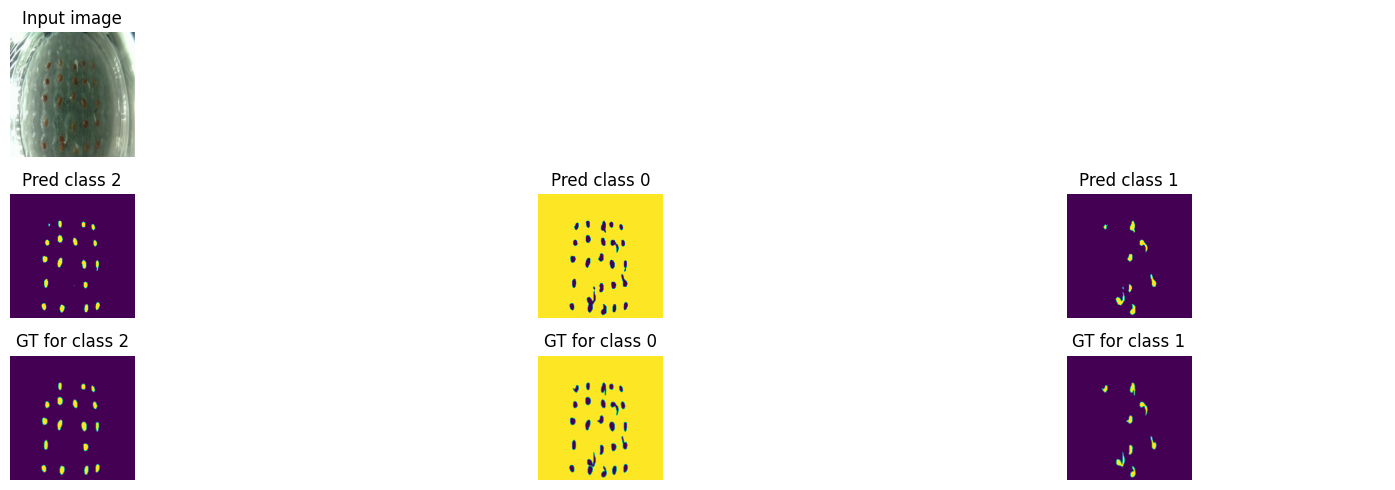

Train loss: 0.01769 | Time: 56m 21s | Val loss: 0.01485
Train_DICE_avg: 0.80420 | Train_Jaccard_avg: 0.73977 | Train_Sensitivity_avg: 0.95397 | Train_Specificity_avg: 0.92057 
Class 0 - Train_DICE: 0.99277 | Train_Jaccard: 0.98568 | Train_Sensitivity: 0.99745 | Train_Specificity: 0.78059 
Class 1 - Train_DICE: 0.59588 | Train_Jaccard: 0.52027 | Train_Sensitivity: 0.91249 | Train_Specificity: 0.99113 
Class 2 - Train_DICE: 0.82394 | Train_Jaccard: 0.71337 | Train_Sensitivity: 0.95195 | Train_Specificity: 0.98999 
Val_DICE_avg: 0.83532 | Val_Jaccard_avg: 0.76408 | Val_Sensitivity_avg: 0.96504 | Val_Specificity_avg: 0.86252 
Class 0 - Val_DICE: 0.99170 | Val_Jaccard: 0.98359 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.60675 
Class 1 - Val_DICE: 0.74745 | Val_Jaccard: 0.67467 | Val_Sensitivity: 0.91514 | Val_Specificity: 0.99490 
Class 2 - Val_DICE: 0.76680 | Val_Jaccard: 0.63397 | Val_Sensitivity: 0.98046 | Val_Specificity: 0.98591 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.01756 | Time: 57m 22s | Val loss: 0.01460
Train_DICE_avg: 0.80243 | Train_Jaccard_avg: 0.73754 | Train_Sensitivity_avg: 0.95552 | Train_Specificity_avg: 0.91970 
Class 0 - Train_DICE: 0.99272 | Train_Jaccard: 0.98558 | Train_Sensitivity: 0.99749 | Train_Specificity: 0.77818 
Class 1 - Train_DICE: 0.59070 | Train_Jaccard: 0.51432 | Train_Sensitivity: 0.91669 | Train_Specificity: 0.99100 
Class 2 - Train_DICE: 0.82387 | Train_Jaccard: 0.71272 | Train_Sensitivity: 0.95237 | Train_Specificity: 0.98993 
Val_DICE_avg: 0.83719 | Val_Jaccard_avg: 0.76552 | Val_Sensitivity_avg: 0.96653 | Val_Specificity_avg: 0.86534 
Class 0 - Val_DICE: 0.99199 | Val_Jaccard: 0.98415 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61535 
Class 1 - Val_DICE: 0.75575 | Val_Jaccard: 0.68252 | Val_Sensitivity: 0.91984 | Val_Specificity: 0.99500 
Class 2 - Val_DICE: 0.76383 | Val_Jaccard: 0.62988 | Val_Sensitivity: 0.98026 | Val_Specificity: 0.98569 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.01766 | Time: 58m 24s | Val loss: 0.01470
Train_DICE_avg: 0.80339 | Train_Jaccard_avg: 0.73850 | Train_Sensitivity_avg: 0.95555 | Train_Specificity_avg: 0.91961 
Class 0 - Train_DICE: 0.99271 | Train_Jaccard: 0.98556 | Train_Sensitivity: 0.99755 | Train_Specificity: 0.77795 
Class 1 - Train_DICE: 0.59454 | Train_Jaccard: 0.51859 | Train_Sensitivity: 0.91695 | Train_Specificity: 0.99101 
Class 2 - Train_DICE: 0.82293 | Train_Jaccard: 0.71136 | Train_Sensitivity: 0.95217 | Train_Specificity: 0.98986 
Val_DICE_avg: 0.84072 | Val_Jaccard_avg: 0.76975 | Val_Sensitivity_avg: 0.96678 | Val_Specificity_avg: 0.86171 
Class 0 - Val_DICE: 0.99166 | Val_Jaccard: 0.98350 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.60406 
Class 1 - Val_DICE: 0.75880 | Val_Jaccard: 0.68601 | Val_Sensitivity: 0.92039 | Val_Specificity: 0.99509 
Class 2 - Val_DICE: 0.77171 | Val_Jaccard: 0.63974 | Val_Sensitivity: 0.98045 | Val_Specificity: 0.98599 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.01764 | Time: 59m 26s | Val loss: 0.01458
Train_DICE_avg: 0.80587 | Train_Jaccard_avg: 0.74086 | Train_Sensitivity_avg: 0.95684 | Train_Specificity_avg: 0.92039 
Class 0 - Train_DICE: 0.99268 | Train_Jaccard: 0.98550 | Train_Sensitivity: 0.99741 | Train_Specificity: 0.77999 
Class 1 - Train_DICE: 0.60233 | Train_Jaccard: 0.52604 | Train_Sensitivity: 0.92095 | Train_Specificity: 0.99124 
Class 2 - Train_DICE: 0.82259 | Train_Jaccard: 0.71104 | Train_Sensitivity: 0.95215 | Train_Specificity: 0.98994 
Val_DICE_avg: 0.83757 | Val_Jaccard_avg: 0.76620 | Val_Sensitivity_avg: 0.96691 | Val_Specificity_avg: 0.86521 
Class 0 - Val_DICE: 0.99193 | Val_Jaccard: 0.98403 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61484 
Class 1 - Val_DICE: 0.75391 | Val_Jaccard: 0.68118 | Val_Sensitivity: 0.92194 | Val_Specificity: 0.99494 
Class 2 - Val_DICE: 0.76685 | Val_Jaccard: 0.63339 | Val_Sensitivity: 0.97931 | Val_Specificity: 0.98585 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.01745 | Time: 60m 28s | Val loss: 0.01469
Train_DICE_avg: 0.81183 | Train_Jaccard_avg: 0.74788 | Train_Sensitivity_avg: 0.95692 | Train_Specificity_avg: 0.92285 
Class 0 - Train_DICE: 0.99282 | Train_Jaccard: 0.98577 | Train_Sensitivity: 0.99739 | Train_Specificity: 0.78691 
Class 1 - Train_DICE: 0.61534 | Train_Jaccard: 0.54022 | Train_Sensitivity: 0.92114 | Train_Specificity: 0.99146 
Class 2 - Train_DICE: 0.82731 | Train_Jaccard: 0.71765 | Train_Sensitivity: 0.95221 | Train_Specificity: 0.99019 
Val_DICE_avg: 0.84104 | Val_Jaccard_avg: 0.76963 | Val_Sensitivity_avg: 0.96748 | Val_Specificity_avg: 0.86071 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98335 | Val_Sensitivity: 0.99951 | Val_Specificity: 0.60105 
Class 1 - Val_DICE: 0.76153 | Val_Jaccard: 0.68762 | Val_Sensitivity: 0.92086 | Val_Specificity: 0.99507 
Class 2 - Val_DICE: 0.77002 | Val_Jaccard: 0.63791 | Val_Sensitivity: 0.98207 | Val_Specificity: 0.98600 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


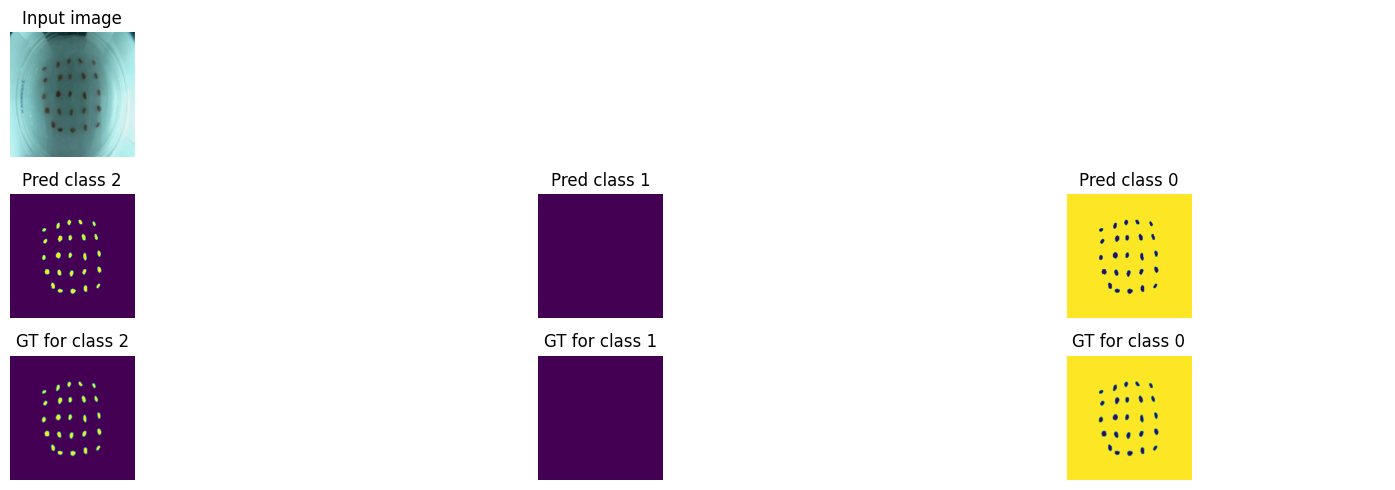

Train loss: 0.01744 | Time: 61m 30s | Val loss: 0.01469
Train_DICE_avg: 0.80488 | Train_Jaccard_avg: 0.73999 | Train_Sensitivity_avg: 0.95446 | Train_Specificity_avg: 0.92060 
Class 0 - Train_DICE: 0.99275 | Train_Jaccard: 0.98563 | Train_Sensitivity: 0.99749 | Train_Specificity: 0.78056 
Class 1 - Train_DICE: 0.59715 | Train_Jaccard: 0.52061 | Train_Sensitivity: 0.91255 | Train_Specificity: 0.99121 
Class 2 - Train_DICE: 0.82475 | Train_Jaccard: 0.71373 | Train_Sensitivity: 0.95335 | Train_Specificity: 0.99003 
Val_DICE_avg: 0.84118 | Val_Jaccard_avg: 0.76995 | Val_Sensitivity_avg: 0.96867 | Val_Specificity_avg: 0.86345 
Class 0 - Val_DICE: 0.99175 | Val_Jaccard: 0.98368 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.60925 
Class 1 - Val_DICE: 0.76307 | Val_Jaccard: 0.68977 | Val_Sensitivity: 0.92654 | Val_Specificity: 0.99506 
Class 2 - Val_DICE: 0.76873 | Val_Jaccard: 0.63639 | Val_Sensitivity: 0.97998 | Val_Specificity: 0.98603 


wandb: uploading artifact best_model
wandb: 
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▂▃▃▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████████████
wandb:       Training Jaccard ▁▁▂▂▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▇████
wandb:          Training Loss █▆▅▄▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▆▇█▇▅▅▅▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▆▆▆▇▆▆▆▆▇▇▇▇▇▇▇▇▇
wandb:   Training Specificity ▁▅▅▅▆▆▆▇▇▇▇▇▇▇▇█████████████████████████
wandb:        Validation DICE ▁▃▃▄▄▅▅▆▆▆▆▆▆▇▆▇▇▆▇▇▇▇▇█▇█▇▇████████████
wandb:     Validation Jaccard ▁▂▃▃▄▅▅▅▅▅▆▆▇▆▆▇▇▇▇▇█▇▇█▇▇███▇▇█████████
wandb:        Validation Loss █▇▇▆▅▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▅▇█▆▃▆▂▄▅▅▄▆▆▁▂▄▄▅▅▄▅▅▅▃▄▅▄▅▄▅▃▅▇▆▆▅▅▅▅▅
wandb: Validation Specificity ▁▄▅▄▃▆▆▆▇▇▇▇█▇▇█▇███▇█▇▇▇████▇███▇██▇▇██
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.80488
wandb:       Training Jaccard 0.73999
wandb:          Training L


Training complete!


In [33]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [34]:
model = UNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [35]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]



Global Performance Metrics:
Loss mean: 0.01487, std: 0.00144
Dice Coefficient mean: 0.87762, std: 0.10641
Jaccard Index mean: 0.82155, std: 0.12252
Sensitivity mean: 0.89125, std: 0.09930
Specificity mean: 0.96631, std: 0.02225

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99596, std: 0.00233
Jaccard mean: 0.99197, std: 0.00459
Sensitivity mean: 0.99514, std: 0.00360
Specificity mean: 0.90446, std: 0.06766

Class 1:
Dice mean: 0.76149, std: 0.29139
Jaccard mean: 0.68746, std: 0.31320
Sensitivity mean: 0.79917, std: 0.26920
Specificity mean: 0.99796, std: 0.00376

Class 2:
Dice mean: 0.87540, std: 0.07271
Jaccard mean: 0.78523, std: 0.10385
Sensitivity mean: 0.87943, std: 0.09704
Specificity mean: 0.99652, std: 0.00237


### Focal Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Backbone"] = "mobilenetv3"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-UNet-MobileNetV3-Focal"]

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.45 GB
GPU Memory - Reserved: 1.92 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_223733-akhsjwth
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-UNet-MobileNetV3-Focal
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/akhsjwth



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


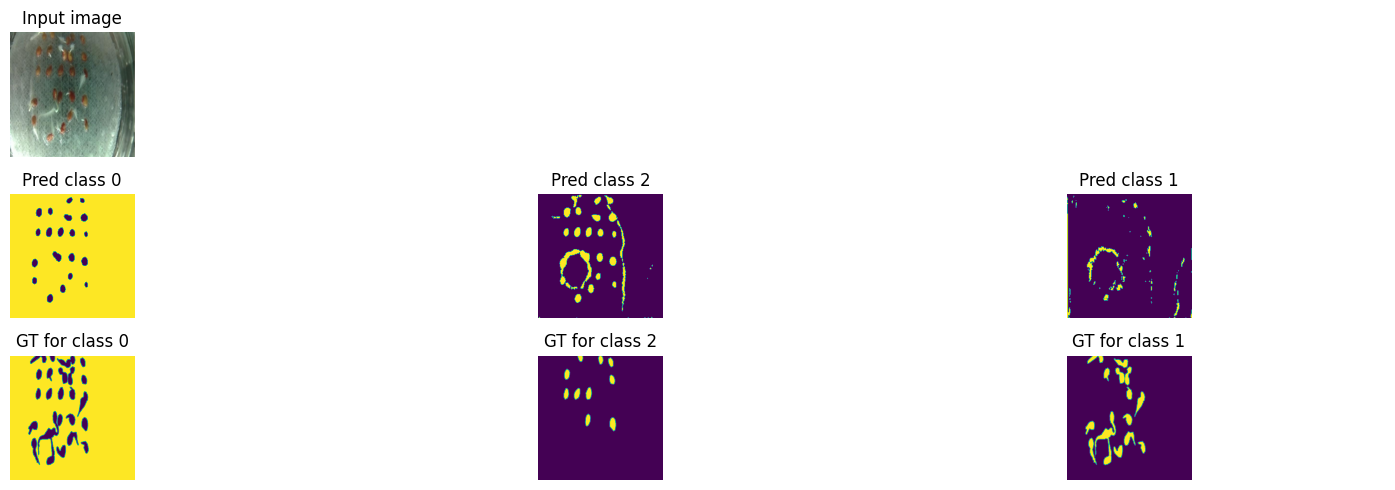

Train loss: 0.04854 | Time: 0m 58s | Val loss: 0.02955
Train_DICE_avg: 0.38119 | Train_Jaccard_avg: 0.30400 | Train_Sensitivity_avg: 0.53188 | Train_Specificity_avg: 0.71465 
Class 0 - Train_DICE: 0.58647 | Train_Jaccard: 0.49367 | Train_Sensitivity: 0.99035 | Train_Specificity: 0.17067 
Class 1 - Train_DICE: 0.02494 | Train_Jaccard: 0.01625 | Train_Sensitivity: 0.05603 | Train_Specificity: 0.98557 
Class 2 - Train_DICE: 0.53216 | Train_Jaccard: 0.40209 | Train_Sensitivity: 0.54927 | Train_Specificity: 0.98771 
Val_DICE_avg: 0.50547 | Val_Jaccard_avg: 0.46301 | Val_Sensitivity_avg: 0.74626 | Val_Specificity_avg: 0.74441 
Class 0 - Val_DICE: 0.96593 | Val_Jaccard: 0.93460 | Val_Sensitivity: 0.99595 | Val_Specificity: 0.26789 
Class 1 - Val_DICE: 0.15248 | Val_Jaccard: 0.15018 | Val_Sensitivity: 0.34439 | Val_Specificity: 0.98842 
Class 2 - Val_DICE: 0.39799 | Val_Jaccard: 0.30425 | Val_Sensitivity: 0.89845 | Val_Specificity: 0.97691 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.02419 | Time: 1m 56s | Val loss: 0.01944
Train_DICE_avg: 0.57720 | Train_Jaccard_avg: 0.52295 | Train_Sensitivity_avg: 0.81461 | Train_Specificity_avg: 0.82114 
Class 0 - Train_DICE: 0.96835 | Train_Jaccard: 0.93905 | Train_Sensitivity: 0.99289 | Train_Specificity: 0.49376 
Class 1 - Train_DICE: 0.15340 | Train_Jaccard: 0.15328 | Train_Sensitivity: 0.59948 | Train_Specificity: 0.98563 
Class 2 - Train_DICE: 0.60985 | Train_Jaccard: 0.47653 | Train_Sensitivity: 0.85147 | Train_Specificity: 0.98404 
Val_DICE_avg: 0.62415 | Val_Jaccard_avg: 0.58307 | Val_Sensitivity_avg: 0.97098 | Val_Specificity_avg: 0.85224 
Class 0 - Val_DICE: 0.99083 | Val_Jaccard: 0.98186 | Val_Sensitivity: 0.99468 | Val_Specificity: 0.59514 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.41338 | Val_Jaccard: 0.29911 | Val_Sensitivity: 0.91826 | Val_Specificity: 0.97326 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.01837 | Time: 2m 53s | Val loss: 0.01621
Train_DICE_avg: 0.62996 | Train_Jaccard_avg: 0.57791 | Train_Sensitivity_avg: 0.93407 | Train_Specificity_avg: 0.86181 
Class 0 - Train_DICE: 0.98100 | Train_Jaccard: 0.96284 | Train_Sensitivity: 0.99286 | Train_Specificity: 0.61537 
Class 1 - Train_DICE: 0.26428 | Train_Jaccard: 0.26415 | Train_Sensitivity: 0.94273 | Train_Specificity: 0.98586 
Class 2 - Train_DICE: 0.64460 | Train_Jaccard: 0.50672 | Train_Sensitivity: 0.86662 | Train_Specificity: 0.98421 
Val_DICE_avg: 0.57255 | Val_Jaccard_avg: 0.53817 | Val_Sensitivity_avg: 0.95516 | Val_Specificity_avg: 0.89472 
Class 0 - Val_DICE: 0.99335 | Val_Jaccard: 0.98683 | Val_Sensitivity: 0.99348 | Val_Specificity: 0.72775 
Class 1 - Val_DICE: 0.42680 | Val_Jaccard: 0.42504 | Val_Sensitivity: 0.92336 | Val_Specificity: 0.98843 
Class 2 - Val_DICE: 0.29751 | Val_Jaccard: 0.20263 | Val_Sensitivity: 0.94863 | Val_Specificity: 0.96797 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.01487 | Time: 3m 52s | Val loss: 0.01297
Train_DICE_avg: 0.65201 | Train_Jaccard_avg: 0.59939 | Train_Sensitivity_avg: 0.94547 | Train_Specificity_avg: 0.87530 
Class 0 - Train_DICE: 0.98391 | Train_Jaccard: 0.96844 | Train_Sensitivity: 0.99256 | Train_Specificity: 0.65502 
Class 1 - Train_DICE: 0.29467 | Train_Jaccard: 0.29012 | Train_Sensitivity: 0.96296 | Train_Specificity: 0.98590 
Class 2 - Train_DICE: 0.67745 | Train_Jaccard: 0.53962 | Train_Sensitivity: 0.88089 | Train_Specificity: 0.98496 
Val_DICE_avg: 0.65625 | Val_Jaccard_avg: 0.60471 | Val_Sensitivity_avg: 0.96842 | Val_Specificity_avg: 0.86460 
Class 0 - Val_DICE: 0.99241 | Val_Jaccard: 0.98497 | Val_Sensitivity: 0.99730 | Val_Specificity: 0.62898 
Class 1 - Val_DICE: 0.47366 | Val_Jaccard: 0.46277 | Val_Sensitivity: 0.95815 | Val_Specificity: 0.98914 
Class 2 - Val_DICE: 0.50268 | Val_Jaccard: 0.36640 | Val_Sensitivity: 0.94980 | Val_Specificity: 0.97567 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.01240 | Time: 4m 51s | Val loss: 0.01092
Train_DICE_avg: 0.66728 | Train_Jaccard_avg: 0.61106 | Train_Sensitivity_avg: 0.93981 | Train_Specificity_avg: 0.88557 
Class 0 - Train_DICE: 0.98598 | Train_Jaccard: 0.97243 | Train_Sensitivity: 0.99314 | Train_Specificity: 0.68458 
Class 1 - Train_DICE: 0.32628 | Train_Jaccard: 0.30775 | Train_Sensitivity: 0.93626 | Train_Specificity: 0.98670 
Class 2 - Train_DICE: 0.68959 | Train_Jaccard: 0.55301 | Train_Sensitivity: 0.89003 | Train_Specificity: 0.98542 
Val_DICE_avg: 0.69232 | Val_Jaccard_avg: 0.63088 | Val_Sensitivity_avg: 0.94672 | Val_Specificity_avg: 0.84773 
Class 0 - Val_DICE: 0.99069 | Val_Jaccard: 0.98159 | Val_Sensitivity: 0.99832 | Val_Specificity: 0.57394 
Class 1 - Val_DICE: 0.48414 | Val_Jaccard: 0.45797 | Val_Sensitivity: 0.89306 | Val_Specificity: 0.99056 
Class 2 - Val_DICE: 0.60214 | Val_Jaccard: 0.45307 | Val_Sensitivity: 0.94879 | Val_Specificity: 0.97868 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


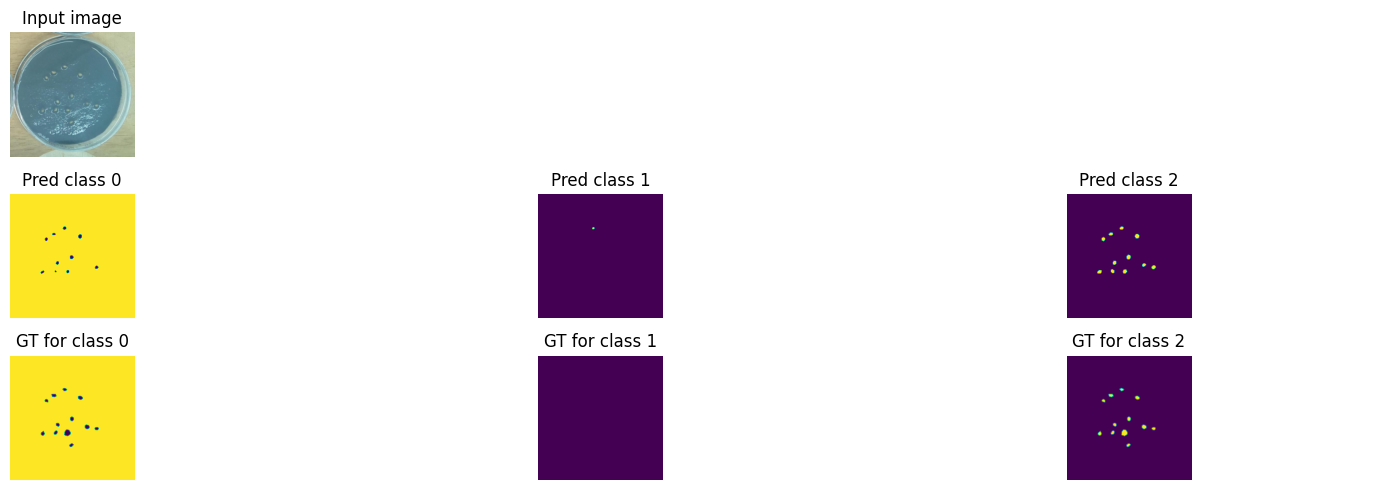

Train loss: 0.01062 | Time: 5m 50s | Val loss: 0.00920
Train_DICE_avg: 0.68062 | Train_Jaccard_avg: 0.62008 | Train_Sensitivity_avg: 0.93131 | Train_Specificity_avg: 0.89208 
Class 0 - Train_DICE: 0.98704 | Train_Jaccard: 0.97449 | Train_Sensitivity: 0.99285 | Train_Specificity: 0.70320 
Class 1 - Train_DICE: 0.34569 | Train_Jaccard: 0.31411 | Train_Sensitivity: 0.90364 | Train_Specificity: 0.98725 
Class 2 - Train_DICE: 0.70913 | Train_Jaccard: 0.57163 | Train_Sensitivity: 0.89743 | Train_Specificity: 0.98577 
Val_DICE_avg: 0.73438 | Val_Jaccard_avg: 0.67315 | Val_Sensitivity_avg: 0.96642 | Val_Specificity_avg: 0.85216 
Class 0 - Val_DICE: 0.99117 | Val_Jaccard: 0.98253 | Val_Sensitivity: 0.99859 | Val_Specificity: 0.58361 
Class 1 - Val_DICE: 0.54397 | Val_Jaccard: 0.51325 | Val_Sensitivity: 0.96253 | Val_Specificity: 0.99048 
Class 2 - Val_DICE: 0.66799 | Val_Jaccard: 0.52367 | Val_Sensitivity: 0.93814 | Val_Specificity: 0.98239 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.00914 | Time: 6m 48s | Val loss: 0.00790
Train_DICE_avg: 0.69750 | Train_Jaccard_avg: 0.63484 | Train_Sensitivity_avg: 0.93336 | Train_Specificity_avg: 0.89708 
Class 0 - Train_DICE: 0.98795 | Train_Jaccard: 0.97625 | Train_Sensitivity: 0.99352 | Train_Specificity: 0.71740 
Class 1 - Train_DICE: 0.38155 | Train_Jaccard: 0.34036 | Train_Sensitivity: 0.90282 | Train_Specificity: 0.98749 
Class 2 - Train_DICE: 0.72300 | Train_Jaccard: 0.58790 | Train_Sensitivity: 0.90375 | Train_Specificity: 0.98635 
Val_DICE_avg: 0.74820 | Val_Jaccard_avg: 0.68378 | Val_Sensitivity_avg: 0.95711 | Val_Specificity_avg: 0.84709 
Class 0 - Val_DICE: 0.99051 | Val_Jaccard: 0.98123 | Val_Sensitivity: 0.99884 | Val_Specificity: 0.56669 
Class 1 - Val_DICE: 0.57661 | Val_Jaccard: 0.53504 | Val_Sensitivity: 0.92382 | Val_Specificity: 0.99171 
Class 2 - Val_DICE: 0.67747 | Val_Jaccard: 0.53506 | Val_Sensitivity: 0.94869 | Val_Specificity: 0.98286 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00809 | Time: 7m 46s | Val loss: 0.00685
Train_DICE_avg: 0.70829 | Train_Jaccard_avg: 0.64422 | Train_Sensitivity_avg: 0.93087 | Train_Specificity_avg: 0.89958 
Class 0 - Train_DICE: 0.98841 | Train_Jaccard: 0.97715 | Train_Sensitivity: 0.99351 | Train_Specificity: 0.72386 
Class 1 - Train_DICE: 0.40565 | Train_Jaccard: 0.35855 | Train_Sensitivity: 0.89384 | Train_Specificity: 0.98817 
Class 2 - Train_DICE: 0.73080 | Train_Jaccard: 0.59696 | Train_Sensitivity: 0.90525 | Train_Specificity: 0.98670 
Val_DICE_avg: 0.75563 | Val_Jaccard_avg: 0.68643 | Val_Sensitivity_avg: 0.94316 | Val_Specificity_avg: 0.85260 
Class 0 - Val_DICE: 0.99071 | Val_Jaccard: 0.98166 | Val_Sensitivity: 0.99906 | Val_Specificity: 0.58206 
Class 1 - Val_DICE: 0.60422 | Val_Jaccard: 0.54982 | Val_Sensitivity: 0.87054 | Val_Specificity: 0.99320 
Class 2 - Val_DICE: 0.67195 | Val_Jaccard: 0.52782 | Val_Sensitivity: 0.95988 | Val_Specificity: 0.98253 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.00721 | Time: 8m 43s | Val loss: 0.00605
Train_DICE_avg: 0.71377 | Train_Jaccard_avg: 0.64841 | Train_Sensitivity_avg: 0.92435 | Train_Specificity_avg: 0.90267 
Class 0 - Train_DICE: 0.98884 | Train_Jaccard: 0.97798 | Train_Sensitivity: 0.99368 | Train_Specificity: 0.73263 
Class 1 - Train_DICE: 0.41398 | Train_Jaccard: 0.36118 | Train_Sensitivity: 0.87312 | Train_Specificity: 0.98839 
Class 2 - Train_DICE: 0.73848 | Train_Jaccard: 0.60606 | Train_Sensitivity: 0.90625 | Train_Specificity: 0.98700 
Val_DICE_avg: 0.78238 | Val_Jaccard_avg: 0.71112 | Val_Sensitivity_avg: 0.94139 | Val_Specificity_avg: 0.84777 
Class 0 - Val_DICE: 0.99046 | Val_Jaccard: 0.98114 | Val_Sensitivity: 0.99917 | Val_Specificity: 0.56634 
Class 1 - Val_DICE: 0.65334 | Val_Jaccard: 0.59198 | Val_Sensitivity: 0.86645 | Val_Specificity: 0.99384 
Class 2 - Val_DICE: 0.70333 | Val_Jaccard: 0.56025 | Val_Sensitivity: 0.95855 | Val_Specificity: 0.98314 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.00649 | Time: 9m 41s | Val loss: 0.00536
Train_DICE_avg: 0.72374 | Train_Jaccard_avg: 0.65734 | Train_Sensitivity_avg: 0.92209 | Train_Specificity_avg: 0.90546 
Class 0 - Train_DICE: 0.98931 | Train_Jaccard: 0.97889 | Train_Sensitivity: 0.99386 | Train_Specificity: 0.74051 
Class 1 - Train_DICE: 0.43601 | Train_Jaccard: 0.37933 | Train_Sensitivity: 0.86169 | Train_Specificity: 0.98882 
Class 2 - Train_DICE: 0.74589 | Train_Jaccard: 0.61379 | Train_Sensitivity: 0.91072 | Train_Specificity: 0.98705 
Val_DICE_avg: 0.77283 | Val_Jaccard_avg: 0.70396 | Val_Sensitivity_avg: 0.95064 | Val_Specificity_avg: 0.85615 
Class 0 - Val_DICE: 0.99121 | Val_Jaccard: 0.98262 | Val_Sensitivity: 0.99910 | Val_Specificity: 0.59165 
Class 1 - Val_DICE: 0.61917 | Val_Jaccard: 0.56455 | Val_Sensitivity: 0.89696 | Val_Specificity: 0.99307 
Class 2 - Val_DICE: 0.70812 | Val_Jaccard: 0.56471 | Val_Sensitivity: 0.95588 | Val_Specificity: 0.98373 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


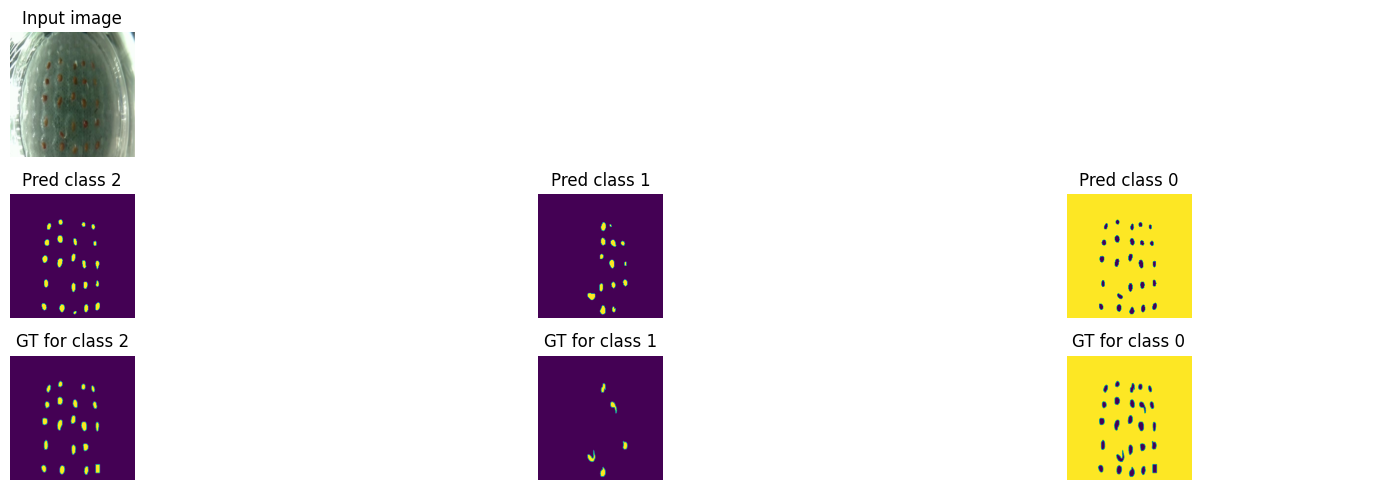

Train loss: 0.00559 | Time: 10m 41s | Val loss: 0.00418
Train_DICE_avg: 0.72790 | Train_Jaccard_avg: 0.66133 | Train_Sensitivity_avg: 0.92519 | Train_Specificity_avg: 0.90848 
Class 0 - Train_DICE: 0.98979 | Train_Jaccard: 0.97983 | Train_Sensitivity: 0.99392 | Train_Specificity: 0.74915 
Class 1 - Train_DICE: 0.44264 | Train_Jaccard: 0.38368 | Train_Sensitivity: 0.87080 | Train_Specificity: 0.98889 
Class 2 - Train_DICE: 0.75126 | Train_Jaccard: 0.62049 | Train_Sensitivity: 0.91086 | Train_Specificity: 0.98741 
Val_DICE_avg: 0.77283 | Val_Jaccard_avg: 0.70088 | Val_Sensitivity_avg: 0.94814 | Val_Specificity_avg: 0.86971 
Class 0 - Val_DICE: 0.99255 | Val_Jaccard: 0.98524 | Val_Sensitivity: 0.99899 | Val_Specificity: 0.63337 
Class 1 - Val_DICE: 0.65720 | Val_Jaccard: 0.59437 | Val_Sensitivity: 0.87476 | Val_Specificity: 0.99393 
Class 2 - Val_DICE: 0.66873 | Val_Jaccard: 0.52303 | Val_Sensitivity: 0.97067 | Val_Specificity: 0.98183 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00465 | Time: 11m 41s | Val loss: 0.00356
Train_DICE_avg: 0.73632 | Train_Jaccard_avg: 0.66967 | Train_Sensitivity_avg: 0.92232 | Train_Specificity_avg: 0.91065 
Class 0 - Train_DICE: 0.99014 | Train_Jaccard: 0.98052 | Train_Sensitivity: 0.99403 | Train_Specificity: 0.75507 
Class 1 - Train_DICE: 0.45585 | Train_Jaccard: 0.39453 | Train_Sensitivity: 0.86032 | Train_Specificity: 0.98915 
Class 2 - Train_DICE: 0.76298 | Train_Jaccard: 0.63397 | Train_Sensitivity: 0.91262 | Train_Specificity: 0.98774 
Val_DICE_avg: 0.78053 | Val_Jaccard_avg: 0.70948 | Val_Sensitivity_avg: 0.94973 | Val_Specificity_avg: 0.87429 
Class 0 - Val_DICE: 0.99268 | Val_Jaccard: 0.98552 | Val_Sensitivity: 0.99906 | Val_Specificity: 0.64593 
Class 1 - Val_DICE: 0.65795 | Val_Jaccard: 0.59660 | Val_Sensitivity: 0.88141 | Val_Specificity: 0.99413 
Class 2 - Val_DICE: 0.69095 | Val_Jaccard: 0.54631 | Val_Sensitivity: 0.96873 | Val_Specificity: 0.98282 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00408 | Time: 12m 41s | Val loss: 0.00302
Train_DICE_avg: 0.74486 | Train_Jaccard_avg: 0.67799 | Train_Sensitivity_avg: 0.92459 | Train_Specificity_avg: 0.91167 
Class 0 - Train_DICE: 0.99020 | Train_Jaccard: 0.98064 | Train_Sensitivity: 0.99384 | Train_Specificity: 0.75768 
Class 1 - Train_DICE: 0.47462 | Train_Jaccard: 0.41146 | Train_Sensitivity: 0.86586 | Train_Specificity: 0.98934 
Class 2 - Train_DICE: 0.76977 | Train_Jaccard: 0.64187 | Train_Sensitivity: 0.91407 | Train_Specificity: 0.98799 
Val_DICE_avg: 0.77460 | Val_Jaccard_avg: 0.70387 | Val_Sensitivity_avg: 0.96345 | Val_Specificity_avg: 0.87733 
Class 0 - Val_DICE: 0.99319 | Val_Jaccard: 0.98652 | Val_Sensitivity: 0.99890 | Val_Specificity: 0.65619 
Class 1 - Val_DICE: 0.65470 | Val_Jaccard: 0.59296 | Val_Sensitivity: 0.92124 | Val_Specificity: 0.99314 
Class 2 - Val_DICE: 0.67590 | Val_Jaccard: 0.53213 | Val_Sensitivity: 0.97021 | Val_Specificity: 0.98267 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00366 | Time: 13m 41s | Val loss: 0.00274
Train_DICE_avg: 0.74536 | Train_Jaccard_avg: 0.67881 | Train_Sensitivity_avg: 0.92755 | Train_Specificity_avg: 0.91367 
Class 0 - Train_DICE: 0.99083 | Train_Jaccard: 0.98188 | Train_Sensitivity: 0.99441 | Train_Specificity: 0.76332 
Class 1 - Train_DICE: 0.47211 | Train_Jaccard: 0.40795 | Train_Sensitivity: 0.86862 | Train_Specificity: 0.98937 
Class 2 - Train_DICE: 0.77314 | Train_Jaccard: 0.64660 | Train_Sensitivity: 0.91962 | Train_Specificity: 0.98831 
Val_DICE_avg: 0.80412 | Val_Jaccard_avg: 0.73412 | Val_Sensitivity_avg: 0.95568 | Val_Specificity_avg: 0.86648 
Class 0 - Val_DICE: 0.99228 | Val_Jaccard: 0.98471 | Val_Sensitivity: 0.99917 | Val_Specificity: 0.62071 
Class 1 - Val_DICE: 0.68655 | Val_Jaccard: 0.62401 | Val_Sensitivity: 0.90363 | Val_Specificity: 0.99394 
Class 2 - Val_DICE: 0.73355 | Val_Jaccard: 0.59363 | Val_Sensitivity: 0.96426 | Val_Specificity: 0.98478 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.00335 | Time: 14m 41s | Val loss: 0.00255
Train_DICE_avg: 0.75230 | Train_Jaccard_avg: 0.68585 | Train_Sensitivity_avg: 0.92597 | Train_Specificity_avg: 0.91646 
Class 0 - Train_DICE: 0.99111 | Train_Jaccard: 0.98243 | Train_Sensitivity: 0.99459 | Train_Specificity: 0.77108 
Class 1 - Train_DICE: 0.48658 | Train_Jaccard: 0.42049 | Train_Sensitivity: 0.86435 | Train_Specificity: 0.98970 
Class 2 - Train_DICE: 0.77922 | Train_Jaccard: 0.65463 | Train_Sensitivity: 0.91896 | Train_Specificity: 0.98860 
Val_DICE_avg: 0.79130 | Val_Jaccard_avg: 0.72275 | Val_Sensitivity_avg: 0.95921 | Val_Specificity_avg: 0.87580 
Class 0 - Val_DICE: 0.99301 | Val_Jaccard: 0.98614 | Val_Sensitivity: 0.99909 | Val_Specificity: 0.64940 
Class 1 - Val_DICE: 0.65701 | Val_Jaccard: 0.59804 | Val_Sensitivity: 0.92965 | Val_Specificity: 0.99300 
Class 2 - Val_DICE: 0.72389 | Val_Jaccard: 0.58406 | Val_Sensitivity: 0.94887 | Val_Specificity: 0.98499 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


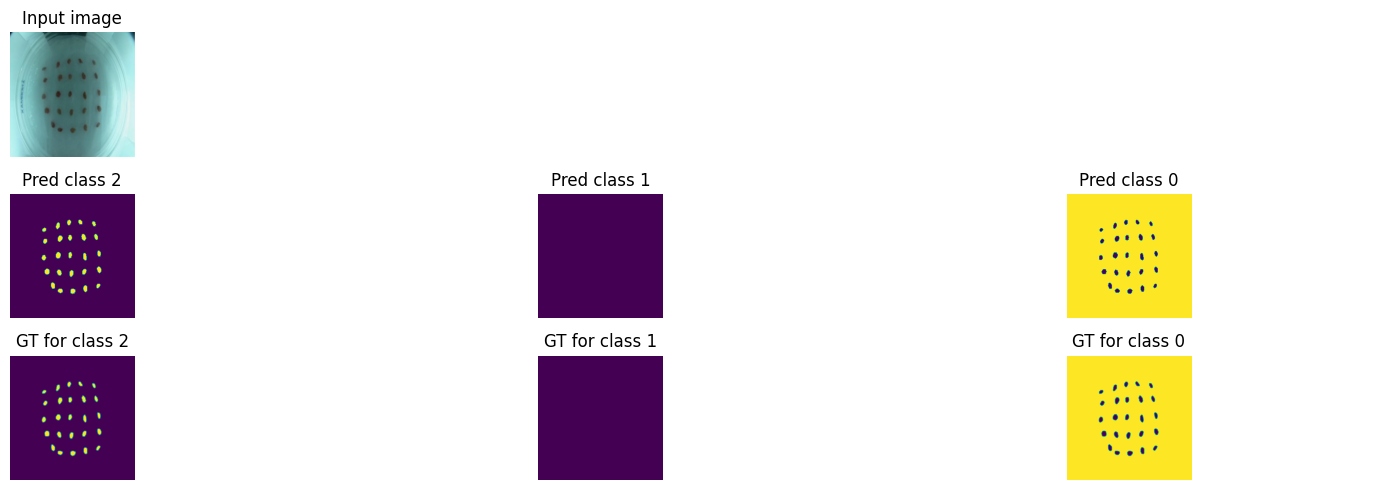

Train loss: 0.00318 | Time: 15m 41s | Val loss: 0.00245
Train_DICE_avg: 0.75889 | Train_Jaccard_avg: 0.69207 | Train_Sensitivity_avg: 0.92214 | Train_Specificity_avg: 0.91953 
Class 0 - Train_DICE: 0.99123 | Train_Jaccard: 0.98266 | Train_Sensitivity: 0.99460 | Train_Specificity: 0.77941 
Class 1 - Train_DICE: 0.50156 | Train_Jaccard: 0.43256 | Train_Sensitivity: 0.85642 | Train_Specificity: 0.99012 
Class 2 - Train_DICE: 0.78387 | Train_Jaccard: 0.66098 | Train_Sensitivity: 0.91541 | Train_Specificity: 0.98904 
Val_DICE_avg: 0.78750 | Val_Jaccard_avg: 0.71776 | Val_Sensitivity_avg: 0.92862 | Val_Specificity_avg: 0.86309 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98453 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.61005 
Class 1 - Val_DICE: 0.62906 | Val_Jaccard: 0.56235 | Val_Sensitivity: 0.81974 | Val_Specificity: 0.99453 
Class 2 - Val_DICE: 0.74127 | Val_Jaccard: 0.60639 | Val_Sensitivity: 0.96690 | Val_Specificity: 0.98470 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train loss: 0.00300 | Time: 16m 41s | Val loss: 0.00233
Train_DICE_avg: 0.75676 | Train_Jaccard_avg: 0.68954 | Train_Sensitivity_avg: 0.92480 | Train_Specificity_avg: 0.91564 
Class 0 - Train_DICE: 0.99135 | Train_Jaccard: 0.98288 | Train_Sensitivity: 0.99513 | Train_Specificity: 0.76847 
Class 1 - Train_DICE: 0.49296 | Train_Jaccard: 0.42320 | Train_Sensitivity: 0.85752 | Train_Specificity: 0.98971 
Class 2 - Train_DICE: 0.78597 | Train_Jaccard: 0.66253 | Train_Sensitivity: 0.92175 | Train_Specificity: 0.98874 
Val_DICE_avg: 0.81414 | Val_Jaccard_avg: 0.74472 | Val_Sensitivity_avg: 0.95183 | Val_Specificity_avg: 0.85769 
Class 0 - Val_DICE: 0.99122 | Val_Jaccard: 0.98264 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.59264 
Class 1 - Val_DICE: 0.69262 | Val_Jaccard: 0.62521 | Val_Sensitivity: 0.88255 | Val_Specificity: 0.99439 
Class 2 - Val_DICE: 0.75856 | Val_Jaccard: 0.62630 | Val_Sensitivity: 0.97367 | Val_Specificity: 0.98605 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.00286 | Time: 17m 41s | Val loss: 0.00221
Train_DICE_avg: 0.76644 | Train_Jaccard_avg: 0.69942 | Train_Sensitivity_avg: 0.92648 | Train_Specificity_avg: 0.91841 
Class 0 - Train_DICE: 0.99144 | Train_Jaccard: 0.98307 | Train_Sensitivity: 0.99494 | Train_Specificity: 0.77611 
Class 1 - Train_DICE: 0.51552 | Train_Jaccard: 0.44432 | Train_Sensitivity: 0.86172 | Train_Specificity: 0.99006 
Class 2 - Train_DICE: 0.79234 | Train_Jaccard: 0.67087 | Train_Sensitivity: 0.92277 | Train_Specificity: 0.98906 
Val_DICE_avg: 0.79403 | Val_Jaccard_avg: 0.71934 | Val_Sensitivity_avg: 0.94359 | Val_Specificity_avg: 0.87090 
Class 0 - Val_DICE: 0.99303 | Val_Jaccard: 0.98618 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.63545 
Class 1 - Val_DICE: 0.69663 | Val_Jaccard: 0.62367 | Val_Sensitivity: 0.87625 | Val_Specificity: 0.99434 
Class 2 - Val_DICE: 0.69244 | Val_Jaccard: 0.54816 | Val_Sensitivity: 0.95534 | Val_Specificity: 0.98291 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.00274 | Time: 18m 42s | Val loss: 0.00203
Train_DICE_avg: 0.76817 | Train_Jaccard_avg: 0.70176 | Train_Sensitivity_avg: 0.92118 | Train_Specificity_avg: 0.92210 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98371 | Train_Sensitivity: 0.99521 | Train_Specificity: 0.78642 
Class 1 - Train_DICE: 0.51433 | Train_Jaccard: 0.44265 | Train_Sensitivity: 0.84891 | Train_Specificity: 0.99039 
Class 2 - Train_DICE: 0.79841 | Train_Jaccard: 0.67893 | Train_Sensitivity: 0.91943 | Train_Specificity: 0.98948 
Val_DICE_avg: 0.80557 | Val_Jaccard_avg: 0.73453 | Val_Sensitivity_avg: 0.96182 | Val_Specificity_avg: 0.86539 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98455 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61738 
Class 1 - Val_DICE: 0.69393 | Val_Jaccard: 0.62743 | Val_Sensitivity: 0.91633 | Val_Specificity: 0.99407 
Class 2 - Val_DICE: 0.73060 | Val_Jaccard: 0.59160 | Val_Sensitivity: 0.96976 | Val_Specificity: 0.98472 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00268 | Time: 19m 43s | Val loss: 0.00210
Train_DICE_avg: 0.77231 | Train_Jaccard_avg: 0.70602 | Train_Sensitivity_avg: 0.92642 | Train_Specificity_avg: 0.92031 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98371 | Train_Sensitivity: 0.99534 | Train_Specificity: 0.78138 
Class 1 - Train_DICE: 0.52856 | Train_Jaccard: 0.45767 | Train_Sensitivity: 0.86002 | Train_Specificity: 0.99024 
Class 2 - Train_DICE: 0.79658 | Train_Jaccard: 0.67666 | Train_Sensitivity: 0.92390 | Train_Specificity: 0.98931 
Val_DICE_avg: 0.78819 | Val_Jaccard_avg: 0.71510 | Val_Sensitivity_avg: 0.93624 | Val_Specificity_avg: 0.86588 
Class 0 - Val_DICE: 0.99235 | Val_Jaccard: 0.98484 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.61937 
Class 1 - Val_DICE: 0.63728 | Val_Jaccard: 0.56641 | Val_Sensitivity: 0.83601 | Val_Specificity: 0.99410 
Class 2 - Val_DICE: 0.73494 | Val_Jaccard: 0.59406 | Val_Sensitivity: 0.97346 | Val_Specificity: 0.98415 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


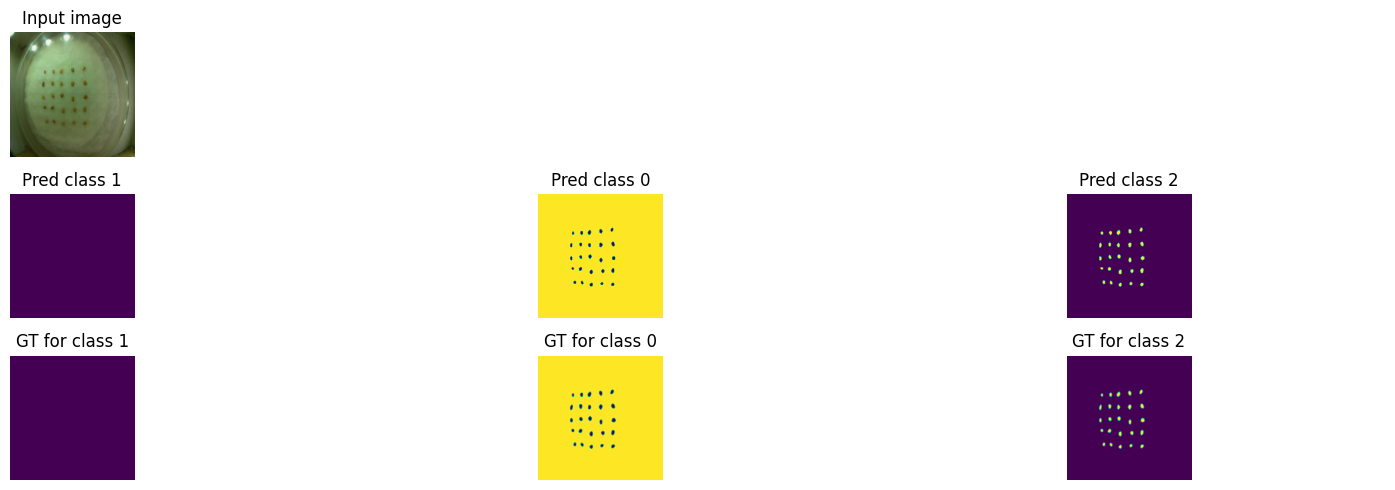

Train loss: 0.00259 | Time: 20m 46s | Val loss: 0.00187
Train_DICE_avg: 0.76999 | Train_Jaccard_avg: 0.70391 | Train_Sensitivity_avg: 0.92542 | Train_Specificity_avg: 0.92018 
Class 0 - Train_DICE: 0.99190 | Train_Jaccard: 0.98396 | Train_Sensitivity: 0.99548 | Train_Specificity: 0.78097 
Class 1 - Train_DICE: 0.52088 | Train_Jaccard: 0.44983 | Train_Sensitivity: 0.85886 | Train_Specificity: 0.99014 
Class 2 - Train_DICE: 0.79721 | Train_Jaccard: 0.67794 | Train_Sensitivity: 0.92193 | Train_Specificity: 0.98942 
Val_DICE_avg: 0.80612 | Val_Jaccard_avg: 0.73371 | Val_Sensitivity_avg: 0.95290 | Val_Specificity_avg: 0.87675 
Class 0 - Val_DICE: 0.99343 | Val_Jaccard: 0.98698 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.65133 
Class 1 - Val_DICE: 0.68943 | Val_Jaccard: 0.61652 | Val_Sensitivity: 0.88380 | Val_Specificity: 0.99423 
Class 2 - Val_DICE: 0.73551 | Val_Jaccard: 0.59765 | Val_Sensitivity: 0.97573 | Val_Specificity: 0.98470 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.00249 | Time: 21m 48s | Val loss: 0.00184
Train_DICE_avg: 0.77132 | Train_Jaccard_avg: 0.70468 | Train_Sensitivity_avg: 0.92628 | Train_Specificity_avg: 0.91918 
Class 0 - Train_DICE: 0.99179 | Train_Jaccard: 0.98376 | Train_Sensitivity: 0.99544 | Train_Specificity: 0.77789 
Class 1 - Train_DICE: 0.52125 | Train_Jaccard: 0.44826 | Train_Sensitivity: 0.85710 | Train_Specificity: 0.99033 
Class 2 - Train_DICE: 0.80091 | Train_Jaccard: 0.68203 | Train_Sensitivity: 0.92629 | Train_Specificity: 0.98932 
Val_DICE_avg: 0.81674 | Val_Jaccard_avg: 0.74889 | Val_Sensitivity_avg: 0.95775 | Val_Specificity_avg: 0.86593 
Class 0 - Val_DICE: 0.99215 | Val_Jaccard: 0.98445 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.61753 
Class 1 - Val_DICE: 0.68181 | Val_Jaccard: 0.61693 | Val_Sensitivity: 0.90874 | Val_Specificity: 0.99370 
Class 2 - Val_DICE: 0.77625 | Val_Jaccard: 0.64531 | Val_Sensitivity: 0.96531 | Val_Specificity: 0.98656 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.00241 | Time: 22m 50s | Val loss: 0.00179
Train_DICE_avg: 0.77109 | Train_Jaccard_avg: 0.70449 | Train_Sensitivity_avg: 0.92589 | Train_Specificity_avg: 0.91987 
Class 0 - Train_DICE: 0.99197 | Train_Jaccard: 0.98410 | Train_Sensitivity: 0.99568 | Train_Specificity: 0.78010 
Class 1 - Train_DICE: 0.51970 | Train_Jaccard: 0.44689 | Train_Sensitivity: 0.86080 | Train_Specificity: 0.99004 
Class 2 - Train_DICE: 0.80160 | Train_Jaccard: 0.68248 | Train_Sensitivity: 0.92120 | Train_Specificity: 0.98947 
Val_DICE_avg: 0.82555 | Val_Jaccard_avg: 0.75444 | Val_Sensitivity_avg: 0.95553 | Val_Specificity_avg: 0.86667 
Class 0 - Val_DICE: 0.99232 | Val_Jaccard: 0.98480 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61943 
Class 1 - Val_DICE: 0.72965 | Val_Jaccard: 0.65786 | Val_Sensitivity: 0.89283 | Val_Specificity: 0.99484 
Class 2 - Val_DICE: 0.75468 | Val_Jaccard: 0.62064 | Val_Sensitivity: 0.97441 | Val_Specificity: 0.98576 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.00236 | Time: 23m 51s | Val loss: 0.00171
Train_DICE_avg: 0.77477 | Train_Jaccard_avg: 0.70819 | Train_Sensitivity_avg: 0.92622 | Train_Specificity_avg: 0.91925 
Class 0 - Train_DICE: 0.99194 | Train_Jaccard: 0.98405 | Train_Sensitivity: 0.99560 | Train_Specificity: 0.77782 
Class 1 - Train_DICE: 0.52956 | Train_Jaccard: 0.45620 | Train_Sensitivity: 0.85469 | Train_Specificity: 0.99051 
Class 2 - Train_DICE: 0.80282 | Train_Jaccard: 0.68432 | Train_Sensitivity: 0.92838 | Train_Specificity: 0.98941 
Val_DICE_avg: 0.83356 | Val_Jaccard_avg: 0.76339 | Val_Sensitivity_avg: 0.95983 | Val_Specificity_avg: 0.86857 
Class 0 - Val_DICE: 0.99225 | Val_Jaccard: 0.98467 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62453 
Class 1 - Val_DICE: 0.73748 | Val_Jaccard: 0.66640 | Val_Sensitivity: 0.91179 | Val_Specificity: 0.99472 
Class 2 - Val_DICE: 0.77095 | Val_Jaccard: 0.63910 | Val_Sensitivity: 0.96833 | Val_Specificity: 0.98646 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.00232 | Time: 24m 53s | Val loss: 0.00174
Train_DICE_avg: 0.77551 | Train_Jaccard_avg: 0.70989 | Train_Sensitivity_avg: 0.92597 | Train_Specificity_avg: 0.92252 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98467 | Train_Sensitivity: 0.99590 | Train_Specificity: 0.78717 
Class 1 - Train_DICE: 0.52687 | Train_Jaccard: 0.45335 | Train_Sensitivity: 0.85555 | Train_Specificity: 0.99045 
Class 2 - Train_DICE: 0.80740 | Train_Jaccard: 0.69164 | Train_Sensitivity: 0.92646 | Train_Specificity: 0.98995 
Val_DICE_avg: 0.82885 | Val_Jaccard_avg: 0.76008 | Val_Sensitivity_avg: 0.95982 | Val_Specificity_avg: 0.86279 
Class 0 - Val_DICE: 0.99169 | Val_Jaccard: 0.98358 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.60692 
Class 1 - Val_DICE: 0.71923 | Val_Jaccard: 0.65148 | Val_Sensitivity: 0.91461 | Val_Specificity: 0.99477 
Class 2 - Val_DICE: 0.77563 | Val_Jaccard: 0.64519 | Val_Sensitivity: 0.96545 | Val_Specificity: 0.98667 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


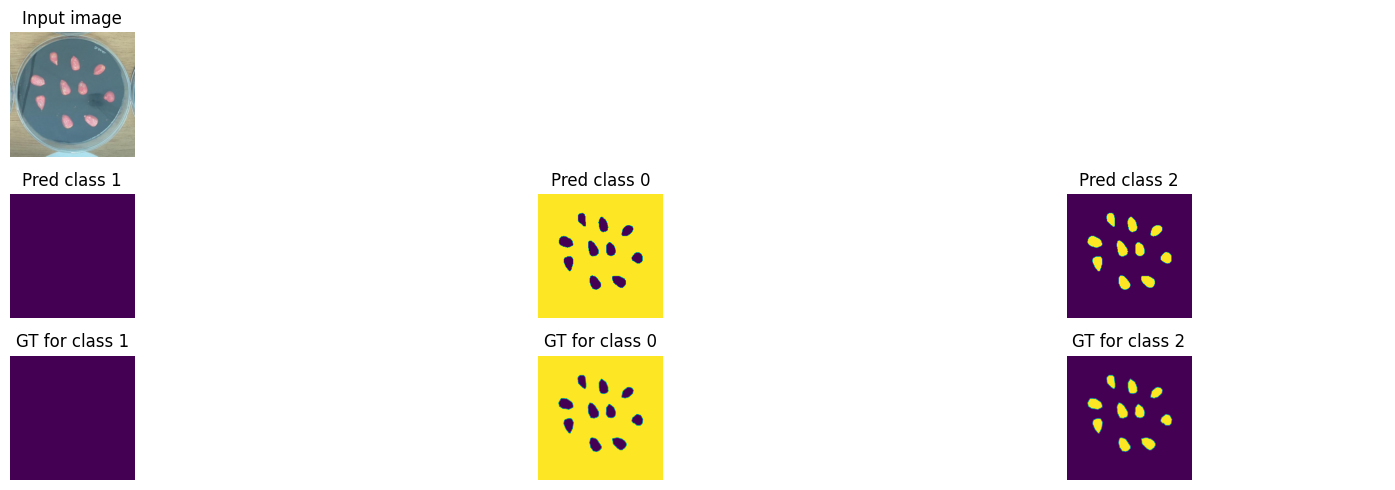

Train loss: 0.00225 | Time: 25m 55s | Val loss: 0.00173
Train_DICE_avg: 0.77720 | Train_Jaccard_avg: 0.71143 | Train_Sensitivity_avg: 0.92727 | Train_Specificity_avg: 0.92102 
Class 0 - Train_DICE: 0.99230 | Train_Jaccard: 0.98475 | Train_Sensitivity: 0.99604 | Train_Specificity: 0.78294 
Class 1 - Train_DICE: 0.53100 | Train_Jaccard: 0.45787 | Train_Sensitivity: 0.85812 | Train_Specificity: 0.99040 
Class 2 - Train_DICE: 0.80829 | Train_Jaccard: 0.69166 | Train_Sensitivity: 0.92764 | Train_Specificity: 0.98972 
Val_DICE_avg: 0.83046 | Val_Jaccard_avg: 0.75974 | Val_Sensitivity_avg: 0.95001 | Val_Specificity_avg: 0.86840 
Class 0 - Val_DICE: 0.99251 | Val_Jaccard: 0.98516 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.62423 
Class 1 - Val_DICE: 0.73224 | Val_Jaccard: 0.66013 | Val_Sensitivity: 0.87584 | Val_Specificity: 0.99497 
Class 2 - Val_DICE: 0.76663 | Val_Jaccard: 0.63393 | Val_Sensitivity: 0.97489 | Val_Specificity: 0.98600 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.00224 | Time: 26m 57s | Val loss: 0.00168
Train_DICE_avg: 0.78199 | Train_Jaccard_avg: 0.71636 | Train_Sensitivity_avg: 0.92649 | Train_Specificity_avg: 0.92217 
Class 0 - Train_DICE: 0.99229 | Train_Jaccard: 0.98473 | Train_Sensitivity: 0.99603 | Train_Specificity: 0.78611 
Class 1 - Train_DICE: 0.54134 | Train_Jaccard: 0.46761 | Train_Sensitivity: 0.85549 | Train_Specificity: 0.99062 
Class 2 - Train_DICE: 0.81233 | Train_Jaccard: 0.69673 | Train_Sensitivity: 0.92796 | Train_Specificity: 0.98977 
Val_DICE_avg: 0.81847 | Val_Jaccard_avg: 0.74724 | Val_Sensitivity_avg: 0.96306 | Val_Specificity_avg: 0.87796 
Class 0 - Val_DICE: 0.99330 | Val_Jaccard: 0.98673 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.65462 
Class 1 - Val_DICE: 0.72003 | Val_Jaccard: 0.65245 | Val_Sensitivity: 0.91966 | Val_Specificity: 0.99443 
Class 2 - Val_DICE: 0.74209 | Val_Jaccard: 0.60254 | Val_Sensitivity: 0.97018 | Val_Specificity: 0.98484 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00221 | Time: 27m 58s | Val loss: 0.00168
Train_DICE_avg: 0.78355 | Train_Jaccard_avg: 0.71773 | Train_Sensitivity_avg: 0.92879 | Train_Specificity_avg: 0.92300 
Class 0 - Train_DICE: 0.99235 | Train_Jaccard: 0.98486 | Train_Sensitivity: 0.99598 | Train_Specificity: 0.78832 
Class 1 - Train_DICE: 0.54610 | Train_Jaccard: 0.47189 | Train_Sensitivity: 0.86286 | Train_Specificity: 0.99079 
Class 2 - Train_DICE: 0.81218 | Train_Jaccard: 0.69645 | Train_Sensitivity: 0.92753 | Train_Specificity: 0.98988 
Val_DICE_avg: 0.81736 | Val_Jaccard_avg: 0.74468 | Val_Sensitivity_avg: 0.95903 | Val_Specificity_avg: 0.87858 
Class 0 - Val_DICE: 0.99344 | Val_Jaccard: 0.98699 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.65652 
Class 1 - Val_DICE: 0.71761 | Val_Jaccard: 0.64468 | Val_Sensitivity: 0.90508 | Val_Specificity: 0.99431 
Class 2 - Val_DICE: 0.74102 | Val_Jaccard: 0.60239 | Val_Sensitivity: 0.97276 | Val_Specificity: 0.98490 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.00217 | Time: 28m 59s | Val loss: 0.00161
Train_DICE_avg: 0.78686 | Train_Jaccard_avg: 0.72126 | Train_Sensitivity_avg: 0.93083 | Train_Specificity_avg: 0.92179 
Class 0 - Train_DICE: 0.99239 | Train_Jaccard: 0.98492 | Train_Sensitivity: 0.99610 | Train_Specificity: 0.78448 
Class 1 - Train_DICE: 0.55293 | Train_Jaccard: 0.47787 | Train_Sensitivity: 0.86644 | Train_Specificity: 0.99089 
Class 2 - Train_DICE: 0.81527 | Train_Jaccard: 0.70098 | Train_Sensitivity: 0.92995 | Train_Specificity: 0.98999 
Val_DICE_avg: 0.82276 | Val_Jaccard_avg: 0.75257 | Val_Sensitivity_avg: 0.95094 | Val_Specificity_avg: 0.86975 
Class 0 - Val_DICE: 0.99242 | Val_Jaccard: 0.98499 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62824 
Class 1 - Val_DICE: 0.71047 | Val_Jaccard: 0.64105 | Val_Sensitivity: 0.88428 | Val_Specificity: 0.99498 
Class 2 - Val_DICE: 0.76540 | Val_Jaccard: 0.63166 | Val_Sensitivity: 0.96913 | Val_Specificity: 0.98601 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.00213 | Time: 30m 1s | Val loss: 0.00167
Train_DICE_avg: 0.78834 | Train_Jaccard_avg: 0.72305 | Train_Sensitivity_avg: 0.93180 | Train_Specificity_avg: 0.92364 
Class 0 - Train_DICE: 0.99258 | Train_Jaccard: 0.98529 | Train_Sensitivity: 0.99625 | Train_Specificity: 0.79001 
Class 1 - Train_DICE: 0.55613 | Train_Jaccard: 0.48158 | Train_Sensitivity: 0.86939 | Train_Specificity: 0.99093 
Class 2 - Train_DICE: 0.81633 | Train_Jaccard: 0.70228 | Train_Sensitivity: 0.92976 | Train_Specificity: 0.98998 
Val_DICE_avg: 0.82910 | Val_Jaccard_avg: 0.75980 | Val_Sensitivity_avg: 0.96223 | Val_Specificity_avg: 0.86929 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98454 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62677 
Class 1 - Val_DICE: 0.72438 | Val_Jaccard: 0.65604 | Val_Sensitivity: 0.92255 | Val_Specificity: 0.99455 
Class 2 - Val_DICE: 0.77074 | Val_Jaccard: 0.63883 | Val_Sensitivity: 0.96477 | Val_Specificity: 0.98655 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


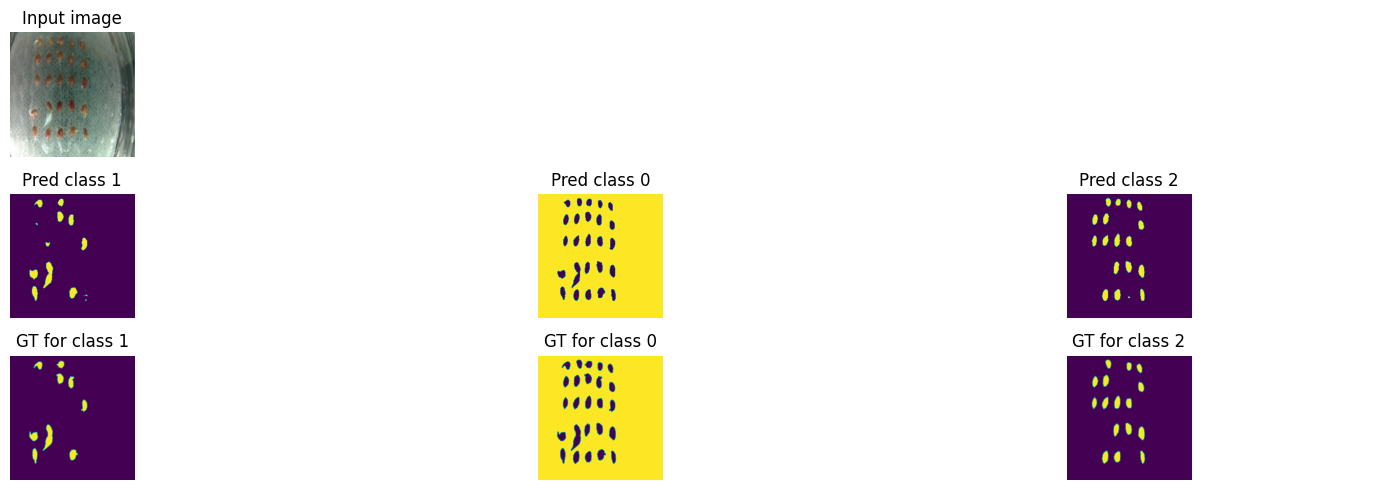

Train loss: 0.00217 | Time: 31m 5s | Val loss: 0.00164
Train_DICE_avg: 0.78645 | Train_Jaccard_avg: 0.72107 | Train_Sensitivity_avg: 0.92728 | Train_Specificity_avg: 0.92285 
Class 0 - Train_DICE: 0.99242 | Train_Jaccard: 0.98499 | Train_Sensitivity: 0.99595 | Train_Specificity: 0.78748 
Class 1 - Train_DICE: 0.55124 | Train_Jaccard: 0.47648 | Train_Sensitivity: 0.85572 | Train_Specificity: 0.99093 
Class 2 - Train_DICE: 0.81570 | Train_Jaccard: 0.70175 | Train_Sensitivity: 0.93017 | Train_Specificity: 0.99013 
Val_DICE_avg: 0.80316 | Val_Jaccard_avg: 0.73005 | Val_Sensitivity_avg: 0.94885 | Val_Specificity_avg: 0.88270 
Class 0 - Val_DICE: 0.99350 | Val_Jaccard: 0.98713 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.66951 
Class 1 - Val_DICE: 0.69933 | Val_Jaccard: 0.62889 | Val_Sensitivity: 0.86945 | Val_Specificity: 0.99482 
Class 2 - Val_DICE: 0.71664 | Val_Jaccard: 0.57414 | Val_Sensitivity: 0.97779 | Val_Specificity: 0.98376 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00214 | Time: 32m 7s | Val loss: 0.00158
Train_DICE_avg: 0.78285 | Train_Jaccard_avg: 0.71747 | Train_Sensitivity_avg: 0.92801 | Train_Specificity_avg: 0.92236 
Class 0 - Train_DICE: 0.99248 | Train_Jaccard: 0.98511 | Train_Sensitivity: 0.99630 | Train_Specificity: 0.78648 
Class 1 - Train_DICE: 0.54407 | Train_Jaccard: 0.46954 | Train_Sensitivity: 0.85919 | Train_Specificity: 0.99059 
Class 2 - Train_DICE: 0.81201 | Train_Jaccard: 0.69777 | Train_Sensitivity: 0.92853 | Train_Specificity: 0.99000 
Val_DICE_avg: 0.83037 | Val_Jaccard_avg: 0.75829 | Val_Sensitivity_avg: 0.96551 | Val_Specificity_avg: 0.87210 
Class 0 - Val_DICE: 0.99291 | Val_Jaccard: 0.98594 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.63616 
Class 1 - Val_DICE: 0.73807 | Val_Jaccard: 0.66427 | Val_Sensitivity: 0.92270 | Val_Specificity: 0.99457 
Class 2 - Val_DICE: 0.76014 | Val_Jaccard: 0.62466 | Val_Sensitivity: 0.97447 | Val_Specificity: 0.98556 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.00207 | Time: 33m 9s | Val loss: 0.00155
Train_DICE_avg: 0.78921 | Train_Jaccard_avg: 0.72375 | Train_Sensitivity_avg: 0.93043 | Train_Specificity_avg: 0.92303 
Class 0 - Train_DICE: 0.99260 | Train_Jaccard: 0.98535 | Train_Sensitivity: 0.99631 | Train_Specificity: 0.78834 
Class 1 - Train_DICE: 0.55879 | Train_Jaccard: 0.48362 | Train_Sensitivity: 0.85973 | Train_Specificity: 0.99083 
Class 2 - Train_DICE: 0.81622 | Train_Jaccard: 0.70227 | Train_Sensitivity: 0.93525 | Train_Specificity: 0.98991 
Val_DICE_avg: 0.83231 | Val_Jaccard_avg: 0.76222 | Val_Sensitivity_avg: 0.95922 | Val_Specificity_avg: 0.87074 
Class 0 - Val_DICE: 0.99274 | Val_Jaccard: 0.98561 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.63117 
Class 1 - Val_DICE: 0.73561 | Val_Jaccard: 0.66497 | Val_Sensitivity: 0.90486 | Val_Specificity: 0.99492 
Class 2 - Val_DICE: 0.76859 | Val_Jaccard: 0.63608 | Val_Sensitivity: 0.97340 | Val_Specificity: 0.98613 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.00203 | Time: 34m 12s | Val loss: 0.00156
Train_DICE_avg: 0.78941 | Train_Jaccard_avg: 0.72394 | Train_Sensitivity_avg: 0.93578 | Train_Specificity_avg: 0.92045 
Class 0 - Train_DICE: 0.99259 | Train_Jaccard: 0.98532 | Train_Sensitivity: 0.99644 | Train_Specificity: 0.78083 
Class 1 - Train_DICE: 0.55741 | Train_Jaccard: 0.48197 | Train_Sensitivity: 0.87570 | Train_Specificity: 0.99059 
Class 2 - Train_DICE: 0.81823 | Train_Jaccard: 0.70453 | Train_Sensitivity: 0.93520 | Train_Specificity: 0.98994 
Val_DICE_avg: 0.82852 | Val_Jaccard_avg: 0.75637 | Val_Sensitivity_avg: 0.96003 | Val_Specificity_avg: 0.86955 
Class 0 - Val_DICE: 0.99283 | Val_Jaccard: 0.98578 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62844 
Class 1 - Val_DICE: 0.73132 | Val_Jaccard: 0.65658 | Val_Sensitivity: 0.90419 | Val_Specificity: 0.99464 
Class 2 - Val_DICE: 0.76141 | Val_Jaccard: 0.62674 | Val_Sensitivity: 0.97656 | Val_Specificity: 0.98558 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.00198 | Time: 35m 14s | Val loss: 0.00161
Train_DICE_avg: 0.79149 | Train_Jaccard_avg: 0.72630 | Train_Sensitivity_avg: 0.93261 | Train_Specificity_avg: 0.92408 
Class 0 - Train_DICE: 0.99277 | Train_Jaccard: 0.98568 | Train_Sensitivity: 0.99648 | Train_Specificity: 0.79127 
Class 1 - Train_DICE: 0.56126 | Train_Jaccard: 0.48530 | Train_Sensitivity: 0.86449 | Train_Specificity: 0.99090 
Class 2 - Train_DICE: 0.82044 | Train_Jaccard: 0.70793 | Train_Sensitivity: 0.93686 | Train_Specificity: 0.99007 
Val_DICE_avg: 0.82612 | Val_Jaccard_avg: 0.75411 | Val_Sensitivity_avg: 0.95950 | Val_Specificity_avg: 0.87621 
Class 0 - Val_DICE: 0.99305 | Val_Jaccard: 0.98622 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.64865 
Class 1 - Val_DICE: 0.74297 | Val_Jaccard: 0.67160 | Val_Sensitivity: 0.89848 | Val_Specificity: 0.99524 
Class 2 - Val_DICE: 0.74235 | Val_Jaccard: 0.60452 | Val_Sensitivity: 0.98061 | Val_Specificity: 0.98474 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


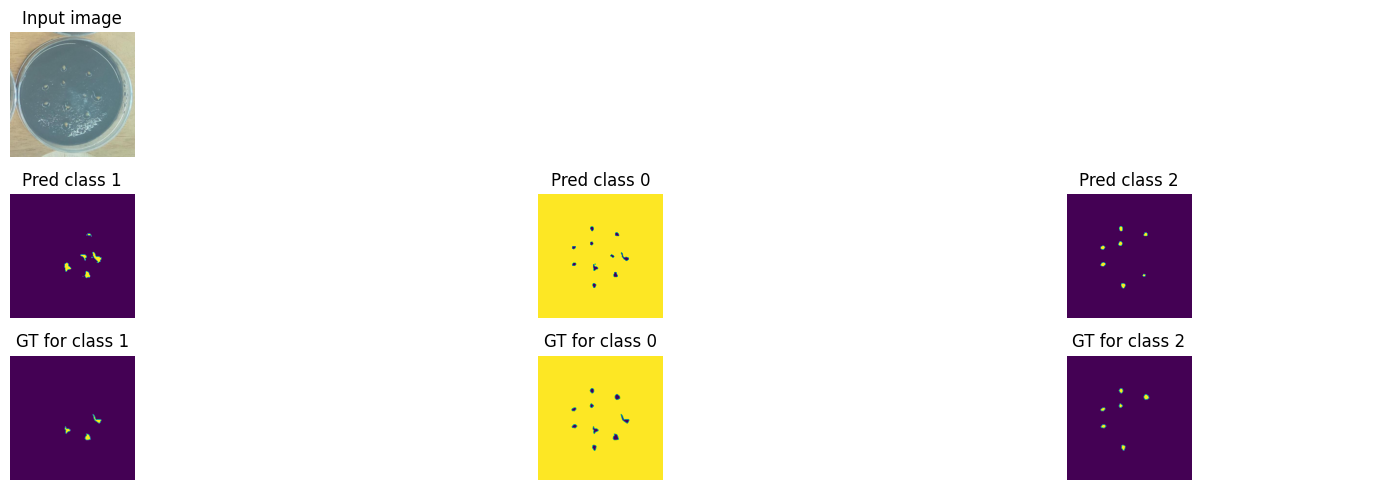

Train loss: 0.00202 | Time: 36m 17s | Val loss: 0.00156
Train_DICE_avg: 0.79385 | Train_Jaccard_avg: 0.72865 | Train_Sensitivity_avg: 0.93434 | Train_Specificity_avg: 0.92223 
Class 0 - Train_DICE: 0.99267 | Train_Jaccard: 0.98549 | Train_Sensitivity: 0.99647 | Train_Specificity: 0.78535 
Class 1 - Train_DICE: 0.57034 | Train_Jaccard: 0.49465 | Train_Sensitivity: 0.87125 | Train_Specificity: 0.99120 
Class 2 - Train_DICE: 0.81854 | Train_Jaccard: 0.70580 | Train_Sensitivity: 0.93529 | Train_Specificity: 0.99014 
Val_DICE_avg: 0.84169 | Val_Jaccard_avg: 0.77348 | Val_Sensitivity_avg: 0.96339 | Val_Specificity_avg: 0.86234 
Class 0 - Val_DICE: 0.99199 | Val_Jaccard: 0.98414 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.60484 
Class 1 - Val_DICE: 0.74239 | Val_Jaccard: 0.67106 | Val_Sensitivity: 0.92369 | Val_Specificity: 0.99466 
Class 2 - Val_DICE: 0.79069 | Val_Jaccard: 0.66524 | Val_Sensitivity: 0.96708 | Val_Specificity: 0.98752 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.00197 | Time: 37m 19s | Val loss: 0.00153
Train_DICE_avg: 0.79578 | Train_Jaccard_avg: 0.73068 | Train_Sensitivity_avg: 0.93409 | Train_Specificity_avg: 0.92285 
Class 0 - Train_DICE: 0.99273 | Train_Jaccard: 0.98560 | Train_Sensitivity: 0.99654 | Train_Specificity: 0.78725 
Class 1 - Train_DICE: 0.57302 | Train_Jaccard: 0.49689 | Train_Sensitivity: 0.86837 | Train_Specificity: 0.99117 
Class 2 - Train_DICE: 0.82157 | Train_Jaccard: 0.70955 | Train_Sensitivity: 0.93737 | Train_Specificity: 0.99015 
Val_DICE_avg: 0.83398 | Val_Jaccard_avg: 0.76341 | Val_Sensitivity_avg: 0.96507 | Val_Specificity_avg: 0.87343 
Class 0 - Val_DICE: 0.99291 | Val_Jaccard: 0.98595 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.63943 
Class 1 - Val_DICE: 0.73542 | Val_Jaccard: 0.66159 | Val_Sensitivity: 0.92857 | Val_Specificity: 0.99420 
Class 2 - Val_DICE: 0.77359 | Val_Jaccard: 0.64270 | Val_Sensitivity: 0.96736 | Val_Specificity: 0.98667 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.00197 | Time: 38m 22s | Val loss: 0.00153
Train_DICE_avg: 0.79485 | Train_Jaccard_avg: 0.72969 | Train_Sensitivity_avg: 0.93611 | Train_Specificity_avg: 0.92498 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98602 | Train_Sensitivity: 0.99667 | Train_Specificity: 0.79378 
Class 1 - Train_DICE: 0.56903 | Train_Jaccard: 0.49214 | Train_Sensitivity: 0.87684 | Train_Specificity: 0.99083 
Class 2 - Train_DICE: 0.82256 | Train_Jaccard: 0.71091 | Train_Sensitivity: 0.93483 | Train_Specificity: 0.99032 
Val_DICE_avg: 0.83819 | Val_Jaccard_avg: 0.76717 | Val_Sensitivity_avg: 0.96590 | Val_Specificity_avg: 0.87216 
Class 0 - Val_DICE: 0.99281 | Val_Jaccard: 0.98576 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.63560 
Class 1 - Val_DICE: 0.74940 | Val_Jaccard: 0.67630 | Val_Sensitivity: 0.92599 | Val_Specificity: 0.99487 
Class 2 - Val_DICE: 0.77237 | Val_Jaccard: 0.63944 | Val_Sensitivity: 0.97232 | Val_Specificity: 0.98601 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.00194 | Time: 39m 24s | Val loss: 0.00159
Train_DICE_avg: 0.80045 | Train_Jaccard_avg: 0.73570 | Train_Sensitivity_avg: 0.93522 | Train_Specificity_avg: 0.92599 
Class 0 - Train_DICE: 0.99289 | Train_Jaccard: 0.98591 | Train_Sensitivity: 0.99655 | Train_Specificity: 0.79617 
Class 1 - Train_DICE: 0.58317 | Train_Jaccard: 0.50668 | Train_Sensitivity: 0.87153 | Train_Specificity: 0.99144 
Class 2 - Train_DICE: 0.82530 | Train_Jaccard: 0.71451 | Train_Sensitivity: 0.93757 | Train_Specificity: 0.99037 
Val_DICE_avg: 0.82576 | Val_Jaccard_avg: 0.75121 | Val_Sensitivity_avg: 0.95717 | Val_Specificity_avg: 0.87672 
Class 0 - Val_DICE: 0.99331 | Val_Jaccard: 0.98674 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.65105 
Class 1 - Val_DICE: 0.75161 | Val_Jaccard: 0.67566 | Val_Sensitivity: 0.88729 | Val_Specificity: 0.99516 
Class 2 - Val_DICE: 0.73236 | Val_Jaccard: 0.59122 | Val_Sensitivity: 0.98488 | Val_Specificity: 0.98395 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00192 | Time: 40m 26s | Val loss: 0.00151
Train_DICE_avg: 0.79949 | Train_Jaccard_avg: 0.73491 | Train_Sensitivity_avg: 0.93668 | Train_Specificity_avg: 0.92473 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98606 | Train_Sensitivity: 0.99664 | Train_Specificity: 0.79280 
Class 1 - Train_DICE: 0.58050 | Train_Jaccard: 0.50459 | Train_Sensitivity: 0.87518 | Train_Specificity: 0.99105 
Class 2 - Train_DICE: 0.82501 | Train_Jaccard: 0.71409 | Train_Sensitivity: 0.93820 | Train_Specificity: 0.99033 
Val_DICE_avg: 0.83168 | Val_Jaccard_avg: 0.75824 | Val_Sensitivity_avg: 0.95865 | Val_Specificity_avg: 0.87848 
Class 0 - Val_DICE: 0.99335 | Val_Jaccard: 0.98681 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.65548 
Class 1 - Val_DICE: 0.75361 | Val_Jaccard: 0.67783 | Val_Sensitivity: 0.89394 | Val_Specificity: 0.99511 
Class 2 - Val_DICE: 0.74808 | Val_Jaccard: 0.61007 | Val_Sensitivity: 0.98266 | Val_Specificity: 0.98484 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


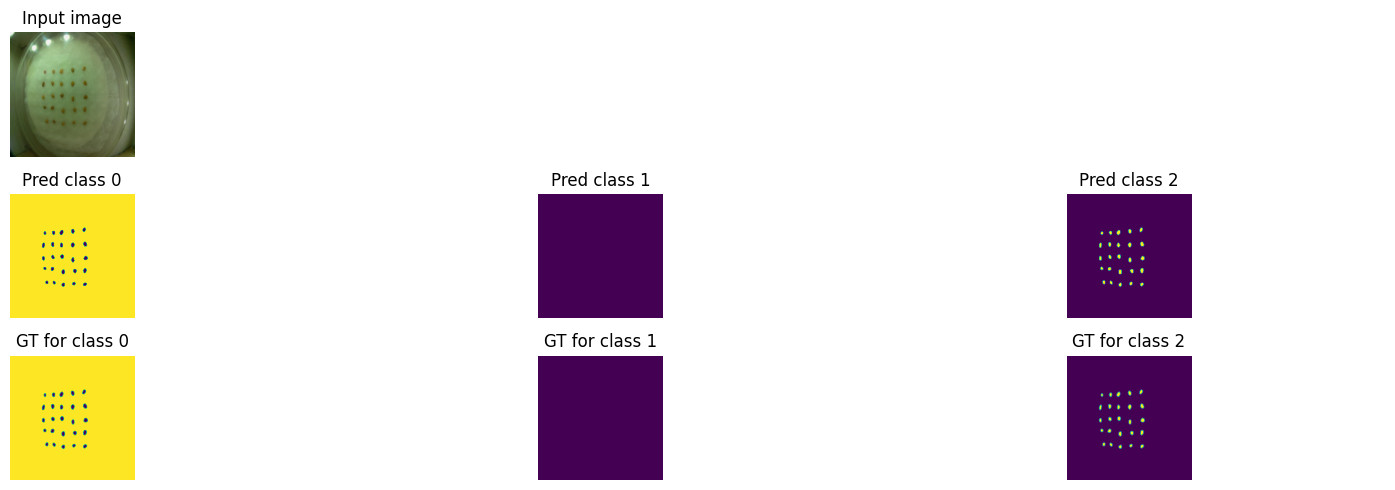

Train loss: 0.00191 | Time: 41m 28s | Val loss: 0.00144
Train_DICE_avg: 0.80031 | Train_Jaccard_avg: 0.73568 | Train_Sensitivity_avg: 0.93612 | Train_Specificity_avg: 0.92407 
Class 0 - Train_DICE: 0.99287 | Train_Jaccard: 0.98587 | Train_Sensitivity: 0.99654 | Train_Specificity: 0.79057 
Class 1 - Train_DICE: 0.58405 | Train_Jaccard: 0.50804 | Train_Sensitivity: 0.87390 | Train_Specificity: 0.99121 
Class 2 - Train_DICE: 0.82401 | Train_Jaccard: 0.71314 | Train_Sensitivity: 0.93793 | Train_Specificity: 0.99044 
Val_DICE_avg: 0.83960 | Val_Jaccard_avg: 0.76888 | Val_Sensitivity_avg: 0.95745 | Val_Specificity_avg: 0.86912 
Class 0 - Val_DICE: 0.99239 | Val_Jaccard: 0.98494 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.62602 
Class 1 - Val_DICE: 0.75502 | Val_Jaccard: 0.68330 | Val_Sensitivity: 0.90007 | Val_Specificity: 0.99546 
Class 2 - Val_DICE: 0.77139 | Val_Jaccard: 0.63842 | Val_Sensitivity: 0.97278 | Val_Specificity: 0.98587 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00185 | Time: 42m 29s | Val loss: 0.00143
Train_DICE_avg: 0.79881 | Train_Jaccard_avg: 0.73405 | Train_Sensitivity_avg: 0.93862 | Train_Specificity_avg: 0.92352 
Class 0 - Train_DICE: 0.99298 | Train_Jaccard: 0.98608 | Train_Sensitivity: 0.99682 | Train_Specificity: 0.78935 
Class 1 - Train_DICE: 0.57836 | Train_Jaccard: 0.50162 | Train_Sensitivity: 0.87986 | Train_Specificity: 0.99090 
Class 2 - Train_DICE: 0.82510 | Train_Jaccard: 0.71444 | Train_Sensitivity: 0.93919 | Train_Specificity: 0.99031 
Val_DICE_avg: 0.84297 | Val_Jaccard_avg: 0.77207 | Val_Sensitivity_avg: 0.96858 | Val_Specificity_avg: 0.87076 
Class 0 - Val_DICE: 0.99256 | Val_Jaccard: 0.98526 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.63108 
Class 1 - Val_DICE: 0.77128 | Val_Jaccard: 0.69842 | Val_Sensitivity: 0.93031 | Val_Specificity: 0.99527 
Class 2 - Val_DICE: 0.76509 | Val_Jaccard: 0.63253 | Val_Sensitivity: 0.97592 | Val_Specificity: 0.98591 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.00186 | Time: 43m 31s | Val loss: 0.00146
Train_DICE_avg: 0.80198 | Train_Jaccard_avg: 0.73775 | Train_Sensitivity_avg: 0.93565 | Train_Specificity_avg: 0.92353 
Class 0 - Train_DICE: 0.99301 | Train_Jaccard: 0.98615 | Train_Sensitivity: 0.99676 | Train_Specificity: 0.78871 
Class 1 - Train_DICE: 0.58706 | Train_Jaccard: 0.51142 | Train_Sensitivity: 0.86862 | Train_Specificity: 0.99146 
Class 2 - Train_DICE: 0.82586 | Train_Jaccard: 0.71567 | Train_Sensitivity: 0.94158 | Train_Specificity: 0.99041 
Val_DICE_avg: 0.84161 | Val_Jaccard_avg: 0.77054 | Val_Sensitivity_avg: 0.97026 | Val_Specificity_avg: 0.87264 
Class 0 - Val_DICE: 0.99283 | Val_Jaccard: 0.98580 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.63680 
Class 1 - Val_DICE: 0.75970 | Val_Jaccard: 0.68470 | Val_Sensitivity: 0.93439 | Val_Specificity: 0.99476 
Class 2 - Val_DICE: 0.77229 | Val_Jaccard: 0.64113 | Val_Sensitivity: 0.97700 | Val_Specificity: 0.98637 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00183 | Time: 44m 33s | Val loss: 0.00152
Train_DICE_avg: 0.79991 | Train_Jaccard_avg: 0.73550 | Train_Sensitivity_avg: 0.93922 | Train_Specificity_avg: 0.92330 
Class 0 - Train_DICE: 0.99302 | Train_Jaccard: 0.98616 | Train_Sensitivity: 0.99693 | Train_Specificity: 0.78877 
Class 1 - Train_DICE: 0.58103 | Train_Jaccard: 0.50545 | Train_Sensitivity: 0.88037 | Train_Specificity: 0.99089 
Class 2 - Train_DICE: 0.82567 | Train_Jaccard: 0.71490 | Train_Sensitivity: 0.94036 | Train_Specificity: 0.99023 
Val_DICE_avg: 0.83750 | Val_Jaccard_avg: 0.76630 | Val_Sensitivity_avg: 0.95922 | Val_Specificity_avg: 0.87223 
Class 0 - Val_DICE: 0.99262 | Val_Jaccard: 0.98538 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.63563 
Class 1 - Val_DICE: 0.75305 | Val_Jaccard: 0.68130 | Val_Sensitivity: 0.90217 | Val_Specificity: 0.99539 
Class 2 - Val_DICE: 0.76683 | Val_Jaccard: 0.63221 | Val_Sensitivity: 0.97604 | Val_Specificity: 0.98567 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.00186 | Time: 45m 34s | Val loss: 0.00147
Train_DICE_avg: 0.80155 | Train_Jaccard_avg: 0.73687 | Train_Sensitivity_avg: 0.93649 | Train_Specificity_avg: 0.92464 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98613 | Train_Sensitivity: 0.99681 | Train_Specificity: 0.79247 
Class 1 - Train_DICE: 0.58517 | Train_Jaccard: 0.50825 | Train_Sensitivity: 0.87287 | Train_Specificity: 0.99112 
Class 2 - Train_DICE: 0.82647 | Train_Jaccard: 0.71624 | Train_Sensitivity: 0.93979 | Train_Specificity: 0.99032 
Val_DICE_avg: 0.84318 | Val_Jaccard_avg: 0.77133 | Val_Sensitivity_avg: 0.95817 | Val_Specificity_avg: 0.87069 
Class 0 - Val_DICE: 0.99261 | Val_Jaccard: 0.98536 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.63086 
Class 1 - Val_DICE: 0.76780 | Val_Jaccard: 0.69284 | Val_Sensitivity: 0.89696 | Val_Specificity: 0.99538 
Class 2 - Val_DICE: 0.76912 | Val_Jaccard: 0.63579 | Val_Sensitivity: 0.97816 | Val_Specificity: 0.98584 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


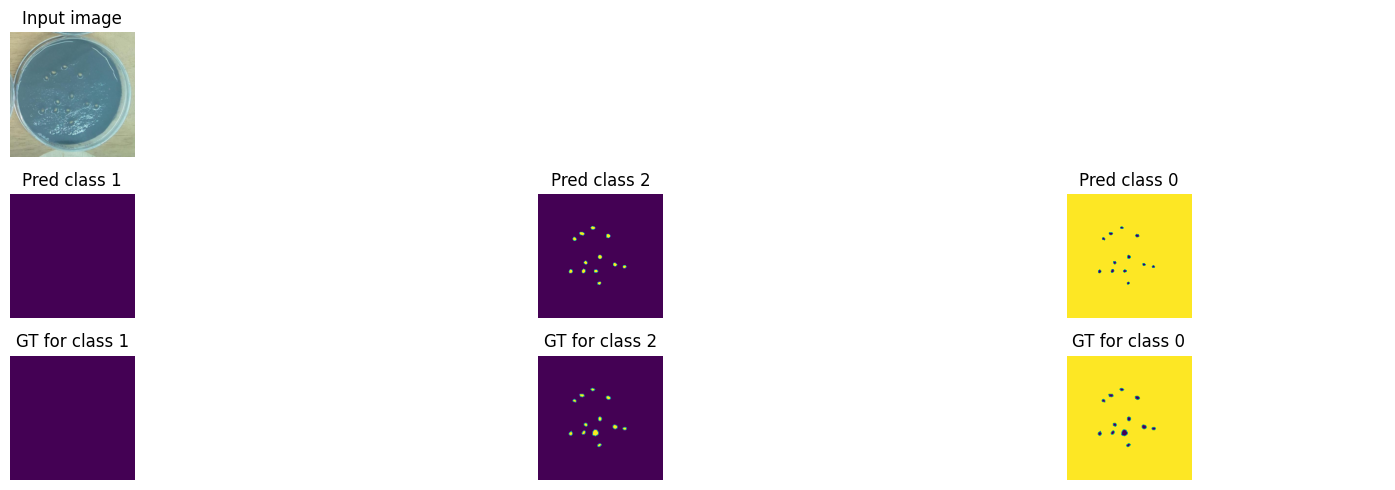

Train loss: 0.00186 | Time: 46m 36s | Val loss: 0.00150
Train_DICE_avg: 0.79853 | Train_Jaccard_avg: 0.73385 | Train_Sensitivity_avg: 0.93587 | Train_Specificity_avg: 0.92373 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98603 | Train_Sensitivity: 0.99664 | Train_Specificity: 0.78975 
Class 1 - Train_DICE: 0.57787 | Train_Jaccard: 0.50187 | Train_Sensitivity: 0.86936 | Train_Specificity: 0.99124 
Class 2 - Train_DICE: 0.82478 | Train_Jaccard: 0.71366 | Train_Sensitivity: 0.94162 | Train_Specificity: 0.99019 
Val_DICE_avg: 0.84313 | Val_Jaccard_avg: 0.77225 | Val_Sensitivity_avg: 0.96705 | Val_Specificity_avg: 0.87525 
Class 0 - Val_DICE: 0.99295 | Val_Jaccard: 0.98604 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.64441 
Class 1 - Val_DICE: 0.76259 | Val_Jaccard: 0.68828 | Val_Sensitivity: 0.92762 | Val_Specificity: 0.99499 
Class 2 - Val_DICE: 0.77386 | Val_Jaccard: 0.64244 | Val_Sensitivity: 0.97415 | Val_Specificity: 0.98635 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.00183 | Time: 47m 38s | Val loss: 0.00157
Train_DICE_avg: 0.80457 | Train_Jaccard_avg: 0.74085 | Train_Sensitivity_avg: 0.94113 | Train_Specificity_avg: 0.92447 
Class 0 - Train_DICE: 0.99306 | Train_Jaccard: 0.98624 | Train_Sensitivity: 0.99679 | Train_Specificity: 0.79143 
Class 1 - Train_DICE: 0.59242 | Train_Jaccard: 0.51707 | Train_Sensitivity: 0.88559 | Train_Specificity: 0.99139 
Class 2 - Train_DICE: 0.82823 | Train_Jaccard: 0.71925 | Train_Sensitivity: 0.94100 | Train_Specificity: 0.99060 
Val_DICE_avg: 0.85269 | Val_Jaccard_avg: 0.78463 | Val_Sensitivity_avg: 0.96200 | Val_Specificity_avg: 0.86173 
Class 0 - Val_DICE: 0.99151 | Val_Jaccard: 0.98320 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60188 
Class 1 - Val_DICE: 0.76781 | Val_Jaccard: 0.69464 | Val_Sensitivity: 0.91539 | Val_Specificity: 0.99533 
Class 2 - Val_DICE: 0.79876 | Val_Jaccard: 0.67606 | Val_Sensitivity: 0.97114 | Val_Specificity: 0.98797 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.00182 | Time: 48m 40s | Val loss: 0.00152
Train_DICE_avg: 0.80510 | Train_Jaccard_avg: 0.74074 | Train_Sensitivity_avg: 0.93871 | Train_Specificity_avg: 0.92505 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98611 | Train_Sensitivity: 0.99682 | Train_Specificity: 0.79331 
Class 1 - Train_DICE: 0.59405 | Train_Jaccard: 0.51718 | Train_Sensitivity: 0.87888 | Train_Specificity: 0.99141 
Class 2 - Train_DICE: 0.82827 | Train_Jaccard: 0.71892 | Train_Sensitivity: 0.94044 | Train_Specificity: 0.99044 
Val_DICE_avg: 0.84627 | Val_Jaccard_avg: 0.77485 | Val_Sensitivity_avg: 0.96256 | Val_Specificity_avg: 0.86952 
Class 0 - Val_DICE: 0.99250 | Val_Jaccard: 0.98515 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62702 
Class 1 - Val_DICE: 0.77105 | Val_Jaccard: 0.69518 | Val_Sensitivity: 0.91066 | Val_Specificity: 0.99523 
Class 2 - Val_DICE: 0.77525 | Val_Jaccard: 0.64422 | Val_Sensitivity: 0.97762 | Val_Specificity: 0.98631 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00179 | Time: 49m 41s | Val loss: 0.00148
Train_DICE_avg: 0.80552 | Train_Jaccard_avg: 0.74160 | Train_Sensitivity_avg: 0.94130 | Train_Specificity_avg: 0.92506 
Class 0 - Train_DICE: 0.99314 | Train_Jaccard: 0.98639 | Train_Sensitivity: 0.99686 | Train_Specificity: 0.79349 
Class 1 - Train_DICE: 0.59527 | Train_Jaccard: 0.51918 | Train_Sensitivity: 0.88225 | Train_Specificity: 0.99129 
Class 2 - Train_DICE: 0.82815 | Train_Jaccard: 0.71924 | Train_Sensitivity: 0.94479 | Train_Specificity: 0.99041 
Val_DICE_avg: 0.84571 | Val_Jaccard_avg: 0.77610 | Val_Sensitivity_avg: 0.96927 | Val_Specificity_avg: 0.86899 
Class 0 - Val_DICE: 0.99251 | Val_Jaccard: 0.98515 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62521 
Class 1 - Val_DICE: 0.75461 | Val_Jaccard: 0.68012 | Val_Sensitivity: 0.93775 | Val_Specificity: 0.99460 
Class 2 - Val_DICE: 0.79002 | Val_Jaccard: 0.66302 | Val_Sensitivity: 0.97069 | Val_Specificity: 0.98717 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00180 | Time: 50m 42s | Val loss: 0.00148
Train_DICE_avg: 0.80273 | Train_Jaccard_avg: 0.73834 | Train_Sensitivity_avg: 0.94008 | Train_Specificity_avg: 0.92290 
Class 0 - Train_DICE: 0.99306 | Train_Jaccard: 0.98623 | Train_Sensitivity: 0.99695 | Train_Specificity: 0.78700 
Class 1 - Train_DICE: 0.58680 | Train_Jaccard: 0.51012 | Train_Sensitivity: 0.87957 | Train_Specificity: 0.99129 
Class 2 - Train_DICE: 0.82832 | Train_Jaccard: 0.71866 | Train_Sensitivity: 0.94372 | Train_Specificity: 0.99042 
Val_DICE_avg: 0.84868 | Val_Jaccard_avg: 0.77837 | Val_Sensitivity_avg: 0.95869 | Val_Specificity_avg: 0.86913 
Class 0 - Val_DICE: 0.99244 | Val_Jaccard: 0.98504 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.62529 
Class 1 - Val_DICE: 0.76687 | Val_Jaccard: 0.69198 | Val_Sensitivity: 0.90298 | Val_Specificity: 0.99530 
Class 2 - Val_DICE: 0.78674 | Val_Jaccard: 0.65810 | Val_Sensitivity: 0.97368 | Val_Specificity: 0.98680 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


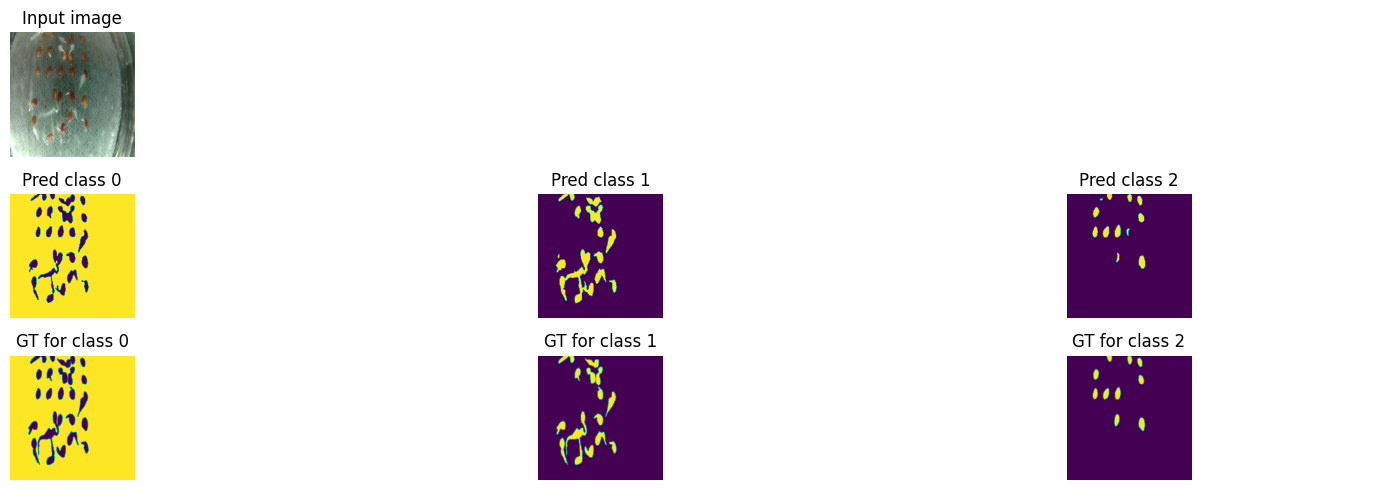

Train loss: 0.00177 | Time: 51m 45s | Val loss: 0.00143
Train_DICE_avg: 0.80795 | Train_Jaccard_avg: 0.74349 | Train_Sensitivity_avg: 0.94327 | Train_Specificity_avg: 0.92469 
Class 0 - Train_DICE: 0.99309 | Train_Jaccard: 0.98630 | Train_Sensitivity: 0.99690 | Train_Specificity: 0.79243 
Class 1 - Train_DICE: 0.60301 | Train_Jaccard: 0.52636 | Train_Sensitivity: 0.88987 | Train_Specificity: 0.99137 
Class 2 - Train_DICE: 0.82774 | Train_Jaccard: 0.71782 | Train_Sensitivity: 0.94303 | Train_Specificity: 0.99028 
Val_DICE_avg: 0.85053 | Val_Jaccard_avg: 0.78088 | Val_Sensitivity_avg: 0.96116 | Val_Specificity_avg: 0.86697 
Class 0 - Val_DICE: 0.99212 | Val_Jaccard: 0.98440 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.61851 
Class 1 - Val_DICE: 0.77309 | Val_Jaccard: 0.69894 | Val_Sensitivity: 0.90577 | Val_Specificity: 0.99539 
Class 2 - Val_DICE: 0.78639 | Val_Jaccard: 0.65931 | Val_Sensitivity: 0.97828 | Val_Specificity: 0.98702 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.00177 | Time: 52m 46s | Val loss: 0.00144
Train_DICE_avg: 0.80699 | Train_Jaccard_avg: 0.74256 | Train_Sensitivity_avg: 0.94046 | Train_Specificity_avg: 0.92489 
Class 0 - Train_DICE: 0.99310 | Train_Jaccard: 0.98632 | Train_Sensitivity: 0.99689 | Train_Specificity: 0.79278 
Class 1 - Train_DICE: 0.59740 | Train_Jaccard: 0.51980 | Train_Sensitivity: 0.88133 | Train_Specificity: 0.99135 
Class 2 - Train_DICE: 0.83046 | Train_Jaccard: 0.72155 | Train_Sensitivity: 0.94316 | Train_Specificity: 0.99054 
Val_DICE_avg: 0.85026 | Val_Jaccard_avg: 0.78011 | Val_Sensitivity_avg: 0.96197 | Val_Specificity_avg: 0.86927 
Class 0 - Val_DICE: 0.99234 | Val_Jaccard: 0.98483 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.62567 
Class 1 - Val_DICE: 0.77805 | Val_Jaccard: 0.70418 | Val_Sensitivity: 0.90929 | Val_Specificity: 0.99547 
Class 2 - Val_DICE: 0.78041 | Val_Jaccard: 0.65133 | Val_Sensitivity: 0.97717 | Val_Specificity: 0.98668 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.00176 | Time: 53m 48s | Val loss: 0.00144
Train_DICE_avg: 0.81063 | Train_Jaccard_avg: 0.74705 | Train_Sensitivity_avg: 0.94083 | Train_Specificity_avg: 0.92669 
Class 0 - Train_DICE: 0.99318 | Train_Jaccard: 0.98649 | Train_Sensitivity: 0.99690 | Train_Specificity: 0.79786 
Class 1 - Train_DICE: 0.60603 | Train_Jaccard: 0.52967 | Train_Sensitivity: 0.88227 | Train_Specificity: 0.99159 
Class 2 - Train_DICE: 0.83269 | Train_Jaccard: 0.72500 | Train_Sensitivity: 0.94331 | Train_Specificity: 0.99062 
Val_DICE_avg: 0.84655 | Val_Jaccard_avg: 0.77724 | Val_Sensitivity_avg: 0.96363 | Val_Specificity_avg: 0.86994 
Class 0 - Val_DICE: 0.99244 | Val_Jaccard: 0.98504 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.62774 
Class 1 - Val_DICE: 0.76358 | Val_Jaccard: 0.69114 | Val_Sensitivity: 0.91799 | Val_Specificity: 0.99509 
Class 2 - Val_DICE: 0.78364 | Val_Jaccard: 0.65553 | Val_Sensitivity: 0.97349 | Val_Specificity: 0.98700 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Train loss: 0.00175 | Time: 54m 49s | Val loss: 0.00144
Train_DICE_avg: 0.80464 | Train_Jaccard_avg: 0.74059 | Train_Sensitivity_avg: 0.94116 | Train_Specificity_avg: 0.92532 
Class 0 - Train_DICE: 0.99322 | Train_Jaccard: 0.98655 | Train_Sensitivity: 0.99701 | Train_Specificity: 0.79417 
Class 1 - Train_DICE: 0.58990 | Train_Jaccard: 0.51326 | Train_Sensitivity: 0.88352 | Train_Specificity: 0.99124 
Class 2 - Train_DICE: 0.83080 | Train_Jaccard: 0.72198 | Train_Sensitivity: 0.94297 | Train_Specificity: 0.99055 
Val_DICE_avg: 0.84108 | Val_Jaccard_avg: 0.76918 | Val_Sensitivity_avg: 0.96387 | Val_Specificity_avg: 0.87605 
Class 0 - Val_DICE: 0.99313 | Val_Jaccard: 0.98638 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.64749 
Class 1 - Val_DICE: 0.76641 | Val_Jaccard: 0.69218 | Val_Sensitivity: 0.91251 | Val_Specificity: 0.99516 
Class 2 - Val_DICE: 0.76370 | Val_Jaccard: 0.62899 | Val_Sensitivity: 0.97970 | Val_Specificity: 0.98549 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.00174 | Time: 55m 51s | Val loss: 0.00146
Train_DICE_avg: 0.81291 | Train_Jaccard_avg: 0.74885 | Train_Sensitivity_avg: 0.94152 | Train_Specificity_avg: 0.92623 
Class 0 - Train_DICE: 0.99322 | Train_Jaccard: 0.98656 | Train_Sensitivity: 0.99702 | Train_Specificity: 0.79653 
Class 1 - Train_DICE: 0.61374 | Train_Jaccard: 0.53626 | Train_Sensitivity: 0.88286 | Train_Specificity: 0.99157 
Class 2 - Train_DICE: 0.83177 | Train_Jaccard: 0.72374 | Train_Sensitivity: 0.94467 | Train_Specificity: 0.99060 
Val_DICE_avg: 0.83917 | Val_Jaccard_avg: 0.76752 | Val_Sensitivity_avg: 0.96530 | Val_Specificity_avg: 0.87770 
Class 0 - Val_DICE: 0.99316 | Val_Jaccard: 0.98644 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.65233 
Class 1 - Val_DICE: 0.75926 | Val_Jaccard: 0.68520 | Val_Sensitivity: 0.91991 | Val_Specificity: 0.99500 
Class 2 - Val_DICE: 0.76511 | Val_Jaccard: 0.63093 | Val_Sensitivity: 0.97663 | Val_Specificity: 0.98577 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


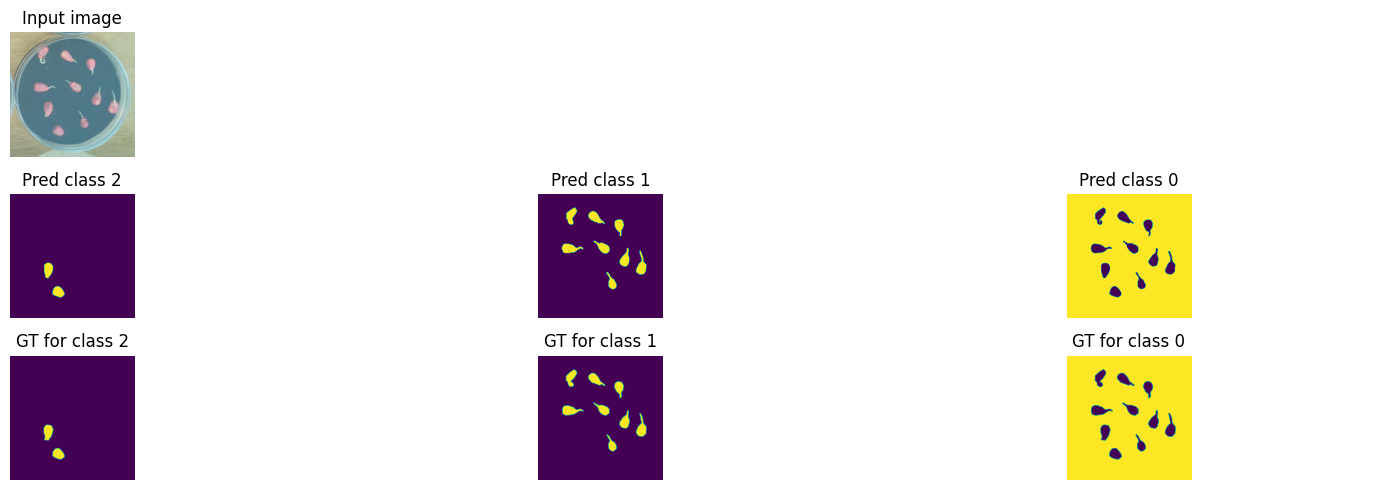

Train loss: 0.00175 | Time: 56m 53s | Val loss: 0.00143
Train_DICE_avg: 0.80873 | Train_Jaccard_avg: 0.74529 | Train_Sensitivity_avg: 0.94184 | Train_Specificity_avg: 0.92524 
Class 0 - Train_DICE: 0.99319 | Train_Jaccard: 0.98651 | Train_Sensitivity: 0.99695 | Train_Specificity: 0.79346 
Class 1 - Train_DICE: 0.60188 | Train_Jaccard: 0.52615 | Train_Sensitivity: 0.88538 | Train_Specificity: 0.99155 
Class 2 - Train_DICE: 0.83110 | Train_Jaccard: 0.72323 | Train_Sensitivity: 0.94318 | Train_Specificity: 0.99072 
Val_DICE_avg: 0.84096 | Val_Jaccard_avg: 0.76949 | Val_Sensitivity_avg: 0.96096 | Val_Specificity_avg: 0.87317 
Class 0 - Val_DICE: 0.99284 | Val_Jaccard: 0.98582 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.63830 
Class 1 - Val_DICE: 0.76005 | Val_Jaccard: 0.68472 | Val_Sensitivity: 0.90368 | Val_Specificity: 0.99514 
Class 2 - Val_DICE: 0.77000 | Val_Jaccard: 0.63791 | Val_Sensitivity: 0.97980 | Val_Specificity: 0.98608 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.00175 | Time: 57m 55s | Val loss: 0.00144
Train_DICE_avg: 0.80964 | Train_Jaccard_avg: 0.74578 | Train_Sensitivity_avg: 0.94304 | Train_Specificity_avg: 0.92652 
Class 0 - Train_DICE: 0.99321 | Train_Jaccard: 0.98653 | Train_Sensitivity: 0.99692 | Train_Specificity: 0.79743 
Class 1 - Train_DICE: 0.60277 | Train_Jaccard: 0.52554 | Train_Sensitivity: 0.88824 | Train_Specificity: 0.99145 
Class 2 - Train_DICE: 0.83295 | Train_Jaccard: 0.72528 | Train_Sensitivity: 0.94395 | Train_Specificity: 0.99068 
Val_DICE_avg: 0.84656 | Val_Jaccard_avg: 0.77519 | Val_Sensitivity_avg: 0.96076 | Val_Specificity_avg: 0.87133 
Class 0 - Val_DICE: 0.99259 | Val_Jaccard: 0.98533 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.63234 
Class 1 - Val_DICE: 0.77204 | Val_Jaccard: 0.69612 | Val_Sensitivity: 0.90250 | Val_Specificity: 0.99538 
Class 2 - Val_DICE: 0.77503 | Val_Jaccard: 0.64413 | Val_Sensitivity: 0.98036 | Val_Specificity: 0.98628 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Train loss: 0.00173 | Time: 58m 58s | Val loss: 0.00140
Train_DICE_avg: 0.81044 | Train_Jaccard_avg: 0.74665 | Train_Sensitivity_avg: 0.94280 | Train_Specificity_avg: 0.92693 
Class 0 - Train_DICE: 0.99323 | Train_Jaccard: 0.98657 | Train_Sensitivity: 0.99696 | Train_Specificity: 0.79870 
Class 1 - Train_DICE: 0.60521 | Train_Jaccard: 0.52815 | Train_Sensitivity: 0.88675 | Train_Specificity: 0.99150 
Class 2 - Train_DICE: 0.83288 | Train_Jaccard: 0.72523 | Train_Sensitivity: 0.94468 | Train_Specificity: 0.99060 
Val_DICE_avg: 0.85118 | Val_Jaccard_avg: 0.78091 | Val_Sensitivity_avg: 0.96565 | Val_Specificity_avg: 0.86818 
Class 0 - Val_DICE: 0.99235 | Val_Jaccard: 0.98486 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.62248 
Class 1 - Val_DICE: 0.77520 | Val_Jaccard: 0.69996 | Val_Sensitivity: 0.92101 | Val_Specificity: 0.99521 
Class 2 - Val_DICE: 0.78599 | Val_Jaccard: 0.65791 | Val_Sensitivity: 0.97650 | Val_Specificity: 0.98684 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.00172 | Time: 60m 0s | Val loss: 0.00141
Train_DICE_avg: 0.81153 | Train_Jaccard_avg: 0.74801 | Train_Sensitivity_avg: 0.94258 | Train_Specificity_avg: 0.92719 
Class 0 - Train_DICE: 0.99331 | Train_Jaccard: 0.98673 | Train_Sensitivity: 0.99700 | Train_Specificity: 0.79915 
Class 1 - Train_DICE: 0.60728 | Train_Jaccard: 0.53011 | Train_Sensitivity: 0.88603 | Train_Specificity: 0.99165 
Class 2 - Train_DICE: 0.83402 | Train_Jaccard: 0.72719 | Train_Sensitivity: 0.94471 | Train_Specificity: 0.99078 
Val_DICE_avg: 0.84412 | Val_Jaccard_avg: 0.77222 | Val_Sensitivity_avg: 0.96166 | Val_Specificity_avg: 0.87468 
Class 0 - Val_DICE: 0.99300 | Val_Jaccard: 0.98614 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.64300 
Class 1 - Val_DICE: 0.77071 | Val_Jaccard: 0.69513 | Val_Sensitivity: 0.90401 | Val_Specificity: 0.99528 
Class 2 - Val_DICE: 0.76864 | Val_Jaccard: 0.63541 | Val_Sensitivity: 0.98159 | Val_Specificity: 0.98577 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.00172 | Time: 61m 3s | Val loss: 0.00142
Train_DICE_avg: 0.81165 | Train_Jaccard_avg: 0.74781 | Train_Sensitivity_avg: 0.94408 | Train_Specificity_avg: 0.92415 
Class 0 - Train_DICE: 0.99316 | Train_Jaccard: 0.98644 | Train_Sensitivity: 0.99698 | Train_Specificity: 0.79042 
Class 1 - Train_DICE: 0.60914 | Train_Jaccard: 0.53218 | Train_Sensitivity: 0.88851 | Train_Specificity: 0.99151 
Class 2 - Train_DICE: 0.83266 | Train_Jaccard: 0.72483 | Train_Sensitivity: 0.94674 | Train_Specificity: 0.99051 
Val_DICE_avg: 0.84871 | Val_Jaccard_avg: 0.77764 | Val_Sensitivity_avg: 0.96092 | Val_Specificity_avg: 0.86798 
Class 0 - Val_DICE: 0.99235 | Val_Jaccard: 0.98486 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.62222 
Class 1 - Val_DICE: 0.77858 | Val_Jaccard: 0.70391 | Val_Sensitivity: 0.90019 | Val_Specificity: 0.99559 
Class 2 - Val_DICE: 0.77520 | Val_Jaccard: 0.64414 | Val_Sensitivity: 0.98312 | Val_Specificity: 0.98613 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


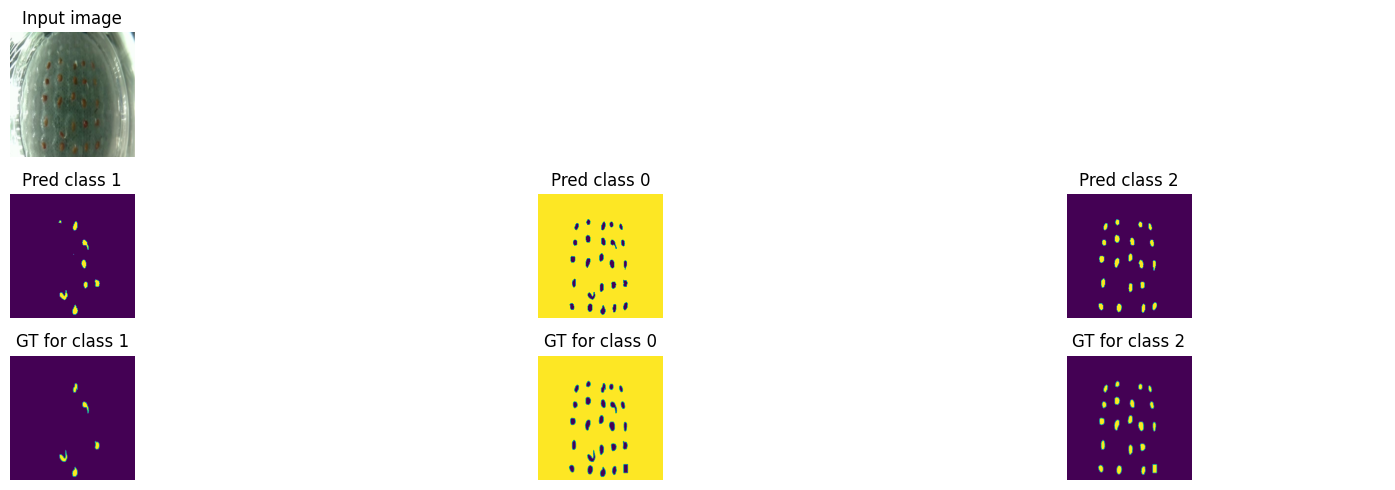

Train loss: 0.00170 | Time: 62m 6s | Val loss: 0.00140
Train_DICE_avg: 0.80899 | Train_Jaccard_avg: 0.74493 | Train_Sensitivity_avg: 0.94168 | Train_Specificity_avg: 0.92549 
Class 0 - Train_DICE: 0.99326 | Train_Jaccard: 0.98663 | Train_Sensitivity: 0.99709 | Train_Specificity: 0.79425 
Class 1 - Train_DICE: 0.60040 | Train_Jaccard: 0.52228 | Train_Sensitivity: 0.88347 | Train_Specificity: 0.99149 
Class 2 - Train_DICE: 0.83332 | Train_Jaccard: 0.72589 | Train_Sensitivity: 0.94448 | Train_Specificity: 0.99071 
Val_DICE_avg: 0.84522 | Val_Jaccard_avg: 0.77402 | Val_Sensitivity_avg: 0.96366 | Val_Specificity_avg: 0.87281 
Class 0 - Val_DICE: 0.99276 | Val_Jaccard: 0.98566 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.63706 
Class 1 - Val_DICE: 0.77049 | Val_Jaccard: 0.69605 | Val_Sensitivity: 0.91218 | Val_Specificity: 0.99530 
Class 2 - Val_DICE: 0.77240 | Val_Jaccard: 0.64035 | Val_Sensitivity: 0.97939 | Val_Specificity: 0.98608 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▃▄▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████
wandb:       Training Jaccard ▁▃▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████
wandb:          Training Loss █▆▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▇██▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇████████████
wandb:   Training Specificity ▁▄▅▅▆▆▇▇▇▇█▇████████████████████████████
wandb:        Validation DICE ▁▃▄▅▅▆▆▆▆▇▆▇▇▇▆▇█▇▇▇▇▇▇██▇▇█████████████
wandb:     Validation Jaccard ▁▂▃▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▆▇▇▇▇▇█▇▇███████████
wandb:        Validation Loss █▆▆▄▄▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ██▇▄▄▅▆▁▅▃▅▆▅▆▇▅▇▄▇▆▇▇▆▆▆█▆▆▇▇▆▆▇▇▇▆▆▇▆▇
wandb: Validation Specificity ▂█▄▂▁▂▄▅▅▄▄▄▅▄▄▃▄▆▆▄▆▅▄▄▃▅▅▆▄▄▅▄▃▄▄▄▅▅▅▅
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.80899
wandb:       Training Jaccard 0.74493
wandb:          Training Loss 0.00


Training complete!


In [37]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [38]:
model = UNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [39]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]



Global Performance Metrics:
Loss mean: 0.00148, std: 0.00025
Dice Coefficient mean: 0.87266, std: 0.10079
Jaccard Index mean: 0.81204, std: 0.11793
Sensitivity mean: 0.93193, std: 0.07510
Specificity mean: 0.94878, std: 0.03548

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99606, std: 0.00196
Jaccard mean: 0.99217, std: 0.00388
Sensitivity mean: 0.99686, std: 0.00216
Specificity mean: 0.85648, std: 0.10695

Class 1:
Dice mean: 0.76133, std: 0.27638
Jaccard mean: 0.68057, std: 0.30107
Sensitivity mean: 0.86121, std: 0.21411
Specificity mean: 0.99628, std: 0.00602

Class 2:
Dice mean: 0.86058, std: 0.08063
Jaccard mean: 0.76339, std: 0.11339
Sensitivity mean: 0.93772, std: 0.06289
Specificity mean: 0.99359, std: 0.00408


### Tversky Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Backbone"] = "mobilenetv3"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-UNet-MobileNetV3-Tversky"]

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.48 GB
GPU Memory - Reserved: 1.93 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251112_234005-3zhri1n2
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-UNet-MobileNetV3-Tversky
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/3zhri1n2



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


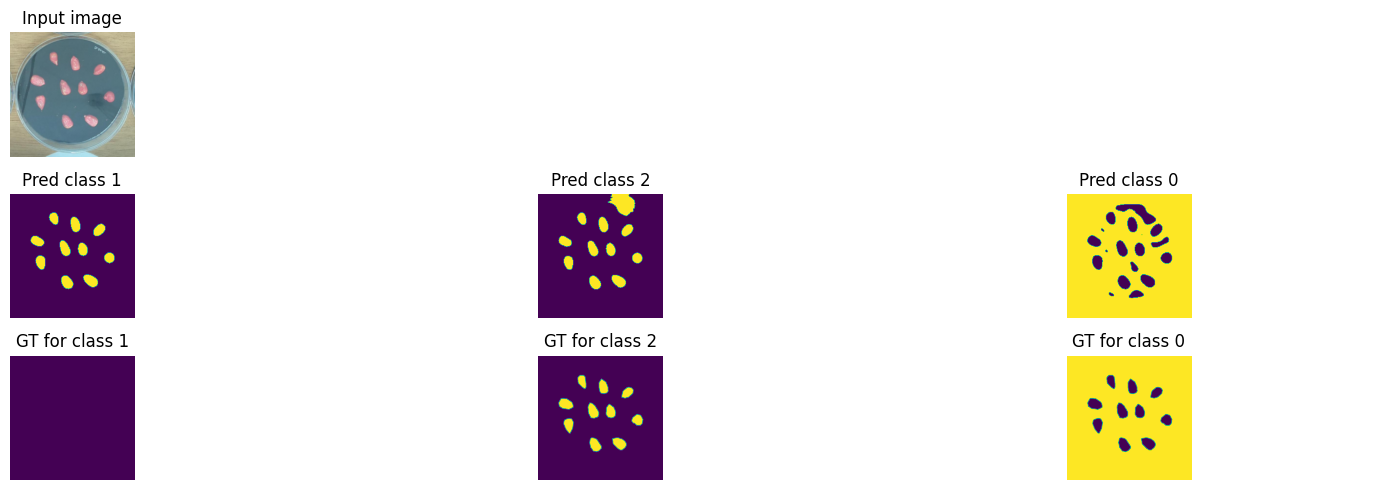

Train loss: 0.68894 | Time: 0m 59s | Val loss: 0.66021
Train_DICE_avg: 0.37954 | Train_Jaccard_avg: 0.32084 | Train_Sensitivity_avg: 0.38564 | Train_Specificity_avg: 0.77326 
Class 0 - Train_DICE: 0.87764 | Train_Jaccard: 0.80161 | Train_Sensitivity: 0.99513 | Train_Specificity: 0.32226 
Class 1 - Train_DICE: 0.07110 | Train_Jaccard: 0.04003 | Train_Sensitivity: 0.04054 | Train_Specificity: 0.99879 
Class 2 - Train_DICE: 0.18989 | Train_Jaccard: 0.12089 | Train_Sensitivity: 0.12126 | Train_Specificity: 0.99872 
Val_DICE_avg: 0.44485 | Val_Jaccard_avg: 0.40983 | Val_Sensitivity_avg: 0.42159 | Val_Specificity_avg: 0.86830 
Class 0 - Val_DICE: 0.98620 | Val_Jaccard: 0.97285 | Val_Sensitivity: 0.99238 | Val_Specificity: 0.61005 
Class 1 - Val_DICE: 0.10681 | Val_Jaccard: 0.06594 | Val_Sensitivity: 0.07127 | Val_Specificity: 0.99812 
Class 2 - Val_DICE: 0.24153 | Val_Jaccard: 0.19071 | Val_Sensitivity: 0.20112 | Val_Specificity: 0.99672 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.64419 | Time: 1m 58s | Val loss: 0.64206
Train_DICE_avg: 0.45817 | Train_Jaccard_avg: 0.41459 | Train_Sensitivity_avg: 0.43621 | Train_Specificity_avg: 0.84393 
Class 0 - Train_DICE: 0.96864 | Train_Jaccard: 0.93953 | Train_Sensitivity: 0.99556 | Train_Specificity: 0.53364 
Class 1 - Train_DICE: 0.10725 | Train_Jaccard: 0.06327 | Train_Sensitivity: 0.06460 | Train_Specificity: 0.99923 
Class 2 - Train_DICE: 0.29862 | Train_Jaccard: 0.24097 | Train_Sensitivity: 0.24847 | Train_Specificity: 0.99892 
Val_DICE_avg: 0.46920 | Val_Jaccard_avg: 0.43009 | Val_Sensitivity_avg: 0.44216 | Val_Specificity_avg: 0.88727 
Class 0 - Val_DICE: 0.98951 | Val_Jaccard: 0.97931 | Val_Sensitivity: 0.99547 | Val_Specificity: 0.66540 
Class 1 - Val_DICE: 0.12940 | Val_Jaccard: 0.08006 | Val_Sensitivity: 0.08330 | Val_Specificity: 0.99879 
Class 2 - Val_DICE: 0.28869 | Val_Jaccard: 0.23091 | Val_Sensitivity: 0.24771 | Val_Specificity: 0.99763 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.62470 | Time: 2m 57s | Val loss: 0.62028
Train_DICE_avg: 0.47526 | Train_Jaccard_avg: 0.43253 | Train_Sensitivity_avg: 0.45208 | Train_Specificity_avg: 0.86326 
Class 0 - Train_DICE: 0.97529 | Train_Jaccard: 0.95202 | Train_Sensitivity: 0.99604 | Train_Specificity: 0.59186 
Class 1 - Train_DICE: 0.12824 | Train_Jaccard: 0.07652 | Train_Sensitivity: 0.07790 | Train_Specificity: 0.99934 
Class 2 - Train_DICE: 0.32224 | Train_Jaccard: 0.26904 | Train_Sensitivity: 0.28230 | Train_Specificity: 0.99859 
Val_DICE_avg: 0.47938 | Val_Jaccard_avg: 0.43952 | Val_Sensitivity_avg: 0.46348 | Val_Specificity_avg: 0.87024 
Class 0 - Val_DICE: 0.98793 | Val_Jaccard: 0.97629 | Val_Sensitivity: 0.99752 | Val_Specificity: 0.61605 
Class 1 - Val_DICE: 0.13638 | Val_Jaccard: 0.08454 | Val_Sensitivity: 0.08673 | Val_Specificity: 0.99926 
Class 2 - Val_DICE: 0.31384 | Val_Jaccard: 0.25772 | Val_Sensitivity: 0.30621 | Val_Specificity: 0.99541 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.60872 | Time: 3m 56s | Val loss: 0.59536
Train_DICE_avg: 0.48463 | Train_Jaccard_avg: 0.44181 | Train_Sensitivity_avg: 0.46192 | Train_Specificity_avg: 0.87123 
Class 0 - Train_DICE: 0.97768 | Train_Jaccard: 0.95655 | Train_Sensitivity: 0.99637 | Train_Specificity: 0.61609 
Class 1 - Train_DICE: 0.13942 | Train_Jaccard: 0.08424 | Train_Sensitivity: 0.08567 | Train_Specificity: 0.99941 
Class 2 - Train_DICE: 0.33679 | Train_Jaccard: 0.28463 | Train_Sensitivity: 0.30373 | Train_Specificity: 0.99818 
Val_DICE_avg: 0.49213 | Val_Jaccard_avg: 0.45439 | Val_Sensitivity_avg: 0.47572 | Val_Specificity_avg: 0.87867 
Class 0 - Val_DICE: 0.98984 | Val_Jaccard: 0.97995 | Val_Sensitivity: 0.99726 | Val_Specificity: 0.64067 
Class 1 - Val_DICE: 0.14708 | Val_Jaccard: 0.09327 | Val_Sensitivity: 0.10003 | Val_Specificity: 0.99853 
Class 2 - Val_DICE: 0.33947 | Val_Jaccard: 0.28997 | Val_Sensitivity: 0.32988 | Val_Specificity: 0.99680 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


Train loss: 0.59474 | Time: 4m 55s | Val loss: 0.58112
Train_DICE_avg: 0.49118 | Train_Jaccard_avg: 0.44896 | Train_Sensitivity_avg: 0.46906 | Train_Specificity_avg: 0.88229 
Class 0 - Train_DICE: 0.98079 | Train_Jaccard: 0.96245 | Train_Sensitivity: 0.99600 | Train_Specificity: 0.64967 
Class 1 - Train_DICE: 0.14744 | Train_Jaccard: 0.08967 | Train_Sensitivity: 0.09155 | Train_Specificity: 0.99935 
Class 2 - Train_DICE: 0.34530 | Train_Jaccard: 0.29477 | Train_Sensitivity: 0.31963 | Train_Specificity: 0.99785 
Val_DICE_avg: 0.49424 | Val_Jaccard_avg: 0.45733 | Val_Sensitivity_avg: 0.47946 | Val_Specificity_avg: 0.87288 
Class 0 - Val_DICE: 0.98906 | Val_Jaccard: 0.97842 | Val_Sensitivity: 0.99849 | Val_Specificity: 0.62260 
Class 1 - Val_DICE: 0.14750 | Val_Jaccard: 0.09396 | Val_Sensitivity: 0.09788 | Val_Specificity: 0.99907 
Class 2 - Val_DICE: 0.34614 | Val_Jaccard: 0.29962 | Val_Sensitivity: 0.34200 | Val_Specificity: 0.99697 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


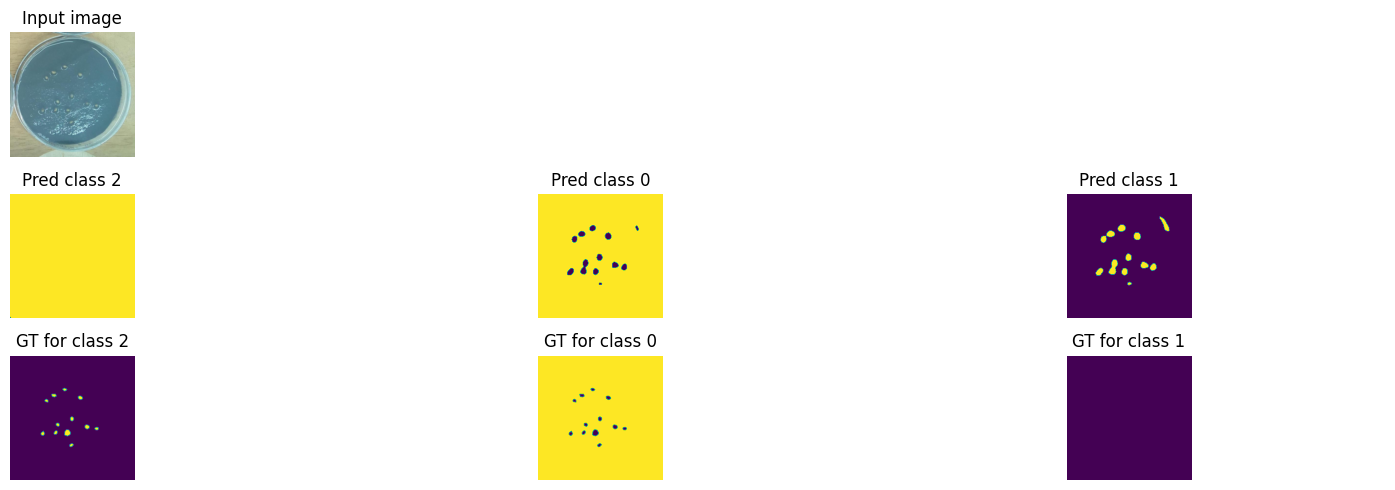

Train loss: 0.58187 | Time: 5m 53s | Val loss: 0.57097
Train_DICE_avg: 0.49668 | Train_Jaccard_avg: 0.45441 | Train_Sensitivity_avg: 0.47472 | Train_Specificity_avg: 0.89101 
Class 0 - Train_DICE: 0.98297 | Train_Jaccard: 0.96663 | Train_Sensitivity: 0.99562 | Train_Specificity: 0.67620 
Class 1 - Train_DICE: 0.15373 | Train_Jaccard: 0.09430 | Train_Sensitivity: 0.09692 | Train_Specificity: 0.99925 
Class 2 - Train_DICE: 0.35333 | Train_Jaccard: 0.30229 | Train_Sensitivity: 0.33161 | Train_Specificity: 0.99759 
Val_DICE_avg: 0.49923 | Val_Jaccard_avg: 0.46151 | Val_Sensitivity_avg: 0.48976 | Val_Specificity_avg: 0.87880 
Class 0 - Val_DICE: 0.99010 | Val_Jaccard: 0.98046 | Val_Sensitivity: 0.99813 | Val_Specificity: 0.64150 
Class 1 - Val_DICE: 0.15527 | Val_Jaccard: 0.10000 | Val_Sensitivity: 0.10582 | Val_Specificity: 0.99891 
Class 2 - Val_DICE: 0.35232 | Val_Jaccard: 0.30408 | Val_Sensitivity: 0.36534 | Val_Specificity: 0.99599 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.56672 | Time: 6m 52s | Val loss: 0.55458
Train_DICE_avg: 0.51594 | Train_Jaccard_avg: 0.47149 | Train_Sensitivity_avg: 0.49155 | Train_Specificity_avg: 0.89825 
Class 0 - Train_DICE: 0.98471 | Train_Jaccard: 0.97000 | Train_Sensitivity: 0.99515 | Train_Specificity: 0.69827 
Class 1 - Train_DICE: 0.16357 | Train_Jaccard: 0.10163 | Train_Sensitivity: 0.10489 | Train_Specificity: 0.99917 
Class 2 - Train_DICE: 0.39954 | Train_Jaccard: 0.34284 | Train_Sensitivity: 0.37462 | Train_Specificity: 0.99731 
Val_DICE_avg: 0.51996 | Val_Jaccard_avg: 0.48075 | Val_Sensitivity_avg: 0.50607 | Val_Specificity_avg: 0.86925 
Class 0 - Val_DICE: 0.98879 | Val_Jaccard: 0.97788 | Val_Sensitivity: 0.99870 | Val_Specificity: 0.61204 
Class 1 - Val_DICE: 0.16350 | Val_Jaccard: 0.10660 | Val_Sensitivity: 0.11510 | Val_Specificity: 0.99865 
Class 2 - Val_DICE: 0.40759 | Val_Jaccard: 0.35775 | Val_Sensitivity: 0.40441 | Val_Specificity: 0.99707 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.55017 | Time: 7m 52s | Val loss: 0.53359
Train_DICE_avg: 0.53515 | Train_Jaccard_avg: 0.48828 | Train_Sensitivity_avg: 0.51103 | Train_Specificity_avg: 0.90459 
Class 0 - Train_DICE: 0.98537 | Train_Jaccard: 0.97127 | Train_Sensitivity: 0.99412 | Train_Specificity: 0.71772 
Class 1 - Train_DICE: 0.19360 | Train_Jaccard: 0.12626 | Train_Sensitivity: 0.13571 | Train_Specificity: 0.99884 
Class 2 - Train_DICE: 0.42647 | Train_Jaccard: 0.36731 | Train_Sensitivity: 0.40325 | Train_Specificity: 0.99722 
Val_DICE_avg: 0.55396 | Val_Jaccard_avg: 0.51401 | Val_Sensitivity_avg: 0.53998 | Val_Specificity_avg: 0.89367 
Class 0 - Val_DICE: 0.99213 | Val_Jaccard: 0.98441 | Val_Sensitivity: 0.99823 | Val_Specificity: 0.68524 
Class 1 - Val_DICE: 0.22848 | Val_Jaccard: 0.16452 | Val_Sensitivity: 0.19977 | Val_Specificity: 0.99768 
Class 2 - Val_DICE: 0.44127 | Val_Jaccard: 0.39309 | Val_Sensitivity: 0.42196 | Val_Specificity: 0.99809 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.53072 | Time: 8m 51s | Val loss: 0.51436
Train_DICE_avg: 0.55354 | Train_Jaccard_avg: 0.50585 | Train_Sensitivity_avg: 0.53507 | Train_Specificity_avg: 0.91035 
Class 0 - Train_DICE: 0.98629 | Train_Jaccard: 0.97306 | Train_Sensitivity: 0.99351 | Train_Specificity: 0.73585 
Class 1 - Train_DICE: 0.23323 | Train_Jaccard: 0.16403 | Train_Sensitivity: 0.18977 | Train_Specificity: 0.99836 
Class 2 - Train_DICE: 0.44109 | Train_Jaccard: 0.38046 | Train_Sensitivity: 0.42193 | Train_Specificity: 0.99685 
Val_DICE_avg: 0.55741 | Val_Jaccard_avg: 0.51771 | Val_Sensitivity_avg: 0.54520 | Val_Specificity_avg: 0.88518 
Class 0 - Val_DICE: 0.99113 | Val_Jaccard: 0.98245 | Val_Sensitivity: 0.99814 | Val_Specificity: 0.66001 
Class 1 - Val_DICE: 0.22753 | Val_Jaccard: 0.16678 | Val_Sensitivity: 0.18356 | Val_Specificity: 0.99864 
Class 2 - Val_DICE: 0.45356 | Val_Jaccard: 0.40391 | Val_Sensitivity: 0.45390 | Val_Specificity: 0.99688 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train loss: 0.51138 | Time: 9m 50s | Val loss: 0.49681
Train_DICE_avg: 0.58956 | Train_Jaccard_avg: 0.53374 | Train_Sensitivity_avg: 0.56654 | Train_Specificity_avg: 0.91607 
Class 0 - Train_DICE: 0.98700 | Train_Jaccard: 0.97444 | Train_Sensitivity: 0.99253 | Train_Specificity: 0.75316 
Class 1 - Train_DICE: 0.25774 | Train_Jaccard: 0.18619 | Train_Sensitivity: 0.22081 | Train_Specificity: 0.99823 
Class 2 - Train_DICE: 0.52394 | Train_Jaccard: 0.44059 | Train_Sensitivity: 0.48628 | Train_Specificity: 0.99682 
Val_DICE_avg: 0.62145 | Val_Jaccard_avg: 0.56228 | Val_Sensitivity_avg: 0.60392 | Val_Specificity_avg: 0.90381 
Class 0 - Val_DICE: 0.99305 | Val_Jaccard: 0.98624 | Val_Sensitivity: 0.99763 | Val_Specificity: 0.71772 
Class 1 - Val_DICE: 0.25414 | Val_Jaccard: 0.18942 | Val_Sensitivity: 0.23879 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.61715 | Val_Jaccard: 0.51117 | Val_Sensitivity: 0.57534 | Val_Specificity: 0.99604 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


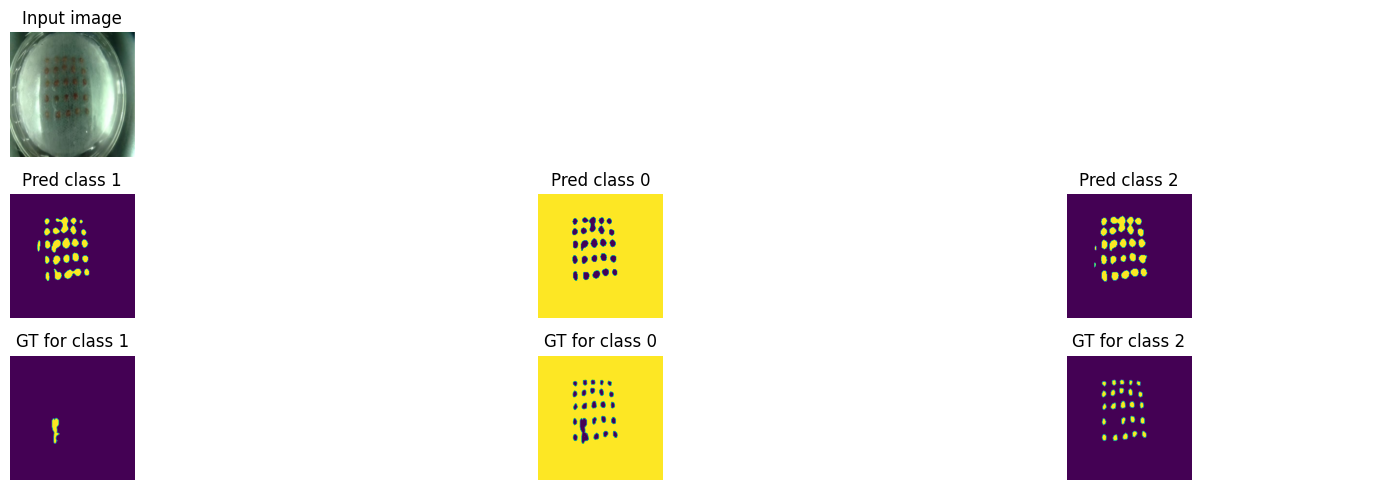

Train loss: 0.49366 | Time: 10m 51s | Val loss: 0.48978
Train_DICE_avg: 0.62037 | Train_Jaccard_avg: 0.55793 | Train_Sensitivity_avg: 0.59447 | Train_Specificity_avg: 0.92119 
Class 0 - Train_DICE: 0.98788 | Train_Jaccard: 0.97614 | Train_Sensitivity: 0.99209 | Train_Specificity: 0.76889 
Class 1 - Train_DICE: 0.27873 | Train_Jaccard: 0.20597 | Train_Sensitivity: 0.24901 | Train_Specificity: 0.99810 
Class 2 - Train_DICE: 0.59450 | Train_Jaccard: 0.49169 | Train_Sensitivity: 0.54232 | Train_Specificity: 0.99660 
Val_DICE_avg: 0.63099 | Val_Jaccard_avg: 0.57060 | Val_Sensitivity_avg: 0.60578 | Val_Specificity_avg: 0.90749 
Class 0 - Val_DICE: 0.99337 | Val_Jaccard: 0.98685 | Val_Sensitivity: 0.99716 | Val_Specificity: 0.72820 
Class 1 - Val_DICE: 0.25919 | Val_Jaccard: 0.19554 | Val_Sensitivity: 0.22353 | Val_Specificity: 0.99824 
Class 2 - Val_DICE: 0.64042 | Val_Jaccard: 0.52942 | Val_Sensitivity: 0.59666 | Val_Specificity: 0.99602 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.48154 | Time: 11m 52s | Val loss: 0.48614
Train_DICE_avg: 0.63326 | Train_Jaccard_avg: 0.56886 | Train_Sensitivity_avg: 0.60746 | Train_Specificity_avg: 0.92456 
Class 0 - Train_DICE: 0.98826 | Train_Jaccard: 0.97687 | Train_Sensitivity: 0.99171 | Train_Specificity: 0.77920 
Class 1 - Train_DICE: 0.29497 | Train_Jaccard: 0.21997 | Train_Sensitivity: 0.26642 | Train_Specificity: 0.99807 
Class 2 - Train_DICE: 0.61657 | Train_Jaccard: 0.50974 | Train_Sensitivity: 0.56426 | Train_Specificity: 0.99641 
Val_DICE_avg: 0.64483 | Val_Jaccard_avg: 0.58520 | Val_Sensitivity_avg: 0.61768 | Val_Specificity_avg: 0.89890 
Class 0 - Val_DICE: 0.99270 | Val_Jaccard: 0.98554 | Val_Sensitivity: 0.99789 | Val_Specificity: 0.70134 
Class 1 - Val_DICE: 0.26722 | Val_Jaccard: 0.20341 | Val_Sensitivity: 0.25290 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.67458 | Val_Jaccard: 0.56665 | Val_Sensitivity: 0.60227 | Val_Specificity: 0.99771 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.46546 | Time: 12m 53s | Val loss: 0.46578
Train_DICE_avg: 0.65249 | Train_Jaccard_avg: 0.58768 | Train_Sensitivity_avg: 0.62808 | Train_Specificity_avg: 0.92791 
Class 0 - Train_DICE: 0.98870 | Train_Jaccard: 0.97774 | Train_Sensitivity: 0.99118 | Train_Specificity: 0.78944 
Class 1 - Train_DICE: 0.31578 | Train_Jaccard: 0.23885 | Train_Sensitivity: 0.29104 | Train_Specificity: 0.99789 
Class 2 - Train_DICE: 0.65299 | Train_Jaccard: 0.54645 | Train_Sensitivity: 0.60202 | Train_Specificity: 0.99641 
Val_DICE_avg: 0.65544 | Val_Jaccard_avg: 0.59647 | Val_Sensitivity_avg: 0.63242 | Val_Specificity_avg: 0.90670 
Class 0 - Val_DICE: 0.99325 | Val_Jaccard: 0.98664 | Val_Sensitivity: 0.99730 | Val_Specificity: 0.72519 
Class 1 - Val_DICE: 0.27189 | Val_Jaccard: 0.20581 | Val_Sensitivity: 0.26344 | Val_Specificity: 0.99748 
Class 2 - Val_DICE: 0.70118 | Val_Jaccard: 0.59695 | Val_Sensitivity: 0.63653 | Val_Specificity: 0.99742 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.44550 | Time: 13m 57s | Val loss: 0.45392
Train_DICE_avg: 0.66168 | Train_Jaccard_avg: 0.59756 | Train_Sensitivity_avg: 0.64388 | Train_Specificity_avg: 0.93222 
Class 0 - Train_DICE: 0.98869 | Train_Jaccard: 0.97772 | Train_Sensitivity: 0.99042 | Train_Specificity: 0.80273 
Class 1 - Train_DICE: 0.32505 | Train_Jaccard: 0.24799 | Train_Sensitivity: 0.31152 | Train_Specificity: 0.99777 
Class 2 - Train_DICE: 0.67130 | Train_Jaccard: 0.56697 | Train_Sensitivity: 0.62969 | Train_Specificity: 0.99618 
Val_DICE_avg: 0.66167 | Val_Jaccard_avg: 0.60482 | Val_Sensitivity_avg: 0.64218 | Val_Specificity_avg: 0.90504 
Class 0 - Val_DICE: 0.99316 | Val_Jaccard: 0.98646 | Val_Sensitivity: 0.99751 | Val_Specificity: 0.71992 
Class 1 - Val_DICE: 0.29700 | Val_Jaccard: 0.23188 | Val_Sensitivity: 0.28624 | Val_Specificity: 0.99792 
Class 2 - Val_DICE: 0.69484 | Val_Jaccard: 0.59610 | Val_Sensitivity: 0.64278 | Val_Specificity: 0.99727 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.42937 | Time: 15m 1s | Val loss: 0.44197
Train_DICE_avg: 0.66805 | Train_Jaccard_avg: 0.60347 | Train_Sensitivity_avg: 0.65578 | Train_Specificity_avg: 0.93289 
Class 0 - Train_DICE: 0.98907 | Train_Jaccard: 0.97846 | Train_Sensitivity: 0.99103 | Train_Specificity: 0.80515 
Class 1 - Train_DICE: 0.33219 | Train_Jaccard: 0.25452 | Train_Sensitivity: 0.32942 | Train_Specificity: 0.99760 
Class 2 - Train_DICE: 0.68290 | Train_Jaccard: 0.57742 | Train_Sensitivity: 0.64688 | Train_Specificity: 0.99592 
Val_DICE_avg: 0.66764 | Val_Jaccard_avg: 0.60933 | Val_Sensitivity_avg: 0.64735 | Val_Specificity_avg: 0.90814 
Class 0 - Val_DICE: 0.99335 | Val_Jaccard: 0.98683 | Val_Sensitivity: 0.99727 | Val_Specificity: 0.72972 
Class 1 - Val_DICE: 0.28801 | Val_Jaccard: 0.22486 | Val_Sensitivity: 0.26414 | Val_Specificity: 0.99813 
Class 2 - Val_DICE: 0.72156 | Val_Jaccard: 0.61631 | Val_Sensitivity: 0.68063 | Val_Specificity: 0.99657 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


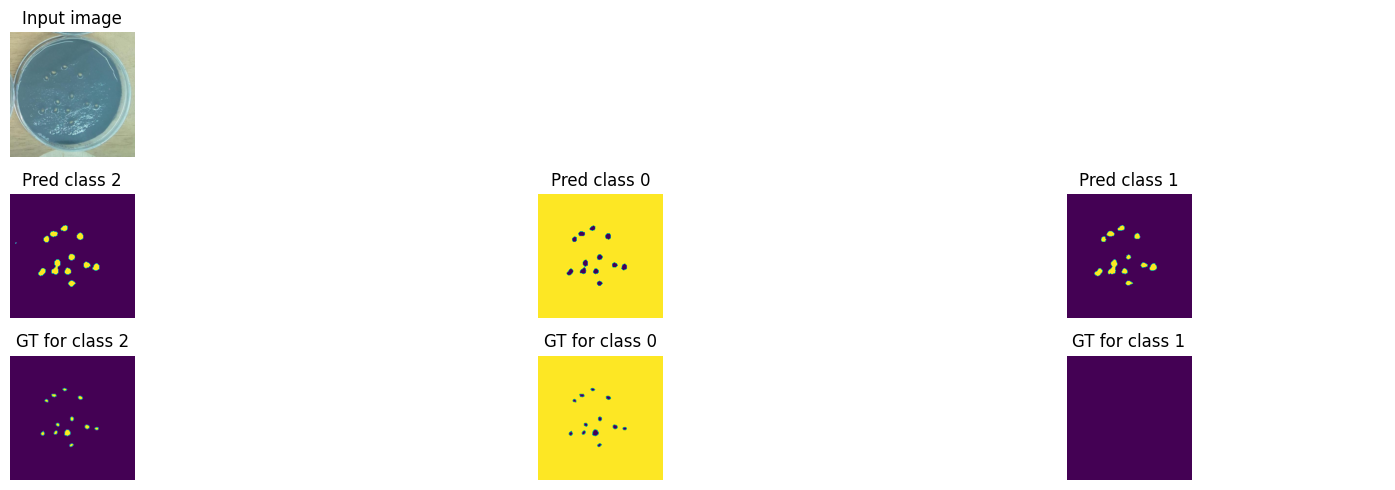

Train loss: 0.41635 | Time: 16m 5s | Val loss: 0.42783
Train_DICE_avg: 0.67552 | Train_Jaccard_avg: 0.61185 | Train_Sensitivity_avg: 0.66694 | Train_Specificity_avg: 0.93333 
Class 0 - Train_DICE: 0.98936 | Train_Jaccard: 0.97902 | Train_Sensitivity: 0.99172 | Train_Specificity: 0.80665 
Class 1 - Train_DICE: 0.33707 | Train_Jaccard: 0.25925 | Train_Sensitivity: 0.33912 | Train_Specificity: 0.99756 
Class 2 - Train_DICE: 0.70013 | Train_Jaccard: 0.59728 | Train_Sensitivity: 0.66998 | Train_Specificity: 0.99579 
Val_DICE_avg: 0.69045 | Val_Jaccard_avg: 0.63056 | Val_Sensitivity_avg: 0.67467 | Val_Specificity_avg: 0.92463 
Class 0 - Val_DICE: 0.99482 | Val_Jaccard: 0.98973 | Val_Sensitivity: 0.99708 | Val_Specificity: 0.77958 
Class 1 - Val_DICE: 0.32242 | Val_Jaccard: 0.25195 | Val_Sensitivity: 0.31206 | Val_Specificity: 0.99776 
Class 2 - Val_DICE: 0.75412 | Val_Jaccard: 0.64999 | Val_Sensitivity: 0.71487 | Val_Specificity: 0.99656 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.40512 | Time: 17m 9s | Val loss: 0.41823
Train_DICE_avg: 0.68578 | Train_Jaccard_avg: 0.62189 | Train_Sensitivity_avg: 0.67905 | Train_Specificity_avg: 0.93495 
Class 0 - Train_DICE: 0.98971 | Train_Jaccard: 0.97971 | Train_Sensitivity: 0.99183 | Train_Specificity: 0.81162 
Class 1 - Train_DICE: 0.34781 | Train_Jaccard: 0.26893 | Train_Sensitivity: 0.35123 | Train_Specificity: 0.99758 
Class 2 - Train_DICE: 0.71981 | Train_Jaccard: 0.61702 | Train_Sensitivity: 0.69409 | Train_Specificity: 0.99565 
Val_DICE_avg: 0.69407 | Val_Jaccard_avg: 0.63484 | Val_Sensitivity_avg: 0.68900 | Val_Specificity_avg: 0.91385 
Class 0 - Val_DICE: 0.99407 | Val_Jaccard: 0.98823 | Val_Sensitivity: 0.99730 | Val_Specificity: 0.74777 
Class 1 - Val_DICE: 0.33222 | Val_Jaccard: 0.26692 | Val_Sensitivity: 0.34962 | Val_Specificity: 0.99753 
Class 2 - Val_DICE: 0.75591 | Val_Jaccard: 0.64938 | Val_Sensitivity: 0.72009 | Val_Specificity: 0.99624 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.39491 | Time: 18m 13s | Val loss: 0.43103
Train_DICE_avg: 0.69289 | Train_Jaccard_avg: 0.62998 | Train_Sensitivity_avg: 0.68923 | Train_Specificity_avg: 0.93365 
Class 0 - Train_DICE: 0.98971 | Train_Jaccard: 0.97972 | Train_Sensitivity: 0.99218 | Train_Specificity: 0.80787 
Class 1 - Train_DICE: 0.35180 | Train_Jaccard: 0.27427 | Train_Sensitivity: 0.35926 | Train_Specificity: 0.99753 
Class 2 - Train_DICE: 0.73716 | Train_Jaccard: 0.63595 | Train_Sensitivity: 0.71626 | Train_Specificity: 0.99555 
Val_DICE_avg: 0.69360 | Val_Jaccard_avg: 0.63448 | Val_Sensitivity_avg: 0.68014 | Val_Specificity_avg: 0.92022 
Class 0 - Val_DICE: 0.99439 | Val_Jaccard: 0.98887 | Val_Sensitivity: 0.99729 | Val_Specificity: 0.76602 
Class 1 - Val_DICE: 0.31820 | Val_Jaccard: 0.24950 | Val_Sensitivity: 0.33347 | Val_Specificity: 0.99727 
Class 2 - Val_DICE: 0.76820 | Val_Jaccard: 0.66506 | Val_Sensitivity: 0.70966 | Val_Specificity: 0.99739 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train loss: 0.37783 | Time: 19m 17s | Val loss: 0.39355
Train_DICE_avg: 0.70498 | Train_Jaccard_avg: 0.64295 | Train_Sensitivity_avg: 0.70479 | Train_Specificity_avg: 0.93857 
Class 0 - Train_DICE: 0.99003 | Train_Jaccard: 0.98034 | Train_Sensitivity: 0.99225 | Train_Specificity: 0.82268 
Class 1 - Train_DICE: 0.36365 | Train_Jaccard: 0.28325 | Train_Sensitivity: 0.37430 | Train_Specificity: 0.99745 
Class 2 - Train_DICE: 0.76127 | Train_Jaccard: 0.66525 | Train_Sensitivity: 0.74781 | Train_Specificity: 0.99557 
Val_DICE_avg: 0.71616 | Val_Jaccard_avg: 0.66180 | Val_Sensitivity_avg: 0.71796 | Val_Specificity_avg: 0.92421 
Class 0 - Val_DICE: 0.99476 | Val_Jaccard: 0.98961 | Val_Sensitivity: 0.99739 | Val_Specificity: 0.77859 
Class 1 - Val_DICE: 0.36221 | Val_Jaccard: 0.29460 | Val_Sensitivity: 0.39126 | Val_Specificity: 0.99747 
Class 2 - Val_DICE: 0.79150 | Val_Jaccard: 0.70120 | Val_Sensitivity: 0.76524 | Val_Specificity: 0.99657 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.36302 | Time: 20m 21s | Val loss: 0.37975
Train_DICE_avg: 0.71135 | Train_Jaccard_avg: 0.64961 | Train_Sensitivity_avg: 0.71621 | Train_Specificity_avg: 0.93790 
Class 0 - Train_DICE: 0.99015 | Train_Jaccard: 0.98058 | Train_Sensitivity: 0.99242 | Train_Specificity: 0.82104 
Class 1 - Train_DICE: 0.36951 | Train_Jaccard: 0.28879 | Train_Sensitivity: 0.38498 | Train_Specificity: 0.99745 
Class 2 - Train_DICE: 0.77439 | Train_Jaccard: 0.67947 | Train_Sensitivity: 0.77124 | Train_Specificity: 0.99520 
Val_DICE_avg: 0.71565 | Val_Jaccard_avg: 0.66096 | Val_Sensitivity_avg: 0.71439 | Val_Specificity_avg: 0.92916 
Class 0 - Val_DICE: 0.99522 | Val_Jaccard: 0.99052 | Val_Sensitivity: 0.99744 | Val_Specificity: 0.79409 
Class 1 - Val_DICE: 0.35130 | Val_Jaccard: 0.28414 | Val_Sensitivity: 0.34830 | Val_Specificity: 0.99794 
Class 2 - Val_DICE: 0.80043 | Val_Jaccard: 0.70822 | Val_Sensitivity: 0.79744 | Val_Specificity: 0.99544 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


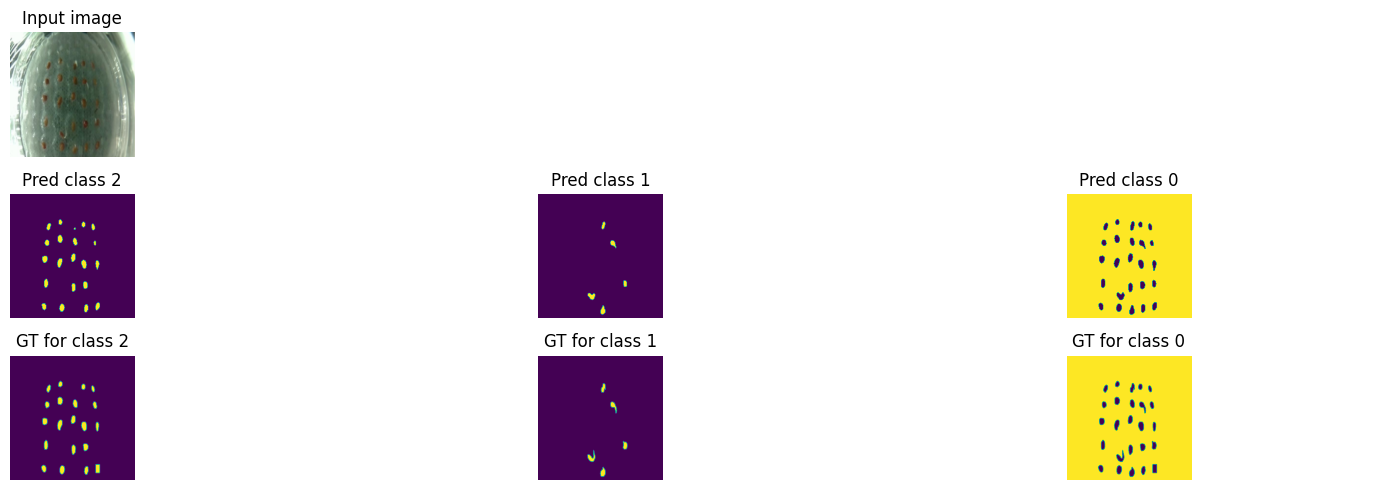

Train loss: 0.34999 | Time: 21m 26s | Val loss: 0.36179
Train_DICE_avg: 0.71798 | Train_Jaccard_avg: 0.65650 | Train_Sensitivity_avg: 0.72589 | Train_Specificity_avg: 0.94027 
Class 0 - Train_DICE: 0.99032 | Train_Jaccard: 0.98090 | Train_Sensitivity: 0.99227 | Train_Specificity: 0.82838 
Class 1 - Train_DICE: 0.37267 | Train_Jaccard: 0.29097 | Train_Sensitivity: 0.39072 | Train_Specificity: 0.99739 
Class 2 - Train_DICE: 0.79096 | Train_Jaccard: 0.69764 | Train_Sensitivity: 0.79468 | Train_Specificity: 0.99503 
Val_DICE_avg: 0.71301 | Val_Jaccard_avg: 0.66321 | Val_Sensitivity_avg: 0.71767 | Val_Specificity_avg: 0.91608 
Class 0 - Val_DICE: 0.99393 | Val_Jaccard: 0.98799 | Val_Sensitivity: 0.99793 | Val_Specificity: 0.75386 
Class 1 - Val_DICE: 0.33992 | Val_Jaccard: 0.27602 | Val_Sensitivity: 0.36843 | Val_Specificity: 0.99760 
Class 2 - Val_DICE: 0.80520 | Val_Jaccard: 0.72562 | Val_Sensitivity: 0.78667 | Val_Specificity: 0.99677 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.33796 | Time: 22m 30s | Val loss: 0.35194
Train_DICE_avg: 0.72336 | Train_Jaccard_avg: 0.66136 | Train_Sensitivity_avg: 0.73265 | Train_Specificity_avg: 0.94219 
Class 0 - Train_DICE: 0.99071 | Train_Jaccard: 0.98167 | Train_Sensitivity: 0.99241 | Train_Specificity: 0.83421 
Class 1 - Train_DICE: 0.37943 | Train_Jaccard: 0.29786 | Train_Sensitivity: 0.39914 | Train_Specificity: 0.99742 
Class 2 - Train_DICE: 0.79993 | Train_Jaccard: 0.70456 | Train_Sensitivity: 0.80641 | Train_Specificity: 0.99494 
Val_DICE_avg: 0.71937 | Val_Jaccard_avg: 0.66342 | Val_Sensitivity_avg: 0.72967 | Val_Specificity_avg: 0.94184 
Class 0 - Val_DICE: 0.99575 | Val_Jaccard: 0.99155 | Val_Sensitivity: 0.99693 | Val_Specificity: 0.83331 
Class 1 - Val_DICE: 0.35214 | Val_Jaccard: 0.28356 | Val_Sensitivity: 0.35739 | Val_Specificity: 0.99749 
Class 2 - Val_DICE: 0.81021 | Val_Jaccard: 0.71514 | Val_Sensitivity: 0.83469 | Val_Specificity: 0.99472 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.32644 | Time: 23m 34s | Val loss: 0.34248
Train_DICE_avg: 0.73536 | Train_Jaccard_avg: 0.67256 | Train_Sensitivity_avg: 0.74685 | Train_Specificity_avg: 0.94451 
Class 0 - Train_DICE: 0.99081 | Train_Jaccard: 0.98186 | Train_Sensitivity: 0.99196 | Train_Specificity: 0.84138 
Class 1 - Train_DICE: 0.39604 | Train_Jaccard: 0.31416 | Train_Sensitivity: 0.41977 | Train_Specificity: 0.99738 
Class 2 - Train_DICE: 0.81922 | Train_Jaccard: 0.72165 | Train_Sensitivity: 0.82883 | Train_Specificity: 0.99476 
Val_DICE_avg: 0.72999 | Val_Jaccard_avg: 0.67604 | Val_Sensitivity_avg: 0.73499 | Val_Specificity_avg: 0.92559 
Class 0 - Val_DICE: 0.99510 | Val_Jaccard: 0.99027 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.78297 
Class 1 - Val_DICE: 0.34824 | Val_Jaccard: 0.28036 | Val_Sensitivity: 0.37612 | Val_Specificity: 0.99751 
Class 2 - Val_DICE: 0.84662 | Val_Jaccard: 0.75749 | Val_Sensitivity: 0.83126 | Val_Specificity: 0.99629 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Train loss: 0.31482 | Time: 24m 38s | Val loss: 0.30722
Train_DICE_avg: 0.74492 | Train_Jaccard_avg: 0.68126 | Train_Sensitivity_avg: 0.75748 | Train_Specificity_avg: 0.94444 
Class 0 - Train_DICE: 0.99103 | Train_Jaccard: 0.98229 | Train_Sensitivity: 0.99260 | Train_Specificity: 0.84117 
Class 1 - Train_DICE: 0.40052 | Train_Jaccard: 0.31740 | Train_Sensitivity: 0.42612 | Train_Specificity: 0.99729 
Class 2 - Train_DICE: 0.84322 | Train_Jaccard: 0.74409 | Train_Sensitivity: 0.85374 | Train_Specificity: 0.99487 
Val_DICE_avg: 0.74337 | Val_Jaccard_avg: 0.68942 | Val_Sensitivity_avg: 0.75651 | Val_Specificity_avg: 0.93568 
Class 0 - Val_DICE: 0.99557 | Val_Jaccard: 0.99120 | Val_Sensitivity: 0.99761 | Val_Specificity: 0.81412 
Class 1 - Val_DICE: 0.36447 | Val_Jaccard: 0.29537 | Val_Sensitivity: 0.36961 | Val_Specificity: 0.99762 
Class 2 - Val_DICE: 0.87008 | Val_Jaccard: 0.78170 | Val_Sensitivity: 0.90231 | Val_Specificity: 0.99530 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.29375 | Time: 25m 42s | Val loss: 0.29756
Train_DICE_avg: 0.74965 | Train_Jaccard_avg: 0.68627 | Train_Sensitivity_avg: 0.77175 | Train_Specificity_avg: 0.94968 
Class 0 - Train_DICE: 0.99125 | Train_Jaccard: 0.98272 | Train_Sensitivity: 0.99197 | Train_Specificity: 0.85729 
Class 1 - Train_DICE: 0.40451 | Train_Jaccard: 0.32213 | Train_Sensitivity: 0.44004 | Train_Specificity: 0.99719 
Class 2 - Train_DICE: 0.85319 | Train_Jaccard: 0.75397 | Train_Sensitivity: 0.88323 | Train_Specificity: 0.99456 
Val_DICE_avg: 0.74929 | Val_Jaccard_avg: 0.69788 | Val_Sensitivity_avg: 0.76679 | Val_Specificity_avg: 0.93727 
Class 0 - Val_DICE: 0.99543 | Val_Jaccard: 0.99092 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.81795 
Class 1 - Val_DICE: 0.37291 | Val_Jaccard: 0.30667 | Val_Sensitivity: 0.39198 | Val_Specificity: 0.99776 
Class 2 - Val_DICE: 0.87953 | Val_Jaccard: 0.79604 | Val_Sensitivity: 0.91038 | Val_Specificity: 0.99608 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


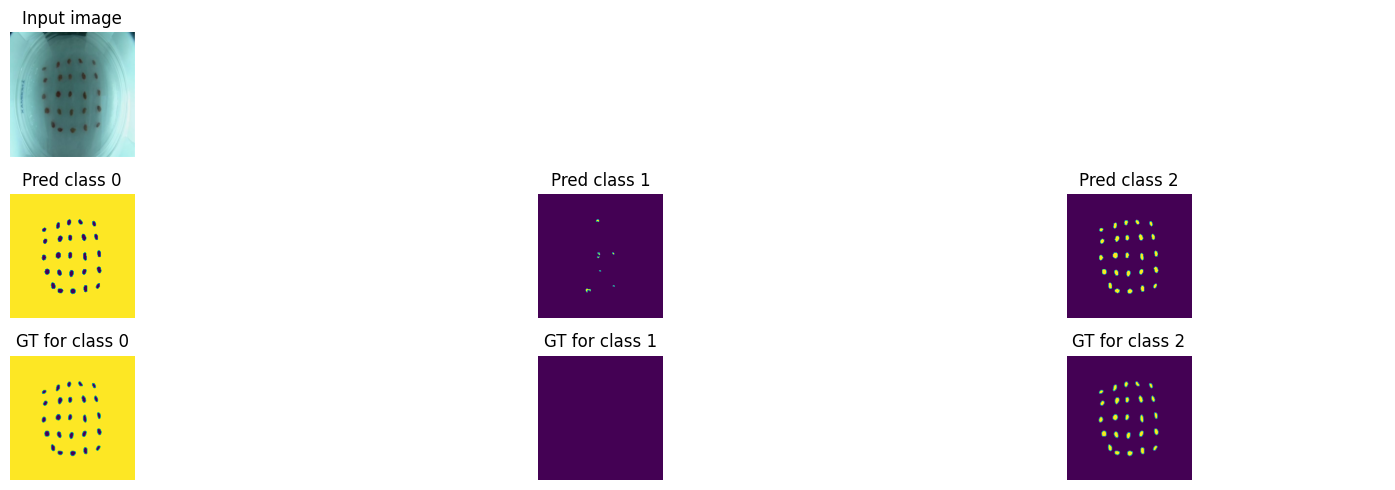

Train loss: 0.28447 | Time: 26m 47s | Val loss: 0.29662
Train_DICE_avg: 0.75021 | Train_Jaccard_avg: 0.68644 | Train_Sensitivity_avg: 0.77728 | Train_Specificity_avg: 0.94772 
Class 0 - Train_DICE: 0.99129 | Train_Jaccard: 0.98281 | Train_Sensitivity: 0.99231 | Train_Specificity: 0.85170 
Class 1 - Train_DICE: 0.40590 | Train_Jaccard: 0.32277 | Train_Sensitivity: 0.44835 | Train_Specificity: 0.99709 
Class 2 - Train_DICE: 0.85344 | Train_Jaccard: 0.75376 | Train_Sensitivity: 0.89119 | Train_Specificity: 0.99437 
Val_DICE_avg: 0.76075 | Val_Jaccard_avg: 0.70864 | Val_Sensitivity_avg: 0.78368 | Val_Specificity_avg: 0.93701 
Class 0 - Val_DICE: 0.99553 | Val_Jaccard: 0.99112 | Val_Sensitivity: 0.99770 | Val_Specificity: 0.81790 
Class 1 - Val_DICE: 0.40893 | Val_Jaccard: 0.34174 | Val_Sensitivity: 0.45795 | Val_Specificity: 0.99735 
Class 2 - Val_DICE: 0.87781 | Val_Jaccard: 0.79307 | Val_Sensitivity: 0.89540 | Val_Specificity: 0.99577 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


Train loss: 0.27607 | Time: 27m 51s | Val loss: 0.28385
Train_DICE_avg: 0.75397 | Train_Jaccard_avg: 0.69051 | Train_Sensitivity_avg: 0.78251 | Train_Specificity_avg: 0.94801 
Class 0 - Train_DICE: 0.99113 | Train_Jaccard: 0.98249 | Train_Sensitivity: 0.99251 | Train_Specificity: 0.85264 
Class 1 - Train_DICE: 0.41482 | Train_Jaccard: 0.33180 | Train_Sensitivity: 0.45716 | Train_Specificity: 0.99711 
Class 2 - Train_DICE: 0.85595 | Train_Jaccard: 0.75725 | Train_Sensitivity: 0.89787 | Train_Specificity: 0.99429 
Val_DICE_avg: 0.75243 | Val_Jaccard_avg: 0.69990 | Val_Sensitivity_avg: 0.77411 | Val_Specificity_avg: 0.94098 
Class 0 - Val_DICE: 0.99562 | Val_Jaccard: 0.99131 | Val_Sensitivity: 0.99789 | Val_Specificity: 0.82974 
Class 1 - Val_DICE: 0.38283 | Val_Jaccard: 0.31467 | Val_Sensitivity: 0.40534 | Val_Specificity: 0.99769 
Class 2 - Val_DICE: 0.87884 | Val_Jaccard: 0.79372 | Val_Sensitivity: 0.91909 | Val_Specificity: 0.99552 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train loss: 0.26911 | Time: 28m 55s | Val loss: 0.28056
Train_DICE_avg: 0.76021 | Train_Jaccard_avg: 0.69701 | Train_Sensitivity_avg: 0.79169 | Train_Specificity_avg: 0.94815 
Class 0 - Train_DICE: 0.99125 | Train_Jaccard: 0.98273 | Train_Sensitivity: 0.99278 | Train_Specificity: 0.85302 
Class 1 - Train_DICE: 0.43133 | Train_Jaccard: 0.34814 | Train_Sensitivity: 0.48025 | Train_Specificity: 0.99710 
Class 2 - Train_DICE: 0.85805 | Train_Jaccard: 0.76017 | Train_Sensitivity: 0.90205 | Train_Specificity: 0.99432 
Val_DICE_avg: 0.74471 | Val_Jaccard_avg: 0.68785 | Val_Sensitivity_avg: 0.78726 | Val_Specificity_avg: 0.94691 
Class 0 - Val_DICE: 0.99606 | Val_Jaccard: 0.99217 | Val_Sensitivity: 0.99733 | Val_Specificity: 0.84992 
Class 1 - Val_DICE: 0.37750 | Val_Jaccard: 0.30793 | Val_Sensitivity: 0.42333 | Val_Specificity: 0.99716 
Class 2 - Val_DICE: 0.86057 | Val_Jaccard: 0.76346 | Val_Sensitivity: 0.94112 | Val_Specificity: 0.99364 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


Train loss: 0.26365 | Time: 29m 59s | Val loss: 0.27446
Train_DICE_avg: 0.75897 | Train_Jaccard_avg: 0.69565 | Train_Sensitivity_avg: 0.79316 | Train_Specificity_avg: 0.94720 
Class 0 - Train_DICE: 0.99113 | Train_Jaccard: 0.98250 | Train_Sensitivity: 0.99278 | Train_Specificity: 0.85028 
Class 1 - Train_DICE: 0.42911 | Train_Jaccard: 0.34597 | Train_Sensitivity: 0.48272 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.85668 | Train_Jaccard: 0.75847 | Train_Sensitivity: 0.90398 | Train_Specificity: 0.99424 
Val_DICE_avg: 0.79279 | Val_Jaccard_avg: 0.74211 | Val_Sensitivity_avg: 0.82237 | Val_Specificity_avg: 0.94407 
Class 0 - Val_DICE: 0.99579 | Val_Jaccard: 0.99165 | Val_Sensitivity: 0.99789 | Val_Specificity: 0.83884 
Class 1 - Val_DICE: 0.49685 | Val_Jaccard: 0.43067 | Val_Sensitivity: 0.55374 | Val_Specificity: 0.99741 
Class 2 - Val_DICE: 0.88572 | Val_Jaccard: 0.80402 | Val_Sensitivity: 0.91549 | Val_Specificity: 0.99595 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]


Train loss: 0.26023 | Time: 31m 3s | Val loss: 0.27236
Train_DICE_avg: 0.76691 | Train_Jaccard_avg: 0.70340 | Train_Sensitivity_avg: 0.80044 | Train_Specificity_avg: 0.94862 
Class 0 - Train_DICE: 0.99146 | Train_Jaccard: 0.98313 | Train_Sensitivity: 0.99307 | Train_Specificity: 0.85449 
Class 1 - Train_DICE: 0.44978 | Train_Jaccard: 0.36517 | Train_Sensitivity: 0.50236 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.85949 | Train_Jaccard: 0.76190 | Train_Sensitivity: 0.90588 | Train_Specificity: 0.99430 
Val_DICE_avg: 0.75344 | Val_Jaccard_avg: 0.70050 | Val_Sensitivity_avg: 0.78517 | Val_Specificity_avg: 0.93968 
Class 0 - Val_DICE: 0.99561 | Val_Jaccard: 0.99129 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.82658 
Class 1 - Val_DICE: 0.39143 | Val_Jaccard: 0.32536 | Val_Sensitivity: 0.41749 | Val_Specificity: 0.99768 
Class 2 - Val_DICE: 0.87328 | Val_Jaccard: 0.78486 | Val_Sensitivity: 0.93997 | Val_Specificity: 0.99478 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


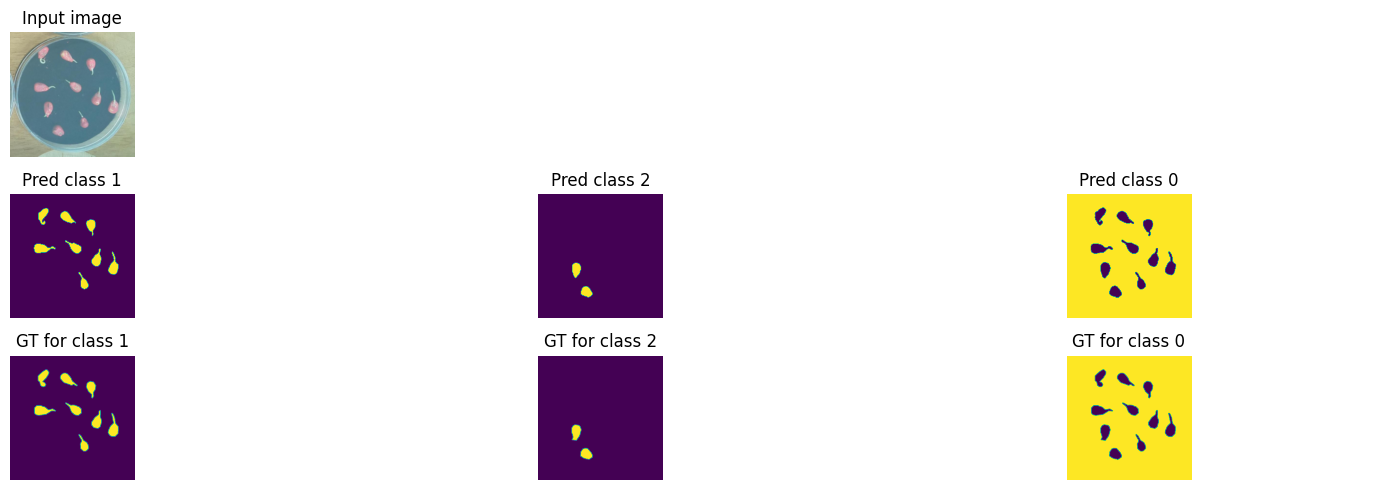

Train loss: 0.25727 | Time: 32m 8s | Val loss: 0.26543
Train_DICE_avg: 0.77048 | Train_Jaccard_avg: 0.70711 | Train_Sensitivity_avg: 0.80569 | Train_Specificity_avg: 0.94914 
Class 0 - Train_DICE: 0.99138 | Train_Jaccard: 0.98299 | Train_Sensitivity: 0.99294 | Train_Specificity: 0.85615 
Class 1 - Train_DICE: 0.46131 | Train_Jaccard: 0.37749 | Train_Sensitivity: 0.51581 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.85876 | Train_Jaccard: 0.76085 | Train_Sensitivity: 0.90832 | Train_Specificity: 0.99419 
Val_DICE_avg: 0.78557 | Val_Jaccard_avg: 0.73306 | Val_Sensitivity_avg: 0.82537 | Val_Specificity_avg: 0.94938 
Class 0 - Val_DICE: 0.99587 | Val_Jaccard: 0.99179 | Val_Sensitivity: 0.99767 | Val_Specificity: 0.85564 
Class 1 - Val_DICE: 0.48361 | Val_Jaccard: 0.41699 | Val_Sensitivity: 0.54249 | Val_Specificity: 0.99747 
Class 2 - Val_DICE: 0.87722 | Val_Jaccard: 0.79040 | Val_Sensitivity: 0.93595 | Val_Specificity: 0.99503 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


Train loss: 0.25064 | Time: 33m 12s | Val loss: 0.26252
Train_DICE_avg: 0.77590 | Train_Jaccard_avg: 0.71284 | Train_Sensitivity_avg: 0.81371 | Train_Specificity_avg: 0.94952 
Class 0 - Train_DICE: 0.99142 | Train_Jaccard: 0.98307 | Train_Sensitivity: 0.99310 | Train_Specificity: 0.85732 
Class 1 - Train_DICE: 0.47683 | Train_Jaccard: 0.39362 | Train_Sensitivity: 0.53889 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.85944 | Train_Jaccard: 0.76184 | Train_Sensitivity: 0.90914 | Train_Specificity: 0.99417 
Val_DICE_avg: 0.77280 | Val_Jaccard_avg: 0.71923 | Val_Sensitivity_avg: 0.80155 | Val_Specificity_avg: 0.94236 
Class 0 - Val_DICE: 0.99558 | Val_Jaccard: 0.99123 | Val_Sensitivity: 0.99812 | Val_Specificity: 0.83456 
Class 1 - Val_DICE: 0.45091 | Val_Jaccard: 0.38527 | Val_Sensitivity: 0.46130 | Val_Specificity: 0.99796 
Class 2 - Val_DICE: 0.87189 | Val_Jaccard: 0.78120 | Val_Sensitivity: 0.94524 | Val_Specificity: 0.99456 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.24625 | Time: 34m 16s | Val loss: 0.25815
Train_DICE_avg: 0.78233 | Train_Jaccard_avg: 0.71989 | Train_Sensitivity_avg: 0.82178 | Train_Specificity_avg: 0.94796 
Class 0 - Train_DICE: 0.99148 | Train_Jaccard: 0.98317 | Train_Sensitivity: 0.99345 | Train_Specificity: 0.85254 
Class 1 - Train_DICE: 0.49524 | Train_Jaccard: 0.41338 | Train_Sensitivity: 0.55944 | Train_Specificity: 0.99715 
Class 2 - Train_DICE: 0.86027 | Train_Jaccard: 0.76311 | Train_Sensitivity: 0.91246 | Train_Specificity: 0.99418 
Val_DICE_avg: 0.79864 | Val_Jaccard_avg: 0.74504 | Val_Sensitivity_avg: 0.85412 | Val_Specificity_avg: 0.95016 
Class 0 - Val_DICE: 0.99611 | Val_Jaccard: 0.99226 | Val_Sensitivity: 0.99753 | Val_Specificity: 0.85900 
Class 1 - Val_DICE: 0.52997 | Val_Jaccard: 0.46430 | Val_Sensitivity: 0.61752 | Val_Specificity: 0.99721 
Class 2 - Val_DICE: 0.86985 | Val_Jaccard: 0.77856 | Val_Sensitivity: 0.94732 | Val_Specificity: 0.99425 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.23979 | Time: 35m 20s | Val loss: 0.25362
Train_DICE_avg: 0.79329 | Train_Jaccard_avg: 0.73064 | Train_Sensitivity_avg: 0.83668 | Train_Specificity_avg: 0.94805 
Class 0 - Train_DICE: 0.99126 | Train_Jaccard: 0.98275 | Train_Sensitivity: 0.99304 | Train_Specificity: 0.85295 
Class 1 - Train_DICE: 0.52840 | Train_Jaccard: 0.44637 | Train_Sensitivity: 0.60498 | Train_Specificity: 0.99705 
Class 2 - Train_DICE: 0.86021 | Train_Jaccard: 0.76279 | Train_Sensitivity: 0.91203 | Train_Specificity: 0.99414 
Val_DICE_avg: 0.78453 | Val_Jaccard_avg: 0.73341 | Val_Sensitivity_avg: 0.81405 | Val_Specificity_avg: 0.93597 
Class 0 - Val_DICE: 0.99504 | Val_Jaccard: 0.99016 | Val_Sensitivity: 0.99844 | Val_Specificity: 0.81439 
Class 1 - Val_DICE: 0.47647 | Val_Jaccard: 0.41203 | Val_Sensitivity: 0.51277 | Val_Specificity: 0.99793 
Class 2 - Val_DICE: 0.88208 | Val_Jaccard: 0.79805 | Val_Sensitivity: 0.93094 | Val_Specificity: 0.99558 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.23408 | Time: 36m 23s | Val loss: 0.23643
Train_DICE_avg: 0.79611 | Train_Jaccard_avg: 0.73371 | Train_Sensitivity_avg: 0.84065 | Train_Specificity_avg: 0.94531 
Class 0 - Train_DICE: 0.99126 | Train_Jaccard: 0.98276 | Train_Sensitivity: 0.99343 | Train_Specificity: 0.84473 
Class 1 - Train_DICE: 0.53547 | Train_Jaccard: 0.45353 | Train_Sensitivity: 0.61512 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86161 | Train_Jaccard: 0.76484 | Train_Sensitivity: 0.91339 | Train_Specificity: 0.99419 
Val_DICE_avg: 0.78003 | Val_Jaccard_avg: 0.72297 | Val_Sensitivity_avg: 0.84269 | Val_Specificity_avg: 0.95515 
Class 0 - Val_DICE: 0.99634 | Val_Jaccard: 0.99273 | Val_Sensitivity: 0.99707 | Val_Specificity: 0.87489 
Class 1 - Val_DICE: 0.49263 | Val_Jaccard: 0.42362 | Val_Sensitivity: 0.56791 | Val_Specificity: 0.99698 
Class 2 - Val_DICE: 0.85112 | Val_Jaccard: 0.75256 | Val_Sensitivity: 0.96309 | Val_Specificity: 0.99357 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


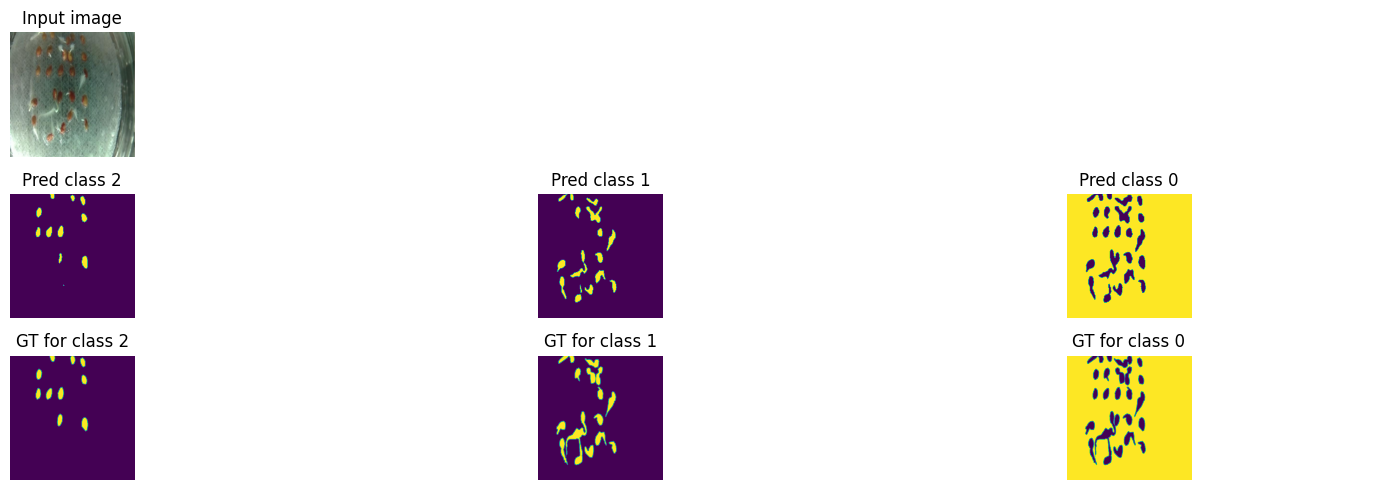

Train loss: 0.22708 | Time: 37m 27s | Val loss: 0.20365
Train_DICE_avg: 0.80872 | Train_Jaccard_avg: 0.74742 | Train_Sensitivity_avg: 0.85899 | Train_Specificity_avg: 0.94675 
Class 0 - Train_DICE: 0.99134 | Train_Jaccard: 0.98289 | Train_Sensitivity: 0.99362 | Train_Specificity: 0.84915 
Class 1 - Train_DICE: 0.57393 | Train_Jaccard: 0.49544 | Train_Sensitivity: 0.66828 | Train_Specificity: 0.99706 
Class 2 - Train_DICE: 0.86089 | Train_Jaccard: 0.76393 | Train_Sensitivity: 0.91507 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.82910 | Val_Jaccard_avg: 0.77751 | Val_Sensitivity_avg: 0.88443 | Val_Specificity_avg: 0.93520 
Class 0 - Val_DICE: 0.99530 | Val_Jaccard: 0.99066 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.81360 
Class 1 - Val_DICE: 0.61161 | Val_Jaccard: 0.54745 | Val_Sensitivity: 0.72286 | Val_Specificity: 0.99690 
Class 2 - Val_DICE: 0.88040 | Val_Jaccard: 0.79443 | Val_Sensitivity: 0.93242 | Val_Specificity: 0.99510 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.21126 | Time: 38m 29s | Val loss: 0.19013
Train_DICE_avg: 0.82356 | Train_Jaccard_avg: 0.76267 | Train_Sensitivity_avg: 0.87766 | Train_Specificity_avg: 0.94178 
Class 0 - Train_DICE: 0.99125 | Train_Jaccard: 0.98272 | Train_Sensitivity: 0.99394 | Train_Specificity: 0.83407 
Class 1 - Train_DICE: 0.61893 | Train_Jaccard: 0.54178 | Train_Sensitivity: 0.72529 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.86050 | Train_Jaccard: 0.76351 | Train_Sensitivity: 0.91374 | Train_Specificity: 0.99419 
Val_DICE_avg: 0.82961 | Val_Jaccard_avg: 0.77867 | Val_Sensitivity_avg: 0.88380 | Val_Specificity_avg: 0.93504 
Class 0 - Val_DICE: 0.99541 | Val_Jaccard: 0.99089 | Val_Sensitivity: 0.99816 | Val_Specificity: 0.81286 
Class 1 - Val_DICE: 0.61626 | Val_Jaccard: 0.55530 | Val_Sensitivity: 0.71400 | Val_Specificity: 0.99736 
Class 2 - Val_DICE: 0.87714 | Val_Jaccard: 0.78983 | Val_Sensitivity: 0.93925 | Val_Specificity: 0.99491 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.20711 | Time: 39m 32s | Val loss: 0.19171
Train_DICE_avg: 0.82193 | Train_Jaccard_avg: 0.76163 | Train_Sensitivity_avg: 0.87856 | Train_Specificity_avg: 0.94523 
Class 0 - Train_DICE: 0.99140 | Train_Jaccard: 0.98302 | Train_Sensitivity: 0.99366 | Train_Specificity: 0.84460 
Class 1 - Train_DICE: 0.61413 | Train_Jaccard: 0.53863 | Train_Sensitivity: 0.72829 | Train_Specificity: 0.99704 
Class 2 - Train_DICE: 0.86026 | Train_Jaccard: 0.76325 | Train_Sensitivity: 0.91374 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.82636 | Val_Jaccard_avg: 0.77367 | Val_Sensitivity_avg: 0.87778 | Val_Specificity_avg: 0.94213 
Class 0 - Val_DICE: 0.99590 | Val_Jaccard: 0.99185 | Val_Sensitivity: 0.99790 | Val_Specificity: 0.83475 
Class 1 - Val_DICE: 0.61848 | Val_Jaccard: 0.55834 | Val_Sensitivity: 0.69109 | Val_Specificity: 0.99743 
Class 2 - Val_DICE: 0.86471 | Val_Jaccard: 0.77081 | Val_Sensitivity: 0.94435 | Val_Specificity: 0.99422 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.20151 | Time: 40m 35s | Val loss: 0.19051
Train_DICE_avg: 0.82790 | Train_Jaccard_avg: 0.76842 | Train_Sensitivity_avg: 0.88638 | Train_Specificity_avg: 0.94412 
Class 0 - Train_DICE: 0.99139 | Train_Jaccard: 0.98299 | Train_Sensitivity: 0.99385 | Train_Specificity: 0.84109 
Class 1 - Train_DICE: 0.63039 | Train_Jaccard: 0.55649 | Train_Sensitivity: 0.75139 | Train_Specificity: 0.99704 
Class 2 - Train_DICE: 0.86192 | Train_Jaccard: 0.76578 | Train_Sensitivity: 0.91390 | Train_Specificity: 0.99422 
Val_DICE_avg: 0.82190 | Val_Jaccard_avg: 0.76709 | Val_Sensitivity_avg: 0.86399 | Val_Specificity_avg: 0.93521 
Class 0 - Val_DICE: 0.99514 | Val_Jaccard: 0.99035 | Val_Sensitivity: 0.99839 | Val_Specificity: 0.81396 
Class 1 - Val_DICE: 0.61292 | Val_Jaccard: 0.55062 | Val_Sensitivity: 0.64163 | Val_Specificity: 0.99801 
Class 2 - Val_DICE: 0.85764 | Val_Jaccard: 0.76030 | Val_Sensitivity: 0.95195 | Val_Specificity: 0.99365 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.20135 | Time: 41m 37s | Val loss: 0.18545
Train_DICE_avg: 0.82204 | Train_Jaccard_avg: 0.76111 | Train_Sensitivity_avg: 0.87835 | Train_Specificity_avg: 0.94312 
Class 0 - Train_DICE: 0.99113 | Train_Jaccard: 0.98249 | Train_Sensitivity: 0.99376 | Train_Specificity: 0.83825 
Class 1 - Train_DICE: 0.61407 | Train_Jaccard: 0.53666 | Train_Sensitivity: 0.72549 | Train_Specificity: 0.99704 
Class 2 - Train_DICE: 0.86091 | Train_Jaccard: 0.76417 | Train_Sensitivity: 0.91578 | Train_Specificity: 0.99406 
Val_DICE_avg: 0.82782 | Val_Jaccard_avg: 0.77470 | Val_Sensitivity_avg: 0.88146 | Val_Specificity_avg: 0.93988 
Class 0 - Val_DICE: 0.99570 | Val_Jaccard: 0.99145 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.82803 
Class 1 - Val_DICE: 0.62235 | Val_Jaccard: 0.55980 | Val_Sensitivity: 0.69306 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.86542 | Val_Jaccard: 0.77284 | Val_Sensitivity: 0.95322 | Val_Specificity: 0.99396 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


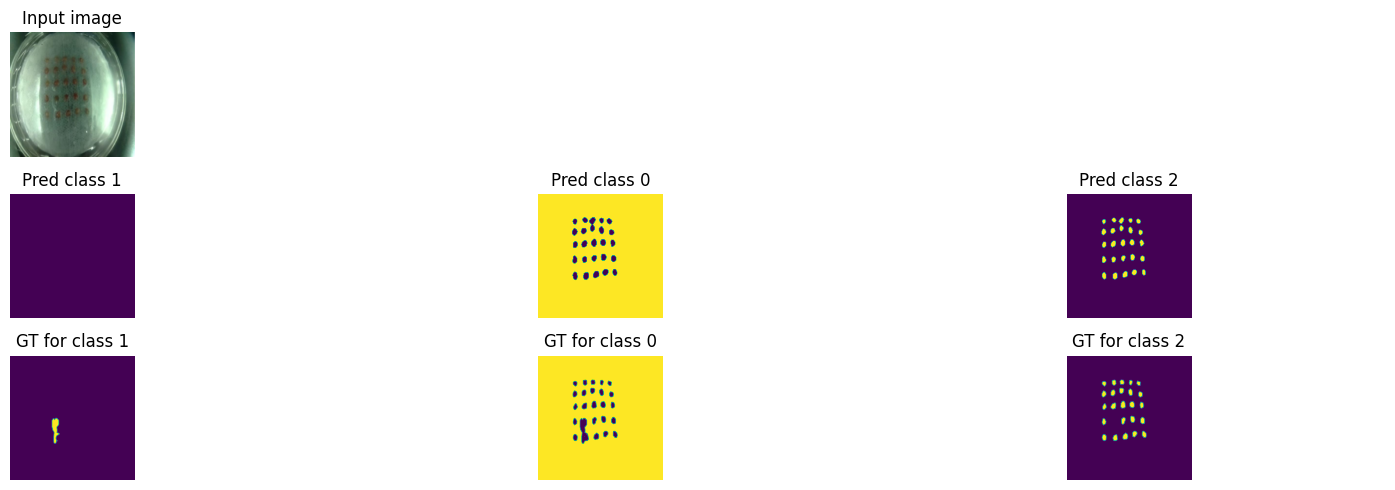

Train loss: 0.19832 | Time: 42m 41s | Val loss: 0.18071
Train_DICE_avg: 0.82806 | Train_Jaccard_avg: 0.76727 | Train_Sensitivity_avg: 0.88237 | Train_Specificity_avg: 0.94542 
Class 0 - Train_DICE: 0.99147 | Train_Jaccard: 0.98314 | Train_Sensitivity: 0.99383 | Train_Specificity: 0.84503 
Class 1 - Train_DICE: 0.62966 | Train_Jaccard: 0.55144 | Train_Sensitivity: 0.73522 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.86305 | Train_Jaccard: 0.76723 | Train_Sensitivity: 0.91808 | Train_Specificity: 0.99417 
Val_DICE_avg: 0.83462 | Val_Jaccard_avg: 0.78421 | Val_Sensitivity_avg: 0.87971 | Val_Specificity_avg: 0.93233 
Class 0 - Val_DICE: 0.99515 | Val_Jaccard: 0.99037 | Val_Sensitivity: 0.99829 | Val_Specificity: 0.80429 
Class 1 - Val_DICE: 0.62716 | Val_Jaccard: 0.56405 | Val_Sensitivity: 0.69722 | Val_Specificity: 0.99761 
Class 2 - Val_DICE: 0.88155 | Val_Jaccard: 0.79821 | Val_Sensitivity: 0.94362 | Val_Specificity: 0.99509 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


Train loss: 0.19334 | Time: 43m 44s | Val loss: 0.17864
Train_DICE_avg: 0.83238 | Train_Jaccard_avg: 0.77273 | Train_Sensitivity_avg: 0.89068 | Train_Specificity_avg: 0.94377 
Class 0 - Train_DICE: 0.99123 | Train_Jaccard: 0.98268 | Train_Sensitivity: 0.99413 | Train_Specificity: 0.83996 
Class 1 - Train_DICE: 0.64058 | Train_Jaccard: 0.56484 | Train_Sensitivity: 0.76044 | Train_Specificity: 0.99705 
Class 2 - Train_DICE: 0.86534 | Train_Jaccard: 0.77068 | Train_Sensitivity: 0.91745 | Train_Specificity: 0.99431 
Val_DICE_avg: 0.83169 | Val_Jaccard_avg: 0.77764 | Val_Sensitivity_avg: 0.88574 | Val_Specificity_avg: 0.93695 
Class 0 - Val_DICE: 0.99534 | Val_Jaccard: 0.99074 | Val_Sensitivity: 0.99812 | Val_Specificity: 0.81943 
Class 1 - Val_DICE: 0.63326 | Val_Jaccard: 0.56905 | Val_Sensitivity: 0.70869 | Val_Specificity: 0.99746 
Class 2 - Val_DICE: 0.86648 | Val_Jaccard: 0.77314 | Val_Sensitivity: 0.95043 | Val_Specificity: 0.99396 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train loss: 0.19866 | Time: 44m 46s | Val loss: 0.17779
Train_DICE_avg: 0.82385 | Train_Jaccard_avg: 0.76349 | Train_Sensitivity_avg: 0.88098 | Train_Specificity_avg: 0.94279 
Class 0 - Train_DICE: 0.99135 | Train_Jaccard: 0.98292 | Train_Sensitivity: 0.99426 | Train_Specificity: 0.83725 
Class 1 - Train_DICE: 0.61861 | Train_Jaccard: 0.54219 | Train_Sensitivity: 0.73260 | Train_Specificity: 0.99699 
Class 2 - Train_DICE: 0.86159 | Train_Jaccard: 0.76535 | Train_Sensitivity: 0.91609 | Train_Specificity: 0.99412 
Val_DICE_avg: 0.82844 | Val_Jaccard_avg: 0.77530 | Val_Sensitivity_avg: 0.88656 | Val_Specificity_avg: 0.94152 
Class 0 - Val_DICE: 0.99584 | Val_Jaccard: 0.99173 | Val_Sensitivity: 0.99800 | Val_Specificity: 0.83298 
Class 1 - Val_DICE: 0.62257 | Val_Jaccard: 0.55969 | Val_Sensitivity: 0.71694 | Val_Specificity: 0.99727 
Class 2 - Val_DICE: 0.86692 | Val_Jaccard: 0.77447 | Val_Sensitivity: 0.94473 | Val_Specificity: 0.99430 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.19151 | Time: 45m 48s | Val loss: 0.17651
Train_DICE_avg: 0.83612 | Train_Jaccard_avg: 0.77687 | Train_Sensitivity_avg: 0.89687 | Train_Specificity_avg: 0.94435 
Class 0 - Train_DICE: 0.99138 | Train_Jaccard: 0.98297 | Train_Sensitivity: 0.99412 | Train_Specificity: 0.84185 
Class 1 - Train_DICE: 0.65247 | Train_Jaccard: 0.57840 | Train_Sensitivity: 0.77831 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86452 | Train_Jaccard: 0.76925 | Train_Sensitivity: 0.91819 | Train_Specificity: 0.99419 
Val_DICE_avg: 0.83722 | Val_Jaccard_avg: 0.78719 | Val_Sensitivity_avg: 0.88698 | Val_Specificity_avg: 0.93314 
Class 0 - Val_DICE: 0.99520 | Val_Jaccard: 0.99047 | Val_Sensitivity: 0.99826 | Val_Specificity: 0.80654 
Class 1 - Val_DICE: 0.63287 | Val_Jaccard: 0.57016 | Val_Sensitivity: 0.72508 | Val_Specificity: 0.99731 
Class 2 - Val_DICE: 0.88359 | Val_Jaccard: 0.80093 | Val_Sensitivity: 0.93760 | Val_Specificity: 0.99557 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train loss: 0.19205 | Time: 46m 51s | Val loss: 0.17467
Train_DICE_avg: 0.83610 | Train_Jaccard_avg: 0.77666 | Train_Sensitivity_avg: 0.89920 | Train_Specificity_avg: 0.94370 
Class 0 - Train_DICE: 0.99142 | Train_Jaccard: 0.98306 | Train_Sensitivity: 0.99446 | Train_Specificity: 0.83981 
Class 1 - Train_DICE: 0.65193 | Train_Jaccard: 0.57679 | Train_Sensitivity: 0.78615 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.86496 | Train_Jaccard: 0.77013 | Train_Sensitivity: 0.91697 | Train_Specificity: 0.99432 
Val_DICE_avg: 0.84488 | Val_Jaccard_avg: 0.79274 | Val_Sensitivity_avg: 0.90983 | Val_Specificity_avg: 0.94337 
Class 0 - Val_DICE: 0.99587 | Val_Jaccard: 0.99180 | Val_Sensitivity: 0.99779 | Val_Specificity: 0.83859 
Class 1 - Val_DICE: 0.66628 | Val_Jaccard: 0.60366 | Val_Sensitivity: 0.79082 | Val_Specificity: 0.99683 
Class 2 - Val_DICE: 0.87249 | Val_Jaccard: 0.78275 | Val_Sensitivity: 0.94089 | Val_Specificity: 0.99471 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


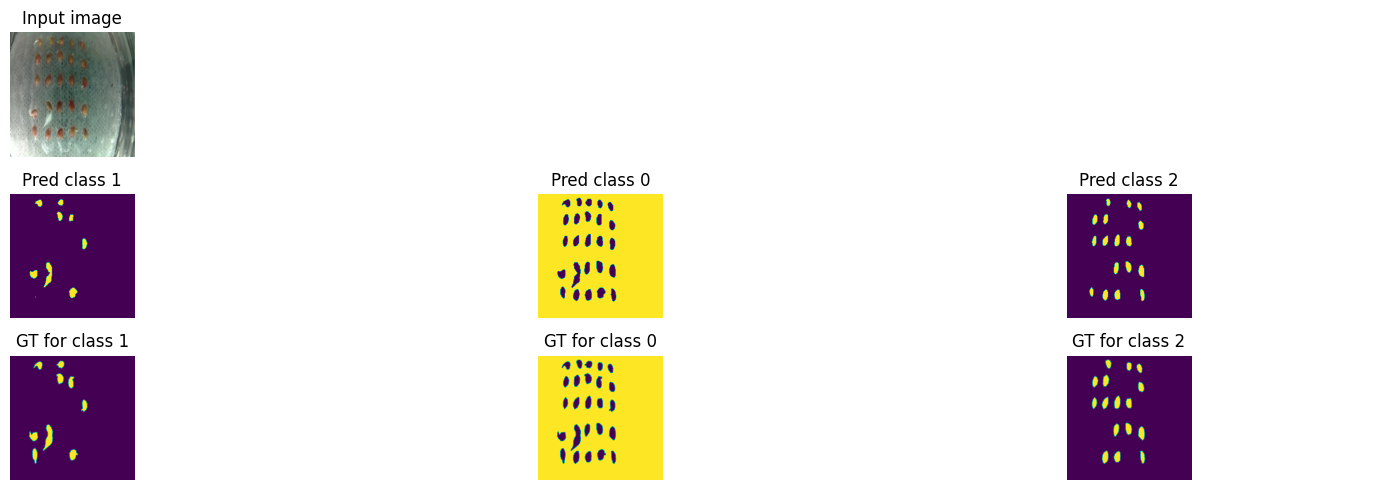

Train loss: 0.18647 | Time: 47m 54s | Val loss: 0.17156
Train_DICE_avg: 0.84259 | Train_Jaccard_avg: 0.78337 | Train_Sensitivity_avg: 0.90145 | Train_Specificity_avg: 0.94354 
Class 0 - Train_DICE: 0.99142 | Train_Jaccard: 0.98305 | Train_Sensitivity: 0.99429 | Train_Specificity: 0.83938 
Class 1 - Train_DICE: 0.67079 | Train_Jaccard: 0.59606 | Train_Sensitivity: 0.79273 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.86554 | Train_Jaccard: 0.77101 | Train_Sensitivity: 0.91733 | Train_Specificity: 0.99426 
Val_DICE_avg: 0.85114 | Val_Jaccard_avg: 0.79805 | Val_Sensitivity_avg: 0.90799 | Val_Specificity_avg: 0.94001 
Class 0 - Val_DICE: 0.99577 | Val_Jaccard: 0.99160 | Val_Sensitivity: 0.99814 | Val_Specificity: 0.82850 
Class 1 - Val_DICE: 0.69131 | Val_Jaccard: 0.62931 | Val_Sensitivity: 0.77724 | Val_Specificity: 0.99744 
Class 2 - Val_DICE: 0.86635 | Val_Jaccard: 0.77325 | Val_Sensitivity: 0.94857 | Val_Specificity: 0.99408 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.18378 | Time: 48m 57s | Val loss: 0.17151
Train_DICE_avg: 0.84555 | Train_Jaccard_avg: 0.78624 | Train_Sensitivity_avg: 0.90315 | Train_Specificity_avg: 0.94551 
Class 0 - Train_DICE: 0.99152 | Train_Jaccard: 0.98325 | Train_Sensitivity: 0.99417 | Train_Specificity: 0.84514 
Class 1 - Train_DICE: 0.67779 | Train_Jaccard: 0.60198 | Train_Sensitivity: 0.79498 | Train_Specificity: 0.99704 
Class 2 - Train_DICE: 0.86734 | Train_Jaccard: 0.77348 | Train_Sensitivity: 0.92031 | Train_Specificity: 0.99434 
Val_DICE_avg: 0.86290 | Val_Jaccard_avg: 0.81015 | Val_Sensitivity_avg: 0.92582 | Val_Specificity_avg: 0.93890 
Class 0 - Val_DICE: 0.99565 | Val_Jaccard: 0.99135 | Val_Sensitivity: 0.99822 | Val_Specificity: 0.82489 
Class 1 - Val_DICE: 0.72289 | Val_Jaccard: 0.65876 | Val_Sensitivity: 0.83119 | Val_Specificity: 0.99724 
Class 2 - Val_DICE: 0.87015 | Val_Jaccard: 0.78034 | Val_Sensitivity: 0.94806 | Val_Specificity: 0.99456 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.18125 | Time: 50m 0s | Val loss: 0.13702
Train_DICE_avg: 0.84995 | Train_Jaccard_avg: 0.79105 | Train_Sensitivity_avg: 0.91795 | Train_Specificity_avg: 0.94508 
Class 0 - Train_DICE: 0.99119 | Train_Jaccard: 0.98261 | Train_Sensitivity: 0.99389 | Train_Specificity: 0.84406 
Class 1 - Train_DICE: 0.69353 | Train_Jaccard: 0.62017 | Train_Sensitivity: 0.84144 | Train_Specificity: 0.99689 
Class 2 - Train_DICE: 0.86512 | Train_Jaccard: 0.77036 | Train_Sensitivity: 0.91852 | Train_Specificity: 0.99429 
Val_DICE_avg: 0.87602 | Val_Jaccard_avg: 0.82433 | Val_Sensitivity_avg: 0.93654 | Val_Specificity_avg: 0.93462 
Class 0 - Val_DICE: 0.99529 | Val_Jaccard: 0.99065 | Val_Sensitivity: 0.99831 | Val_Specificity: 0.81185 
Class 1 - Val_DICE: 0.75908 | Val_Jaccard: 0.69737 | Val_Sensitivity: 0.86988 | Val_Specificity: 0.99733 
Class 2 - Val_DICE: 0.87369 | Val_Jaccard: 0.78499 | Val_Sensitivity: 0.94142 | Val_Specificity: 0.99469 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.17420 | Time: 51m 3s | Val loss: 0.13129
Train_DICE_avg: 0.85613 | Train_Jaccard_avg: 0.79731 | Train_Sensitivity_avg: 0.92077 | Train_Specificity_avg: 0.94367 
Class 0 - Train_DICE: 0.99133 | Train_Jaccard: 0.98287 | Train_Sensitivity: 0.99431 | Train_Specificity: 0.83974 
Class 1 - Train_DICE: 0.71060 | Train_Jaccard: 0.63659 | Train_Sensitivity: 0.84832 | Train_Specificity: 0.99699 
Class 2 - Train_DICE: 0.86647 | Train_Jaccard: 0.77246 | Train_Sensitivity: 0.91967 | Train_Specificity: 0.99429 
Val_DICE_avg: 0.88143 | Val_Jaccard_avg: 0.83168 | Val_Sensitivity_avg: 0.93346 | Val_Specificity_avg: 0.93212 
Class 0 - Val_DICE: 0.99508 | Val_Jaccard: 0.99022 | Val_Sensitivity: 0.99836 | Val_Specificity: 0.80362 
Class 1 - Val_DICE: 0.76571 | Val_Jaccard: 0.70345 | Val_Sensitivity: 0.86749 | Val_Specificity: 0.99725 
Class 2 - Val_DICE: 0.88350 | Val_Jaccard: 0.80137 | Val_Sensitivity: 0.93453 | Val_Specificity: 0.99548 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


Train loss: 0.16961 | Time: 52m 6s | Val loss: 0.12913
Train_DICE_avg: 0.85689 | Train_Jaccard_avg: 0.79794 | Train_Sensitivity_avg: 0.91874 | Train_Specificity_avg: 0.94455 
Class 0 - Train_DICE: 0.99153 | Train_Jaccard: 0.98326 | Train_Sensitivity: 0.99433 | Train_Specificity: 0.84227 
Class 1 - Train_DICE: 0.71154 | Train_Jaccard: 0.63647 | Train_Sensitivity: 0.84334 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.86761 | Train_Jaccard: 0.77409 | Train_Sensitivity: 0.91856 | Train_Specificity: 0.99441 
Val_DICE_avg: 0.88092 | Val_Jaccard_avg: 0.83075 | Val_Sensitivity_avg: 0.94052 | Val_Specificity_avg: 0.93442 
Class 0 - Val_DICE: 0.99528 | Val_Jaccard: 0.99063 | Val_Sensitivity: 0.99834 | Val_Specificity: 0.81084 
Class 1 - Val_DICE: 0.76470 | Val_Jaccard: 0.70243 | Val_Sensitivity: 0.88488 | Val_Specificity: 0.99711 
Class 2 - Val_DICE: 0.88278 | Val_Jaccard: 0.79918 | Val_Sensitivity: 0.93834 | Val_Specificity: 0.99533 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


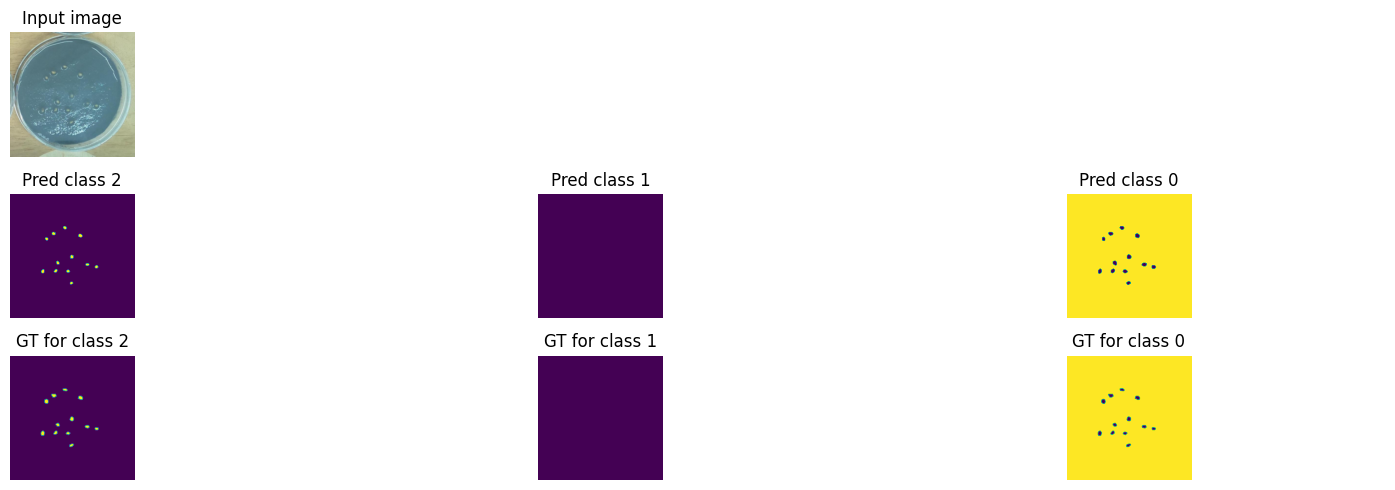

Train loss: 0.17058 | Time: 53m 9s | Val loss: 0.12788
Train_DICE_avg: 0.85724 | Train_Jaccard_avg: 0.79903 | Train_Sensitivity_avg: 0.92458 | Train_Specificity_avg: 0.94313 
Class 0 - Train_DICE: 0.99144 | Train_Jaccard: 0.98310 | Train_Sensitivity: 0.99445 | Train_Specificity: 0.83812 
Class 1 - Train_DICE: 0.71313 | Train_Jaccard: 0.64040 | Train_Sensitivity: 0.86160 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.86716 | Train_Jaccard: 0.77360 | Train_Sensitivity: 0.91768 | Train_Specificity: 0.99432 
Val_DICE_avg: 0.87369 | Val_Jaccard_avg: 0.81877 | Val_Sensitivity_avg: 0.94577 | Val_Specificity_avg: 0.94538 
Class 0 - Val_DICE: 0.99591 | Val_Jaccard: 0.99188 | Val_Sensitivity: 0.99756 | Val_Specificity: 0.84551 
Class 1 - Val_DICE: 0.76487 | Val_Jaccard: 0.69897 | Val_Sensitivity: 0.88491 | Val_Specificity: 0.99672 
Class 2 - Val_DICE: 0.86028 | Val_Jaccard: 0.76546 | Val_Sensitivity: 0.95483 | Val_Specificity: 0.99392 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.16814 | Time: 54m 12s | Val loss: 0.13018
Train_DICE_avg: 0.85893 | Train_Jaccard_avg: 0.79961 | Train_Sensitivity_avg: 0.91873 | Train_Specificity_avg: 0.94260 
Class 0 - Train_DICE: 0.99131 | Train_Jaccard: 0.98285 | Train_Sensitivity: 0.99432 | Train_Specificity: 0.83643 
Class 1 - Train_DICE: 0.71766 | Train_Jaccard: 0.64140 | Train_Sensitivity: 0.84098 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.86781 | Train_Jaccard: 0.77459 | Train_Sensitivity: 0.92090 | Train_Specificity: 0.99441 
Val_DICE_avg: 0.87916 | Val_Jaccard_avg: 0.82545 | Val_Sensitivity_avg: 0.93045 | Val_Specificity_avg: 0.94121 
Class 0 - Val_DICE: 0.99572 | Val_Jaccard: 0.99150 | Val_Sensitivity: 0.99812 | Val_Specificity: 0.83202 
Class 1 - Val_DICE: 0.77392 | Val_Jaccard: 0.70897 | Val_Sensitivity: 0.84119 | Val_Specificity: 0.99747 
Class 2 - Val_DICE: 0.86784 | Val_Jaccard: 0.77589 | Val_Sensitivity: 0.95205 | Val_Specificity: 0.99415 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.16422 | Time: 55m 15s | Val loss: 0.13357
Train_DICE_avg: 0.85926 | Train_Jaccard_avg: 0.79985 | Train_Sensitivity_avg: 0.91780 | Train_Specificity_avg: 0.94505 
Class 0 - Train_DICE: 0.99142 | Train_Jaccard: 0.98305 | Train_Sensitivity: 0.99416 | Train_Specificity: 0.84375 
Class 1 - Train_DICE: 0.71679 | Train_Jaccard: 0.63974 | Train_Sensitivity: 0.83862 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.86957 | Train_Jaccard: 0.77676 | Train_Sensitivity: 0.92063 | Train_Specificity: 0.99438 
Val_DICE_avg: 0.87553 | Val_Jaccard_avg: 0.82265 | Val_Sensitivity_avg: 0.92617 | Val_Specificity_avg: 0.93892 
Class 0 - Val_DICE: 0.99560 | Val_Jaccard: 0.99126 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.82484 
Class 1 - Val_DICE: 0.75620 | Val_Jaccard: 0.69013 | Val_Sensitivity: 0.83211 | Val_Specificity: 0.99734 
Class 2 - Val_DICE: 0.87477 | Val_Jaccard: 0.78656 | Val_Sensitivity: 0.94823 | Val_Specificity: 0.99458 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train loss: 0.16314 | Time: 56m 19s | Val loss: 0.12198
Train_DICE_avg: 0.86150 | Train_Jaccard_avg: 0.80250 | Train_Sensitivity_avg: 0.91900 | Train_Specificity_avg: 0.94413 
Class 0 - Train_DICE: 0.99150 | Train_Jaccard: 0.98321 | Train_Sensitivity: 0.99433 | Train_Specificity: 0.84084 
Class 1 - Train_DICE: 0.72319 | Train_Jaccard: 0.64695 | Train_Sensitivity: 0.84146 | Train_Specificity: 0.99709 
Class 2 - Train_DICE: 0.86982 | Train_Jaccard: 0.77734 | Train_Sensitivity: 0.92122 | Train_Specificity: 0.99447 
Val_DICE_avg: 0.88418 | Val_Jaccard_avg: 0.83190 | Val_Sensitivity_avg: 0.93571 | Val_Specificity_avg: 0.93889 
Class 0 - Val_DICE: 0.99560 | Val_Jaccard: 0.99125 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.82461 
Class 1 - Val_DICE: 0.77903 | Val_Jaccard: 0.71213 | Val_Sensitivity: 0.85893 | Val_Specificity: 0.99723 
Class 2 - Val_DICE: 0.87792 | Val_Jaccard: 0.79231 | Val_Sensitivity: 0.95013 | Val_Specificity: 0.99482 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train loss: 0.16400 | Time: 57m 23s | Val loss: 0.12053
Train_DICE_avg: 0.86177 | Train_Jaccard_avg: 0.80330 | Train_Sensitivity_avg: 0.92093 | Train_Specificity_avg: 0.94398 
Class 0 - Train_DICE: 0.99161 | Train_Jaccard: 0.98342 | Train_Sensitivity: 0.99457 | Train_Specificity: 0.84045 
Class 1 - Train_DICE: 0.72305 | Train_Jaccard: 0.64786 | Train_Sensitivity: 0.84473 | Train_Specificity: 0.99713 
Class 2 - Train_DICE: 0.87065 | Train_Jaccard: 0.77863 | Train_Sensitivity: 0.92348 | Train_Specificity: 0.99438 
Val_DICE_avg: 0.88706 | Val_Jaccard_avg: 0.83603 | Val_Sensitivity_avg: 0.93483 | Val_Specificity_avg: 0.93741 
Class 0 - Val_DICE: 0.99556 | Val_Jaccard: 0.99119 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.81989 
Class 1 - Val_DICE: 0.78387 | Val_Jaccard: 0.71914 | Val_Sensitivity: 0.85733 | Val_Specificity: 0.99745 
Class 2 - Val_DICE: 0.88174 | Val_Jaccard: 0.79776 | Val_Sensitivity: 0.94900 | Val_Specificity: 0.99490 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


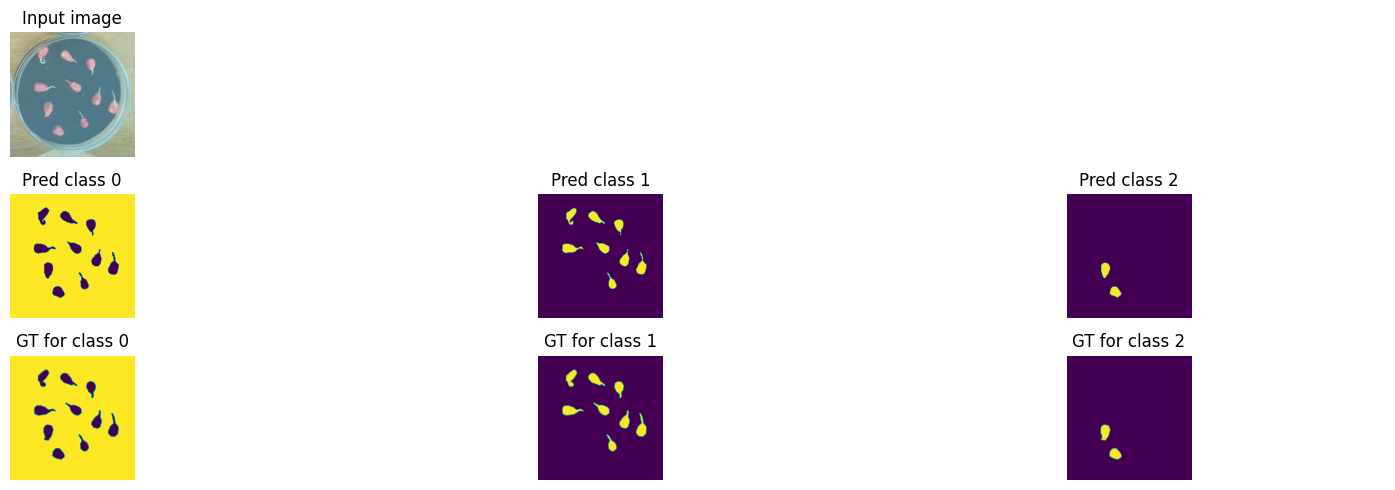

Train loss: 0.16040 | Time: 58m 27s | Val loss: 0.12283
Train_DICE_avg: 0.86307 | Train_Jaccard_avg: 0.80428 | Train_Sensitivity_avg: 0.92081 | Train_Specificity_avg: 0.94661 
Class 0 - Train_DICE: 0.99175 | Train_Jaccard: 0.98369 | Train_Sensitivity: 0.99448 | Train_Specificity: 0.84833 
Class 1 - Train_DICE: 0.72716 | Train_Jaccard: 0.65102 | Train_Sensitivity: 0.84546 | Train_Specificity: 0.99705 
Class 2 - Train_DICE: 0.87031 | Train_Jaccard: 0.77813 | Train_Sensitivity: 0.92249 | Train_Specificity: 0.99447 
Val_DICE_avg: 0.88252 | Val_Jaccard_avg: 0.83096 | Val_Sensitivity_avg: 0.93976 | Val_Specificity_avg: 0.94038 
Class 0 - Val_DICE: 0.99564 | Val_Jaccard: 0.99133 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.82912 
Class 1 - Val_DICE: 0.77199 | Val_Jaccard: 0.70662 | Val_Sensitivity: 0.87508 | Val_Specificity: 0.99702 
Class 2 - Val_DICE: 0.87992 | Val_Jaccard: 0.79494 | Val_Sensitivity: 0.94616 | Val_Specificity: 0.99499 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train loss: 0.16124 | Time: 59m 30s | Val loss: 0.12030
Train_DICE_avg: 0.86280 | Train_Jaccard_avg: 0.80380 | Train_Sensitivity_avg: 0.92252 | Train_Specificity_avg: 0.94389 
Class 0 - Train_DICE: 0.99131 | Train_Jaccard: 0.98284 | Train_Sensitivity: 0.99437 | Train_Specificity: 0.84013 
Class 1 - Train_DICE: 0.72597 | Train_Jaccard: 0.64943 | Train_Sensitivity: 0.85163 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.87112 | Train_Jaccard: 0.77913 | Train_Sensitivity: 0.92156 | Train_Specificity: 0.99453 
Val_DICE_avg: 0.88641 | Val_Jaccard_avg: 0.83534 | Val_Sensitivity_avg: 0.93671 | Val_Specificity_avg: 0.93634 
Class 0 - Val_DICE: 0.99546 | Val_Jaccard: 0.99097 | Val_Sensitivity: 0.99825 | Val_Specificity: 0.81680 
Class 1 - Val_DICE: 0.78384 | Val_Jaccard: 0.72025 | Val_Sensitivity: 0.86419 | Val_Specificity: 0.99743 
Class 2 - Val_DICE: 0.87993 | Val_Jaccard: 0.79481 | Val_Sensitivity: 0.94769 | Val_Specificity: 0.99480 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]


Train loss: 0.16335 | Time: 60m 34s | Val loss: 0.12090
Train_DICE_avg: 0.86326 | Train_Jaccard_avg: 0.80493 | Train_Sensitivity_avg: 0.92467 | Train_Specificity_avg: 0.94423 
Class 0 - Train_DICE: 0.99157 | Train_Jaccard: 0.98334 | Train_Sensitivity: 0.99464 | Train_Specificity: 0.84113 
Class 1 - Train_DICE: 0.72635 | Train_Jaccard: 0.65106 | Train_Sensitivity: 0.85811 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.87187 | Train_Jaccard: 0.78038 | Train_Sensitivity: 0.92126 | Train_Specificity: 0.99458 
Val_DICE_avg: 0.88431 | Val_Jaccard_avg: 0.83331 | Val_Sensitivity_avg: 0.94100 | Val_Specificity_avg: 0.93847 
Class 0 - Val_DICE: 0.99558 | Val_Jaccard: 0.99123 | Val_Sensitivity: 0.99814 | Val_Specificity: 0.82337 
Class 1 - Val_DICE: 0.77938 | Val_Jaccard: 0.71671 | Val_Sensitivity: 0.87502 | Val_Specificity: 0.99726 
Class 2 - Val_DICE: 0.87796 | Val_Jaccard: 0.79201 | Val_Sensitivity: 0.94985 | Val_Specificity: 0.99478 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train loss: 0.16359 | Time: 61m 37s | Val loss: 0.12018
Train_DICE_avg: 0.86259 | Train_Jaccard_avg: 0.80406 | Train_Sensitivity_avg: 0.92143 | Train_Specificity_avg: 0.94423 
Class 0 - Train_DICE: 0.99159 | Train_Jaccard: 0.98338 | Train_Sensitivity: 0.99449 | Train_Specificity: 0.84117 
Class 1 - Train_DICE: 0.72560 | Train_Jaccard: 0.65030 | Train_Sensitivity: 0.84802 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.87059 | Train_Jaccard: 0.77849 | Train_Sensitivity: 0.92178 | Train_Specificity: 0.99443 
Val_DICE_avg: 0.88671 | Val_Jaccard_avg: 0.83629 | Val_Sensitivity_avg: 0.93800 | Val_Specificity_avg: 0.93361 
Class 0 - Val_DICE: 0.99526 | Val_Jaccard: 0.99059 | Val_Sensitivity: 0.99831 | Val_Specificity: 0.80830 
Class 1 - Val_DICE: 0.78256 | Val_Jaccard: 0.71936 | Val_Sensitivity: 0.86885 | Val_Specificity: 0.99744 
Class 2 - Val_DICE: 0.88231 | Val_Jaccard: 0.79894 | Val_Sensitivity: 0.94684 | Val_Specificity: 0.99508 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train loss: 0.16138 | Time: 62m 40s | Val loss: 0.11692
Train_DICE_avg: 0.86284 | Train_Jaccard_avg: 0.80380 | Train_Sensitivity_avg: 0.91835 | Train_Specificity_avg: 0.94258 
Class 0 - Train_DICE: 0.99149 | Train_Jaccard: 0.98319 | Train_Sensitivity: 0.99461 | Train_Specificity: 0.83612 
Class 1 - Train_DICE: 0.72611 | Train_Jaccard: 0.64901 | Train_Sensitivity: 0.83569 | Train_Specificity: 0.99719 
Class 2 - Train_DICE: 0.87093 | Train_Jaccard: 0.77919 | Train_Sensitivity: 0.92475 | Train_Specificity: 0.99444 
Val_DICE_avg: 0.89176 | Val_Jaccard_avg: 0.84235 | Val_Sensitivity_avg: 0.93706 | Val_Specificity_avg: 0.93103 
Class 0 - Val_DICE: 0.99510 | Val_Jaccard: 0.99026 | Val_Sensitivity: 0.99840 | Val_Specificity: 0.80006 
Class 1 - Val_DICE: 0.78939 | Val_Jaccard: 0.72466 | Val_Sensitivity: 0.87364 | Val_Specificity: 0.99734 
Class 2 - Val_DICE: 0.89080 | Val_Jaccard: 0.81212 | Val_Sensitivity: 0.93915 | Val_Specificity: 0.99570 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


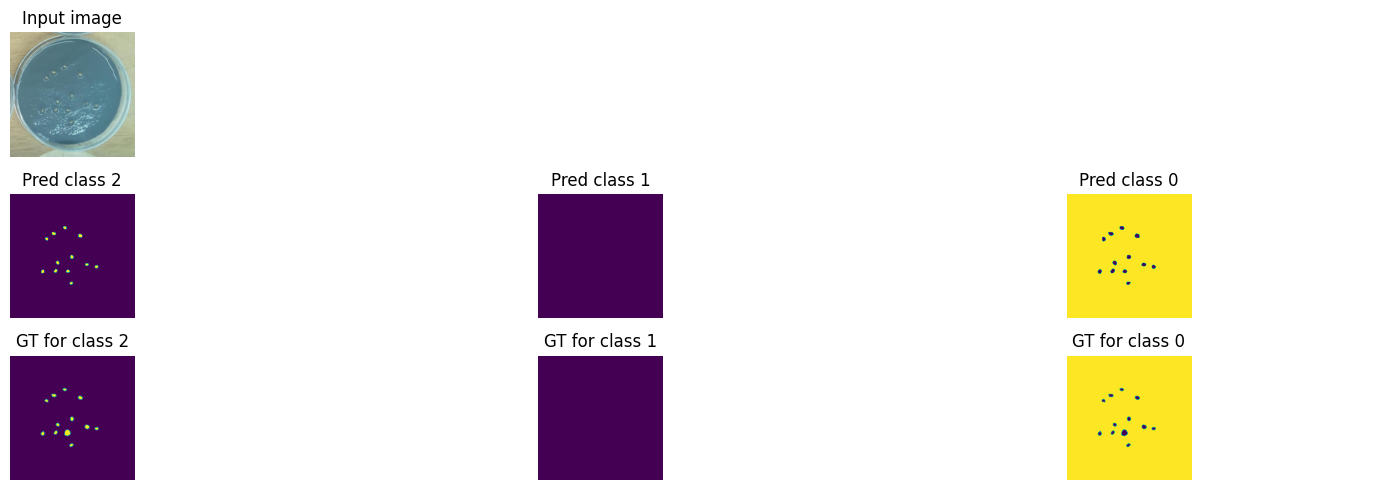

Train loss: 0.15971 | Time: 63m 44s | Val loss: 0.11597
Train_DICE_avg: 0.86478 | Train_Jaccard_avg: 0.80628 | Train_Sensitivity_avg: 0.92372 | Train_Specificity_avg: 0.94445 
Class 0 - Train_DICE: 0.99159 | Train_Jaccard: 0.98338 | Train_Sensitivity: 0.99456 | Train_Specificity: 0.84169 
Class 1 - Train_DICE: 0.73086 | Train_Jaccard: 0.65500 | Train_Sensitivity: 0.85428 | Train_Specificity: 0.99711 
Class 2 - Train_DICE: 0.87191 | Train_Jaccard: 0.78045 | Train_Sensitivity: 0.92231 | Train_Specificity: 0.99454 
Val_DICE_avg: 0.89196 | Val_Jaccard_avg: 0.84145 | Val_Sensitivity_avg: 0.93452 | Val_Specificity_avg: 0.93433 
Class 0 - Val_DICE: 0.99534 | Val_Jaccard: 0.99075 | Val_Sensitivity: 0.99832 | Val_Specificity: 0.81016 
Class 1 - Val_DICE: 0.79419 | Val_Jaccard: 0.72831 | Val_Sensitivity: 0.85852 | Val_Specificity: 0.99755 
Class 2 - Val_DICE: 0.88633 | Val_Jaccard: 0.80528 | Val_Sensitivity: 0.94672 | Val_Specificity: 0.99528 


wandb: uploading artifact best_model
wandb: uploading history steps 60-60, summary
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▂▂▂▃▃▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇██████████
wandb:       Training Jaccard ▁▂▂▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇████████████
wandb:          Training Loss █▇▇▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▁▁▂▂▂▃▃▃▄▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇█▇█████████████
wandb:   Training Specificity ▁▃▄▅▅▆▆▇▇▇▇▇▇▇▇███████████▇█████████████
wandb:        Validation DICE ▁▁▁▂▂▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█████████
wandb:     Validation Jaccard ▁▁▂▂▂▄▄▄▄▄▅▅▅▅▅▆▆▆▅▆▆▆▆▇▇▇▇▇▇▇▇▇████████
wandb:        Validation Loss █▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▁▁▂▂▂▂▃▃▄▄▅▅▅▅▆▆▆▆▆▆▇▆▇▇▇▇▇█▇██████████
wandb: Validation Specificity ▂▁▂▁▂▃▂▄▄▄▅▅▅▇▆▇▇▇▇▇█▇█▆▆▆▆▆▇▇▆▆▆▇▇▇▇▇▆▆
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.86478
wandb:       Training Jacc


Training complete!


In [41]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [42]:
model = UNet(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [43]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]



Global Performance Metrics:
Loss mean: 0.13483, std: 0.01670
Dice Coefficient mean: 0.86579, std: 0.10896
Jaccard Index mean: 0.80593, std: 0.12445
Sensitivity mean: 0.86733, std: 0.09987
Specificity mean: 0.97513, std: 0.02415

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99501, std: 0.00218
Jaccard mean: 0.99008, std: 0.00431
Sensitivity mean: 0.99250, std: 0.00314
Specificity mean: 0.92914, std: 0.07243

Class 1:
Dice mean: 0.74019, std: 0.29918
Jaccard mean: 0.66240, std: 0.31929
Sensitivity mean: 0.77900, std: 0.26319
Specificity mean: 0.99851, std: 0.00263

Class 2:
Dice mean: 0.86217, std: 0.07794
Jaccard mean: 0.76530, std: 0.10844
Sensitivity mean: 0.83050, std: 0.10223
Specificity mean: 0.99774, std: 0.00180
